In [944]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json

import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, LassoCV, RidgeClassifier, Ridge
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, \
classification_report, accuracy_score, precision_score, plot_confusion_matrix

In [945]:
#conda install -c conda-forge xgboost

In [946]:
from xgboost import XGBClassifier

In [947]:
#pip install xgboost

### Loading the data

In [948]:
ls

Final_notebook.ipynb    Working_notebook.ipynb  map2.html
README.md               map1.html


In [949]:
df = pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/capstone/data/listings (1).csv')

In [950]:
df

id                            listing_url       scrape_id  \
0          2595      https://www.airbnb.com/rooms/2595  20210901220703   
1          3831      https://www.airbnb.com/rooms/3831  20210901220703   
2          5121      https://www.airbnb.com/rooms/5121  20210901220703   
3          5136      https://www.airbnb.com/rooms/5136  20210901220703   
4          5178      https://www.airbnb.com/rooms/5178  20210901220703   
...         ...                                    ...             ...   
36918  52002317  https://www.airbnb.com/rooms/52002317  20210901220703   
36919  52004427  https://www.airbnb.com/rooms/52004427  20210901220703   
36920  52005507  https://www.airbnb.com/rooms/52005507  20210901220703   
36921  52005691  https://www.airbnb.com/rooms/52005691  20210901220703   
36922  52006978  https://www.airbnb.com/rooms/52006978  20210901220703   

      last_scraped                                               name  \
0       2021-09-02                              Skylit Midtown Castle   
1       2021-09-02  Whole flr w/private bdrm, bath & kitchen(pls r...   
2       2021-09-02                                    BlissArtsSpace!   
3       2021-09-02           Spacious Brooklyn Duplex, Patio + Garden   
4       2021-09-02                   Large Furnished Room Near B'way　   
...            ...                                                ...   
36918   2021-09-02                        HUGE ROOM IN IDEAL LES SPOT   
36919   2021-09-02    Furnished Cozy Bedroom in East Village Location   
36920   2021-09-03                 Bedroom Near Train w/ Washer Dryer   
36921   2021-09-02    Furnished Cozy Bedroom in East Village Location   
36922   2021-09-02                     Luxury Private ROOM in Midtown   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      We welcome you to stay in our lovely 2 br dupl...   
4      Please don’t expect the luxury here just a bas...   
...                                                  ...   
36918  Extremely Huge Room in the IDEAL Lower East Si...   
36919  Full room in a 4 bedroom, 2 bathroom shared ho...   
36920                 Bedroom Near Train w/ Washer Dryer   
36921  Full room in a 3 bedroom, 1 bathroom shared ho...   
36922  Cassa Studios and Residences powered by Outpos...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
1      Just the right mix of urban center and local n...   
2                                                    NaN   
3                                                    NaN   
4        Theater district, many restaurants around here.   
...                                                  ...   
36918                                                NaN   
36919                                                NaN   
36920                                                NaN   
36921                                                NaN   
36922  Walk out of the Cassa  and you’ll immediately ...   

                                             picture_url    host_id  \
0      https://a0.muscache.com/pictures/f0813a11-40b2...       2845   
1      https://a0.muscache.com/pictures/e49999c2-9fd5...       4869   
2      https://a0.muscache.com/pictures/2090980c-b68e...       7356   
3      https://a0.muscache.com/pictures/miso/Hosting-...       7378   
4      https://a0.muscache.com/pictures/12065/f070997...       8967   
...                                                  ...        ...   
36918  https://a0.muscache.com/pictures/40bc2a16-7609...  283057520   
36919  https://a0.muscache.com/pictures/361bd18b-3f23...  305240193   
36920  https://a0.muscache.com/pictures/miso/Hosting-...    9372363   
36921  https://a0.muscache.com/pictures/958369fa-05c1...  305240193   
36922  https://a0.muscac

In [951]:
#pip install geopandas

In [952]:
df_poi = pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/capstone/data/Point_Of_Interest.csv')

In [953]:
# # set the filepath and load in a shapefile
# fp = '/Users/raylinsoriano/Documents/Flatiron/capstone/data/Borough Boundaries.zip'
# map_df = gpd.read_file(fp)
# # check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df.head()

In [954]:
#map_df.plot()

In [955]:
# # Creating a dataframe of listing counts and median price by borough
# borough_df = pd.DataFrame(df.groupby('neighbourhood_group_cleansed').size())
# #borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
# borough_df['median_price'] = df.groupby('neighbourhood_group_cleansed').price.median().values
# borough_df['median_rating'] = df.groupby('neighbourhood_group_cleansed').review_scores_rating.median().values
# # Joining the dataframes
# borough_map_df = map_df.set_index('boro_name').join(borough_df)

# borough_map_df.head()

In [956]:
# # Plotting the median price of listings in each borough
# fig2, ax2 = plt.subplots(1, figsize=(15, 6))
# borough_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
# ax2.axis('off')
# ax2.set_title('Median price of Airbnb listings in each NYC borough', fontsize=14)
# sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
# sm._A = [] # Creates an empty array for the data range
# cbar = fig2.colorbar(sm)
# plt.show()



In [957]:
#df_for_map= df[['review_scores_rating', 'price','neighbourhood_group_cleansed']]

In [958]:
#df_for_map

In [959]:
# # join the geodataframe with the cleaned up csv dataframe
# merged = map_df.set_index('boro_name').join(df_for_map.set_index('neighbourhood_group_cleansed'))
# merged.shape

In [960]:
# # set a variable that will call whatever column we want to visualise on the map
# variable = 'review_scores_rating'
# # set the range for the choropleth
# vmin, vmax = 120, 220
# # create figure and axes for Matplotlib
# fig, ax = plt.subplots(1, figsize=(10, 6))

In [961]:
#borough_price = df.groupby('neighbourhood_group_cleansed').agg('price')

In [962]:
# create map
#merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [963]:
# import json
# nyc_bo_geo = r'/Users/raylinsoriano/Documents/Flatiron/capstone/data/Borough Boundaries.geojson'

# # open the json file - json.load() methods returns a python dictionary
# with open(nyc_bo_geo) as neigh_file:
#     neigh_json = json.load(neigh_file)

In [964]:
#neigh_json

In [965]:
# denominations_json = []
# for index in range(len(neigh_json['features'])):
#     denominations_json.append(neigh_json['features'][index]['properties']['boro_name'])
    
# denominations_json

In [966]:
# # names in the data frame
# dataframe_names = df.neighbourhood_group_cleansed.tolist()

# # names in the json file - the same order as in the data frame 
# geojson_names = ['Bronx', 'Manhattan', 'Staten Island', 'Brooklyn', 'Queens']

# # replace data frame names by json names
# df.replace(dict(zip(dataframe_names, geojson_names)), inplace=True)

In [967]:
#geo_data = df.groupby('neighbourhood_group_cleansed')[['price']].mean().reset_index()

In [968]:
# create a plain world map
# n_map = folium.Map()

# # generate choropleth map 
# n_map.Choropleth(
#     geo_data=merged,
#     data=df,
#     columns=['price'],
#     key_on='feature.properties.name',
#     fill_color='YlGnBu', 
#     fill_opacity=1, 
#     line_opacity=1,
#     legend_name='Births per 1000 inhabitants',
#     smooth_factor=0)

# # display map
# communities_map

In [969]:
# import matplotlib.pyplot as plt
# # import our image 
# #singapore_img = mpimg.imread('singapore-map-3.png')
# # plot the data
# ax = df.plot(
#     kind="kde", 
#     x="longitude", 
#     y="latitude", 
#     figsize=(20,14),
#     c="price", 
#     cmap=plt.get_cmap("jet"),
#     colorbar=True, 
#     alpha=0.4,
# )
# # use our map with it's bounding coordinates
# plt.imshow(map_df, alpha=0.5)            
# # add axis labels
# plt.ylabel("Latitude", fontsize=20)
# plt.xlabel("Longitude", fontsize=20)
# # set the min/max axis values - these must be the same as above
# plt.ylim(1.15, 1.50)
# plt.xlim(103.5, 104)
# plt.legend(fontsize=20)
# plt.show()


In [970]:

# import urllib
# #initializing the figure size
# plt.figure(figsize=(10,8))
# #loading the png NYC image found on Google and saving to my local folder along with the project
# i=urllib.request.urlopen("https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG")
# nyc_img=plt.imread(i)
# #scaling the image based on the latitude and longitude max and mins for proper output
# plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
# ax=plt.gca()
# #using scatterplot again
# sub_dataframe.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
#            cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
# plt.legend()
# plt.show()

In [971]:
# import geopandas as gpd
# from shapely.geometry import Point, Polygon
# %matplotlib inline



In [972]:
#nyc_shape_gf = Geo

In [973]:
#df_reviews = pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/capstone/data/reviews (1).csv')

In [974]:
#df_reviews

In [975]:
df.shape

(36923, 74)

In [976]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

In [977]:
pd.options.display.max_rows = 4000

In [978]:
df.duplicated().sum()

0

In [979]:
df.shape

(36923, 74)

In [980]:
df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               13
description                                      1213
neighborhood_overview                           14413
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                         111
host_since                                        111
host_location                                     209
host_about                                      15287
host_response_time                              15743
host_response_rate                              15743
host_acceptance_rate                            15102
host_is_superhost                                 111
host_thumbnail_url          

In [981]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  int64  
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

In [982]:
df.shape

(36923, 74)

In [983]:
df.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               13
description                                      1213
neighborhood_overview                           14413
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                         111
host_since                                        111
host_location                                     209
host_about                                      15287
host_response_time                              15743
host_response_rate                              15743
host_acceptance_rate                            15102
host_is_superhost                                 111
host_thumbnail_url          

In [984]:
df.shape

(36923, 74)

#### Creating new columns

In [985]:
# Created a column for how many years the airbnb has been a host
df['host_since'] = pd.to_datetime(df['host_since'])
df['year'] = df['host_since'].apply(lambda date: date.year)

df['years_been_host'] = max(df['year']) - df['year']

In [986]:
#Created a column of how many verifications each host has
df['number_of_verifications'] = df.host_verifications.str.count(',')+1

In [987]:
#Created a column of how many amenities each host has
df['number_of_amenities'] = df.amenities.str.count(',')+1

In [988]:
#df['amenities'].str.split(",", n = 49, expand = True)

In [989]:
median = df.filter(['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location','host_listings_count','host_total_listings_count',
        'beds', 'bedrooms','years_been_host','accommodates','bathrooms_text']).median()



In [990]:
cols = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location','host_listings_count','host_total_listings_count',
        'beds', 'bedrooms','years_been_host','accommodates','bathrooms_text']                          
df[cols]=df[cols].fillna(median)

In [991]:
import folium

In [992]:
folium.__version__

'0.12.1'

In [993]:
locations = df[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[40.70935, -73.95342]

In [994]:
# map = folium.Map(zoom_start=12)
# for point in range(0, len(locationlist)):
#     folium.Marker(locationlist[point])#, #popup=df_counters['Name'][point]).add_to(map)



In [995]:
#map

In [996]:
# my_map= folium.Map(location=[40.7128, 74.0060]
    
# )
# my_map

In [997]:
# listingss= df.sample(5)
# for _, listings in listingss.iterrows():
#     folium.Marker(
#             location=[listings['latitude'], listings['longitude']]
#         ).add_to(my_map)


# listings= df.loc[0]
# folium.Marker(
#         location=[listings['latitude'], listings['longitude'] ]
#         ).add_to(my_map)

# my_map

In [998]:
#listingss

In [999]:
#my_map.save("map2.html")

In [1000]:
labels = ['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified']

In [1001]:
df= df.fillna(df.mode().iloc[0])

In [1002]:
df= df.fillna(df.mode().iloc[0])

In [1003]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [1004]:
df['bathrooms_text'] = df.bathrooms_text.str.extract('(\d+)')

In [1005]:
#df.isna().sum()

In [1006]:
# set the filepath and load in a shapefile
fp = '/Users/raylinsoriano/Documents/Flatiron/capstone/data/Borough Boundaries.zip'
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

boro_code      boro_name    shape_area     shape_leng  \
0        2.0          Bronx  1.187194e+09  463868.937681   
1        1.0      Manhattan  6.365759e+08  359804.890798   
2        5.0  Staten Island  1.623636e+09  325929.794027   
3        3.0       Brooklyn  1.934174e+09  728195.197649   
4        4.0         Queens  3.040205e+09  900270.512975   

                                            geometry  
0  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
1  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
2  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
3  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
4  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...

<AxesSubplot:>

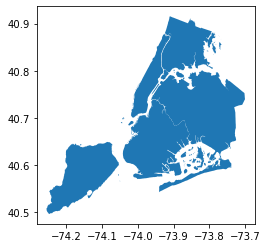

In [1007]:
map_df.plot()

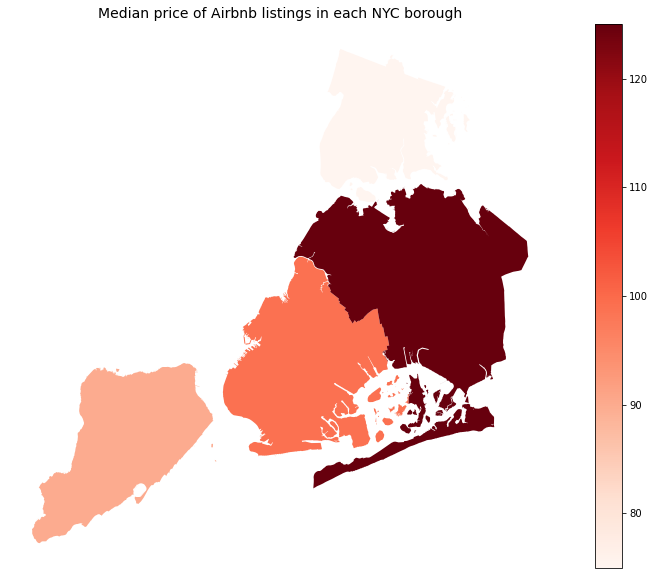

In [1008]:
# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 10))
borough_map_df.plot(column='median_price', cmap='Reds', ax=ax2)

ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each NYC borough', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()



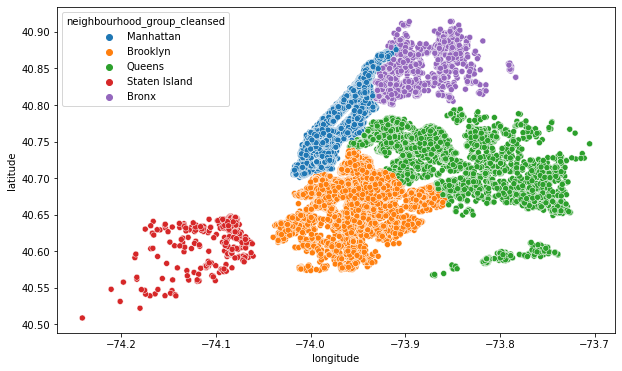

In [1009]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.neighbourhood_group_cleansed)
plt.ioff();

In [1010]:
# # set the filepath and load
# fp2 = '/Users/raylinsoriano/Documents/Flatiron/capstone/data/nybbwi.shx'
# #reading the file stored in variable fp
# map_df2 = gpd.read_file(fp2)
# # check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df2.head()

In [1011]:
#map_df2.plot()

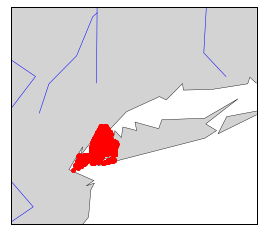

<Figure size 10800x10800 with 0 Axes>

In [1012]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# New York Central Park
# Longitude: -73.968285
# Latitude: 40.785091

m = Basemap(projection='merc',llcrnrlat=40,urcrnrlat=42,
            llcrnrlon=-75, urcrnrlon=-72, resolution='l', area_thresh=50, lat_0=40.78, lon_0=-73.96)

m.drawmapboundary()
m.drawcoastlines(color='black', linewidth=0.4)
m.drawrivers(color='blue')
m.fillcontinents(color='lightgray')

lons = df['longitude'].values
lats = df['latitude'].values
x,y = m(lons, lats)

m.plot(x, y, 'ro', markersize=4)

plt.figure(figsize=(150,150))
plt.show()

In [1013]:
df['room_type'].value_counts()

Entire home/apt    19674
Private room       16413
Shared room          578
Hotel room           258
Name: room_type, dtype: int64

In [915]:
# crs = {'init': 'epsg:4326'}
# geo = [Point(xy) for xy in zip( df['longitude'], df['latitude'])]
# print(geo[:3])





# geo_df = gpd.GeoDataFrame(df, crs=crs,  geometry=geo )
# geo_df = geo_df[geo_df['longitude'] != 0.0]

[<shapely.geometry.point.Point object at 0x7f98421370a0>, <shapely.geometry.point.Point object at 0x7f9842137340>, <shapely.geometry.point.Point object at 0x7f9842137400>]


<AxesSubplot:>

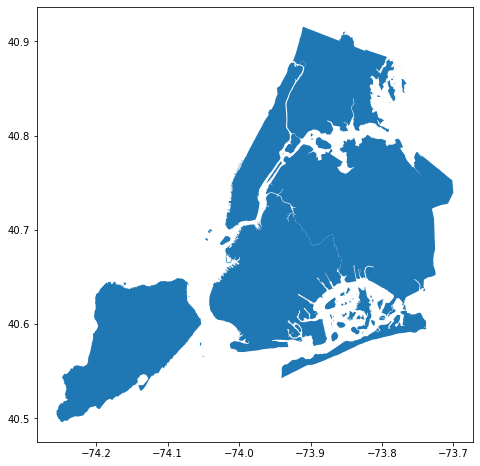

In [1014]:
street_map = gpd.read_file('/Users/raylinsoriano/Documents/Flatiron/capstone/data/Borough Boundaries.zip')
fig,ax = plt.subplots(figsize = (15,8))
street_map.plot(ax=ax)

<AxesSubplot:>

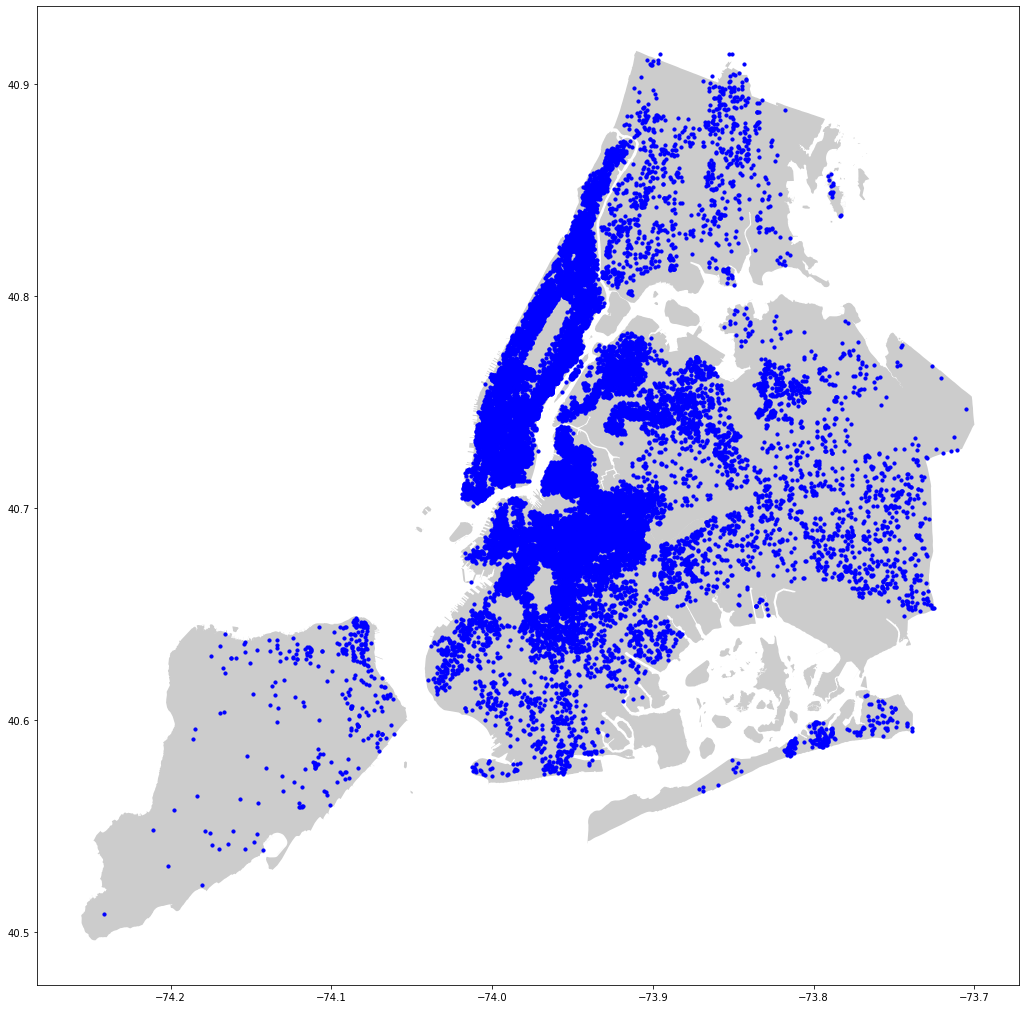

In [1015]:
fig, ax = plt.subplots(figsize = (18,18))
street_map.plot(ax = ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['has_availability'] == 't'].plot(ax = ax, 
                                                        markersize = 10, 
                                                        color = 'blue', 
                                                        marker = 'o', 
                                                        label = 'has_availability')



In [918]:
attractions = gpd.read_file('/Users/raylinsoriano/Documents/Flatiron/capstone/data/attraction_polygon.geojson')

In [919]:
attractions.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 67 entries, 0 to 66
Columns: 123 entries, tourism to geometry
dtypes: geometry(1), object(122)
memory usage: 64.5+ KB


In [920]:
cultural =pd.read_csv('/Users/raylinsoriano/Documents/Flatiron/capstone/data/cultural-institutions-by-block-and-lot.csv')

In [921]:
cultural.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 15 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Organization Name                                             70 non-null     object 
 1   Preferred Address Line 1                                      69 non-null     object 
 2   Preferred Block-Lot Number                                    61 non-null     object 
 3   Constituency Code                                             70 non-null     object 
 4   Constituent Specific Attributes R-Secondary Type Description  68 non-null     object 
 5   Borough                                                       70 non-null     object 
 6   Postcode                                                      63 non-null     float64
 7   Latitude                                                      63 non-null

In [922]:
nyc_heat = folium.Map(location=[40.78,-73.96], zoom_start = 11)

heat_data = [[row['latitude'],row['longitude']] for index, row in
             df[['latitude', 'longitude']].iterrows()]

hm =  HeatMap(heat_data).add_to(nyc_heat)

nyc_heat

In [923]:
from folium.plugins import HeatMap


In [924]:
#pip install plotly

In [925]:
import plotly.graph_objs as go

In [926]:
nyc_choro = folium.Map(location=[40.78,-73.96], zoom_start = 11)

choro_data = [[row['latitude'],row['longitude']] for index, row in
             geo_df[['latitude', 'longitude']].iterrows()]

hm =  folium.Choropleth(choro_data).add_to(nyc_choro)

nyc_choro

ValueError: Cannot render objects with any missing geometries: [[40.75356, -73.98559], [40.68494, -73.95765], [40.68535, -73.95512], [40.66265, -73.99454], [40.76457, -73.98317], [40.8038, -73.96751], [40.66801, -73.98784], [40.70935, -73.95342], [40.80107, -73.94255], [40.78778, -73.94759], [40.71248, -73.95881], [40.69121, -73.97277], [40.79607, -73.94949], [40.71778, -73.9568], [40.68462, -73.93839], [40.76724, -73.98664], [40.72712, -73.98598], [40.81317, -73.95465], [40.68294, -73.95682], [40.66692, -73.98981], [40.63702, -73.96327], [40.72296, -73.98383], [40.8114, -73.94296], [40.74757, -73.94571], [40.67946, -73.95417], [40.67144, -73.76501], [40.69222, -73.97336], [40.68064, -73.94039], [40.70348, -73.93621], [40.73535, -73.95584], [40.75611, -73.99523], [40.72297, -73.99684], [40.71211, -73.96397], [40.74493, -73.99521], [40.77119, -73.95241], [40.67839, -73.96642], [40.69121, -73.96804], [40.7092, -73.96641], [40.72281, -73.98501], [40.8019, -73.93762], [40.72289, -73.98028], [40.83253, -73.94108], [40.68503, -73.96555], [40.72862, -73.98748], [40.74261, -74.00353], [40.73808, -73.98001], [40.82817, -73.95133], [40.65437, -73.96278], [40.71802, -73.95724], [40.6771, -73.97231], [40.69891, -73.93809], [40.70967, -73.95922], [40.79936, -73.96155], [40.82782, -73.9473], [40.74187, -74.00223], [40.67747, -74.00146], [40.72961, -74.00308], [40.67115, -73.98026], [40.71649, -73.94865], [40.8104, -73.94309], [40.75603, -73.99294], [40.6686, -73.98723], [40.77839, -73.97778], [40.82682, -73.94948], [40.72421, -73.98509], [40.6545, -73.96071], [40.77827, -73.94669], [40.68288, -73.95646], [40.68292, -73.96381], [40.72314, -73.99108], [40.7672, -73.98464], [40.73405, -74.00281], [40.6327, -73.93184], [40.68818, -73.96383], [40.72741, -73.98405], [40.71512, -73.95899], [40.72367, -73.98139], [40.78763, -73.96862], [40.67447, -73.96619], [40.79128, -73.94125], [40.73271, -74.00367], [40.68442, -73.98068], [40.70978, -73.95165], [40.76203, -73.98869], [40.77952, -73.98749], [40.74523, -73.92318], [40.68216, -73.94594], [40.71992, -73.99167], [40.67813, -74.00062], [40.64633, -74.08156], [40.721, -74.00971], [40.83225, -73.93092], [40.69287, -73.97108], [40.73737, -74.00437], [40.70894, -73.95234], [40.82569, -73.93842], [40.68834, -73.97578], [40.70309, -73.89963], [40.80635, -73.92201], [40.8063, -73.95985], [40.67979, -73.97978], [40.68022, -73.97457], [40.7124, -73.94764], [40.6829, -73.95701], [40.66913, -73.99041], [40.77449, -73.95308], [40.67144, -73.76501], [40.77868, -73.90652], [40.71567, -73.87842], [40.70422, -73.89778], [40.71778, -73.87714], [40.80255, -73.95803], [40.67908, -73.97405], [40.83231, -73.9305], [40.67144, -73.76501], [40.79934, -73.94236], [40.68701, -73.97555], [40.81201, -73.94452], [40.77155, -73.90564], [40.69003, -73.99338], [40.76505, -73.98716], [40.74166, -73.9866], [40.80747, -73.94076], [40.79693, -73.97246], [40.8238, -73.94444], [40.65912, -73.9842], [40.71946, -73.98641], [40.70271, -73.8993], [40.7178, -73.9932], [40.75853, -73.96892], [40.72012, -74.00397], [40.73072, -73.99275], [40.79204, -73.94741], [40.81006, -73.94559], [40.81562, -73.94674], [40.72598, -73.97978], [40.79918, -73.96248], [40.71799, -73.99648], [40.75743, -73.96825], [40.72825, -73.98959], [40.79523, -73.9728], [40.72297, -73.98265], [40.741, -73.99562], [40.72967, -73.95352], [40.81161, -73.85499], [40.881, -73.83511], [40.68253, -73.94295], [40.72219, -73.98245], [40.70705, -73.95489], [40.72863, -73.9842], [40.67582, -73.94316], [40.67634, -73.95143], [40.67579, -73.95072], [40.72497, -73.98356], [40.68305, -73.95195], [40.72021, -73.99426], [40.7106, -73.95178], [40.70797, -73.94792], [40.82899, -73.94345], [40.68028, -73.99328], [40.72547, -73.98619], [40.72036, -73.99435], [40.81263, -73.95214], [40.67548, -73.98315], [40.68088, -73.99102], [40.79544, -73.94836], [40.71516, -73.96448], [40.80332, -73.95741], [40.76336, -73.92099], [40.78846, -73.97459], [40.73094, -73.95484], [40.72, -73.99487], [40.77845, -73.98295], [40.70494, -73.91982], [40.7159, -73.99156], [40.72997, -74.00196], [40.72919, -73.95588], [40.87069, -73.90113], [40.77743, -73.97691], [40.71976, -73.96012], [40.80834, -73.94075], [40.75523, -73.99792], [40.77507, -73.93367], [40.80874, -73.94926], [40.72364, -73.95013], [40.71911, -73.98588], [40.71407, -73.96657], [40.73777, -73.95366], [40.72322, -73.98615], [40.73756, -73.9535], [40.73777, -73.95366], [40.67407, -73.98105], [40.73777, -73.95366], [40.69418, -73.99775], [40.69246, -73.99828], [40.68433, -73.94469], [40.68769, -73.91788], [40.68871, -73.97322], [40.7245, -73.97946], [40.73777, -73.95366], [40.72626, -73.98408], [40.67823, -73.94719], [40.68413, -73.93817], [40.75977, -73.90991], [40.67654, -73.94629], [40.69157, -73.93257], [40.6736, -73.9551], [40.71167, -73.94932], [40.69304, -73.95417], [40.75077, -73.99657], [40.6867, -73.97469], [40.72015, -73.99104], [40.85433, -73.9324], [40.66952, -73.99201], [40.74056, -74.00143], [40.71116, -73.95484], [40.71551, -73.96274], [40.73778, -73.95366], [40.58603, -73.8145], [40.81919, -73.95443], [40.82772, -73.95284], [40.68647, -73.95862], [40.72741, -73.95466], [40.70104, -74.01168], [40.74589, -73.99082], [40.67541, -73.96294], [40.8069, -73.95372], [40.69132, -73.97306], [40.6905, -73.97867], [40.67582, -73.9518], [40.66562, -73.99002], [40.82402, -73.95263], [40.76406, -73.92266], [40.80384, -73.95123], [40.68462, -73.92895], [40.71983, -73.95992], [40.6755, -73.98137], [40.80617, -73.94757], [40.68595, -73.92923], [40.72761, -73.98951], [40.79907, -73.96517], [40.66895, -73.99136], [40.7106, -73.85246], [40.74564, -73.97782], [40.71771, -73.95849], [40.65288, -73.95018], [40.68646, -73.97548], [40.74373, -73.99928], [40.67494, -73.97792], [40.67478, -73.95165], [40.71347, -73.96035], [40.72334, -73.97719], [40.6857, -73.98131], [40.67487, -73.97637], [40.72506, -73.97906], [40.80687, -73.95333], [40.72297, -73.9851], [40.71836, -73.95588], [40.7304, -74.00228], [40.71345, -73.94289], [40.79999, -73.96338], [40.78422, -73.95133], [40.81862, -73.94518], [40.7203, -73.98424], [40.71584, -73.96355], [40.75684, -73.91286], [40.67231, -73.97878], [40.80494, -73.94998], [40.72752, -73.98581], [40.8241, -73.94415], [40.68096, -73.94062], [40.68511, -73.91927], [40.71596, -73.96017], [40.68048, -73.93938], [40.68048, -73.93938], [40.74389, -74.00068], [40.71174, -73.95798], [40.67188, -73.95097], [40.72641, -73.98711], [40.79864, -73.96209], [40.68478, -73.9066], [40.68194, -73.99708], [40.65891, -73.98556], [40.85981, -73.9063], [40.70829, -73.96564], [40.60602, -73.97076], [40.79179, -73.93972], [40.68876, -73.97758], [40.74937, -73.99467], [40.77969, -73.94726], [40.72852, -73.95655], [40.7751, -73.98595], [40.72905, -73.98214], [40.74088, -73.99538], [40.74045, -73.9749], [40.72113, -73.98213], [40.72212, -73.99638], [40.78923, -73.946], [40.86502, -73.85496], [40.73862, -73.99758], [40.73345, -73.98809], [40.76263, -73.99401], [40.74907, -74.00281], [40.67346, -73.87263], [40.66941, -73.94988], [40.7688, -73.95825], [40.67914, -73.96443], [40.66836, -73.98166], [40.75876, -73.98869], [40.83338, -73.94326], [40.65557, -73.9561], [40.65557, -73.9561], [40.67641, -73.98161], [40.82929, -73.94873], [40.6836, -73.95445], [40.77728, -73.91278], [40.76739, -73.9557], [40.73125, -73.9811], [40.67466, -73.97853], [40.68702, -73.94917], [40.76922, -73.95648], [40.687, -73.96149], [40.68339, -73.94034], [40.72002, -73.94238], [40.6878, -73.97253], [40.7125, -73.96598], [40.5847, -73.94088], [40.72027, -73.98842], [40.71955, -73.95471], [40.69049, -73.93212], [40.73877, -73.92557], [40.72926, -73.9589], [40.73814, -74.00811], [40.67828, -73.98414], [40.71724, -73.99054], [40.60742, -74.14388], [40.68613, -73.95545], [40.691208, -73.972771], [40.80592, -73.95172], [40.61943, -73.99232], [40.81553, -73.95438], [40.68788, -73.95014], [40.72419, -73.97922], [40.7401, -74.00019], [40.71254, -73.98352], [40.67319, -73.96804], [40.80529, -73.95307], [40.6875, -73.9546], [40.71085, -73.96672], [40.61019, -74.06757], [40.71137, -73.9465], [40.78764, -73.97274], [40.6805, -73.94885], [40.68463, -73.92367], [40.68098, -73.94023], [40.68985, -73.94974], [40.79147, -73.94629], [40.67144, -73.76501], [40.685, -73.94262], [40.76168, -73.99452], [40.70132, -73.90883], [40.80413, -73.95756], [40.71887, -73.9864], [40.70148, -73.82972], [40.66386, -73.98519], [40.74168, -74.00339], [40.75408, -73.97071], [40.72113, -73.98442], [40.71732, -73.95561], [40.73268, -73.99213], [40.77539, -73.91709], [40.73685, -73.9828], [40.66278, -73.95886], [40.73193, -73.98511], [40.67578, -73.96694], [40.70652, -73.93991], [40.79824, -73.96863], [40.8666, -73.90061], [40.68921, -73.95439], [40.73693, -73.98129], [40.7012, -73.83151], [40.73756, -73.9535], [40.73081, -74.00275], [40.73273, -74.00041], [40.85099, -73.92822], [40.71065, -73.94102], [40.68532, -73.91881], [40.71921, -73.95989], [40.71643, -73.99931], [40.81146, -73.94469], [40.81128, -73.9433], [40.78615, -73.97394], [40.67882, -73.97224], [40.73756, -73.9535], [40.73756, -73.9535], [40.73756, -73.9535], [40.79846, -73.96512], [40.73756, -73.9535], [40.73756, -73.9535], [40.73756, -73.9535], [40.73756, -73.9535], [40.73756, -73.9535], [40.73756, -73.9535], [40.73756, -73.9535], [40.73756, -73.9535], [40.73756, -73.9535], [40.68136, -73.9654], [40.71028, -73.95409], [40.69101, -73.95018], [40.67524, -73.96464], [40.68278, -73.95549], [40.74024, -74.00584], [40.74642, -74.00411], [40.81847, -73.94623], [40.591675, -74.065865], [40.71517, -73.99376], [40.73146, -74.00448], [40.74101, -74.00006], [40.73221, -74.00448], [40.71881, -73.9879], [40.73219, -74.00289], [40.69643, -73.97698], [40.82176, -73.94522], [40.71838, -73.95617], [40.79632, -73.97643], [40.67254, -73.95386], [40.76253, -73.98365], [40.7628, -73.9651], [40.71866, -73.98962], [40.73333, -73.85933], [40.643776, -73.972168], [40.72136, -73.95674], [40.7154, -73.94028], [40.66385, -73.93229], [40.76716, -73.91177], [40.74536, -73.94903], [40.70413, -73.92726], [40.74496, -73.91167], [40.68611, -73.93089], [40.72499, -73.99198], [40.75282, -73.97315], [40.85754, -73.92887], [40.72123, -73.98451], [40.7327, -74.00267], [40.70749, -73.916], [40.68321, -73.96741], [40.77549, -73.95128], [40.66824, -73.9617], [40.68413, -73.93538], [40.67782, -73.97205], [40.80504, -73.96375], [40.72842, -73.958], [40.6556, -73.95389], [40.79241, -73.93805], [40.77128, -73.91939], [40.73725, -74.00841], [40.66883, -73.95296], [40.67265, -73.94486], [40.73853, -74.00292], [40.73243, -73.95716], [40.8078, -73.95232], [40.6732, -73.97998], [40.68048, -73.86541], [40.75981, -73.99138], [40.73412, -74.00884], [40.72682, -74.00017], [40.67223, -73.95556], [40.80748, -73.95589], [40.69049, -73.93212], [40.76198, -73.99361], [40.6846, -74.00074], [40.67933, -73.995], [40.719, -73.99764], [40.72976, -73.98684], [40.72864, -74.00453], [40.72533, -73.9972], [40.742886, -73.9907], [40.76387, -73.98742], [40.69621, -73.91382], [40.67452, -73.96174], [40.73431, -74.00225], [40.70753, -73.94469], [40.73778, -73.95366], [40.73778, -73.95366], [40.77702, -73.97904], [40.73778, -73.95366], [40.73778, -73.95366], [40.73778, -73.95366], [40.73778, -73.95366], [40.70951, -73.95015], [40.79131, -73.9694], [40.73849, -73.87232], [40.68907, -73.95384], [40.69398, -73.96888], [40.68435, -73.94825], [40.68557, -73.94891], [40.77433, -73.95339], [40.7269, -74.00256], [40.6857, -73.97388], [40.64226, -73.96681], [40.80752, -73.94778], [40.8058, -73.94759], [40.80528, -73.94742], [40.77298, -73.95813], [40.79675, -73.93634], [40.8073, -73.94575], [40.71453, -73.96091], [40.80557, -73.94801], [40.68786, -73.97421], [40.70674, -73.91959], [40.62449, -74.0781], [40.82359, -73.94601], [40.69533, -73.96058], [40.67687, -73.95651], [40.80193, -73.95098], [40.70167, -73.90927], [40.75672, -73.99003], [40.67358, -73.96306], [40.73216, -73.98678], [40.80272, -73.95316], [40.75537, -73.77159], [40.63419, -74.02098], [40.71075, -73.95773], [40.73231, -73.98469], [40.83249, -73.94466], [40.71923, -73.9582], [40.70571, -73.93284], [40.71376, -73.94326], [40.77534, -73.95106], [40.77516, -73.9537], [40.74838, -73.98214], [40.66763, -73.95836], [40.69897, -73.95002], [40.71502, -73.9917], [40.76269, -73.99361], [40.71529, -73.96032], [40.82904, -73.93892], [40.75594, -73.99283], [40.81319, -73.94194], [40.75622, -73.99455], [40.83243, -73.94817], [40.75557, -73.99411], [40.64368, -74.02102], [40.71932, -73.98364], [40.67534, -73.98345], [40.67327, -73.97541], [40.74828, -73.9917], [40.66, -73.95203], [40.71481, -73.99059], [40.73031, -73.98058], [40.66257, -73.95761], [40.77708, -73.95199], [40.72678, -73.90448], [40.67979, -73.97648], [40.72458, -74.00343], [40.73626, -73.95634], [40.75822, -73.96329], [40.72038, -73.95885], [40.68329, -73.93536], [40.75855, -73.99189], [40.67566, -73.97949], [40.59556, -73.94998], [40.80342, -73.94845], [40.80562, -73.94873], [40.70364, -73.93484], [40.88095, -73.91701], [40.80872, -73.94327], [40.62719, -74.08016], [40.77, -73.95842], [40.7616, -73.97715], [40.83521, -73.93836], [40.71215, -73.81692], [40.71009, -73.96604], [40.70594, -74.01675], [40.71044, -73.81703], [40.82903, -73.94204], [40.78221, -73.98357], [40.72593, -73.98278], [40.74854, -73.99626], [40.72135, -73.98947], [40.70267, -73.92716], [40.7294, -73.98042], [40.72968, -73.98687], [40.64788, -73.97837], [40.75434, -73.9354], [40.68879, -73.91635], [40.73633, -73.99925], [40.65975, -73.9572], [40.68561, -73.98919], [40.5767, -73.95565], [40.67128, -73.94307], [40.67159, -73.95604], [40.71294, -73.94461], [40.73161, -73.98484], [40.72292, -73.94577], [40.66481, -73.97776], [40.68849, -73.94224], [40.71811, -73.98478], [40.79018, -73.94872], [40.68877, -73.95408], [40.76456, -73.91749], [40.83559, -73.94095], [40.79288, -73.9642], [40.7464, -73.94807], [40.67793, -73.9702], [40.68566, -73.96781], [40.73553, -74.00418], [40.82577, -73.94487], [40.66902, -73.98884], [40.72843, -73.98014], [40.65712, -73.96105], [40.71559, -73.94289], [40.66943, -73.98188], [40.74567, -73.99991], [40.68835, -73.92785], [40.81081, -73.9237], [40.73958, -73.98143], [40.75243, -73.87843], [40.74944, -73.89292], [40.71811, -73.95456], [40.64885, -73.97453], [40.81627, -73.90128], [40.7769, -73.97671], [40.6377, -74.01792], [40.64321, -73.97137], [40.66053, -73.98246], [40.68818, -73.96383], [40.71776, -73.98486], [40.69039, -73.95418], [40.81669, -73.94267], [40.86667, -73.91813], [40.86909, -73.9239], [40.80705, -73.95202], [40.74812, -73.99603], [40.73491, -74.0058], [40.73143, -74.00105], [40.81759, -73.94402], [40.72899, -73.98975], [40.76719, -73.95303], [40.81431, -73.94788], [40.71909, -73.98751], [40.72371, -73.99663], [40.66786, -73.93783], [40.68905, -73.9541], [40.79903, -73.96297], [40.71116, -73.94721], [40.68928, -73.93908], [40.71937, -73.98387], [40.67595, -73.76463], [40.73054, -74.00613], [40.72152, -73.99279], [40.71051, -74.01724], [40.80631, -73.95579], [40.72254, -74.01074], [40.68308, -73.94403], [40.65958, -73.96118], [40.76425, -73.98475], [40.72682, -73.98372], [40.8239, -73.94242], [40.71101, -73.99518], [40.6748, -74.00032], [40.68687, -73.97074], [40.74709, -73.92056], [40.68476, -73.94867], [40.709, -73.96804], [40.68375, -73.96458], [40.66029, -73.98566], [40.61211, -74.03451], [40.70799, -73.95305], [40.72484, -73.98242], [40.67379, -73.96623], [40.67219, -73.97672], [40.79058, -73.97367], [40.68657, -73.96262], [40.76763, -73.77003], [40.68096, -73.98641], [40.68705, -74.00002], [40.75347, -73.89145], [40.66609, -73.98472], [40.71493, -73.96106], [40.58294, -73.96384], [40.70528, -73.95756], [40.76448, -73.98667], [40.69026, -73.92794], [40.82482, -73.94072], [40.59274, -74.16178], [40.6846, -73.95822], [40.7115, -73.95856], [40.73082, -74.00248], [40.73034, -74.00056], [40.67707, -73.97062], [40.72103, -73.98835], [40.72647, -73.97934], [40.77968, -73.95197], [40.69204, -73.90661], [40.80009, -73.95107], [40.68567, -73.94865], [40.74778, -73.99579], [40.64186, -73.96428], [40.73044, -73.98683], [40.69923, -73.99402], [40.67604, -73.96865], [40.68607, -73.98074], [40.69775, -73.92615], [40.75029, -73.99624], [40.71596, -73.94245], [40.70499, -73.90128], [40.77124, -73.96119], [40.82896, -73.94655], [40.74506, -73.91251], [40.69445, -73.96546], [40.66587, -73.98518], [40.6605, -73.98332], [40.74135, -73.99833], [40.80728, -73.9388], [40.74263, -73.98398], [40.77712, -73.94755], [40.73663, -74.00412], [40.66272, -73.98913], [40.73112, -74.00292], [40.80617, -73.95132], [40.78105, -73.97858], [40.72945, -73.99931], [40.66167, -73.96152], [40.73328, -74.00069], [40.71761, -73.95516], [40.72339, -73.99459], [40.79349, -73.97007], [40.70209, -73.91476], [40.72814, -73.97912], [40.75912, -73.919], [40.82335, -73.95322], [40.71981, -73.96053], [40.70873, -73.91732], [40.64445, -74.00279], [40.77471, -73.94893], [40.68955, -73.96681], [40.66051, -73.95078], [40.75485, -73.81795], [40.72515, -73.95153], [40.72594, -73.98219], [40.66014, -73.98311], [40.79629, -73.96639], [40.74734, -73.9931], [40.67808, -73.9573], [40.67382, -73.94012], [40.81711, -73.94736], [40.72378, -73.947], [40.72369, -73.97849], [40.7359, -74.00128], [40.75975, -73.9901], [40.68257, -73.93713], [40.72583, -73.97819], [40.76002, -73.95998], [40.70783, -73.92071], [40.70073, -73.92245], [40.72648, -73.98712], [40.67911, -74.01119], [40.68497, -73.97644], [40.67543, -73.93971], [40.76119, -73.99225], [40.67432, -73.94744], [40.8119, -73.9505], [40.68634, -73.95055], [40.71545, -73.95614], [40.82274, -73.95408], [40.7967, -73.97201], [40.73209, -73.95861], [40.679, -73.95078], [40.69174, -73.92276], [40.7905, -73.94685], [40.68031, -73.96336], [40.77266, -73.92268], [40.72326, -73.97969], [40.71099, -73.95217], [40.60402, -73.97038], [40.72215, -74.00416], [40.7083, -73.95283], [40.80682, -73.94814], [40.72428, -73.99579], [40.71493, -74.00698], [40.69338, -73.99898], [40.71354, -74.00119], [40.69941, -73.90576], [40.77287, -73.94667], [40.75262, -73.97451], [40.73216, -74.00521], [40.73532, -73.99506], [40.68675, -73.93303], [40.68307, -73.96392], [40.67636, -73.98098], [40.68278, -73.93863], [40.78186, -73.97849], [40.68479, -73.96807], [40.67954, -73.97247], [40.68441, -73.98405], [40.72162, -73.95114], [40.68098, -73.96604], [40.76114, -73.99369], [40.68461, -73.98923], [40.79046, -73.94576], [40.77469, -73.98069], [40.67493, -73.96398], [40.72586, -73.97922], [40.81694739087004, -73.94723025934616], [40.71108, -73.93717], [40.65724, -73.99919], [40.72259, -73.94978], [40.67924, -73.96445], [40.66718, -73.95848], [40.74487, -73.98401], [40.80337, -73.95027], [40.73269, -73.98595], [40.71542, -73.93821], [40.80272, -73.95618], [40.72912, -73.98462], [40.71424, -73.94267], [40.78093, -73.95172], [40.74629, -73.94591], [40.77416, -73.98591], [40.65089, -73.97276], [40.72299, -73.98838], [40.73589, -73.92457], [40.70097, -73.91359], [40.63264, -74.08624], [40.67512, -73.95972], [40.50863, -74.24135], [40.6866, -73.99101], [40.68228, -73.94645], [40.68053, -73.9479], [40.68273, -73.94617], [40.7947, -73.93209], [40.76042, -73.9975], [40.78279, -73.97317], [40.63359, -73.96525], [40.87231, -73.9176], [40.63139, -74.08169], [40.82256, -73.95141], [40.76242, -73.99217], [40.75702, -73.91682], [40.7454, -73.9831], [40.72446, -73.99355], [40.71406, -73.96749], [40.72466, -73.99336], [40.7299, -73.98473], [40.73693, -73.98217], [40.75141, -73.99557], [40.71799, -73.99213], [40.72607, -73.99707], [40.68669, -73.94198], [40.73153, -73.98398], [40.68173, -73.96537], [40.74341, -73.98271], [40.72312, -73.98351], [40.67574, -73.95434], [40.70283, -73.98879], [40.6465, -73.97959], [40.68731, -74.0004], [40.7778, -73.95084], [40.78184, -73.98219], [40.73342, -73.98551], [40.80123, -73.94238], [40.69958, -73.90251], [40.79561, -73.96981], [40.70855, -73.94486], [40.76197, -73.99496], [40.78938, -73.96796], [40.73961, -73.98128], [40.77493, -73.98732], [40.75844, -73.98819], [40.72771, -73.98172], [40.71084, -73.96205], [40.71879, -73.99176], [40.74075, -74.00102], [40.85234, -73.93822], [40.68956, -73.9189], [40.7056, -73.89417], [40.73523, -74.00341], [40.71809, -73.99453], [40.80844, -73.9442], [40.65043, -74.00387], [40.62915, -74.16214], [40.80371, -73.95717], [40.74793, -73.97887], [40.74793, -73.97887], [40.78005, -73.95096], [40.76579, -73.99275], [40.69623, -73.96549], [40.75804, -73.89447], [40.8042, -73.96787], [40.66482, -73.98405], [40.67606, -73.95127], [40.72952, -73.98479], [40.68169, -73.9769], [40.71404, -73.96077], [40.7605, -73.99914], [40.69106, -73.9711], [40.7244, -73.9802], [40.75617, -73.99569], [40.67525, -73.97861], [40.76221, -73.97787], [40.69149, -73.93662], [40.7222, -73.99789], [40.73124, -74.00374], [40.68928, -73.99544], [40.71014, -73.95394], [40.69003, -73.94047], [40.72305, -73.98641], [40.6582, -73.95088], [40.74836, -73.89686], [40.60066, -74.08902], [40.66044, -73.99279], [40.72544, -73.9805], [40.71662, -73.9802], [40.80749, -73.94853], [40.7288, -73.98731], [40.60035, -74.09103], [40.68176, -73.99473], [40.68375, -73.96142], [40.7484, -73.89892], [40.74874, -73.89746], [40.71116, -73.94989], [40.68343, -73.9603], [40.70956, -73.94718], [40.67456, -73.96245], [40.72585, -73.98542], [40.68755, -73.95883], [40.79073, -73.97107], [40.71733, -73.98427], [40.66971, -73.94479], [40.76393, -73.92603], [40.73756, -73.9535], [40.73756, -73.9535], [40.78921, -73.94925], [40.7384, -74.0034], [40.74051, -74.00029], [40.78375, -73.97741], [40.72516, -73.95004], [40.74996, -73.98334], [40.78615, -73.97454], [40.78552, -73.97435], [40.76797, -73.91625], [40.71751, -74.00392], [40.72879, -73.98656], [40.7335, -73.98704], [40.73298, -74.00238], [40.76416, -73.9753], [40.80571, -73.94672], [40.74285, -74.00149], [40.73172, -73.98452], [40.67527, -73.96103], [40.72634, -73.97982], [40.73735, -73.95351], [40.69266, -73.90362], [40.64271, -73.96191], [40.67784, -73.94706], [40.72734, -74.00094], [40.75598, -73.91651], [40.7156, -73.9915], [40.65274, -73.97419], [40.73171, -73.98615], [40.68018, -73.93853], [40.68524, -73.93604], [40.7588, -73.92815], [40.78008, -73.95054], [40.70237, -73.92643], [40.68531, -73.95726], [40.73464, -74.00349], [40.76252, -73.91735], [40.76592, -73.92707], [40.70024, -73.92833], [40.78349, -73.98221], [40.7988, -73.96113], [40.70499, -73.93315], [40.6783, -73.93799], [40.71007, -73.96043], [40.7565, -73.7616], [40.69619, -73.98324], [40.7202, -73.95489], [40.76041, -73.9962], [40.76831, -73.92352], [40.79543, -73.97359], [40.69405, -73.91107], [40.72591, -73.97607], [40.68582, -73.95151], [40.76104, -73.99032], [40.80179, -73.93524], [40.69436, -73.97014], [40.69908, -73.95317], [40.77152, -73.95215], [40.75493, -73.8236], [40.73388, -74.00791], [40.71918, -73.9596], [40.77922, -73.94933], [40.68167, -73.93801], [40.7168, -73.95564], [40.64075, -73.96377], [40.71944, -73.99165], [40.79865, -73.97135], [40.68809, -73.97515], [40.67662, -73.95913], [40.68382, -73.9548], [40.73277, -74.00267], [40.71562, -73.98401], [40.71254, -73.96277], [40.68139, -73.91538], [40.68175, -73.91372], [40.82301, -73.91396], [40.71774, -73.982], [40.72623, -73.98226], [40.82293, -73.94954], [40.74793, -73.98017], [40.75701, -73.99286], [40.67617, -73.96849], [40.72222, -73.99472], [40.74222, -74.00381], [40.79828, -73.95249], [40.85036, -73.93841], [40.64554, -73.97543], [40.72034, -73.95669], [40.73368, -73.99182], [40.65901, -73.97606], [40.65989, -73.97813], [40.86639, -73.92685], [40.75149, -73.99666], [40.65413, -73.95997], [40.77559, -73.9072], [40.70294, -73.92652], [40.77031, -73.95098], [40.66926, -73.98974], [40.67802, -73.95476], [40.70956, -73.95668], [40.73274, -73.98641], [40.68587, -73.9208], [40.82395, -73.94926], [40.70612, -73.92923], [40.71924, -73.98555], [40.78745, -73.97858], [40.72757, -73.99452], [40.70794, -73.93907], [40.68631, -73.96802], [40.83464, -73.93952], [40.68248, -73.98082], [40.76553, -73.92933], [40.73091, -73.95187], [40.71912, -73.95976], [40.80864, -73.9444], [40.83485, -73.94943], [40.70889, -73.82902], [40.7678, -73.98358], [40.71164, -73.96108], [40.71652, -73.9409], [40.78814, -73.94516], [40.70281, -73.94328], [40.7423, -73.99472], [40.8055, -73.94696], [40.6864, -73.93655], [40.66912, -73.98506], [40.67441, -73.97295], [40.7191, -73.98488], [40.76963, -73.95034], [40.69227, -73.92098], [40.80194, -73.95485], [40.71722, -74.00617], [40.85551, -73.93459], [40.67265, -73.94803], [40.7297, -73.9989], [40.72823, -74.00126], [40.82474, -73.9471], [40.74326, -73.97561], [40.75857, -73.81008], [40.76942, -73.95451], [40.82106, -73.95605], [40.82032, -73.95405], [40.79016, -73.95092], [40.82097, -73.95412], [40.6522, -73.96309], [40.82261, -73.95533], [40.68593, -73.93254], [40.73092, -73.9856], [40.69485, -73.96223], [40.72021, -73.94786], [40.7203, -73.93965], [40.69511, -73.98408], [40.75076, -74.00243], [40.71803, -73.96211], [40.67623, -73.97789], [40.73547, -73.99807], [40.69232, -73.9163], [40.68471, -73.94073], [40.73588, -73.99224], [40.66255, -73.96284], [40.69274, -73.91446], [40.73298, -73.98694], [40.67369, -73.96258], [40.83693, -73.93692], [40.7764, -73.98371], [40.77613, -73.94872], [40.77787, -73.97873], [40.78365, -73.8381], [40.69135, -73.95498], [40.66241, -73.99197], [40.71731, -73.95272], [40.73095, -74.00657], [40.72952, -73.9941], [40.73172, -73.98985], [40.67454, -73.96575], [40.70519, -73.9253], [40.7207, -73.98713], [40.71682, -73.99222], [40.77832, -73.98442], [40.75869, -73.80992], [40.63145, -73.95882], [40.71873, -73.98627], [40.71512, -73.96506], [40.6891, -73.95398], [40.78711, -73.97226], [40.78495, -73.97808], [40.82771, -73.94468], [40.71738, -73.99231], [40.64626, -73.97597], [40.76535, -73.95841], [40.66077, -73.9569], [40.80608, -73.95093], [40.68155, -73.97411], [40.86787, -73.92759], [40.67542, -73.94685], [40.67813, -73.99398], [40.71189, -73.96484], [40.77848, -73.95825], [40.71586, -73.9453], [40.68769, -73.91286], [40.73063, -74.00037], [40.71204, -73.96459], [40.76921, -73.95012], [40.67506, -73.95866], [40.66822, -73.99365], [40.83783, -73.93977], [40.76503, -73.93002], [40.80473, -73.95047], [40.71885, -73.98795], [40.84488, -73.9397], [40.79455, -73.97188], [40.76749, -73.98216], [40.67562, -73.98259], [40.804, -73.9406], [40.71301, -73.94752], [40.84232, -73.91382], [40.67039, -73.99029], [40.79724, -73.94502], [40.7904, -73.94896], [40.68691, -73.96708], [40.84903, -73.93144], [40.77262, -73.98731], [40.64805, -74.00886], [40.8292, -73.94582], [40.67781, -73.96298], [40.70727, -73.94026], [40.8263, -73.95006], [40.69255, -73.96604], [40.732, -73.98759], [40.65161, -73.95833], [40.67117, -73.95717], [40.64541, -73.97307], [40.68677, -73.96019], [40.81484, -73.95906], [40.71145, -73.95046], [40.65517, -73.96083], [40.66197, -73.96052], [40.71234, -73.95382], [40.69341, -73.96319], [40.80196, -73.96349], [40.78583, -73.981], [40.75087, -73.80999], [40.75046, -73.80969], [40.74558, -73.97187], [40.73268, -73.95481], [40.79047, -73.94865], [40.75218, -73.89253], [40.6799, -73.96535], [40.68367, -73.9671], [40.72913, -74.00234], [40.72694, -73.98173], [40.74123, -73.99053], [40.68116, -73.92979], [40.76869, -73.9201], [40.82434, -73.93957], [40.80593, -73.9522], [40.70932, -73.96574], [40.68229, -73.95347], [40.68685, -73.96181], [40.76273, -73.98306], [40.70333, -73.93645], [40.66677, -73.98755], [40.68533, -73.95925], [40.73292, -73.95516], [40.73411, -74.00867], [40.64173, -73.95388], [40.70039, -73.94107], [40.6651, -73.98417], [40.71463, -73.95892], [40.73137, -73.99851], [40.73976, -73.99512], [40.67917, -73.97096], [40.6751, -73.9785], [40.7458, -73.99857], [40.69047, -73.94258], [40.68349, -73.93659], [40.71564, -73.95771], [40.68601, -73.97515], [40.68838, -73.93456], [40.7263, -73.98781], [40.7191, -73.99726], [40.75323, -73.83071], [40.65018, -73.97719], [40.7013, -73.98192], [40.70075, -73.9197], [40.70268, -73.98768], [40.81213, -73.9538], [40.7074, -73.94605], [40.73474, -74.00372], [40.81061, -73.94505], [40.67652, -73.95174], [40.64741, -74.00844], [40.67506, -73.94975], [40.73118, -74.00316], [40.81149, -73.95122], [40.70269, -73.9873], [40.73024, -73.98147], [40.65302, -73.96299], [40.67406, -73.99575], [40.70875, -73.91654], [40.7826, -73.97451], [40.71569, -73.94106], [40.72579, -74.00168], [40.74322, -73.98362], [40.67712, -73.97099], [40.70218, -73.98719], [40.67709, -73.96955], [40.79991, -73.96277], [40.6607, -73.94932], [40.8524, -73.78768], [40.71737, -73.94131], [40.67452, -73.95153], [40.71081, -73.96161], [40.68361, -73.96302], [40.63502, -74.03785], [40.72755, -73.97625], [40.68404, -73.92524], [40.79499, -73.96537], [40.69315, -73.99435], [40.76514, -73.88991], [40.82405, -73.94], [40.69063, -73.92466], [40.6947, -73.99525], [40.6189, -74.03154], [40.7354, -74.00768], [40.75725, -73.91811], [40.76494, -73.92066], [40.82825, -73.94789], [40.68921, -73.97261], [40.68734, -73.97401], [40.80558, -73.94497], [40.63685, -74.03614], [40.70162, -73.99465], [40.80825, -73.94124], [40.76423, -73.91891], [40.68759, -73.99754], [40.72718, -73.99977], [40.7417, -73.82203], [40.74936, -73.97196], [40.79161, -73.95006], [40.72005, -73.99645], [40.67241, -73.9748], [40.82746, -73.9488], [40.78566, -73.97271], [40.78687, -73.9746], [40.78741, -73.97321], [40.73366, -74.00409], [40.69235, -73.96938], [40.79105, -73.97341], [40.76976, -73.95802], [40.68327, -73.92578], [40.71866, -74.00285], [40.73196, -74.00076], [40.67126, -73.95943], [40.66089, -73.96164], [40.68746, -73.91945], [40.66149, -73.98115], [40.68272, -73.99204], [40.70486, -73.93524], [40.76472, -73.9264], [40.67512, -73.97943], [40.76649, -73.91075], [40.68957, -73.96831], [40.66243, -73.95904], [40.719, -73.94831], [40.67015, -73.958], [40.82144, -73.95481], [40.71215, -73.93747], [40.70614, -73.89441], [40.7456, -73.948], [40.82102, -73.92702], [40.72154, -73.98174], [40.69868, -73.9443], [40.695, -73.91197], [40.74506, -74.00148], [40.72353, -73.99275], [40.66359, -73.95521], [40.75493, -73.91729], [40.76915, -73.95636], [40.68089, -73.93557], [40.74519, -73.99592], [40.65916, -73.95043], [40.83017, -73.94811], [40.75482, -73.81692], [40.74118, -74.00071], [40.64944, -73.95562], [40.73248, -74.00857], [40.7698, -73.90441], [40.68593, -73.95688], [40.81367, -73.94426], [40.71844, -73.98512], [40.64789, -73.94664], [40.7673, -73.97026], [40.72784, -73.98849], [40.77451, -73.9574], [40.79346, -73.94374], [40.72379, -73.98014], [40.71139, -73.94328], [40.67167, -73.95063], [40.84604, -73.93503], [40.74424, -73.99573], [40.68094, -73.99785], [40.68048, -73.96051], [40.73525, -73.98627], [40.74405, -73.91594], [40.75981, -73.90733], [40.65482, -74.01142], [40.75946, -73.98519], [40.72961, -73.98632], [40.68645, -73.92339], [40.738, -73.99915], [40.74726, -73.99952], [40.65355, -73.94799], [40.83416, -73.94513], [40.78976, -73.94676], [40.81276, -73.94602], [40.69093, -73.90366], [40.68768, -73.99097], [40.68821, -73.98371], [40.68686, -73.9371], [40.74274, -73.97759], [40.58447, -73.94211], [40.71738, -73.96453], [40.72029, -73.95459], [40.80389, -73.94945], [40.68669, -73.97744], [40.68583, -73.97643], [40.67911, -73.9833], [40.68942, -73.93897], [40.71481, -73.96006], [40.72146, -73.99737], [40.68266, -73.94009], [40.72241, -73.9827], [40.83349, -73.94408], [40.68754, -73.97376], [40.63866, -73.9715], [40.66743, -73.98763], [40.71251, -73.98833], [40.68584, -73.91186], [40.68148, -73.9404], [40.80911, -73.94317], [40.67848, -73.97254], [40.78876, -73.97612], [40.67797, -74.01429], [40.72527, -73.99382], [40.71643, -73.94906], [40.78943, -73.97495], [40.67652, -73.9669], [40.66504, -73.99298], [40.65838, -73.98035], [40.74469, -73.9888], [40.71196, -74.00722], [40.68812, -73.99155], [40.77372, -73.93024], [40.72244, -73.94308], [40.73477, -74.0061], [40.79296, -73.96499], [40.73129, -73.98644], [40.80242, -73.93887], [40.68047, -73.95022], [40.79946, -73.9378], [40.68935, -73.97368], [40.80576, -73.96711], [40.80315, -73.95622], [40.77075, -73.95806], [40.68675, -73.97839], [40.68589, -73.92974], [40.72862, -73.95161], [40.6714, -73.95036], [40.63405, -73.97044], [40.71802, -73.95886], [40.7387, -74.00382], [40.7426, -73.92417], [40.69815, -73.93006], [40.84037, -73.93859], [40.81112, -73.95777], [40.69729, -73.90751], [40.7593, -73.99143], [40.6368, -73.9688], [40.74353, -73.98123], [40.64234, -73.89033], [40.80427, -73.93834], [40.76844, -73.95198], [40.80723, -73.95411], [40.73158, -73.99723], [40.64512, -73.94955], [40.74983, -73.91843], [40.80858, -73.92983], [40.76114, -73.99308], [40.72118, -74.00567], [40.7668, -73.92806], [40.71327, -73.99707], [40.68797, -73.95973], [40.64943, -73.93557], [40.69026, -73.96875], [40.7648, -73.98469], [40.73188, -73.98856], [40.6934, -73.97319], [40.80065, -73.91337], [40.66786, -73.99015], [40.72617, -73.98119], [40.68392, -73.92733], [40.78779, -73.97884], [40.82348, -73.95374], [40.59262, -73.78894], [40.67394, -73.95951], [40.71238, -73.94913], [40.71165, -73.95236], [40.69543, -73.82596], [40.79292, -73.93953], [40.80231, -73.93883], [40.74191, -73.99395], [40.68663, -73.92984], [40.72058, -74.00601], [40.69521, -73.9357], [40.6877, -73.97491], [40.76185, -73.99463], [40.71065, -73.96434], [40.6412, -73.9786], [40.69014, -73.92213], [40.80441, -73.95613], [40.68634, -73.98361], [40.7353, -73.95795], [40.70762, -73.94256], [40.67537, -73.96644], [40.64488, -73.97254], [40.715, -73.93842], [40.77231, -73.95145], [40.78255, -73.97922], [40.76342, -73.95818], [40.77674, -73.95164], [40.66946, -73.98515], [40.80658, -73.94932], [40.74218, -73.9936], [40.73048, -73.95431], [40.81349, -73.95326], [40.78648, -73.97252], [40.74331, -73.98351], [40.68652, -73.96383], [40.72547, -73.90248], [40.72178, -73.97782], [40.70408, -73.89322], [40.69585, -73.9446], [40.71033, -73.9562], [40.6575, -73.97807], [40.70787, -73.92051], [40.81341, -73.90544], [40.67071, -73.95409], [40.78762, -73.95239], [40.70779, -74.00805], [40.67876, -73.99208], [40.77811, -73.98825], [40.66786, -73.98938], [40.71464, -73.99045], [40.72978, -73.99917], [40.80117, -73.96661], [40.71265, -73.96578], [40.79536, -73.9756], [40.68889, -73.97465], [40.73424, -74.00532], [40.84351, -73.94422], [40.70931, -73.95011], [40.68889, -73.97465], [40.68024, -73.96047], [40.64348, -73.97915], [40.72247, -73.999], [40.72942, -73.99848], [40.73117, -73.98254], [40.80352, -73.96551], [40.68879, -73.91635], [40.68371, -73.96461], [40.64434, -73.98199], [40.67551, -73.95228], [40.72207, -73.98878], [40.65715, -73.94925], [40.78041, -73.9608], [40.68248, -73.95047], [40.78019, -73.95318], [40.72253, -73.98296], [40.68901, -73.95677], [40.74267, -73.89804], [40.74002, -73.9802], [40.66549, -73.98642], [40.65352, -73.96186], [40.71705, -73.9576], [40.71121, -73.94998], [40.69892, -73.95498], [40.72308, -73.73825], [40.73838, -74.00525], [40.68322, -73.99684], [40.75038, -73.99625], [40.74805, -73.99561], [40.7159, -73.94306], [40.69766, -73.9708], [40.80973, -73.94374], [40.80873, -73.94404], [40.67601, -73.94893], [40.81203, -73.95844], [40.7145, -73.95989], [40.76144, -73.96771], [40.74363, -73.97968], [40.68682, -73.97712], [40.67948, -73.94382], [40.72536, -73.99414], [40.68423, -73.91747], [40.79883, -73.96234], [40.72824, -73.98336], [40.72547, -73.97711], [40.75744, -73.967], [40.67163, -73.98278], [40.72597, -73.99835], [40.7345, -74.00265], [40.64712, -73.9466], [40.68576, -73.92951], [40.76768, -73.95524], [40.68338, -73.99011], [40.76828, -73.98783], [40.72642, -73.9426], [40.67135, -73.94797], [40.72531, -73.94056], [40.67697, -73.96323], [40.7225, -73.99287], [40.62221, -74.03419], [40.69141, -73.94652], [40.74193, -73.92466], [40.82092, -73.9573], [40.69141, -73.94652], [40.72638, -74.00134], [40.69141, -73.94652], [40.69141, -73.94652], [40.70923, -73.92533], [40.68434, -73.94044], [40.80862, -73.95329], [40.76395, -73.9867], [40.6971, -73.9827], [40.731, -74.00346], [40.67197, -73.97536], [40.71514, -73.94905], [40.73964, -73.99967], [40.65679, -73.96137], [40.69444, -73.93224], [40.8648, -73.92927], [40.73604, -74.00905], [40.82397, -73.94418], [40.74781, -73.95002], [40.8169, -73.94829], [40.68638, -73.91936], [40.76473, -73.9914], [40.67904, -73.99824], [40.7247, -73.98043], [40.722, -73.98247], [40.68653, -73.93416], [40.64976, -73.96005], [40.68609, -73.97624], [40.80411, -73.95782], [40.80012, -73.96204], [40.67096, -73.92696], [40.72451, -73.85828], [40.6748, -73.94521], [40.80454, -73.9462], [40.6911, -73.94591], [40.71744, -73.95725], [40.692, -73.95686], [40.71665, -73.989], [40.74041, -73.92623], [40.68879, -73.91635], [40.77063, -73.93315], [40.75022, -73.99585], [40.717, -73.98054], [40.749454, -73.996483], [40.7202, -73.99162], [40.68696, -73.97134], [40.80414, -73.95506], [40.72278, -73.94239], [40.67784, -73.95465], [40.80056, -73.91306], [40.67641, -73.97908], [40.71006, -73.96527], [40.75003, -73.97423], [40.66402, -73.99394], [40.74941, -73.99318], [40.80242, -73.94407], [40.66074, -73.95144], [40.71812, -73.99203], [40.79865, -73.96831], [40.68883, -73.94664], [40.712, -73.95286], [40.69382, -73.94748], [40.62529, -73.96042], [40.68164, -73.95021], [40.71084, -73.93973], [40.74336, -74.00198], [40.72543, -73.94061], [40.66776, -73.9588], [40.7399, -74.0021], [40.78193, -73.97302], [40.58306, -73.95963], [40.68678, -73.95372], [40.75421, -73.83123], [40.71042, -73.96256], [40.72152, -73.99456], [40.80581, -73.96658], [40.78945, -73.97569], [40.71181, -73.96241], [40.77905, -73.97942], [40.80421, -73.95151], [40.75693, -73.93107], [40.77757, -73.9158], [40.72386, -73.99334], [40.79264, -73.93808], [40.77753, -73.98898], [40.73613, -73.90054], [40.64733, -73.9629], [40.70971, -73.96269], [40.76135, -73.96065], [40.71218, -73.95169], [40.83388, -73.94298], [40.6719, -73.92711], [40.75924, -73.93317], [40.73078, -74.00371], [40.75275, -73.97211], [40.72687, -73.98418], [40.71955, -73.96337], [40.74652, -73.99171], [40.72577, -73.9404], [40.6656, -73.91224], [40.76744, -73.92841], [40.81609, -73.94355], [40.82193, -73.94955], [40.69496, -73.95273], [40.74967, -73.97009], [40.6415, -73.90778], [40.83898, -73.93763], [40.68583, -73.9263], [40.71789, -73.9589], [40.78055, -73.94997], [40.73562, -74.00475], [40.69408, -73.9744], [40.76842, -73.95532], [40.68547, -73.95283], [40.77306, -73.95068], [40.68489, -73.95341], [40.70708, -73.94163], [40.81157, -73.95635], [40.68768, -73.95262], [40.73175, -74.00686], [40.68628, -73.95111], [40.70518, -73.93634], [40.64085, -73.95469], [40.67907, -73.9767], [40.76688, -73.98644], [40.74087, -73.99392], [40.72605, -73.94191], [40.72986, -74.00299], [40.72745, -73.99904], [40.69191, -73.93901], [40.73208, -74.00338], [40.78711, -73.97155], [40.72278, -73.9881], [40.61033, -74.06544], [40.70981, -73.94865], [40.76412, -73.98854], [40.79197, -73.97265], [40.73571, -73.98532], [40.76453, -73.98811], [40.76684, -73.98802], [40.7665, -73.98844], [40.71186, -73.9383], [40.72264, -73.9974], [40.74011, -73.98185], [40.61158, -74.06534], [40.66341, -73.95236], [40.81835, -73.94638], [40.68069, -73.91034], [40.7265, -73.89651], [40.8827, -73.86281], [40.69707, -73.92089], [40.80473, -73.95047], [40.79959, -73.93857], [40.71464, -73.94708], [40.82148, -73.94155], [40.73198, -73.95446], [40.68228, -73.97916], [40.76757, -73.98593], [40.76527, -73.92979], [40.7211, -73.99157], [40.77555, -73.97991], [40.65897, -73.94957], [40.71427, -73.9597], [40.76131, -73.92367], [40.70801, -73.95325], [40.71988, -73.98559], [40.81212, -73.94651], [40.72169, -73.99741], [40.67921, -73.93711], [40.70646, -74.00755], [40.74411, -74.00728], [40.74759, -73.9771], [40.71512, -73.95499], [40.66173, -73.954], [40.66211, -73.95222], [40.71975, -73.94199], [40.67561, -73.97558], [40.79528, -73.93495], [40.75617, -73.97164], [40.67245, -73.92388], [40.79057, -73.967], [40.72693, -73.9482], [40.7193, -73.95567], [40.69117, -73.93146], [40.65778, -73.96125], [40.81975, -73.87568], [40.72181, -73.98418], [40.79858, -73.93585], [40.76731, -73.98437], [40.71, -73.96378], [40.67915, -73.92254], [40.72739, -73.94155], [40.72749, -73.98873], [40.80251, -73.9457], [40.66949, -73.94939], [40.71865, -73.94227], [40.79685, -73.94437], [40.67205, -73.93601], [40.72264, -73.98157], [40.69561, -73.93444], [40.69217, -73.92294], [40.74547, -73.99248], [40.70941, -73.95309], [40.67644, -73.95784], [40.6766, -73.97126], [40.7664, -73.92885], [40.73031, -73.98476], [40.68939, -73.8519], [40.78907, -73.9688], [40.70948, -74.01564], [40.68489, -73.97167], [40.74749, -73.97218], [40.76375, -73.98242], [40.80581, -73.95569], [40.70979, -73.92209], [40.71632, -74.01077], [40.72368, -73.99422], [40.78322, -73.95005], [40.81215, -73.95361], [40.77652, -73.97792], [40.82361, -73.94583], [40.73319, -73.9887], [40.67164, -73.95175], [40.67627, -73.98157], [40.73975, -73.98637], [40.71912, -73.95743], [40.70595, -73.92889], [40.69088, -73.94568], [40.69141, -73.94652], [40.80336, -73.94669], [40.81812, -73.94355], [40.71284, -73.94041], [40.82486, -73.94378], [40.69251, -73.92257], [40.71609, -73.94144], [40.74299, -73.99595], [40.68348, -73.92511], [40.82357, -73.95484], [40.8117, -73.93907], [40.74957, -73.99637], [40.73139, -73.98431], [40.74463, -73.98011], [40.75378, -73.96655], [40.81322, -73.95311], [40.66415, -73.97866], [40.67505, -74.00094], [40.80633, -73.94987], [40.77593, -73.94927], [40.82595, -73.9525], [40.72479, -73.98493], [40.72331, -73.98619], [40.78686, -73.97387], [40.743771, -73.987869], [40.68933, -73.94327], [40.71216, -73.96677], [40.80474, -73.94631], [40.74254, -74.00068], [40.75803, -73.96534], [40.68312, -73.95476], [40.75253, -73.93021], [40.76233, -73.9926], [40.73671, -73.98654], [40.68441, -73.94052], [40.72718, -73.94], [40.7174, -73.99738], [40.75527, -73.96553], [40.73392, -74.00881], [40.70363, -73.9135], [40.72559, -74.00093], [40.70211, -73.98469], [40.66313, -73.9537], [40.7488, -73.98244], [40.6839, -73.95303], [40.68553, -73.95773], [40.68206, -73.97159], [40.77162, -73.95899], [40.72544, -73.94143], [40.68368, -73.98487], [40.82643, -73.94208], [40.6395, -73.96414], [40.73622, -73.92455], [40.70661, -73.95487], [40.75825, -73.9944], [40.6508, -73.92348], [40.72667, -73.98278], [40.68451, -73.99037], [40.68678, -73.97325], [40.5791, -73.95726], [40.81002, -73.94292], [40.74918, -73.98486], [40.68458, -73.96325], [40.67676, -73.95793], [40.74617, -73.95421], [40.65781728241856, -73.96138608164436], [40.71577, -73.94896], [40.71629, -73.95362], [40.72118, -73.99096], [40.71543, -73.94614], [40.80051, -73.95247], [40.70625, -73.94838], [40.68678, -73.96826], [40.73744, -73.98031], [40.70659, -74.00771], [40.72241, -73.99119], [40.75742, -73.99342], [40.71546, -73.95198], [40.83645, -73.86634], [40.69318, -73.96778], [40.71805, -73.99341], [40.73369, -73.95297], [40.69188, -73.97059], [40.8073, -73.94771], [40.85343, -73.78811], [40.7198, -73.85915], [40.8107, -73.94617], [40.72884, -73.98308], [40.68445, -73.98624], [40.68302, -73.94688], [40.80272, -73.94051], [40.67632, -73.92444], [40.7971, -73.94748], [40.688, -73.97386], [40.70139, -73.94499], [40.74195, -73.99601], [40.63763, -73.94979], [40.75563, -73.91747], [40.74387, -73.97657], [40.67308, -73.96487], [40.80848, -73.92792], [40.73171, -73.98864], [40.78099, -73.95628], [40.71833, -73.94147], [40.68561, -73.87875], [40.71454, -73.98647], [40.68324, -73.99482], [40.78263, -73.98471], [40.76718, -73.96152], [40.66433, -73.98805], [40.69426, -73.9346], [40.76972, -73.98688], [40.72538, -74.00291], [40.6692, -73.94392], [40.81383, -73.94199], [40.72802, -73.99686], [40.7416, -73.99752], [40.72693, -73.98902], [40.72553, -73.94031], [40.76896, -73.95479], [40.78468, -73.97137], [40.6708, -73.9866], [40.69832, -73.91336], [40.72723, -73.98522], [40.70411, -73.9289], [40.77619, -73.94816], [40.6731, -73.94114], [40.67154, -73.95535], [40.72028, -73.95847], [40.78983, -73.97899], [40.84224, -73.93704], [40.81282, -73.94465], [40.72796, -73.98008], [40.70412, -73.93647], [40.7646, -73.9814], [40.70586, -73.9166], [40.68787, -73.96821], [40.67126, -73.94512], [40.79321, -73.9694], [40.66928, -73.9884], [40.76348, -73.95796], [40.6358, -73.96477], [40.80427, -73.96569], [40.703983, -73.908447], [40.68644, -73.95618], [40.69685, -73.91044], [40.66658, -73.95514], [40.86275, -73.92891], [40.75053, -73.98094], [40.78081, -73.95045], [40.76639, -73.98449], [40.78727, -73.95093], [40.70959, -74.01505], [40.71973, -73.95617], [40.7282, -73.9834], [40.7164, -73.94792], [40.73999, -74.00142], [40.75859, -73.92836], [40.7568, -73.92935], [40.81465, -73.94104], [40.7964, -73.96868], [40.81926, -73.95611], [40.66951, -73.94379], [40.76587, -73.92938], [40.66706, -73.98439], [40.7643, -73.98098], [40.76494, -73.98799], [40.70799, -73.92255], [40.68837, -73.93429], [40.66539, -73.95651], [40.7384, -73.98318], [40.74766, -73.91842], [40.70347, -73.93335], [40.75415, -73.9731], [40.72627, -73.99147], [40.76689, -73.91958], [40.65365, -73.96099], [40.72852, -73.98705], [40.73673, -73.95655], [40.75221, -73.89236], [40.73225, -74.00268], [40.79065, -73.97105], [40.7265, -74.0032], [40.80797, -73.93686], [40.73412, -74.00726], [40.77751, -73.97972], [40.85593, -73.86528], [40.74079, -73.98005], [40.74262, -73.98333], [40.71283, -73.85309], [40.67836, -73.92772], [40.6824, -73.9505], [40.76885, -73.98806], [40.70329, -73.94229], [40.74482, -74.00016], [40.6847, -73.98728], [40.708, -73.94475], [40.72327, -73.95049], [40.73041, -73.98778], [40.72732, -73.94185], [40.671, -73.98264], [40.68501, -73.94354], [40.81356, -73.96223], [40.70228, -73.9166], [40.68113, -73.92213], [40.68936, -73.93685], [40.7447, -73.91643], [40.66646, -73.93605], [40.70674, -73.94365], [40.69275, -73.99346], [40.79864, -73.96568], [40.71023, -73.98723], [40.71675, -73.99063], [40.6818, -73.95655], [40.76206, -73.9223], [40.73699, -74.00567], [40.68466, -73.96831], [40.67035, -73.99154], [40.64909, -73.96118], [40.708, -73.94619], [40.71382, -73.96427], [40.75594, -73.99224], [40.70547, -73.93872], [40.74912, -73.99755], [40.69304, -73.97148], [40.70639, -74.00421], [40.72576, -73.99204], [40.74201, -73.92471], [40.72287, -73.98462], [40.74035, -74.00137], [40.76361, -73.95708], [40.79272, -73.94632], [40.77334, -73.94943], [40.72084, -73.99775], [40.76132, -73.99141], [40.68645, -73.994], [40.77822, -73.98016], [40.76038, -73.98205], [40.73123, -74.00255], [40.72859, -73.98957], [40.79791, -73.97108], [40.70585, -73.94838], [40.72683, -73.94009], [40.7269, -73.94198], [40.77457, -73.98765], [40.69703, -73.90972], [40.77748, -73.97764], [40.82452, -73.94984], [40.68342, -73.94632], [40.7273, -73.94605], [40.76803, -73.95457], [40.66553, -73.98622], [40.64825, -73.9602], [40.66625, -73.9884], [40.83335, -73.94161], [40.7192, -73.99458], [40.7328, -74.00229], [40.70844, -74.00109], [40.72909, -74.00587], [40.76465, -73.92729], [40.70979, -74.01309], [40.72763, -73.94016], [40.78069, -73.95089], [40.81182, -73.94239], [40.69322, -73.90572], [40.71521, -73.94256], [40.71504, -73.96723], [40.74168, -74.0008], [40.76527, -73.98864], [40.68169, -73.99709], [40.73, -73.99781], [40.79513, -73.97631], [40.6811, -73.9107], [40.78518, -73.97068], [40.68311, -73.91108], [40.68562, -73.93128], [40.83259, -73.93956], [40.72878, -74.00685], [40.72356, -74.00305], [40.85098, -73.93664], [40.67217, -73.95317], [40.76316, -73.99135], [40.72786, -74.00149], [40.73545, -73.98238], [40.74599, -73.91685], [40.74071, -74.0052], [40.79773, -73.96173], [40.68892, -73.94484], [40.73229, -73.95678], [40.68854, -73.94664], [40.68264, -73.92722], [40.67645, -73.9234], [40.70783, -73.92045], [40.70451, -74.00671], [40.68317, -73.99083], [40.77901, -73.9859], [40.77464, -73.95226], [40.76196, -73.98377], [40.714, -73.9616], [40.70042, -73.9112], [40.71376, -73.96125], [40.71356, -73.95118], [40.74513, -73.99602], [40.78995, -73.95027], [40.72581, -73.98003], [40.81313, -73.94152], [40.65682, -73.96127], [40.7598, -73.98886], [40.75764, -73.96827], [40.71725, -74.00528], [40.74392, -73.9964], [40.8292, -73.94221], [40.78216, -73.94821], [40.68541, -73.97134], [40.78763, -73.97837], [40.84643, -73.93791], [40.69591, -73.94246], [40.68966, -73.98099], [40.73087, -73.98713], [40.71716, -73.95267], [40.67223, -73.95019], [40.71575, -73.99401], [40.74201, -73.97678], [40.78632, -73.97311], [40.79335, -73.97066], [40.72647, -73.95672], [40.82659, -73.95314], [40.71903, -73.99478], [40.71547, -73.94085], [40.7254, -73.94067], [40.82621, -73.94424], [40.70039, -73.92867], [40.7416, -73.97822], [40.78835, -73.97257], [40.73793, -73.98229], [40.83518, -73.94695], [40.77133, -73.95398], [40.73546, -73.98118], [40.76402, -73.9777], [40.70036, -73.92473], [40.80794, -73.95485], [40.70986, -73.94186], [40.70166, -73.92517], [40.73192, -73.98819], [40.76276, -73.92137], [40.70528, -74.0072], [40.77505, -73.94905], [40.70437, -73.91371], [40.66264, -73.98996], [40.81145, -73.94593], [40.77061, -73.95788], [40.60987, -73.9981], [40.60957, -73.99824], [40.72073, -73.99019], [40.7171, -73.99905], [40.80187, -73.96054], [40.78158, -73.94808], [40.67086, -73.94563], [40.73364, -73.99708], [40.66244, -73.94514], [40.78583, -73.9771], [40.74202, -73.97977], [40.79726, -73.96885], [40.72865, -73.98849], [40.6843389364715, -73.96535845266942], [40.77923, -73.94932], [40.77077, -73.9599], [40.72736, -73.94028], [40.7403, -73.98161], [40.7428, -73.99748], [40.74241, -74.00049], [40.71252, -73.96229], [40.75386, -73.99289], [40.72527, -74.00228], [40.71106, -73.94939], [40.76619, -73.91724], [40.73685, -73.99594], [40.74773, -73.97614], [40.57601, -74.01072], [40.74542, -73.92352], [40.79422, -73.97407], [40.80104, -73.95269], [40.72734, -73.94058], [40.72718, -73.94193], [40.65318, -74.00529], [40.72542, -73.94072], [40.71053, -73.79014], [40.68799, -73.9652], [40.78364, -73.97752], [40.73423, -73.99873], [40.76896, -73.9824], [40.77022, -73.98775], [40.67718, -73.99145], [40.73528, -73.99889], [40.74215, -73.98018], [40.71947, -73.9552], [40.73323, -73.98859], [40.76267, -73.97997], [40.7195, -73.95964], [40.78249, -73.98537], [40.76904, -73.95435], [40.79767, -73.97035], [40.69988, -73.92585], [40.74602, -73.98019], [40.71558, -73.94881], [40.66471, -73.95509], [40.77393, -73.95531], [40.78115, -73.95242], [40.76486, -73.97885], [40.75786, -73.99485], [40.88489, -73.91597], [40.7631, -73.99009], [40.70952, -74.0053], [40.73068, -73.85823], [40.76774, -73.98503], [40.76096, -73.98646], [40.67097, -73.97446], [40.66562, -73.98385], [40.76367, -73.99241], [40.62387, -74.02812], [40.78226, -73.97585], [40.73351, -73.98601], [40.71627, -73.99435], [40.70943, -73.94011], [40.77975, -73.9827], [40.68648, -73.99454], [40.72735, -73.94015], [40.70767, -74.00775], [40.72319, -73.99266], [40.77878, -73.97856], [40.67026, -73.92587], [40.80921, -73.94334], [40.70768, -73.94752], [40.71525, -73.98929], [40.63079, -73.89077], [40.67876, -74.00087], [40.70871, -73.95367], [40.73382, -73.95836], [40.763588, -73.925919], [40.67226, -73.92759], [40.73191, -73.86641], [40.71493, -73.95654], [40.73011, -74.00332], [40.76283, -73.98895], [40.68284, -73.93426], [40.65164, -73.96032], [40.694, -73.93453], [40.77925, -73.95193], [40.72492, -74.01045], [40.75937, -73.99161], [40.67403, -73.94139], [40.67726, -73.9491], [40.61404, -73.98767], [40.73383, -73.95611], [40.68825, -73.93647], [40.64877, -73.96103], [40.71787, -73.98216], [40.7202, -73.98569], [40.82035, -73.95691], [40.69893, -73.92842], [40.71949, -73.9404], [40.72172, -73.96155], [40.73637, -74.00259], [40.71167, -73.94862], [40.78207, -73.94449], [40.73002, -73.9801], [40.76501, -73.98422], [40.66873, -73.95618], [40.64738, -73.97749], [40.7186, -73.9451], [40.78491, -73.97397], [40.67378, -73.95423], [40.7313, -73.95667], [40.71984, -74.01018], [40.7159, -74.00834], [40.66649, -73.98708], [40.83477, -73.94257], [40.69326, -73.92124], [40.72358, -73.95426], [40.82414, -73.8596], [40.72747, -73.94197], [40.7835, -73.97395], [40.76453, -73.99515], [40.70917, -73.94915], [40.74615, -73.98295], [40.64981, -73.96219], [40.66267, -73.98636], [40.82839, -73.95317], [40.72023, -74.00715], [40.79911, -73.94446], [40.80543, -73.96516], [40.72876, -73.99614], [40.67817, -73.99123], [40.70867, -74.00499], [40.72592, -73.94018], [40.75859, -73.9175], [40.78508, -73.94753], [40.6895, -73.93329], [40.72074, -73.98944], [40.79929, -73.95259], [40.715, -73.9476], [40.72678, -73.9401], [40.72302, -73.99338], [40.78736, -73.77856], [40.71811, -73.95991], [40.79729, -73.96324], [40.68814, -73.98864], [40.72709, -73.94181], [40.80685, -73.94461], [40.67948, -73.85335], [40.7235, -74.00243], [40.73392, -73.85875], [40.74329, -74.00169], [40.70675, -73.95593], [40.71298, -73.94356], [40.81555, -73.95338], [40.70613, -73.92516], [40.62492, -73.94233], [40.72754, -73.95368], [40.74864, -73.99664], [40.77574, -73.9524], [40.73598, -73.99751], [40.69573, -73.90954], [40.6561, -73.9611], [40.67111, -73.76824], [40.81654, -73.94383], [40.74269, -73.95728], [40.76582, -73.92871], [40.74578, -73.89827], [40.75683, -73.91283], [40.72086, -73.99354], [40.73062, -73.98937], [40.77603, -73.918], [40.68256, -74.00035], [40.67571, -73.95161], [40.80529, -73.95223], [40.76038, -73.98196], [40.67611, -73.96126], [40.68374, -73.99134], [40.76426, -73.98017], [40.81927, -73.94631], [40.73979, -73.98238], [40.77929, -73.97787], [40.637, -74.01144], [40.70643, -74.01636], [40.81504, -73.94111], [40.67487, -73.96791], [40.87817, -73.8808], [40.72004, -73.95762], [40.68514, -73.99464], [40.68616, -73.95592], [40.80862, -73.95756], [40.73237, -73.98288], [40.72901, -73.98437], [40.80131, -73.95617], [40.64576, -73.95871], [40.68502, -73.96384], [40.70789, -73.94793], [40.79731, -73.94231], [40.71051, -73.95897], [40.73114, -73.98567], [40.84437, -73.94344], [40.72069, -73.95772], [40.78406, -73.97269], [40.74284, -74.00691], [40.58474, -73.81319], [40.7177, -73.95798], [40.77356, -73.9518], [40.69416, -73.92071], [40.6851, -73.91076], [40.67472, -73.95857], [40.6477, -73.96118], [40.68713, -73.95666], [40.71001, -73.95032], [40.69135, -73.94694], [40.68235, -73.96592], [40.72678, -73.95691], [40.73162, -73.98738], [40.75384, -73.96722], [40.74341, -73.92158], [40.79941, -73.95497], [40.77096, -73.95539], [40.77073, -73.95714], [40.79576, -73.96258], [40.77322, -73.95624], [40.77131, -73.9571], [40.7707, -73.95735], [40.69894, -73.93823], [40.70083, -73.93822], [40.66851, -73.95199], [40.79861, -73.96793], [40.68662, -73.96916], [40.64839, -73.96123], [40.7376, -74.00066], [40.69701, -73.94351], [40.72877, -73.98566], [40.77093, -73.95625], [40.76545, -73.98882], [40.67166, -73.93428], [40.77703, -73.91756], [40.65115, -73.9256], [40.68259, -73.92357], [40.74021, -73.92265], [40.77611, -73.94771], [40.67698, -73.94684], [40.81196, -73.94511], [40.7675, -73.98421], [40.76801, -73.96361], [40.68774, -73.93654], [40.79168, -73.94224], [40.72702, -73.94853], [40.69286, -73.96779], [40.7264, -73.87104], [40.70512, -73.92776], [40.73591, -73.98165], [40.79699, -73.97077], [40.84217, -73.91198], [40.7104, -73.94984], [40.65774, -73.97557], [40.75123, -73.87435], [40.74803, -73.94753], [40.7646, -73.97992], [40.74897, -73.9209], [40.80362, -73.95576], [40.70949, -73.96441], [40.68626, -73.95123], [40.82447, -73.93941], [40.74426, -73.95789], [40.70518, -73.9372], [40.69294, -73.9712], [40.74035, -73.98114], [40.76617, -73.98638], [40.80903, -73.95073], [40.80709, -73.95119], [40.82863, -73.95131], [40.83505, -73.9464], [40.72783, -73.94175], [40.7748, -73.9548], [40.72553, -73.94191], [40.67759, -74.00764], [40.76555, -73.9815], [40.6724, -73.93287], [40.80233, -73.91473], [40.6994, -73.95209], [40.76562, -73.98462], [40.65721, -73.95525], [40.69068, -73.92786], [40.73877, -73.99637], [40.75631, -73.92321], [40.79076, -73.94767], [40.72348, -73.98395], [40.68278, -73.93846], [40.76523, -73.98356], [40.79545, -73.97323], [40.68356, -73.99213], [40.81031, -73.94595], [40.76261, -73.94082], [40.68225, -73.93207], [40.69677, -73.93091], [40.72944, -73.99419], [40.7659, -73.98174], [40.77024, -73.90794], [40.69219, -73.82401], [40.76304, -73.99319], [40.73317, -73.98919], [40.67997, -74.00156], [40.77176, -73.95555], [40.71495, -73.96079], [40.68162, -73.93827], [40.72399, -73.99419], [40.67726, -73.98101], [40.69152, -73.95893], [40.78492, -73.97256], [40.86647, -73.88529], [40.66026, -73.98014], [40.77956, -73.98495], [40.69707, -73.93914], [40.70053, -73.92517], [40.68238, -73.99481], [40.77349, -73.95137], [40.72043, -73.98155], [40.81911, -73.94596], [40.68931, -73.98073], [40.74247, -73.99426], [40.72215, -73.99411], [40.71198, -73.95011], [40.87726, -73.88174], [40.71364, -73.99216], [40.72078, -73.98276], [40.79071, -73.96779], [40.67991, -73.93879], [40.62578, -74.07356], [40.68641, -73.99367], [40.68234, -73.9385], [40.76455, -73.95656], [40.78393, -73.9786], [40.7642, -73.99133], [40.74382, -73.90299], [40.80504, -73.96454], [40.83308, -73.94103], [40.73979, -73.98016], [40.80656, -73.928], [40.77302, -73.95579], [40.7779, -73.98199], [40.83383, -73.94303], [40.72727, -73.94006], [40.76114, -73.91987], [40.76886, -73.95488], [40.75546, -73.96762], [40.73058, -74.0007], [40.7254, -73.95109], [40.72599, -73.93983], [40.72934, -73.99993], [40.838, -73.9451], [40.78432, -73.94839], [40.85568, -73.9137], [40.67955, -73.99547], [40.69595, -73.92219], [40.71478, -73.9883], [40.78491, -73.94708], [40.76718, -73.98704], [40.77089, -73.95626], [40.77322, -73.92997], [40.79205, -73.97433], [40.71976, -73.96336], [40.68854, -73.97943], [40.66934, -73.98358], [40.85026, -73.94117], [40.77262, -73.95598], [40.71381, -73.94052], [40.70977, -73.91657], [40.7995, -73.96466], [40.67321, -73.91821], [40.64543, -73.96223], [40.75605, -73.82007], [40.64367, -74.0794], [40.68718, -73.78554], [40.73204, -73.98733], [40.77423, -73.91815], [40.67993, -73.95799], [40.74918, -73.97784], [40.67757, -73.99666], [40.71259, -73.94007], [40.67989, -73.9775], [40.69952, -73.9412], [40.71708, -74.01549], [40.78342, -73.97437], [40.68452, -73.99093], [40.74586, -74.00406], [40.70083, -73.92297], [40.7491, -73.94815], [40.6519, -73.94845], [40.72974, -73.9529], [40.8689, -73.92284], [40.84327, -73.9392], [40.73515, -73.95442], [40.69722, -73.99209], [40.69277, -73.94698], [40.77277, -73.97948], [40.70944, -74.0184], [40.68259, -73.99046], [40.69439, -73.86454], [40.71675, -73.98474], [40.80181, -73.95546], [40.74135, -74.00069], [40.69412, -73.86265], [40.83563, -73.94786], [40.73931, -73.89989], [40.76281, -73.99281], [40.77079, -73.95592], [40.76054, -73.96679], [40.66935, -73.9938], [40.73285, -74.00492], [40.75864, -73.98824], [40.73728, -73.99248], [40.70842, -73.94385], [40.72151, -73.94878], [40.67942, -73.97053], [40.67288, -73.95751], [40.79366, -73.94559], [40.7148, -73.98887], [40.7709, -73.95741], [40.80248, -73.95286], [40.69443, -73.99068], [40.77141, -73.95548], [40.68413, -73.94266], [40.77141, -73.95739], [40.7259, -73.93982], [40.68562, -73.92219], [40.83566, -73.9449], [40.6726, -73.92841], [40.74192, -73.99361], [40.67579, -73.96497], [40.71672, -73.95765], [40.69898, -73.91277], [40.73682, -74.0007], [40.82608, -73.95087], [40.72719, -73.93988], [40.83178, -73.91817], [40.6458, -73.97735], [40.77758, -73.9095], [40.65827, -73.95136], [40.65194, -73.95788], [40.77391, -73.94695], [40.72916, -74.00433], [40.83555, -73.94432], [40.72127, -73.99507], [40.75016, -73.99727], [40.72944, -73.98227], [40.79375, -73.94569], [40.73229, -74.004], [40.72695, -73.94212], [40.71348, -73.94207], [40.73014, -73.99], [40.66095, -73.95916], [40.77073, -73.95683], [40.77081, -73.95672], [40.69096, -73.91987], [40.70576, -73.9546], [40.7084, -73.94611], [40.67449, -73.91413], [40.7261, -73.97964], [40.78087, -73.97812], [40.80903, -73.95967], [40.60971, -73.97405], [40.71678, -73.95588], [40.72421, -73.94881], [40.85602, -73.92844], [40.67093, -73.94616], [40.6915, -73.97136], [40.72805, -73.84948], [40.80506, -73.94673], [40.65443, -73.9619], [40.82147, -73.94774], [40.77562, -73.95679], [40.67301, -73.96093], [40.72493, -73.85699], [40.64846, -74.00834], [40.76381, -73.83327], [40.77562, -73.983], [40.8187, -73.93836], [40.72186, -73.98569], [40.80846, -73.94096], [40.71617, -73.95944], [40.81595, -73.9447], [40.67877, -73.97741], [40.76293, -73.95961], [40.70903, -73.95339], [40.72191, -73.99423], [40.63956, -73.96569], [40.68535, -73.95396], [40.72908, -74.0046], [40.67283, -73.9661], [40.58493, -73.81736], [40.68958, -73.94138], [40.71029, -74.01725], [40.68599, -73.93749], [40.69378, -73.95155], [40.71706, -73.95509], [40.67954, -73.98063], [40.67719, -73.96266], [40.73028, -73.98326], [40.71749, -73.96166], [40.73533, -74.00268], [40.71274, -73.95831], [40.66597, -73.95075], [40.74321, -73.99409], [40.67307, -73.95368], [40.86017, -73.9296], [40.82234, -73.95528], [40.88103, -73.8486], [40.69284, -73.97452], [40.65027, -73.96326], [40.89711, -73.89993], [40.70668, -73.94925], [40.67597, -73.97765], [40.8009, -73.9572], [40.71997, -73.99615], [40.73402, -73.85468], [40.67497, -73.92336], [40.6487, -73.9694], [40.8309, -73.94372], [40.67122, -73.95012], [40.69415, -73.92415], [40.76937, -73.94842], [40.6847, -73.9911], [40.68005, -73.99611], [40.71193, -73.94846], [40.71478, -73.98548], [40.71909, -73.99896], [40.74944, -73.97441], [40.72093, -73.98868], [40.71411, -73.94263], [40.65976676061032, -73.95913354331735], [40.66503, -73.98707], [40.65782, -73.97523], [40.68274, -73.96769], [40.71813, -73.99063], [40.72808, -74.00059], [40.69415, -73.92415], [40.68727, -73.96551], [40.68352, -73.99234], [40.7282, -73.9805], [40.71996, -73.95704], [40.70689, -73.93651], [40.68049, -73.94419], [40.83549, -73.94392], [40.7663, -73.96551], [40.72373, -73.9468], [40.81355, -73.94335], [40.82599, -73.94224], [40.6906, -73.99339], [40.66485, -73.99304], [40.80056, -73.93737], [40.75973, -73.96415], [40.66917, -73.94981], [40.71813, -73.95871], [40.65343, -73.95851], [40.76683, -73.95452], [40.7898, -73.9708], [40.67456, -73.96305], [40.74993, -73.99633], [40.67788, -73.98327], [40.71624, -73.99079], [40.68587, -73.99213], [40.6772, -73.98259], [40.73469, -74.0087], [40.67907, -73.96367], [40.67806, -73.97947], [40.70893, -73.94886], [40.80134, -73.94374], [40.59583, -73.96887], [40.75124, -73.99782], [40.77268, -73.96345], [40.68637, -73.98602], [40.68752, -73.92381], [40.68005, -73.97527], [40.77787, -73.95104], [40.67598, -73.89614], [40.71989, -73.98954], [40.7224, -73.99536], [40.7593, -73.92884], [40.69282, -73.97064], [40.67044, -73.95664], [40.80207, -73.97048], [40.6921, -73.84813], [40.67622, -73.90657], [40.68006, -73.93871], [40.67926, -73.94807], [40.688, -73.93568], [40.81611, -73.92491], [40.76884, -73.95828], [40.69948, -73.93898], [40.80048, -73.96621], [40.65319, -73.96101], [40.71641, -73.99256], [40.74515, -73.90865], [40.8002, -73.96033], [40.78836, -73.94762], [40.68747, -73.98221], [40.74397, -74.00173], [40.75007, -73.99723], [40.73203, -74.00676], [40.76049, -73.96208], [40.74646, -73.99678], [40.69886, -73.91507], [40.67172, -73.95703], [40.83608, -73.93854], [40.68859, -73.98682], [40.60883, -73.94803], [40.7286, -73.97808], [40.74349, -73.94954], [40.65356, -73.97515], [40.74545, -74.00435], [40.72623, -73.94128], [40.79802, -73.97385], [40.71841, -73.98596], [40.65449, -73.94244], [40.71673, -73.95612], [40.65243, -73.96356], [40.68905, -73.97885], [40.67954, -73.97561], [40.77501, -73.92541], [40.64502, -73.9647], [40.70935, -73.94614], [40.75946, -73.99623], [40.69962, -73.90545], [40.74072, -73.98312], [40.7094, -74.00199], [40.6482, -73.97486], [40.72088, -73.99366], [40.67309, -73.93048], [40.83315, -73.94489], [40.80303, -73.93888], [40.83095, -73.94716], [40.83274, -73.9407], [40.83309, -73.94551], [40.64989, -74.00766], [40.79348, -73.97534], [40.71907, -73.94084], [40.68526, -73.98513], [40.66985, -73.93235], [40.8308, -73.94859], [40.79252, -73.94566], [40.71111, -74.01538], [40.82964, -73.94446], [40.69345, -73.92179], [40.71266, -73.95059], [40.71207, -73.96503], [40.74608, -73.92337], [40.69733, -73.93172], [40.70608, -73.93257], [40.68974, -73.96717], [40.77547, -73.95127], [40.66884, -73.98013], [40.67526, -73.97803], [40.76521, -73.95913], [40.67768, -73.96605], [40.85465, -73.93982], [40.71354, -73.94071], [40.71207, -73.9468], [40.68166, -73.9816], [40.67389, -73.97762], [40.67366, -73.95895], [40.72085, -73.9633], [40.71662, -73.95736], [40.80504, -73.95732], [40.68469, -73.9654], [40.71291, -73.95557], [40.81677, -73.95304], [40.7212, -73.98893], [40.80176, -73.94041], [40.76665, -73.98457], [40.68569, -73.973], [40.54153, -74.16442], [40.80255, -73.93832], [40.66121, -73.98969], [40.66996, -73.97835], [40.67623, -74.01529], [40.80417, -73.94009], [40.68599, -73.95874], [40.6856, -73.96848], [40.72099, -73.99754], [40.80681, -73.94752], [40.85229, -73.90771], [40.70967, -73.95698], [40.77105, -73.94813], [40.63257, -74.02191], [40.82576, -73.93991], [40.7393, -73.89958], [40.77025, -73.92628], [40.6901, -73.92476], [40.80844, -73.95528], [40.71336, -73.93696], [40.74864, -73.99564], [40.85791, -73.92709], [40.77797, -73.90604], [40.71268, -73.98448], [40.73877, -73.98171], [40.81182, -73.90371], [40.68993, -73.99444], [40.73223, -73.99265], [40.71359, -73.93627], [40.73632, -73.95543], [40.82947, -73.95104], [40.82823, -73.95054], [40.6769, -73.9454], [40.7199, -73.95519], [40.86168, -73.92924], [40.69039, -73.97007], [40.68251, -73.96071], [40.7315, -73.98605], [40.80172, -73.95126], [40.68403, -73.94271], [40.69396, -73.9446], [40.66942, -73.94938], [40.71922, -74.00276], [40.79847, -73.94833], [40.75782, -73.96651], [40.68654, -73.92413], [40.73645, -74.00201], [40.76878, -73.98719], [40.65613, -73.96073], [40.71777, -73.98401], [40.73779, -73.98032], [40.71947, -73.98819], [40.72637, -73.98188], [40.67209, -73.95906], [40.68591, -73.92213], [40.72637, -73.94167], [40.67149, -73.99151], [40.70228, -73.92824], [40.71687, -73.95754], [40.66347, -73.98383], [40.73478, -74.00108], [40.73566, -73.89882], [40.82012, -73.94411], [40.65508, -73.9603], [40.66701, -73.95139], [40.64859, -74.00095], [40.66196, -73.98552], [40.83498, -73.9393], [40.6853, -73.9619], [40.72763, -73.98539], [40.68185, -73.96041], [40.66617, -73.97593], [40.72571, -73.99746], [40.79808, -73.94565], [40.66145, -73.98981], [40.74766, -73.99434], [40.80349, -73.95851], [40.85041, -73.93815], [40.7038, -73.92135], [40.76187, -73.80418], [40.66971, -73.92703], [40.80872, -73.94124], [40.72205, -73.98838], [40.72974, -74.00706], [40.65456, -73.95534], [40.71516, -73.94688], [40.76865, -73.91953], [40.72936, -73.98933], [40.67445, -73.96757], [40.74602, -73.98466], [40.73449, -73.98569], [40.73073, -73.98181], [40.77388, -73.9508], [40.72167, -73.99523], [40.66748, -73.92589], [40.74156, -73.97836], [40.72675, -73.98548], [40.69218, -73.93911], [40.70828, -74.01292], [40.63963, -73.95741], [40.68274, -73.99252], [40.69776, -73.97101], [40.63738, -73.95386], [40.66841, -73.98287], [40.66615, -73.98895], [40.76514, -73.93361], [40.71424, -73.96259], [40.75193, -73.89085], [40.69406, -73.90748], [40.6502, -74.00617], [40.7713, -73.95753], [40.71949, -73.99045], [40.74376, -73.91474], [40.81876, -73.92691], [40.64548, -73.95918], [40.78848, -73.9474], [40.74321, -73.91692], [40.74495, -73.9151], [40.74844, -73.99665], [40.72672, -73.93983], [40.69942, -73.91209], [40.67821, -73.96496], [40.6829, -73.99925], [40.58482, -73.93593], [40.65455, -73.95928], [40.68734, -73.92817], [40.7759, -73.91432], [40.66374, -73.98496], [40.76022, -73.95959], [40.7156, -73.93961], [40.73507, -73.97999], [40.58861, -73.81489], [40.78502, -73.94458], [40.88805, -73.85311], [40.67254, -73.95404], [40.76511, -73.99419], [40.73311, -73.98941], [40.72127, -73.99577], [40.67651, -73.94466], [40.68412, -73.95039], [40.77288, -73.95711], [40.71304, -73.94256], [40.62157, -74.025], [40.77271, -73.95269], [40.68362, -73.96014], [40.74418, -73.91861], [40.69828, -73.97604], [40.74329, -73.92317], [40.80656, -73.95061], [40.68371, -73.95058], [40.67029, -73.97779], [40.84581, -73.94212], [40.68895, -73.92869], [40.68855, -73.91502], [40.69796, -73.93507], [40.69646, -73.96886], [40.688835, -73.942787], [40.7791, -73.9793], [40.72704, -74.00085], [40.68769, -73.95333], [40.64573, -73.97711], [40.64327, -73.976], [40.68563, -73.95561], [40.71427, -73.94139], [40.71625, -73.95667], [40.66771, -73.92333], [40.73481, -73.98422], [40.67929, -73.97208], [40.73016, -73.99775], [40.68001, -73.97473], [40.77987, -73.98548], [40.77817, -73.97844], [40.76027, -73.99081], [40.72188, -73.99611], [40.66311, -73.95354], [40.74402, -73.9157], [40.66875, -73.92389], [40.7946, -73.94867], [40.79598, -73.93442], [40.7091, -73.95093], [40.67837, -73.98256], [40.73525, -73.85274], [40.80257, -73.9548], [40.7256, -73.94148], [40.87256, -73.82646], [40.70043, -73.92868], [40.68859, -73.93948], [40.69613, -73.96585], [40.75076, -73.98262], [40.72313, -73.99291], [40.65132, -73.9578], [40.81178, -73.95282], [40.6816, -73.94592], [40.64453, -74.0776], [40.74648, -73.90116], [40.71672, -73.95928], [40.71649, -73.9618], [40.74741, -73.97667], [40.71726, -74.01134], [40.7371, -73.9802], [40.80765, -73.95627], [40.67561, -73.93118], [40.75481, -73.916], [40.67643, -73.96392], [40.74119, -73.97995], [40.70125, -73.92877], [40.80758, -73.95387], [40.65364, -73.96247], [40.80519, -73.9364], [40.8022, -73.93881], [40.81216, -73.96124], [40.68814, -73.93591], [40.84826, -73.91062], [40.74455, -73.98478], [40.68806, -73.93736], [40.8096, -73.94712], [40.68334, -73.948], [40.76517, -73.98828], [40.73066, -73.99947], [40.71179, -73.94871], [40.79126, -73.97182], [40.79199, -73.97346], [40.68987, -73.97681], [40.85665, -73.92874], [40.72793, -73.95011], [40.73368, -74.00797], [40.69375, -73.96576], [40.75482, -73.90828], [40.71675, -73.95362], [40.68569, -73.98224], [40.68188, -73.97786], [40.71133, -73.95358], [40.64091, -73.90113], [40.71685, -73.96137], [40.68722, -73.9195], [40.73988, -73.99864], [40.80768, -73.91996], [40.75678, -73.98995], [40.76315, -73.92709], [40.75914, -73.96119], [40.74064, -73.98516], [40.7861, -73.98094], [40.74246, -73.9272], [40.76469, -73.98694], [40.74249, -73.97304], [40.80259, -73.95563], [40.68168, -73.92981], [40.69119, -73.95464], [40.72901, -73.99963], [40.73294, -73.98436], [40.72898, -74.00367], [40.7129, -73.95673], [40.69959, -73.93811], [40.68539, -73.93762], [40.72777, -74.00427], [40.68127, -73.94865], [40.79956, -73.96439], [40.77443, -73.91925], [40.77364, -73.91987], [40.73645, -74.00122], [40.76412, -73.88197], [40.71407, -73.96514], [40.79859, -73.96442], [40.6594, -73.95661], [40.89034, -73.90325], [40.74205, -73.90862], [40.70824, -73.94681], [40.6337, -74.02527], [40.72014, -73.98601], [40.77906, -73.94996], [40.81923, -73.95248], [40.71382, -74.00546], [40.72741, -74.0019], [40.72738, -74.00171], [40.69797, -73.93082], [40.62265, -73.92658], [40.6685, -73.94703], [40.80071, -73.95948], [40.73637, -73.98604], [40.58921, -73.79508], [40.66112, -73.99265], [40.65636, -73.9608], [40.68794, -73.95464], [40.70684, -73.94227], [40.72275, -73.94088], [40.76053, -73.99002], [40.74905, -73.9831], [40.71974, -73.98924], [40.68372, -73.9421], [40.78124, -73.95227], [40.72476, -73.98509], [40.73044, -73.98549], [40.79179, -73.97541], [40.74576, -73.97439], [40.81468, -73.94582], [40.67046, -73.95618], [40.6602, -73.96014], [40.72917, -73.8767], [40.69495, -73.90745], [40.70778, -74.0048], [40.7213, -73.99619], [40.67705, -73.94499], [40.7187, -73.94903], [40.67751, -73.97503], [40.70772, -74.01557], [40.83377, -73.94278], [40.69036, -73.98024], [40.73317, -74.00356], [40.71782, -73.95851], [40.75324, -73.91308], [40.70688, -73.93491], [40.68221, -73.95481], [40.64437, -73.97856], [40.76826, -73.9283], [40.71654, -73.99109], [40.78271, -73.97389], [40.66157, -73.92556], [40.74802, -73.97278], [40.71952, -73.95374], [40.74857, -73.99708], [40.77116, -73.95685], [40.66304, -73.92507], [40.71957, -73.9863], [40.70728, -74.01064], [40.73094, -73.95202], [40.72285, -73.94177], [40.7639, -73.86429], [40.72524, -73.98074], [40.79558, -73.96218], [40.85621, -73.93209], [40.7512, -73.94019], [40.69062, -73.97302], [40.80866, -73.92069], [40.70909, -73.8181], [40.70619, -74.01791], [40.66988, -73.89026], [40.71721, -73.95869], [40.79329, -73.93426], [40.671, -73.95841], [40.69414, -73.99572], [40.73654, -73.98403], [40.77, -73.92833], [40.74476, -73.97837], [40.76122, -73.98801], [40.79877, -73.96805], [40.79323, -73.93452], [40.74484, -73.88031], [40.68805, -73.95865], [40.79465, -73.935], [40.7881, -73.97079], [40.68762, -73.9162], [40.79304, -73.97495], [40.81167, -73.85387], [40.81204, -73.85526], [40.72553, -74.00226], [40.61942, -73.92315], [40.73341, -73.98762], [40.68448, -73.91352], [40.67987, -73.93884], [40.82235, -73.95407], [40.72812, -74.00014], [40.68761, -73.93334], [40.66293, -73.92522], [40.68741, -73.99477], [40.63571, -73.96101], [40.63562, -74.0235], [40.68316, -73.96163], [40.7899, -73.97624], [40.7427, -73.91262], [40.74759, -73.98539], [40.75465, -73.95662], [40.80126, -73.95431], [40.80451, -73.96591], [40.75249, -74.00163], [40.68085, -73.94861], [40.68696, -73.91698], [40.68148, -73.94275], [40.66614, -73.98609], [40.75615, -73.99357], [40.67687, -73.97897], [40.71363, -74.0063], [40.73455, -74.00614], [40.64119, -73.96295], [40.68288, -73.9611], [40.704, -73.89389], [40.80455, -73.95651], [40.80655, -73.94854], [40.71836, -73.99708], [40.66874, -73.97962], [40.72364, -73.99307], [40.7187, -73.98578], [40.66724, -73.98025], [40.68168, -73.97978], [40.70462, -74.00811], [40.81469, -73.94324], [40.74674, -73.88593], [40.72102, -73.98622], [40.87647, -73.87626], [40.83456, -73.94344], [40.85688, -73.9154], [40.57716, -74.14087], [40.66644, -73.92964], [40.67308, -73.92508], [40.75086, -73.88755], [40.62918, -73.96384], [40.76271, -73.90882], [40.8328, -73.94895], [40.83264, -73.91681], [40.83515, -73.93831], [40.67152, -73.92687], [40.81118, -73.94121], [40.71472, -73.99123], [40.68834, -73.97321], [40.76341, -73.928], [40.79053, -73.97615], [40.72387, -73.95207], [40.75351, -73.89483], [40.72177, -73.99898], [40.82621, -73.93978], [40.68228, -73.96075], [40.72465, -73.95], [40.72477, -73.94976], [40.69281, -73.93759], [40.66988, -73.97764], [40.68264, -73.96243], [40.76476, -73.99333], [40.69171, -73.95997], [40.79288, -73.97649], [40.69596, -73.95247], [40.72586, -73.99515], [40.71354, -74.0049], [40.87271, -73.92026], [40.70067, -73.90657], [40.71326, -73.93859], [40.82914, -73.85473], [40.64412, -73.95012], [40.65235, -73.95402], [40.81491, -73.95412], [40.73315, -73.95439], [40.70448, -73.98541], [40.72201, -74.00046], [40.71442, -73.94654], [40.7104, -73.96642], [40.70758, -73.94858], [40.72017, -73.95424], [40.67708, -74.01237], [40.80988, -73.94403], [40.72667, -73.94139], [40.68502, -73.92533], [40.72861, -73.98529], [40.65862, -73.87867], [40.71427, -73.95915], [40.68401, -73.95626], [40.79921, -73.96171], [40.685, -73.93699], [40.76954, -73.94903], [40.73128, -73.98237], [40.67376, -73.99726], [40.71937, -73.94155], [40.72357, -73.98753], [40.72498, -73.94089], [40.63664, -74.02598], [40.66627, -73.98801], [40.67284, -73.9521], [40.71682, -73.9433], [40.8716, -73.88649], [40.71206, -73.94315], [40.68492, -73.93776], [40.79302, -73.97751], [40.7064, -74.00796], [40.80711, -73.93784], [40.78551, -73.97324], [40.767, -73.98499], [40.67664, -73.95818], [40.74283, -73.95002], [40.67985, -73.93668], [40.74792, -73.98198], [40.68627, -73.99052], [40.69548, -73.93517], [40.63356, -73.96484], [40.68767, -73.97504], [40.82363, -73.93818], [40.81175, -73.9415], [40.72934, -73.98603], [40.71243, -73.95655], [40.77413, -73.97993], [40.68514, -73.93207], [40.71543, -73.99091], [40.66355, -73.99547], [40.71794, -73.95682], [40.73803, -73.89722], [40.76424, -73.99152], [40.72728, -73.98926], [40.67799, -73.9643], [40.6357, -73.95596], [40.64155, -73.96217], [40.6765, -73.96466], [40.62539, -73.96364], [40.78085, -73.98471], [40.71799, -73.98588], [40.77442, -73.91754], [40.80805, -73.94496], [40.67863, -74.01086], [40.75824, -73.9202], [40.81403, -73.94149], [40.72574, -73.99726], [40.70899, -73.9027], [40.71934, -73.95839], [40.71538, -73.9908], [40.7317, -74.00424], [40.67225, -73.93809], [40.68592, -73.93087], [40.80468, -73.94913], [40.62433, -74.02892], [40.65854, -73.96005], [40.67968, -73.97407], [40.72971, -73.98376], [40.69525, -73.93768], [40.74499, -73.97565], [40.72191, -74.00017], [40.72207, -73.94005], [40.72893, -73.98253], [40.62944, -73.95639], [40.73111, -73.99287], [40.66733, -73.98622], [40.72231, -73.99456], [40.74321, -73.98192], [40.73293, -73.99782], [40.72626, -73.99173], [40.63603, -74.0951], [40.66244, -73.95929], [40.73323, -73.99294], [40.66322, -73.95184], [40.71626, -73.93968], [40.8838, -73.89513], [40.72283, -73.93921], [40.70669, -73.91824], [40.81651, -73.9487], [40.745235, -73.99984], [40.76099, -73.90585], [40.68984, -73.9884], [40.68246, -73.96511], [40.78817, -73.97621], [40.71752, -73.94187], [40.74675, -74.00362], [40.74372, -73.90856], [40.77065, -73.95163], [40.78263, -73.97596], [40.73363, -73.79806], [40.69095, -73.91628], [40.68491, -73.79561], [40.74808, -73.90404], [40.73093, -73.95332], [40.8544, -73.93091], [40.77686, -73.9788], [40.70771, -74.00794], [40.69247, -73.92559], [40.68827, -73.97836], [40.67039, -73.93955], [40.81811, -73.9459], [40.76522, -73.99353], [40.76797, -73.98293], [40.65483, -73.84693], [40.76842, -73.98589], [40.68692, -73.97144], [40.76497, -73.91029], [40.75841, -73.91544], [40.68542, -73.95762], [40.72176, -73.98695], [40.7966, -73.93824], [40.76191, -73.92119], [40.73398, -73.95396], [40.6871, -73.92263], [40.76719, -73.96296], [40.70472, -73.91047], [40.71602, -74.00464], [40.80791, -73.94046], [40.69341, -73.92266], [40.83082, -73.94445], [40.71684, -73.96582], [40.67553, -73.95901], [40.70453, -73.90152], [40.65681, -73.9484], [40.73502, -73.99361], [40.73546, -73.98377], [40.71287, -73.9925], [40.70407, -73.93562], [40.67247, -73.94797], [40.72424, -73.94826], [40.715, -73.95466], [40.73113, -73.99412], [40.7253, -73.94017], [40.86639, -73.90151], [40.63725, -73.89452], [40.74912, -73.99667], [40.6844, -73.95924], [40.74604, -73.9467], [40.68565, -73.95123], [40.68358, -73.96424], [40.76485, -73.98803], [40.7248, -73.98951], [40.7249, -73.98729], [40.68684, -73.95112], [40.72457, -73.98866], [40.7164, -73.95474], [40.71308, -73.96237], [40.72452, -73.90629], [40.67851, -73.90908], [40.69531, -73.94106], [40.67495, -73.80526], [40.74865, -74.00136], [40.75427, -73.99184], [40.80981, -73.9597], [40.76054, -73.91786], [40.69867, -73.92866], [40.7337, -73.98268], [40.76091, -73.99085], [40.77625, -73.97909], [40.64366, -73.95924], [40.7239, -73.98312], [40.79065, -73.9483], [40.68484, -73.96412], [40.67774, -73.96398], [40.73506, -73.98142], [40.6403, -73.89549], [40.70941, -73.94556], [40.78054, -73.94992], [40.68626, -73.9287], [40.77172, -73.91769], [40.77769, -73.78206], [40.6968, -73.90816], [40.75061, -73.93908], [40.72867, -73.982], [40.6764, -73.97572], [40.71916, -73.98267], [40.77695, -73.98133], [40.80645, -73.93959], [40.70832, -73.95588], [40.72227, -73.98165], [40.71773, -73.95318], [40.721, -73.99536], [40.72775, -73.98454], [40.68397, -73.93911], [40.72862, -73.98953], [40.73904, -74.00167], [40.69435, -73.91852], [40.69073, -73.94072], [40.67054, -73.95668], [40.71653, -73.95973], [40.71801, -73.99099], [40.78749, -73.97087], [40.71359, -73.9554], [40.68689, -73.95725], [40.77309, -73.95616], [40.71008, -73.93729], [40.7415, -73.97914], [40.77304, -73.91167], [40.78644, -73.97739], [40.76477, -73.99507], [40.77495, -73.95117], [40.76043, -73.99574], [40.63241, -73.90313], [40.67857, -73.96095], [40.80793, -73.95745], [40.72872, -73.82548], [40.70178, -73.90558], [40.84912, -73.93732], [40.78796, -73.9506], [40.863, -73.92966], [40.67893, -74.01718], [40.79651, -73.9661], [40.79647, -73.93817], [40.76684, -73.98714], [40.69603, -73.93229], [40.65776, -73.9767], [40.77371, -73.95007], [40.65487, -73.96172], [40.67046, -73.98879], [40.81579, -73.93754], [40.68698, -73.97273], [40.67932, -73.96787], [40.72998, -73.95375], [40.66221, -73.98766], [40.68677, -73.95172], [40.69189, -73.93029], [40.72919, -73.98682], [40.74773, -74.00144], [40.80068, -73.95154], [40.73201, -74.00541], [40.66156, -73.9874], [40.66684, -73.952], [40.73978, -73.99928], [40.86551, -73.92675], [40.6884, -73.97332], [40.82296, -73.95109], [40.69014, -73.9594], [40.73619, -73.87359], [40.70272, -73.92914], [40.72251, -73.98911], [40.63971, -73.96817], [40.67605, -73.95997], [40.73577, -73.98455], [40.77769, -73.98096], [40.81841, -73.95467], [40.69735, -73.93176], [40.70054, -73.82785], [40.77289, -73.95315], [40.76363, -73.98871], [40.72108, -73.95967], [40.81221, -73.94559], [40.77548, -73.95719], [40.72928, -74.00806], [40.68673, -73.96587], [40.70225, -73.91418], [40.8782, -73.89468], [40.66174, -73.98404], [40.79627, -73.93964], [40.72354, -73.99276], [40.71278, -73.98073], [40.73106, -74.00369], [40.64889, -73.96501], [40.74963, -73.99793], [40.80633, -73.94585], [40.71556, -73.99213], [40.75674, -73.98438], [40.75398, -73.99982], [40.74776, -73.94562], [40.71874, -73.99164], [40.68308, -73.94358], [40.68139, -73.94354], [40.69749, -73.93488], [40.66914, -73.98472], [40.70411, -74.00805], [40.76064, -73.92814], [40.78096, -73.98214], [40.68314, -73.98238], [40.70242, -74.00912], [40.73793, -73.99802], [40.73461, -74.00627], [40.65188, -74.00611], [40.64418, -73.96871], [40.73474, -74.00867], [40.75656, -73.99928], [40.82399, -73.94415], [40.77984, -73.98438], [40.78919, -73.97318], [40.7464, -73.97781], [40.7453, -73.98833], [40.83687, -73.93867], [40.73318, -73.98752], [40.87954, -73.85003], [40.68466, -73.90829], [40.67715, -73.95816], [40.69279, -73.9771], [40.73559, -74.00314], [40.76897, -73.9824], [40.73357, -73.98082], [40.73337, -74.00623], [40.82613, -73.94484], [40.69263, -73.92543], [40.83442, -73.9387], [40.76536, -73.91544], [40.62403, -73.9618], [40.66694, -73.99299], [40.78146, -73.98265], [40.74859, -73.89214], [40.72791, -73.97977], [40.72068, -73.95896], [40.8329, -73.93922], [40.71723, -73.95996], [40.71127, -73.94913], [40.76377, -73.98103], [40.76421, -73.92846], [40.82051, -73.94754], [40.7712, -73.9163], [40.70679, -73.94029], [40.8043, -73.95606], [40.67737, -73.96357], [40.75378, -73.99633], [40.68448, -73.90821], [40.7191, -73.94964], [40.65288, -73.94223], [40.78299, -73.94768], [40.67389, -73.95346], [40.84754, -73.93319], [40.71033, -73.94728], [40.69392, -73.94455], [40.78398, -73.97458], [40.72095, -73.95559], [40.7943, -73.97614], [40.81421, -73.94225], [40.75506, -73.99622], [40.77092, -73.95321], [40.72928, -74.00372], [40.67451, -73.95082], [40.67601, -73.95225], [40.68152, -73.9727], [40.75863, -73.92792], [40.86541, -73.92738], [40.68817, -73.94243], [40.75892, -73.99526], [40.76521, -73.99191], [40.75956, -73.9888], [40.72124, -73.98112], [40.81629, -73.96033], [40.66809, -73.99113], [40.72278, -73.94419], [40.66264, -73.98254], [40.80717, -73.96028], [40.72003, -73.98822], [40.86635, -73.92009], [40.82225, -73.95266], [40.68102, -73.97028], [40.68667, -73.95684], [40.84289, -73.92052], [40.77334, -73.99031], [40.7137, -73.94378], [40.65687, -74.00489], [40.75835, -73.99286], [40.71926, -73.9576], [40.78696, -73.95293], [40.71534, -73.95572], [40.72529, -73.95482], [40.73143, -73.98862], [40.72408, -73.98159], [40.72215, -73.95004], [40.72556, -73.98504], [40.72389, -73.95273], [40.75621, -73.88232], [40.68397, -73.94227], [40.78218, -73.94827], [40.75894, -73.89389], [40.82858, -73.9442], [40.78888, -73.94857], [40.72964, -73.9592], [40.69863, -73.94397], [40.6867, -73.94856], [40.70533, -73.92058], [40.73078, -73.98674], [40.80589, -73.96375], [40.79185, -73.9441], [40.78097, -73.95035], [40.77925, -73.94946], [40.69295, -73.93537], [40.76748, -73.98816], [40.66619, -73.99366], [40.76128, -73.99331], [40.77413, -73.95157], [40.73137, -74.00923], [40.71824, -73.95205], [40.79292, -73.97089], [40.78407, -73.97324], [40.73564, -73.98125], [40.73353, -73.98722], [40.72801, -73.97893], [40.69285, -73.97072], [40.70461, -74.00946], [40.64889, -73.96563], [40.74089, -73.92051], [40.66238, -73.98457], [40.70705, -73.83346], [40.678, -73.99803], [40.688255, -73.98558], [40.78633, -73.97241], [40.83559, -73.92011], [40.71206, -73.93691], [40.72639, -73.98827], [40.75203, -73.83003], [40.76601, -73.93388], [40.69105, -73.92992], [40.7133, -73.96059], [40.73386, -73.95582], [40.69109, -73.95548], [40.72647, -73.94652], [40.68249, -73.99666], [40.82613, -73.93842], [40.72415, -73.73002], [40.65022, -73.97724], [40.73376, -73.98389], [40.77256, -73.95537], [40.71389, -73.99641], [40.76348, -73.96422], [40.71703, -73.95797], [40.77912, -73.94714], [40.75985, -73.9956], [40.66062, -73.8991], [40.72413, -73.94051], [40.7151, -73.99186], [40.79393, -73.9507], [40.85282, -73.92906], [40.72755, -73.97904], [40.8221, -73.94467], [40.72644, -73.99797], [40.71947, -73.94441], [40.69378, -73.97422], [40.67595, -73.93025], [40.76957, -73.9889], [40.82919, -73.94637], [40.80185, -73.94501], [40.77272, -73.90757], [40.76583, -73.93014], [40.77518, -73.95339], [40.68316, -73.96092], [40.71373, -73.98849], [40.83223, -73.93212], [40.81136, -73.95864], [40.68546, -73.90785], [40.81154, -73.95117], [40.73323, -73.9977], [40.68479, -73.95732], [40.72558, -74.00763], [40.83027, -73.94448], [40.70707, -73.9532], [40.76603, -73.98746], [40.76858, -73.98704], [40.80232, -73.95211], [40.77315, -73.95258], [40.74376, -73.99052], [40.71965, -73.95895], [40.68176, -73.91588], [40.73222, -73.98733], [40.68803, -73.99541], [40.84533, -73.93701], [40.64009, -74.01714], [40.71211, -73.96153], [40.7299, -73.95387], [40.68896, -73.97229], [40.69679, -73.97114], [40.69176, -73.9224], [40.6367, -73.97434], [40.77432, -73.95629], [40.75671, -73.92483], [40.80651, -73.93776], [40.82404, -73.94459], [40.76683, -73.98448], [40.82996, -73.9453], [40.71968, -73.95867], [40.73108, -73.95727], [40.79912, -73.94187], [40.76888, -73.90807], [40.73089, -73.95477], [40.74548, -73.98249], [40.7831, -73.94801], [40.79961, -73.95516], [40.79341, -73.94485], [40.70157, -73.9249], [40.76624, -73.93338], [40.70843, -73.94048], [40.79973, -73.9711], [40.68234, -73.9932], [40.78657, -73.97325], [40.81578, -73.95121], [40.74902, -73.99241], [40.77065, -73.95702], [40.7377, -74.00621], [40.67116, -73.93582], [40.73069, -74.00994], [40.68681, -73.93054], [40.67171, -73.94382], [40.70903, -73.96499], [40.81169, -73.94301], [40.72943, -73.98116], [40.72276, -74.0094], [40.71058, -73.96298], [40.71354, -74.00511], [40.6504, -74.00702], [40.69692, -73.93353], [40.6969, -73.91142], [40.72717, -73.991], [40.6409, -73.97156], [40.67113, -73.96], [40.76066, -73.91519], [40.67083, -73.94944], [40.79435, -73.93893], [40.71754, -73.96228], [40.81215, -73.85503], [40.81599, -73.95861], [40.6744, -73.94431], [40.69449, -73.9729], [40.80156, -73.94025], [40.62128, -73.99483], [40.73158, -73.78746], [40.67348, -73.947], [40.71412, -73.95852], [40.81431, -73.96217], [40.76386, -73.95702], [40.71648, -73.95837], [40.76048, -73.96753], [40.72774, -73.98273], [40.65131, -73.97405], [40.71174, -73.94353], [40.71504, -73.96376], [40.83301, -73.9394], [40.72782, -74.00357], [40.82498, -73.95343], [40.82554, -73.95315], [40.69244, -73.92516], [40.80158, -73.96443], [40.69787, -73.91536], [40.65782, -73.96096], [40.71476, -73.96269], [40.69869, -73.92852], [40.74984, -73.97293], [40.72619, -73.98284], [40.68777, -73.92315], [40.69688, -73.92853], [40.83788, -73.94495], [40.67976, -74.00631], [40.68826, -73.98558], [40.78321, -73.98448], [40.72119, -73.95279], [40.75962, -73.91419], [40.69913, -73.91484], [40.7259, -74.00653], [40.71887, -73.94845], [40.77074, -73.91111], [40.79588, -73.93646], [40.77282, -73.90909], [40.85332, -73.93204], [40.74651, -73.954], [40.77932, -73.95558], [40.65713, -73.9537], [40.85111, -73.93009], [40.66947, -73.95843], [40.69279, -73.95824], [40.68236, -73.964], [40.71244, -73.94139], [40.74084, -73.99247], [40.8084, -73.94064], [40.81651, -73.94319], [40.71969, -73.99118], [40.78983, -73.97874], [40.61797, -73.98026], [40.75527, -73.96576], [40.70815, -73.94265], [40.70074, -73.92895], [40.75552, -73.994], [40.6869, -73.97713], [40.69169, -73.92351], [40.72522, -73.9946], [40.67725, -73.99968], [40.73095, -74.00016], [40.72879, -73.97959], [40.72026, -73.96349], [40.67784, -73.94519], [40.79502, -73.93323], [40.65672, -73.95797], [40.74077, -73.98569], [40.70977, -73.95879], [40.71234, -73.96601], [40.76101, -73.92224], [40.59009, -73.81323], [40.68667, -73.92353], [40.7020038496067, -73.90192633016444], [40.81314, -73.94149], [40.77232, -73.9581], [40.72722, -73.94189], [40.81095, -73.95421], [40.82972, -73.94877], [40.88054, -73.84811], [40.83804, -73.94308], [40.75431, -73.96606], [40.73397, -74.0048], [40.75365, -73.9919], [40.71221, -73.95059], [40.74267, -73.97995], [40.75496, -73.96774], [40.68393, -73.9502], [40.7646, -73.98799], [40.64862, -73.97933], [40.80434, -73.95476], [40.75266, -73.96641], [40.7648, -73.88255], [40.70508, -73.93048], [40.67066, -73.9542], [40.69023, -73.91009], [40.76291, -73.98833], [40.67888, -73.97361], [40.72771, -73.98549], [40.72857, -73.98456], [40.79897, -73.96312], [40.76698, -73.98839], [40.7945, -73.94298], [40.74532, -73.91297], [40.68848, -73.97752], [40.70463, -73.91397], [40.68674, -73.93793], [40.70814, -73.94262], [40.77429, -73.95157], [40.76352, -73.96183], [40.69253, -73.94681], [40.84477, -73.94154], [40.74674, -73.88593], [40.7962, -73.96334], [40.79241, -73.976], [40.64488, -73.9705], [40.66401, -73.98258], [40.69892, -73.92902], [40.7259, -73.97628], [40.70741, -73.94336], [40.70586, -73.94931], [40.67096, -73.95156], [40.74087, -73.97739], [40.76609, -73.98038], [40.73011, -73.95501], [40.74897, -73.9773], [40.68182, -73.84442], [40.68199, -73.96338], [40.67612, -74.00676], [40.72999, -73.98764], [40.77495, -73.97855], [40.71045, -73.94579], [40.78971, -73.9497], [40.76401, -73.9886], [40.71992, -73.96308], [40.77773, -73.97764], [40.76944, -73.91939], [40.76431, -73.98965], [40.79923, -73.96029], [40.7202, -73.98667], [40.71626, -73.9913], [40.74467, -74.0059], [40.66057, -73.95699], [40.70765, -73.95116], [40.72682, -73.98523], [40.74241, -73.99863], [40.8695, -73.92522], [40.73018, -73.97963], [40.68731, -73.98942], [40.67226, -73.95669], [40.68574, -73.99055], [40.68778, -73.95209], [40.58414, -73.95489], [40.70141, -73.91782], [40.71026, -73.9509], [40.67806, -73.94722], [40.79671, -73.96225], [40.73001, -73.97579], [40.67897, -73.96045], [40.70017, -73.92841], [40.7855, -73.97062], [40.65998, -73.9861], [40.75741, -73.92509], [40.65101, -73.95548], [40.86663, -73.92621], [40.78335, -73.94822], [40.64997, -73.9628], [40.70718, -73.92169], [40.80278, -73.95583], [40.73059, -73.95257], [40.6832, -73.98109], [40.76547, -73.98356], [40.71396, -73.94021], [40.71633, -73.99133], [40.80824, -73.93987], [40.68096, -73.98209], [40.72128, -73.98529], [40.70829, -73.94852], [40.86694, -73.92793], [40.74085, -74.00339], [40.79417, -73.96461], [40.7408, -73.99065], [40.73053, -74.00097], [40.73382, -73.99683], [40.67332, -73.95936], [40.72563, -73.94545], [40.64299, -74.01858], [40.74314, -73.91563], [40.72369, -73.99406], [40.78686, -73.94285], [40.82008, -73.94542], [40.6713, -73.99169], [40.71279, -73.9641], [40.82211, -73.94046], [40.82063, -73.95613], [40.75357, -73.92295], [40.74384, -73.92114], [40.71584, -73.99094], [40.80668, -73.95342], [40.69287, -73.99504], [40.72895, -74.001], [40.68998, -73.95465], [40.76134, -73.96111], [40.76183, -73.96613], [40.84972, -73.90408], [40.78236, -73.98409], [40.78238, -73.98422], [40.7088, -73.96547], [40.7597, -73.99163], [40.6722, -73.94544], [40.80586, -73.9516], [40.73053, -73.98279], [40.683, -73.93635], [40.78378, -73.97624], [40.71322, -73.96551], [40.67642, -73.95593], [40.76402, -73.95916], [40.7855, -73.9745], [40.75976, -73.96447], [40.74304, -73.9984], [40.86347, -73.92624], [40.78337, -73.98347], [40.68751, -73.922], [40.68492, -73.93839], [40.7629, -73.98857], [40.80139, -73.93985], [40.6891, -73.92347], [40.68767, -73.92283], [40.67395, -73.95107], [40.74141, -73.99996], [40.72915, -74.00083], [40.79485, -73.93499], [40.7226, -73.99644], [40.67755, -73.92625], [40.77459, -73.90956], [40.7191, -73.9834], [40.81864, -73.93819], [40.78118, -73.94861], [40.67314, -73.96278], [40.80607, -73.94805], [40.73283, -73.95617], [40.76555, -73.9945], [40.72086, -73.94609], [40.78942, -73.97513], [40.66687, -73.95023], [40.66439, -73.98737], [40.75715, -73.77461], [40.71535, -73.99027], [40.87893, -73.83413], [40.881, -73.83511], [40.72089, -74.00171], [40.75379, -73.9368], [40.85456, -73.85709], [40.7666, -73.98475], [40.68232, -73.93792], [40.75684, -73.87709], [40.71652, -73.99801], [40.63268, -74.12607], [40.72061, -73.98775], [40.81141, -73.93975], [40.78075, -73.98359], [40.65833, -73.95196], [40.80075, -73.95484], [40.674, -73.95531], [40.68229, -73.93719], [40.76523, -73.92812], [40.7299, -73.95143], [40.67003, -73.95556], [40.76791, -73.9204], [40.7076, -74.01367], [40.72767, -73.98335], [40.71109, -73.9642], [40.64224, -73.96236], [40.62299, -73.9529], [40.72044, -74.00399], [40.70547, -73.91432], [40.77395, -73.95153], [40.67438, -73.97541], [40.73635, -73.98669], [40.67409, -73.94769], [40.71619, -73.94156], [40.75805, -73.83035], [40.6776, -73.96534], [40.71958, -73.95504], [40.79067, -73.97923], [40.79706, -73.94769], [40.67824, -73.96514], [40.75394, -73.87986], [40.68571, -73.90798], [40.76143, -73.987], [40.78236, -73.98425], [40.78236, -73.98412], [40.80406, -73.95494], [40.68704, -73.98021], [40.70687, -73.9331], [40.76061, -73.99865], [40.71785, -73.99019], [40.69594, -73.92706], [40.69745, -73.98367], [40.73351, -73.98748], [40.7655, -73.98018], [40.73333, -73.9905], [40.72536, -73.9856], [40.67741, -73.96326], [40.71699, -73.96299], [40.70918, -73.96413], [40.76122, -73.96103], [40.72244, -73.94561], [40.85191, -73.93924], [40.71013, -73.96354], [40.68513, -73.95133], [40.71559, -73.95701], [40.79495, -73.97237], [40.68487, -73.95695], [40.69494, -73.95507], [40.69549, -73.90979], [40.71095, -74.00694], [40.70171, -73.93617], [40.74343, -73.9167], [40.77514, -73.95057], [40.63811, -73.96016], [40.78236, -73.98425], [40.69079, -73.96756], [40.77483, -73.95237], [40.78248, -73.94643], [40.80945, -73.94095], [40.78797, -73.7804], [40.70064, -73.94043], [40.65075, -73.96484], [40.70228, -73.9129], [40.76041, -73.98947], [40.71792, -73.95211], [40.67467, -73.96557], [40.64802, -73.95608], [40.76024, -73.92986], [40.76918, -73.95738], [40.67507, -74.01209], [40.70767, -73.94818], [40.72849, -73.98835], [40.71284, -73.94679], [40.65729, -73.95782], [40.68701, -73.9202], [40.79601, -73.96503], [40.80618, -73.95482], [40.73437, -73.99904], [40.65811, -73.95146], [40.80581, -73.94234], [40.72505, -74.00126], [40.71081, -73.96373], [40.82837, -73.94757], [40.74335, -73.99819], [40.68074, -73.92513], [40.74425, -73.94953], [40.70675, -73.94654], [40.68963, -73.94307], [40.76194, -73.99124], [40.69092, -73.90443], [40.71598, -73.945], [40.77594, -73.95584], [40.75976, -73.92603], [40.81618, -73.95503], [40.59621, -73.75413], [40.69131, -73.95383], [40.82197, -73.946], [40.82347, -73.94651], [40.8021, -73.96572], [40.68808, -73.91862], [40.59858, -73.95817], [40.77504, -73.95357], [40.67247, -73.92894], [40.7295, -73.98623], [40.82391, -73.94757], [40.72841, -73.95563], [40.80199, -73.93353], [40.74625, -73.97505], [40.76652, -73.95578], [40.66836, -73.89257], [40.62914, -74.15927], [40.66906, -73.93491], [40.75966, -73.96124], [40.77727, -73.91761], [40.76902, -73.95807], [40.74401, -73.91331], [40.78633, -73.95218], [40.68215, -73.97189], [40.77607, -73.94802], [40.71527, -73.95001], [40.66503, -74.01295], [40.68114, -74.00424], [40.69761, -73.92093], [40.7167, -73.95709], [40.70411, -74.00795], [40.73205, -74.0064], [40.73012, -73.97801], [40.7664, -73.98528], [40.76223, -73.97165], [40.72478, -73.98999], [40.69553, -73.93009], [40.65514, -73.91992], [40.72651, -73.98798], [40.68485, -73.96854], [40.67221, -73.95584], [40.70474, -73.9272], [40.72558, -73.94208], [40.73861, -73.99482], [40.73995, -73.90568], [40.79307, -73.93384], [40.74796, -73.98546], [40.73765, -73.98275], [40.66843, -73.82541], [40.83928, -73.88631], [40.66246, -73.9933], [40.69189, -73.97048], [40.68285, -73.92195], [40.74009, -73.99719], [40.85521, -73.93168], [40.70419, -74.01127], [40.6658, -73.98555], [40.72739, -73.94121], [40.72756, -73.9407], [40.70576, -73.93618], [40.71386, -74.0052], [40.73183, -74.00649], [40.71372, -73.94434], [40.69579, -73.83174], [40.67464, -73.95735], [40.71425, -73.96054], [40.68596, -73.96443], [40.71268, -73.95693], [40.78673, -73.95512], [40.73722, -73.98039], [40.81568, -73.94912], [40.70264, -73.98808], [40.72372, -73.98523], [40.72604, -73.99016], [40.72724, -73.94208], [40.6732, -73.98477], [40.74537, -73.83252], [40.75758, -73.96519], [40.6575, -73.92244], [40.7487, -73.98316], [40.77375, -73.95215], [40.69413, -73.95731], [40.73478, -74.00734], [40.85477, -73.91597], [40.76681, -73.98638], [40.69713, -73.92447], [40.71371, -73.95425], [40.81115, -73.95334], [40.69477, -73.99225], [40.74259, -73.97949], [40.68941, -73.94206], [40.69983, -73.92549], [40.71136, -73.96113], [40.73794, -73.85343], [40.69158, -73.95634], [40.66992, -73.98566], [40.80899, -73.91489], [40.65941, -73.93545], [40.69112, -73.9724], [40.59511, -73.75424], [40.83242, -73.93931], [40.71276, -73.96254], [40.7632, -73.92515], [40.80254, -73.94356], [40.75692, -73.99175], [40.67708, -73.95988], [40.79217, -73.97293], [40.69756, -73.90778], [40.58477, -73.95426], [40.82298, -73.9482], [40.74565, -73.99822], [40.75676, -73.99284], [40.74703, -73.98043], [40.67605, -73.97167], [40.72655, -73.97775], [40.74023, -73.98177], [40.70835, -73.91158], [40.65406, -73.97536], [40.76146, -73.96103], [40.63883, -74.0276], [40.6893, -73.95105], [40.70794, -73.93486], [40.6769, -73.96485], [40.72547, -73.94073], [40.74537, -73.83252], [40.76122, -73.96103], [40.78022, -73.95432], [40.75024, -73.80607], [40.72658, -74.00328], [40.7717, -73.98759], [40.75279, -73.94089], [40.82405, -73.94516], [40.71551, -73.9436], [40.6985, -73.93186], [40.68263, -73.91575], [40.72876, -74.00075], [40.67863, -73.88347], [40.67869, -73.96587], [40.801, -73.94598], [40.68827, -73.97701], [40.6802, -73.91366], [40.76261, -73.98287], [40.76667, -73.98805], [40.70408, -73.98645], [40.72883, -73.98837], [40.73556, -73.9557], [40.76696, -73.98853], [40.68645, -73.99088], [40.68939, -73.93178], [40.81597, -73.94705], [40.76792, -73.98672], [40.71501, -73.94505], [40.74495, -73.98402], [40.82205, -73.94523], [40.76364, -73.95719], [40.66228, -73.76676], [40.67216, -73.94281], [40.69195, -73.93487], [40.65875, -73.93451], [40.66084, -73.93418], [40.84041, -73.88835], [40.71298, -73.93835], [40.73117, -73.98337], [40.74265, -73.97364], [40.67154, -73.97998], [40.76209, -73.98816], [40.68666, -73.99038], [40.74973, -73.88506], [40.74933, -74.00184], [40.73373, -74.00647], [40.80712, -73.93898], [40.71499, -73.9599], [40.81715, -73.95727], [40.71915, -73.99869], [40.71911, -74.01088], [40.84503, -73.93978], [40.73249, -73.95373], [40.74186, -73.98304], [40.6682, -73.98196], [40.65309, -73.94587], [40.78233, -73.98412], [40.6821, -74.00348], [40.61056, -73.96558], [40.79206, -73.96567], [40.65387, -73.9601], [40.72838, -73.98046], [40.7573, -73.99557], [40.84896, -73.93773], [40.7447, -73.97322], [40.69087, -73.91598], [40.67004, -73.97437], [40.67241, -73.95639], [40.77389, -73.94956], [40.79844, -73.94009], [40.65534, -73.95993], [40.70743, -73.94832], [40.72658, -73.94031], [40.66582, -73.98399], [40.69461, -73.79604], [40.80174, -73.96612], [40.70007, -73.92151], [40.5963, -73.75593], [40.59507, -73.75408], [40.69468, -73.96748], [40.73268, -73.95824], [40.7459, -73.91796], [40.81211, -73.95323], [40.82631, -73.94931], [40.80826, -73.95912], [40.82676, -73.94552], [40.67867, -73.94531], [40.81529, -73.93918], [40.76244, -73.9249], [40.80324, -73.96517], [40.68417, -73.94977], [40.67965, -73.97287], [40.67562, -73.95774], [40.74407, -73.91499], [40.77277, -73.98571], [40.72875, -73.95337], [40.70282, -74.00911], [40.74346, -73.99668], [40.82407, -73.94316], [40.6701, -73.95714], [40.82831, -73.94919], [40.6811, -73.93643], [40.74138, -73.9835], [40.77048, -73.955], [40.72541, -73.9403], [40.69918, -73.93765], [40.68337, -73.92668], [40.76941, -73.95113], [40.73479, -73.99958], [40.68546, -73.95086], [40.77591, -73.95754], [40.77482, -73.98606], [40.69535, -73.9364], [40.85988, -73.93143], [40.65738, -73.95893], [40.68722, -73.99701], [40.67762, -73.97537], [40.67809, -73.93649], [40.80612502071, -73.95032985971196], [40.76739, -73.91768], [40.67178, -73.95272], [40.70908, -73.94889], [40.6813, -73.9476], [40.67734, -73.94826], [40.76247, -73.99359], [40.6911, -73.97267], [40.71081, -74.00762], [40.73125, -73.95905], [40.68158, -73.96612], [40.83884, -73.93809], [40.68261, -73.977], [40.77978, -73.9779], [40.77266, -73.95535], [40.70285, -73.90973], [40.68578, -73.92593], [40.68071, -73.95525], [40.7106, -74.01496], [40.76656, -73.98706], [40.71185, -73.9483], [40.76417, -73.98026], [40.68826, -73.98558], [40.72706, -73.94038], [40.77171, -73.95535], [40.80447, -73.95623], [40.67584, -73.96451], [40.6662, -73.97799], [40.63523, -73.97486], [40.72038, -73.99154], [40.79679, -73.96105], [40.77874, -73.98505], [40.85575, -73.93129], [40.73397, -74.0036], [40.68888, -73.98344], [40.71239, -73.96178], [40.67367, -73.95355], [40.70401, -73.9337], [40.76939, -73.9504], [40.69316, -73.93295], [40.68876, -73.97449], [40.72624, -73.9423], [40.81992, -73.95526], [40.71516, -73.95976], [40.72947, -73.85505], [40.84102, -73.88694], [40.66801, -73.98142], [40.75916, -73.96135], [40.77297, -73.95689], [40.8026, -73.9637], [40.74415, -73.97322], [40.68744, -73.91377], [40.73241, -73.98457], [40.73801, -73.9969], [40.74537, -73.83252], [40.77255, -73.9789], [40.70834, -73.92213], [40.6924, -73.96835], [40.76545, -73.95668], [40.76301, -73.98824], [40.7294, -73.98841], [40.6212, -74.08558], [40.80502, -73.95808], [40.792, -73.97506], [40.68759, -73.96942], [40.72558, -73.98212], [40.70094, -73.93187], [40.67614, -73.95235], [40.73269, -73.95341], [40.80606, -73.95648], [40.69692, -73.99315], [40.73306, -73.98762], [40.74663224557477, -73.97207790880584], [40.88039, -73.84798], [40.74954, -73.90383], [40.69885, -73.93885], [40.67025, -73.95206], [40.74318, -74.0027], [40.72294, -73.99479], [40.69611, -73.92258], [40.72823, -73.85522], [40.68821, -73.9903], [40.68611, -73.93957], [40.70299, -73.90543], [40.71122, -73.95602], [40.80652, -73.96226], [40.78088, -73.95061], [40.6772, -73.97604], [40.79552, -73.94231], [40.77143, -73.94797], [40.68638, -73.92032], [40.66926, -73.95897], [40.71604, -73.94912], [40.73482, -74.00628], [40.69415, -73.92415], [40.71671, -73.95591], [40.77139, -73.95766], [40.65256, -73.95031], [40.68878, -73.91346], [40.73101, -73.98601], [40.65105, -73.92537], [40.74076, -73.98664], [40.70007, -73.91965], [40.71187, -73.95777], [40.7109, -73.96271], [40.82746, -73.94699], [40.77253, -73.95736], [40.685, -73.96044], [40.76279, -73.92039], [40.64051, -73.99868], [40.7763, -73.98939], [40.68455, -73.93496], [40.8791, -73.86345], [40.74148, -73.99877], [40.85363, -73.9301], [40.67551, -73.96512], [40.7194, -73.98272], [40.73031, -73.98953], [40.64774, -73.96226], [40.70709, -73.94949], [40.76745, -73.95506], [40.69378, -73.96196], [40.69311, -73.96186], [40.6929, -73.96196], [40.69405, -73.96098], [40.69279, -73.96184], [40.69343, -73.96168], [40.81831, -73.90816], [40.72242, -73.94523], [40.754, -73.80858], [40.76204, -73.80576], [40.80832, -73.95533], [40.64414, -74.08239], [40.76729, -73.98561], [40.74556, -73.97942], [40.68272, -73.91577], [40.7229, -73.94775], [40.68056, -73.95146], [40.76905, -73.98515], [40.6755, -73.97452], [40.73088, -73.99337], [40.73101, -73.99087], [40.76074, -73.98995], [40.69576, -73.96181], [40.82896, -73.94059], [40.66486, -73.9515], [40.7485, -73.94418], [40.78297, -73.94559], [40.67849, -73.98938], [40.72814, -73.95308], [40.8091, -73.95326], [40.82202, -73.94701], [40.64898, -73.96636], [40.72094, -73.94786], [40.66149, -73.95222], [40.63599, -73.97229], [40.69968, -73.91319], [40.7757, -73.95555], [40.7385, -73.92413], [40.68088, -73.88786], [40.66802, -73.98668], [40.75758, -73.99367], [40.6953, -73.97137], [40.81422, -73.94778], [40.67192, -73.9555], [40.79047, -73.94865], [40.69517, -73.93394], [40.78287, -73.95169], [40.76039, -73.92187], [40.70632, -74.01219], [40.68397, -73.93787], [40.71118, -73.95192], [40.74416, -73.97638], [40.72896, -73.98725], [40.6648, -73.99195], [40.72406, -73.98942], [40.76324, -73.98563], [40.68271, -73.93971], [40.72582, -73.98656], [40.63676, -73.96713], [40.84147, -73.94006], [40.8391, -73.94062], [40.81124, -73.94128], [40.66969, -73.98884], [40.6825, -73.94709], [40.77723, -73.96133], [40.68668, -73.95016], [40.68572, -73.95273], [40.71897, -73.9921], [40.68223, -73.91927], [40.84514, -73.93966], [40.71583, -73.94981], [40.84154, -73.93997], [40.72737, -73.98936], [40.67404, -73.96518], [40.8124, -73.9347], [40.74922, -73.97424], [40.59008, -73.79276], [40.70664, -73.83395], [40.7064, -73.83327], [40.7299, -73.99632], [40.67733, -73.91573], [40.84429, -73.93765], [40.75541, -73.92505], [40.73658, -73.95405], [40.68223, -73.99595], [40.88096, -73.84998], [40.87969, -73.85015], [40.81241, -73.85639], [40.71288, -73.96341], [40.80433, -73.958], [40.75016, -73.80653], [40.72197, -73.86924], [40.78835, -73.97974], [40.72574, -73.78878], [40.80272, -73.96634], [40.74652, -73.94485], [40.67404, -74.00993], [40.69903, -73.9412], [40.78399, -73.97823], [40.75181, -73.89064], [40.76081, -73.92886], [40.78103, -73.97787], [40.7045, -73.93594], [40.7186, -73.95823], [40.75893, -73.98384], [40.71712, -73.98532], [40.69137, -73.95982], [40.77318, -73.95156], [40.75302, -73.9733], [40.65479, -73.96083], [40.81067, -73.94508], [40.67796, -73.95065], [40.8251, -73.93899], [40.77863, -73.95704], [40.76531, -73.98855], [40.72026, -73.98774], [40.75061, -73.97393], [40.71496, -73.94042], [40.76387, -73.98213], [40.72396, -73.99668], [40.72706, -74.00122], [40.74043, -74.00078], [40.77702, -73.9519], [40.74299, -73.91576], [40.67331, -73.95863], [40.68876, -73.92166], [40.72708, -74.00055], [40.71796, -73.98416], [40.68198, -73.93224], [40.79227, -73.96557], [40.69285, -73.96052], [40.66938, -73.95055], [40.73222, -73.9898], [40.64072, -73.96381], [40.714, -73.96653], [40.82366, -73.9461], [40.76499, -73.87628], [40.73215, -74.00318], [40.7797, -73.94815], [40.76329, -73.99554], [40.66081, -73.96019], [40.6874, -73.94339], [40.68625, -73.92504], [40.77836, -73.97528], [40.73975, -74.00079], [40.69448, -73.93107], [40.81339, -73.95171], [40.66916, -73.97534], [40.82044, -73.95624], [40.73702, -73.98661], [40.74174, -73.97878], [40.81943, -73.92911], [40.71393, -73.98868], [40.63451, -74.11527], [40.68991, -73.92039], [40.7193, -73.95815], [40.71339, -73.95589], [40.83744, -73.94061], [40.69569, -73.95037], [40.73207, -73.95436], [40.70956, -73.95878], [40.70657, -73.93664], [40.85901, -73.92874], [40.66161, -73.95644], [40.71783, -73.94539], [40.77836, -73.98119], [40.79422, -73.97565], [40.83562, -73.94581], [40.71349, -73.93776], [40.79807, -73.93793], [40.80485, -73.95509], [40.73598, -73.97942], [40.68904, -73.94007], [40.7137, -73.94214], [40.72332, -73.97914], [40.62669, -74.02812], [40.74427, -73.95475], [40.71477, -73.96233], [40.71952, -73.99141], [40.82244, -73.94542], [40.71182, -73.96256], [40.76486, -73.95991], [40.78533, -73.97899], [40.6815, -73.94603], [40.65249, -73.9439], [40.62668, -74.02821], [40.74325, -73.9735], [40.67422, -73.96759], [40.64943, -73.96255], [40.70986, -73.9605], [40.67966, -73.94093], [40.84815, -73.90448], [40.68556, -73.93645], [40.6849, -73.93485], [40.6854, -73.93701], [40.72636, -73.98256], [40.71521, -73.93734], [40.78519, -73.94825], [40.8044, -73.96514], [40.66793, -73.9809], [40.82871, -73.93938], [40.68565, -73.97121], [40.84625, -73.90436], [40.6838, -73.96753], [40.68622, -73.95257], [40.72739, -73.98411], [40.77929, -73.98068], [40.85342, -73.94049], [40.73786, -73.99652], [40.76295, -73.98435], [40.71305, -73.85147], [40.68641, -73.94823], [40.71389, -73.93677], [40.75735, -73.99846], [40.75738, -73.99702], [40.75643, -73.82163], [40.6503, -73.97197], [40.77941, -73.95195], [40.67905, -73.95612], [40.73711, -74.00684], [40.71554, -73.95433], [40.78572, -73.97492], [40.77943, -73.95103], [40.69148, -73.9388], [40.78352, -73.97448], [40.67678, -73.99708], [40.84581, -73.94212], [40.69756, -73.92209], [40.62466, -74.02871], [40.71772, -73.95534], [40.70945, -73.94226], [40.63743, -73.97], [40.77357, -73.95193], [40.71075, -73.95168], [40.72104, -73.98131], [40.69738, -73.92798], [40.72423, -73.9527], [40.72373, -73.99937], [40.68576, -73.94022], [40.84918, -73.93472], [40.72559, -73.94684], [40.6862, -73.95134], [40.68624, -73.94914], [40.71556, -73.94705], [40.71629, -73.96539], [40.68484, -73.97906], [40.64345, -73.98258], [40.70217, -73.92739], [40.71962, -73.98953], [40.726, -73.99223], [40.68912, -73.95663], [40.68076, -73.92858], [40.76461, -73.93263], [40.70846, -74.01675], [40.69406, -73.93207], [40.69037, -73.95746], [40.73076, -73.98735], [40.73497, -74.00216], [40.8346, -73.94082], [40.72556, -73.99036], [40.67778, -73.99402], [40.85298, -73.94021], [40.68487, -73.93477], [40.80862, -73.96435], [40.81373, -73.94811], [40.75882, -73.98362], [40.64518, -74.08166], [40.68407, -73.93994], [40.65554, -73.95955], [40.6726, -73.92859], [40.71969, -73.99404], [40.68391, -73.93467], [40.81349, -73.95125], [40.71436, -74.00836], [40.73283, -74.00836], [40.66756, -73.95187], [40.66238, -73.96281], [40.72947, -73.99364], [40.72157, -73.99384], [40.72459, -73.99173], [40.73789, -73.97493], [40.74079, -73.99304], [40.6316, -73.96619], [40.80632, -73.94821], [40.72708, -73.98745], [40.68126, -73.91374], [40.80809, -73.94777], [40.79159, -73.97809], [40.74806, -73.98322], [40.81444, -73.95863], [40.69977, -73.92912], [40.70373, -73.90374], [40.67733, -73.91573], [40.78048, -73.97794], [40.72026, -73.96111], [40.73851, -74.00713], [40.84021, -73.93612], [40.7823, -73.97477], [40.7185, -73.9934], [40.72053, -74.00256], [40.75506, -73.96887], [40.79733, -73.97032], [40.67591, -73.97778], [40.73836, -74.00245], [40.68535, -73.96231], [40.74365, -73.92481], [40.69964, -73.91647], [40.76319, -73.90815], [40.68138, -73.96407], [40.65691, -73.95721], [40.66019, -73.96172], [40.68479, -73.94822], [40.72035, -73.99289], [40.70071, -73.92098], [40.77752, -73.9777], [40.7201, -73.9469], [40.68207, -73.95329], [40.82648, -73.91541], [40.70218, -73.93996], [40.77915, -73.90902], [40.83967, -73.94523], [40.68755, -73.98973], [40.80575, -73.95263], [40.70797, -73.94185], [40.69898, -73.93605], [40.67543, -73.95923], [40.70969, -73.95584], [40.72129, -73.98923], [40.74583, -73.97834], [40.71891, -73.99222], [40.65973, -73.96095], [40.70904, -73.94031], [40.67655, -73.95356], [40.71646, -73.99239], [40.8816, -73.83533], [40.75385, -73.81984], [40.78202, -73.95154], [40.77946, -73.97702], [40.70237, -73.98975], [40.85564, -73.93683], [40.76475, -73.99095], [40.79169, -73.97498], [40.71093, -73.94933], [40.73118, -73.87502], [40.7225, -73.99771], [40.68692, -73.99845], [40.70854, -74.01432], [40.79105, -73.97192], [40.77909, -73.94886], [40.78038, -73.98604], [40.76273, -73.96029], [40.68324, -73.99706], [40.69472, -73.92982], [40.73404, -74.00955], [40.71411, -73.95771], [40.69897, -73.92241], [40.71776, -73.99407], [40.72936, -74.00293], [40.77387, -73.91778], [40.79296, -73.9388], [40.68366, -73.96229], [40.74114, -73.98097], [40.66552, -73.99477], [40.80919, -73.94276], [40.72466, -73.9853], [40.71519, -73.94528], [40.61635, -73.95798], [40.71637, -73.9548], [40.65651, -73.96187], [40.73382, -73.98392], [40.69156, -73.91532], [40.60932, -73.96698], [40.6761, -73.97509], [40.68744, -73.93659], [40.67604, -73.96372], [40.64743, -73.96163], [40.67828, -73.99605], [40.82987, -73.94888], [40.70516, -74.00798], [40.76075, -73.96481], [40.80126, -73.93889], [40.7092, -74.01095], [40.76711, -73.9229], [40.74929, -73.98125], [40.73966, -73.99821], [40.72873, -74.00032], [40.59887, -73.79878], [40.66753, -73.97747], [40.7704, -73.91077], [40.73133, -73.995], [40.57817, -73.95277], [40.74834, -73.97657], [40.74385, -73.87613], [40.7641, -73.95801], [40.80773, -73.9529], [40.6867, -73.95701], [40.71366, -73.96616], [40.73412, -74.0007], [40.70085, -73.92206], [40.83758, -73.94844], [40.68766, -73.94205], [40.79324, -73.97489], [40.79905, -73.9316], [40.7838, -73.9772], [40.66664, -73.9903], [40.77499, -73.94875], [40.72617, -73.98734], [40.71155, -73.94883], [40.81752, -73.95448], [40.59559, -73.78886], [40.59411, -73.79647], [40.77677, -73.9483], [40.66923, -73.98134], [40.82233, -73.95605], [40.73515, -73.97944], [40.80523, -73.96157], [40.75066, -73.98736], [40.71008, -73.95242], [40.71834, -73.95867], [40.68451, -73.97005], [40.67011, -73.95082], [40.71902, -73.94454], [40.7264, -73.98145], [40.73811, -73.99688], [40.74189, -74.00123], [40.73783, -74.00418], [40.69881, -73.92997], [40.72847, -73.98532], [40.80276, -73.93789], [40.81781, -73.9347], [40.63395, -74.08691], [40.73843, -74.00314], [40.719, -73.99451], [40.68134, -73.97246], [40.82707, -73.90583], [40.74399, -73.99105], [40.70608, -73.93223], [40.62624, -74.02963], [40.77161, -73.95269], [40.85686, -73.93885], [40.7791, -73.98565], [40.68567, -73.92092], [40.70387, -73.93403], [40.75433, -73.92046], [40.70683, -73.95393], [40.68708, -73.95234], [40.70864, -73.95578], [40.6773, -73.91567], [40.72981, -73.97959], [40.6809, -73.95527], [40.7583, -73.9315], [40.71201, -73.96139], [40.82079, -73.95803], [40.69178, -73.8385], [40.79985, -73.9698], [40.76343, -73.97883], [40.67324, -73.97904], [40.80306, -73.96468], [40.7205, -73.98869], [40.65615, -73.95939], [40.67385, -73.97913], [40.71183, -73.95112], [40.814148, -73.943657], [40.67329, -73.9793], [40.73254, -74.00718], [40.80174, -73.96606], [40.71639, -73.95838], [40.85146, -73.94051], [40.73752, -74.00113], [40.66531, -73.98635], [40.68552, -73.93507], [40.66516, -73.99484], [40.68023, -73.97922], [40.82536, -73.94383], [40.66055, -73.95757], [40.83191, -73.9434], [40.66984, -73.98833], [40.68765, -73.91364], [40.67725, -73.97991], [40.73967, -73.98081], [40.7218, -73.99057], [40.66933, -73.98204], [40.83721, -73.93894], [40.74205, -73.99968], [40.79279, -73.93919], [40.64796, -73.95497], [40.68028, -73.91196], [40.69674, -73.93627], [40.67304, -73.95777], [40.72699, -73.98694], [40.78473, -73.98466], [40.72018, -73.95296], [40.79454, -73.93587], [40.80197, -73.95078], [40.63752, -73.95586], [40.69509, -73.9689], [40.71623, -73.96014], [40.70625, -74.01688], [40.73251, -74.00384], [40.66042, -73.96172], [40.74641, -73.98837], [40.6986, -73.83867], [40.68809, -73.97516], [40.84266, -73.93503], [40.63268, -74.03071], [40.77195, -73.96292], [40.67747, -73.91064], [40.72349, -73.99428], [40.71007, -73.94316], [40.73783, -73.99383], [40.7097, -73.96369], [40.73037, -73.98073], [40.79616, -73.93444], [40.73395, -74.00601], [40.76813, -73.93081], [40.69026, -73.99127], [40.79773, -73.97449], [40.74743, -73.97567], [40.64205, -73.9036], [40.68929, -73.97759], [40.6735, -73.98406], [40.67904, -73.967], [40.68544, -73.96845], [40.82983, -73.94806], [40.7824, -73.95446], [40.69367, -73.95569], [40.70291, -73.92887], [40.70513, -73.93005], [40.72914, -73.98243], [40.73568, -74.0007], [40.72826, -73.98912], [40.70837, -73.83065], [40.68479, -73.94248], [40.7611, -73.99316], [40.73917, -73.99656], [40.68108, -73.97724], [40.8011, -73.95613], [40.77596, -73.90777], [40.68355, -73.95827], [40.60447, -73.97611], [40.7685, -73.96109], [40.68612, -73.95995], [40.6828, -73.93271], [40.83014, -73.94745], [40.7603, -73.994], [40.72286, -73.9958], [40.69047, -73.92113], [40.71748, -73.98364], [40.66136, -73.98437], [40.71412, -73.93886], [40.87659, -73.90921], [40.72375, -73.99623], [40.68834, -73.967], [40.72058, -73.95749], [40.78272, -73.94697], [40.75509, -73.83233], [40.67752, -73.9673], [40.74489, -73.99164], [40.75322, -73.99672], [40.81816, -73.90464], [40.68018, -74.00058], [40.73899, -73.99198], [40.67752, -73.9858], [40.71056, -73.94906], [40.75859, -73.91541], [40.87083, -73.88706], [40.77519, -73.91247], [40.66784, -73.98168], [40.74109, -73.92006], [40.76751, -73.95517], [40.68301, -73.95607], [40.75743, -73.97234], [40.676, -73.95748], [40.76122, -73.96692], [40.72537, -73.97764], [40.80811, -73.94791], [40.76519, -73.92102], [40.72762, -73.98601], [40.73887, -73.82936], [40.66087, -73.93555], [40.66078, -73.93538], [40.65877, -73.9332], [40.74461, -74.00284], [40.88232, -73.90621], [40.68731, -73.99051], [40.74688, -74.00145], [40.68457, -73.75989], [40.8032, -73.95258], [40.76773, -73.92256], [40.68626, -73.93045], [40.80073, -73.95787], [40.71992, -73.9894], [40.73231, -73.95327], [40.58172, -74.08948], [40.748, -73.98159], [40.70495, -73.93592], [40.73742, -74.00171], [40.81551, -73.96113], [40.77663, -73.98976], [40.72784, -73.99428], [40.71109, -73.95527], [40.70799, -73.94888], [40.67768, -73.95583], [40.68635, -73.94883], [40.74748, -73.98344], [40.81563, -73.96125], [40.71078, -73.94953], [40.7772, -73.95009], [40.68675, -73.94497], [40.64488, -74.01864], [40.70461, -73.98776], [40.76999, -73.92404], [40.6696, -73.94818], [40.76765, -73.91586], [40.76993, -73.91412], [40.70965, -73.94411], [40.65611, -73.95952], [40.68972, -73.91512], [40.75456, -73.80637], [40.68476, -73.75873], [40.70504, -73.91828], [40.72656, -74.00253], [40.69129, -73.85222], [40.76957, -73.95302], [40.83534, -73.94166], [40.73226, -74.01033], [40.71354, -73.93882], [40.69934, -73.9301], [40.70649, -74.00506], [40.72224, -73.94563], [40.76151, -73.99098], [40.67704, -73.95614], [40.86623, -73.91993], [40.68438, -73.98465], [40.76179, -73.99074], [40.82975, -73.94695], [40.73727, -73.98432], [40.61247, -73.94902], [40.67728, -74.00572], [40.76179, -73.99074], [40.76008, -73.99067], [40.76032, -73.98921], [40.75987, -73.99099], [40.76181, -73.98969], [40.75988, -73.99093], [40.67895, -73.96302], [40.72949, -73.98012], [40.67338, -73.96094], [40.66, -73.96154], [40.64133, -73.95771], [40.68972, -73.91512], [40.73686, -74.0082], [40.71918, -73.76433], [40.74072, -73.89341], [40.68529, -73.92138], [40.65156, -73.96061], [40.7098, -74.01643], [40.68976, -73.97131], [40.75075, -73.8873], [40.68636, -73.96207], [40.84864, -73.93506], [40.76806, -73.95227], [40.69071, -73.93739], [40.76551, -73.96132], [40.73152, -74.00347], [40.71396, -73.98924], [40.68136, -74.00012], [40.7195, -73.98337], [40.72072, -73.98589], [40.78606, -73.97099], [40.7159, -73.96418], [40.81019, -73.95781], [40.70755, -73.94856], [40.83771, -73.94627], [40.67416, -73.99955], [40.66666, -73.95432], [40.71937, -73.9864], [40.71179, -73.9481], [40.71159, -73.94836], [40.68603, -73.92204], [40.70899, -74.01401], [40.79682, -73.93614], [40.70236, -73.98404], [40.68385, -73.98655], [40.74241, -73.98085], [40.69468, -73.94729], [40.72099, -73.98268], [40.66891, -73.95761], [40.63913, -73.94997], [40.78823, -73.98096], [40.77857, -73.97983], [40.61698, -73.95633], [40.65384, -73.9616], [40.83004, -73.94798], [40.76131, -73.99039], [40.71945, -73.98688], [40.76385, -73.92604], [40.74012, -74.00042], [40.69296, -73.9242], [40.68632, -73.92064], [40.75603, -73.99247], [40.70673, -73.95611], [40.76582, -73.98495], [40.83461, -73.94671], [40.82872, -73.94538], [40.59638, -73.97299], [40.58781, -73.95715], [40.63893, -73.96407], [40.72635, -73.95391], [40.75895, -73.96831], [40.77133, -73.90213], [40.72603, -74.00382], [40.74364, -73.97788], [40.74395, -73.89418], [40.721, -73.95924], [40.79942, -73.95519], [40.6527, -73.9668], [40.69608, -73.96867], [40.78299, -73.97616], [40.84797, -73.93748], [40.66036, -73.98214], [40.68385, -73.95461], [40.70035, -73.92316], [40.68435, -73.95598], [40.70498, -73.91896], [40.70496, -73.91872], [40.7339, -73.97743], [40.72771, -73.97977], [40.73713, -73.8741], [40.80235, -73.96933], [40.81242, -73.95292], [40.7173, -73.9532], [40.73407, -74.003], [40.7279, -73.98347], [40.71003, -73.96004], [40.80168, -73.95084], [40.73127, -73.99941], [40.70479, -73.92524], [40.72005, -73.99653], [40.70481, -73.91713], [40.71488, -73.96148], [40.7614, -73.96103], [40.82076, -73.95751], [40.76237, -73.92069], [40.76348, -73.91995], [40.71937, -73.76307], [40.71611, -73.94327], [40.66061, -73.98238], [40.73924, -73.98126], [40.6714, -73.97871], [40.7253, -73.98962], [40.81149, -73.92376], [40.71424, -74.00861], [40.77949, -73.97862], [40.74221, -73.98081], [40.70492, -73.93671], [40.77233, -73.95661], [40.70732, -73.95449], [40.66816, -73.9858], [40.73699, -73.99265], [40.74815, -73.99417], [40.74731, -74.00586], [40.68501, -73.97273], [40.77774, -73.90723], [40.75486, -73.91782], [40.72527, -73.9992], [40.68772, -73.9749], [40.67789, -73.98517], [40.72146, -73.98949], [40.77604, -73.95381], [40.68168, -74.00298], [40.71012, -73.95347], [40.78858, -73.9724], [40.74467, -74.00203], [40.84843, -73.9119], [40.80115, -73.96844], [40.79126, -73.96738], [40.6808, -73.96787], [40.61948, -74.03708], [40.69246, -73.97171], [40.66414, -73.97856], [40.67654, -73.95138], [40.70138, -73.92615], [40.7202, -73.99826], [40.73187, -73.99917], [40.76148, -73.9609], [40.76148, -73.9609], [40.76122, -73.96103], [40.76145, -73.96098], [40.76135, -73.96103], [40.7611, -73.96215], [40.76154, -73.96086], [40.78567, -73.97665], [40.78223, -73.9843], [40.78216, -73.98451], [40.74452, -73.98438], [40.79617, -73.94908], [40.69408, -73.96493], [40.71928, -73.95514], [40.7303, -73.9553], [40.68397, -73.96713], [40.6805, -73.99175], [40.81415, -73.95066], [40.65678, -73.95389], [40.78145, -73.98326], [40.78263, -73.9842], [40.69303, -73.96492], [40.85009, -73.93979], [40.75429, -73.97503], [40.79261, -73.93926], [40.79013, -73.94837], [40.74074, -73.98187], [40.82338, -73.95462], [40.6343, -73.96441], [40.68737, -73.97355], [40.71944, -73.95645], [40.71687, -73.96192], [40.70469, -73.94133], [40.69314, -73.96092], [40.80418, -73.95513], [40.76448, -73.96619], [40.78551, -73.94167], [40.6855, -73.96042], [40.7458, -73.94441], [40.72763, -74.00254], [40.77295, -73.95468], [40.7449, -74.0046], [40.77868, -73.95617], [40.85371, -73.88757], [40.65478, -73.96122], [40.73456, -74.00856], [40.69034, -73.91666], [40.76495, -73.97886], [40.71654, -73.94261], [40.72478, -73.98587], [40.68378, -73.93239], [40.71303, -73.94063], [40.80462, -73.96185], [40.73833, -73.98392], [40.75944, -73.96704], [40.80395, -73.96531], [40.78414, -73.94834], [40.69039, -73.95947], [40.64661, -73.90809], [40.69382, -73.99334], [40.69337, -73.97008], [40.73818, -74.00336], [40.70662, -74.00191], [40.81051, -73.9444], [40.71922, -73.98316], [40.68493, -73.9432], [40.67623, -73.98058], [40.7866, -73.97501], [40.68952, -73.99789], [40.7291, -73.97605], [40.69145, -73.92151], [40.68766, -73.93861], [40.7655, -73.86577], [40.6696, -73.94685], [40.80646, -73.95346], [40.71568, -73.93917], [40.77758, -73.9459], [40.65304, -73.96351], [40.66725, -73.96028], [40.71854, -74.01205], [40.72817, -73.98542], [40.70898, -73.94609], [40.8046, -73.96545], [40.75164, -73.93655], [40.76789, -73.9838], [40.76578, -73.91244], [40.75819, -73.911], [40.68965, -73.97425], [40.7196, -73.94001], [40.76806, -73.95145], [40.65357, -73.96129], [40.72206, -73.97982], [40.71056, -73.95101], [40.6849, -73.75854], [40.77729, -73.95118], [40.74625, -73.98743], [40.82966, -73.94831], [40.72588, -74.00144], [40.7402, -73.97935], [40.74199, -73.95854], [40.77532, -73.95518], [40.73738, -73.98374], [40.71905, -73.95937], [40.77432, -73.95106], [40.82062, -73.95618], [40.69946, -73.92108], [40.72543, -73.97882], [40.69374, -73.92077], [40.72205, -73.94941], [40.67234, -73.9825], [40.68854, -73.95937], [40.7368, -74.00519], [40.83767, -73.94616], [40.6534, -73.97387], [40.67979, -73.95102], [40.72382, -73.98171], [40.68343, -73.92074], [40.66564, -73.99279], [40.82697, -73.95321], [40.7255, -73.94134], [40.72123, -73.99513], [40.76189, -73.95065], [40.75584, -73.96872], [40.73088, -73.98893], [40.7572, -73.96915], [40.73227, -73.95875], [40.74403, -73.97938], [40.70668, -74.00913], [40.72467, -73.98334], [40.64646, -73.89113], [40.66734, -73.98898], [40.83664, -73.94572], [40.6923, -73.95414], [40.79855, -73.96999], [40.66999, -73.98388], [40.70646, -73.90406], [40.68412, -73.91045], [40.61266, -74.0011], [40.65876, -73.99908], [40.69118, -73.7853], [40.85471, -73.93021], [40.72779, -74.00069], [40.68662, -73.97442], [40.70452, -73.93763], [40.72346, -73.98272], [40.71236, -73.95285], [40.76221, -73.9112], [40.69528, -73.92327], [40.7151, -74.00445], [40.68651, -73.95419], [40.69178, -73.92573], [40.75852, -73.92606], [40.74196, -73.97985], [40.71754, -73.85141], [40.72, -73.99733], [40.61363, -74.12152], [40.79324, -73.9708], [40.68599, -73.964], [40.83255, -73.94411], [40.7165, -73.94263], [40.7155, -73.95603], [40.77547, -73.95221], [40.64644, -73.97536], [40.70334, -73.93159], [40.69203, -73.94611], [40.74212, -73.99852], [40.79321, -73.96782], [40.77613, -73.94977], [40.68449, -73.92988], [40.83536, -73.94195], [40.80475, -73.96443], [40.66852, -73.94962], [40.75871, -73.91112], [40.69847, -73.93322], [40.71007, -73.95272], [40.75705, -73.88883], [40.7296, -73.98232], [40.67344, -73.999], [40.80818, -73.94964], [40.78365, -73.97467], [40.71121, -73.94395], [40.72064, -73.98689], [40.72379, -73.93897], [40.78487, -73.97816], [40.79008, -73.97291], [40.75322, -73.98176], [40.72358, -74.00052], [40.75005, -73.97756], [40.68589, -73.93335], [40.70999, -73.9689], [40.67196, -73.95103], [40.84728, -73.93933], [40.79838, -73.96229], [40.72283, -73.95232], [40.86783, -73.92471], [40.66913, -73.95898], [40.70732, -73.95433], [40.76446, -73.95603], [40.72068, -73.95394], [40.68969, -73.90619], [40.7056, -73.91778], [40.69499, -73.9469], [40.69146, -73.96048], [40.82324, -73.95426], [40.82834, -73.94848], [40.67944, -73.97468], [40.79831, -73.93961], [40.76272, -73.95718], [40.80738, -73.96179], [40.69164, -73.91691], [40.73491, -74.00151], [40.85642, -73.9365], [40.69091, -73.96579], [40.67412, -73.8921], [40.81918, -73.95442], [40.72851, -73.98169], [40.78963, -73.97898], [40.70389, -73.91645], [40.67475, -73.98245], [40.6984, -73.98476], [40.68393, -73.9948], [40.68678, -73.9228], [40.73489, -74.00273], [40.71455, -73.99083], [40.72878, -74.00004], [40.72057, -73.99454], [40.79715, -73.96873], [40.68397, -73.95136], [40.77214, -73.95348], [40.65295, -74.00411], [40.69618, -73.93263], [40.78735, -73.97541], [40.67383, -73.97764], [40.84708, -73.94258], [40.66112, -73.98785], [40.70583, -74.00717], [40.85907, -73.93162], [40.7005, -73.91816], [40.69386, -73.9457], [40.69197, -73.93193], [40.74266, -73.99515], [40.70119, -73.99217], [40.72413, -73.98283], [40.75921, -73.8758], [40.77877, -73.94824], [40.76463, -73.9552], [40.73564, -73.87221], [40.80838, -73.95012], [40.7058, -73.90699], [40.72642, -73.94519], [40.74604, -73.99939], [40.78629, -73.98056], [40.72556, -73.94974], [40.72472, -73.98756], [40.8202, -73.95795], [40.69301, -73.94229], [40.71451, -73.9912], [40.66477, -73.98797], [40.68288, -73.94846], [40.67846, -73.96855], [40.72254, -73.98585], [40.71931, -74.00423], [40.72348, -73.9412], [40.73195, -73.9969], [40.7175, -73.99177], [40.69262, -73.96886], [40.67035, -73.95328], [40.75508, -73.92918], [40.72637, -73.85621], [40.68992, -73.91408], [40.73062, -73.97991], [40.67897, -73.9678], [40.7704, -73.95672], [40.66651, -73.92779], [40.67527, -73.94236], [40.74145, -73.98828], [40.68801, -73.97383], [40.7632, -73.98717], [40.80235, -73.97082], [40.76603, -73.77133], [40.71986, -73.98552], [40.73689, -74.00531], [40.81074, -73.95218], [40.82385, -73.94195], [40.72138, -73.94709], [40.79678, -73.9344], [40.66216, -73.97952], [40.80847, -73.94117], [40.71969, -73.9562], [40.76735, -73.95548], [40.82446, -73.94711], [40.69891, -73.92211], [40.68972, -73.91748], [40.74801, -73.97391], [40.68725, -73.95472], [40.64871, -73.95981], [40.76585, -73.98726], [40.64939, -73.94791], [40.7164, -73.98532], [40.80023, -73.93822], [40.70644, -74.00774], [40.82673, -73.94078], [40.83218, -73.94434], [40.67428, -73.98194], [40.73943, -73.97957], [40.77873, -73.97694], [40.70179, -73.92807], [40.72609, -73.99069], [40.68948, -73.95099], [40.66075, -73.99191], [40.68269, -73.94207], [40.65965, -73.89428], [40.69282, -73.93483], [40.70707, -73.95014], [40.72911, -74.00338], [40.70109, -73.93972], [40.75277, -73.96686], [40.7792, -73.90747], [40.67883, -73.97079], [40.72309, -73.98926], [40.75952, -73.99433], [40.58418, -73.95929], [40.754, -73.91872], [40.71574, -73.98962], [40.68811, -73.94301], [40.76297, -73.92696], [40.7122, -73.9511], [40.71613, -73.95643], [40.73379, -73.98031], [40.8001, -73.96082], [40.78098, -73.97888], [40.71954, -73.98657], [40.68299, -73.99841], [40.64608, -74.00999], [40.76764, -73.92034], [40.71406, -73.98261], [40.70765, -73.94539], [40.74603, -73.98364], [40.72893, -74.00285], [40.71206, -73.95361], [40.77203, -73.93145], [40.68403, -73.94608], [40.77083, -73.98029], [40.72228, -73.9838], [40.72189, -73.98022], [40.77918, -73.98738], [40.73579, -73.98175], [40.75228, -73.93876], [40.67077, -73.98919], [40.83551, -73.93923], [40.64315, -73.95459], [40.67261, -73.75254], [40.71955, -74.00974], [40.6547, -73.9613], [40.69359, -73.92872], [40.67969, -73.92891], [40.70647, -73.92093], [40.63366, -73.95973], [40.66847, -73.98064], [40.71198, -74.00656], [40.68575, -73.94685], [40.73203, -73.95726], [40.68079, -73.96439], [40.68765, -73.95145], [40.6458, -73.94183], [40.70208, -73.9328], [40.72546, -73.99863], [40.68698, -73.95012], [40.63014, -74.027], [40.68632, -73.93067], [40.75705, -73.99559], [40.66493, -73.95543], [40.67919, -73.9685], [40.64052, -73.95351], [40.70643, -73.95267], [40.72208, -73.99327], [40.7128, -73.94175], [40.68171, -73.95705], [40.67881, -73.9785], [40.73784, -73.98325], [40.68123, -73.98034], [40.74062, -74.00009], [40.72175, -73.98361], [40.67541, -73.99812], [40.74381, -73.99465], [40.78249, -73.94845], [40.7573, -73.92773], [40.66563, -73.9886], [40.64499, -74.02025], [40.70541, -74.01466], [40.65071, -73.96138], [40.77107, -73.95742], [40.69454, -73.92191], [40.72682, -73.97845], [40.71004, -74.01534], [40.62513, -73.96358], [40.724, -73.99485], [40.69322, -73.93597], [40.70671, -73.92187], [40.81245, -73.88756], [40.80309, -73.9509], [40.81465, -73.88872], [40.7472, -73.9154], [40.81404, -73.93642], [40.64916, -73.96485], [40.80246, -73.96401], [40.72648, -74.00831], [40.70925, -73.95965], [40.71713, -73.94362], [40.67158, -73.93481], [40.73897, -73.9971], [40.70305, -73.98368], [40.75737, -73.96916], [40.69249, -73.96071], [40.83161, -73.94498], [40.71629, -73.99087], [40.8038, -73.95681], [40.81, -73.94152], [40.66663, -73.97528], [40.79103, -73.94832], [40.71146, -73.95765], [40.82034, -73.94345], [40.79294, -73.97151], [40.80902, -73.95156], [40.76157, -73.96248], [40.86318, -73.92765], [40.82471, -73.94233], [40.73827, -73.99956], [40.72976, -73.98906], [40.65874, -73.95929], [40.73578, -73.99836], [40.78885, -73.97352], [40.68929, -73.97759], [40.82992, -73.94033], [40.68826, -73.98558], [40.66714, -73.98179], [40.77833, -73.91861], [40.70781, -73.96916], [40.71272, -73.96632], [40.6913, -73.92303], [40.69281, -73.95983], [40.6949, -73.96025], [40.82381, -73.92725], [40.82044, -73.95082], [40.64782, -73.97305], [40.70939, -73.94218], [40.74791, -73.80966], [40.74477, -73.99561], [40.75176, -73.96921], [40.81654, -73.89857], [40.76409, -73.99091], [40.6628, -73.98393], [40.72961, -73.95656], [40.79397, -73.97376], [40.656, -73.95886], [40.73049, -74.00111], [40.80323, -73.94595], [40.68215, -73.98095], [40.78305, -73.97687], [40.70616, -73.93846], [40.81006, -73.95128], [40.72657, -73.99743], [40.70582, -74.01087], [40.72768, -73.99071], [40.68891, -73.95931], [40.80089, -73.96752], [40.68877, -73.77862], [40.77463, -73.94948], [40.66419, -73.98738], [40.7243, -73.98028], [40.7601, -73.96746], [40.69367, -73.9307], [40.71009, -73.95398], [40.75089, -74.00141], [40.72797, -74.00247], [40.80269, -73.97075], [40.74297, -73.99195], [40.65353, -73.95611], [40.61911, -74.03144], [40.73059, -73.98827], [40.83455, -73.9387], [40.80384, -73.9676], [40.79146, -73.97233], [40.71717, -73.99158], [40.63141, -73.89629], [40.68676, -73.97521], [40.71405, -73.94129], [40.70803, -73.95238], [40.81793, -73.94303], [40.70159, -73.92692], [40.60797, -73.95699], [40.80299, -73.96465], [40.77152, -73.92198], [40.68316, -73.92761], [40.6835, -74.00168], [40.78775, -73.97538], [40.78247, -73.91595], [40.74985, -73.936], [40.75553, -73.99624], [40.68535, -73.91299], [40.74546, -73.97934], [40.78625, -73.97374], [40.67211, -73.94293], [40.6619, -73.9841], [40.73633, -74.00468], [40.77865, -73.94858], [40.74468, -73.98199], [40.81033, -73.95897], [40.75189, -73.9716], [40.7746, -73.91032], [40.73005, -73.85858], [40.65515, -73.94259], [40.66043, -73.89203], [40.79322, -73.96761], [40.67586, -73.94865], [40.66294, -73.98722], [40.71821, -73.94919], [40.72006, -73.95892], [40.68538, -73.96356], [40.63737, -74.00303], [40.67879, -74.00772], [40.68643, -73.95559], [40.71755, -73.99097], [40.7206, -74.00216], [40.68414, -73.92791], [40.82306, -73.95035], [40.78523, -73.96995], [40.6778, -73.99972], [40.69035, -73.92879], [40.71434, -73.95738], [40.74189, -74.00258], [40.70036, -73.91723], [40.65429, -73.94917], [40.834, -73.94616], [40.74036, -74.00416], [40.6716, -73.93969], [40.68899, -73.92287], [40.8165, -73.94005], [40.65796, -73.95901], [40.60068, -73.95894], [40.64182, -74.01584], [40.73959, -73.91912], [40.73784, -73.9549], [40.72338, -73.98239], [40.67439, -73.96319], [40.68719, -73.94906], [40.77772, -73.92252], [40.72014, -73.98498], [40.76543, -73.98766], [40.65722, -73.97855], [40.67503, -73.9183], [40.79204, -73.97137], [40.74192, -74.00106], [40.82576, -73.90124], [40.68752, -73.99146], [40.72752, -73.98453], [40.68132, -73.99685], [40.70637, -74.01869], [40.66508, -73.95409], [40.81398, -73.88751], [40.70882, -73.9558], [40.77343, -73.98767], [40.64743, -73.94962], [40.68502, -73.96788], [40.74746, -73.98108], [40.75811, -73.9916], [40.69691, -73.97592], [40.81078, -73.9402], [40.68603, -73.99373], [40.78486, -73.97761], [40.69342, -73.94036], [40.70939, -73.96758], [40.68623, -73.94041], [40.85275, -73.93047], [40.74548, -73.97651], [40.85081, -73.94194], [40.76102, -73.96124], [40.70058, -73.91975], [40.81484, -73.95065], [40.72597, -73.98938], [40.82364, -73.95122], [40.75669, -73.96411], [40.71382, -73.99769], [40.84896, -73.94109], [40.58837, -73.95569], [40.68405, -73.96681], [40.7372, -73.87909], [40.66063, -73.89887], [40.79344, -73.94517], [40.71331, -73.96347], [40.84595, -73.93991], [40.68605, -73.96021], [40.80113, -73.96566], [40.74404, -73.95629], [40.68255, -73.94784], [40.68927, -73.95277], [40.76237, -73.98801], [40.6863, -73.95653], [40.72552, -73.94028], [40.67736, -73.94311], [40.7459, -73.97607], [40.79433, -73.97333], [40.71346, -73.94378], [40.66879, -73.95136], [40.68639, -73.98981], [40.76262, -73.98555], [40.69141, -73.9281], [40.81288, -73.88736], [40.7297, -73.98835], [40.8127, -73.95004], [40.65496, -73.95726], [40.67127, -73.98466], [40.8624, -73.93059], [40.68069, -73.99482], [40.71215, -73.96441], [40.71052, -73.94001], [40.80918, -73.94489], [40.73477, -73.87805], [40.64477, -73.9983], [40.71541, -73.95528], [40.72346, -73.99732], [40.6842, -73.91825], [40.74379, -73.99707], [40.74336, -74.00278], [40.74407, -73.91628], [40.76432, -73.97793], [40.68647, -73.92494], [40.68141, -73.9508], [40.6861, -73.95451], [40.66189, -73.93997], [40.71316, -73.94499], [40.80372, -73.96908], [40.68064, -73.91091], [40.68321, -73.9804], [40.75653, -73.92515], [40.7052, -74.01536], [40.71602, -73.95394], [40.69386, -73.9457], [40.75471, -73.93554], [40.7003, -73.91634], [40.78479, -73.94615], [40.70513, -73.91937], [40.70683, -73.9193], [40.705, -73.91731], [40.71871, -73.98419], [40.81483, -73.9609], [40.60743, -73.98124], [40.75098, -74.00291], [40.72306, -73.98567], [40.6342, -73.95645], [40.80856, -73.94268], [40.70688, -73.93165], [40.68129, -73.93004], [40.65757, -73.95015], [40.72835, -73.98628], [40.79966, -73.95511], [40.77803, -73.98609], [40.83321, -73.9426], [40.71168, -73.94746], [40.67391, -73.89394], [40.68641, -73.98526], [40.70319, -73.94177], [40.70877, -73.90169], [40.67358, -73.9805], [40.72222, -74.00112], [40.80514, -73.96503], [40.64561, -73.94633], [40.68921, -73.92664], [40.80781, -73.9478], [40.72926, -73.95642], [40.64748, -73.94642], [40.80435, -73.96563], [40.74291, -73.9975], [40.72184, -73.9868], [40.70169, -73.91858], [40.74447, -73.92547], [40.68226, -73.95215], [40.68244, -73.95753], [40.69194, -73.95934], [40.68831, -73.94081], [40.72975, -74.00243], [40.64465, -73.98012], [40.8141, -73.96154], [40.66732, -73.92937], [40.69503, -73.95971], [40.74153, -73.98522], [40.70963, -74.01779], [40.74748, -73.98345], [40.69527, -73.93746], [40.71228, -73.96081], [40.73957, -74.00397], [40.64295, -73.99955], [40.68316, -73.98382], [40.72113, -73.99465], [40.7259, -73.97974], [40.67032, -73.95565], [40.80812, -73.95111], [40.73363, -73.98545], [40.67234, -73.95294], [40.72642, -73.99025], [40.69543, -73.96971], [40.68008, -73.99429], [40.68826, -73.98558], [40.69637, -73.93893], [40.75403, -73.96951], [40.72473, -73.97604], [40.73546, -73.97909], [40.76467, -73.99121], [40.75711, -73.96845], [40.76339, -73.96739], [40.7541, -73.99652], [40.80193, -73.94982], [40.68506, -73.93867], [40.74068, -73.98117], [40.70019, -73.92012], [40.80231, -73.96118], [40.69633, -73.91872], [40.7562, -73.91162], [40.85123, -73.94331], [40.80038, -73.95463], [40.74314, -73.98475], [40.74716, -74.00047], [40.75834, -73.91284], [40.71371, -73.96357], [40.58957, -73.79093], [40.77481, -73.94745], [40.72609, -73.97967], [40.76449, -73.9934], [40.77545, -73.97884], [40.70875, -73.95033], [40.75995, -73.98617], [40.73558, -74.00479], [40.71121, -73.94167], [40.68578, -73.93206], [40.80302, -73.95648], [40.76455, -73.91398], [40.71513, -73.98725], [40.72076, -73.98602], [40.72212, -73.88813], [40.82457, -73.94984], [40.72708, -73.988], [40.68617, -73.96023], [40.70563, -73.80523], [40.65586, -73.95725], [40.7699, -73.98985], [40.6768, -73.91651], [40.71099, -73.95594], [40.70028, -73.92517], [40.67422, -73.95252], [40.6914, -73.96102], [40.73293, -73.98538], [40.69011, -73.98053], [40.72131, -73.98541], [40.68132, -73.93179], [40.73739, -73.99758], [40.82104, -73.95546], [40.67965, -73.92994], [40.69494, -73.92757], [40.68372, -73.92208], [40.76422, -73.93169], [40.6576, -73.95878], [40.71336, -73.99398], [40.8299, -73.94872], [40.66058, -73.96256], [40.67957, -73.93132], [40.60966, -73.97645], [40.6805, -73.99238], [40.79086, -73.94821], [40.85187, -73.78914], [40.71916, -73.95747], [40.68899, -73.97269], [40.75727, -73.89305], [40.73636, -73.98624], [40.68303, -73.9304], [40.72952, -73.98446], [40.66489, -73.98994], [40.82015, -73.94354], [40.70442, -74.00861], [40.67845, -73.99691], [40.67188, -73.96196], [40.75586, -73.91627], [40.63519, -74.02634], [40.76679, -73.98228], [40.72251, -73.99957], [40.73891, -74.0058], [40.66145, -73.89935], [40.77442, -73.94685], [40.73264, -73.95394], [40.70324, -73.92687], [40.67546, -73.96953], [40.71273, -73.95454], [40.83713, -73.94343], [40.82322, -73.95843], [40.68416, -73.95678], [40.7602, -73.92415], [40.74763, -73.9733], [40.68836, -73.96868], [40.71931, -73.95953], [40.74912, -74.00022], [40.63019746014455, -73.9734966207482], [40.65897, -73.95982], [40.75728, -73.98253], [40.70227, -73.92362], [40.67705, -73.99503], [40.71273, -73.93617], [40.7719, -73.954], [40.69485, -73.96254], [40.75169, -73.99081], [40.61114, -74.00639], [40.74513, -73.92346], [40.73169, -74.0087], [40.84295, -73.93805], [40.71817, -73.99431], [40.73239, -73.95813], [40.749, -73.9845], [40.74042, -73.99714], [40.66852, -73.93273], [40.69113, -73.92265], [40.70695, -73.94101], [40.66948, -73.97797], [40.84135, -73.93512], [40.72147, -73.9852], [40.7383, -74.00602], [40.80189, -73.96783], [40.71413, -73.9912], [40.73662, -73.99673], [40.857, -73.93354], [40.80083, -73.95584], [40.79994, -73.96949], [40.802, -73.96791], [40.68646, -73.95197], [40.71485, -73.9441], [40.7186, -73.95767], [40.7688, -73.9093], [40.65487, -73.92999], [40.72725, -73.95034], [40.69951, -73.93632], [40.71006, -73.95371], [40.75351, -73.96656], [40.80224, -73.95302], [40.82774, -73.95035], [40.71429, -73.96299], [40.68884, -73.93059], [40.68998, -73.9307], [40.69049, -73.93005], [40.68879, -73.92859], [40.68886, -73.92871], [40.69505, -73.9318], [40.7132, -73.94566], [40.6854, -73.96741], [40.73717, -74.00849], [40.65462, -73.95953], [40.69231, -73.96967], [40.69766, -73.93035], [40.71602, -73.99499], [40.72599, -74.0053], [40.6834, -73.93218], [40.75608, -73.93483], [40.70117, -73.92859], [40.80099, -73.93769], [40.76073, -73.98908], [40.76464, -73.96388], [40.68834, -73.9749], [40.7118, -73.96539], [40.79069, -73.97369], [40.71255, -73.99306], [40.70919, -73.9515], [40.74205, -73.787], [40.75545, -73.8643], [40.75572, -73.86453], [40.75695, -73.91854], [40.72961, -73.98031], [40.75296, -73.98451], [40.74573, -73.97311], [40.82099, -73.94736], [40.80156, -73.96431], [40.7391, -73.98085], [40.64044, -73.94878], [40.76185, -73.98432], [40.76213, -73.99029], [40.68011, -73.9311], [40.70704, -74.01205], [40.80784, -73.94442], [40.74519, -73.99783], [40.67511, -73.9599], [40.71502, -73.96084], [40.69693, -73.91153], [40.68441, -73.94132], [40.71671, -73.99263], [40.71326, -73.9842], [40.72503, -74.00252], [40.71495, -73.98594], [40.8658, -73.92057], [40.70951, -74.01623], [40.71296, -73.98514], [40.71775, -73.96025], [40.7217, -73.94205], [40.76037, -73.99205], [40.76211, -73.92894], [40.80988, -73.94036], [40.65697, -73.83344], [40.77914, -73.94965], [40.67895, -73.94051], [40.64494, -74.01896], [40.80193, -73.95677], [40.76714, -73.94497], [40.71313, -73.96194], [40.66995, -73.95163], [40.66996, -73.94971], [40.73161, -73.99038], [40.73089, -74.00307], [40.76322, -73.95956], [40.71388, -73.93989], [40.75463, -73.97445], [40.69249, -73.97179], [40.70503, -73.91902], [40.71321, -73.94099], [40.74836, -73.9133], [40.6948, -73.96288], [40.80636, -73.94694], [40.67788, -73.94965], [40.80222, -73.95171], [40.71559, -73.95596], [40.71258, -73.93668], [40.68506, -73.90756], [40.69524, -73.94417], [40.72546, -73.97657], [40.70846, -73.95276], [40.72109, -73.99989], [40.72375, -73.9808], [40.76518, -73.98504], [40.74374, -74.00086], [40.84087, -73.93547], [40.75492, -73.99557], [40.71872, -73.95168], [40.62828, -73.9262], [40.81298, -73.94114], [40.72224, -73.97966], [40.77645, -73.98147], [40.64381, -73.95297], [40.69017, -73.91291], [40.7725, -73.92719], [40.70731, -73.9542], [40.72905, -73.9882], [40.72291, -73.90931], [40.6988, -73.93532], [40.6813, -73.92626], [40.75363, -73.93463], [40.73456, -74.00502], [40.7247, -73.97922], [40.8231, -73.94635], [40.65612, -73.9989], [40.69205, -73.92511], [40.74265, -73.97625], [40.78086, -73.94974], [40.72361, -73.98887], [40.68135, -73.9443], [40.69477, -73.98227], [40.72214, -74.00443], [40.78788, -73.94906], [40.68793, -73.99828], [40.79897, -73.96069], [40.82667, -73.9398], [40.54615, -74.14654], [40.6813, -73.92626], [40.70279, -73.94689], [40.75823, -73.9627], [40.64977, -74.00385], [40.75934, -73.99044], [40.81372, -73.96103], [40.71466, -73.98501], [40.72655, -73.99108], [40.72703, -73.95353], [40.73282, -73.99915], [40.60005, -73.95589], [40.67781, -73.97262], [40.72733, -73.98682], [40.86747, -73.86081], [40.62054, -73.99828], [40.6498, -74.00204], [40.8024, -73.95135], [40.67026, -73.95514], [40.66714, -73.9308], [40.62965, -73.92573], [40.73706, -73.99596], [40.59997, -73.9563], [40.78094, -73.95285], [40.73591, -73.92603], [40.74004, -73.98883], [40.70709, -73.94025], [40.68252, -73.92404], [40.64272, -73.94819], [40.8534, -73.82815], [40.73747, -73.95289], [40.823524430106445, -73.95245158381152], [40.75955, -73.98834], [40.68088, -73.93003], [40.67737, -73.94297], [40.68092, -73.97738], [40.72291, -73.98996], [40.68725, -73.96036], [40.71597, -73.99848], [40.85293, -73.93078], [40.74638, -73.95618], [40.75144, -73.99523], [40.62287, -74.09968], [40.66566, -73.98751], [40.80352, -73.96641], [40.82927, -73.94169], [40.66228, -73.99651], [40.84906, -73.93702], [40.88635, -73.90974], [40.7452, -73.89086], [40.74686, -73.97629], [40.65693, -73.95063], [40.66036, -73.98288], [40.62803, -73.92709], [40.65118, -73.96076], [40.80391, -73.95326], [40.76921, -73.98923], [40.74114, -73.99881], [40.76599, -73.98388], [40.68001, -73.94248], [40.72091, -73.97957], [40.69225, -73.92566], [40.74304, -73.99725], [40.68727, -73.98944], [40.79754, -73.93494], [40.72501, -73.98998], [40.64123, -73.88868], [40.65078, -74.004], [40.71599, -73.95514], [40.77001, -73.98777], [40.75921, -73.8758], [40.72611, -73.94326], [40.71602, -73.94645], [40.77915, -73.97794], [40.82934, -73.86461], [40.68293, -73.93437], [40.71302, -73.94003], [40.67416, -73.93854], [40.71056, -73.95782], [40.84634, -73.93848], [40.72696, -73.98406], [40.76027, -73.99374], [40.80017, -73.96598], [40.71979, -73.9861], [40.70281, -73.92924], [40.73377, -73.98818], [40.69181, -73.9463], [40.67378, -73.95446], [40.73351, -73.71299], [40.75698, -73.99766], [40.6942, -73.96879], [40.64508, -73.97373], [40.72935, -73.98519], [40.66985, -73.7766], [40.75753, -73.99706], [40.68727, -73.92789], [40.74412, -73.98292], [40.75411, -73.97465], [40.71041, -73.9597], [40.71329, -73.9862], [40.76676, -73.91276], [40.76477, -73.91517], [40.6763, -73.95903], [40.72856, -73.99972], [40.72831, -73.98481], [40.87138, -73.91599], [40.67105, -73.94737], [40.76507, -73.96606], [40.7562, -73.88817], [40.72608, -73.9553], [40.71787, -74.01051], [40.71239, -74.00497], [40.79893, -73.96769], [40.82605, -73.94424], [40.74039, -74.00013], [40.70826, -73.95366], [40.73468, -73.95359], [40.67619, -73.95855], [40.82897, -73.94661], [40.68173, -74.00522], [40.77934, -73.9876], [40.77894, -73.98759], [40.72549, -73.98474], [40.73764, -73.99971], [40.70663, -73.93682], [40.64742, -74.01245], [40.73743, -73.98226], [40.69538, -73.94961], [40.77719, -73.95327], [40.76326, -73.99142], [40.71506, -73.98702], [40.81661, -73.9356], [40.76271, -73.91208], [40.74606, -73.88174], [40.63682, -73.9676], [40.69852, -73.92928], [40.70145, -73.93798], [40.80116, -73.96537], [40.68393, -73.91919], [40.72027, -73.98565], [40.69484, -73.99689], [40.77795, -73.9811], [40.76254, -73.92297], [40.76238, -73.92534], [40.76806, -73.955], [40.71172, -73.95723], [40.75451, -73.98897], [40.81767, -73.86303], [40.71426, -73.95714], [40.71994, -73.9916], [40.6984, -73.93687], [40.74177, -74.00088], [40.72788, -73.98628], [40.68442, -73.91434], [40.73893, -74.00031], [40.75966, -73.9929], [40.7224, -73.97978], [40.63796, -73.95136], [40.71383, -73.95273], [40.82914, -73.94767], [40.72774, -73.98051], [40.78457, -73.95188], [40.71173, -73.94825], [40.69566, -73.83248], [40.66505, -73.994], [40.75534, -73.96646], [40.78128, -73.95238], [40.67865, -73.9466], [40.79401, -73.96432], [40.68933, -73.91848], [40.69912, -73.78687], [40.68624, -73.95868], [40.74572, -73.97531], [40.74261, -73.97569], [40.72366, -73.94272], [40.75275, -74.00257], [40.62308, -73.96258], [40.69383, -73.94628], [40.7101, -73.96225], [40.76172, -73.98684], [40.74763, -73.98931], [40.65685, -73.95287], [40.72623, -73.98452], [40.7389, -74.00342], [40.87303, -73.88001], [40.75591, -73.98425], [40.7799, -73.9498], [40.68026, -73.87187], [40.76389, -73.99072], [40.72367, -73.981], [40.64718, -73.96634], [40.72564, -73.94885], [40.82922, -73.94129], [40.65714, -73.95633], [40.67437, -73.94791], [40.72138, -74.01175], [40.71545, -73.94022], [40.71637, -73.99063], [40.64816, -74.08445], [40.75788, -73.99707], [40.72969, -73.98649], [40.67418, -73.93968], [40.67518, -74.01231], [40.76534, -73.91944], [40.76389, -73.96536], [40.69132, -73.99312], [40.72791, -73.98679], [40.74789, -73.90604], [40.71802, -73.95635], [40.67709, -73.97384], [40.69784, -73.9284], [40.68911, -73.98174], [40.71146, -73.95693], [40.72293, -73.99713], [40.68657, -73.95385], [40.81352, -73.9587], [40.68388, -73.93256], [40.76302, -73.92144], [40.77988, -73.98103], [40.66165, -73.95659], [40.67923, -73.97922], [40.84957, -73.93959], [40.71103, -73.95025], [40.77193, -73.95371], [40.76972, -73.95336], [40.71732, -73.98935], [40.71912, -73.9904], [40.76975, -73.91937], [40.7084, -74.00477], [40.71869, -73.75395], [40.67726, -74.00015], [40.74066, -73.87758], [40.67601, -73.98216], [40.69333, -73.94184], [40.78541, -73.97589], [40.72677, -73.98472], [40.72979, -73.98905], [40.67749, -73.95207], [40.71915, -73.95822], [40.70645, -73.94433], [40.76616, -73.95855], [40.80428, -73.95605], [40.72926, -73.98419], [40.68213, -73.91069], [40.67796, -73.97056], [40.78217, -73.95223], [40.74919, -73.97108], [40.7574, -73.92613], [40.75782, -73.92262], [40.7521, -73.89321], [40.70483, -74.01253], [40.72558, -73.9504], [40.82203, -73.94406], [40.74689, -73.88779], [40.78349, -73.97291], [40.63333, -74.0321], [40.69661, -73.94476], [40.79406, -73.97463], [40.7579, -73.9303], [40.62872, -74.12154], [40.76707, -73.91397], [40.59849, -73.9562], [40.73138, -73.98749], [40.68766, -73.91373], [40.73163, -73.98947], [40.66639, -73.99307], [40.70647, -73.92318], [40.67042, -73.94839], [40.60494, -74.07337], [40.71058, -73.96598], [40.75651, -73.968], [40.82424, -73.91316], [40.83404, -73.94251], [40.83547, -73.94659], [40.73842, -73.98008], [40.77521, -73.91635], [40.71185, -73.95895], [40.74582, -73.83153], [40.66778, -73.98582], [40.66898, -73.95272], [40.85999, -73.9285], [40.7444, -73.92585], [40.6873, -73.95407], [40.64317, -73.97358], [40.7212, -73.98271], [40.8062, -73.94672], [40.7599, -73.98542], [40.743, -74.00043], [40.68978, -73.95826], [40.74345, -73.98187], [40.66177, -73.94156], [40.67689, -74.01459], [40.79513, -73.96675], [40.76472, -73.95722], [40.69611, -73.93356], [40.80072, -73.96052], [40.7296, -73.98885], [40.68672, -73.97811], [40.71986, -73.99567], [40.74279, -73.97833], [40.73601, -73.98534], [40.77249, -73.94844], [40.70894, -74.01536], [40.7208, -73.9841], [40.66153, -73.94887], [40.69115, -73.9721], [40.72784, -73.98908], [40.79903, -73.96323], [40.80658, -73.94933], [40.68649, -73.98507], [40.65315, -73.95538], [40.755, -73.96615], [40.71486, -73.74774], [40.70076, -73.92828], [40.8091, -73.94219], [40.73439, -74.00589], [40.61333, -73.96804], [40.77114, -73.90966], [40.77897, -73.98217], [40.74043, -73.99913], [40.81078, -73.94555], [40.82046, -73.94573], [40.84661, -73.94385], [40.81004, -73.94715], [40.86677, -73.89578], [40.67743, -73.9203], [40.81744, -73.94022], [40.73115, -73.99175], [40.75166, -73.89305], [40.74842, -73.97639], [40.72442, -74.00998], [40.78502, -73.97911], [40.71319, -73.99265], [40.70812, -73.94382], [40.71672, -73.99554], [40.84632, -73.94075], [40.67611, -73.94295], [40.67869, -73.95498], [40.699, -73.9118], [40.63134, -73.96439], [40.70492, -73.93637], [40.65069, -74.00294], [40.68727, -73.92227], [40.69546, -73.95457], [40.778, -73.98318], [40.67741, -73.9275], [40.75557, -73.97327], [40.68066, -73.96063], [40.7598, -73.9224], [40.67903, -73.96869], [40.75928, -73.98985], [40.61013, -73.96311], [40.70249, -73.92137], [40.757, -73.9701], [40.70703, -73.9383], [40.67301, -73.97598], [40.73497, -73.98726], [40.74515, -74.00309], [40.7502, -73.96856], [40.73114, -73.98711], [40.71293, -73.98697], [40.76447, -73.98382], [40.76231, -73.99322], [40.66629, -73.89525], [40.79333, -73.94274], [40.68483, -73.93206], [40.71909, -73.96287], [40.73112, -73.8535], [40.65685, -73.95688], [40.71369, -74.00693], [40.80812, -73.93879], [40.72952, -73.95058], [40.76765, -73.95481], [40.72159, -73.99234], [40.66137, -73.94181], [40.70922, -73.90278], [40.72321, -73.93664], [40.76173, -73.99157], [40.78634, -73.97019], [40.70058, -73.94405], [40.79079, -73.96583], [40.74296, -73.99688], [40.70941, -73.95718], [40.67998, -73.95783], [40.67092, -73.98431], [40.79134, -73.94483], [40.70752, -73.94409], [40.68719, -73.9439], [40.6841, -73.94152], [40.76691, -73.91758], [40.74334, -74.004], [40.69698, -73.91024], [40.79397, -73.94276], [40.64426, -73.95806], [40.72212, -73.9378], [40.68799, -73.91263], [40.67707, -73.97065], [40.73923, -73.98808], [40.80564, -73.94864], [40.75681, -73.96747], [40.7229, -73.984], [40.7929, -73.94108], [40.76382, -73.98217], [40.71175, -73.96692], [40.73054, -73.95629], [40.70953, -73.92657], [40.72861, -73.98842], [40.65629, -73.95523], [40.74427, -73.83192], [40.73558, -73.98181], [40.65821, -73.95839], [40.76355, -73.99312], [40.66839, -73.98138], [40.66979, -73.95563], [40.70482, -73.91927], [40.68308, -73.93906], [40.67618, -73.9824], [40.80685, -73.96571], [40.78727, -73.97869], [40.70644, -73.93694], [40.69865, -73.90998], [40.77781, -73.9477], [40.82247, -73.8876], [40.80524, -73.95049], [40.71372, -73.83693], [40.79212, -73.95032], [40.70231, -73.92191], [40.72822, -73.98128], [40.81361, -73.94571], [40.66749, -73.95618], [40.69662, -73.91321], [40.72189, -73.99187], [40.81415, -73.96076], [40.67849, -74.00259], [40.721, -73.97995], [40.69719, -73.90813], [40.73308, -73.95224], [40.72291, -73.99565], [40.67706, -73.93716], [40.69342, -73.92249], [40.63127, -74.08672], [40.67929, -73.97382], [40.76325, -73.98718], [40.74275, -73.91616], [40.68454, -73.91557], [40.62152, -73.99363], [40.77049, -73.95656], [40.71435, -73.95841], [40.64876, -74.00187], [40.71961, -73.95429], [40.80284, -73.96797], [40.66205, -73.96285], [40.76795, -73.92312], [40.7803, -73.90114], [40.76777, -73.92343], [40.7686, -73.92505], [40.7677, -73.92466], [40.72626, -73.95561], [40.64583, -74.01021], [40.72566, -73.98323], [40.6805, -73.96472], [40.66887, -73.95671], [40.75951, -73.92091], [40.74637, -73.97469], [40.68493, -73.99264], [40.80857096460464, -73.85072633353663], [40.64472, -73.91109], [40.72138, -73.98005], [40.70641, -73.93636], [40.75704, -73.97036], [40.77636, -73.94855], [40.80147, -73.96109], [40.68888, -73.96405], [40.75619, -73.96675], [40.82378, -73.94624], [40.5973, -73.96166], [40.59592, -73.96202], [40.68581, -73.96372], [40.67712, -73.93297], [40.76169, -73.96269], [40.66864, -73.99484], [40.71216, -73.94837], [40.72933, -73.98755], [40.80279, -73.94605], [40.70727, -73.95455], [40.69502, -73.92951], [40.80307, -73.946], [40.68494, -73.92691], [40.8023, -73.95562], [40.72469, -73.98796], [40.74084, -73.88995], [40.72708, -74.00012], [40.71483, -73.98244], [40.68982, -73.9265], [40.67823, -73.96225], [40.79322, -73.93538], [40.81999, -73.93933], [40.76021, -73.96595], [40.68425, -73.92362], [40.72869, -73.98148], [40.79807, -73.96894], [40.68978, -73.93185], [40.72184, -73.98402], [40.72583, -73.94232], [40.5884, -73.97185], [40.72938, -74.00578], [40.72676, -73.9483], [40.69505, -73.93536], [40.70699, -73.94162], [40.76979, -73.95591], [40.65231, -73.96243], [40.69001, -73.96764], [40.85092, -73.93851], [40.74253, -73.98268], [40.68924, -73.97736], [40.72737, -73.98605], [40.71981, -73.99635], [40.72805, -73.99957], [40.61223, -74.09318], [40.73238, -74.00269], [40.65026, -73.96052], [40.79923, -73.93335], [40.72295, -73.99321], [40.74801, -73.94028], [40.80193, -73.95573], [40.71681, -73.95812], [40.66254, -73.9609], [40.68701, -73.95713], [40.6523, -73.9655], [40.82599, -73.93669], [40.7247, -73.97771], [40.66613, -73.95515], [40.68651, -73.94395], [40.78751, -73.95171], [40.67046, -73.95298], [40.7837, -73.94877], [40.74516, -73.91561], [40.71192, -73.96238], [40.671, -73.94784], [40.7337, -73.9542], [40.72529, -73.99031], [40.71253, -73.95403], [40.69504, -73.91341], [40.75301, -73.97103], [40.70697, -73.94291], [40.74461, -73.95529], [40.72012, -73.9907], [40.71297, -73.95598], [40.77249, -73.91689], [40.66113, -73.96229], [40.83621, -73.94432], [40.71969, -73.98087], [40.69356, -73.91274], [40.65284, -73.93724], [40.67897, -73.97111], [40.76947, -73.9539], [40.73165, -73.98483], [40.69027, -73.95849], [40.72313, -73.97723], [40.72366, -74.00316], [40.86444, -73.92899], [40.7087, -73.94918], [40.81204, -73.9443], [40.732, -73.98518], [40.76732, -73.95359], [40.66951, -73.97767], [40.80233, -73.95257], [40.80891, -73.94113], [40.66314, -73.98316], [40.82565, -73.95253], [40.70107, -73.91983], [40.7289, -74.0048], [40.72771, -73.95387], [40.69486, -73.94317], [40.7839, -73.94776], [40.82544, -73.94989], [40.67112, -73.74615], [40.70436, -73.94207], [40.66804, -73.92626], [40.79277, -73.94338], [40.78721, -73.97168], [40.68589, -73.95353], [40.67462, -73.94886], [40.82307, -73.94228], [40.71471, -73.95673], [40.77026, -73.95648], [40.69824, -73.93231], [40.82981, -73.94132], [40.78642, -73.97003], [40.79746, -73.94881], [40.70834, -73.92014], [40.71617, -73.95395], [40.72802, -73.97951], [40.82865, -73.95112], [40.69389, -73.83256], [40.75807, -73.96308], [40.73759, -73.98019], [40.7435, -73.99464], [40.72199, -73.76795], [40.69925, -73.92099], [40.71432, -73.9587], [40.76642, -73.98621], [40.72491, -73.9897], [40.76003, -73.98979], [40.72479, -73.98849], [40.77012, -73.95777], [40.65831, -73.96197], [40.74546, -73.99444], [40.77779, -73.97519], [40.711, -73.96354], [40.68954, -73.92682], [40.84637, -73.78857], [40.7959, -73.93682], [40.73989, -73.97952], [40.73764, -74.0041], [40.70458, -73.94469], [40.70943, -73.94816], [40.68623, -73.9674], [40.71053, -73.96317], [40.69759, -73.93407], [40.74124, -73.99367], [40.72715, -73.98714], [40.7398, -73.99777], [40.74475, -73.9827], [40.80472, -73.96454], [40.76337, -73.99365], [40.68297, -73.93815], [40.84845, -73.93708], [40.80864, -73.9428], [40.7662, -73.98321], [40.75014, -73.99224], [40.67351, -73.95473], [40.69896, -73.9944], [40.74087, -74.00554], [40.79702, -73.94949], [40.72337, -73.97944], [40.68772, -73.95904], [40.77461, -73.91525], [40.72543, -73.98536], [40.74598, -73.9938], [40.66514, -73.91697], [40.81579, -73.94071], [40.81513, -73.94987], [40.71858, -73.75411], [40.73196, -73.95603], [40.70265, -73.92638], [40.72208, -73.84486], [40.70461, -74.00881], [40.77616, -73.98974], [40.6694, -73.96182], [40.67503, -73.97561], [40.76564, -73.96137], [40.69421, -73.96881], [40.67675, -73.99686], [40.72802, -74.00075], [40.78278, -73.9775], [40.74188, -73.99865], [40.62402, -73.97071], [40.79644, -73.9305], [40.75628, -73.96679], [40.7637, -73.91979], [40.78182, -73.94577], [40.74639, -73.99967], [40.71403, -73.94551], [40.68322, -73.96333], [40.70521, -73.93623], [40.72883, -73.9851], [40.6707, -73.92981], [40.72643, -73.82879], [40.75855, -73.91021], [40.83135, -73.9421], [40.71325, -73.95197], [40.77443, -73.97912], [40.64631, -73.96258], [40.69405, -73.92974], [40.6954, -73.92455], [40.76021, -73.96595], [40.76113, -73.99895], [40.70137, -73.91501], [40.68906, -73.95947], [40.71503, -74.01636], [40.76402, -73.98186], [40.75579, -73.91767], [40.80838, -73.9597], [40.73239, -73.98575], [40.68013, -73.99365], [40.69728, -73.93441], [40.76213, -73.9757], [40.71527, -73.89829], [40.73249, -73.99087], [40.71879, -73.96471], [40.7796, -73.97838], [40.77741, -73.97789], [40.66971, -73.95495], [40.75261, -73.97063], [40.72745, -73.98944], [40.76317, -73.98954], [40.79144, -73.96725], [40.73246, -73.95621], [40.68428, -73.93173], [40.72418, -74.00492], [40.6853, -73.95618], [40.63091, -74.02577], [40.68071, -73.93381], [40.77743, -73.91446], [40.72967, -73.9806], [40.73081, -73.98238], [40.74566, -73.88326], [40.72466, -73.98845], [40.69014, -73.9551], [40.74154, -73.97958], [40.71842, -73.98252], [40.67811, -73.97897], [40.61949, -73.95443], [40.72852, -73.98566], [40.82358, -73.94498], [40.76542, -73.95771], [40.77798, -73.94704], [40.79133, -73.97761], [40.77944, -73.98518], [40.64945, -73.96805], [40.70626, -73.91962], [40.7063, -73.94886], [40.68875, -73.9985], [40.72246, -73.98239], [40.70915, -73.78744], [40.73876, -73.99531], [40.76979, -73.95289], [40.67525, -73.91898], [40.68605, -73.98942], [40.70644, -73.93759], [40.75417, -73.97341], [40.71456, -73.9801], [40.73102, -73.95646], [40.71691, -73.98378], [40.66656, -73.94764], [40.81977, -73.92752], [40.6817, -73.91064], [40.73237, -73.95513], [40.77051, -73.9204], [40.80024, -73.95201], [40.79259, -73.95171], [40.72499, -73.98512], [40.76489, -73.91592], [40.71499, -73.9463], [40.76617, -73.98435], [40.71393, -73.99519], [40.66801, -73.99125], [40.82152, -73.94568], [40.79785, -73.94469], [40.72182, -73.98947], [40.67651, -73.95765], [40.70723, -73.94811], [40.84423, -73.93734], [40.72682, -73.98976], [40.77563, -73.95567], [40.7576, -73.9067], [40.73682, -73.875], [40.80963, -73.94351], [40.81342, -73.95332], [40.70545, -73.93054], [40.7134, -73.98258], [40.7143, -73.98312], [40.68433, -73.9573], [40.7228, -73.98352], [40.71865, -73.96154], [40.75218, -73.97217], [40.79273, -73.97161], [40.71749, -73.95269], [40.71433, -73.96207], [40.68252, -73.91428], [40.73303, -74.00379], [40.70908, -73.94255], [40.69453, -73.97067], [40.6653, -73.91737], [40.6836, -73.92994], [40.67641, -74.00036], [40.70902, -74.01535], [40.71893, -73.99218], [40.6725, -73.93521], [40.70498, -73.92108], [40.72776, -73.98926], [40.69266, -73.94224], [40.86216, -73.92836], [40.71018, -74.0172], [40.7551, -73.96682], [40.68057, -73.97305], [40.84672, -73.94074], [40.72741, -73.94337], [40.6775, -73.99787], [40.74934, -73.98492], [40.74017, -74.00138], [40.77027, -73.94875], [40.72587, -73.9917], [40.77949, -73.98435], [40.73017, -73.99969], [40.70156, -73.92786], [40.76493, -73.90715], [40.71582, -73.98862], [40.75085, -73.97849], [40.71971, -73.94484], [40.66198, -73.77019], [40.70703, -73.96697], [40.75726, -73.98523], [40.71233, -73.96223], [40.72847, -73.98579], [40.70838, -73.94269], [40.70757, -73.95328], [40.66275, -73.99482], [40.69504, -73.95092], [40.76977, -73.95653], [40.73693, -73.97424], [40.74464, -73.98358], [40.72314, -73.98066], [40.69054, -73.94501], [40.72218, -73.98432], [40.78698, -73.9504], [40.72358, -73.99431], [40.71005, -73.94287], [40.71953, -73.97871], [40.71951, -73.96062], [40.66814, -73.99156], [40.71368, -73.95089], [40.7238, -73.98546], [40.74947, -73.99819], [40.7772, -73.98544], [40.77436, -73.94907], [40.74042, -74.00273], [40.73025, -73.98681], [40.64442, -74.0035], [40.79947, -73.964], [40.77654, -73.97982], [40.74439, -73.97719], [40.74695, -74.00123], [40.73319, -74.00225], [40.79419, -73.96925], [40.71601, -73.95001], [40.65046, -73.97474], [40.67309, -73.97417], [40.86082, -73.93005], [40.80816, -73.95947], [40.7435, -73.97907], [40.69864, -73.94504], [40.73187, -74.00109], [40.58882, -73.97403], [40.82363, -73.94589], [40.68182, -73.9381], [40.7736, -73.94739], [40.66099, -73.95778], [40.69198, -73.94103], [40.7649, -73.99485], [40.70692, -73.92276], [40.75024, -73.80607], [40.7231, -73.98843], [40.78017, -73.97629], [40.70077, -73.8233], [40.70383, -73.92853], [40.79847, -73.94083], [40.74041, -73.98034], [40.62179, -73.95219], [40.68691, -73.98783], [40.70451, -73.93059], [40.72252, -73.98113], [40.79222, -73.94628], [40.80122, -73.96207], [40.76535, -73.99298], [40.68996, -73.94858], [40.83887, -73.94487], [40.68291, -73.96545], [40.77236, -73.94775], [40.75724, -73.99582], [40.76347, -73.99362], [40.72435, -74.00362], [40.76537, -73.99479], [40.73974, -73.9995], [40.73852, -73.92531], [40.68859, -73.91283], [40.71028, -73.95445], [40.68614, -73.91974], [40.7442, -73.97738], [40.66981, -73.95781], [40.76217, -73.99153], [40.72395, -73.98202], [40.73364, -73.95662], [40.67984, -73.97661], [40.68105, -73.99221], [40.74268, -73.99889], [40.70671, -73.95378], [40.77144, -73.95511], [40.73753, -73.98026], [40.73329, -73.89463], [40.78575, -73.95096], [40.72753, -74.00124], [40.72615, -74.00225], [40.72072, -73.98816], [40.69183, -73.90561], [40.71689, -73.94429], [40.59584, -73.9753], [40.75347, -73.99336], [40.71567, -73.95236], [40.78108, -73.95455], [40.73147, -74.00938], [40.6671, -73.97791], [40.726, -74.00068], [40.78728, -73.97383], [40.82441, -73.95107], [40.72193, -73.98532], [40.71168, -73.99585], [40.67695, -73.96953], [40.73412, -74.00849], [40.74477, -73.92101], [40.71333, -73.99513], [40.69585, -73.96344], [40.72233, -73.9803], [40.72152, -73.95579], [40.78403, -73.94835], [40.77281, -73.95822], [40.66349, -73.99197], [40.68194, -73.94327], [40.79305, -73.93432], [40.7037, -73.94252], [40.70959, -74.00585], [40.71673, -73.95686], [40.81127, -73.94513], [40.67404, -73.96014], [40.72483, -73.94429], [40.79404, -73.94358], [40.73276, -74.00736], [40.70564, -73.93646], [40.73313, -74.0019], [40.65343, -73.95175], [40.71158, -73.9475], [40.71671, -73.95806], [40.69727, -73.9338], [40.66715, -73.98827], [40.8311, -73.9419], [40.63006, -73.96391], [40.67689, -73.96255], [40.73231, -73.98821], [40.76491, -73.99319], [40.76867, -73.91245], [40.70928, -73.94797], [40.73288, -73.97984], [40.82344, -73.95405], [40.72223, -73.98299], [40.72646, -74.00365], [40.68461, -73.92751], [40.70968, -73.94575], [40.85691, -73.8658], [40.78295, -73.97299], [40.72591, -73.95215], [40.7649, -73.98925], [40.7067, -73.94201], [40.71002, -74.00723], [40.7347, -74.00784], [40.70702, -74.01676], [40.70687, -73.93924], [40.72447, -73.98191], [40.76691, -73.94671], [40.8155, -73.95302], [40.72626, -73.98929], [40.76597, -73.96162], [40.71302, -73.98573], [40.68932, -73.97273], [40.80422, -73.96301], [40.85723, -73.93089], [40.7095, -74.00008], [40.67647, -73.94674], [40.78433, -73.9702], [40.72486, -73.94298], [40.74722, -74.00086], [40.71279, -73.96631], [40.67978, -73.9648], [40.8513, -73.93587], [40.68782, -73.94019], [40.71826, -73.95418], [40.6177, -74.03578], [40.79092, -73.94796], [40.76136, -73.99226], [40.65862, -73.95777], [40.72363, -73.98234], [40.7073, -73.93712], [40.71069, -73.95283], [40.70545, -73.9379], [40.68977, -73.95835], [40.75539, -73.9717], [40.76397, -73.98001], [40.72076, -73.99756], [40.72339, -74.0035], [40.84005, -73.93735], [40.69973, -73.92212], [40.72192, -73.98672], [40.78866, -73.94783], [40.68975, -73.97224], [40.72405, -73.85366], [40.7186, -73.99798], [40.71082, -74.00674], [40.68952, -73.79788], [40.70075, -73.94562], [40.6586, -73.98485], [40.71603, -73.99031], [40.65146, -73.96091], [40.6943, -73.95896], [40.67116, -73.95682], [40.80841, -73.95708], [40.74632, -74.00517], [40.71566, -73.9623], [40.8117, -73.94558], [40.80386, -73.96387], [40.73945, -74.00199], [40.68055, -73.98746], [40.67789, -73.96633], [40.73754, -73.98197], [40.74415, -73.97758], [40.74954, -74.00153], [40.64093, -73.9702], [40.68402, -73.96094], [40.7066, -73.92167], [40.81785, -73.94632], [40.78148, -73.94801], [40.69125, -73.92493], [40.69564, -73.94835], [40.67793, -73.99659], [40.72003, -73.99425], [40.8177, -73.94365], [40.68352, -73.96838], [40.81105, -73.95297], [40.80355, -73.95145], [40.72678, -74.00709], [40.67859, -73.97448], [40.79505, -73.94706], [40.67774, -73.95955], [40.79809, -73.96305], [40.70619, -73.89749], [40.66661, -73.98103], [40.68668, -73.93896], [40.76649, -73.98971], [40.68755, -73.93713], [40.72259, -73.95276], [40.7532, -73.96711], [40.72412, -74.00415], [40.72278, -73.98028], [40.74908, -73.97499], [40.74542, -73.99642], [40.735, -73.99964], [40.80508, -73.96262], [40.8338, -73.93842], [40.78094, -73.98322], [40.77211, -73.92055], [40.70463, -73.93194], [40.83537, -73.93892], [40.75332, -73.97377], [40.68187, -73.99735], [40.76264, -73.98526], [40.64542, -74.00828], [40.70797, -73.95284], [40.79857, -73.93212], [40.74493, -73.95527], [40.76114, -73.95037], [40.8085, -73.95806], [40.68901, -73.95057], [40.665, -73.9186], [40.80233, -73.94515], [40.7101, -73.96501], [40.79895, -73.97257], [40.80251, -73.95573], [40.68581, -73.95847], [40.68457, -73.91181], [40.72194, -73.9842], [40.66399, -73.9491], [40.80448, -73.95508], [40.68766, -73.93176], [40.68725, -73.91999], [40.64162, -73.91301], [40.71615, -73.95467], [40.66957, -73.95607], [40.72515, -73.98851], [40.72637, -73.94912], [40.72651, -73.85331], [40.80524, -73.95612], [40.68715, -73.91827], [40.67648, -73.96305], [40.7833, -73.9765], [40.68545, -73.92361], [40.72316, -73.9844], [40.70435, -73.91646], [40.75797, -73.91221], [40.70386, -73.92682], [40.74225, -73.95319], [40.84962, -73.93738], [40.72506, -73.99482], [40.7608, -73.9947], [40.77013, -73.94915], [40.63155, -73.90812], [40.71024, -73.94138], [40.70745, -73.94908], [40.82635, -73.94459], [40.69191, -73.93611], [40.67779, -73.98113], [40.70633, -73.92231], [40.73374, -73.98543], [40.74749, -73.9825], [40.71042, -73.96146], [40.76406, -73.94876], [40.68949, -73.97922], [40.72852, -73.97879], [40.81109, -73.95904], [40.63023, -73.96822], [40.80213, -73.96626], [40.68664, -73.97034], [40.80562, -73.95978], [40.71954, -73.99067], [40.72735, -73.98384], [40.79974, -73.96472], [40.74549, -73.98238], [40.73178, -73.95324], [40.80442, -73.95875], [40.71863, -73.95805], [40.80198, -73.96942], [40.68552, -73.92309], [40.73033, -73.98788], [40.77464, -73.91062], [40.75298, -73.88987], [40.6826, -73.99216], [40.741, -73.97771], [40.68417, -73.95456], [40.68187, -73.93558], [40.67146, -73.95237], [40.69597, -73.99527], [40.66714, -73.98901], [40.7189, -73.98543], [40.76846, -73.95345], [40.63511, -73.98985], [40.71009, -73.953], [40.76994, -73.91841], [40.88422, -73.90886], [40.67742, -73.94956], [40.7311, -74.00898], [40.71125, -73.9645], [40.69281, -73.93868], [40.68323, -73.98592], [40.74257, -74.0038], [40.67995, -73.95404], [40.7615, -73.98461], [40.68553, -73.95855], [40.69859, -73.92294], [40.76671, -73.95663], [40.74908, -73.9427], [40.74285, -73.97468], [40.59988, -73.95478], [40.67712, -73.95116], [40.82347, -73.93944], [40.74987, -73.97293], [40.7592, -73.98533], [40.74786, -73.98585], [40.83458, -73.93917], [40.66142, -73.95133], [40.68812, -73.9854], [40.74924, -73.96946], [40.65942, -73.96139], [40.7599, -73.99754], [40.67312, -73.9572], [40.67911, -73.9609], [40.68788, -73.95395], [40.64911, -74.00201], [40.72209, -73.98742], [40.74343, -73.91865], [40.69441, -73.94922], [40.76575, -73.98766], [40.69351, -73.92309], [40.71971, -73.95561], [40.77201, -73.92197], [40.67656, -73.93325], [40.72274, -73.99453], [40.75905, -73.96448], [40.76078, -73.99008], [40.80419, -73.96248], [40.74122, -73.98136], [40.71162, -73.95227], [40.76478, -73.98729], [40.6682, -73.95559], [40.81656, -73.95725], [40.71924, -73.95767], [40.81649, -73.93554], [40.74127, -74.00374], [40.86705, -73.91982], [40.72195, -74.00194], [40.72713, -74.0059], [40.79901, -73.96811], [40.7242, -73.95123], [40.69214, -73.94513], [40.79449, -73.93591], [40.73122, -73.83064], [40.64276, -74.01344], [40.68824, -73.90667], [40.69385, -73.95181], [40.73833, -74.0042], [40.72212, -73.94423], [40.71073, -73.95263], [40.72719, -74.00266], [40.71957, -73.95346], [40.70554, -73.83316], [40.69199, -73.94747], [40.76541, -73.98741], [40.73333, -73.99075], [40.78539, -73.97698], [40.80824, -73.95746], [40.73702, -74.00689], [40.87663, -73.91041], [40.7294, -73.98034], [40.78372, -73.95333], [40.70935, -73.95207], [40.70836, -73.83025], [40.66323, -73.98489], [40.76611, -73.98243], [40.69165, -73.94108], [40.65288, -73.95943], [40.70633, -73.95024], [40.68487, -73.96401], [40.71489, -73.94095], [40.81941, -73.95461], [40.71566, -73.96195], [40.83539, -73.94298], [40.79937, -73.96193], [40.64921, -73.97243], [40.64554, -73.98023], [40.6702, -73.98977], [40.71162, -73.9639], [40.72056, -73.9473], [40.6829, -73.9398], [40.78709, -73.95206], [40.71828, -73.9957], [40.67565, -73.96431], [40.82086, -73.95497], [40.67014, -73.95289], [40.76243, -73.9756], [40.73064, -73.98517], [40.85147, -73.93771], [40.8188, -73.95283], [40.69335, -73.93107], [40.71504, -73.98879], [40.68699, -73.91905], [40.7388, -74.00572], [40.82109, -73.95723], [40.67377, -73.95887], [40.78974, -73.96858], [40.7201, -73.95722], [40.63778, -73.95607], [40.68512, -73.92869], [40.79827, -73.97321], [40.80551, -73.95069], [40.81965, -73.92911], [40.8037, -73.95037], [40.77314, -73.94934], [40.80497, -73.95045], [40.73637, -74.00229], [40.73248, -73.98898], [40.7412, -73.98171], [40.71535, -73.96599], [40.72044, -73.98419], [40.7711, -73.92843], [40.75161, -73.97109], [40.76593, -73.99409], [40.72067, -73.9613], [40.71153, -73.95924], [40.7682, -73.96747], [40.72276, -73.94857], [40.79954, -73.96269], [40.76064, -73.92155], [40.762, -73.99415], [40.76301, -73.9927], [40.69084, -73.92075], [40.7133, -73.98645], [40.79617, -73.93452], [40.7648, -73.98543], [40.72955, -73.98058], [40.72935, -74.00064], [40.69019, -73.94914], [40.71992, -73.96024], [40.76855, -73.98647], [40.75287, -73.96708], [40.76408, -73.98024], [40.69318, -73.90654], [40.72204, -73.99484], [40.65739, -73.94621], [40.72202, -73.98256], [40.72351, -73.98461], [40.81047, -73.95735], [40.75135, -73.9686], [40.71742, -73.9547], [40.67933, -73.96748], [40.68387, -73.91782], [40.8232, -73.95426], [40.73171, -73.98814], [40.72904, -73.95304], [40.71219, -73.98828], [40.70676, -73.94395], [40.68712, -73.9732], [40.72688, -74.00058], [40.76424, -73.99584], [40.69326, -73.92608], [40.76125, -73.91008], [40.82281, -73.94082], [40.72969, -73.98691], [40.70227, -73.93887], [40.77542, -73.95469], [40.6733, -73.9647], [40.68988, -73.95145], [40.76009, -73.99189], [40.74423, -73.97742], [40.69481, -73.92917], [40.72647, -73.94878], [40.66816, -73.98804], [40.70663, -73.94701], [40.69079, -73.94239], [40.69224, -73.91834], [40.72247, -73.84549], [40.78146, -73.95008], [40.71796, -74.01117], [40.68717, -73.92003], [40.68513, -73.95097], [40.61563, -74.03211], [40.72489, -73.98256], [40.69389, -73.99444], [40.82421, -73.95142], [40.76222, -73.92417], [40.72452, -73.98809], [40.71039, -73.95694], [40.58553, -73.95523], [40.73051, -74.00279], [40.6875, -73.94747], [40.71006, -74.01235], [40.76683, -73.9854], [40.80545, -73.9646], [40.66928, -73.88406], [40.65938, -73.96098], [40.64612, -73.97306], [40.66237, -73.95559], [40.73106, -74.00211], [40.69901, -73.92998], [40.81088, -73.90733], [40.73088, -73.98187], [40.72701, -73.97908], [40.68237, -73.94778], [40.81536, -73.96246], [40.72386, -73.97693], [40.72873, -74.00508], [40.7166, -74.00589], [40.72745, -73.95142], [40.72005, -73.98915], [40.83154, -73.94254], [40.69028, -73.95325], [40.68517, -73.94671], [40.74195, -74.00136], [40.71567, -74.00611], [40.76815, -73.91736], [40.7654, -73.98529], [40.63073, -74.08588], [40.80728, -73.94987], [40.75834, -73.91555], [40.66688, -73.98674], [40.79297, -73.96755], [40.80566, -73.96731], [40.74518, -74.00114], [40.63266, -74.0284], [40.69278, -73.97421], [40.7984, -73.93534], [40.72522, -73.95124], [40.66877, -73.95178], [40.68516, -73.98581], [40.74501, -73.98574], [40.72147, -73.98991], [40.63443, -73.96703], [40.74764, -74.00328], [40.75319, -73.97223], [40.72168, -73.99183], [40.72313, -73.93786], [40.72589, -73.97681], [40.76693, -73.95179], [40.8292, -73.94874], [40.82284, -73.93877], [40.64072, -73.93841], [40.71785, -73.96232], [40.76462, -73.95976], [40.85744, -73.93159], [40.70208, -73.94099], [40.76151, -73.9221], [40.73872, -74.00197], [40.74697, -73.98897], [40.71974, -73.9618], [40.69307, -73.94984], [40.7314, -73.95516], [40.76487, -73.98296], [40.72153, -73.9887], [40.73369, -73.98637], [40.73134, -74.00156], [40.72133, -73.9793], [40.74192, -73.99677], [40.79146, -73.94763], [40.79862, -73.96797], [40.7592, -73.9247], [40.76813, -73.96793], [40.75738, -73.91843], [40.80351, -73.95086], [40.8138, -73.93811], [40.68496, -73.94758], [40.76933, -73.95686], [40.74514, -73.95295], [40.72476, -73.93998], [40.64608, -73.92479], [40.77649, -73.97809], [40.70665, -74.0124], [40.77586, -73.97859], [40.78328, -73.97864], [40.73867, -73.95712], [40.80546, -73.95024], [40.7327, -74.00449], [40.71847, -74.00216], [40.64558, -74.00828], [40.72628, -73.97851], [40.75413, -73.98608], [40.72866, -74.0017], [40.76142, -73.9936], [40.727, -73.99916], [40.71966, -73.98362], [40.68336, -73.96122], [40.72668, -73.97912], [40.69275, -73.9806], [40.66225, -73.95879], [40.66959, -73.99036], [40.80756, -73.96724], [40.68851, -73.97124], [40.7291, -73.98282], [40.65433, -73.96117], [40.71734, -73.87805], [40.71569, -73.93735], [40.70465, -73.89909], [40.71327, -73.99201], [40.68015, -73.94576], [40.76684, -73.98766], [40.65353, -73.95528], [40.70109, -73.94305], [40.73926, -73.98758], [40.70877, -73.9395], [40.71267, -73.94841], [40.7202, -73.98284], [40.7063, -73.91897], [40.73543, -73.9545], [40.7476, -73.97951], [40.69924, -73.92392], [40.71147, -73.96745], [40.6594, -73.96037], [40.68741, -73.95215], [40.71232, -73.94949], [40.59009, -73.94855], [40.72089, -73.9862], [40.66578, -73.94998], [40.67086, -73.98746], [40.69187, -73.96852], [40.68766, -73.92981], [40.67978, -73.94697], [40.76397, -73.97673], [40.7657, -73.97675], [40.75109, -73.98271], [40.75089, -73.98216], [40.69525, -73.90848], [40.70869, -73.95083], [40.66525, -73.97823], [40.66243, -73.98438], [40.76542, -73.95786], [40.86652, -73.92324], [40.78114, -73.98002], [40.74024, -73.92428], [40.7164, -73.95632], [40.71322, -73.9961], [40.68247, -73.84368], [40.71128, -74.0173], [40.68802, -73.93719], [40.71957, -73.98639], [40.69085, -73.99243], [40.70757, -73.94057], [40.67672, -73.91483], [40.74109, -73.976], [40.79058, -73.94057], [40.81817, -73.94474], [40.78636, -73.95363], [40.7177, -73.95705], [40.77527, -73.97909], [40.81902, -73.95244], [40.69676, -73.90974], [40.67743, -73.95766], [40.68715, -73.96433], [40.77878, -73.95148], [40.85577, -73.93226], [40.70641, -74.0165], [40.80541, -73.96576], [40.66787, -73.99102], [40.72571, -73.98833], [40.72004, -73.94126], [40.73438, -74.00508], [40.64741, -74.00705], [40.77846, -73.91599], [40.70986, -73.95927], [40.72491, -73.98959], [40.72576, -73.95385], [40.64678, -73.98057], [40.7625, -73.962], [40.7566, -73.96998], [40.71689, -74.00563], [40.72308, -73.98199], [40.72308, -73.9819], [40.68808, -73.9206], [40.72505, -73.982], [40.75927, -73.98646], [40.76222, -73.91011], [40.79413, -73.97612], [40.76059, -73.99475], [40.6879, -73.94479], [40.76332, -73.91413], [40.78266, -73.97696], [40.68623, -73.94532], [40.73105, -74.00464], [40.74784, -73.98558], [40.83, -73.94299], [40.79485, -73.93606], [40.65178, -73.95754], [40.71858, -73.98613], [40.72653, -73.98455], [40.71104, -73.95153], [40.67545, -73.97667], [40.80482, -73.96482], [40.77715, -73.90665], [40.73105, -73.98282], [40.73987, -73.99999], [40.70352, -73.93104], [40.72493, -73.994], [40.71377, -73.99595], [40.72657, -73.97837], [40.67529, -73.95536], [40.68657, -73.93043], [40.80085, -73.96468], [40.76419, -73.93449], [40.68188, -73.93347], [40.64905, -73.96905], [40.76074, -73.9233], [40.83612, -73.93885], [40.78151, -73.97914], [40.824, -73.95314], [40.68296, -73.90517], [40.75104, -73.98276], [40.71823, -73.94489], [40.66044, -73.95968], [40.7492, -73.98229], [40.80307, -73.96182], [40.70964, -73.96065], [40.75107, -73.98244], [40.75108, -73.98057], [40.74521, -73.97819], [40.74707, -73.97782], [40.74706, -73.97779], [40.71557, -73.94004], [40.74709, -73.97816], [40.74552, -73.97637], [40.74656, -73.9762], [40.72325, -73.98358], [40.70436, -74.00985], [40.73809, -73.98509], [40.73004, -74.00381], [40.68731, -73.96446], [40.71045, -73.9517], [40.79585, -73.9764], [40.69977, -73.93388], [40.72928, -74.00041], [40.75385, -73.97213], [40.82248, -73.95591], [40.79064, -73.97288], [40.76442, -73.99025], [40.71523, -73.98084], [40.77595, -73.94783], [40.71689, -73.98321], [40.71658, -73.99818], [40.76372, -73.99318], [40.80616, -73.96492], [40.72555, -73.9985], [40.80199, -73.96859], [40.79009, -73.94749], [40.71035, -73.94497], [40.72889, -73.94397], [40.70872, -73.95689], [40.76439, -73.99457], [40.78352, -73.94973], [40.77731, -73.98143], [40.84763, -73.93393], [40.72847, -73.94337], [40.69676, -73.93705], [40.71752, -74.01533], [40.74641, -73.99712], [40.86569, -73.92865], [40.72917, -73.94398], [40.7291, -73.94463], [40.79586, -73.94332], [40.72761, -73.94516], [40.72732, -73.97834], [40.75203, -73.87585], [40.72258, -73.98447], [40.71733, -73.95266], [40.7186, -73.95407], [40.71391, -74.00569], [40.68419, -73.96122], [40.73848, -73.92852], [40.82362, -73.94604], [40.77111, -73.95014], [40.80007, -73.9461], [40.71741, -73.95978], [40.72843, -73.94531], [40.71053, -73.96149], [40.66409, -73.92314], [40.72892, -73.94363], [40.69557, -73.95161], [40.73495, -74.00854], [40.76604, -73.90885], [40.64168, -74.0155], [40.82126, -73.93945], [40.70897, -74.01534], [40.69459, -73.96408], [40.72689, -73.94535], [40.72825, -73.94321], [40.74829, -73.94083], [40.82038, -73.9578], [40.7278, -73.98041], [40.68981, -73.958], [40.71892, -73.99803], [40.73454, -74.00141], [40.68678, -73.95572], [40.80021, -73.96277], [40.72683, -73.95273], [40.72184, -73.99626], [40.67023, -73.95257], [40.71437, -73.94739], [40.72217, -73.98494], [40.6893, -73.99097], [40.65052, -73.95688], [40.6943, -73.9481], [40.69453, -73.94725], [40.71777, -73.95382], [40.81501, -73.94118], [40.79713, -73.96235], [40.79517, -73.97331], [40.76009, -73.96129], [40.7251, -73.95174], [40.67319, -73.94099], [40.68861, -73.9541], [40.82563, -73.9518], [40.73317, -74.00608], [40.80048, -73.96054], [40.68826332651508, -73.80384247074093], [40.6965, -73.98377], [40.69014, -73.92943], [40.73403, -73.98171], [40.69176, -73.94765], [40.80866, -73.95997], [40.71106, -73.96422], [40.72858, -73.94534], [40.80747, -73.95076], [40.82823, -73.94663], [40.68058, -73.92038], [40.72896, -73.98239], [40.76272, -73.96181], [40.76252, -73.97552], [40.67179, -73.95834], [40.73199, -74.00156], [40.73001, -73.97933], [40.74577, -74.00074], [40.81093, -73.94764], [40.8103, -73.94704], [40.70456, -73.91455], [40.76908, -73.94504], [40.7486, -73.8877], [40.68684, -73.95071], [40.62391, -73.96146], [40.717, -73.95144], [40.84948, -73.93653], [40.67114, -73.93561], [40.72988, -73.98168], [40.67873, -73.94699], [40.72462, -74.00215], [40.65328, -73.93951], [40.71886, -73.98881], [40.74091, -73.98271], [40.74582, -73.97864], [40.75939, -73.96949], [40.76478, -73.95991], [40.68485, -73.9819], [40.68452, -73.90943], [40.71986, -73.95368], [40.72317, -73.99422], [40.72183, -73.98743], [40.76223, -73.97684], [40.81711, -73.94699], [40.68528, -73.94941], [40.80355, -73.93991], [40.70982, -73.9521], [40.73092, -74.01033], [40.7178, -73.98504], [40.71615, -73.99539], [40.73161, -73.98544], [40.79933, -73.95296], [40.72423, -73.98327], [40.82864, -73.95069], [40.72233, -73.98472], [40.79358, -73.96527], [40.68279, -73.98079], [40.6971, -73.94861], [40.7736, -73.95339], [40.73957, -73.85553], [40.72778, -73.98846], [40.7288, -73.98323], [40.7456, -73.99852], [40.68304, -73.95954], [40.72765, -74.00096], [40.72774, -73.98211], [40.737, -74.00478], [40.71154, -73.94105], [40.75909, -73.96354], [40.72904, -73.94472], [40.71891, -73.98914], [40.72314, -73.9797], [40.73621, -73.98508], [40.60813, -73.9738], [40.75664, -73.86762], [40.70539, -73.92197], [40.80348, -73.9632], [40.7039, -73.94442], [40.79426, -73.971], [40.72841, -73.94505], [40.72765, -73.94528], [40.69539, -73.92112], [40.68099, -73.91239], [40.75376, -73.82859], [40.71524, -73.94055], [40.70904, -73.94147], [40.73, -73.98761], [40.69143, -73.93444], [40.79935, -73.9661], [40.72304, -73.99339], [40.71536, -73.94227], [40.68516, -73.99154], [40.70445, -73.94342], [40.71091, -73.95754], [40.70347, -73.93864], [40.71626, -73.99045], [40.81084, -73.96384], [40.80274, -73.96811], [40.73463, -74.00262], [40.794, -73.94585], [40.76815, -73.94495], [40.67822, -73.97429], [40.80243, -73.9373], [40.63379, -73.96236], [40.73128, -73.80742], [40.73006, -73.99003], [40.6869, -73.95296], [40.66381, -73.9804], [40.69694, -73.93403], [40.73133, -73.98747], [40.65672, -73.95901], [40.7494, -73.78302], [40.75122, -73.98511], [40.73716, -73.98396], [40.71334, -73.98575], [40.74592, -73.97859], [40.67044, -73.75455], [40.7625, -73.98861], [40.74835, -73.97756], [40.71736, -73.95788], [40.76254, -73.99165], [40.75686, -73.96723], [40.67215, -73.88852], [40.69611, -73.92972], [40.71881, -73.99741], [40.78256, -73.9758], [40.81052, -73.94008], [40.66647, -73.98213], [40.72566, -73.95497], [40.70743, -73.96069], [40.64543, -73.96456], [40.67708, -73.96552], [40.79529, -73.9414], [40.73189, -73.85224], [40.61066, -74.12276], [40.73871, -73.92499], [40.71742, -73.95465], [40.82575, -73.93665], [40.87209, -73.87539], [40.78448, -73.95341], [40.60509, -73.9691], [40.60783, -73.97587], [40.74873, -73.99556], [40.71005, -73.94998], [40.71542, -73.94715], [40.74512, -73.92329], [40.80338, -73.95734], [40.75745, -73.92942], [40.78743, -73.94121], [40.70113, -73.93076], [40.68177, -73.96191], [40.66539, -73.93179], [40.71217, -73.95187], [40.6428, -73.96173], [40.66427, -73.98485], [40.81988, -73.95265], [40.64319, -73.96105], [40.69305, -73.90927], [40.74218, -73.91136], [40.67451, -73.96767], [40.67438, -73.95273], [40.68641, -73.94076], [40.75619, -73.91881], [40.7112, -73.94024], [40.78133, -73.94871], [40.78978, -73.96957], [40.69581, -73.94374], [40.70683, -73.94237], [40.82491, -73.94555], [40.64743, -73.94647], [40.83227, -73.91983], [40.69421, -73.99768], [40.68207, -73.9293], [40.59508, -73.7782], [40.69699, -73.93053], [40.67465, -73.95833], [40.8111, -73.9452], [40.76303, -73.98408], [40.82419, -73.94573], [40.78332, -73.94613], [40.67678, -73.94124], [40.73989, -73.92313], [40.67822, -73.95225], [40.68424, -73.93434], [40.77613, -73.9104], [40.71399, -73.99815], [40.76301, -73.91295], [40.74418, -73.99852], [40.69498, -73.96247], [40.67571, -73.9577], [40.69388, -73.92278], [40.74812, -73.97534], [40.67757, -73.97646], [40.83609, -73.9421], [40.74537, -73.83252], [40.74537, -73.83252], [40.79851, -73.9627], [40.72174, -73.99639], [40.74507, -73.98308], [40.72521, -73.94655], [40.68597, -73.91417], [40.72211, -73.80908], [40.78815, -73.9677], [40.69493, -73.94314], [40.68605, -73.98872], [40.71158, -73.95364], [40.71588, -73.95474], [40.83381, -73.94271], [40.65015, -73.9618], [40.7317, -73.98145], [40.67707, -73.95887], [40.70712, -73.91842], [40.66285, -73.93922], [40.72981, -74.00114], [40.71886, -73.94522], [40.7384, -73.99584], [40.74796, -73.97018], [40.69852, -73.92855], [40.68672, -73.96966], [40.74579, -73.94569], [40.78907, -73.94122], [40.73268, -73.95971], [40.72439, -73.99639], [40.76429, -73.99486], [40.64365, -74.09113], [40.71419, -73.99114], [40.6884, -73.97248], [40.71845, -73.96398], [40.73576, -73.98277], [40.61291, -73.96031], [40.76058, -73.98485], [40.69502, -73.95006], [40.6828, -73.94073], [40.7327, -74.00341], [40.81699, -73.94254], [40.73618, -73.99475], [40.71446, -73.94347], [40.6995, -73.9308], [40.75237, -73.99566], [40.71869, -74.01192], [40.82057, -73.95443], [40.72114, -73.96085], [40.8081, -73.93853], [40.71688, -73.95946], [40.69684, -73.9375], [40.65224, -73.96365], [40.6978, -73.93025], [40.68126, -73.93553], [40.66538, -73.9767], [40.64871, -74.00074], [40.74864, -73.99564], [40.74864, -73.99564], [40.74864, -73.99564], [40.72152, -73.98241], [40.79821, -73.96382], [40.71865, -73.88238], [40.74334, -73.99564], [40.65507, -73.96161], [40.69902, -73.9116], [40.75949, -73.91922], [40.85864, -73.93406], [40.73454, -74.00605], [40.76251, -74.00019], [40.69891, -73.93162], [40.68717, -73.95372], [40.72029, -73.9641], [40.67429, -73.97724], [40.72849, -73.98883], [40.70215, -73.92889], [40.69313, -73.91633], [40.68858, -73.95387], [40.67487, -73.98371], [40.70006, -73.91818], [40.74286, -73.91635], [40.76939, -73.94925], [40.67697, -73.92712], [40.79184, -73.96757], [40.74816, -73.94653], [40.80429, -73.95361], [40.78406, -73.94552], [40.79594, -73.96222], [40.72751, -73.98006], [40.83493, -73.94952], [40.82295, -73.94471], [40.80445, -73.95223], [40.78956, -73.97009], [40.75201, -73.87525], [40.72222, -73.94058], [40.72983, -73.98417], [40.72566, -74.00275], [40.69063, -73.96486], [40.68594, -73.9694], [40.73171, -73.98184], [40.73491, -74.00668], [40.68591, -74.00164], [40.83056, -73.94749], [40.74111, -73.97845], [40.69514, -73.92092], [40.67895, -73.9646], [40.75295, -73.97361], [40.67117, -73.87937], [40.72853, -73.95533], [40.80735, -73.94671], [40.7172, -73.95557], [40.64895, -73.96897], [40.74665, -74.00356], [40.71987, -73.93705], [40.76411, -73.99371], [40.70753, -73.95296], [40.71532, -73.95352], [40.72062, -73.96216], [40.7811, -73.95319], [40.66563, -73.98386], [40.82512, -73.95052], [40.71504, -73.99146], [40.68933, -73.99846], [40.76955, -73.95683], [40.69341, -73.91064], [40.7408, -74.00127], [40.68843, -73.97619], [40.70158, -73.91851], [40.60972, -73.97637], [40.66563, -73.97765], [40.74851, -73.90332], [40.73994, -73.98741], [40.76411, -73.99371], [40.77881, -73.98559], [40.80391, -73.9463], [40.69403, -73.94986], [40.68661, -73.95612], [40.64912, -73.96697], [40.66894, -73.95885], [40.79244, -73.94444], [40.74295, -73.97332], [40.6877, -73.90829], [40.64448, -73.96539], [40.83705, -73.94301], [40.80094, -73.96092], [40.73188, -73.99048], [40.77524, -73.94682], [40.72273, -73.99566], [40.78231, -73.94571], [40.61155, -73.96337], [40.75657, -73.99452], [40.70594, -73.93921], [40.65426, -73.97697], [40.77304, -73.95326], [40.73058, -73.98286], [40.81504, -73.96062], [40.80385, -73.93775], [40.64179, -74.01147], [40.80097, -73.9489], [40.71456, -73.94209], [40.72677, -73.97937], [40.67947, -73.95128], [40.83834, -73.93725], [40.64928, -73.96283], [40.73242, -74.00411], [40.7388, -73.98024], [40.67534, -73.98239], [40.86462, -73.92626], [40.72072, -73.99972], [40.67931, -73.97974], [40.68075, -73.96228], [40.7232, -73.98487], [40.79966, -73.971], [40.68122, -73.91736], [40.73506, -73.95779], [40.72859, -73.98294], [40.76411, -73.99371], [40.76026, -73.91776], [40.73804, -73.9852], [40.71508, -73.93586], [40.65344, -73.96047], [40.76662, -73.95408], [40.69496, -73.94972], [40.6887, -73.92785], [40.74142, -73.98577], [40.76003, -73.99204], [40.76273, -73.94911], [40.76262, -73.95826], [40.76453, -73.98774], [40.58987, -73.79124], [40.83071, -73.94557], [40.71935, -73.98324], [40.71415, -74.00023], [40.73523, -74.00115], [40.71138, -73.96445], [40.74285, -73.99908], [40.67009, -73.95924], [40.65152, -73.94983], [40.7902, -73.97468], [40.76407, -73.98868], [40.7869, -73.95285], [40.76636, -73.90393], [40.75979, -73.99216], [40.60706, -73.97339], [40.76538, -73.99534], [40.72245, -73.98949], [40.67382, -73.95584], [40.62257, -73.94013], [40.68528, -73.93937], [40.72538, -73.95166], [40.68551, -73.9712], [40.71979, -73.95739], [40.73021, -73.98539], [40.66868, -73.98884], [40.86677, -73.84056], [40.70018, -73.99236], [40.70746, -73.92256], [40.73044, -73.99927], [40.7137, -73.93995], [40.70508, -73.94409], [40.68182, -74.00198], [40.67204, -73.94614], [40.70393, -73.9263], [40.73839, -73.98675], [40.72639, -73.94764], [40.72544, -74.00297], [40.68424, -73.90766], [40.67269, -73.93905], [40.73111, -73.98184], [40.67842, -73.96308], [40.7129, -73.95632], [40.71916, -73.96283], [40.75247, -73.9715], [40.65758, -73.94959], [40.83379, -73.94726], [40.72122, -73.9834], [40.60723, -73.9992], [40.65123, -73.96436], [40.77516, -73.9555], [40.80874, -73.96633], [40.83625, -73.94062], [40.7548, -73.9974], [40.70301, -73.91171], [40.68878, -73.96404], [40.75114, -73.9023], [40.71372, -74.00655], [40.76381, -73.88527], [40.77765, -73.97703], [40.80283, -73.96504], [40.76338, -73.9596], [40.80282, -73.96552], [40.6889, -73.96349], [40.71302, -73.95662], [40.75636, -73.96437], [40.65991, -73.96267], [40.72527, -73.94803], [40.68442, -73.94854], [40.81249, -73.94416], [40.8508, -73.90218], [40.65794, -73.97982], [40.73721, -73.99757], [40.71102, -73.95085], [40.7287, -73.98171], [40.79386, -73.97642], [40.77024, -73.98791], [40.67783, -73.99105], [40.72315, -73.84251], [40.82939, -73.94393], [40.70128, -73.9253], [40.80274, -73.94598], [40.79583, -73.97493], [40.81794, -73.94326], [40.63946, -73.96606], [40.65193, -73.964], [40.76485, -73.99316], [40.70289, -73.90662], [40.72271, -73.99262], [40.82467, -73.94576], [40.71765, -73.99279], [40.65258, -73.91168], [40.67325, -73.9537], [40.88299, -73.9086], [40.67734, -73.96076], [40.6846, -73.92757], [40.73707, -73.98511], [40.68333, -73.91932], [40.72601, -73.94922], [40.74162, -73.95138], [40.70532, -73.92814], [40.76827, -73.9146], [40.67705, -73.96026], [40.85035, -73.93856], [40.72871, -73.98857], [40.7484, -74.0052], [40.82696, -73.93974], [40.68448, -74.00354], [40.67173, -73.95521], [40.87185, -73.84109], [40.68236, -73.94481], [40.74537, -73.83252], [40.6856, -73.95104], [40.7169, -73.94714], [40.6828, -73.96355], [40.66401, -73.98915], [40.70993, -73.95776], [40.74322, -73.92251], [40.66439, -73.98103], [40.70131, -73.93032], [40.75637, -73.99354], [40.81286, -73.95285], [40.76176, -73.99385], [40.79779, -73.94237], [40.7261, -73.9799], [40.76726, -73.81217], [40.76777, -73.99201], [40.73647, -73.98161], [40.81062, -73.93882], [40.71533, -73.99854], [40.78638, -73.97549], [40.73974, -73.88122], [40.84363, -73.94261], [40.84346, -73.93782], [40.70937, -73.94893], [40.66293, -73.88369], [40.67337, -73.91411], [40.64931, -73.97977], [40.69712, -73.93055], [40.73528, -73.98902], [40.67992, -73.99486], [40.71561, -73.95504], [40.68825, -73.93507], [40.78963, -73.94705], [40.66841, -73.93621], [40.69734, -73.98203], [40.82562, -73.95448], [40.76198, -73.99739], [40.83219, -73.94334], [40.58583, -73.96903], [40.67164, -73.98733], [40.89858, -73.85896], [40.68397, -73.95896], [40.67978, -73.91675], [40.66384, -73.98712], [40.7015, -73.92741], [40.71328, -73.95106], [40.74545, -73.98128], [40.71874, -73.96077], [40.68732, -73.97888], [40.87443, -73.85909], [40.71303, -73.99641], [40.73368, -73.9867], [40.68462, -73.97688], [40.80376, -73.964], [40.73323, -73.9828], [40.69228, -73.93852], [40.71554, -73.95486], [40.67855, -73.97789], [40.72126, -73.95363], [40.76053, -73.99255], [40.67747, -73.94686], [40.73669, -73.9206], [40.67956, -73.94238], [40.73587, -73.98382], [40.82319, -73.90341], [40.79646, -73.97138], [40.68521, -73.93118], [40.71537, -73.95031], [40.82485, -73.93774], [40.73459, -74.00281], [40.67306, -73.887], [40.75771, -73.96872], [40.73618, -74.009], [40.75269, -73.97244], [40.69403, -73.83218], [40.72101, -73.85591], [40.72013, -73.95841], [40.76096, -73.9672], [40.72648, -73.98001], [40.79097, -73.97797], [40.76015, -73.79105], [40.76411, -73.99371], [40.71899, -73.99773], [40.72376, -73.98947], [40.69741, -73.91482], [40.79606, -73.94881], [40.72224, -73.99192], [40.73474, -74.00065], [40.68682, -73.92927], [40.77656, -73.98325], [40.76412, -73.98951], [40.68014, -73.96374], [40.70269, -73.92583], [40.70568, -73.92271], [40.69062, -73.93497], [40.80264, -73.94406], [40.66009, -73.96051], [40.74297, -73.99707], [40.79454, -73.96853], [40.775, -73.95163], [40.63686, -73.96722], [40.73259, -74.0047], [40.64677, -73.96012], [40.86091, -73.92538], [40.76606, -73.91107], [40.69989, -73.94136], [40.70826, -73.94643], [40.86789, -73.92683], [40.88451, -73.89817], [40.76761, -73.95182], [40.69568, -73.92753], [40.71055, -73.95017], [40.73733, -73.95336], [40.76543, -73.98816], [40.86822, -73.92573], [40.7863, -73.94262], [40.71899, -73.99773], [40.705, -73.92541], [40.71899, -73.99773], [40.68998, -73.99372], [40.8018, -73.97056], [40.61615860760541, -73.9169643288548], [40.73265, -73.99896], [40.81388, -73.93611], [40.69857, -73.92822], [40.71774, -73.95678], [40.71105, -73.9589], [40.64161, -73.95181], [40.73386, -73.98201], [40.69975, -73.99432], [40.79237, -73.94579], [40.69552, -73.90976], [40.6799, -73.93632], [40.85306, -73.86644], [40.69558, -73.93466], [40.67814, -73.97047], [40.76411, -73.99371], [40.814148, -73.943657], [40.70886, -73.946], [40.74557, -73.99749], [40.77322, -73.98736], [40.79583, -73.94962], [40.76884, -73.95314], [40.68794, -73.945], [40.81613, -73.95911], [40.72607, -73.95153], [40.76411, -73.99371], [40.72114, -73.98897], [40.71899, -73.99773], [40.72347, -73.94199], [40.74771, -73.98875], [40.70238, -73.91704], [40.82187, -73.93672], [40.68096, -73.96545], [40.66216, -73.98985], [40.72164, -73.98345], [40.77142, -73.927], [40.71273, -73.94716], [40.69593, -73.94887], [40.68719, -73.99512], [40.75094, -73.89201], [40.72793, -73.98771], [40.74615, -73.99228], [40.75193, -73.88206], [40.77013, -73.95517], [40.74268, -73.90739], [40.67453, -73.95675], [40.82044, -73.93605], [40.6772, -73.9841], [40.75502, -73.91622], [40.71004, -73.95644], [40.74444, -73.98054], [40.76411, -73.99371], [40.7397, -74.00842], [40.77591, -73.98384], [40.82259, -73.95268], [40.80443, -73.96548], [40.76411, -73.99371], [40.68482, -73.98864], [40.74163, -73.95375], [40.7375, -73.8733], [40.76113, -73.99895], [40.72365, -73.99036], [40.76113, -73.99895], [40.72135, -73.9858], [40.81743, -73.94855], [40.67698, -73.93947], [40.7243, -73.95563], [40.79679, -73.96795], [40.76411, -73.99371], [40.68709, -73.95964], [40.6864, -73.93869], [40.68731, -73.93793], [40.74016, -73.99189], [40.81073, -73.93933], [40.70171, -73.91945], [40.87698, -73.9086], [40.66122, -73.95436], [40.74573, -73.97802], [40.78838, -73.97892], [40.77218, -73.9829], [40.66378, -73.95155], [40.76154, -73.9745], [40.80389, -73.94547], [40.69294, -73.97432], [40.88045, -73.91825], [40.80819, -73.96706], [40.78352, -73.94953], [40.66531, -73.98725], [40.82198, -73.94788], [40.67012, -73.94327], [40.7939, -73.97404], [40.7613, -73.97319], [40.67634, -73.94133], [40.71885, -73.94171], [40.79677, -73.93484], [40.72238, -73.99504], [40.75387, -73.82243], [40.73237, -73.98589], [40.67377, -73.92823], [40.62811, -74.02989], [40.67597, -73.95864], [40.71165, -73.96328], [40.74161, -74.00162], [40.65928, -73.99277], [40.71833, -73.9581], [40.73023, -73.98655], [40.84147, -73.94006], [40.72173, -73.98389], [40.71724, -73.98877], [40.84147, -73.94006], [40.71418, -73.99243], [40.68699, -73.94322], [40.85523, -73.93685], [40.74512, -73.98176], [40.7653, -73.98825], [40.67902, -73.9775], [40.64014, -73.9751], [40.64834, -73.94745], [40.76125, -73.9923], [40.76411, -73.99371], [40.68208, -73.91352], [40.69255, -73.97252], [40.79514, -73.94751], [40.77505, -73.95357], [40.77885, -73.98053], [40.67667, -73.79829], [40.76615, -73.95753], [40.77697, -73.95372], [40.66169, -73.95277], [40.74644, -73.98389], [40.71559, -74.00871], [40.71899, -73.99773], [40.70097, -73.92228], [40.7441, -73.97469], [40.72384, -73.98422], [40.67075, -73.9447], [40.69528, -73.92184], [40.69343, -73.92257], [40.70408, -73.93534], [40.85043, -73.936], [40.79705, -73.97354], [40.67157, -73.9915], [40.71184, -73.95177], [40.74503, -73.98137], [40.74445, -73.9832], [40.76064, -73.96201], [40.7184, -73.95853], [40.67013, -73.94789], [40.71605, -74.00019], [40.67197, -73.94006], [40.78445, -73.95737], [40.76714, -73.99229], [40.71856, -73.98365], [40.76261, -73.94106], [40.70704, -73.94115], [40.67885, -73.9352], [40.70464, -73.93386], [40.71902, -73.99572], [40.74296, -73.97771], [40.80131, -73.94887], [40.74852, -73.97687], [40.75588, -73.99391], [40.706, -73.94706], [40.83126, -73.9431], [40.74176, -73.97819], [40.73652, -73.91992], [40.67219, -73.87819], [40.69102, -73.99513], [40.68694, -73.97032], [40.84678, -73.93723], [40.72695, -73.98764], [40.72114, -73.98852], [40.87777, -73.90013], [40.73101, -73.95617], [40.74026, -73.98704], [40.68581, -73.93091], [40.71457, -73.96417], [40.72115, -73.98345], [40.83441, -73.93706], [40.67741, -73.94471], [40.75599, -73.96743], [40.75907, -73.91939], [40.7032, -73.92794], [40.6779, -73.96256], [40.69237, -73.94334], [40.71891, -73.94339], [40.72191, -73.78207], [40.7345, -73.98126], [40.72176, -73.98809], [40.71983, -73.94079], [40.78629, -73.98062], [40.69789, -73.98259], [40.67877, -73.97625], [40.83156, -73.94124], [40.74218, -73.97835], [40.78442, -73.98193], [40.6358, -73.94024], [40.72239, -73.84124], [40.71734, -73.99118], [40.71536, -73.99074], [40.69167, -73.9583], [40.67072, -73.9404], [40.68754, -73.95202], [40.69473, -73.91882], [40.75882, -73.99496], [40.65101, -74.00534], [40.82448, -73.86233], [40.78037, -73.95084], [40.71899, -73.99773], [40.73162, -73.98889], [40.68353, -73.93478], [40.77611, -73.98987], [40.72531, -73.98941], [40.67005, -73.99253], [40.74202, -73.9789], [40.74227, -73.97859], [40.74334, -73.98401], [40.7308, -73.98495], [40.72593, -73.95145], [40.82641, -73.94564], [40.81459, -73.94661], [40.85029, -73.93645], [40.74839, -73.97931], [40.76088, -73.99498], [40.76778, -73.92043], [40.81657, -73.9442], [40.68899, -73.97269], [40.82634, -73.94308], [40.67174, -73.95167], [40.70657, -74.00614], [40.76984, -73.96119], [40.73248, -74.00589], [40.7365, -73.98089], [40.75562, -73.96567], [40.7421, -73.98009], [40.81814, -73.92817], [40.57829, -73.95409], [40.66854, -73.98624], [40.69323, -73.96853], [40.71899, -73.99773], [40.82884, -73.94868], [40.72426, -73.98696], [40.6437, -73.95189], [40.67086, -73.9417], [40.7639, -73.99433], [40.77855, -73.97803], [40.84432, -73.93934], [40.68621, -73.99815], [40.80167, -73.95621], [40.6596, -73.94829], [40.57844, -73.95822], [40.65974, -73.94792], [40.8032, -73.96259], [40.68351, -73.95381], [40.67266, -73.93349], [40.67367, -73.95281], [40.82443, -73.95265], [40.69037, -73.97732], [40.66854, -73.9773], [40.72295, -73.99481], [40.8113, -73.94341], [40.71167, -73.94874], [40.76079, -73.93215], [40.66372, -73.99147], [40.68732, -73.91872], [40.65755, -73.95571], [40.82215, -73.94608], [40.66424, -73.94807], [40.63101, -74.00458], [40.66441, -73.98818], [40.7874, -73.94279], [40.75562, -73.96947], [40.72049, -73.98821], [40.74045, -73.98], [40.77764, -73.98214], [40.70519, -74.01512], [40.68952, -73.95389], [40.74339, -73.91494], [40.70357, -73.94085], [40.73191, -73.98963], [40.64118, -73.96984], [40.81642, -73.93801], [40.70964, -73.94086], [40.73996, -73.92058], [40.72111, -73.98079], [40.69582, -73.98399], [40.71115, -73.95401], [40.71899, -73.99773], [40.71611, -74.00887], [40.82357, -73.95337], [40.73075, -73.9856], [40.76228, -73.99001], [40.76184, -73.99828], [40.76018, -73.98431], [40.78967, -73.94741], [40.72804, -73.98281], [40.65306, -73.94022], [40.80243, -73.96719], [40.77446, -73.98096], [40.6902, -73.96098], [40.8234, -73.95293], [40.86203, -73.92737], [40.70359, -73.9839], [40.71527, -73.9651], [40.74142, -73.99132], [40.76487, -73.91377], [40.79455, -73.93386], [40.71428, -73.9598], [40.71212, -73.96641], [40.63395, -73.96514], [40.67765, -73.95432], [40.72701, -74.00872], [40.67958, -73.92509], [40.83288, -73.94306], [40.67812, -73.95887], [40.74014, -74.0023], [40.71913, -74.0062], [40.79527, -73.97395], [40.67672, -73.95131], [40.71329, -73.95758], [40.77972, -73.98771], [40.64315, -73.95886], [40.68125, -73.91682], [40.70205, -73.91028], [40.70134, -73.98488], [40.80012, -73.94272], [40.70878, -73.94441], [40.67606, -73.98116], [40.71508, -73.93768], [40.78825, -73.9487], [40.80361, -73.95425], [40.75519, -73.99331], [40.72103, -73.98258], [40.76074, -73.9221], [40.79672, -73.94938], [40.80699, -73.95451], [40.63815, -73.95702], [40.6744, -73.94972], [40.78878, -73.94606], [40.68, -74.01205], [40.73981, -74.00194], [40.71899, -73.99773], [40.83315, -73.94806], [40.78364, -73.95709], [40.77867, -73.91413], [40.69669, -73.92785], [40.82728, -73.94557], [40.74405, -73.91594], [40.76262, -73.98598], [40.77188, -73.94975], [40.84157, -73.9401], [40.76272, -73.96269], [40.86027, -73.92732], [40.68347, -73.95045], [40.74518, -73.87616], [40.62374, -74.02876], [40.70409, -73.94042], [40.66923, -73.94038], [40.66955, -73.95166], [40.76628, -73.9814], [40.76699, -73.98308], [40.76497, -73.98212], [40.80229, -73.96719], [40.73781, -73.98459], [40.67356, -73.96159], [40.7858, -73.97286], [40.71301, -73.99996], [40.74385, -73.97761], [40.73293, -73.98574], [40.68801, -73.95818], [40.79804, -73.9381], [40.82394, -73.94265], [40.64158, -74.01115], [40.67763, -74.001], [40.72586, -73.97989], [40.71899, -73.99773], [40.74479, -73.99611], [40.76411, -73.99371], [40.79679, -73.93805], [40.57924, -74.00997], [40.57857, -74.01012], [40.57774, -74.01022], [40.75857, -73.98942], [40.71055, -73.9535], [40.78119, -73.95302], [40.70836, -73.83026], [40.70836, -73.83026], [40.68196, -73.97088], [40.8292, -73.94642], [40.74024, -73.99431], [40.6638, -73.95023], [40.79914, -73.96288], [40.77764, -73.97771], [40.84855, -73.93129], [40.72113, -73.88649], [40.78807, -73.97406], [40.67316, -73.93942], [40.66096, -73.95968], [40.74712, -73.99505], [40.71735, -74.00478], [40.85496, -73.93406], [40.78719, -73.94811], [40.68267, -73.90429], [40.68659, -74.00034], [40.7198, -73.98982], [40.79847, -73.96013], [40.67168, -73.95447], [40.69357, -73.95111], [40.72717, -73.98472], [40.77924, -73.94924], [40.76542, -73.98333], [40.72966, -73.98476], [40.76633, -73.9816], [40.67868, -73.96778], [40.69094, -73.96688], [40.69068, -73.95746], [40.76525, -73.98139], [40.7435, -73.99426], [40.81508, -73.95985], [40.78392, -73.97362], [40.60489, -73.95423], [40.7137, -73.99638], [40.77016, -73.92389], [40.82086, -73.9549], [40.71564, -73.9556], [40.6432, -73.96776], [40.80602, -73.95367], [40.76411, -73.99371], [40.71334, -73.96056], [40.76722, -73.96876], [40.74898, -73.98252], [40.77095, -73.95884], [40.78686, -73.97202], [40.78113, -73.98515], [40.86409, -73.92178], [40.76731, -73.91662], [40.57778, -73.84861], [40.82727, -73.94142], [40.7322, -73.98497], [40.71251, -73.9889], [40.67586, -73.9451], [40.7675, -73.9879], [40.65382, -73.9601], [40.70017, -73.90486], [40.8221, -73.95514], [40.704, -74.00781], [40.80245, -73.95591], [40.68169, -73.96399], [40.67449, -73.92699], [40.80237, -73.9437], [40.67506, -73.95432], [40.72647, -73.97969], [40.72577, -73.98833], [40.72832, -73.9869], [40.7667, -73.9271], [40.71387, -73.94372], [40.69453, -73.96448], [40.71534, -73.95672], [40.80037, -73.95878], [40.74865, -73.99565], [40.74403, -73.98118], [40.76868, -73.95357], [40.73195, -73.98376], [40.68294, -73.96352], [40.71202, -73.99497], [40.78203, -73.9809], [40.719, -73.94709], [40.69573, -73.99249], [40.68788, -73.95373], [40.79512, -73.96325], [40.58893, -73.80064], [40.80049, -73.95898], [40.69633, -73.94733], [40.69188, -73.94742], [40.71546, -73.99381], [40.69621, -73.99315], [40.67324, -73.73672], [40.58866, -73.79367], [40.6817, -73.92598], [40.78848, -73.94726], [40.64247, -73.94873], [40.68803, -73.94158], [40.68798, -73.94323], [40.85309, -73.93074], [40.59349, -73.78829], [40.76676, -73.95753], [40.70559, -73.95553], [40.68953, -73.95903], [40.68505, -73.91965], [40.69153, -73.99264], [40.64444, -73.97846], [40.77638, -73.95742], [40.68527, -73.95085], [40.77615, -73.95112], [40.71768, -73.95578], [40.70295, -73.91731], [40.70575, -73.94003], [40.70255, -73.91765], [40.66987, -73.9513], [40.76975, -73.9869], [40.86747, -73.91875], [40.79805, -73.96678], [40.7747, -73.95714], [40.76532, -73.98997], [40.63877, -74.01993], [40.70843, -73.96805], [40.68614, -73.96671], [40.67319, -73.91315], [40.83546, -73.9481], [40.85137, -73.94047], [40.72056, -73.98628], [40.78383, -73.97351], [40.72689, -73.98809], [40.82153, -73.94525], [40.69742, -73.92725], [40.59367, -73.7887], [40.74001, -73.97811], [40.76239, -73.98164], [40.77441, -73.95815], [40.75848, -73.93194], [40.6492, -74.00285], [40.75607, -73.92199], [40.70763, -73.95331], [40.69613, -73.94481], [40.66158, -73.95999], [40.80194, -73.94367], [40.72292, -73.90771], [40.68393, -73.98542], [40.77814, -73.98066], [40.73467, -73.98589], [40.7621, -73.9928], [40.76341, -73.99098], [40.69018, -73.90309], [40.75307, -73.96691], [40.77381, -73.94574], [40.72322, -73.98411], [40.7155, -73.93632], [40.7122, -73.94212], [40.69371, -73.94622], [40.76043, -73.96892], [40.83479, -73.94392], [40.73225, -73.95454], [40.71912, -73.94217], [40.6843, -73.99977], [40.70973, -73.95292], [40.7188, -73.9581], [40.72248, -74.0096], [40.8354, -73.94556], [40.79016, -73.94778], [40.76257, -73.91531], [40.73144, -74.0094], [40.71757, -73.95863], [40.60759, -73.95445], [40.68639, -73.91846], [40.67548, -73.9815], [40.81015, -73.94574], [40.75026, -73.82912], [40.83836, -73.85775], [40.72895, -73.98736], [40.86168, -73.84776], [40.83565, -73.94352], [40.74553, -73.99784], [40.63137, -73.96621], [40.74184, -73.99883], [40.75913, -73.96217], [40.67986, -73.91107], [40.71609, -73.96133], [40.71671, -73.94989], [40.71638, -73.99326], [40.78055, -73.98534], [40.70015, -73.9189], [40.67769, -73.89298], [40.72444, -73.98136], [40.69615, -73.9339], [40.62397, -73.91051], [40.7619, -73.91985], [40.70733, -74.00529], [40.59905, -73.75436], [40.66863, -73.94116], [40.72376, -73.97975], [40.79992, -73.96732], [40.76628, -73.9602], [40.71728, -73.95849], [40.69563, -73.94376], [40.78737, -73.95482], [40.76411, -73.99371], [40.69922, -73.81457], [40.73382, -73.98466], [40.87028, -73.91327], [40.71797, -73.98717], [40.71279, -73.98812], [40.768, -73.98557], [40.69159, -73.92402], [40.73912, -73.98724], [40.83825, -73.85661], [40.67566, -73.93878], [40.70925, -73.90122], [40.81297, -73.9433], [40.80837, -73.95514], [40.7603, -73.99602], [40.71226, -73.96179], [40.67086, -73.97847], [40.76869, -73.91966], [40.81361, -73.90398], [40.66248, -73.99667], [40.70425, -73.91315], [40.76411, -73.99371], [40.7673, -73.9594], [40.6497, -73.96688], [40.76502, -73.98409], [40.76473, -73.91265], [40.7239, -73.9814], [40.68041, -73.89418], [40.76541, -73.98321], [40.82616, -73.94023], [40.68648, -73.9187], [40.73475, -74.0044], [40.70982, -73.9544], [40.68834, -73.98601], [40.77101, -73.95666], [40.69336, -73.9213], [40.80538, -73.96498], [40.76411, -73.99371], [40.68922, -73.95148], [40.75086, -73.87993], [40.66172, -73.94564], [40.71634, -73.9914], [40.82718, -73.9439], [40.76304, -73.99166], [40.68401, -73.97128], [40.7501, -73.97226], [40.76503, -73.99596], [40.72558, -73.9819], [40.77621, -73.97952], [40.71579, -73.95391], [40.71317, -73.9957], [40.77504, -73.9896], [40.72813, -73.98034], [40.77856, -73.97667], [40.73631, -73.98525], [40.63556, -73.96884], [40.75053, -73.97991], [40.7265, -73.98936], [40.71038, -73.96469], [40.76664, -73.81944], [40.7842, -73.95105], [40.68373, -73.93677], [40.76257, -73.98989], [40.80392, -73.96489], [40.72596, -73.95602], [40.78374, -73.97218], [40.86768, -73.8605], [40.71593, -73.99803], [40.71213, -73.9465], [40.80317, -73.96408], [40.66714, -73.99411], [40.67697, -73.9731], [40.72191, -73.94405], [40.8162, -73.94616], [40.66673, -73.98824], [40.78673, -73.95347], [40.65963, -73.99307], [40.73121, -73.99497], [40.70143, -73.89937], [40.72769, -73.99068], [40.67394, -73.91351], [40.71409, -73.94812], [40.75089, -73.98129], [40.76401, -73.99649], [40.7099, -73.95006], [40.7654, -73.97978], [40.70666, -74.00791], [40.82382, -73.95351], [40.6953, -73.93929], [40.69446, -73.92809], [40.70207, -73.89433], [40.82298, -73.94308], [40.75532, -73.96475], [40.76643, -73.96124], [40.80475, -73.94929], [40.75784, -73.99461], [40.6991, -73.92348], [40.73913, -74.00169], [40.73552, -73.99948], [40.7704, -73.91701], [40.62534, -74.07705], [40.73326, -74.00186], [40.78256, -73.97863], [40.71581, -73.96041], [40.68601, -73.91164], [40.66727, -73.99119], [40.68336, -73.9675], [40.65785, -73.96068], [40.72838, -73.80162], [40.79834, -73.96215], [40.79879, -73.95972], [40.79653, -73.96223], [40.76412, -73.92894], [40.67538, -73.94091], [40.68495, -73.91754], [40.78965, -73.94329], [40.80766, -73.95199], [40.68832, -73.97509], [40.63762, -73.97444], [40.81251, -73.95412], [40.81179, -73.94151], [40.69237, -73.92782], [40.80977, -73.94449], [40.75126, -73.88117], [40.71557, -73.99006], [40.66149, -73.98784], [40.71409, -73.94899], [40.7936, -73.96585], [40.76168, -73.86552], [40.7295, -73.95745], [40.69384, -73.94166], [40.69746, -73.94899], [40.72994, -73.99455], [40.70068, -73.91985], [40.68407, -73.95283], [40.66793, -73.993], [40.8176, -73.94711], [40.66366, -73.95603], [40.71583, -73.95581], [40.71224, -73.95838], [40.80183, -73.96373], [40.81147, -73.94077], [40.68286, -73.98856], [40.78221, -73.95383], [40.68957, -73.93515], [40.65663, -73.95947], [40.76195, -73.9942], [40.74, -73.98226], [40.76508, -73.9204], [40.81389, -73.95421], [40.73991, -73.92709], [40.74311, -74.00195], [40.86146, -73.92525], [40.82507, -73.93889], [40.72015, -73.99829], [40.69462, -73.94693], [40.67687, -73.97848], [40.71079, -73.94698], [40.76411, -73.99371], [40.68522, -73.96303], [40.6298, -74.08527], [40.70818, -74.01549], [40.67176, -73.98973], [40.77593, -73.94977], [40.83335, -73.94344], [40.76411, -73.99371], [40.74886, -73.83007], [40.82945, -73.94894], [40.74981, -73.82785], [40.63666, -74.01504], [40.74764, -73.888], [40.74775, -73.88777], [40.81527, -73.96096], [40.6891, -73.9231], [40.75035, -73.98318], [40.70808, -73.95114], [40.7065, -73.95184], [40.7011, -73.93091], [40.8253, -73.94236], [40.71904, -73.95413], [40.82555, -73.95159], [40.82433, -73.95049], [40.6933, -73.93217], [40.86556, -73.92205], [40.69447, -73.92938], [40.82456, -73.94046], [40.83202, -73.94414], [40.70691, -73.93679], [40.72418, -73.94638], [40.71203, -73.93703], [40.79997, -73.96529], [40.71206, -73.9617], [40.71282, -73.946], [40.6895, -73.9233], [40.6873, -73.92113], [40.73159, -73.98459], [40.86862, -73.91861], [40.80033, -73.96713], [40.7304, -73.98723], [40.68717, -73.7362], [40.80446, -73.9583], [40.82055, -73.9558], [40.65324, -73.95406], [40.74017, -73.92756], [40.68732, -73.9611], [40.65876, -73.91965], [40.67742, -73.95027], [40.71269, -73.96373], [40.79727, -73.96136], [40.75044, -73.99677], [40.82041, -73.95759], [40.74665, -73.94567], [40.7602, -73.96595], [40.84205, -73.93716], [40.71264, -73.94674], [40.82662, -73.92438], [40.84278, -73.93916], [40.83897, -73.94374], [40.77256, -73.95648], [40.79018, -73.94872], [40.79843, -73.96404], [40.79851, -73.96358], [40.68257, -73.96061], [40.83428, -73.94408], [40.64143, -73.96011], [40.83288, -73.9461], [40.74151, -73.95578], [40.66568, -73.97995], [40.69299, -73.99283], [40.71272, -73.99726], [40.76387, -73.98733], [40.7593, -73.99476], [40.81968, -73.95393], [40.76387, -73.98733], [40.71153, -73.96274], [40.71879, -73.94186], [40.65722, -73.97855], [40.67764, -73.9647], [40.70851, -73.94555], [40.79513, -73.93293], [40.74252, -73.99941], [40.66686, -73.98339], [40.71798, -73.98457], [40.66424, -73.97992], [40.67883, -73.96814], [40.72891, -73.97977], [40.77863, -73.98462], [40.72551, -73.97741], [40.82927, -73.94635], [40.58874, -73.81322], [40.80377, -73.96468], [40.7636, -73.96117], [40.76334, -73.96301], [40.77338, -73.9465], [40.61336, -73.98574], [40.76748, -73.9862], [40.80378, -73.96223], [40.71465, -73.94138], [40.73274, -74.00682], [40.66801, -73.975], [40.73384, -73.95733], [40.83194, -73.92125], [40.71028, -74.00929], [40.77218, -73.91284], [40.71303, -73.95297], [40.8004, -73.96416], [40.71832, -73.99863], [40.68392, -73.98649], [40.76049, -73.98748], [40.82214, -73.93963], [40.7404, -73.99895], [40.82363, -73.94555], [40.76432, -73.97685], [40.75198, -73.94033], [40.73665, -73.92934], [40.67212, -73.9439], [40.73578, -74.0004], [40.68601, -73.98235], [40.77792, -73.97602], [40.77852, -73.90836], [40.68578, -73.96458], [40.83557, -73.91412], [40.76947, -73.95647], [40.78051, -73.91462], [40.63699, -73.95613], [40.71277, -73.95097], [40.76411, -73.99371], [40.75195, -73.96765], [40.76418, -73.99109], [40.68812, -73.91409], [40.85389, -73.93628], [40.73261, -74.00823], [40.78303, -73.97966], [40.63924, -73.99665], [40.72691, -73.94843], [40.73963, -73.98251], [40.72356, -73.98753], [40.7068, -73.9022], [40.74663, -73.98487], [40.80365, -73.96631], [40.75014, -73.99488], [40.666, -73.98473], [40.78711, -73.94113], [40.74242, -73.88907], [40.61567, -74.03481], [40.79066, -73.97285], [40.63229, -74.03], [40.83643, -73.94262], [40.718, -73.95663], [40.80785, -73.94177], [40.72888, -74.00215], [40.79651, -73.94947], [40.66317, -73.99748], [40.75839, -73.99165], [40.72087, -73.98586], [40.82202, -73.95678], [40.76223, -73.99689], [40.68515, -73.91856], [40.72707, -73.9483], [40.81358, -73.95021], [40.7492, -73.82975], [40.71771, -73.99119], [40.67354, -73.96207], [40.79433, -73.97057], [40.72957, -73.98421], [40.86764, -73.91961], [40.77481, -73.95089], [40.76051, -73.99962], [40.7662, -73.99229], [40.70308, -73.92064], [40.80046, -73.96139], [40.76497, -73.95793], [40.83134, -73.94701], [40.85575, -73.90006], [40.78001, -73.98168], [40.7295, -73.9839], [40.76411, -73.99371], [40.68578, -73.96458], [40.7643, -73.93507], [40.57095, -74.12328], [40.71848, -73.95706], [40.76257, -73.98585], [40.73602, -73.99475], [40.78663, -73.96983], [40.68896, -73.96654], [40.74911, -73.97944], [40.72075, -73.895], [40.72071, -73.89448], [40.72097, -73.89508], [40.67369, -73.96487], [40.65293, -73.95778], [40.64669, -73.99748], [40.70065, -73.94363], [40.70838, -74.00394], [40.73484, -73.9538], [40.71792, -73.99322], [40.77294, -73.95729], [40.78397, -73.94818], [40.71905, -73.9557], [40.82379, -73.95119], [40.66217, -73.98129], [40.70355, -73.91187], [40.70434, -73.91037], [40.86046, -73.88378], [40.81667, -73.95835], [40.69124, -73.90374], [40.77119, -73.92027], [40.75468, -73.99262], [40.77108, -73.9207], [40.72035, -73.98817], [40.72085, -73.98204], [40.71097, -73.99346], [40.78989, -73.94427], [40.80683, -73.94574], [40.80526, -73.94618], [40.58809, -73.81255], [40.82569, -73.94618], [40.79795, -73.96364], [40.6674, -73.94221], [40.73837, -74.00027], [40.70735, -73.94127], [40.71225, -73.99632], [40.74296, -73.98028], [40.7265, -74.00143], [40.8164, -73.9583], [40.69521, -73.95022], [40.74285, -74.00039], [40.70719, -73.96185], [40.72825, -73.98668], [40.75336, -73.97161], [40.65761, -73.95255], [40.68906, -73.95556], [40.70278, -73.90034], [40.75356, -73.97358], [40.70519, -74.01205], [40.70978, -73.94648], [40.67539, -73.95576], [40.67237, -73.95428], [40.75205, -73.97355], [40.71213, -73.94976], [40.65228, -73.96059], [40.76092, -73.99159], [40.69433, -73.93027], [40.68902, -73.97318], [40.74379, -73.99678], [40.77427, -73.90293], [40.71634, -73.94427], [40.74717, -73.91679], [40.7048, -74.00786], [40.73331, -73.9578], [40.66476, -73.98473], [40.74292, -73.98521], [40.74434, -74.00488], [40.70918, -74.01549], [40.64216, -73.95781], [40.83735, -73.94478], [40.6864, -73.97362], [40.67692, -73.9546], [40.63186, -74.02797], [40.81713, -73.94448], [40.72602, -73.99537], [40.71465, -74.00552], [40.69453, -73.96259], [40.77521, -73.95483], [40.74622, -74.00344], [40.70835, -73.95477], [40.70804, -73.9438], [40.68618, -73.91915], [40.68631, -73.9763], [40.68131, -73.90411], [40.73355, -73.99869], [40.76981, -73.93111], [40.73069, -73.95631], [40.71328, -73.996], [40.69015, -73.95767], [40.74061, -74.00125], [40.6907, -73.97308], [40.69089, -73.95855], [40.74356, -73.97609], [40.76411, -73.99371], [40.68363, -73.95292], [40.86869, -73.92848], [40.66333, -73.94472], [40.72797, -73.95707], [40.73208, -73.95661], [40.74878, -73.98164], [40.76098, -73.99952], [40.75931, -73.99073], [40.67796, -73.99587], [40.69783, -73.93192], [40.83115, -73.94824], [40.67268, -73.95476], [40.849, -73.93641], [40.82942, -73.94317], [40.66737, -73.99075], [40.76545, -73.91668], [40.75172, -73.90372], [40.73828, -73.99148], [40.80758, -73.93892], [40.72378, -73.98117], [40.61521, -73.92352], [40.69409, -73.97858], [40.58058, -73.95405], [40.75095, -73.99565], [40.68524, -73.94515], [40.69364, -73.95148], [40.68723, -73.9302], [40.81163, -73.94149], [40.78041, -73.98224], [40.75851, -73.97904], [40.66971, -73.98666], [40.74372, -74.00259], [40.71899, -73.99773], [40.6355, -73.9631], [40.72515, -73.98481], [40.82902, -73.94519], [40.74697, -74.00327], [40.72658, -73.9777], [40.79614, -73.94867], [40.72564, -73.9495], [40.72673, -73.98248], [40.76056, -73.99839], [40.70829, -74.00556], [40.70413, -73.93033], [40.76235, -73.98337], [40.76536, -73.98825], [40.77311, -73.91431], [40.68336, -73.92725], [40.76411, -73.99371], [40.71104, -73.95795], [40.88472, -73.86267], [40.61553, -74.02683], [40.57467, -73.96768], [40.64194, -73.95093], [40.6914, -73.92313], [40.7766, -73.94797], [40.76829, -73.92701], [40.73682, -74.00394], [40.68414, -73.96944], [40.68455, -73.91125], [40.66988, -73.98346], [40.76349, -73.99187], [40.77612, -73.94745], [40.79832, -73.96094], [40.73517, -73.9498], [40.69163, -73.94653], [40.79269, -73.97609], [40.67068, -73.95289], [40.85678, -73.93673], [40.69046, -73.91541], [40.86818, -73.91655], [40.72, -73.85109], [40.71006, -73.94782], [40.72987, -74.00993], [40.77331, -73.91799], [40.70497, -73.92677], [40.76873, -73.92561], [40.76643, -73.99446], [40.72356, -73.98793], [40.58019, -73.9542], [40.68404, -73.94783], [40.74292, -73.98251], [40.76183, -73.98548], [40.77096, -73.95786], [40.68779, -73.9234], [40.65845, -73.92386], [40.80455, -73.966], [40.70427, -73.925], [40.85143, -73.94052], [40.68284, -73.99539], [40.60357, -73.9942], [40.82486, -73.94304], [40.72917, -73.98867], [40.85059, -73.93764], [40.73835, -74.00031], [40.70882, -73.89358], [40.69712, -73.92123], [40.85127, -73.93056], [40.62802, -74.01328], [40.85919, -73.92933], [40.77588, -73.95132], [40.79372, -73.94348], [40.84874, -73.93046], [40.85158, -73.94092], [40.7414, -73.99474], [40.76243, -73.91562], [40.70729, -73.92074], [40.73821, -73.97975], [40.76463, -73.98985], [40.72779, -73.98482], [40.70446, -74.00521], [40.84387, -73.94179], [40.71558, -73.93974], [40.82577, -73.93956], [40.68576, -73.95235], [40.72234, -73.99686], [40.79948, -73.96572], [40.71748, -73.94119], [40.69869, -73.99788], [40.63329, -74.08139], [40.73445, -73.92222], [40.80409, -73.96456], [40.6342, -74.02397], [40.71226, -74.00914], [40.72492, -73.98418], [40.68475, -73.92993], [40.79678, -73.9716], [40.76413, -73.96167], [40.68275, -73.95814], [40.8147, -73.93656], [40.78352, -73.97595], [40.76999, -73.95477], [40.7341, -74.00073], [40.82981, -73.94847], [40.70253, -73.9286], [40.70491, -73.91194], [40.73428, -73.95632], [40.7648, -73.99522], [40.57974, -73.94003], [40.80685, -73.95168], [40.73703, -73.88038], [40.73444, -74.0044], [40.80537, -73.95276], [40.69818, -73.92431], [40.71299, -73.9899], [40.75975, -73.96456], [40.80119, -73.95126], [40.69581, -73.93115], [40.69013, -73.95254], [40.6928, -73.95851], [40.82238, -73.93781], [40.74689, -74.00175], [40.66791, -73.95352], [40.75008, -73.99743], [40.64649, -73.96475], [40.74218, -73.98075], [40.80233, -73.9656], [40.7791, -73.97783], [40.66306, -73.98641], [40.82735, -73.94188], [40.85143, -73.9361], [40.70676, -73.93974], [40.65454, -73.94879], [40.75093, -73.97211], [40.86096, -73.92825], [40.70704, -74.00684], [40.73924, -73.86465], [40.74369, -73.982], [40.81669, -73.93855], [40.8142, -73.93686], [40.69485, -73.92991], [40.77489, -73.91522], [40.81656, -73.93965], [40.77663, -73.9819], [40.71254, -73.95877], [40.67829, -73.9908], [40.68933, -73.99353], [40.74382, -73.97477], [40.6554, -73.98044], [40.796, -73.9728], [40.70838, -73.9613], [40.74399, -73.97822], [40.7724, -73.94903], [40.71672, -73.95305], [40.69526, -73.95028], [40.61639, -74.07661], [40.75114, -73.96933], [40.73726, -73.98201], [40.66127, -73.95371], [40.67853, -73.96816], [40.81212, -73.95147], [40.8279, -73.94422], [40.68645, -73.9058], [40.68257, -73.95481], [40.64165, -73.90261], [40.64044, -73.90294], [40.83672, -73.94101], [40.80072, -73.96142], [40.71222, -73.9966], [40.67657, -73.95277], [40.73911, -74.00463], [40.6738, -73.94135], [40.73488, -73.95782], [40.8373, -73.94506], [40.70071, -73.93991], [40.61785, -73.95431], [40.80765, -73.9575], [40.72635, -73.95431], [40.77629, -73.94556], [40.67341, -73.88881], [40.79025, -73.94983], [40.67242, -73.95713], [40.72812, -73.9792], [40.69257, -73.96887], [40.71284, -73.98783], [40.73061, -73.82197], [40.5894, -73.81483], [40.69589, -73.99343], [40.68211, -73.94028], [40.6903, -73.97589], [40.75337, -73.87771], [40.75594, -73.92538], [40.81794, -73.953], [40.79593, -73.96918], [40.71096, -73.94508], [40.637, -73.90969], [40.85106, -73.93122], [40.71789, -73.96231], [40.76126, -73.9883], [40.71294, -73.9415], [40.72529, -73.94492], [40.77738, -73.97897], [40.83314, -73.95027], [40.80314, -73.96584], [40.76874, -73.91602], [40.77908, -73.94917], [40.69673, -73.97248], [40.8057, -73.94625], [40.71153, -73.96528], [40.6711, -73.97702], [40.73559, -73.95981], [40.65922, -73.97898], [40.68788, -73.99494], [40.8052, -73.94683], [40.80032, -73.95356], [40.76005, -73.92299], [40.79813, -73.94239], [40.65288, -73.96319], [40.66166, -73.94956], [40.75077, -73.89251], [40.6647, -73.85577], [40.62165, -73.98932], [40.65528, -73.95993], [40.61428, -74.00618], [40.6909, -73.95309], [40.8184, -73.93771], [40.76362, -73.98814], [40.76435, -73.90887], [40.72916, -73.9821], [40.71564, -73.95331], [40.72481, -73.98945], [40.68826, -73.98558], [40.70479, -74.01006], [40.69455, -73.85069], [40.69588, -73.96893], [40.67677, -73.96561], [40.71472, -73.9911], [40.76474, -73.9927], [40.74445, -73.9252], [40.68716, -73.94283], [40.71703, -73.95192], [40.72172, -73.99203], [40.69811, -73.93059], [40.69414, -73.91431], [40.67419, -73.96391], [40.65513, -73.92039], [40.74932, -74.00408], [40.71337, -73.94262], [40.77866, -73.98235], [40.68998, -73.95204], [40.80083, -73.96513], [40.74447, -73.98134], [40.70693, -73.94922], [40.77665, -73.98346], [40.69923, -73.98295], [40.68662, -73.92906], [40.7355, -73.98721], [40.75453, -73.98554], [40.72299, -73.98917], [40.67735, -73.96434], [40.69547, -73.9212], [40.80946, -73.94437], [40.76022, -73.99881], [40.63242, -74.09328], [40.73919, -73.98302], [40.76052, -73.99917], [40.74128, -73.9837], [40.76238, -73.99811], [40.76049, -73.99757], [40.76242, -73.99756], [40.71177, -73.99509], [40.70103, -73.93124], [40.66221, -73.96252], [40.8512, -73.93835], [40.81896, -73.92782], [40.7655, -73.9708], [40.75156, -73.96792], [40.81673, -73.94191], [40.70686, -73.93788], [40.7636, -73.99453], [40.72624, -73.95546], [40.80505, -73.96871], [40.66416, -73.98565], [40.73739, -73.98318], [40.78103, -73.97627], [40.74429, -73.95411], [40.7995, -73.96101], [40.69124, -73.95368], [40.83106, -73.92168], [40.72983, -73.98084], [40.76693, -73.98629], [40.70716, -73.95499], [40.75726, -73.96546], [40.74733, -73.98659], [40.64312, -73.94851], [40.72638, -73.99011], [40.70725, -74.01582], [40.77932, -73.98527], [40.75776, -73.93115], [40.73827, -73.92935], [40.70683, -74.0055], [40.70719, -73.83268], [40.70252, -73.92662], [40.68435, -73.94544], [40.83071, -73.94244], [40.71976, -73.95471], [40.81324, -73.94039], [40.82745, -73.89756], [40.67388, -73.95493], [40.72824, -74.0085], [40.71248, -73.96869], [40.85362, -73.92974], [40.66, -73.98688], [40.7747, -73.98879], [40.773, -73.90964], [40.73098, -74.00369], [40.64224, -73.97549], [40.8181, -73.95197], [40.70732, -74.00742], [40.81916, -73.95139], [40.77125, -73.95355], [40.79759, -73.93689], [40.74071, -74.00243], [40.70568, -74.01075], [40.70924, -73.96023], [40.72805, -74.00266], [40.71922, -73.98326], [40.69067, -73.98076], [40.70238, -73.92235], [40.73685, -73.98275], [40.68506, -74.00063], [40.82287, -73.9026], [40.77117, -73.9512], [40.86209, -73.91202], [40.73439, -74.00402], [40.70557, -73.91341], [40.71814, -73.99366], [40.64421, -73.99676], [40.83813, -73.9421], [40.80134, -73.9442], [40.70787, -73.92225], [40.74696, -73.99631], [40.66308, -73.9892], [40.72796, -73.94281], [40.7605, -73.9908], [40.70066, -73.90956], [40.67677, -73.96466], [40.76105, -73.99766], [40.6419, -73.97656], [40.7251, -74.00708], [40.77089, -73.98788], [40.81618, -73.94645], [40.7605, -73.96535], [40.81621, -73.94669], [40.70425, -73.92659], [40.69931, -73.9185], [40.68604, -73.99325], [40.78844, -73.9757], [40.73201, -73.98383], [40.68573, -73.96081], [40.71288, -73.95523], [40.7601, -73.99322], [40.82456, -73.93885], [40.71564, -73.9855], [40.75313, -73.93786], [40.70884, -73.94267], [40.72902, -74.00076], [40.71623, -73.94583], [40.70374, -73.94351], [40.74436, -73.98333], [40.71542, -73.95631], [40.74613, -73.97974], [40.86159, -73.92935], [40.65606, -73.96082], [40.68259, -73.9389], [40.61616, -74.0297], [40.63021, -73.9617], [40.68268, -73.89305], [40.78365, -73.9763], [40.81396, -73.96032], [40.63046, -74.00912], [40.65045, -73.96473], [40.62874, -74.00918], [40.58813, -73.79653], [40.67992, -73.89209], [40.75219, -73.8752], [40.78214, -73.97626], [40.81593, -73.96037], [40.77254, -73.99051], [40.82815, -73.94802], [40.67872, -73.96787], [40.71088, -73.96272], [40.64963, -73.96002], [40.81616, -73.94991], [40.71736, -73.99012], [40.74306, -73.9826], [40.72443, -73.9872], [40.71559, -73.94864], [40.71492, -73.99782], [40.70442, -73.93702], [40.71747, -73.9587], [40.67585, -73.94202], [40.70071, -73.90548], [40.65731, -74.00407], [40.6818, -73.90566], [40.75676, -73.99343], [40.76035, -73.98291], [40.67682, -73.96283], [40.68821, -73.94799], [40.78878, -73.94804], [40.79967, -73.94463], [40.71721, -73.95995], [40.70627, -73.92019], [40.62736, -73.97337], [40.72928, -74.00107], [40.64665, -73.9681], [40.76408, -73.91262], [40.75525, -73.96465], [40.78601, -73.9725], [40.6431, -73.94375], [40.66296, -73.92896], [40.80159, -73.96389], [40.74245, -74.00076], [40.80037, -73.96376], [40.6836, -73.99925], [40.8289, -73.94887], [40.72079, -73.99646], [40.65163, -73.95894], [40.72108, -74.00346], [40.74203, -73.98033], [40.68201, -73.91709], [40.71681, -73.94656], [40.73567, -73.95529], [40.76133, -73.9862], [40.76791, -73.92804], [40.77499, -73.95844], [40.73612, -74.00356], [40.72248, -73.9891], [40.62185, -74.03242], [40.7871, -73.94867], [40.70238, -73.97963], [40.68326, -73.98777], [40.72919, -73.99166], [40.68898, -73.99022], [40.72215, -73.98233], [40.73902, -73.92165], [40.79016, -73.97289], [40.7185, -73.95725], [40.64605, -73.96013], [40.82768, -73.94646], [40.71969, -73.95806], [40.76755, -73.98441], [40.80887, -73.94854], [40.72949, -73.95796], [40.69099, -73.96052], [40.7184, -73.95365], [40.74291, -73.99937], [40.71364, -73.98446], [40.8427, -73.93478], [40.67971, -73.94096], [40.73424, -73.98569], [40.71664, -74.01551], [40.73991, -73.98204], [40.59374, -73.9906], [40.79735, -73.97322], [40.69023, -73.90847], [40.76111, -73.99409], [40.80258, -73.95949], [40.59444, -73.80159], [40.6729, -73.95303], [40.71316, -73.94883], [40.78623, -73.94338], [40.75765, -73.93593], [40.64998, -73.97314], [40.73784, -73.98535], [40.64664, -74.00809], [40.68541, -73.99107], [40.80441, -73.96238], [40.66517, -73.98062], [40.75546, -73.99664], [40.72088, -73.99627], [40.72802, -73.99936], [40.70943, -73.94666], [40.8203, -73.95401], [40.74158, -73.98406], [40.72069, -73.99052], [40.74053, -73.98627], [40.73165, -73.98458], [40.72887, -73.98707], [40.80552, -73.95734], [40.70677, -73.93905], [40.76452, -73.96306], [40.63507, -73.97408], [40.6363, -73.96304], [40.68001, -73.95644], [40.67788, -73.99874], [40.72793, -74.00306], [40.67727, -73.97371], [40.69034, -73.95327], [40.76643, -73.99125], [40.71871, -73.96253], [40.75101, -73.97122], [40.73848, -73.98049], [40.68174, -73.95944], [40.85972, -73.89461], [40.83699, -73.94113], [40.72244, -73.99406], [40.68989, -73.92505], [40.81435, -73.95989], [40.80757, -73.95997], [40.68109, -73.84244], [40.73138, -73.99408], [40.82796, -73.95116], [40.70979, -73.95374], [40.76369, -73.99346], [40.68133, -73.98858], [40.72598, -73.98909], [40.80283, -73.95741], [40.71504, -73.95497], [40.66397, -73.99213], [40.73847, -73.98185], [40.69149, -73.99409], [40.66322, -73.91902], [40.65714, -73.94781], [40.68681, -73.96511], [40.68204, -73.96247], [40.75982, -73.90936], [40.72654, -73.98529], [40.78947, -73.97974], [40.65642, -73.95937], [40.69805, -73.93046], [40.65518, -73.95955], [40.73389, -74.00913], [40.70095, -73.93945], [40.74671, -73.94549], [40.71536, -73.95071], [40.73326, -73.98435], [40.80646, -73.94812], [40.82568, -73.94365], [40.63559, -73.90828], [40.72437, -73.9399], [40.71783, -73.99828], [40.69601, -73.98326], [40.76008, -73.99772], [40.63254, -73.93246], [40.80215, -73.9652], [40.62322, -74.07748], [40.70949, -73.96], [40.71224, -73.9624], [40.76319, -73.95919], [40.71084, -73.99514], [40.73936, -73.99862], [40.74369, -73.99864], [40.72895, -73.98183], [40.68638, -73.92924], [40.70712, -73.95246], [40.75048, -73.8275], [40.58979, -73.8111], [40.66964, -73.76668], [40.5905, -73.7911], [40.77812, -73.95684], [40.76918, -73.95329], [40.75978, -73.96631], [40.72187, -73.99423], [40.74793, -73.82786], [40.77373, -73.95155], [40.72847, -73.98201], [40.76713, -73.91453], [40.73435, -73.98359], [40.7584, -73.92486], [40.77487, -73.9503], [40.70849, -73.96157], [40.68797, -73.98254], [40.72671, -73.99929], [40.60709, -73.95179], [40.71097, -73.91488], [40.6741, -73.96838], [40.79906, -73.96273], [40.74856, -73.82962], [40.75053, -73.82749], [40.74974, -73.82947], [40.77697, -73.9082], [40.74984, -73.82947], [40.77621, -73.9519], [40.82772, -73.94017], [40.62904, -73.93529], [40.74388, -73.9916], [40.77206, -73.95213], [40.75294, -73.87582], [40.71093, -73.81686], [40.68326, -73.93812], [40.67368, -73.96608], [40.71287, -73.94405], [40.80128, -73.94765], [40.77113, -73.94967], [40.69602, -73.96182], [40.77031, -73.98894], [40.79585, -73.96445], [40.69901, -73.91885], [40.66169, -73.89775], [40.82244, -73.94708], [40.68847, -73.95294], [40.6923, -73.92267], [40.70837, -73.94734], [40.65703, -73.959], [40.82984, -73.922], [40.74443, -73.94696], [40.74011, -73.98302], [40.68567, -73.91019], [40.67826, -73.92691], [40.82799, -73.94935], [40.70184, -73.90957], [40.74808, -73.82898], [40.75619, -73.91852], [40.7754, -73.90185], [40.62717, -74.0285], [40.62297, -73.963], [40.72773, -73.98634], [40.6918, -73.9417], [40.67198, -73.98405], [40.57698, -74.00105], [40.68179, -73.94668], [40.80675, -73.95395], [40.83425, -73.93899], [40.70772, -73.93921], [40.80595, -73.96556], [40.80161, -73.95431], [40.81264, -73.94392], [40.82625, -73.94097], [40.70007, -73.92193], [40.68925, -73.97237], [40.6501, -73.97303], [40.73611, -74.00475], [40.72771, -73.99032], [40.73344, -74.00191], [40.86668, -73.92883], [40.72809, -73.9799], [40.82789, -73.946], [40.73303, -74.00742], [40.71797, -73.95881], [40.68424, -73.93361], [40.7567, -73.9209], [40.7108, -74.00596], [40.72505, -73.9837], [40.73186, -73.95446], [40.81809, -73.94696], [40.89535, -73.85623], [40.86832, -73.92245], [40.64078, -74.01757], [40.76064, -73.99043], [40.64041, -73.88187], [40.68102, -73.91096], [40.69749, -73.91135], [40.79554, -73.96719], [40.82892, -73.94364], [40.68976, -73.93912], [40.78995, -73.97462], [40.74319, -73.98285], [40.71557, -73.9358], [40.73503, -73.99715], [40.74593, -73.91398], [40.71056, -73.9534], [40.73613, -73.99688], [40.7013, -73.93091], [40.6863, -73.94949], [40.76085, -73.96655], [40.70123, -73.92953], [40.66889, -73.95582], [40.76228, -73.99776], [40.68558, -73.94872], [40.66051, -73.95462], [40.74111, -73.99957], [40.86161, -73.9272], [40.75702, -73.98293], [40.71266, -73.9582], [40.70026, -73.91954], [40.78233, -73.94705], [40.65204, -73.93111], [40.73711, -73.98226], [40.71457, -73.94677], [40.75782, -73.98965], [40.76771, -73.9859], [40.68918, -73.93664], [40.68632, -73.94736], [40.71002, -73.95425], [40.69243, -73.90876], [40.67225, -73.76704], [40.68987, -73.91594], [40.6929, -73.99699], [40.77008, -73.95513], [40.77025, -73.95721], [40.7561, -73.92492], [40.71708, -73.83535], [40.69448, -73.96404], [40.80571, -73.95144], [40.59004, -73.7947], [40.80454, -73.95593], [40.63009, -73.96796], [40.72845, -74.00043], [40.70801, -73.94617], [40.8035, -73.94918], [40.73373, -73.95794], [40.84185, -73.93679], [40.76099, -73.91994], [40.76128, -73.93141], [40.75391, -73.91884], [40.7487, -73.99577], [40.74864, -73.99564], [40.78371, -73.97595], [40.7805, -73.91639], [40.71381, -74.00648], [40.71941, -73.94322], [40.83777, -73.93715], [40.70842, -73.94147], [40.66073, -73.95545], [40.74832, -73.97403], [40.6883, -73.96576], [40.73928, -73.89183], [40.67179, -73.9863], [40.67269, -73.95624], [40.74327, -73.91284], [40.65552, -73.95474], [40.74044, -73.98101], [40.71528, -74.00865], [40.65917, -73.99055], [40.70839, -73.93849], [40.73366, -73.9825], [40.68178, -73.83498], [40.70109, -73.9193], [40.67867, -73.9627], [40.63408, -73.96243], [40.69991, -73.90595], [40.62231, -73.93842], [40.68842, -73.97492], [40.74095, -73.98108], [40.68657, -73.76906], [40.77126, -73.9629], [40.6602, -73.9618], [40.69799, -73.9749], [40.6913, -73.95792], [40.71931, -73.83698], [40.67933, -73.98214], [40.7606, -73.96565], [40.72309, -73.99606], [40.68757, -73.91422], [40.68197, -73.98278], [40.67052, -73.94061], [40.72894, -73.95524], [40.68486, -73.96627], [40.87843, -73.90466], [40.68722, -73.95575], [40.65892, -73.9608], [40.74537, -73.83252], [40.64625, -74.00485], [40.83033, -73.94797], [40.6807, -73.97769], [40.7207, -73.94254], [40.67772, -73.97196], [40.72617, -73.99437], [40.84719, -73.93434], [40.68323, -73.92766], [40.72646, -73.98971], [40.67132, -73.91786], [40.66462, -73.97833], [40.70924, -73.95095], [40.69385, -73.97188], [40.75631, -73.91424], [40.74363, -73.85835], [40.76164, -73.99444], [40.69348, -73.99469], [40.81425, -73.94657], [40.74701, -73.91692], [40.7443, -73.89167], [40.76411, -73.99371], [40.72427, -73.99249], [40.72389, -74.00794], [40.76048, -73.96175], [40.72386, -74.00885], [40.70654, -73.93619], [40.65344, -73.95072], [40.72258, -73.98308], [40.71238, -73.96196], [40.6856, -73.96483], [40.75192, -73.99727], [40.72255, -73.99306], [40.76106, -73.98141], [40.72373, -73.9963], [40.76411, -73.99371], [40.76112, -73.97264], [40.60712, -73.94238], [40.80101, -73.95872], [40.85721, -73.92791], [40.70756, -73.95091], [40.68745, -73.95664], [40.67035, -73.92611], [40.86822, -73.92027], [40.81282, -73.94004], [40.66537, -73.99106], [40.73934, -73.99677], [40.73694, -73.90054], [40.88312, -73.90437], [40.73165, -73.98435], [40.71883, -73.85192], [40.8228, -73.95183], [40.64782, -74.00675], [40.7833, -73.97595], [40.70898, -73.9253], [40.67174, -73.97464], [40.74568, -73.99744], [40.65444, -73.96171], [40.70558, -74.0152], [40.67188, -73.97789], [40.85264, -73.93116], [40.68775, -73.99408], [40.75576, -73.85847], [40.80431, -73.94585], [40.75209, -73.97162], [40.77782, -73.97503], [40.76152, -73.99188], [40.77435, -73.95539], [40.74091, -73.98987], [40.66272, -73.98926], [40.70249, -73.89557], [40.79039, -73.94922], [40.57433, -73.99008], [40.74404, -73.9809], [40.67056, -73.93422], [40.75223, -73.97134], [40.7062, -74.00345], [40.77978, -73.97844], [40.66008, -73.73185], [40.71697, -73.95851], [40.72148, -73.98434], [40.78739, -73.96956], [40.62783, -73.96151], [40.71976, -73.95707], [40.67643, -74.00014], [40.83109, -73.94643], [40.74501, -73.98405], [40.69052, -73.94434], [40.74612, -73.97454], [40.73548, -74.00265], [40.74608, -73.99155], [40.65399, -73.9562], [40.6637, -73.98301], [40.69426, -73.96423], [40.7043, -73.9263], [40.80524, -73.9529], [40.81013, -73.96435], [40.589, -73.80015], [40.70243, -73.7315], [40.76094, -73.91987], [40.70628, -73.81507], [40.6623, -73.9912], [40.69218, -73.91531], [40.71294, -73.96103], [40.69994, -73.99247], [40.82121, -73.9387], [40.73015, -73.99978], [40.65529, -73.95998], [40.81653, -73.94399], [40.70228, -73.91655], [40.76947, -73.95647], [40.7289, -73.98243], [40.6954, -73.92932], [40.68938, -73.85167], [40.69056, -73.85509], [40.75165, -73.97216], [40.68651, -73.8017], [40.74264, -73.95559], [40.66112, -73.9342], [40.74251, -73.998], [40.73042, -73.98884], [40.65663, -73.95881], [40.67492, -73.86873], [40.68933, -73.91866], [40.76734, -73.95597], [40.68191, -73.97643], [40.66517, -73.97896], [40.76332, -73.99106], [40.7471, -73.97512], [40.73887, -73.98223], [40.70249, -73.89683], [40.71688, -73.96479], [40.80327, -73.9351], [40.76873, -73.91761], [40.73114, -73.98666], [40.7145, -73.83616], [40.74798, -73.97413], [40.76287, -73.98758], [40.76636, -73.95642], [40.71357, -73.96307], [40.74684, -73.89205], [40.69449, -73.94341], [40.76213, -73.99381], [40.81992, -73.9522], [40.78145, -73.98185], [40.72678, -73.98194], [40.69379, -73.96635], [40.71825, -73.95127], [40.72385, -73.99208], [40.80343, -73.9643], [40.76351, -73.98541], [40.67403, -73.96321], [40.69083, -73.90876], [40.73569, -74.00256], [40.70851, -73.95872], [40.7832, -73.97744], [40.70732, -74.00655], [40.58469, -73.81333], [40.74973, -73.9723], [40.6645, -73.92587], [40.85783, -73.92999], [40.7396, -73.8984], [40.64642, -74.00044], [40.6833, -73.8916], [40.76568, -73.97939], [40.72854, -74.00115], [40.75758, -73.92856], [40.7758, -73.9531], [40.70871, -73.95446], [40.69493, -73.7817], [40.70782, -74.00715], [40.76275, -73.99005], [40.7692, -73.87617], [40.70811, -73.79997], [40.70847, -73.9562], [40.7173, -73.94311], [40.71488, -73.94214], [40.64531, -73.96327], [40.64881, -73.74393], [40.70975, -73.73963], [40.66669, -73.98974], [40.707160533299536, -73.92035229866727], [40.7528, -73.96867], [40.74162, -73.98289], [40.6847, -73.76798], [40.73832, -73.98141], [40.71964, -73.95529], [40.70643, -74.00969], [40.70912, -73.91617], [40.81892, -73.90468], [40.68255, -73.97089], [40.76684, -73.95688], [40.65789, -73.95407], [40.72939, -74.00203], [40.68467, -73.96096], [40.67252, -73.96288], [40.77463, -73.95515], [40.73438, -73.85542], [40.74811, -73.98508], [40.66083, -73.72873], [40.70593, -73.94265], [40.73337, -73.95909], [40.75708, -73.92669], [40.83812, -73.94381], [40.68581, -73.95209], [40.67282, -73.96099], [40.77891, -73.95027], [40.84863, -73.91851], [40.68886, -73.92744], [40.72334, -73.9938], [40.70968, -73.95073], [40.76628, -73.91045], [40.7278, -73.94797], [40.70241, -73.9867], [40.74634, -73.91327], [40.73092, -73.97784], [40.70807, -73.95415], [40.68806, -73.91917], [40.78352, -73.97613], [40.68956, -73.95535], [40.68334, -73.97922], [40.74579, -73.98197], [40.6818, -73.95207], [40.68854, -73.95421], [40.71216, -73.96835], [40.75153, -73.97264], [40.69548, -73.93418], [40.72068, -73.9557], [40.66937, -73.954], [40.69273, -73.91337], [40.73897, -73.98908], [40.74907, -73.91769], [40.79592, -73.97244], [40.7931, -73.94422], [40.71795, -73.83307], [40.69449, -73.92712], [40.81041, -73.94561], [40.67982, -73.91144], [40.74945, -73.8201], [40.76456, -73.97876], [40.70804, -73.94052], [40.70894, -74.01544], [40.72905, -73.98515], [40.71626, -73.95535], [40.72203, -73.99678], [40.71557, -73.95511], [40.68672, -73.92127], [40.69641, -73.91917], [40.76557, -73.99138], [40.71542, -73.9486], [40.76475, -73.98902], [40.71215, -73.96305], [40.72546, -73.98379], [40.72841, -73.9805], [40.73955, -73.98296], [40.75962, -73.99159], [40.76118, -73.99953], [40.73409, -73.97439], [40.64496, -73.95036], [40.76771, -73.98574], [40.77554, -73.98087], [40.68578, -73.96458], [40.82254, -73.95056], [40.71602, -73.99075], [40.63018, -74.17485], [40.72348, -73.93967], [40.73378, -73.85349], [40.60859, -73.97754], [40.72365, -73.97504], [40.71284, -73.99425], [40.71813, -73.95826], [40.67482, -73.92717], [40.76049, -73.97574], [40.69386, -73.9457], [40.71148, -73.95077], [40.69069, -73.96708], [40.74839, -73.86328], [40.76336, -73.92684], [40.69615, -73.92619], [40.73575, -73.99217], [40.75741, -73.89472], [40.60931, -73.95393], [40.78608, -73.94929], [40.64533, -73.90939], [40.69356, -73.92356], [40.73485, -73.95424], [40.6711, -73.77977], [40.58774, -73.95795], [40.71418, -73.94561], [40.67025, -73.95006], [40.80838, -73.93881], [40.52198, -74.18037], [40.72537, -73.97861], [40.6893, -73.95181], [40.76216, -73.99293], [40.76053, -73.99111], [40.66101, -73.96266], [40.71954, -73.98761], [40.70271, -73.91761], [40.79565, -73.94982], [40.80581, -73.94614], [40.79193, -73.97388], [40.72801, -73.98042], [40.77543, -73.94416], [40.70649, -73.93293], [40.80414, -73.96729], [40.71869, -73.95488], [40.72207, -73.988], [40.72091, -73.98954], [40.70778, -73.90712], [40.7988, -73.9676], [40.7382, -74.00215], [40.71858, -73.9822], [40.80388, -73.968], [40.72607, -73.94764], [40.80366, -73.9578], [40.67609, -73.9528], [40.68339, -73.95737], [40.71991, -73.94071], [40.75971, -73.99221], [40.70577, -74.01699], [40.67122, -73.94543], [40.68578, -73.96458], [40.74577, -73.97861], [40.82111, -73.94959], [40.74986, -73.99773], [40.68102, -73.97552], [40.71598, -74.0056], [40.64454, -74.01823], [40.78555, -73.94246], [40.66868, -73.99158], [40.80603, -73.94733], [40.72967, -73.95151], [40.70056, -73.82992], [40.71161, -73.96367], [40.75012, -73.81292], [40.69908, -73.93547], [40.67492, -73.9463], [40.76423, -73.97797], [40.72678, -73.99234], [40.74076, -73.92459], [40.81818, -73.94313], [40.67961, -73.9993], [40.75545, -73.99338], [40.7581, -73.96784], [40.76526, -73.98898], [40.64397, -73.94693], [40.79981, -73.94804], [40.71332, -73.83076], [40.73253, -73.84881], [40.70899, -73.95236], [40.68428, -73.96413], [40.69244, -73.96013], [40.74006, -73.88765], [40.73506, -74.00788], [40.73369, -73.84716], [40.68714, -73.92246], [40.78183, -73.9461], [40.73142, -73.88009], [40.75515, -73.83221], [40.69837, -73.94361], [40.74457, -73.83371], [40.64512, -73.97148], [40.75042, -73.9773], [40.66933, -73.97863], [40.58618, -73.81674], [40.75971, -73.9094], [40.86297, -73.92774], [40.69693, -73.9455], [40.654, -73.92422], [40.6934, -73.91091], [40.69654, -73.93648], [40.70379, -73.93483], [40.69158, -73.95935], [40.7375, -73.98565], [40.74225, -73.78675], [40.86675, -73.91813], [40.69916, -73.81413], [40.66949, -73.98329], [40.78004, -73.98327], [40.6828, -73.95248], [40.67019, -73.94053], [40.69566, -73.93546], [40.76218, -73.95117], [40.82644, -73.95193], [40.76032, -73.99958], [40.68199, -73.95167], [40.60631, -73.99047], [40.7287, -73.94197], [40.70285, -73.92007], [40.69943, -73.95112], [40.77402, -73.91757], [40.73124, -73.98747], [40.78355, -73.95542], [40.74577, -73.91834], [40.8238, -73.95513], [40.68567, -73.95665], [40.71689, -73.94267], [40.68828, -73.94972], [40.65966, -73.96227], [40.67519, -73.89063], [40.67148, -73.92505], [40.61688, -73.96008], [40.65284, -73.94931], [40.7146, -73.94467], [40.79624, -73.94809], [40.70108, -73.75184], [40.69929, -73.92887], [40.66798, -73.98165], [40.8116, -73.95377], [40.71133, -73.94248], [40.77909, -73.909], [40.5812, -73.95477], [40.8556, -73.93637], [40.63145, -74.11532], [40.68767, -73.95832], [40.72127, -73.94271], [40.79998, -73.9655], [40.7213, -73.94416], [40.65826, -73.96046], [40.74262, -73.87937], [40.77132, -73.96307], [40.77427, -73.91599], [40.83194, -73.94866], [40.70432, -73.91019], [40.78954, -73.95011], [40.72469, -73.9997], [40.71891, -73.9939], [40.80559, -73.95632], [40.6392, -73.96256], [40.71284, -73.96104], [40.7217, -73.99969], [40.72307, -73.99993], [40.7216, -73.99803], [40.68274, -73.96332], [40.68873, -73.94394], [40.71995, -73.99933], [40.69204, -73.9712], [40.71959, -73.99701], [40.72488, -73.80389], [40.67038, -73.97799], [40.75332, -73.87813], [40.72141, -73.94274], [40.75166, -73.99852], [40.66277, -73.98937], [40.71194, -73.96427], [40.69402, -73.96844], [40.69783, -73.97243], [40.76556, -73.98182], [40.68925, -73.9414], [40.74537, -73.83252], [40.71955, -73.97986], [40.81177, -73.94259], [40.75352, -73.82551], [40.70058, -73.92794], [40.71913, -73.94452], [40.73398, -73.98519], [40.79461, -73.97404], [40.7807, -73.94862], [40.72402, -73.99699], [40.70055, -73.92897], [40.72834, -73.98482], [40.68114, -73.73121], [40.71736, -73.99769], [40.81254, -73.95799], [40.7083, -73.91032], [40.70079, -73.90319], [40.69386, -73.94283], [40.59273, -74.08831], [40.72599, -73.97772], [40.73706, -74.00294], [40.77875, -73.94546], [40.66892, -73.98114], [40.67239, -73.96021], [40.67819, -73.92447], [40.68279, -73.94311], [40.71042, -73.96674], [40.65475, -73.95512], [40.68321, -73.90853], [40.68452, -73.95378], [40.63883, -73.9623], [40.70024, -73.98202], [40.81594, -73.93735], [40.71289, -73.96265], [40.75163, -74.00229], [40.66022, -73.95277], [40.76116, -73.99943], [40.68482, -73.95114], [40.81816, -73.94596], [40.77192, -73.94842], [40.89169, -73.90946], [40.75879, -73.98943], [40.80189, -73.95946], [40.84363, -73.93867], [40.77466, -73.95977], [40.69301, -73.94255], [40.68337, -73.91805], [40.77962, -73.95348], [40.65739, -73.98492], [40.80154, -73.95815], [40.76411, -73.99371], [40.63905, -73.9969], [40.68807, -73.91372], [40.80872, -73.94135], [40.82141, -73.94339], [40.69411, -73.94524], [40.72192, -73.94306], [40.76815, -73.91846], [40.68531, -73.76769], [40.7584, -73.93573], [40.81272, -73.95306], [40.76386, -73.9275], [40.65428, -73.72734], [40.88177, -73.83444], [40.67012, -73.94648], [40.66159, -73.98685], [40.63853, -73.9496], [40.67225, -73.83774], [40.77767, -73.97509], [40.64722, -74.01103], [40.70031, -73.91429], [40.73965, -73.9987], [40.77936, -73.97723], [40.68995, -73.94917], [40.69408, -73.94863], [40.78624, -73.9739], [40.67114, -73.98982], [40.80562, -73.95823], [40.79594, -73.93443], [40.75901, -73.99291], [40.68089, -73.95352], [40.6913, -73.95515], [40.59457, -73.77103], [40.59417, -73.77111], [40.5942, -73.77276], [40.65987, -73.86704], [40.76111, -73.99409], [40.68201, -73.85925], [40.72401, -73.99567], [40.80981, -73.94492], [40.74596, -74.00187], [40.69393, -73.94161], [40.63236, -74.11282], [40.71198, -73.96673], [40.67763, -74.012], [40.85526, -73.86549], [40.8044, -73.95745], [40.67883, -73.88668], [40.67783, -73.98346], [40.73812, -73.89717], [40.72757, -73.94691], [40.76122, -73.99782], [40.68747, -73.94685], [40.7976, -73.97144], [40.70688, -73.93799], [40.71897, -73.90467], [40.8231, -73.95611], [40.68244, -73.95225], [40.67764, -73.94803], [40.61273, -73.99646], [40.78575, -73.95521], [40.76148, -73.96095], [40.74427, -73.97474], [40.77515, -73.95485], [40.71694, -73.85369], [40.72024, -73.96353], [40.7445, -73.99397], [40.78146, -73.94911], [40.81565, -73.94505], [40.72657, -73.94832], [40.75158, -73.972], [40.7928, -73.94547], [40.65403, -73.9611], [40.83501, -73.93934], [40.58093, -73.93811], [40.73994, -73.97945], [40.67999, -73.96357], [40.76554, -73.97889], [40.70363, -73.94768], [40.80888, -73.94153], [40.68331, -73.99228], [40.76683, -73.76743], [40.64371, -74.07887], [40.76061, -73.9834], [40.72333, -73.98292], [40.67954, -73.96569], [40.70384, -73.76597], [40.67761, -73.95862], [40.60769, -74.0096], [40.69211, -73.866], [40.68833, -73.87187], [40.76184, -73.99098], [40.72945, -73.98621], [40.78006, -73.94922], [40.7516, -73.97345], [40.75359, -73.97192], [40.7515, -73.97173], [40.68203, -73.92751], [40.7515, -73.97265], [40.75338, -73.97141], [40.64077, -74.07815], [40.71512, -73.99013], [40.69729, -73.95015], [40.75337, -73.97328], [40.72651, -74.00317], [40.79879, -73.95365], [40.82176, -73.9405], [40.69528, -73.93136], [40.736, -73.85318], [40.76216, -73.99969], [40.76241, -73.99908], [40.81639, -73.9449], [40.69413, -73.93147], [40.72187, -73.98748], [40.73228, -73.98636], [40.79747, -73.9385], [40.8013, -73.95732], [40.6762, -73.96561], [40.82673, -73.94542], [40.71116, -73.95904], [40.65841, -73.95942], [40.71293, -73.93972], [40.76598, -73.98258], [40.74372, -73.9905], [40.75702, -73.9635], [40.68173, -73.91195], [40.72635, -74.0007], [40.74417, -73.97847], [40.66946, -73.76679], [40.76571, -73.98009], [40.67695, -73.96177], [40.68116, -73.99139], [40.73101, -74.00834], [40.74796, -73.99514], [40.68662, -73.92394], [40.72128, -73.99531], [40.66636, -73.98294], [40.80635, -73.9468], [40.8056, -73.96493], [40.64196, -74.07806], [40.7091, -73.94515], [40.75809, -73.92618], [40.85627, -73.86304], [40.65262, -73.96508], [40.68888, -73.91731], [40.85172, -73.86706], [40.68735, -73.97453], [40.73709, -73.98091], [40.69012, -73.97696], [40.78058, -73.98098], [40.66654, -73.95205], [40.74833, -74.00189], [40.68796, -73.9086], [40.78678, -73.97463], [40.74787, -73.9901], [40.74412, -73.94725], [40.70501, -73.768], [40.87251, -73.87727], [40.74747, -73.89584], [40.81027, -73.94371], [40.67558, -73.95945], [40.70647, -73.75956], [40.65937, -73.97952], [40.71146, -73.99468], [40.73068, -73.95741], [40.75455, -73.98123], [40.74071, -74.00296], [40.68043, -73.9401], [40.80924, -73.94368], [40.80816, -73.95001], [40.80062, -73.96219], [40.8163, -73.94412], [40.70102, -73.92343], [40.75646, -73.92534], [40.68829, -73.91358], [40.6893, -73.91253], [40.71798, -73.96373], [40.72255, -73.98098], [40.72792, -73.98264], [40.66741, -73.99345], [40.71794, -73.99188], [40.70874, -73.8298], [40.7465, -73.98858], [40.76031, -73.99435], [40.67088, -73.94727], [40.82974, -73.95007], [40.69139, -73.96032], [40.82437, -73.95461], [40.80127, -73.96113], [40.70359, -73.89983], [40.61021, -73.9583], [40.61021, -73.9583], [40.83932, -73.94554], [40.72778, -73.99978], [40.69424, -73.99493], [40.73426, -73.95511], [40.73933, -73.86466], [40.68533, -73.99775], [40.80072, -73.96325], [40.70428, -73.94359], [40.68972, -73.99216], [40.74639, -73.97174], [40.78458, -73.95309], [40.69046, -73.93029], [40.63952, -73.96467], [40.66336, -73.95047], [40.81281, -73.90779], [40.71262, -73.96253], [40.88284, -73.89262], [40.79484, -73.94957], [40.6695, -73.92833], [40.64538, -74.00766], [40.73416, -73.98667], [40.81713, -73.95278], [40.67474, -74.01087], [40.68907, -73.83017], [40.69788, -73.7422], [40.70636, -73.74114], [40.68972, -73.94902], [40.69977, -73.92233], [40.69117, -73.94451], [40.70307, -73.9251], [40.69203, -73.94299], [40.74558, -73.95325], [40.69161, -73.9434], [40.74694, -73.91699], [40.74675, -73.91822], [40.72581, -73.97788], [40.61056, -73.95878], [40.70182, -73.94059], [40.6853, -73.96313], [40.73319, -74.00852], [40.72452, -74.00861], [40.78925, -73.94277], [40.76227, -73.99907], [40.70228, -73.92601], [40.7607, -73.99762], [40.76182, -73.99941], [40.76025, -73.99924], [40.74893, -73.88707], [40.57871, -73.94002], [40.71594, -73.99403], [40.86889, -73.92601], [40.802, -73.96546], [40.69933, -73.93557], [40.6447, -73.92831], [40.66864, -73.99188], [40.73069, -73.98428], [40.72017, -73.9428], [40.72231, -73.99594], [40.66727, -73.99173], [40.74284, -73.88073], [40.79889, -73.96186], [40.61021, -73.9583], [40.73411, -73.98969], [40.69568, -73.89477], [40.68531, -73.91083], [40.57087, -74.09641], [40.7706, -73.94781], [40.70974, -73.96241], [40.71461, -74.00023], [40.69436, -73.92424], [40.76299, -73.92724], [40.73497, -73.90081], [40.69154, -73.9449], [40.68187, -73.963], [40.72059, -73.94179], [40.68799, -73.95835], [40.80867, -73.93974], [40.70924, -73.96585], [40.72044, -73.75546], [40.79385, -73.94325], [40.68665, -73.93007], [40.71899, -73.99773], [40.75989, -73.96609], [40.71559, -73.94741], [40.76229, -73.92665], [40.70322, -73.7674], [40.58503, -73.8167], [40.86473, -73.84078], [40.77983, -73.92015], [40.67551, -73.97542], [40.71899, -73.99773], [40.69242, -73.92785], [40.71412, -73.96104], [40.68699, -73.93295], [40.6921, -73.96792], [40.69741, -73.74228], [40.68925, -73.92313], [40.67982, -73.99979], [40.57717, -73.99986], [40.66648, -73.88357], [40.71355, -73.96567], [40.69415, -73.92532], [40.77886, -73.94808], [40.78804, -73.97047], [40.65008, -73.97286], [40.699, -73.92141], [40.6592, -73.94616], [40.7299, -73.98581], [40.63741, -73.96691], [40.82197, -73.95362], [40.71366, -73.96557], [40.72475, -73.95433], [40.79027, -73.96777], [40.71761, -73.94182], [40.76443, -73.93093], [40.68837, -73.99013], [40.68455, -73.99739], [40.68114, -73.93623], [40.75087, -73.9717], [40.76643, -73.96124], [40.67822, -73.95259], [40.75819, -73.99315], [40.70884, -73.94381], [40.73857, -73.99001], [40.77314, -73.91524], [40.68299, -73.92065], [40.69722, -73.90049], [40.78831, -73.94972], [40.71029, -73.96767], [40.69868, -73.95288], [40.73139, -73.99515], [40.72438, -73.94853], [40.6166, -73.92516], [40.67615, -73.93013], [40.75512, -73.83326], [40.70534, -73.94261], [40.79044, -73.94238], [40.72601, -73.98433], [40.68669, -73.91333], [40.7336, -73.98637], [40.77878, -73.94977], [40.69075, -73.93261], [40.67955, -73.94073], [40.69071, -73.95852], [40.69864, -73.92336], [40.71078, -73.96446], [40.64221, -73.93982], [40.68843, -73.92868], [40.80113, -73.97297], [40.68527, -73.95072], [40.70783, -73.95225], [40.63459, -74.0248], [40.7396, -73.99934], [40.72081, -73.9898], [40.73015, -73.73872], [40.65761, -73.96116], [40.72956, -73.73504], [40.78972, -73.94188], [40.68867, -73.94935], [40.68848, -73.95602], [40.77034, -73.95629], [40.75883, -73.98928], [40.70677, -73.95639], [40.71635, -73.99875], [40.71225, -73.94451], [40.71749, -73.9541], [40.82915, -73.94951], [40.82047, -73.90434], [40.77239, -73.90925], [40.71951, -73.9572], [40.71844, -73.95284], [40.74407, -73.99242], [40.76057, -73.99892], [40.70355, -73.98492], [40.71817, -73.94376], [40.60417, -73.95651], [40.64964, -73.9767], [40.6833, -73.98103], [40.83732, -73.94327], [40.67893, -73.96362], [40.68694, -73.92302], [40.6924, -73.94483], [40.74231, -73.92592], [40.69007, -73.95737], [40.68089, -73.9629], [40.74478, -73.9184], [40.69595, -73.90405], [40.69412, -73.94503], [40.73188, -73.98284], [40.72139, -73.98382], [40.70626, -73.89985], [40.79527, -73.9705], [40.68807, -73.9543], [40.71988, -73.97937], [40.5425, -74.14809], [40.75376, -73.88555], [40.64571, -73.96412], [40.72891, -73.98101], [40.80084, -73.96706], [40.76508, -73.9814], [40.68709, -73.98552], [40.73695, -73.90154], [40.71249, -73.98664], [40.6826, -73.92183], [40.68825, -73.90672], [40.82953, -73.94923], [40.69546, -73.97479], [40.72827, -73.83186], [40.68364, -73.90698], [40.70935, -73.89258], [40.74545, -73.97877], [40.76166, -73.99975], [40.70899, -73.95935], [40.78118, -73.95306], [40.68365, -73.90869], [40.77877, -73.95469], [40.66101, -73.93419], [40.82422, -73.95387], [40.73484, -74.00143], [40.61883, -74.12949], [40.72225, -73.97686], [40.68378, -73.90723], [40.71657, -73.95549], [40.65677, -73.98216], [40.75106, -73.89411], [40.88169, -73.90691], [40.73288, -73.99855], [40.71488, -73.94], [40.71227, -73.99096], [40.68776, -73.96131], [40.7597, -73.90977], [40.65593, -73.95623], [40.68373, -73.93885], [40.76183, -73.97341], [40.76239, -73.97498], [40.68936, -73.94735], [40.72528, -73.97836], [40.71363, -73.94316], [40.69539, -73.93263], [40.71817, -73.96462], [40.63244, -74.01792], [40.76411, -73.99371], [40.76298, -73.92526], [40.79369, -73.96663], [40.65917, -73.97988], [40.79405, -73.96479], [40.69031, -73.9108], [40.75987, -73.82287], [40.72355, -73.97608], [40.73453, -74.00059], [40.79251, -73.93976], [40.69528, -73.9362], [40.75172, -73.98526], [40.71502, -74.01287], [40.81456, -73.95127], [40.74649, -73.97785], [40.7038, -73.94248], [40.87476, -73.87839], [40.88516, -73.90487], [40.74114, -73.99987], [40.71489, -73.96617], [40.77934, -73.95668], [40.69825, -73.92433], [40.80728, -73.95455], [40.69297, -73.92659], [40.72666, -73.97794], [40.69519, -73.94324], [40.75836, -73.92828], [40.70848, -73.94405], [40.66705, -73.81233], [40.72121, -73.81486], [40.71285, -73.96546], [40.77264, -73.92926], [40.71019, -73.80788], [40.68957, -73.9553], [40.77666, -73.98417], [40.68997, -73.9547], [40.64001, -73.96244], [40.79809, -73.96209], [40.56052, -74.1289], [40.67081, -73.97725], [40.69651, -73.99288], [40.74424, -73.89534], [40.5976, -73.96913], [40.80307, -73.95884], [40.74323, -73.97874], [40.70837, -73.95487], [40.72658, -74.00248], [40.79511, -73.9456], [40.75375, -73.97316], [40.70566, -73.92252], [40.70992, -73.80815], [40.78141, -73.9526], [40.7679, -73.93111], [40.75066, -73.87915], [40.69866, -73.92641], [40.67301, -73.94695], [40.68743, -73.92785], [40.67523, -73.97671], [40.71774, -73.94466], [40.68443, -73.96432], [40.72557, -73.95309], [40.64716, -73.96092], [40.80077, -73.95412], [40.68553, -73.95064], [40.73038, -73.98677], [40.6848, -73.93873], [40.78618, -73.97671], [40.75493, -73.9927], [40.76367, -73.94927], [40.76398, -73.92851], [40.67361, -73.9634], [40.77667, -73.95038], [40.69693, -73.98437], [40.68967, -73.94111], [40.72536, -73.98279], [40.71644, -73.99727], [40.75099, -73.99952], [40.71159, -73.95372], [40.79338, -73.97176], [40.80405, -73.95195], [40.63299, -73.94159], [40.726, -73.95032], [40.70768, -73.94325], [40.67816, -73.92536], [40.86674, -73.92249], [40.72849, -74.00143], [40.77322, -73.95633], [40.69343, -73.78236], [40.76778, -73.98269], [40.80351, -73.96288], [40.68412, -73.95853], [40.72613, -73.9829], [40.68742, -73.95463], [40.80686, -73.95387], [40.86777, -73.92879], [40.72079, -73.99052], [40.66952, -73.96184], [40.74271, -73.99956], [40.70483, -73.92649], [40.73255, -73.98234], [40.7281, -73.82613], [40.70966, -73.9145], [40.70628, -73.94968], [40.59023, -73.80071], [40.77018, -73.9505], [40.72346, -73.90615], [40.74207, -73.97863], [40.72053, -73.95541], [40.6944, -73.9662], [40.71381, -73.98806], [40.66684, -73.93116], [40.59525, -74.08472], [40.59511, -74.08757], [40.59643, -74.08765], [40.67878, -73.9977], [40.70952, -73.94887], [40.74272, -73.98002], [40.73247, -73.99555], [40.77328, -73.94602], [40.72328, -73.85542], [40.83467, -73.94056], [40.78685, -73.97643], [40.59434, -74.0709], [40.68292, -73.89325], [40.61301, -73.9756], [40.68246, -73.97602], [40.82332, -73.93909], [40.67472, -73.98463], [40.71471, -73.93803], [40.71316, -73.96089], [40.85669, -73.86511], [40.79141, -73.94624], [40.71935, -73.99366], [40.70206, -73.92848], [40.71759, -73.85482], [40.68946, -73.99171], [40.68317, -73.95157], [40.71386, -73.96595], [40.66518, -73.98642], [40.7128, -73.94964], [40.72468, -73.99515], [40.72079, -73.99434], [40.69646, -73.93349], [40.72552, -73.97941], [40.71637, -73.9548], [40.80062, -73.96038], [40.64701, -73.96012], [40.80987, -73.94299], [40.83017, -73.94945], [40.76947, -73.95647], [40.70631, -73.94833], [40.75981, -73.80466], [40.74167, -73.98116], [40.70018, -73.92823], [40.75942, -73.92634], [40.71023, -73.87806], [40.75897, -73.92616], [40.84178, -73.93721], [40.7709, -73.98145], [40.65371, -73.9595], [40.74154, -74.0014], [40.7125, -73.93952], [40.70525, -73.93142], [40.74501, -73.87364], [40.67961, -73.91248], [40.71551, -73.99038], [40.67908, -73.77202], [40.70868, -73.95322], [40.65344, -73.96436], [40.68871, -73.9377], [40.75951, -73.9268], [40.6867, -73.99111], [40.80902, -73.95764], [40.81482, -73.94762], [40.72198, -73.99467], [40.80813, -73.96353], [40.69733, -73.94757], [40.78537, -73.9729], [40.75105, -73.98256], [40.74564, -73.91648], [40.73699, -73.9802], [40.73144, -74.00299], [40.68842, -73.97273], [40.75407, -73.77303], [40.77439, -73.93561], [40.8149, -73.95976], [40.64852, -73.99972], [40.71705, -73.94799], [40.82172, -73.94796], [40.71146, -73.95959], [40.7252, -73.94085], [40.72765, -73.94404], [40.71415, -73.98999], [40.72998, -74.00157], [40.78567, -73.97763], [40.77159, -73.94725], [40.77507, -73.97947], [40.68093, -73.75627], [40.70103, -73.76037], [40.71864, -73.96259], [40.76818, -73.95997], [40.64693, -73.97306], [40.8015, -73.96614], [40.71369, -73.96222], [40.64671, -73.9501], [40.70508, -73.9248], [40.68633, -73.96595], [40.77158, -73.95024], [40.75397, -73.88532], [40.64282, -74.01422], [40.589, -73.79365], [40.71775, -74.00028], [40.7166, -73.94962], [40.59206, -73.79258], [40.73962, -74.00053], [40.59145, -73.7933], [40.7129, -73.93807], [40.71349, -73.93799], [40.76757, -73.92162], [40.67549, -73.95878], [40.69134, -73.95683], [40.80861, -73.95786], [40.74724, -73.91467], [40.76041, -73.99835], [40.66195, -73.96287], [40.68765, -73.9532], [40.84482, -73.93799], [40.73881, -74.00075], [40.68924, -73.95347], [40.68807, -73.95545], [40.69306, -73.97153], [40.71838, -73.99227], [40.68826, -73.98558], [40.71979, -73.99446], [40.81939, -73.94059], [40.76411, -73.99371], [40.76185, -73.9499], [40.80479, -73.95583], [40.69834, -73.92923], [40.76873, -73.96016], [40.88376, -73.90436], [40.67742, -73.95042], [40.72055, -73.99213], [40.70919, -73.94777], [40.6861, -73.95089], [40.68318, -73.94147], [40.68268, -73.93116], [40.63304, -74.11275], [40.73208, -73.98981], [40.7891, -73.97485], [40.63189, -74.11308], [40.67645, -73.95071], [40.74938, -74.00095], [40.69183, -73.94781], [40.69972, -73.9315], [40.69434, -73.94374], [40.69989, -73.89797], [40.64474, -73.95018], [40.71155, -73.96059], [40.76912, -73.98899], [40.75509, -73.96958], [40.77656, -73.90929], [40.645, -74.01549], [40.72325, -73.94473], [40.71358, -73.98982], [40.73317, -73.98726], [40.77504, -73.95282], [40.69617, -73.9189], [40.72148, -73.9918], [40.73347, -74.00083], [40.80403, -73.95774], [40.71899, -73.99773], [40.84607, -73.93857], [40.71618, -73.95626], [40.71952, -73.99849], [40.68878, -73.92072], [40.6947, -73.96146], [40.69331, -73.96174], [40.64995, -73.96457], [40.73343, -73.95214], [40.72623, -73.94835], [40.68042, -73.95239], [40.69235, -73.97267], [40.70635, -73.94378], [40.80897, -73.95177], [40.69389, -73.96152], [40.7837, -73.98234], [40.71895, -73.99083], [40.76396, -73.87311], [40.69059, -73.95355], [40.63292, -73.90933], [40.69573, -73.97305], [40.70797, -73.95008], [40.75993, -73.98759], [40.68413, -73.992], [40.70199, -73.93014], [40.71899, -73.99773], [40.67353, -74.00528], [40.72862, -73.95515], [40.8292, -73.94132], [40.59842, -73.95441], [40.68952, -73.92824], [40.66382, -73.86603], [40.71296, -73.95172], [40.69433, -73.94404], [40.66122, -73.94466], [40.74576, -73.87723], [40.67741, -73.99866], [40.67372, -73.92208], [40.75345, -73.7719], [40.76147, -73.95726], [40.79487, -73.96971], [40.68477, -73.92768], [40.73228, -74.0077], [40.71936, -73.96002], [40.71098, -73.9416], [40.87294, -73.91788], [40.78424, -73.97474], [40.75564, -73.98463], [40.72605, -73.99576], [40.73619, -73.95494], [40.70923, -73.94272], [40.71433, -73.96244], [40.72954, -73.98306], [40.67669, -73.95291], [40.75493, -73.80448], [40.60756, -73.95218], [40.68244, -73.93635], [40.72693, -73.99322], [40.68653, -73.9458], [40.66596, -73.94021], [40.71736, -74.00021], [40.80186, -73.9663], [40.68644, -73.95532], [40.82343, -73.93897], [40.69868, -73.89772], [40.68599, -73.95737], [40.72779, -73.9964], [40.67964, -73.94728], [40.72984, -73.98066], [40.7685, -73.92066], [40.71349, -73.94955], [40.70556, -74.01023], [40.76416, -73.98965], [40.75988, -73.96154], [40.72853, -73.94809], [40.63698, -74.026], [40.79581, -73.9373], [40.82253, -73.92858], [40.70648, -74.00548], [40.82309, -73.92853], [40.86556, -73.92386], [40.70563, -73.94878], [40.72538, -73.98914], [40.68708, -73.97322], [40.70213, -73.92449], [40.74014, -73.82675], [40.72379, -73.9836], [40.69782, -73.99366], [40.71481, -73.95981], [40.75704, -73.99013], [40.73323, -73.99558], [40.74865, -73.99565], [40.74806, -73.99449], [40.68532, -73.97356], [40.68526, -73.96874], [40.71544, -73.95584], [40.7916, -73.94689], [40.68368, -73.93412], [40.71339, -73.94039], [40.72895, -74.00305], [40.84111, -73.93665], [40.71075, -73.9534], [40.74088, -73.97881], [40.77838, -73.94887], [40.7191, -73.98537], [40.6783, -73.73684], [40.69133, -73.95076], [40.74324, -73.99729], [40.70747, -73.94019], [40.74548, -73.99031], [40.70344, -73.91002], [40.75337, -73.97144], [40.70662, -73.96748], [40.66202, -73.95535], [40.68846, -73.92416], [40.72676, -73.98143], [40.68823, -73.92191], [40.67423, -73.97446], [40.68776, -73.92103], [40.70427, -73.89016], [40.69003, -73.9542], [40.73599, -73.99691], [40.76135, -73.99038], [40.77802, -73.94572], [40.81476, -73.95901], [40.84242, -73.93789], [40.82562, -73.95103], [40.67104, -73.96036], [40.8238, -73.95493], [40.78419, -73.97152], [40.70779, -73.90916], [40.73153, -73.95567], [40.63993, -73.94752], [40.71403, -73.76235], [40.68218, -73.92653], [40.64259, -73.94783], [40.67079, -73.81679], [40.69933, -73.92828], [40.6574, -73.92744], [40.83907, -73.86678], [40.71899, -73.99773], [40.71833, -73.98558], [40.77446, -73.90884], [40.73479, -74.0085], [40.70268, -73.92833], [40.89338, -73.89789], [40.72729, -73.98014], [40.70791, -73.94245], [40.81301, -73.954], [40.76701, -73.95856], [40.74865, -73.99565], [40.72673, -73.98302], [40.72808, -73.95664], [40.65136, -73.96084], [40.86214, -73.90357], [40.73938, -73.98024], [40.71546, -73.87863], [40.59154, -73.79116], [40.70763, -74.00678], [40.72003, -73.95724], [40.66577, -73.99359], [40.67714, -73.94504], [40.80994, -73.96569], [40.66796, -73.97577], [40.61487, -74.03047], [40.76079, -73.95065], [40.71275, -73.99112], [40.70984, -73.95027], [40.75997, -73.96861], [40.76502, -73.99237], [40.63672, -74.026], [40.71882, -74.00482], [40.72576, -73.9414], [40.75134, -73.9708], [40.78968, -73.9773], [40.67037, -73.93809], [40.69503, -73.96008], [40.72223, -73.98166], [40.69349, -73.96094], [40.71696, -74.00633], [40.76927, -73.95367], [40.85082, -73.93919], [40.73475, -74.00513], [40.734, -73.99595], [40.72963, -73.97682], [40.64265, -74.00261], [40.74897, -73.97446], [40.71613, -73.95752], [40.73958, -74.00007], [40.7649, -73.99517], [40.72678, -73.98514], [40.68805, -73.95188], [40.72131, -73.95838], [40.71354, -74.00537], [40.64786, -73.95947], [40.80254, -73.94224], [40.86714, -73.92755], [40.83029, -73.83405], [40.70303, -73.88612], [40.87631, -73.87515], [40.67726, -74.0091], [40.70769, -73.94997], [40.71273, -73.98818], [40.7585, -73.95368], [40.71505, -73.9925], [40.67353, -73.92154], [40.74578, -73.98269], [40.65129, -73.96337], [40.73257, -74.00674], [40.74283, -73.99589], [40.7936, -73.93573], [40.70689, -73.94619], [40.80159, -73.95741], [40.75269, -73.97244], [40.62202, -73.95375], [40.6207, -73.95413], [40.71336, -73.93787], [40.75269, -73.97244], [40.69617, -73.93038], [40.7914, -73.965], [40.70858, -73.94474], [40.72766, -73.98892], [40.77729, -73.9078], [40.80903, -73.93978], [40.68369, -73.96865], [40.68339, -73.91483], [40.65092, -73.95667], [40.64665, -73.95015], [40.64831, -73.9492], [40.86817, -73.92407], [40.69303, -73.9541], [40.71369, -74.00477], [40.77625, -73.95372], [40.79833, -73.94744], [40.69191, -73.97285], [40.73083, -73.99297], [40.71549, -73.96101], [40.71833, -73.76397], [40.77193, -73.92936], [40.6931, -73.76949], [40.68497, -73.9266], [40.68748, -73.99979], [40.61271, -73.98467], [40.82468, -73.952751], [40.72177, -73.98316], [40.76255, -73.8764], [40.85664, -73.93167], [40.69135, -73.92896], [40.7132, -73.78601], [40.71828, -73.96253], [40.68256, -73.93302], [40.74189, -73.92044], [40.70746, -73.91928], [40.71315, -74.00524], [40.70492, -73.91278], [40.67992, -73.94247], [40.74416, -73.9915], [40.71716, -73.98206], [40.83149, -73.94309], [40.68074, -73.75523], [40.70498, -73.94165], [40.68389, -73.94186], [40.68687, -73.92956], [40.76601, -73.9852], [40.7389, -73.98136], [40.736, -73.95534], [40.7767, -73.95327], [40.81541, -73.93674], [40.70085, -73.82409], [40.82868, -73.94384], [40.67848, -73.97981], [40.72583, -73.86027], [40.66439, -73.99164], [40.7094, -73.96754], [40.61391, -73.95347], [40.76283, -73.98718], [40.76814, -73.98436], [40.71062, -73.94665], [40.68692, -73.97287], [40.69021, -73.99157], [40.75517, -73.93389], [40.651, -73.94482], [40.68327, -73.93163], [40.74332, -74.00078], [40.80565, -73.95129], [40.64163, -74.01422], [40.79619, -73.93765], [40.67607, -73.99865], [40.70742, -73.94795], [40.72036, -73.99038], [40.76385, -73.89146], [40.73542, -73.9536], [40.71381, -73.9389], [40.72945, -73.97795], [40.76498, -73.98593], [40.77379, -73.92929], [40.82452, -73.9526], [40.7832, -73.95279], [40.72984, -74.00425], [40.75327, -73.96575], [40.67831, -73.92146], [40.77348, -73.95482], [40.73049, -74.00398], [40.68733, -73.97406], [40.76598, -73.98258], [40.71637, -73.9548], [40.72387, -73.94167], [40.80074, -73.95592], [40.74434, -73.98187], [40.71238, -73.95239], [40.71288, -73.95128], [40.64025, -73.95097], [40.6544, -73.97346], [40.68956, -73.95631], [40.74742, -73.91952], [40.80166, -73.95562], [40.76572, -73.92725], [40.71602, -73.99447], [40.70742, -73.94284], [40.70937, -74.00502], [40.71742, -73.99137], [40.68757, -73.91269], [40.6923, -73.95624], [40.69381, -73.91086], [40.81138, -73.95415], [40.69025, -73.93216], [40.79416, -73.94045], [40.81125, -73.92553], [40.82948, -73.9374], [40.65395, -73.9602], [40.85112, -73.93439], [40.67048, -73.95387], [40.7082, -73.93295], [40.82846, -73.94086], [40.69479, -73.90953], [40.63254, -74.03161], [40.84913, -73.85591], [40.75491, -73.96998], [40.6803, -73.96479], [40.78803, -73.94785], [40.84543, -73.94367], [40.59107, -73.98436], [40.69479, -73.96424], [40.76391, -73.94845], [40.69869, -73.91073], [40.72963, -73.98395], [40.67561, -73.89078], [40.80077, -73.94311], [40.79922, -73.94127], [40.63351, -74.0282], [40.71306, -73.96048], [40.72047, -73.98993], [40.72559, -73.9553], [40.60765, -73.9567], [40.69886, -73.93394], [40.76111, -73.99409], [40.6834, -73.90902], [40.80717, -73.95065], [40.67902, -73.79716], [40.64095, -74.01747], [40.65851, -73.98153], [40.7086, -73.93886], [40.68213, -73.93792], [40.7357, -73.98188], [40.74194, -73.99944], [40.72296, -73.99084], [40.74795, -73.97623], [40.68749, -73.94131], [40.69338, -73.90546], [40.68907, -73.96492], [40.82544, -73.95355], [40.78226, -73.98471], [40.69631, -73.91759], [40.63402, -73.94778], [40.70631, -73.94817], [40.73741, -73.92395], [40.76986, -73.89405], [40.67439, -73.98002], [40.76362, -73.95722], [40.71138, -73.96141], [40.63769, -74.0267], [40.74502, -73.9182], [40.73299, -73.89457], [40.74468, -73.99075], [40.73685, -73.87925], [40.73219, -74.01051], [40.80426, -73.94583], [40.70042, -73.93866], [40.70522, -73.93033], [40.72641, -73.99909], [40.72305, -73.94115], [40.72094, -73.99221], [40.71959, -73.99073], [40.68437, -73.98087], [40.76599, -73.98083], [40.72883, -73.98378], [40.76111, -73.99409], [40.66716, -73.97849], [40.68361, -73.92496], [40.73951, -73.97723], [40.77694, -73.91995], [40.73572, -74.00264], [40.71856, -73.85002], [40.70442, -74.01593], [40.77916, -73.952], [40.77045, -73.95517], [40.77184, -73.91594], [40.69912, -73.91645], [40.66448, -73.99011], [40.8298, -73.94411], [40.7515, -73.87517], [40.67065, -73.93211], [40.82804, -73.92024], [40.75352, -73.99447], [40.71688, -73.95386], [40.64349, -73.98171], [40.80799, -73.95006], [40.675552, -73.940117], [40.82364, -73.94993], [40.72049, -73.9595], [40.80486, -73.95101], [40.73262, -73.98136], [40.69291, -73.95028], [40.74539, -73.88292], [40.83634, -73.94218], [40.71388, -73.98841], [40.71225, -73.9902], [40.75858, -73.96103], [40.62814, -74.08666], [40.65384, -73.73434], [40.6983, -73.81033], [40.69397, -73.96455], [40.69246, -73.96428], [40.80996, -73.95401], [40.69893, -73.99392], [40.7848, -73.94995], [40.70782, -73.95473], [40.80867, -73.95708], [40.72784, -73.94455], [40.837, -73.94209], [40.67962, -73.97211], [40.76756, -73.92428], [40.74217, -73.7889], [40.77863, -73.98087], [40.72788, -73.86144], [40.79142, -73.94541], [40.7273, -73.9577], [40.71222, -73.96229], [40.8559, -73.90086], [40.72489, -73.98854], [40.72996, -73.95395], [40.64017, -73.93056], [40.65987, -73.96118], [40.59322, -74.06857], [40.76881, -73.95251], [40.86651, -73.84209], [40.68688, -73.90708], [40.576569, -73.985207], [40.809, -73.95166], [40.76001, -73.91535], [40.77714, -73.91011], [40.83122, -73.94856], [40.68372, -73.9926], [40.67308, -73.95829], [40.68288, -73.90936], [40.72729, -73.98585], [40.76585, -73.92779], [40.8093, -73.95204], [40.80981, -73.93954], [40.80971, -73.93829], [40.79304, -73.94193], [40.64793, -73.99915], [40.75659, -73.99442], [40.71599, -73.94146], [40.74572, -73.98312], [40.6448, -73.97914], [40.78586, -73.9767], [40.82891, -73.94214], [40.67554, -73.98277], [40.7073, -73.90173], [40.75046, -73.97126], [40.84563, -73.82832], [40.73054, -73.98196], [40.75078, -73.98439], [40.73396, -74.00286], [40.72106, -74.0003], [40.72589, -73.95298], [40.80026, -73.93594], [40.67674, -73.94047], [40.67483, -73.95164], [40.72472, -73.98755], [40.69085, -73.93806], [40.75993, -73.986], [40.72627, -73.86197], [40.68409, -73.98542], [40.69683, -73.93495], [40.67203, -73.94628], [40.80105, -73.93896], [40.73508, -74.00027], [40.67519, -73.9657], [40.67665, -73.91318], [40.71558, -73.95721], [40.72346, -73.98352], [40.73532, -74.00522], [40.67978, -73.99362], [40.6987, -73.92378], [40.71297, -73.9621], [40.76849, -73.95022], [40.74042, -73.99849], [40.72595, -73.98984], [40.69635, -73.90077], [40.74147, -74.00104], [40.75596, -73.92069], [40.63303, -74.03336], [40.78336, -73.97642], [40.72996, -73.85507], [40.73434, -73.98961], [40.72628, -73.98782], [40.72979, -73.98759], [40.83288, -73.92006], [40.69017, -73.93754], [40.72537, -73.94704], [40.67381, -73.93207], [40.6456, -74.08069], [40.60801, -73.97539], [40.80888, -73.94987], [40.60095, -73.95055], [40.66818, -73.76404], [40.67026, -73.94542], [40.67012, -73.94528], [40.67247, -73.9482], [40.76328, -73.99295], [40.72533, -73.94414], [40.7271, -73.95771], [40.72606, -73.98563], [40.78321, -73.98053], [40.64874, -73.96679], [40.71563, -73.95668], [40.76209, -73.99612], [40.70349, -73.98607], [40.71182, -73.95194], [40.68918, -73.94398], [40.76859, -73.96123], [40.80204, -73.96481], [40.69813, -73.96055], [40.69642, -73.96229], [40.64947, -73.92891], [40.68605, -73.98949], [40.67718, -73.94533], [40.68346, -73.99898], [40.74318, -73.97708], [40.7262, -73.98351], [40.82014, -73.94536], [40.711, -73.94951], [40.76506, -73.91836], [40.73232, -74.00155], [40.73288, -73.98651], [40.71336, -73.96411], [40.6489, -73.97483], [40.82357, -73.953], [40.68357, -73.94741], [40.84094, -73.93538], [40.83933, -73.935], [40.73681, -73.95529], [40.74168, -73.99976], [40.7043, -73.92936], [40.82935, -73.92757], [40.83704, -73.94601], [40.66971, -73.97882], [40.7129, -73.96496], [40.72845, -73.99513], [40.67082, -73.97807], [40.71189, -73.96004], [40.71982, -73.98538], [40.7148, -73.81789], [40.79533, -73.9629], [40.64397, -74.08063], [40.67554, -73.93327], [40.75677, -73.91432], [40.74058, -73.87628], [40.67129, -73.93253], [40.81522, -73.94033], [40.77868, -73.9496], [40.74337, -73.98584], [40.80506, -73.96801], [40.69566, -73.94521], [40.71829, -73.95648], [40.80717, -73.95065], [40.69148, -73.74738], [40.66802, -73.94539], [40.80717, -73.95065], [40.68227, -73.9442], [40.79703, -73.94013], [40.74892, -74.00153], [40.72571, -73.86016], [40.73533, -73.98049], [40.80717, -73.95065], [40.80717, -73.95065], [40.72742, -74.00298], [40.6886, -73.92865], [40.72083, -73.93683], [40.78541, -73.97267], [40.70655, -73.94886], [40.71477, -73.9611], [40.74842, -73.98676], [40.76581, -73.98898], [40.67792, -73.96962], [40.69894, -73.92973], [40.73644, -74.00269], [40.81645, -73.93778], [40.6778, -73.91126], [40.81793, -73.94696], [40.7166, -73.95332], [40.79455, -73.97488], [40.72371, -73.98092], [40.73416, -73.9979], [40.84175, -73.82861], [40.71552, -73.94767], [40.73926, -73.85195], [40.82639, -73.94546], [40.66906, -73.77418], [40.81662, -73.96006], [40.6949, -73.92676], [40.74276, -73.99421], [40.67538, -73.94012], [40.72302, -73.95068], [40.70112, -73.91508], [40.78121, -73.9498], [40.85368, -73.93338], [40.67168, -73.92938], [40.72081, -73.99911], [40.74361, -73.98391], [40.64547, -73.90211], [40.63237, -73.95084], [40.71293, -73.94635], [40.73388, -74.00669], [40.85149, -73.9358], [40.74877, -73.98187], [40.75086, -73.98256], [40.73484, -73.99665], [40.69254, -73.9746], [40.6657, -73.98009], [40.69488, -73.94869], [40.70769, -74.00364], [40.8501, -73.93749], [40.70958, -73.9678], [40.67601, -73.96594], [40.69363, -73.98523], [40.72248, -73.98462], [40.72823, -73.98902], [40.68651, -73.92544], [40.78608, -73.94492], [40.76196, -73.79456], [40.80076, -73.96589], [40.63992, -74.01289], [40.69621, -73.94867], [40.83269, -73.94189], [40.78085, -73.94951], [40.68125, -73.93011], [40.67046, -73.93726], [40.7335, -73.99514], [40.7456, -73.99243], [40.62123, -74.02901], [40.72195, -73.98122], [40.7178, -73.94634], [40.76579, -73.99362], [40.67413, -73.97955], [40.84604, -73.94101], [40.70858, -73.96549], [40.53894, -74.16983], [40.79815, -73.96232], [40.74852, -74.00571], [40.64827, -73.97283], [40.74618, -73.9938], [40.82036, -73.95608], [40.7603, -73.96462], [40.7003, -73.94525], [40.72351, -73.98473], [40.79927, -73.95109], [40.78027, -73.9496], [40.76423, -73.91951], [40.80191, -73.95165], [40.77123, -73.95391], [40.82419, -73.95218], [40.6613, -73.96195], [40.7214, -73.99616], [40.72862, -73.9882], [40.7465, -73.98529], [40.69317, -73.92243], [40.72803, -73.981], [40.69498, -73.92255], [40.68028, -73.78331], [40.67921, -73.974], [40.74638, -73.99049], [40.74188, -73.92414], [40.67662, -73.99044], [40.73575, -73.99913], [40.62482, -74.02959], [40.65175, -73.96187], [40.64837, -73.96001], [40.77245, -73.94629], [40.576569, -73.985207], [40.76708, -73.98497], [40.69145, -73.99413], [40.66689, -73.98134], [40.72595, -73.9859], [40.6819, -73.91213], [40.7089, -73.96561], [40.71899, -73.99773], [40.74299, -73.94882], [40.75498, -73.92169], [40.71784, -73.95997], [40.86346, -73.92411], [40.76094, -73.87846], [40.59289, -73.77316], [40.7971, -73.96159], [40.71375, -73.96195], [40.796, -73.97631], [40.68424, -73.94597], [40.69878, -73.92581], [40.81255, -73.94417], [40.81302, -73.94551], [40.73251, -73.79392], [40.76329, -73.90842], [40.68189, -73.97987], [40.65625, -73.9578], [40.64053, -73.95752], [40.74071, -74.00193], [40.77483, -73.9071], [40.68995, -73.95823], [40.63538, -73.95599], [40.72091, -74.01048], [40.6685, -73.98475], [40.73436, -74.00072], [40.76853, -73.95903], [40.68027, -73.78183], [40.68938, -73.94482], [40.69528, -73.99353], [40.67788, -73.91284], [40.7675, -73.95538], [40.64802, -73.95618], [40.65504, -73.96156], [40.59322, -74.06857], [40.7569, -73.81338], [40.60208, -73.99511], [40.65482, -73.95885], [40.74829, -73.97857], [40.72597, -73.98456], [40.72329, -73.99457], [40.83913, -73.94345], [40.68442, -73.92329], [40.67915, -73.95691], [40.86463, -73.84064], [40.67819, -73.96305], [40.60436, -74.01603], [40.76101, -73.99212], [40.63125, -74.12226], [40.778, -73.98051], [40.70749, -73.95203], [40.6205, -74.02913], [40.81503, -73.9509], [40.76928, -73.91659], [40.86269, -73.9224], [40.70826, -73.96766], [40.86261, -73.92269], [40.76063, -73.8798], [40.74899, -73.99575], [40.70872, -73.91572], [40.69786, -73.89351], [40.73412, -73.98293], [40.69018, -73.95357], [40.69785, -73.89411], [40.69796, -73.89484], [40.63398, -74.07871], [40.78567, -73.97633], [40.75024, -73.80607], [40.71978, -73.99395], [40.68634, -73.91363], [40.78869, -73.95305], [40.70987, -73.96567], [40.6927, -73.93337], [40.7622, -73.99567], [40.72125, -73.99612], [40.74797, -73.94481], [40.69223, -73.99188], [40.71201, -73.94518], [40.76386, -73.92259], [40.69628, -73.91356], [40.67869, -73.96884], [40.64483, -73.96299], [40.75011, -73.87544], [40.7416, -73.9958], [40.70289, -73.926], [40.64319, -73.91294], [40.77707, -73.95631], [40.72843, -73.98135], [40.67188, -73.95388], [40.79286, -73.93653], [40.86336, -73.91875], [40.80564, -73.93858], [40.65738, -73.95363], [40.74427, -73.98351], [40.7168, -73.94519], [40.65003, -73.96471], [40.6627, -73.98362], [40.84507, -73.93937], [40.87725, -73.89922], [40.69233, -73.94423], [40.77128, -73.98258], [40.69593, -73.99662], [40.66193, -73.98648], [40.75774, -73.96771], [40.68579, -73.95093], [40.75527, -74.00452], [40.86613, -73.84805], [40.7174, -73.95858], [40.81063, -73.94252], [40.67911, -73.96192], [40.7118, -73.9594], [40.76997, -73.95109], [40.69918, -73.92486], [40.57574, -73.98624], [40.80363, -73.95168], [40.71012, -73.95796], [40.86762, -73.85688], [40.7433, -74.00129], [40.72485, -73.9453], [40.75853, -73.81316], [40.67103, -73.94918], [40.73251, -73.99279], [40.73447, -73.89741], [40.84685, -73.89016], [40.72192, -73.98941], [40.73248, -73.95592], [40.7084, -73.91402], [40.71118, -73.95272], [40.689, -73.95224], [40.78105, -73.95018], [40.69373, -73.96619], [40.73135, -74.00266], [40.71957, -73.89214], [40.76111, -73.99409], [40.67095, -73.94057], [40.67147, -73.97132], [40.73498, -74.00124], [40.63763, -73.8856], [40.69696, -73.9435], [40.73092, -73.97642], [40.73135, -73.98486], [40.69948, -73.89446], [40.65387, -73.73054], [40.77214, -73.95804], [40.68993, -73.95878], [40.68943, -73.93296], [40.69979, -73.9212], [40.75514, -73.80452], [40.61787, -73.99968], [40.80867, -73.93159], [40.86591, -73.92261], [40.78574, -73.97547], [40.78918, -73.97922], [40.88677, -73.83411], [40.73737, -74.004], [40.80192, -73.9619], [40.73054, -73.98636], [40.81992, -73.92809], [40.75048, -74.00533], [40.64909, -73.9202], [40.72437, -73.98161], [40.72285, -73.98151], [40.63031, -74.08091], [40.78022, -73.97864], [40.78065, -73.98788], [40.81014, -73.95819], [40.7392, -74.00643], [40.72185, -73.99526], [40.70817, -74.005], [40.70686, -74.01103], [40.67337, -73.92492], [40.75923, -73.91655], [40.73204, -73.95772], [40.6904, -73.96001], [40.67776, -73.95575], [40.69227, -73.95938], [40.76846, -73.98254], [40.68303, -73.92449], [40.67351, -73.97473], [40.72172, -73.98514], [40.78118, -73.95306], [40.68613, -73.91727], [40.71864, -73.99437], [40.71647, -73.95522], [40.74692, -74.00306], [40.67145, -73.93168], [40.77431, -73.98819], [40.66734, -73.99116], [40.8115, -73.94256], [40.74172, -73.91421], [40.76136, -73.96195], [40.6456, -74.07884], [40.65967, -73.96175], [40.74461, -73.98024], [40.74885, -74.00327], [40.69737, -73.93175], [40.67867, -73.96757], [40.73194, -73.95618], [40.76385, -73.94875], [40.69928, -73.78634], [40.67589, -73.85781], [40.78347, -73.98226], [40.6853, -73.96436], [40.79723, -73.96101], [40.84192, -73.93904], [40.88558, -73.8359], [40.63583, -74.02111], [40.82816, -73.95375], [40.67196, -73.93532], [40.73489, -73.95535], [40.66134, -73.94202], [40.65835, -73.96204], [40.85585, -73.92947], [40.85585, -73.92947], [40.77305, -73.94812], [40.68702, -73.99626], [40.76885, -73.87821], [40.71313, -73.96191], [40.763, -73.96279], [40.68038, -73.92221], [40.71531, -74.00659], [40.69049, -73.91972], [40.67908, -73.95585], [40.77583, -73.90944], [40.76411, -73.99371], [40.7199, -73.95565], [40.69464, -73.93458], [40.67597, -73.9213], [40.75905, -73.81331], [40.69316, -73.94386], [40.76796, -73.95287], [40.66631, -73.98712], [40.78765, -73.94439], [40.69234, -73.94526], [40.77769, -73.97751], [40.71203, -73.9464], [40.68602, -73.99292], [40.69271, -73.96824], [40.68674, -73.9889], [40.67565, -73.96695], [40.68884, -73.9875], [40.68224, -73.9554], [40.76411, -73.99371], [40.70873, -73.94493], [40.82311, -73.95557], [40.8039, -73.96355], [40.80014, -73.95603], [40.69971, -73.92042], [40.70307, -73.89601], [40.68904, -73.99295], [40.76411, -73.99371], [40.68863, -73.9287], [40.67948, -73.94304], [40.76164, -73.99683], [40.67808, -73.94937], [40.70875, -73.96633], [40.70368, -73.94157], [40.7916, -73.9713], [40.68518, -73.93969], [40.71479, -74.00531], [40.7606, -73.96565], [40.6538, -73.92456], [40.81351, -73.89891], [40.79879, -73.97334], [40.76405, -73.98809], [40.81525, -73.94657], [40.80109, -73.96144], [40.75723, -73.83191], [40.83158, -73.95067], [40.69457, -73.94429], [40.61737, -74.00046], [40.74636, -73.82517], [40.68536, -73.96309], [40.71631, -73.95561], [40.7467, -73.97696], [40.8058, -73.95681], [40.63415, -73.94408], [40.84562, -73.91224], [40.76553, -73.89013], [40.68761, -73.92448], [40.83626, -73.94062], [40.57626, -73.98424], [40.69348, -73.96782], [40.8071, -73.96382], [40.66964, -73.95896], [40.86721, -73.92244], [40.76809, -73.99246], [40.72865, -73.98632], [40.7842, -73.97644], [40.69003, -73.82132], [40.82215, -73.94576], [40.67542, -74.01139], [40.75325, -73.90808], [40.792953, -73.944389], [40.72383, -73.9982], [40.69409, -73.99277], [40.69322, -73.94348], [40.76802, -73.98399], [40.86587, -73.92809], [40.72777, -73.98102], [40.7261, -73.97795], [40.63298, -73.90781], [40.76958, -73.94798], [40.71914, -73.95582], [40.68482, -73.92688], [40.814148, -73.943657], [40.875, -73.91208], [40.72645, -73.98366], [40.68768, -73.95885], [40.75907, -73.81461], [40.80384, -73.94965], [40.72808, -74.00015], [40.64317, -74.00339], [40.82203, -73.94563], [40.78084, -73.9552], [40.66416, -73.98353], [40.70366, -73.89681], [40.68241, -73.99602], [40.74165, -73.95469], [40.7052, -73.92813], [40.71767, -73.94601], [40.67759, -73.97997], [40.76605, -73.98268], [40.70035, -73.90263], [40.71468, -73.99132], [40.72712, -73.9419], [40.7175, -73.94287], [40.7555, -73.81665], [40.78884, -73.94932], [40.65412, -73.88238], [40.78757, -73.9721], [40.71166, -73.94473], [40.66893, -73.95854], [40.76442, -73.98888], [40.74321, -73.78946], [40.71131, -73.95846], [40.80921, -73.9566], [40.71216, -74.00686], [40.72464, -73.99372], [40.67994, -73.91418], [40.72756, -73.94105], [40.79052, -73.9485], [40.6748, -73.99943], [40.78118, -73.95306], [40.58947, -73.79298], [40.77646, -73.97664], [40.86663, -73.92251], [40.81306, -73.937], [40.68208, -73.94965], [40.69284, -73.93779], [40.69156, -73.9605], [40.66146, -73.95063], [40.84618, -73.89336], [40.85699, -73.91456], [40.67128, -73.98863], [40.74957, -73.99637], [40.65306, -73.97432], [40.66828, -73.94817], [40.76389, -73.99049], [40.65996, -73.94803], [40.75534, -73.99223], [40.80158, -73.96785], [40.65041, -73.93508], [40.68592, -73.99007], [40.82931, -73.87684], [40.82944, -73.87555], [40.8231, -73.94586], [40.67317, -73.93962], [40.72774, -73.84844], [40.67966, -73.9687], [40.7283, -74.00111], [40.83111, -73.94228], [40.81082, -73.9411], [40.71629, -73.99029], [40.70641, -73.91752], [40.80976, -73.93915], [40.78062, -73.97919], [40.79657, -73.93379], [40.6641, -73.9833], [40.75522, -73.93651], [40.82366, -73.94514], [40.61784, -74.0804], [40.71082, -73.94481], [40.70762, -73.92267], [40.772, -73.90794], [40.69411, -73.90264], [40.6676, -73.88418], [40.58516, -73.99033], [40.70095, -73.92718], [40.70695, -74.00815], [40.70271, -73.93102], [40.76411, -73.99371], [40.6777, -73.94879], [40.62927, -73.96345], [40.84124, -73.93743], [40.70165, -73.94152], [40.69111, -73.91141], [40.70218, -73.98484], [40.72761, -73.98404], [40.75553, -73.81361], [40.67313, -73.91539], [40.69029, -73.92916], [40.71977, -73.98147], [40.74584, -73.99734], [40.81507, -73.95876], [40.74396, -73.98024], [40.67334, -73.9319], [40.83621, -73.94253], [40.70106, -73.91209], [40.66508, -73.95745], [40.68827, -73.90981], [40.69289, -73.79998], [40.75007, -73.80633], [40.6782, -73.97699], [40.67954, -73.93486], [40.80584, -73.95208], [40.69019, -73.93508], [40.71896, -73.99747], [40.70703, -74.00213], [40.67165, -73.93994], [40.70874, -73.96322], [40.80681, -73.95145], [40.77319, -73.98004], [40.83228, -73.834], [40.83063, -73.87712], [40.71326, -73.95625], [40.69995, -73.93814], [40.72948, -74.00427], [40.72332, -73.94385], [40.6883, -73.94096], [40.7164, -73.96395], [40.69392, -73.91543], [40.68572, -73.94736], [40.6421, -73.95912], [40.70808, -73.94943], [40.69899, -73.90779], [40.75622, -73.77036], [40.84104, -73.92652], [40.73182, -74.00222], [40.69382, -73.94002], [40.75598, -73.9973], [40.77367, -73.9913], [40.74894, -73.97868], [40.68969, -73.95311], [40.76508, -73.97973], [40.80219, -73.95272], [40.65425, -73.95573], [40.80181, -73.9542], [40.83109, -73.87529], [40.65505, -73.96134], [40.69024, -73.94671], [40.71859, -73.96094], [40.71614, -73.96027], [40.8009, -73.96101], [40.69515, -73.93349], [40.69674, -73.94553], [40.7381, -73.99598], [40.67211, -73.97274], [40.6884, -73.94714], [40.83767, -73.94203], [40.69431, -73.92158], [40.84108, -73.92679], [40.78986, -73.94418], [40.7175, -73.95831], [40.75823, -73.99056], [40.71498, -73.9396], [40.71801, -73.98644], [40.58752, -73.81549], [40.64633, -73.90877], [40.76411, -73.99371], [40.86025, -73.92847], [40.69158, -73.91142], [40.76411, -73.99371], [40.76411, -73.99371], [40.63216, -74.0805], [40.80136, -73.94191], [40.68571, -73.99779], [40.73899, -73.98133], [40.82398, -73.95434], [40.7744, -73.95364], [40.7875, -73.94141], [40.74214, -73.82994], [40.72242, -73.9813], [40.83244, -73.83363], [40.70756, -73.93963], [40.78006, -73.97667], [40.7898, -73.94188], [40.71731, -73.95859], [40.68553, -73.97498], [40.66728, -73.89013], [40.77123, -73.98174], [40.77563, -73.9543], [40.62775, -74.08408], [40.64444, -73.98009], [40.70411, -73.91591], [40.7332, -73.98495], [40.67837, -73.9947], [40.69436, -73.93467], [40.91139, -73.9038], [40.81406, -73.95935], [40.66953, -73.93935], [40.65104, -73.94982], [40.71337, -73.96273], [40.82172, -73.94351], [40.69005, -73.9587], [40.72567, -73.98809], [40.80543, -73.95798], [40.67749, -73.95039], [40.76956, -73.93204], [40.76845, -73.9342], [40.82398, -73.94346], [40.74814, -73.97585], [40.69601, -73.98183], [40.70003, -73.91893], [40.70471, -74.00884], [40.65865, -73.9767], [40.68126, -73.98912], [40.67421, -73.95605], [40.65333, -73.94556], [40.69132, -73.94618], [40.69921, -73.91189], [40.63199, -74.08111], [40.7495, -73.93771], [40.68906, -73.94336], [40.7253, -73.98445], [40.80081, -73.9681], [40.74413, -73.9816], [40.69409, -73.90828], [40.80453, -73.96415], [40.80504, -73.94998], [40.65657, -73.96039], [40.75035, -73.97553], [40.72354, -73.98271], [40.80244, -73.96545], [40.60755, -73.99155], [40.69187, -73.95467], [40.73402, -74.00654], [40.84622, -73.89334], [40.70114, -73.9919], [40.67414, -73.94386], [40.87233, -73.86335], [40.70734, -73.9416], [40.69159, -73.99595], [40.73397, -73.99155], [40.76411, -73.99371], [40.68778, -73.9711], [40.67294, -73.92522], [40.69432, -73.98273], [40.6774, -73.99188], [40.76355, -73.94848], [40.66569, -73.97804], [40.75215, -73.97314], [40.6492, -74.00697], [40.8874, -73.86499], [40.67638, -73.94703], [40.75915, -73.91755], [40.70774, -74.00666], [40.71733, -73.95445], [40.70875, -73.95279], [40.83371, -73.94437], [40.67824, -74.00773], [40.65309, -73.73925], [40.6755, -73.855], [40.67545, -73.85689], [40.63457, -73.96776], [40.68488, -73.96492], [40.68462, -73.96636], [40.80677, -73.95528], [40.70231, -73.92961], [40.72216, -73.94576], [40.70573, -73.93297], [40.74831, -73.97672], [40.69142, -73.95519], [40.72663, -73.95255], [40.72398, -73.95146], [40.75833, -73.91525], [40.68117, -73.96996], [40.70885, -73.95469], [40.63752, -74.13386], [40.73275, -73.98686], [40.79136, -73.96562], [40.81733, -73.88831], [40.66619, -73.98586], [40.72641, -73.9893], [40.80011, -73.97178], [40.86809, -73.92013], [40.74835, -73.97736], [40.74951, -73.97545], [40.68744, -73.92521], [40.72649, -73.98967], [40.70458, -73.92615], [40.7308, -73.99941], [40.74871, -73.97536], [40.72292, -73.98879], [40.72579, -73.97956], [40.72587, -73.86022], [40.84345, -73.91231], [40.5928, -73.78977], [40.73304, -73.99992], [40.75987, -73.82287], [40.58956, -73.80077], [40.66947, -73.95369], [40.65513, -74.0043], [40.72, -73.98362], [40.68744, -73.73441], [40.74865, -73.97524], [40.70796, -73.93682], [40.7533, -74.00258], [40.6522, -73.96164], [40.7483, -73.97607], [40.70275, -73.9157], [40.77293, -73.95581], [40.60027, -73.96046], [40.70768, -73.92024], [40.66263, -73.93472], [40.73, -73.97972], [40.6067, -74.11728], [40.76791, -73.95393], [40.5999, -74.0044], [40.72804, -74.00931], [40.63971, -73.88314], [40.70685, -73.951], [40.72129, -73.95475], [40.62003, -73.96714], [40.85143, -73.93747], [40.85944, -73.86321], [40.8241, -73.94501], [40.71002, -73.89732], [40.75533, -73.81193], [40.7608, -73.8762], [40.60878, -73.97264], [40.78669, -73.98035], [40.70393, -73.89412], [40.67821, -73.99716], [40.76521, -73.96553], [40.78594, -73.96952], [40.76107, -73.99842], [40.71193, -73.94292], [40.6474, -73.96314], [40.76311, -73.92466], [40.76504, -73.9315], [40.74792, -73.92371], [40.873, -73.84305], [40.74861, -73.97712], [40.69354, -73.9476], [40.74853, -73.97542], [40.67729, -73.99016], [40.77128, -73.95581], [40.68657, -73.97006], [40.66852, -73.98645], [40.73283, -73.98432], [40.79049, -73.97458], [40.59105, -73.96069], [40.69776, -73.92511], [40.75385, -73.81091], [40.72943, -73.97957], [40.72052, -73.81048], [40.65267, -73.94212], [40.68065, -73.93088], [40.6512, -73.92499], [40.76099, -73.96251], [40.73831, -73.99787], [40.79548, -73.94227], [40.74265, -73.98138], [40.70808, -73.96107], [40.64823, -73.9772], [40.73577, -74.00218], [40.67171, -73.74716], [40.75361, -73.9359], [40.69697, -73.9299], [40.76514, -73.95436], [40.81086, -73.94566], [40.64369, -73.97305], [40.77239, -73.98151], [40.73022, -73.99834], [40.68553, -73.95672], [40.68581, -73.97473], [40.79762, -73.93545], [40.7555, -73.81265], [40.83026, -73.8238], [40.69783, -73.93178], [40.6056, -73.99929], [40.82069, -73.95438], [40.82882, -73.94513], [40.64514, -74.01443], [40.74963, -73.97825], [40.66491, -73.95362], [40.80356, -73.95708], [40.83913, -73.94258], [40.71804, -73.84983], [40.75125, -73.80735], [40.69614, -73.91173], [40.7666, -73.98301], [40.76084, -73.99755], [40.67294, -73.9594], [40.75292, -73.97357], [40.76528, -73.96218], [40.77526, -73.94953], [40.78259, -73.94751], [40.8082, -73.95961], [40.68626, -73.91576], [40.79019, -73.97529], [40.60355, -74.126], [40.74666, -73.94472], [40.68848, -73.91724], [40.74935, -73.97872], [40.75104, -73.93771], [40.65191, -73.73882], [40.68689, -73.91137], [40.79681, -73.94515], [40.66507, -73.99508], [40.77729, -73.91453], [40.8443, -73.94044], [40.87063, -73.8983], [40.67139, -73.87767], [40.85344, -73.90541], [40.71818, -73.99348], [40.61799, -73.99108], [40.61191, -74.13529], [40.69221, -73.79842], [40.71247, -73.96684], [40.76297, -73.96115], [40.67256, -73.9535], [40.70528, -73.94412], [40.73858, -73.79305], [40.72295, -73.94579], [40.69439, -73.9222], [40.70059, -73.91575], [40.70828, -73.95468], [40.65861, -73.95851], [40.71639, -74.01683], [40.73847, -74.00399], [40.80565, -73.95496], [40.76859, -73.92709], [40.67583, -73.93519], [40.82761, -73.95034], [40.72092, -73.95838], [40.70451, -73.8805], [40.71417, -73.98898], [40.77685, -73.98655], [40.77468, -73.98713], [40.74529, -73.97689], [40.81796, -73.91121], [40.67087, -73.87824], [40.84787, -73.93744], [40.83348, -73.93879], [40.70599, -73.92126], [40.73073, -73.98144], [40.80614, -73.85369], [40.69069, -73.95435], [40.85808, -73.932], [40.71084, -74.01715], [40.6924, -73.92245], [40.79326, -73.96827], [40.84913, -73.93411], [40.6878, -73.9398], [40.90124, -73.85195], [40.70852, -74.0104], [40.69312, -73.94719], [40.68586, -73.99555], [40.71327, -73.93886], [40.66626, -73.95096], [40.86688, -73.92704], [40.66358, -73.93191], [40.69492, -73.94955], [40.80539, -73.94609], [40.68657, -73.90785], [40.82129, -73.95191], [40.78638, -73.97053], [40.72523, -73.98552], [40.67276, -73.96238], [40.72185, -73.98222], [40.8072, -73.93981], [40.69664, -73.9294], [40.69947, -73.91615], [40.85336, -73.9328], [40.73752, -73.79275], [40.6657, -73.98614], [40.63236, -73.97549], [40.73778, -74.00137], [40.70138, -73.91544], [40.72052, -73.95609], [40.69419, -73.92348], [40.74188, -73.9243], [40.75702, -73.99441], [40.69048, -73.9718], [40.69398, -73.93442], [40.6132, -73.94538], [40.70892, -73.94911], [40.7893, -73.97164], [40.72923, -73.99242], [40.76191, -73.99299], [40.65629, -73.95735], [40.64898, -73.96278], [40.64455, -73.97961], [40.74436, -74.00634], [40.73184, -73.95272], [40.67192, -73.93637], [40.82429, -73.9271], [40.6387, -73.97652], [40.71751, -73.95763], [40.76049, -73.9062], [40.73242, -73.95111], [40.76014, -73.90773], [40.71682, -73.95673], [40.82271, -73.90299], [40.77564, -73.95114], [40.75659, -73.97826], [40.73098, -73.99406], [40.82328, -73.94675], [40.70592, -74.01468], [40.76993, -73.95734], [40.71259, -73.9453], [40.68931, -73.95636], [40.61572, -73.91909], [40.72766, -73.9875], [40.78077, -73.94744], [40.79607, -73.96719], [40.7204, -73.96326], [40.77133, -73.98292], [40.71978, -73.96247], [40.75598, -73.91761], [40.71943, -73.95834], [40.74491, -74.00162], [40.79261, -73.97508], [40.58914, -73.7955], [40.7199, -73.98982], [40.6887, -73.97699], [40.76436, -73.97793], [40.75287, -73.89783], [40.65118, -73.97986], [40.70477, -73.9264], [40.84413, -73.94343], [40.71506, -73.96258], [40.80908, -73.95867], [40.63449, -73.95626], [40.72523, -73.95093], [40.6626, -73.98193], [40.74797, -73.98942], [40.71372, -74.01113], [40.82635, -73.94889], [40.76806, -73.95713], [40.77582, -73.95252], [40.78855, -73.94679], [40.65248, -73.95631], [40.84466, -73.93826], [40.7036, -73.91212], [40.82657, -73.94313], [40.69998, -73.92277], [40.77051, -73.95789], [40.76738, -73.95487], [40.72684, -73.82298], [40.74547, -73.90003], [40.65518, -73.96136], [40.72625, -73.98645], [40.76077, -73.99004], [40.82548, -73.94757], [40.86531, -73.92718], [40.68932, -73.95643], [40.68126, -73.89006], [40.68037, -73.89052], [40.71728, -73.9448], [40.78341, -73.9846], [40.76122, -73.76836], [40.69903, -73.9263], [40.72436, -73.94679], [40.59322, -74.06857], [40.80251, -73.95695], [40.82543, -73.94751], [40.71275, -73.95331], [40.76548, -73.92503], [40.74659, -73.97967], [40.66997, -73.95926], [40.69276, -73.97089], [40.7218, -73.98569], [40.77522, -73.93421], [40.60549, -73.99934], [40.74386, -73.91197], [40.68068, -73.97408], [40.81166, -73.94513], [40.72823, -73.90097], [40.70328, -73.92682], [40.7206, -73.99456], [40.77371, -73.98935], [40.83013, -73.9425], [40.74423, -73.99603], [40.72452, -73.97924], [40.67527, -73.9629], [40.76167, -73.98903], [40.82231, -73.9514], [40.80188, -73.96789], [40.77806, -73.94776], [40.69483, -73.94567], [40.68933, -73.99277], [40.6819, -73.9426], [40.6821, -73.91245], [40.6821, -73.91245], [40.6821, -73.91245], [40.79904, -73.9458], [40.70136, -73.9288], [40.73095, -73.98643], [40.62534, -74.10841], [40.67833, -73.99824], [40.76368, -73.95907], [40.70674, -73.9028], [40.7058, -73.92351], [40.76343, -73.91243], [40.70153, -73.92751], [40.68021, -73.93352], [40.70098, -73.92305], [40.68803, -73.86497], [40.68232, -73.9637], [40.71542, -73.96088], [40.77992, -73.97897], [40.71033, -73.84495], [40.68906, -73.99168], [40.74487, -73.91833], [40.6781, -73.90884], [40.71823, -73.9606], [40.69686, -73.93787], [40.58831, -73.79237], [40.83281, -73.89576], [40.6816, -73.95226], [40.77586, -73.93027], [40.7262, -73.99423], [40.76356, -73.98957], [40.68568, -73.93975], [40.80804, -73.95228], [40.77866, -73.98096], [40.68685, -73.90891], [40.76633, -73.90888], [40.80436, -73.96673], [40.7409, -73.98988], [40.7696, -73.95663], [40.73328, -74.00179], [40.69477, -73.92938], [40.75052, -73.9832], [40.67749, -73.92406], [40.71657, -73.95254], [40.6692, -73.87776], [40.73816, -74.00234], [40.82444, -73.94375], [40.68824, -73.78692], [40.66861, -73.97714], [40.68096, -73.96714], [40.71243, -73.95597], [40.72065, -73.9972], [40.793472, -73.94413], [40.68824, -73.96271], [40.77086, -73.95536], [40.76955, -73.96893], [40.72358, -73.98466], [40.73117, -73.95743], [40.72218, -73.99514], [40.66949, -73.96006], [40.69584, -73.90979], [40.76117, -73.9508], [40.63893, -73.95149], [40.76145, -73.94969], [40.72155, -73.98765], [40.81256, -73.88901], [40.79297, -73.94021], [40.76105, -73.82368], [40.67809, -73.99875], [40.8106, -73.9581], [40.70538, -73.92013], [40.64132, -73.88351], [40.69407, -73.97367], [40.81133, -73.94326], [40.68571, -73.92972], [40.77217, -73.95836], [40.70116, -73.92055], [40.66209, -73.9795], [40.7685, -73.96117], [40.64845, -73.94417], [40.6766, -73.91419], [40.83535, -73.94452], [40.73046, -73.98476], [40.72756, -73.98851], [40.69083, -73.95915], [40.7276, -73.95999], [40.72506, -73.97962], [40.90352, -73.85175], [40.72023, -73.99389], [40.70968, -73.80829], [40.69921, -73.98452], [40.67887, -74.00151], [40.70967, -73.80609], [40.70916, -73.8081], [40.71978, -73.90611], [40.81934, -73.95229], [40.6636, -73.95384], [40.7217, -73.97837], [40.74236, -74.00237], [40.75343, -73.82138], [40.7816, -73.94613], [40.74457, -73.89656], [40.82185, -73.94779], [40.73163, -73.98671], [40.72524, -73.98942], [40.84171, -73.93695], [40.68805, -73.94362], [40.76947, -73.95647], [40.74048, -74.00397], [40.76093, -73.90955], [40.67758, -73.96521], [40.74791, -73.99346], [40.66499, -73.9523], [40.76249, -73.95037], [40.7117, -73.93914], [40.73695, -73.90481], [40.70613, -73.92896], [40.83601, -73.94575], [40.68391, -73.9919], [40.73488, -73.90281], [40.65672, -73.9591], [40.85504, -73.93008], [40.65354, -73.96117], [40.79382, -73.96848], [40.67432, -73.92615], [40.69444, -73.94644], [40.6787, -73.99085], [40.80796, -73.9402], [40.7227, -74.00856], [40.80094, -73.9446], [40.80119, -73.96612], [40.71587, -73.96], [40.74809, -73.97565], [40.74993, -73.97579], [40.71082, -73.94875], [40.67555, -73.99948], [40.69228, -73.93294], [40.71091, -73.99451], [40.73242, -74.00322], [40.70851, -73.96608], [40.68503, -73.90851], [40.74412, -74.00415], [40.71129, -73.95453], [40.73795, -73.79302], [40.74561, -74.00024], [40.74996, -73.97563], [40.7011, -73.91112], [40.6849, -73.90791], [40.72254, -73.97985], [40.6755, -73.93997], [40.86965, -73.92233], [40.67471, -73.95653], [40.76397, -73.8717], [40.8011, -73.95538], [40.68913, -73.91612], [40.72312, -74.00635], [40.7224, -74.00546], [40.74195, -73.99423], [40.75706, -73.89671], [40.80169, -73.96539], [40.71389, -73.94192], [40.75001, -74.00359], [40.73932, -74.00242], [40.66821, -73.98547], [40.77948, -73.98525], [40.6913, -73.95537], [40.72774, -73.98907], [40.74048, -73.98262], [40.73258, -73.85073], [40.69391, -73.93758], [40.7787, -73.98019], [40.76119, -73.82186], [40.7332, -73.85026], [40.68838, -73.9632], [40.69319, -73.96913], [40.76316, -73.91679], [40.87046, -73.92263], [40.71434, -73.99172], [40.76393, -73.91271], [40.66189, -73.86599], [40.82146, -73.95405], [40.67532, -73.96114], [40.71979, -73.97841], [40.71587, -73.96209], [40.79921, -73.95934], [40.72488, -73.94067], [40.69927, -73.82916], [40.81886, -73.9472], [40.73154, -73.86947], [40.7877, -73.95037], [40.72985, -73.98359], [40.67923, -73.90531], [40.69587, -73.92955], [40.74864, -73.98131], [40.7467, -73.98291], [40.68348, -73.97961], [40.56071, -74.14591], [40.64108, -73.95478], [40.7387, -73.98086], [40.72898, -73.98346], [40.68602, -73.9341], [40.77126, -73.90736], [40.69966, -73.91921], [40.75241, -73.81458], [40.70025, -73.93867], [40.63937, -73.98119], [40.67077, -73.9219], [40.68417, -73.94986], [40.68118, -73.94533], [40.71321, -73.93603], [40.71271, -73.99104], [40.71834, -73.99021], [40.72104, -73.98762], [40.67341, -73.94309], [40.65102, -73.96379], [40.74819, -74.0019], [40.7319, -74.00424], [40.72461, -73.99886], [40.80262, -73.95765], [40.7293, -73.86834], [40.66526, -73.98184], [40.71177, -73.96363], [40.73096, -73.9848], [40.68257, -73.90758], [40.71188, -73.98969], [40.75183, -73.89523], [40.74926, -73.97643], [40.7478, -73.98942], [40.75368, -73.81366], [40.65622, -73.96116], [40.66726, -73.98673], [40.82518, -73.94275], [40.84902, -73.94193], [40.71145, -73.9465], [40.761, -73.99848], [40.68438, -73.96603], [40.67397, -73.95182], [40.75316, -73.99989], [40.68225, -73.93767], [40.76977, -73.95237], [40.74706, -73.9789], [40.68674, -73.91492], [40.70115, -73.9217], [40.68326, -73.92754], [40.75745, -73.80817], [40.86723, -73.89035], [40.73162, -73.98184], [40.75565, -73.80977], [40.75395, -73.88387], [40.81913, -73.95724], [40.68232, -73.93023], [40.7213, -73.9854], [40.70997, -73.94421], [40.6913, -73.98648], [40.8137, -73.94087], [40.73216, -74.001], [40.67074, -73.92427], [40.80015, -73.96681], [40.71408, -73.99565], [40.71279, -73.96225], [40.7325, -73.95877], [40.67097, -73.92359], [40.71169, -73.94998], [40.71095, -73.98672], [40.7365, -73.91956], [40.71613, -73.99075], [40.67272, -73.89107], [40.68757, -73.97725], [40.76432, -73.92451], [40.78581, -73.97475], [40.6757, -73.93539], [40.69855, -73.7845], [40.78421, -73.94722], [40.68703, -73.91628], [40.76563, -73.98645], [40.75688, -73.99332], [40.70659, -73.96776], [40.72767, -73.95431], [40.73888, -73.99705], [40.60652, -74.08755], [40.85096, -73.93422], [40.67417, -73.98005], [40.84949, -73.93721], [40.76064, -73.99205], [40.71146, -73.99649], [40.67116, -73.92174], [40.82213, -73.92754], [40.71357, -73.9606], [40.81226, -73.92573], [40.71228, -73.84201], [40.59211, -73.79225], [40.67078, -73.93311], [40.73878, -73.79312], [40.67099, -73.9222], [40.67052, -73.9235], [40.67082, -73.92383], [40.66898, -73.9236], [40.71494, -73.94675], [40.70912, -73.80594], [40.68099, -73.99147], [40.58686, -73.81542], [40.58683, -73.81553], [40.6801, -73.96434], [40.76613, -73.9878], [40.69843, -73.92639], [40.76533, -73.98229], [40.70961, -73.95196], [40.71845, -74.00332], [40.72099, -73.98476], [40.63019, -74.08074], [40.8129, -73.94947], [40.75004, -73.97598], [40.75002, -73.9757], [40.68458, -73.93209], [40.71375, -73.9474], [40.67296, -73.96288], [40.72546, -73.94073], [40.65921, -73.96063], [40.7198, -73.98669], [40.71268, -73.99689], [40.65303, -73.72543], [40.74542, -73.92141], [40.69126, -73.94965], [40.80503, -73.95569], [40.70831, -73.92202], [40.75902, -73.98949], [40.72325, -74.00975], [40.86926, -73.92221], [40.58992, -73.81137], [40.80178, -73.94011], [40.6995, -73.92171], [40.68858, -73.9983], [40.751842, -73.893799], [40.65588, -73.91522], [40.71494, -73.93923], [40.72582, -73.98212], [40.72577, -73.98592], [40.67141, -73.95976], [40.66831, -73.9469], [40.82325, -73.95133], [40.69361, -73.99431], [40.79932, -73.94164], [40.68128, -73.97833], [40.78573, -73.97112], [40.70108, -73.91735], [40.76709, -73.95298], [40.73435, -73.98207], [40.83483, -73.9451], [40.86602, -73.92821], [40.76242, -73.9658], [40.80858, -73.94247], [40.85196, -73.92168], [40.67486, -73.95545], [40.70063, -73.83369], [40.67249, -73.92292], [40.71787, -73.95838], [40.59135, -73.81148], [40.67812, -73.96841], [40.68733, -73.96435], [40.71394, -73.95239], [40.82548, -73.94493], [40.74848, -73.97757], [40.80096, -73.96066], [40.6912, -73.997], [40.70086, -73.91235], [40.70688, -73.932], [40.7837, -73.98234], [40.76534, -73.93119], [40.68232, -73.96818], [40.71484, -73.94615], [40.82578, -73.94226], [40.76677, -73.91176], [40.72129, -73.96063], [40.71818, -73.99411], [40.68739, -73.87037], [40.76954, -73.95509], [40.69436, -73.82893], [40.63862, -73.9116], [40.68703, -73.93262], [40.81151, -73.95364], [40.73194, -73.98816], [40.68569, -73.99088], [40.75608, -73.80804], [40.75561, -73.80948], [40.81993, -73.94662], [40.72078, -73.98823], [40.69857, -73.92982], [40.68635, -73.94935], [40.77016, -73.95716], [40.7143, -73.95997], [40.65455, -74.00234], [40.71407, -73.95805], [40.77437, -73.95664], [40.75987, -73.82287], [40.76529, -73.94826], [40.72277, -73.86837], [40.76606, -73.79405], [40.67905, -73.94168], [40.7635, -73.95838], [40.72081, -73.99778], [40.68988, -73.9158], [40.7878, -73.94829], [40.72193, -73.95614], [40.70998, -73.94669], [40.68946, -73.97556], [40.66728, -73.95756], [40.6884, -73.85267], [40.73214, -73.98598], [40.69655, -73.97262], [40.74768, -73.86329], [40.7826, -73.94914], [40.64312, -74.01603], [40.79864, -73.93358], [40.68699, -73.95617], [40.63132, -74.02797], [40.74203, -73.9809], [40.71954, -73.96048], [40.666, -73.95103], [40.61787, -73.99968], [40.72291, -73.98224], [40.82245, -73.93934], [40.76089, -73.99662], [40.68176, -73.96417], [40.78205, -73.94776], [40.65534, -73.91732], [40.77022, -73.95931], [40.82018, -73.90302], [40.8293, -73.94512], [40.69919, -73.91099], [40.82615, -73.94447], [40.64572, -73.97945], [40.76811, -73.92261], [40.70253, -73.92234], [40.70583, -73.90962], [40.66451, -73.91682], [40.6933, -73.95836], [40.7285, -73.9848], [40.75007, -73.97117], [40.70342, -73.90783], [40.81703, -73.93474], [40.70602, -73.95333], [40.79237, -73.94402], [40.67674, -73.92417], [40.8326, -73.94035], [40.71553, -73.94671], [40.79331, -73.93999], [40.71318, -73.94887], [40.83793, -73.78328], [40.71411, -73.94492], [40.67307, -73.95832], [40.67603, -73.91088], [40.73818, -73.99118], [40.71022, -73.82998], [40.67885, -73.94919], [40.72026, -73.98721], [40.6764, -73.90913], [40.73761, -74.00647], [40.81796, -73.9395], [40.64473, -74.07899], [40.74531, -74.00227], [40.68776, -73.87038], [40.68789, -73.98964], [40.69991, -73.93857], [40.67615, -73.9336], [40.71207, -73.94136], [40.76971, -73.91909], [40.69812, -73.92067], [40.71872, -73.98174], [40.66023, -73.98289], [40.69385, -73.94844], [40.68223, -73.95269], [40.84497, -73.94201], [40.59484, -73.7636], [40.6893, -73.87235], [40.64089, -73.94081], [40.69575, -73.9743], [40.71686, -73.94441], [40.8465, -73.93376], [40.70377, -74.00704], [40.71204, -73.99038], [40.67798, -73.97901], [40.68597, -73.96382], [40.76039, -73.98901], [40.72843, -73.99981], [40.72676, -73.99698], [40.63029, -74.01925], [40.72733, -73.98518], [40.59615, -73.94238], [40.71349, -73.94282], [40.72537, -73.99044], [40.7769, -73.90869], [40.79137, -73.94388], [40.75983, -73.99812], [40.71986, -73.99592], [40.77253, -73.90472], [40.77253, -73.90472], [40.77253, -73.90472], [40.69418, -73.94954], [40.69615, -73.93411], [40.70457, -73.92762], [40.70189, -73.93303], [40.84706, -73.90526], [40.74957, -73.97729], [40.69511, -73.96623], [40.60587, -74.08798], [40.71896, -73.99774], [40.60587, -74.08798], [40.60587, -74.08798], [40.74926, -73.97643], [40.73459, -74.0044], [40.77002, -73.9076], [40.71472, -73.962], [40.64141, -73.97201], [40.71345, -73.96215], [40.68468, -74.00343], [40.70828, -73.95609], [40.8281, -73.94862], [40.67167, -73.93793], [40.77253, -73.90472], [40.78333, -73.94681], [40.67865, -74.00807], [40.73694, -73.98517], [40.69635, -73.97624], [40.66563, -73.88892], [40.66504, -73.88755], [40.73058, -73.98112], [40.71629, -73.99048], [40.71896, -73.99774], [40.68169, -73.99136], [40.84317, -73.9367], [40.74285, -74.00075], [40.69292, -73.94751], [40.59623, -73.95961], [40.71647, -73.95999], [40.72194, -73.98838], [40.83815, -73.85849], [40.66099, -73.96075], [40.5893, -73.95737], [40.77193, -73.91321], [40.73147, -74.00465], [40.6957, -73.97113], [40.73872, -73.97995], [40.72633, -73.98451], [40.80448, -73.94006], [40.74346, -74.00021], [40.80453, -73.93859], [40.67955, -73.94835], [40.80429, -73.93988], [40.68515, -73.91351], [40.66913, -73.94374], [40.74443, -73.87589], [40.69287, -73.93133], [40.71688, -73.83693], [40.72961, -73.99326], [40.67532, -73.94104], [40.67668, -73.94098], [40.67505, -73.9553], [40.83194, -73.88773], [40.69686, -73.9245], [40.68374, -73.90698], [40.63932, -73.96339], [40.80989, -73.95399], [40.69415, -73.90571], [40.82933, -73.95067], [40.67779, -73.86972], [40.80388, -73.93834], [40.76762, -73.98485], [40.71111, -73.94967], [40.68558, -73.94482], [40.7454, -73.97401], [40.69556, -73.92477], [40.8509, -73.86054], [40.79472, -73.9737], [40.69068, -73.94357], [40.71882, -73.99475], [40.75665, -73.96582], [40.69435, -73.95092], [40.71659, -73.98434], [40.6852, -73.93641], [40.74916, -73.86519], [40.59035, -73.80217], [40.70574, -73.91939], [40.68566, -73.93335], [40.73592, -73.99236], [40.69957, -73.9254], [40.61695, -73.99242], [40.76924, -73.95018], [40.7126, -73.9616], [40.72156, -73.98255], [40.80256, -73.9545], [40.76012, -73.93338], [40.75761, -73.96422], [40.64143, -73.91401], [40.67482, -73.95358], [40.71348, -73.99649], [40.75527, -73.9973], [40.73372, -74.0101], [40.68444, -73.94506], [40.64326, -73.91455], [40.85697, -73.93668], [40.7113, -73.94941], [40.69341, -73.96756], [40.69372, -73.95092], [40.7385, -74.00503], [40.7267, -73.98411], [40.66738, -73.94902], [40.73693, -73.8811], [40.72969, -73.98288], [40.76991, -73.92975], [40.65055, -74.00174], [40.74553, -73.97666], [40.6945, -73.95094], [40.69993, -73.99394], [40.75688, -73.89137], [40.70143, -73.9282], [40.71066, -73.95258], [40.67078, -73.93592], [40.71945, -73.84594], [40.71385, -73.83189], [40.7827, -73.95079], [40.8053, -73.96625], [40.67409, -73.94082], [40.68697, -73.95616], [40.68767, -73.87236], [40.69458, -73.84659], [40.76411, -73.99371], [40.73396, -73.9849], [40.71066, -73.85087], [40.71617, -73.99917], [40.76967, -73.92409], [40.63284, -73.95538], [40.69996, -73.92348], [40.85702, -73.93638], [40.76303, -73.99348], [40.70112, -73.91591], [40.80991, -73.91957], [40.72582, -73.95556], [40.64344, -73.91423], [40.83381, -73.88615], [40.71786, -73.96483], [40.73107, -73.98845], [40.70535, -73.92418], [40.69344, -73.9851], [40.69547, -73.79935], [40.70093, -73.98064], [40.69317, -73.93444], [40.70992, -73.956], [40.63679, -73.96867], [40.6884, -73.92597], [40.85646, -73.86578], [40.77253, -73.90472], [40.68399, -73.99791], [40.74444, -73.9784], [40.89111, -73.83412], [40.74686, -73.91318], [40.71451, -73.94411], [40.66747, -73.99377], [40.69941, -73.84066], [40.68894, -73.97295], [40.68893, -73.96129], [40.81205, -73.9434], [40.76429, -73.98669], [40.69589, -73.85268], [40.68362, -73.99381], [40.77368, -73.95563], [40.71827, -74.00369], [40.81072, -73.94326], [40.69785, -73.91314], [40.63778, -73.97253], [40.70522, -73.92252], [40.87842, -73.8593], [40.71906, -73.94246], [40.69546, -73.81105], [40.80751, -73.95263], [40.68892, -73.9089], [40.62851, -74.02911], [40.78172, -73.94697], [40.68681, -74.00131], [40.77646, -73.9152], [40.66417, -73.98467], [40.68478, -74.0031], [40.78522, -73.95377], [40.71005, -73.95748], [40.78213, -73.91283], [40.73792, -73.79113], [40.68007, -73.93937], [40.78706, -73.94363], [40.67022, -73.79361], [40.77726, -73.97919], [40.7486, -73.97729], [40.75029, -73.97694], [40.66879, -73.98565], [40.74559, -73.91814], [40.72488, -74.00035], [40.80453, -73.96643], [40.73075, -73.95724], [40.74576, -73.9442], [40.67532, -73.94171], [40.65684, -73.96209], [40.68337, -73.93329], [40.75965, -73.96102], [40.66571, -73.95757], [40.71757, -73.94969], [40.67397, -73.95126], [40.67398, -73.95455], [40.77253, -73.90472], [40.73643, -73.95541], [40.71749, -73.94519], [40.70783, -73.94445], [40.67417, -73.96248], [40.69158, -73.75647], [40.69397, -73.9509], [40.69494, -73.90815], [40.8546, -73.86643], [40.85434, -73.93282], [40.77902, -73.95176], [40.90909, -73.90145], [40.83169, -73.94749], [40.66143, -73.9132], [40.6706, -73.94704], [40.71248, -73.96095], [40.57393, -73.9907], [40.69276, -73.9458], [40.74382, -73.98957], [40.74591, -73.9933], [40.69544, -73.94908], [40.76241, -73.96118], [40.74233, -73.97836], [40.71333, -74.00675], [40.68944, -74.00093], [40.77683, -73.95325], [40.79312, -73.97674], [40.82673, -73.85444], [40.7978, -73.94981], [40.67758, -73.98662], [40.60828, -73.95937], [40.68319, -73.96467], [40.759, -73.99064], [40.73525, -73.90072], [40.78106, -73.91137], [40.68816, -73.94207], [40.7156, -73.95112], [40.82944, -73.94529], [40.71513, -73.99128], [40.67729, -73.98161], [40.72672, -73.97578], [40.58457, -73.81419], [40.67527, -73.93227], [40.71166, -73.99606], [40.69076, -73.94406], [40.69555, -73.90455], [40.71488, -73.94091], [40.72447, -73.98732], [40.80208, -73.93607], [40.59324, -74.0608], [40.6768, -73.97202], [40.70259, -73.83491], [40.69035, -73.95873], [40.71251, -73.98175], [40.62328, -74.02831], [40.71435, -73.95941], [40.81905, -73.95761], [40.69421, -73.96913], [40.7089, -74.00723], [40.72719, -73.97775], [40.70789, -73.75862], [40.72045, -73.96192], [40.73998, -73.9812], [40.81561, -73.94516], [40.78621, -73.97448], [40.73859, -73.98253], [40.77491, -73.9891], [40.83202, -73.88772], [40.67824, -73.95098], [40.74764, -73.86538], [40.81156, -73.95775], [40.68182, -74.00455], [40.80206, -73.95442], [40.82468, -73.95275], [40.67434, -73.91097], [40.6858, -73.99181], [40.70844, -74.01372], [40.82201, -73.93643], [40.72097, -73.95827], [40.83678, -73.8452], [40.85786, -73.93743], [40.70226, -73.91566], [40.6225, -74.031], [40.73751, -73.98075], [40.75341, -73.97332], [40.72069, -73.98649], [40.78917, -73.94885], [40.82038, -73.95309], [40.67803, -73.97367], [40.77005, -73.9606], [40.75553, -73.91957], [40.83346, -73.8882], [40.81659, -73.9391], [40.72279, -73.98188], [40.72785, -73.94481], [40.64422, -73.95956], [40.74984, -73.87411], [40.68559, -73.98341], [40.70862, -73.96722], [40.79302, -73.84752], [40.73997, -73.97819], [40.73936, -74.00132], [40.75658, -73.99582], [40.72224, -73.97932], [40.77424, -73.94825], [40.72364, -74.00401], [40.69089, -73.92324], [40.69045, -73.9521], [40.63401, -73.89232], [40.74955, -73.86302], [40.72608, -74.00155], [40.67093, -73.97911], [40.72734, -73.95116], [40.88275, -73.88277], [40.83603, -73.91152], [40.78383, -73.97281], [40.72657, -73.9906], [40.69156, -73.95837], [40.68877, -73.99666], [40.75875, -73.81117], [40.70476, -73.92346], [40.75574, -73.99776], [40.73178, -73.9944], [40.69457, -73.94819], [40.70911, -73.81756], [40.68614, -73.98373], [40.76089, -73.82342], [40.67095, -73.977], [40.72635, -73.93847], [40.78207, -73.95434], [40.7118, -73.85371], [40.79972, -73.96842], [40.662, -73.92998], [40.82123, -73.92862], [40.8038, -73.95639], [40.71367, -73.83434], [40.76455, -73.98898], [40.75826, -73.92801], [40.58798, -73.94758], [40.6903, -73.93247], [40.71695, -73.8337], [40.79824, -73.95032], [40.68041, -73.99167], [40.68157, -73.97838], [40.82687, -73.9412], [40.70779, -73.94298], [40.74496, -73.97803], [40.7302, -73.98089], [40.69925, -73.92161], [40.67837, -73.94316], [40.66836, -73.95003], [40.81925, -73.94639], [40.75399, -73.96911], [40.84387, -73.94205], [40.71159, -73.94895], [40.70138, -73.9236], [40.66537, -73.95357], [40.81249, -73.94722], [40.69005, -73.87026], [40.69491, -73.9233], [40.71894, -73.98642], [40.70744, -73.96791], [40.77841, -73.94616], [40.76578, -73.91968], [40.82411, -73.95564], [40.6807, -73.76825], [40.70022, -73.92171], [40.65225, -73.96351], [40.65273, -73.93192], [40.83054, -73.94954], [40.68198, -73.92754], [40.68746, -73.96065], [40.71717, -73.84971], [40.70288, -73.74518], [40.76164, -73.83184], [40.72948, -73.85536], [40.75487, -73.8045], [40.76602, -73.99077], [40.74608, -73.98313], [40.73952, -73.99671], [40.67044, -73.87992], [40.72894, -73.95719], [40.75206, -73.97175], [40.70601, -73.94555], [40.72795, -74.00357], [40.6661, -73.94172], [40.71491, -73.9417], [40.68554, -73.96952], [40.64134, -74.07942], [40.68004, -73.96473], [40.70499, -73.92419], [40.69247, -73.99261], [40.70869, -74.01377], [40.89661, -73.85693], [40.66143, -73.9132], [40.69978, -73.99399], [40.74815, -73.97581], [40.69385, -73.99698], [40.74998, -73.97545], [40.66143, -73.9132], [40.8729, -73.91877], [40.77306, -73.98024], [40.7652, -73.98438], [40.72859, -73.95642], [40.66949, -73.92675], [40.69125, -73.95537], [40.72654, -73.9925], [40.74872, -73.97491], [40.80723, -73.94003], [40.72344, -73.93988], [40.84027, -73.93723], [40.71632, -73.99273], [40.6966, -73.91493], [40.78854, -73.94823], [40.65066, -73.95191], [40.85971, -73.92999], [40.68507, -73.73344], [40.68521, -73.95304], [40.68362, -73.95975], [40.7537, -73.97185], [40.75151, -73.97184], [40.68694, -73.97574], [40.70759, -73.92254], [40.71981, -73.97857], [40.82718, -73.95328], [40.65364, -73.93177], [40.77438, -73.95366], [40.75317, -73.97158], [40.71634, -73.95673], [40.75549, -73.81358], [40.78611, -73.97251], [40.6821, -73.91245], [40.6821, -73.91245], [40.6821, -73.91245], [40.71922, -73.98937], [40.70151, -73.92107], [40.57823, -73.95242], [40.69504, -73.92197], [40.84728, -73.93937], [40.71222, -73.95373], [40.70635, -73.96788], [40.72869, -73.9839], [40.6508, -74.00726], [40.69394, -73.77328], [40.74981, -73.97686], [40.75037, -73.9782], [40.70212, -73.92076], [40.64891, -73.95359], [40.68311, -73.87951], [40.64835, -73.94984], [40.69273, -73.92813], [40.7306, -73.98865], [40.68751, -73.91869], [40.72623, -73.9778], [40.67091, -73.95244], [40.72194, -73.94059], [40.68606, -73.95883], [40.7642, -73.98827], [40.6849, -73.98496], [40.67702, -73.91788], [40.64996, -73.93706], [40.6484, -73.9393], [40.71451, -73.96099], [40.76033, -73.79224], [40.721, -73.94942], [40.85253, -73.93171], [40.68173, -73.89518], [40.79363, -73.96871], [40.83072, -73.84853], [40.79522, -73.94949], [40.74389, -73.99897], [40.68459, -73.96174], [40.66948, -73.97608], [40.72585, -73.99584], [40.73311, -73.99372], [40.68454, -73.92534], [40.86613, -73.92736], [40.69119, -73.9679], [40.75033, -73.97099], [40.76048, -73.96175], [40.72637, -73.98322], [40.63322, -73.94087], [40.75203, -73.81512], [40.66558, -73.95512], [40.70207, -73.91842], [40.85143, -73.94203], [40.80192, -73.94931], [40.69069, -73.92249], [40.7923, -73.96683], [40.71902, -73.95775], [40.70458, -73.92053], [40.77855, -73.83217], [40.7542, -73.99554], [40.6162, -73.92871], [40.77818, -73.95477], [40.72557, -73.97751], [40.70751, -73.95173], [40.81285, -73.95287], [40.65452, -73.95222], [40.69034, -73.93691], [40.75495, -73.9186], [40.67902, -73.9731], [40.81285, -73.95287], [40.77155, -73.95772], [40.6901, -73.99355], [40.72057, -73.95558], [40.691, -73.93107], [40.72377, -73.99518], [40.65017, -73.94978], [40.80702, -73.95539], [40.80429, -73.95661], [40.67384, -73.98199], [40.68652, -73.96726], [40.65212, -73.73501], [40.64479, -73.93823], [40.84975, -73.94036], [40.83148, -73.94525], [40.7195, -73.94311], [40.72895, -73.99998], [40.70524, -73.92776], [40.72488, -73.9789], [40.69622, -73.94665], [40.76804, -73.92103], [40.76333, -73.99264], [40.74942, -73.91249], [40.72001, -73.9939], [40.71635, -73.99858], [40.65237, -73.96553], [40.72637, -73.98367], [40.8411, -73.92662], [40.89748, -73.85497], [40.81285, -73.95287], [40.76048, -73.96175], [40.841, -73.92668], [40.84119, -73.92537], [40.81285, -73.95287], [40.66643, -73.93997], [40.85251, -73.92876], [40.74509, -74.00633], [40.79523, -73.93094], [40.70104, -73.93861], [40.63098, -73.89644], [40.75278, -73.90137], [40.68346, -73.9371], [40.6916, -73.93242], [40.68199, -73.94041], [40.81561, -73.95187], [40.72525, -73.98042], [40.8159, -73.86486], [40.72128, -73.94787], [40.83231, -73.91401], [40.80094, -73.95134], [40.72632, -73.84863], [40.80251, -73.95962], [40.67744, -73.95112], [40.6606, -73.95549], [40.69422, -73.74881], [40.79651, -73.97318], [40.73729, -73.95586], [40.62565, -73.93061], [40.71541, -73.9544], [40.69803, -73.84944], [40.82007, -73.95442], [40.75036, -73.85939], [40.79514, -73.94289], [40.72804, -73.95065], [40.75989, -73.92539], [40.72913, -73.98263], [40.70285, -73.91137], [40.67222, -73.93028], [40.8362, -73.9117], [40.83451, -73.91881], [40.76443, -73.92119], [40.67222, -73.93028], [40.75746, -73.82914], [40.77534, -73.92728], [40.72941, -73.99732], [40.64663, -73.96233], [40.70535, -73.95377], [40.7138, -73.99013], [40.745724, -73.979858], [40.62414, -74.01589], [40.6823, -73.93911], [40.67999, -73.99898], [40.90194, -73.84236], [40.63437, -73.89219], [40.75038, -73.97599], [40.75009, -73.97711], [40.58103, -73.95793], [40.721, -73.98372], [40.72815, -73.87875], [40.75707, -73.80791], [40.71579, -73.94043], [40.71012, -73.95564], [40.75282, -73.97845], [40.7048, -73.91979], [40.76609, -73.9853], [40.7644, -73.99044], [40.73564, -73.88009], [40.74922, -73.91782], [40.71335, -73.9924], [40.66255, -73.94275], [40.72376, -73.98421], [40.67578, -73.98124], [40.81418, -73.94285], [40.76017, -73.99411], [40.71172, -73.96206], [40.7835, -73.97523], [40.7159, -73.94588], [40.67396, -73.96276], [40.83062, -73.94598], [40.71714, -73.99056], [40.71966, -73.95845], [40.69042, -73.93488], [40.71964, -73.99552], [40.80449, -73.94481], [40.72922, -73.95544], [40.86162, -73.86418], [40.80821, -73.9377], [40.75938, -73.99167], [40.71084, -73.94502], [40.6875, -73.92182], [40.69073, -73.96524], [40.68462, -73.95873], [40.66773, -73.93011], [40.69104, -73.96475], [40.64585, -74.08062], [40.78736, -73.96956], [40.65023, -74.01096], [40.83562, -73.94838], [40.69199, -73.93877], [40.82312, -73.94446], [40.84409, -73.9423], [40.779, -73.95502], [40.71457, -73.94002], [40.76597, -73.92489], [40.6467, -73.97944], [40.6631, -73.99349], [40.84622, -73.94002], [40.72385, -73.98121], [40.69835, -73.92459], [40.74615, -73.97515], [40.7406, -74.00022], [40.65, -74.01141], [40.76871, -73.98588], [40.73837, -73.97395], [40.80096, -73.95526], [40.81573, -73.96024], [40.76329, -73.94896], [40.72909, -73.98874], [40.69177, -73.97355], [40.66795, -73.97976], [40.74455, -73.97151], [40.66829, -73.76312], [40.74243, -73.92457], [40.6783, -73.97247], [40.65485, -73.91699], [40.77355, -73.94891], [40.72054, -73.99462], [40.73025, -73.9882], [40.68521, -73.91073], [40.66555, -73.94095], [40.78684, -73.94303], [40.69028, -73.91859], [40.67107, -73.929], [40.71282, -73.93886], [40.68463, -73.93537], [40.64311, -73.94743], [40.67059, -73.93242], [40.70744, -73.9229], [40.72821, -73.8011], [40.717, -73.95003], [40.71881, -73.9487], [40.71717, -73.94916], [40.62346, -73.96253], [40.67695, -73.9793], [40.71984, -73.98077], [40.69409, -73.95093], [40.82504, -73.92749], [40.6994, -73.92947], [40.78, -73.98051], [40.72576, -73.75928], [40.69134, -73.94197], [40.7592, -73.76271], [40.73717, -73.95566], [40.69144, -73.99579], [40.75853, -73.97848], [40.72973, -73.99392], [40.71073, -73.9023], [40.73275, -74.00005], [40.69047, -73.95861], [40.71706, -73.95035], [40.77377, -73.9884], [40.84594, -73.93584], [40.65749, -73.89164], [40.7489, -73.99737], [40.68008, -73.9866], [40.68114, -73.95059], [40.71457, -73.76101], [40.70022, -73.91654], [40.68524, -73.84401], [40.67181, -73.9526], [40.78424, -73.97503], [40.65909, -73.95377], [40.72262, -73.93944], [40.69291, -73.94274], [40.76409, -73.9887], [40.69109, -73.93874], [40.84994, -73.93646], [40.72064, -73.99634], [40.69506, -73.92879], [40.66032, -73.91457], [40.67521, -73.94838], [40.87553, -73.88601], [40.74764, -73.9783], [40.71046, -73.96056], [40.65396, -73.88514], [40.69654, -73.90028], [40.66241, -73.77154], [40.69286, -73.94714], [40.67822, -73.89036], [40.77303, -73.98742], [40.76012, -73.98929], [40.70573, -73.92476], [40.80297, -73.95776], [40.74861, -73.97793], [40.82959, -73.94439], [40.80571, -73.95027], [40.79563, -73.93507], [40.74184, -73.98031], [40.72959, -73.99964], [40.67843, -73.91302], [40.72917, -73.95655], [40.86441, -73.84284], [40.75968, -73.9609], [40.76525, -73.79474], [40.71209, -73.94748], [40.72743, -74.00232], [40.72684, -74.00016], [40.68627, -73.98923], [40.75848, -73.98984], [40.74993, -73.97555], [40.74838, -73.97574], [40.7501, -73.97743], [40.75011, -73.97725], [40.71445, -73.94506], [40.67367, -73.95754], [40.78324, -73.97367], [40.70194, -73.90968], [40.71705, -73.95376], [40.80756, -73.92264], [40.68613, -73.93942], [40.76069, -73.81314], [40.77395, -73.92466], [40.71192, -73.95916], [40.78545, -73.97582], [40.68436, -73.95752], [40.68836, -73.95391], [40.69362, -73.82356], [40.86908, -73.90796], [40.65245, -73.82931], [40.66524, -73.96087], [40.77117, -73.90452], [40.68934, -73.96923], [40.77769, -73.94881], [40.71719, -73.94198], [40.74428, -73.98], [40.67928, -73.94756], [40.75283, -73.82327], [40.76391, -73.82625], [40.78862, -73.96854], [40.79659, -73.93477], [40.77118, -73.95842], [40.77751, -73.98677], [40.7102, -73.90917], [40.64246, -73.97914], [40.82228, -73.94409], [40.80746, -73.9388], [40.83295, -73.85926], [40.71449, -73.94119], [40.77218, -73.95991], [40.7281, -73.97832], [40.82748, -73.9493], [40.75868, -73.83142], [40.66085, -73.88891], [40.71529, -73.98948], [40.75421, -73.96831], [40.75374, -73.9968], [40.8112, -73.95463], [40.69009, -73.91529], [40.73206, -74.00468], [40.77264, -73.95727], [40.64364, -73.96483], [40.81969, -73.94667], [40.81915, -73.94546], [40.77377, -73.95051], [40.80946, -73.94613], [40.79939, -73.96499], [40.7497, -73.99609], [40.74191, -73.9092], [40.72266, -73.95251], [40.61952, -74.03356], [40.75464, -73.77542], [40.67332, -73.95339], [40.67873, -73.92021], [40.6224, -73.94407], [40.69213, -73.93745], [40.69244, -73.93329], [40.72279, -73.98728], [40.75013, -73.9769], [40.74926, -73.97643], [40.74926, -73.97643], [40.74822, -73.97672], [40.68206, -73.95593], [40.72409, -73.93939], [40.75535, -73.80406], [40.68623, -73.95773], [40.77174, -73.96275], [40.68496, -74.00026], [40.72697, -73.95072], [40.68778, -73.93751], [40.6956, -73.92344], [40.81563, -73.94982], [40.75036, -73.97538], [40.74844, -73.97572], [40.74848, -73.97545], [40.74884, -73.97756], [40.71932, -73.96455], [40.71814, -73.99627], [40.83519, -73.9407], [40.78439, -73.97489], [40.76931, -73.92049], [40.82218, -73.94561], [40.70625, -73.91486], [40.69844, -73.92951], [40.80386, -73.95043], [40.71717, -73.94924], [40.70003, -73.9255], [40.72075, -73.99294], [40.71685, -73.98559], [40.73616, -73.91868], [40.75485, -73.97147], [40.76288, -73.94785], [40.69863, -73.90051], [40.67365, -73.91481], [40.67437, -73.95667], [40.73207, -73.99566], [40.7256, -73.99346], [40.76178, -73.96573], [40.65507, -73.9152], [40.80553, -73.94815], [40.72136, -73.99371], [40.68678, -73.91753], [40.73798, -73.98559], [40.6938, -73.98171], [40.81045, -73.95335], [40.71354, -73.9511], [40.73412, -74.00669], [40.72578, -73.97985], [40.73557, -73.99327], [40.70002, -73.92588], [40.74756, -73.94952], [40.69263, -73.96994], [40.78002, -73.94979], [40.69584, -73.96653], [40.7643, -73.98834], [40.76856, -73.98471], [40.76319, -73.96184], [40.74729, -74.00339], [40.807, -73.9645], [40.77895, -73.91299], [40.70599, -73.90881], [40.68575, -73.95739], [40.82046, -73.94337], [40.78616, -73.97732], [40.68647, -73.93472], [40.70587, -73.91381], [40.68548, -73.95144], [40.80467, -73.95018], [40.76773, -73.95575], [40.70566, -73.92735], [40.737, -73.90426], [40.66972, -73.99117], [40.71812, -74.01439], [40.75015, -73.97687], [40.64512, -74.01415], [40.80412, -73.94834], [40.67634, -73.96013], [40.72548, -73.94455], [40.77583, -73.98101], [40.67244, -73.79154], [40.63688, -73.95118], [40.6998, -73.90908], [40.694, -73.9313], [40.7427, -73.90125], [40.65328, -73.94505], [40.72966, -73.98433], [40.67058, -73.77423], [40.66922, -73.77413], [40.71517, -73.95557], [40.76924, -73.91622], [40.76922, -73.98605], [40.65161, -73.95232], [40.66379, -73.94918], [40.71455, -73.96276], [40.75869, -73.91376], [40.73052, -73.98584], [40.66091, -73.88887], [40.69361, -73.72958], [40.69524, -73.73069], [40.65973, -73.73219], [40.72695, -73.98495], [40.76079, -73.98194], [40.73905, -73.97385], [40.68215, -73.93993], [40.68346, -73.93814], [40.71022, -73.95777], [40.57573, -73.96407], [40.68595, -73.94887], [40.78625, -73.97896], [40.76231, -73.99138], [40.72529, -73.98213], [40.71256, -73.9588], [40.65293, -73.9625], [40.68691, -73.99107], [40.69301, -73.98409], [40.74621, -73.83091], [40.84889, -73.93525], [40.74961, -73.86463], [40.71415, -73.95246], [40.7264, -73.84846], [40.71327, -73.99004], [40.75735, -73.93056], [40.80964, -73.93802], [40.69068, -73.99265], [40.64161, -74.02352], [40.79884, -73.9715], [40.74531, -74.00176], [40.81046, -73.93764], [40.6873, -73.82899], [40.71791, -73.95726], [40.71624, -73.94329], [40.68449, -73.93872], [40.72271, -73.94254], [40.70409, -73.73731], [40.73083, -73.98262], [40.73698, -73.97958], [40.78552, -73.97437], [40.66061, -73.94211], [40.6833, -73.9791], [40.66077, -73.94442], [40.82502, -73.86046], [40.66109, -73.94299], [40.75037, -73.9775], [40.72877, -74.00044], [40.71526, -73.7331], [40.67459, -73.90974], [40.75944, -73.90805], [40.79179, -73.97237], [40.81634, -73.94418], [40.68152, -73.94615], [40.63856, -74.01953], [40.67085, -73.99176], [40.71969, -73.99686], [40.71423, -73.87484], [40.77483, -73.9539], [40.84539, -73.94111], [40.72026, -73.99703], [40.72038, -73.98956], [40.76917, -73.98371], [40.68949, -73.91723], [40.70822, -73.92204], [40.81701, -73.86159], [40.87808, -73.90334], [40.7249, -73.98428], [40.71005, -73.89485], [40.72757, -73.99154], [40.81333, -73.93489], [40.77781, -73.95156], [40.77169, -73.99009], [40.81079, -73.92121], [40.75738, -73.98916], [40.7839, -73.97638], [40.72369, -73.98374], [40.75158, -73.89161], [40.76862, -73.92806], [40.7226, -73.98119], [40.74299, -73.98905], [40.72389, -73.9892], [40.76851, -73.99601], [40.68692, -73.96185], [40.74142, -74.00048], [40.72123, -73.9798], [40.68975, -73.94359], [40.64043, -73.9677], [40.82875, -73.95099], [40.81201, -73.94316], [40.68478, -73.93992], [40.67223, -73.92235], [40.71321, -73.93974], [40.81148, -73.946], [40.71036, -73.95758], [40.75692, -73.99039], [40.75715, -73.99077], [40.75214, -73.97027], [40.78888, -73.94082], [40.7401, -73.99889], [40.6897, -73.95839], [40.80115, -73.95206], [40.72135, -73.94216], [40.68287, -73.96221], [40.70973, -73.73956], [40.68535, -73.95684], [40.72318, -73.95056], [40.82699, -73.95341], [40.83129, -73.92021], [40.7139, -73.96422], [40.76512, -73.99219], [40.71515, -73.96428], [40.67514, -73.97965], [40.71567, -73.95917], [40.73031, -73.99986], [40.71414, -73.9624], [40.70141, -73.92771], [40.76053, -73.96017], [40.73002, -73.95974], [40.71805, -73.95583], [40.74113, -73.9815], [40.72214, -73.98394], [40.7809, -73.97463], [40.68879, -73.91635], [40.70395, -73.9897], [40.68985, -73.91874], [40.77126, -73.95454], [40.80567, -73.94971], [40.69229, -73.90405], [40.71651, -73.99149], [40.73389, -73.98604], [40.74565, -73.97829], [40.72603, -73.95236], [40.66176, -73.94889], [40.78911, -73.97345], [40.7088, -74.01471], [40.67716, -73.91337], [40.82728, -73.94575], [40.72034, -73.95733], [40.7452, -73.97905], [40.69978, -73.99457], [40.69902, -73.91137], [40.7052, -73.9146], [40.71454, -73.99317], [40.76815, -73.95827], [40.67346, -73.9536], [40.64727, -74.08402], [40.73653, -73.98307], [40.71198, -73.95641], [40.82156, -73.95202], [40.82957, -73.90353], [40.71228, -73.95808], [40.68935, -73.95187], [40.66923, -73.88367], [40.64163, -73.96001], [40.71793, -73.95928], [40.86712, -73.92314], [40.72204, -73.99738], [40.74618, -73.98716], [40.68745, -73.9417], [40.74656, -73.88558], [40.69115, -73.94256], [40.62406, -74.02914], [40.74372, -73.88184], [40.73446, -74.003], [40.71161, -73.94226], [40.59703, -74.08337], [40.63112, -73.96957], [40.72339, -73.99454], [40.67348, -73.91746], [40.69772, -73.90738], [40.67601, -73.94126], [40.74418, -73.97693], [40.71187, -73.95736], [40.72845, -73.98857], [40.67923, -73.88249], [40.68285, -73.9289], [40.72945, -74.00167], [40.76027, -73.99411], [40.67456, -73.97951], [40.68754, -73.91138], [40.75696, -73.96756], [40.64055, -74.01514], [40.86381, -73.91943], [40.65027, -73.96445], [40.67055, -73.98391], [40.67922, -73.92193], [40.7629, -73.91798], [40.68399, -73.91424], [40.68081, -73.97848], [40.67357, -73.9645], [40.76909, -73.87155], [40.6642, -73.98416], [40.79438, -73.94787], [40.68706, -73.94859], [40.79263, -73.95158], [40.68422, -73.93832], [40.71166, -73.96204], [40.72713, -73.98997], [40.68951, -73.95218], [40.70476, -73.92678], [40.75496, -73.80415], [40.7693, -73.87148], [40.71786, -73.96439], [40.78706, -73.97704], [40.76559, -73.83006], [40.77299, -73.92682], [40.71361, -73.95144], [40.67699, -73.98549], [40.72582, -73.98135], [40.81671, -73.93925], [40.81865, -73.93821], [40.67502, -73.95692], [40.76848, -73.9266], [40.82921, -73.88027], [40.70121, -73.91275], [40.68294, -73.92159], [40.8125, -73.92449], [40.7033, -73.92377], [40.70179, -73.93003], [40.68107, -73.76878], [40.67123, -73.94715], [40.73394, -74.00743], [40.68173, -73.95356], [40.78792, -73.95156], [40.69951, -73.92208], [40.72196, -73.97913], [40.74416, -73.90351], [40.74731, -73.9187], [40.73683, -73.98138], [40.7881, -73.82436], [40.71722, -73.95768], [40.72258, -73.98507], [40.75019, -73.88899], [40.73483, -74.00633], [40.70066, -73.91809], [40.69005, -73.93014], [40.75838, -73.82212], [40.8114, -73.95148], [40.71255, -73.95893], [40.84158, -73.93856], [40.7023, -73.92474], [40.62531, -74.00807], [40.70356, -73.91477], [40.72452, -73.999], [40.83718, -73.94547], [40.71307, -73.95602], [40.72488, -73.94336], [40.74375, -73.8832], [40.69315, -73.91636], [40.71539, -73.94737], [40.77132, -73.87317], [40.76918, -73.9557], [40.71203, -73.94808], [40.7446, -73.90388], [40.7173, -73.96104], [40.78255, -73.94695], [40.68732, -73.95866], [40.79913, -73.97153], [40.76159, -73.99331], [40.66223, -73.90976], [40.67333, -73.94769], [40.68367, -73.97028], [40.68809, -73.92015], [40.68352, -73.95073], [40.66845, -73.92175], [40.71001, -73.94662], [40.7218, -74.00404], [40.64336, -73.94758], [40.70036, -73.93004], [40.7661, -73.98788], [40.69888, -73.93015], [40.69981, -73.99354], [40.7046, -73.93383], [40.67393, -73.90623], [40.70667, -73.94173], [40.70142, -73.99044], [40.69348, -73.98679], [40.746, -73.9194], [40.73778, -73.9801], [40.7125, -73.93809], [40.66818, -73.92058], [40.71489, -73.96372], [40.71853, -73.94945], [40.74504, -73.99916], [40.82736, -73.94617], [40.78573, -73.97527], [40.73423, -73.95384], [40.7308, -73.98877], [40.72391, -73.98413], [40.67742, -73.9448], [40.73373, -73.99071], [40.82752, -73.94776], [40.69033, -73.96807], [40.71725, -73.94164], [40.79546, -73.93915], [40.76387, -73.98733], [40.72547, -73.99063], [40.77585, -73.95213], [40.81009, -73.9401], [40.67235, -73.92693], [40.74121, -74.00419], [40.68407, -73.96929], [40.67368, -73.92315], [40.74008, -74.001], [40.7652, -73.95815], [40.7536, -73.81956], [40.76063, -73.82298], [40.71043, -73.95544], [40.68028, -73.97388], [40.70368, -74.00803], [40.88495, -73.90884], [40.65496, -73.93583], [40.71034, -73.95955], [40.87305, -73.8999], [40.68431, -73.9594], [40.68558, -73.93007], [40.71913, -73.95846], [40.72442, -73.98851], [40.66953, -73.97977], [40.76917, -73.92961], [40.69442, -73.97046], [40.77106, -73.87285], [40.65808, -73.98125], [40.75716, -73.99355], [40.68683, -73.93251], [40.81354, -73.95283], [40.6818, -73.93121], [40.71707, -73.95543], [40.71737, -73.9883], [40.79813, -73.94836], [40.71211, -73.95975], [40.71763, -73.98506], [40.61787, -74.03373], [40.76223, -73.96196], [40.7253, -73.75914], [40.88864, -73.84825], [40.71759, -73.85993], [40.71529, -73.93751], [40.66, -73.99778], [40.69614, -73.96663], [40.64934, -73.92876], [40.70499, -73.93326], [40.72233, -73.99655], [40.79163, -73.9469], [40.7189, -73.99514], [40.72583, -74.00347], [40.66557, -73.99229], [40.69006, -73.90624], [40.76359, -73.96575], [40.76312, -73.98847], [40.69696, -73.91438], [40.64477, -73.95042], [40.83175, -73.94819], [40.72511, -73.94492], [40.67588, -73.95163], [40.70228, -73.9418], [40.72365, -73.94497], [40.81167, -73.9248], [40.67118, -73.97533], [40.73995, -74.00014], [40.73113, -73.98442], [40.69394, -73.95221], [40.67798, -73.99149], [40.72997, -74.0025], [40.74303, -73.86453], [40.67628, -73.93727], [40.66667, -73.99539], [40.7365, -73.99181], [40.58868, -73.95839], [40.60882, -74.0054], [40.74458, -73.97382], [40.84581, -73.84008], [40.7073, -73.93873], [40.74316, -73.99916], [40.7813, -73.97991], [40.67903, -73.97856], [40.73167, -73.98287], [40.68687, -73.93001], [40.67513, -73.96324], [40.76413, -73.98679], [40.82816, -73.94809], [40.74278, -73.99358], [40.72141, -73.98941], [40.67077, -73.9406], [40.76445, -73.96809], [40.64501, -73.96742], [40.80396, -73.96387], [40.6859, -73.9351], [40.73839, -73.87279], [40.62079, -74.03085], [40.71999, -74.00372], [40.73022, -74.00369], [40.73423, -73.99267], [40.70131, -73.91783], [40.66218, -73.89124], [40.75762, -73.99603], [40.63756, -73.93262], [40.70259, -73.91975], [40.64264, -73.96986], [40.751, -73.98527], [40.72447, -73.98861], [40.7001, -73.90702], [40.76216, -73.98724], [40.70676, -73.93484], [40.76656, -73.98741], [40.68743, -73.96214], [40.68921, -73.95638], [40.7355, -74.00142], [40.67377, -73.91781], [40.77045, -73.96166], [40.66473, -73.93974], [40.75973, -73.81243], [40.666, -73.7716], [40.7932, -73.96453], [40.75884, -73.82167], [40.67882, -73.98258], [40.6768, -73.98414], [40.76588, -73.98798], [40.67778, -73.98455], [40.76107, -73.96251], [40.71034, -73.96181], [40.72956, -74.00097], [40.73162, -74.0012], [40.73805, -73.87608], [40.86791, -73.92718], [40.6862, -73.95548], [40.71295, -73.9939], [40.6923, -73.93587], [40.69716, -73.92097], [40.69994, -73.94049], [40.70879, -74.00733], [40.69719, -73.93588], [40.63408, -73.95019], [40.72624, -73.98609], [40.69083, -73.93836], [40.82468, -73.95061], [40.64385, -73.9693], [40.67575, -73.9983], [40.68604, -73.91335], [40.72619, -73.85433], [40.7091, -73.96349], [40.72633, -73.98617], [40.7337, -74.00065], [40.71405, -73.96052], [40.74098, -73.98852], [40.59707, -73.80273], [40.67313, -73.95636], [40.75469, -73.9733], [40.67514, -73.97653], [40.73958, -73.99876], [40.69131, -73.94675], [40.87778, -73.90965], [40.80593, -73.96632], [40.80956, -73.95328], [40.72743, -74.00232], [40.68203, -73.95514], [40.68016, -73.93929], [40.7212, -73.99058], [40.73909, -74.00155], [40.81759, -73.94683], [40.69123, -73.92102], [40.71354, -73.94429], [40.64295, -73.95216], [40.70766, -73.92121], [40.70415, -74.00863], [40.76309, -73.98586], [40.68874, -73.91194], [40.81901, -73.95766], [40.67975, -73.96758], [40.72301, -73.9508], [40.76333, -73.92274], [40.72389, -73.95376], [40.80049, -73.9413], [40.7999, -73.94249], [40.83124, -73.94651], [40.76739, -73.98458], [40.62814, -73.94151], [40.72185, -73.99198], [40.66944, -73.88495], [40.7501, -73.97737], [40.68672, -73.95328], [40.70082, -73.98382], [40.75653, -73.99511], [40.75096, -73.97166], [40.75627, -73.99507], [40.65572, -73.98174], [40.77338, -73.91753], [40.72747, -73.98609], [40.70609, -73.95222], [40.77159, -73.95932], [40.78551, -73.97504], [40.74821, -73.97704], [40.71336, -73.93794], [40.66737, -73.96136], [40.71333, -73.94055], [40.71529, -73.95442], [40.72556, -73.979], [40.71254, -73.99012], [40.73566, -73.99536], [40.57857, -73.96572], [40.6438, -74.08443], [40.76527, -73.98393], [40.67907, -73.98001], [40.70058, -73.91242], [40.76172, -73.90968], [40.74818, -73.97616], [40.76476, -73.98163], [40.72693, -73.97172], [40.72192, -73.99068], [40.69509, -73.92042], [40.80672, -73.96536], [40.71881, -73.94923], [40.70859, -73.94318], [40.68396, -73.96871], [40.77768, -73.94567], [40.73154, -73.95152], [40.71597, -73.98949], [40.64861, -73.95903], [40.76582, -73.92571], [40.69003, -73.82132], [40.81439, -73.95101], [40.69073, -73.99674], [40.70435, -73.9391], [40.7855, -73.94177], [40.67707, -73.93182], [40.76402, -73.98064], [40.68967, -73.91875], [40.70105, -73.94221], [40.67757, -73.98743], [40.74926, -73.97643], [40.63263, -73.97088], [40.72666, -74.00341], [40.73179, -73.98679], [40.69207, -73.9599], [40.7273, -73.95447], [40.77321, -73.9177], [40.73005, -73.98673], [40.76677, -73.86735], [40.71423, -73.94652], [40.71995, -73.94047], [40.68394, -73.90685], [40.71433, -73.95294], [40.68592, -73.82724], [40.76044, -73.93123], [40.68472, -73.94991], [40.76066, -73.99092], [40.68529, -73.98866], [40.68994, -73.90402], [40.73704, -73.99587], [40.76941, -73.94974], [40.67235, -73.79793], [40.78208, -73.97675], [40.82716, -73.88204], [40.74752, -73.97815], [40.80459, -73.96182], [40.7631, -73.98704], [40.71358, -73.95334], [40.80229, -73.91363], [40.67135, -73.95211], [40.71749, -73.94895], [40.69064, -73.91142], [40.68041, -73.93853], [40.6694, -73.98962], [40.70608, -73.91982], [40.62145, -73.94624], [40.65374, -73.97848], [40.7976, -73.93502], [40.65776, -73.96169], [40.73039, -73.98649], [40.76575, -73.98851], [40.70982, -73.96536], [40.70174, -73.92393], [40.80048, -73.94388], [40.74764, -73.98504], [40.70123, -73.94336], [40.69301, -73.95243], [40.64956, -73.95461], [40.8425, -73.93941], [40.71708, -73.94484], [40.72227, -73.99454], [40.80314, -73.95753], [40.72384, -73.99393], [40.71625, -73.96494], [40.67663, -73.95551], [40.82215, -73.95509], [40.73902, -73.98255], [40.72657, -73.95313], [40.71408, -73.99096], [40.62945, -74.12391], [40.66138, -73.99756], [40.77505, -73.94923], [40.66502, -73.89084], [40.82625, -73.94883], [40.68222, -73.97116], [40.69624, -73.94311], [40.67255, -73.95409], [40.68481, -73.96589], [40.67082, -73.9593], [40.80271, -73.96781], [40.70202, -73.82655], [40.68448, -73.8739], [40.76326, -73.98362], [40.79783, -73.96794], [40.76043, -73.99765], [40.76018, -73.99924], [40.76049, -73.99935], [40.74713, -73.99392], [40.77684, -73.95614], [40.72515, -73.98045], [40.76222, -73.99962], [40.78565, -73.97568], [40.76225, -73.99933], [40.76688, -73.98588], [40.80078, -73.94509], [40.80111, -73.94246], [40.7656, -73.79621], [40.75754, -73.98128], [40.78169, -73.9561], [40.68349, -73.93304], [40.74623, -74.00381], [40.64937, -73.93525], [40.80478, -73.93771], [40.74573, -73.91086], [40.69682, -73.92543], [40.73141, -73.98429], [40.74015, -73.87735], [40.7215, -73.99587], [40.67092, -73.95227], [40.68562, -73.91171], [40.85524, -73.92999], [40.64228, -73.96639], [40.80216, -73.95069], [40.68685, -73.91358], [40.74171, -73.98224], [40.66525, -73.98719], [40.81721, -73.9538], [40.67144, -73.97994], [40.71572, -73.9561], [40.68822, -73.99262], [40.80415, -73.9664], [40.63383, -73.94723], [40.7658, -73.98043], [40.8293, -73.94553], [40.69853, -73.91594], [40.69097, -73.93645], [40.78804, -73.98163], [40.70037, -73.74907], [40.71518, -73.94133], [40.69919, -73.92902], [40.6775, -73.9651], [40.73476, -73.95942], [40.7637, -73.79657], [40.76317, -73.90721], [40.76565, -73.79641], [40.76402, -73.79647], [40.76561, -73.98522], [40.82339, -73.91425], [40.73995, -73.88928], [40.7921, -73.96571], [40.68482, -73.94467], [40.80253, -73.94403], [40.67151, -73.88911], [40.687, -73.90688], [40.8408, -73.93782], [40.70647, -73.94437], [40.72987, -73.95998], [40.69806, -73.97616], [40.74926, -73.97643], [40.78187, -73.83982], [40.84503, -73.94167], [40.79654, -73.96246], [40.7132, -73.96176], [40.82403, -73.93939], [40.7474, -73.97312], [40.62471, -74.00728], [40.68456, -73.98711], [40.72637, -73.98104], [40.6835, -73.96168], [40.68707, -73.97743], [40.80211, -73.96682], [40.80419, -73.96396], [40.72594, -73.94005], [40.74332, -73.99764], [40.72154, -73.9918], [40.68741, -73.93027], [40.80121, -73.94429], [40.77517, -73.94793], [40.69951, -73.94123], [40.80643, -73.94931], [40.7379, -73.99782], [40.71314, -73.99002], [40.84232, -73.93985], [40.69249, -73.99095], [40.74723, -73.90481], [40.73152, -73.959], [40.8429, -73.8638], [40.744, -73.97993], [40.88388, -73.89951], [40.72541, -73.99544], [40.71147, -73.94387], [40.87477, -73.87461], [40.67895, -73.98715], [40.72823, -73.99976], [40.63156, -73.96479], [40.82402, -73.9455], [40.66759, -73.96156], [40.71435, -73.94261], [40.80156, -73.96604], [40.74267, -73.98003], [40.68875, -73.75461], [40.76708, -73.90981], [40.67386, -73.94428], [40.74729, -73.99675], [40.76894, -73.91044], [40.66022, -73.95876], [40.6808, -73.99156], [40.67576, -73.94302], [40.87286, -73.9144], [40.69155, -73.9069], [40.76578, -73.98011], [40.69514, -73.94612], [40.61878, -73.98074], [40.80227, -73.93573], [40.8244, -73.94598], [40.68573, -73.92294], [40.79678, -73.9716], [40.72486, -73.98953], [40.82674, -73.9398], [40.7275, -73.94221], [40.73961, -74.00058], [40.7094, -73.94863], [40.79405, -73.93602], [40.75189, -73.99668], [40.71222, -73.95862], [40.69661, -73.94992], [40.74857, -73.99648], [40.8423, -73.93663], [40.6833, -73.99168], [40.80718, -73.94414], [40.64086, -73.99628], [40.70417, -73.92063], [40.68766, -73.98478], [40.73267, -73.85328], [40.64289, -73.99591], [40.76637, -73.95461], [40.80945, -73.92007], [40.70464, -73.91464], [40.74008, -73.99741], [40.65248, -73.96445], [40.76142, -73.91103], [40.72764, -73.98579], [40.71728, -73.9499], [40.77812, -73.98037], [40.75598, -73.96887], [40.70905, -73.95092], [40.8022, -73.93767], [40.71405, -73.94744], [40.78535, -73.95135], [40.73841, -73.98868], [40.72491, -73.94396], [40.60681, -73.96112], [40.63279, -73.94376], [40.82828, -73.94144], [40.67297, -73.87673], [40.72572, -73.94156], [40.75252, -73.75526], [40.58784, -73.93642], [40.68642, -73.87536], [40.83045, -73.93995], [40.64215, -73.99789], [40.74164, -73.9947], [40.80336, -73.95779], [40.70567, -73.92571], [40.71758, -73.7865], [40.70852, -73.96122], [40.73374, -73.99847], [40.71091, -73.96674], [40.75333, -73.96878], [40.74689, -73.98345], [40.74597, -73.99042], [40.7074, -73.94963], [40.69365, -73.84389], [40.7992, -73.94298], [40.719, -73.94772], [40.71771, -73.95041], [40.68655, -73.80434], [40.7452, -73.97942], [40.77198, -73.95141], [40.74616, -73.98252], [40.68471, -73.87505], [40.7475, -73.9754], [40.69702, -73.89975], [40.73636, -74.00471], [40.763, -73.93028], [40.7165, -74.00566], [40.71993, -73.99698], [40.68252, -73.96613], [40.76648, -73.99167], [40.69126, -73.93496], [40.71842, -73.96506], [40.68955, -73.9421], [40.69464, -73.9263], [40.72369, -73.99389], [40.71033, -73.94919], [40.78123, -73.97922], [40.74898, -73.97713], [40.75733, -73.93467], [40.77541, -73.95164], [40.72551, -73.98711], [40.69595, -73.92694], [40.72624, -73.9769], [40.71483, -73.96079], [40.71929, -73.98415], [40.71894, -73.98512], [40.74103, -73.98472], [40.69834, -73.93448], [40.82846, -73.94821], [40.79753, -73.97056], [40.68489, -73.95084], [40.69169, -73.95398], [40.81494, -73.95873], [40.69872, -73.91341], [40.79468, -73.96612], [40.82146, -73.95439], [40.69486, -73.92306], [40.64174, -74.01943], [40.6906, -73.95878], [40.71942, -73.96137], [40.71931, -73.95975], [40.78513, -73.97759], [40.74461, -73.99877], [40.71907, -73.98519], [40.7233, -73.99545], [40.67546, -73.91737], [40.8316, -73.91538], [40.6084, -73.99815], [40.8304, -73.95008], [40.70954, -73.95176], [40.69601, -73.97236], [40.66176, -73.94346], [40.71006, -73.95717], [40.70691, -73.93787], [40.70892, -73.94654], [40.72165, -73.9803], [40.69153, -73.91013], [40.71877, -73.95436], [40.72507, -73.98465], [40.75832, -73.99541], [40.73743, -73.92384], [40.68396, -73.93071], [40.67656, -73.91594], [40.87469, -73.90169], [40.73768, -74.00789], [40.72648, -74.00248], [40.71705, -74.00511], [40.74228, -73.95708], [40.71341, -73.98776], [40.7615, -73.98636], [40.74748, -73.98354], [40.7025, -73.92666], [40.68282, -73.91959], [40.67995, -73.94621], [40.73337, -73.8567], [40.76371, -73.99509], [40.70157, -73.93086], [40.71266, -73.95847], [40.77337, -73.94817], [40.7732, -73.94773], [40.76369, -73.98888], [40.712, -73.93725], [40.80886, -73.9285], [40.67437, -73.93075], [40.70913, -73.99984], [40.64378, -74.0846], [40.70429, -73.93627], [40.68573, -73.92895], [40.76729, -73.92338], [40.78189, -73.98083], [40.68172, -74.00939], [40.84917, -73.93957], [40.68209, -73.94279], [40.71258, -73.99486], [40.64235, -73.96176], [40.68378, -73.96749], [40.68693, -73.91245], [40.70336, -73.93404], [40.69102, -73.93308], [40.79573, -73.93726], [40.82897, -73.93946], [40.74153, -73.98366], [40.71387, -73.9635], [40.73099, -73.98169], [40.70539, -73.94337], [40.68696, -73.94028], [40.70205, -73.90494], [40.82221, -73.94377], [40.72376, -73.97692], [40.6073, -73.95274], [40.75109, -74.00332], [40.7199, -73.95662], [40.66302, -73.94664], [40.74978, -73.95013], [40.72668, -74.00319], [40.70246, -73.92478], [40.68369, -73.92071], [40.69533, -73.9309], [40.77842, -73.97913], [40.75844, -73.89889], [40.80338, -73.95146], [40.77622, -73.95137], [40.70626, -73.94945], [40.79613, -73.93328], [40.68722, -73.96537], [40.77708, -73.94822], [40.72949, -73.86247], [40.75106, -74.00211], [40.73972, -74.00809], [40.72483, -73.99322], [40.6772, -73.9302], [40.74298, -73.98123], [40.77609, -73.92404], [40.75237, -73.89437], [40.72175, -73.95724], [40.76267, -73.92911], [40.71365, -73.94233], [40.68594, -73.95304], [40.73452, -73.894], [40.81737, -73.94244], [40.71195, -73.96085], [40.74457, -73.8994], [40.72648, -73.95604], [40.82221, -73.90325], [40.70263, -73.94498], [40.69136, -73.95341], [40.74644, -73.9112], [40.74312, -73.97889], [40.72714, -73.98012], [40.83191, -73.94776], [40.63603, -73.97235], [40.69701, -73.92406], [40.72284, -73.97587], [40.70579, -73.94483], [40.65028, -73.94568], [40.72409, -73.97589], [40.77351, -73.94802], [40.66107, -73.90149], [40.71508, -73.93835], [40.68882, -73.80549], [40.77287, -73.91678], [40.67635, -73.95601], [40.6494, -73.95275], [40.81527, -73.95105], [40.72546, -73.95745], [40.69539, -73.94954], [40.58165, -73.95795], [40.72411, -73.9516], [40.76334, -73.988], [40.68957, -73.92968], [40.70498, -73.92667], [40.75679, -73.92844], [40.68652, -73.80516], [40.74192, -73.91214], [40.70839, -73.9462], [40.79848, -73.95272], [40.74926, -73.97643], [40.82676, -73.94552], [40.73592, -73.99688], [40.69318, -73.91867], [40.68849, -73.98496], [40.7113, -73.95988], [40.73014, -74.00138], [40.76283, -73.99172], [40.69713, -73.94708], [40.68817, -73.78704], [40.69446, -73.93778], [40.69418, -73.91071], [40.69048, -73.94993], [40.80122, -73.95049], [40.6356, -73.96243], [40.66561, -73.93694], [40.69807, -73.94574], [40.73498, -73.98189], [40.62905, -73.92873], [40.67734, -73.95613], [40.71455, -73.93952], [40.75482, -73.96771], [40.75327, -73.9862], [40.76957, -73.89584], [40.73076, -74.00288], [40.68595, -73.90904], [40.75503, -73.96362], [40.71953, -73.94078], [40.73866, -73.92996], [40.7388, -73.92917], [40.69467, -73.90932], [40.77532, -73.98322], [40.71668, -73.95681], [40.67255, -73.9509], [40.74893, -73.98346], [40.69834, -73.9312], [40.71217, -73.95731], [40.81237, -73.95138], [40.82056, -73.95274], [40.73565, -73.98043], [40.77314, -73.90359], [40.67548, -73.87881], [40.7764, -73.94699], [40.68891, -73.96893], [40.7553, -73.996], [40.85756, -73.93175], [40.63845, -74.02908], [40.68072, -73.98249], [40.68736, -73.91074], [40.80682, -73.95444], [40.74389, -73.98714], [40.72408, -73.94003], [40.7112, -73.94112], [40.71098, -73.99557], [40.70562, -73.9424], [40.77571, -73.92417], [40.74985, -73.94195], [40.7, -73.90654], [40.7403, -73.98599], [40.69642, -73.93461], [40.6902, -73.91782], [40.80655, -73.94629], [40.67688, -73.95327], [40.67232, -73.95702], [40.68273, -73.96073], [40.76262, -74.0003], [40.77184, -73.98835], [40.70852, -73.9547], [40.72207, -73.9811], [40.75057, -73.97861], [40.67458, -73.94634], [40.71924, -73.96173], [40.68204, -73.92722], [40.69541, -73.93378], [40.6816, -73.9529], [40.63435, -74.11374], [40.68307, -73.93082], [40.68373, -73.99494], [40.76486, -73.90764], [40.71099, -73.96241], [40.84603, -73.94339], [40.85722, -73.83734], [40.73888, -73.9798], [40.70899, -73.94145], [40.72181, -73.99226], [40.76968, -73.96665], [40.68495, -73.95991], [40.67701, -73.97118], [40.72181, -73.99226], [40.68837, -73.91453], [40.72181, -73.99226], [40.72181, -73.99226], [40.72181, -73.99226], [40.79823, -73.93409], [40.67426, -73.95637], [40.66259, -73.84176], [40.69016, -73.97003], [40.66247, -73.92647], [40.76127, -73.99557], [40.68177, -73.90871], [40.72111, -73.99417], [40.68176, -74.00428], [40.74915, -73.90122], [40.64396, -73.97855], [40.76329, -73.96603], [40.68859, -73.95214], [40.7601, -73.96205], [40.86529, -73.92714], [40.82839, -73.95179], [40.77129, -73.99273], [40.73775, -73.88281], [40.69833, -73.93263], [40.80272, -73.96637], [40.79289, -73.96413], [40.62988, -74.08115], [40.76257, -73.94922], [40.78442, -73.97292], [40.82822, -73.94286], [40.66215, -73.95128], [40.69089, -73.93301], [40.67047, -73.93684], [40.69862, -73.74423], [40.72422, -74.00509], [40.72181, -73.99226], [40.69531, -73.95262], [40.57985, -73.95778], [40.64951, -73.94218], [40.64997, -73.94453], [40.72082, -73.96238], [40.7162, -73.94504], [40.68101, -73.92923], [40.79997, -73.96142], [40.69898, -73.93532], [40.65224, -73.94386], [40.72516, -73.80289], [40.68675, -73.96142], [40.6933, -73.99794], [40.68675, -73.94205], [40.69895, -73.92624], [40.75798, -73.96603], [40.72822, -73.99051], [40.75456, -73.9359], [40.64263, -73.93824], [40.69292, -73.96566], [40.72236, -73.95589], [40.67584, -73.94247], [40.80335, -73.9385], [40.64051, -73.96786], [40.70339, -73.93463], [40.77619, -73.84543], [40.75794, -73.81872], [40.69915, -73.93706], [40.70949, -73.95391], [40.71533, -73.93936], [40.68627, -73.98404], [40.70868, -73.94579], [40.76407, -73.98814], [40.68702, -73.99739], [40.72625, -73.98753], [40.75554, -73.93532], [40.68859, -73.95731], [40.79344, -73.94659], [40.82185, -73.92841], [40.58395, -73.93852], [40.83649, -73.94332], [40.76317, -73.9083], [40.73879, -73.99742], [40.75489, -73.99573], [40.79786, -73.96915], [40.74915, -74.00075], [40.68913, -73.92799], [40.68813, -73.9934], [40.77136, -73.91352], [40.64795, -73.89833], [40.58788, -73.97527], [40.87168, -73.91903], [40.70033, -73.88983], [40.70033, -73.88983], [40.67503, -73.95728], [40.6336, -74.07766], [40.71993, -73.98442], [40.71911, -73.7526], [40.83263, -73.94182], [40.72368, -74.00409], [40.78322, -73.98095], [40.74742, -73.91877], [40.71087, -73.95533], [40.76245, -73.96722], [40.68847, -73.99383], [40.70149, -73.98886], [40.74989, -73.96919], [40.65642, -73.95762], [40.74131, -74.00009], [40.68245, -73.84141], [40.72115, -73.94657], [40.7521, -73.97145], [40.6817, -73.92624], [40.69859, -73.93007], [40.72128, -73.9799], [40.69666, -73.96072], [40.69037, -73.9989], [40.80962, -73.94135], [40.71435, -73.90936], [40.69378, -73.94624], [40.71929, -73.95085], [40.67127, -73.94652], [40.68812, -73.98599], [40.64115, -73.97367], [40.75668, -73.99339], [40.63957, -73.89224], [40.72212, -74.00027], [40.78654, -73.97177], [40.77517, -73.98831], [40.64193, -73.9018], [40.74584, -73.97583], [40.72986, -73.98728], [40.82808, -73.94717], [40.75675, -73.9937], [40.75676, -73.99369], [40.65618, -73.9594], [40.67898, -73.94562], [40.68043, -73.88103], [40.81473, -73.94403], [40.56162, -74.1837], [40.62928, -73.94648], [40.77145, -73.95673], [40.7667, -73.91611], [40.7451, -73.91596], [40.78741, -73.94298], [40.63597, -73.90965], [40.70154, -73.92413], [40.6782, -73.95905], [40.8282, -73.94202], [40.68013, -73.934], [40.77549, -73.95189], [40.65242, -73.96185], [40.81077, -73.95206], [40.73912, -74.00033], [40.73225, -73.99089], [40.77862, -73.94604], [40.6738, -73.92395], [40.84889, -73.93523], [40.66397, -73.88009], [40.73651, -73.98108], [40.70362, -73.82057], [40.70175, -73.9167], [40.69176, -73.92105], [40.72635, -73.98279], [40.73527, -73.99339], [40.68495, -73.94131], [40.75617, -73.96764], [40.70287, -73.93583], [40.71703, -74.01327], [40.70041, -73.90032], [40.67546, -73.96577], [40.71194, -73.94573], [40.81967, -73.94736], [40.8787, -73.87111], [40.81263, -73.95172], [40.81328, -73.95187], [40.74886, -73.97868], [40.8173, -73.94275], [40.65772, -73.94054], [40.67171, -73.9525], [40.67369, -73.93864], [40.8262, -73.94885], [40.69408, -73.94929], [40.81207, -73.95348], [40.81219, -73.95206], [40.81404, -73.95262], [40.72008, -73.96252], [40.6872, -73.98136], [40.7161, -73.94695], [40.68999, -73.92125], [40.71397, -73.99708], [40.76219, -73.91272], [40.6773, -73.91549], [40.80038, -73.96592], [40.80059, -73.9452], [40.63955, -73.93938], [40.60338, -74.16905], [40.72088, -73.98245], [40.7236, -73.98731], [40.72096, -73.99616], [40.62508, -73.96255], [40.85289, -73.93798], [40.71884, -73.95405], [40.71934, -73.96037], [40.79945, -73.96151], [40.70456, -74.01453], [40.72992, -73.98826], [40.69221, -73.9738], [40.65638, -73.95738], [40.68742, -73.99149], [40.7874, -73.97152], [40.73729, -73.92392], [40.71799, -73.95749], [40.72205, -73.9826], [40.7092, -74.00187], [40.68523, -73.91345], [40.67492, -73.89351], [40.70789, -73.90761], [40.73132, -74.00279], [40.72755, -73.98471], [40.65063, -73.96482], [40.76164, -73.96639], [40.67751, -73.96162], [40.77233, -73.95462], [40.74785, -73.94651], [40.69345, -73.89639], [40.77697, -73.96003], [40.74677, -73.88879], [40.66633, -73.9788], [40.72162, -73.9537], [40.68805, -73.95837], [40.70259, -73.92515], [40.68769, -73.93039], [40.76574, -73.98977], [40.70886, -73.75038], [40.65221, -73.95197], [40.68922, -73.95238], [40.70428, -73.92902], [40.72024, -73.96018], [40.6823, -73.87753], [40.68575, -73.91441], [40.61287, -73.98448], [40.7135, -73.96383], [40.60389, -73.95141], [40.69546, -73.96758], [40.72143, -73.98074], [40.70138, -73.92885], [40.74304, -73.92466], [40.67812, -73.92557], [40.58159, -73.95908], [40.66918, -73.93285], [40.75994, -73.91966], [40.83782, -73.94169], [40.75838, -73.83306], [40.7249, -73.95062], [40.74152, -73.99969], [40.719, -73.95275], [40.6971, -73.85127], [40.64401, -73.97218], [40.66407, -73.93685], [40.70013, -73.91272], [40.76466, -73.92882], [40.68944, -73.93711], [40.72128, -73.75642], [40.66899, -73.98598], [40.74299, -73.95884], [40.7652, -73.99291], [40.74826, -73.97695], [40.71872, -73.96258], [40.74202, -73.97765], [40.74335, -74.00326], [40.72966, -73.98081], [40.75082, -73.97944], [40.72992, -73.9874], [40.77584, -73.95205], [40.71379, -74.01092], [40.72975, -73.98534], [40.70659, -73.90734], [40.58, -73.95965], [40.67576, -73.93941], [40.8524, -73.83435], [40.86239, -73.92867], [40.70047, -73.9094], [40.74505, -73.88255], [40.707, -73.82733], [40.70442, -73.93433], [40.65484, -73.96066], [40.71223, -73.96135], [40.76443, -73.96626], [40.78547, -73.97488], [40.61152, -74.00247], [40.70689, -73.94497], [40.68218, -73.92005], [40.68725, -73.95242], [40.76173, -73.99992], [40.71199, -73.96513], [40.66006, -73.99212], [40.68448, -73.91342], [40.68468, -73.91527], [40.70008, -73.88996], [40.76529, -73.86361], [40.72891, -73.95414], [40.71653, -73.93939], [40.7614, -73.98715], [40.81049, -73.95902], [40.72501, -73.97801], [40.69245, -73.9599], [40.7021, -73.98202], [40.67308, -73.94051], [40.64206, -73.91113], [40.68317, -73.91959], [40.84681, -73.9363], [40.68883, -73.957], [40.69525, -73.93341], [40.68728, -73.82887], [40.76786, -73.83001], [40.68601, -73.82941], [40.65718, -73.9822], [40.75549, -73.96849], [40.71214, -73.95175], [40.74567, -73.90873], [40.74274, -73.90296], [40.77841, -73.95798], [40.65368, -73.96329], [40.82299, -73.92656], [40.69612, -73.94763], [40.80939, -73.95999], [40.88093, -73.86187], [40.88105, -73.86026], [40.87901, -73.86221], [40.79643, -73.93869], [40.89866, -73.8627], [40.76905, -73.87366], [40.72446, -73.99231], [40.82626, -73.9501], [40.73577, -73.99909], [40.71284, -73.95815], [40.6897, -73.96526], [40.74557, -73.98239], [40.82871, -73.8873], [40.76068, -73.96895], [40.85071, -73.90241], [40.79034, -73.9446], [40.59882, -73.99027], [40.68208, -73.96196], [40.85534, -73.89733], [40.77382, -73.9201], [40.64691, -73.97722], [40.76846, -73.95533], [40.67201, -73.97322], [40.66223, -73.95109], [40.64122, -73.95485], [40.73775, -73.97818], [40.86384, -73.86364], [40.79215, -73.97295], [40.72417, -73.93988], [40.61282, -73.95417], [40.72296, -73.99126], [40.69373, -73.84972], [40.70597, -73.95319], [40.72417, -73.84727], [40.69139, -73.9454], [40.75115, -73.9974], [40.76594, -73.8214], [40.74706, -73.94803], [40.72112, -73.90475], [40.6455, -73.96102], [40.6833, -73.9376], [40.69045, -73.96068], [40.8465, -73.94176], [40.84588, -73.9421], [40.82886, -73.93929], [40.74315, -73.98137], [40.67481, -73.95094], [40.59273, -74.07552], [40.83041, -73.91929], [40.71451, -73.80813], [40.64212, -74.00567], [40.74668, -73.88779], [40.6882, -73.93636], [40.6916, -73.99467], [40.69187, -73.94433], [40.63575, -74.08098], [40.73925, -74.00162], [40.75212, -73.97331], [40.7089, -73.91863], [40.83127, -73.92188], [40.68056, -73.97427], [40.7544, -73.963], [40.75379, -73.96328], [40.68647, -73.91263], [40.66183, -73.95818], [40.71236, -74.00497], [40.748405, -73.979866], [40.75987, -73.82287], [40.80387, -73.93714], [40.68955, -73.96005], [40.72265, -73.94787], [40.71216, -73.95155], [40.7728, -73.98583], [40.60551, -74.01662], [40.78761, -73.94253], [40.71728, -73.95081], [40.73139, -73.86639], [40.76572, -73.96769], [40.70691, -73.83365], [40.66483, -73.98445], [40.64358, -73.96941], [40.60829, -73.99467], [40.82343, -73.94089], [40.71678, -73.96321], [40.69153, -73.9205], [40.70509, -73.83484], [40.71953, -73.98284], [40.60551, -74.01662], [40.81502, -73.95358], [40.85604, -73.90403], [40.69736, -73.85206], [40.76063, -73.9096], [40.71761, -73.95772], [40.6897, -73.95327], [40.73565, -73.92346], [40.83576, -73.94424], [40.71994, -73.99839], [40.74815, -73.94077], [40.60827, -74.07139], [40.69282, -73.91223], [40.68753, -73.91335], [40.74084, -74.00032], [40.8548, -73.93195], [40.60726, -73.98296], [40.69224, -73.90867], [40.66643, -73.95511], [40.84324, -73.93596], [40.67958, -73.89034], [40.68182, -73.92459], [40.68011, -73.84473], [40.81925, -73.94074], [40.71668, -73.96164], [40.84088, -73.93539], [40.71619, -73.96365], [40.71799, -73.96153], [40.72057, -73.98739], [40.68419, -73.93065], [40.67455, -73.95584], [40.72622, -73.98507], [40.66095, -73.99687], [40.83948, -73.94533], [40.8436, -73.94082], [40.72398, -73.94697], [40.63558, -73.92404], [40.76407, -73.97598], [40.82102, -73.95589], [40.72603, -74.00268], [40.68823, -73.91696], [40.67054, -73.87742], [40.63612, -74.0262], [40.71038, -73.99587], [40.67996, -73.91059], [40.83229, -73.94425], [40.68924, -73.95695], [40.68553, -73.92871], [40.76417, -73.96743], [40.67373, -73.94164], [40.70244, -73.92837], [40.5877, -73.94979], [40.69709, -73.93296], [40.65249, -73.96424], [40.65839, -73.9858], [40.75669, -73.99331], [40.71856, -73.98826], [40.76417, -73.96743], [40.76247, -73.92676], [40.7051, -73.94055], [40.72216, -73.9408], [40.76558, -73.91721], [40.75985, -73.96277], [40.68467, -73.92235], [40.8505, -73.94082], [40.84275, -73.94065], [40.67162, -73.77911], [40.80261, -73.96821], [40.80736, -73.94196], [40.71933, -73.94427], [40.67278, -73.95686], [40.70478, -73.93221], [40.7662, -73.98356], [40.84518, -73.84677], [40.71518, -73.99094], [40.77866, -73.98737], [40.68593, -73.93712], [40.69718, -73.93237], [40.75275, -73.86623], [40.75096, -73.86495], [40.75123, -73.8643], [40.75123, -73.8643], [40.75157, -73.86435], [40.68653, -73.91025], [40.703, -74.01019], [40.75547, -73.93557], [40.68462, -73.91482], [40.74642, -73.98746], [40.69986, -73.88871], [40.67839, -73.9616], [40.72079, -73.99153], [40.7173, -73.95236], [40.67637, -73.89318], [40.73031, -73.95869], [40.71073, -73.95894], [40.85793, -73.93237], [40.68916, -73.99184], [40.67614, -73.8951], [40.72152, -73.9822], [40.67711, -73.94861], [40.82905, -73.94707], [40.7816, -73.94505], [40.748405, -73.979866], [40.6427, -73.96863], [40.66011, -73.87821], [40.87858, -73.87154], [40.64769, -73.90473], [40.70727, -73.9523], [40.74773, -73.98939], [40.63214, -73.90716], [40.72641, -73.99255], [40.66841, -73.98736], [40.75639, -73.83165], [40.69502, -73.91315], [40.68201, -73.73843], [40.69358, -73.90646], [40.77815, -73.9519], [40.81384, -73.9533], [40.67648, -74.016], [40.70744, -73.94403], [40.81936, -73.94539], [40.76374, -73.90884], [40.68245, -73.92683], [40.63938, -73.959], [40.72178, -74.00427], [40.68507, -73.97618], [40.77292, -73.95446], [40.79969, -73.96106], [40.87157, -73.86017], [40.56853, -74.11843], [40.70849, -73.94889], [40.71217, -73.99061], [40.67808, -73.90986], [40.68322, -73.90764], [40.72901, -73.98966], [40.71368, -73.94889], [40.70333, -73.92454], [40.67957, -73.96569], [40.71075, -73.99374], [40.69472, -73.97317], [40.869, -73.89349], [40.82185, -73.9505], [40.72481, -73.94845], [40.68893, -73.90676], [40.74503, -73.97748], [40.68139, -73.96257], [40.68697, -73.97306], [40.70489, -74.01844], [40.67298, -73.78466], [40.67071, -73.9381], [40.72914, -73.98262], [40.74977, -73.99857], [40.79887, -73.96257], [40.72019, -73.94443], [40.75323, -73.97362], [40.67874, -73.97188], [40.72029, -73.98354], [40.75169, -73.99693], [40.80082, -73.96173], [40.67165, -73.93626], [40.77464, -73.97871], [40.65469, -73.95746], [40.77332, -73.90978], [40.75031, -73.93961], [40.7842, -73.94968], [40.75332, -73.97163], [40.68438, -73.95832], [40.6937, -73.94089], [40.72144, -73.98244], [40.76383, -73.77133], [40.6579, -73.96099], [40.64435, -73.96878], [40.68187, -73.96431], [40.71738, -73.95324], [40.71152, -73.9512], [40.68827, -73.96977], [40.9002, -73.86447], [40.7157, -73.77634], [40.666, -73.94163], [40.67011, -73.98162], [40.83306, -73.9447], [40.80562, -73.96425], [40.71216, -73.94469], [40.71223, -73.96063], [40.71265, -73.99728], [40.69344, -73.97183], [40.79532, -73.93293], [40.70946, -73.81331], [40.77111, -73.87114], [40.80459, -73.95685], [40.72941653891622, -74.00425504625572], [40.71448, -73.94647], [40.81267, -73.94504], [40.71841, -73.98427], [40.82169, -73.95703], [40.65777, -73.95729], [40.82274, -73.91353], [40.80568, -73.93577], [40.71185, -73.99559], [40.64073, -73.96758], [40.8039, -73.95725], [40.68567, -73.98934], [40.65401, -73.97484], [40.65364, -73.96471], [40.75546, -73.91757], [40.68802, -73.92406], [40.69488, -73.96439], [40.64236, -73.93066], [40.75419, -73.92314], [40.67492, -73.91262], [40.64229, -73.96565], [40.71055, -73.95747], [40.76564, -73.92147], [40.74201, -73.88428], [40.80189, -73.95936], [40.83273, -73.922], [40.71729, -73.95381], [40.66849, -73.98489], [40.75755, -73.93005], [40.69294, -73.82745], [40.80111, -73.94488], [40.80831, -73.94079], [40.74079, -74.00556], [40.74476, -73.97837], [40.68248, -73.92833], [40.72828, -74.00521], [40.82391, -73.93909], [40.64183, -73.95179], [40.68652, -73.90897], [40.68278, -73.95301], [40.83206, -73.92134], [40.69737, -73.90892], [40.77238, -73.92517], [40.72276, -73.9499], [40.7581, -73.83184], [40.75616, -73.83157], [40.70469, -73.93802], [40.70806, -73.95211], [40.71909, -73.94935], [40.76309, -73.96315], [40.75199, -73.88882], [40.77716, -73.98029], [40.68929, -73.93735], [40.71321, -73.99935], [40.85383, -73.93323], [40.76789, -73.98647], [40.64141, -73.94054], [40.65987, -73.95028], [40.76, -73.82293], [40.65316, -73.96038], [40.65207, -73.95095], [40.76808, -73.98275], [40.82942, -73.94755], [40.83912, -73.93726], [40.80367, -73.94741], [40.72222, -73.98344], [40.82965, -73.94666], [40.79643, -73.93429], [40.71467, -73.94402], [40.70141, -73.92215], [40.6802, -73.94813], [40.7368, -74.00543], [40.76109, -73.92391], [40.7197, -73.96024], [40.67309, -73.94597], [40.76141, -73.92235], [40.70044, -73.92572], [40.72747, -73.9844], [40.80098, -73.95543], [40.61887, -74.09107], [40.66577, -73.98896], [40.74341, -73.95568], [40.82605, -73.95155], [40.82372, -73.94546], [40.6712, -73.95388], [40.73622, -73.88121], [40.6475, -73.95121], [40.68082, -73.99442], [40.76131, -73.98264], [40.75204, -73.99248], [40.80126, -73.95554], [40.66135, -73.99522], [40.66681, -73.98319], [40.68797, -73.928], [40.87086, -73.89944], [40.72584, -73.98375], [40.68419, -73.90762], [40.69954, -73.93636], [40.68327, -73.93979], [40.72058, -73.94117], [40.76111, -73.91674], [40.84559, -73.93952], [40.76491, -73.91843], [40.75834, -73.91619], [40.6782, -73.99627], [40.61913, -73.96315], [40.6333, -73.93965], [40.76576, -73.98668], [40.67795, -73.91061], [40.75218, -73.97137], [40.75173, -73.97275], [40.75189, -73.97148], [40.75366, -73.9735], [40.75233, -73.97328], [40.78148, -73.95198], [40.79974, -73.94327], [40.74601, -73.97764], [40.69687, -73.93569], [40.67718, -73.98071], [40.75892, -73.93303], [40.68109, -73.93083], [40.66188, -73.9914], [40.6885, -73.93008], [40.77031, -73.95257], [40.70697, -74.00514], [40.77201, -73.79935], [40.63046, -73.96432], [40.7011, -73.92605], [40.65455, -73.94843], [40.64411, -73.96836], [40.64706, -73.96962], [40.69285, -73.98696], [40.6839, -73.9819], [40.66266, -73.99772], [40.8094, -73.93796], [40.8241, -73.88877], [40.80803, -73.9517], [40.72065, -73.98839], [40.70969, -74.01715], [40.72491, -73.9543], [40.6825, -73.93595], [40.73299, -73.89365], [40.86179, -73.92542], [40.77767, -73.9463], [40.72658, -73.74218], [40.67262, -73.95039], [40.66554, -73.98116], [40.70513, -73.92211], [40.81255, -73.95391], [40.814, -73.9537], [40.70218, -73.92788], [40.75496, -73.93591], [40.81691, -73.94162], [40.70198, -73.92139], [40.77563, -73.90936], [40.76116, -73.91023], [40.71358, -73.82853], [40.67634, -73.94399], [40.57916, -73.95424], [40.80057, -73.93934], [40.64374, -74.0949], [40.75382, -73.96942], [40.6438, -74.09177], [40.67123, -73.95563], [40.67162, -73.77911], [40.69566, -73.9691], [40.6867, -73.97444], [40.64431, -74.00861], [40.79971, -73.93785], [40.68558, -73.93251], [40.70984, -73.96247], [40.64155, -73.94293], [40.69497, -73.9244], [40.81015, -73.92025], [40.69079, -73.93494], [40.75792, -73.83175], [40.61989, -74.08581], [40.75373, -73.81579], [40.68975, -73.99184], [40.82535, -73.94479], [40.69572, -73.92762], [40.76611, -73.98813], [40.68299, -73.93457], [40.84835, -73.93902], [40.72037, -73.998], [40.74323, -73.98003], [40.81812, -73.94287], [40.77484, -73.91823], [40.71642, -73.99908], [40.82292, -73.94054], [40.78013, -73.9496], [40.68498, -73.92606], [40.74298, -73.90452], [40.83054, -73.94692], [40.83054, -73.94692], [40.76665, -73.98307], [40.8667, -73.84154], [40.85072, -73.93224], [40.71394, -73.99949], [40.82054, -73.92798], [40.59855, -73.79418], [40.67947, -73.91008], [40.67968, -73.91158], [40.86289, -73.90421], [40.76398, -73.83029], [40.69313, -73.90613], [40.7599, -73.9973], [40.80253, -73.96372], [40.71148, -73.94249], [40.72564, -73.99044], [40.77939, -73.98518], [40.80721, -73.95062], [40.72245, -73.99505], [40.77025, -73.95234], [40.76776, -73.96174], [40.65768, -73.95381], [40.71521, -73.93585], [40.68862, -73.98324], [40.68041, -73.9923], [40.77324, -73.94924], [40.68059, -73.9703], [40.75337, -73.9688], [40.75414, -73.85671], [40.68228, -73.98008], [40.69175, -73.95283], [40.68945, -73.93274], [40.66231, -73.99206], [40.68365, -73.87822], [40.75289, -73.97356], [40.70015, -73.90735], [40.77463, -73.9458], [40.68074, -73.91969], [40.71967, -73.94458], [40.7297, -73.98012], [40.83864, -73.94255], [40.70484, -73.90951], [40.82618, -73.9444], [40.67946, -73.94505], [40.7532, -73.97133], [40.82537, -73.94857], [40.66876, -73.97878], [40.71211, -73.95857], [40.69153, -73.91809], [40.69665, -73.96415], [40.74372, -73.97745], [40.69149, -73.95139], [40.69682, -73.97161], [40.77351, -73.90793], [40.71341, -73.95612], [40.78595, -73.97066], [40.84135, -73.94011], [40.67227, -73.95436], [40.72534, -73.98176], [40.71096, -73.93744], [40.73204, -73.99595], [40.64394, -73.96057], [40.5952, -73.76356], [40.64921, -73.92628], [40.76543, -73.82893], [40.68258, -73.91264], [40.76554, -73.83042], [40.67546, -73.99936], [40.70501, -74.0082], [40.69094, -73.9576], [40.69399, -73.97019], [40.76678, -73.98604], [40.74488, -73.88974], [40.81555, -73.94704], [40.66723, -73.78854], [40.8308, -73.9162], [40.70096, -73.90739], [40.75768, -73.96767], [40.7472, -73.97443], [40.763, -73.9056], [40.62528, -74.03101], [40.71255, -73.98564], [40.71421, -73.99152], [40.68902, -73.95219], [40.798267, -73.964378], [40.79827, -73.96438], [40.89833, -73.84949], [40.84689, -73.93752], [40.79289, -73.94124], [40.68196, -73.91972], [40.72425, -73.95167], [40.75244, -73.94919], [40.78052, -73.97559], [40.6683, -73.9227], [40.72663, -73.79293], [40.76881, -73.9269], [40.73371, -74.00787], [40.72198, -73.98404], [40.6562, -73.93877], [40.79758, -73.94718], [40.68409, -73.91581], [40.83851, -73.94251], [40.71843, -73.98604], [40.69936, -73.91532], [40.86882, -73.92374], [40.79054, -73.94602], [40.69369, -73.94971], [40.80541, -73.94635], [40.70228, -73.93555], [40.72287, -73.99165], [40.68612, -73.9141], [40.73198, -73.95158], [40.69093, -73.92587], [40.72583, -73.97619], [40.73832, -73.99355], [40.69119, -73.96569], [40.612, -73.9568], [40.71311, -73.94337], [40.75262, -73.96715], [40.82043, -73.95583], [40.72504, -73.98314], [40.86436, -73.92236], [40.80546, -73.96396], [40.70204, -73.91626], [40.74693, -73.98284], [40.7251, -73.99103], [40.74404, -73.97804], [40.63241, -74.13834], [40.75998, -73.95999], [40.74513, -73.97754], [40.71904, -73.95971], [40.74415, -73.98099], [40.81581, -73.94485], [40.71352, -73.96281], [40.80648, -73.95818], [40.76039, -73.91846], [40.70065, -73.90352], [40.70227, -73.90411], [40.81738, -73.94317], [40.82378, -73.95197], [40.75707, -73.98038], [40.68974, -73.98892], [40.71623, -73.94067], [40.7618, -73.92419], [40.67617, -73.89339], [40.67795, -73.94086], [40.64612, -73.97119], [40.74645, -73.90093], [40.69553, -73.97373], [40.59807, -74.08416], [40.72325, -73.98446], [40.76887, -73.79994], [40.72156, -73.94822], [40.76205, -73.99141], [40.61334, -73.98714], [40.75394, -73.96534], [40.75446, -73.96535], [40.74636, -73.98014], [40.74618, -73.98083], [40.7738, -73.94934], [40.72419, -73.99054], [40.74375, -73.9061], [40.85066, -73.93683], [40.65733, -73.98038], [40.74524, -73.92005], [40.67435, -73.95122], [40.76349, -73.98949], [40.61595, -73.96623], [40.69599, -73.93435], [40.71278686968905, -74.0099810385025], [40.72921, -74.00215], [40.76527, -73.97744], [40.6834, -73.95332], [40.5768, -73.95472], [40.80406, -73.95206], [40.69773, -73.97444], [40.68085, -73.97514], [40.80656, -73.95147], [40.79756, -73.97192], [40.69863, -73.92117], [40.76284, -73.98878], [40.80188, -73.94656], [40.71525, -73.98866], [40.825, -73.94065], [40.71034, -73.96729], [40.59697, -74.08324], [40.75902, -73.98098], [40.69591, -73.94833], [40.74723, -73.97832], [40.85207, -73.94134], [40.70917, -73.94173], [40.85234, -73.93992], [40.64508, -74.02328], [40.77709, -73.95517], [40.68906, -73.95706], [40.68268, -73.92274], [40.81059, -73.91966], [40.70456, -74.01082], [40.69786, -73.93305], [40.70474, -73.75667], [40.72963, -73.99989], [40.88677, -73.83542], [40.77961, -73.94856], [40.81657, -73.94184], [40.77478, -73.91078], [40.61022, -73.97112], [40.70879, -74.01584], [40.61386, -74.03435], [40.81798, -73.94235], [40.76247, -73.98337], [40.71579, -74.00587], [40.67483, -73.95463], [40.74508, -73.98382], [40.7117, -74.0053], [40.5861, -73.81523], [40.70137, -73.92012], [40.61604, -73.95226], [40.72285, -73.99344], [40.69549, -73.90848], [40.75573, -73.99452], [40.77993, -73.9194], [40.68471, -73.91517], [40.8402, -73.93977], [40.75394, -73.91515], [40.62423, -73.97318], [40.64174, -74.09864], [40.71625, -73.95504], [40.74622, -73.9201], [40.82305, -73.94074], [40.75842, -73.9718], [40.72324, -73.97968], [40.63259, -73.89117], [40.7289, -74.00046], [40.68143, -73.95295], [40.72483, -73.98865], [40.74204, -73.91174], [40.88792, -73.85607], [40.7309, -73.98023], [40.72457, -73.98847], [40.70913, -73.78349], [40.74435, -73.91615], [40.66781, -73.99132], [40.76933, -73.92317], [40.68178, -73.90575], [40.69111, -73.94499], [40.80753, -73.95774], [40.69486, -73.94633], [40.66114, -73.96165], [40.71712, -73.98898], [40.77211, -73.91467], [40.72742, -73.94129], [40.67498, -73.96007], [40.70825, -73.94392], [40.75223, -73.99667], [40.7486, -73.97238], [40.68599, -73.93893], [40.72516, -74.00125], [40.84082, -73.92271], [40.70837, -74.00503], [40.65219, -73.96119], [40.82781, -73.94619], [40.68408, -73.87889], [40.68995, -73.92854], [40.71138, -73.99156], [40.70021, -73.90814], [40.69666, -73.93559], [40.72155, -73.98103], [40.76663, -73.95663], [40.68678, -73.9373], [40.71422, -73.96257], [40.65579, -73.9581], [40.65679, -73.95995], [40.74572, -73.90814], [40.69513, -73.89574], [40.75502, -73.99611], [40.70106, -73.92457], [40.7135, -73.85117], [40.58863, -73.81218], [40.79563, -73.97521], [40.67256, -73.93783], [40.88679, -73.90469], [40.79275, -73.93961], [40.76793868592501, -73.91930640475134], [40.70498, -73.95401], [40.72599, -73.98559], [40.80915, -73.96012], [40.67952, -73.93801], [40.75505, -73.8964], [40.7119, -73.95757], [40.7601, -73.91679], [40.74838, -73.97734], [40.67162, -73.9762], [40.7846, -73.97483], [40.66275, -73.76796], [40.71555, -73.95347], [40.76217, -73.92205], [40.57809, -73.9626], [40.84537, -73.93744], [40.60961, -73.9787], [40.6946, -73.92497], [40.71496, -73.94143], [40.86754, -73.85472], [40.75234, -73.81507], [40.58443, -73.81251], [40.69339, -73.93554], [40.78766, -73.94785], [40.6688, -73.79251], [40.67044, -73.7936], [40.76379, -73.90511], [40.82923, -73.9494], [40.67162, -73.77911], [40.71335, -73.95742], [40.76956, -73.87314], [40.67343, -73.93119], [40.75348, -73.9716], [40.70307, -73.91742], [40.77727, -73.94818], [40.67162, -73.77911], [40.77723, -73.9189], [40.67162, -73.77911], [40.80086, -73.96299], [40.72886, -73.98515], [40.76746, -73.95364], [40.81707, -73.93853], [40.65336, -73.96231], [40.74032, -73.97819], [40.7186, -73.9996], [40.68909, -73.92844], [40.81748, -73.94586], [40.59483, -73.73861], [40.66158, -73.95125], [40.83327, -73.93979], [40.69348, -73.97038], [40.80468, -73.96761], [40.70201, -73.88957], [40.69148, -73.94687], [40.75838, -73.92869], [40.82384, -73.94601], [40.70162, -73.91107], [40.75909, -73.87839], [40.64362, -73.95028], [40.82792, -73.94452], [40.70696, -73.93047], [40.70376, -73.93789], [40.70072, -73.92806], [40.56948, -73.85941], [40.74696, -73.94918], [40.72605, -74.00243], [40.68268, -73.97435], [40.58684, -73.96795], [40.72733, -73.94706], [40.70702, -73.92227], [40.75736, -73.98114], [40.66029, -73.98374], [40.68626, -73.9382], [40.67829, -73.78754], [40.66002, -73.94911], [40.67877, -73.78803], [40.6829, -73.95133], [40.65323, -73.95434], [40.75692, -73.83099], [40.7234, -73.85157], [40.76468, -73.98713], [40.76912, -73.82782], [40.71409, -73.94598], [40.69477, -73.92276], [40.74947, -73.97855], [40.76155, -73.9815], [40.58717, -73.79453], [40.86873, -73.88584], [40.70118, -73.90108], [40.76511, -73.98504], [40.75849, -73.92426], [40.71719, -73.94198], [40.81824, -73.9419], [40.76589, -73.91856], [40.66094, -73.94743], [40.69605, -73.92438], [40.715794, -74.005875], [40.64248, -73.90425], [40.64947, -73.99945], [40.69852, -73.92433], [40.67678, -73.97183], [40.76461, -73.98751], [40.57828, -74.10947], [40.73684, -73.9251], [40.69284, -73.91872], [40.73833, -73.80764], [40.68344, -73.99846], [40.76736, -73.89303], [40.67001, -73.97905], [40.69662, -73.85019], [40.85656, -73.93222], [40.69084, -73.75454], [40.67557, -73.95191], [40.67912, -74.0004], [40.7119, -73.94156], [40.76234, -73.98896], [40.71832, -73.95602], [40.58542, -73.81791], [40.758, -73.86991], [40.83718, -73.85631], [40.68386, -73.9788], [40.67695, -73.78901], [40.75992, -73.81072], [40.71486, -73.98947], [40.7434, -73.97963], [40.81458, -73.94304], [40.82321, -73.95058], [40.78467, -73.97352], [40.686, -73.92948], [40.75716, -73.99406], [40.7261, -73.98855], [40.7276, -74.0021], [40.71776, -73.99164], [40.73329, -73.98647], [40.68773, -73.90823], [40.67214, -73.8763], [40.68173, -73.93768], [40.68052, -73.9749], [40.63628, -73.91489], [40.69241, -73.94824], [40.68806, -73.82671], [40.84135, -73.94011], [40.79483, -73.96385], [40.70393, -73.90234], [40.80688, -73.94383], [40.64439, -73.96869], [40.69661, -73.91036], [40.82037, -73.95474], [40.79178, -73.97397], [40.83323, -73.9496], [40.72639, -73.98351], [40.67397, -73.97733], [40.73097, -73.98284], [40.64409, -73.95183], [40.72347, -73.98453], [40.71899, -73.94336], [40.66927, -73.88877], [40.71808, -73.98463], [40.7075, -74.01565], [40.80098, -73.93833], [40.76845, -73.92301], [40.80082, -73.94738], [40.7142, -73.96407], [40.67901, -73.95178], [40.68341, -73.9084], [40.7447, -73.92314], [40.72917, -73.95478], [40.83023, -73.9421], [40.78969, -73.84144], [40.73444, -73.86132], [40.67646, -73.98163], [40.68333, -73.95833], [40.59697, -74.08324], [40.75891, -73.98936], [40.80175, -73.96789], [40.78484, -73.94756], [40.71631, -73.99946], [40.71821, -73.95141], [40.73821, -73.95288], [40.69703, -73.97332], [40.81256, -73.9378], [40.72222, -73.97996], [40.58783, -73.79603], [40.79492, -73.94023], [40.79573, -73.9361], [40.58614, -73.8164], [40.7696, -73.92498], [40.7677, -73.92275], [40.6305, -73.96639], [40.6529, -73.95151], [40.76167, -73.90434], [40.74905, -73.99576], [40.67566, -73.95331], [40.75526, -73.96588], [40.79384, -73.93365], [40.68607, -73.9243], [40.76326, -73.89028], [40.77434, -73.98757], [40.73202, -73.98359], [40.77831, -73.97538], [40.71917, -73.9497], [40.71675, -73.99039], [40.80114, -73.95722], [40.70502, -74.00749], [40.67424, -73.81921], [40.68267, -73.91672], [40.68091, -73.94887], [40.65058, -73.96199], [40.63632, -73.89824], [40.75711, -73.99161], [40.74933, -73.97651], [40.62121, -74.0305], [40.82425, -73.95168], [40.72226, -73.9933], [40.67952, -73.94582], [40.6824, -73.97253], [40.60979, -73.99848], [40.71896, -73.9427], [40.81736, -73.94418], [40.79516, -73.93534], [40.6913, -73.92484], [40.73476, -73.95389], [40.69197, -73.96093], [40.71957, -73.95963], [40.80255, -73.96325], [40.76395, -73.97526], [40.73123, -74.00189], [40.77403, -73.95058], [40.77221, -73.92885], [40.78645, -73.97054], [40.86673, -73.84074], [40.65958, -73.99903], [40.70086, -73.91167], [40.59979, -73.98251], [40.85137, -73.94066], [40.7167, -74.00226], [40.75407, -73.9019], [40.6639, -73.99688], [40.69, -73.9209], [40.73088, -74.00028], [40.71465, -73.96025], [40.70641, -73.93754], [40.749435, -73.94783], [40.68862, -73.91215], [40.79412, -73.94731], [40.6845, -73.95537], [40.75186, -73.97198], [40.76254, -73.98755], [40.75312, -73.97336], [40.8126, -73.94297], [40.82188, -73.95509], [40.76775, -73.95436], [40.85496, -73.82958], [40.72883, -73.96002], [40.74984, -73.87552], [40.78577, -73.97204], [40.71447, -73.96012], [40.6927, -73.94513], [40.75778, -73.99327], [40.8605, -73.83927], [40.60078, -73.95111], [40.7268, -73.95183], [40.74104, -73.92636], [40.72644, -74.0006], [40.83334, -73.94148], [40.76874, -73.87813], [40.879, -73.90223], [40.69761, -73.92179], [40.68786, -73.92713], [40.75168, -73.94023], [40.76599, -73.96752], [40.73655, -73.98787], [40.76937, -73.98579], [40.81721, -73.95214], [40.68455, -73.95025], [40.77741, -73.96258], [40.63328, -73.90796], [40.66611, -73.98536], [40.75847, -73.96579], [40.67742, -74.01092], [40.6971, -73.90892], [40.68714, -73.91556], [40.80439, -73.95749], [40.68151, -73.95292], [40.89077, -73.83536], [40.66111, -73.94791], [40.68918, -73.9288], [40.66574, -73.77794], [40.67665, -73.91814], [40.69133, -73.99177], [40.6685, -73.99177], [40.67887, -74.00785], [40.75042, -73.97153], [40.78148, -73.918], [40.71887, -73.99598], [40.73208, -74.00562], [40.75961, -73.99556], [40.75056, -73.97161], [40.81512, -73.90035], [40.66072, -73.94742], [40.81678, -73.93978], [40.69271, -73.99485], [40.7779, -73.98342], [40.58457, -73.93949], [40.71555, -73.94481], [40.71238, -74.00713], [40.67211, -73.92631], [40.67761, -73.98155], [40.71745, -74.00385], [40.71001, -73.94365], [40.73057, -73.86693], [40.7187, -73.98566], [40.83458, -73.94191], [40.72257, -73.94247], [40.6697, -73.93334], [40.686, -73.91567], [40.69295, -73.9683], [40.7882, -73.94741], [40.81541, -73.90144], [40.57666, -73.85002], [40.77415, -73.98814], [40.76881, -73.98585], [40.71138, -73.94407], [40.72561, -73.94929], [40.89124, -73.84144], [40.74625, -73.98065], [40.84567, -73.93805], [40.73088, -74.00328], [40.70891, -73.92296], [40.67221, -73.93435], [40.8041, -73.95428], [40.64558, -73.89528], [40.69409, -73.97072], [40.79967, -73.95265], [40.6846, -73.99069], [40.73362, -73.95842], [40.86573, -73.92314], [40.70162, -73.92326], [40.78184, -73.98199], [40.7239, -74.00521], [40.68621, -73.92027], [40.71717, -73.9571], [40.62441, -73.96072], [40.73416, -74.01096], [40.80959, -73.94377], [40.76642, -73.98738], [40.65686, -73.90311], [40.58746, -73.80084], [40.67793, -73.98318], [40.81021, -73.94729], [40.76418, -73.96742], [40.67893, -73.90951], [40.67269, -73.98567], [40.70794, -73.93511], [40.70524, -73.90222], [40.84421, -73.94113], [40.72151, -74.00019], [40.71397, -73.94185], [40.77611, -73.95152], [40.62979, -73.91918], [40.71618, -73.94071], [40.85178, -73.93654], [40.74068, -73.89156], [40.68604, -73.92723], [40.80208, -73.95968], [40.71911, -73.95978], [40.72598, -73.97582], [40.63782, -73.90037], [40.64962, -73.93692], [40.75893, -73.91535], [40.73705, -73.87849], [40.72183, -73.73607], [40.7303, -73.97875], [40.73518, -73.98429], [40.69189, -73.9331], [40.68819, -73.94712], [40.71136, -73.74145], [40.76743, -73.95328], [40.74581, -73.95336], [40.70852, -73.95416], [40.73254, -74.00371], [40.6418, -73.93255], [40.68758, -73.9136], [40.71461, -73.9063], [40.73708, -73.98481], [40.69492, -73.93883], [40.67707, -73.97505], [40.79986, -73.96841], [40.7321, -74.00884], [40.72565, -73.97934], [40.73509, -73.95443], [40.69911, -73.91277], [40.72927, -73.98335], [40.6985, -73.92579], [40.82840376001133, -73.93930609055896], [40.77573, -73.95349], [40.80207, -73.95202], [40.64674, -73.89299], [40.81283, -73.94194], [40.81306, -73.94232], [40.73517, -73.92008], [40.73492, -73.91991], [40.68149, -73.93724], [40.72962, -73.9828], [40.81397, -73.94103], [40.70145, -73.92539], [40.69165, -73.90554], [40.71223, -73.96665], [40.66062, -73.99262], [40.76612, -73.98273], [40.65154, -73.96187], [40.67749, -73.95139], [40.64533, -73.99868], [40.63764, -73.93239], [40.65086, -73.95221], [40.79061, -73.94344], [40.82168, -73.9458], [40.75634, -73.99038], [40.68321, -73.91979], [40.71535, -73.9921], [40.78071, -73.97944], [40.66135, -73.94381], [40.66513, -73.91682], [40.79289, -73.97665], [40.68934, -73.90619], [40.84637, -73.93862], [40.76473, -73.98896], [40.775944, -73.955589], [40.80399, -73.96488], [40.72728, -73.85563], [40.74291, -73.9158], [40.71768, -73.95878], [40.73818, -73.98375], [40.79918, -73.95279], [40.71269, -73.99513], [40.71488, -73.99535], [40.66221, -73.99437], [40.7127, -73.99711], [40.7262, -73.94932], [40.74362, -73.88171], [40.72558, -74.00186], [40.77497, -73.94784], [40.705146496492944, -73.9440238417541], [40.71568, -73.9512], [40.68489, -73.98863], [40.79277, -73.94161], [40.68392, -73.92609], [40.7829, -73.95364], [40.73581, -73.99304], [40.81091, -73.9416], [40.72529, -73.88374], [40.78061, -73.95318], [40.8215, -73.83645], [40.79456, -73.94354], [40.68926, -73.90803], [40.68869, -73.9091], [40.68172, -73.7794], [40.81453, -73.96016], [40.68282, -73.92604], [40.72005, -73.85377], [40.85612, -73.88255], [40.76922, -73.95263], [40.67226, -73.99271], [40.75545, -73.96402], [40.7088, -73.9147], [40.66156, -73.95902], [40.68205, -74.00445], [40.71992, -73.96024], [40.74948, -73.97724], [40.78966, -73.94649], [40.69637, -73.96601], [40.80752, -73.95279], [40.84135, -73.94011], [40.73498, -73.91854], [40.76543, -73.91657], [40.76121, -73.95962], [40.73294, -74.00321], [40.75727, -73.98994], [40.69808, -73.92776], [40.759, -73.99035], [40.69203, -73.91574], [40.62921, -73.97172], [40.60054, -73.94412], [40.61618, -73.94523], [40.65145, -73.94476], [40.68966, -73.94624], [40.8296, -73.94446], [40.84963, -73.93758], [40.77041, -73.95561], [40.74455, -73.97955], [40.82541, -73.95353], [40.84594, -73.94244], [40.72388, -73.81677], [40.68765, -73.90816], [40.62291, -74.03019], [40.72668, -74.00484], [40.76953, -73.95466], [40.71949, -73.94029], [40.70396, -73.93114], [40.73421, -73.95737], [40.73263, -73.95918], [40.73216, -73.95881], [40.63779, -73.97216], [40.82207, -73.95492], [40.68722, -73.91426], [40.83666, -73.9403], [40.86016, -73.92717], [40.75934, -73.96075], [40.70636, -73.95463], [40.76618, -73.97886], [40.86222, -73.90217], [40.84812, -73.93588], [40.68695, -73.98374], [40.86839, -73.92015], [40.71715, -73.98921], [40.64033, -73.89385], [40.69133, -73.91792], [40.68775, -73.9113], [40.80196, -73.96674], [40.6515, -74.00535], [40.76281, -73.95766], [40.72369, -73.9853], [40.71792, -73.94335], [40.82124, -73.94256], [40.70816, -73.94882], [40.78792, -73.96838], [40.80473, -73.94927], [40.68125, -73.94837], [40.82127, -73.94875], [40.78816, -73.9804], [40.67987, -73.94863], [40.64458, -73.97574], [40.73789, -73.9556], [40.72971, -74.00007], [40.70804, -73.95342], [40.64315, -74.01656], [40.66726, -73.93059], [40.68733, -73.96407], [40.72425, -73.99797], [40.74496, -74.0035], [40.64046, -73.95391], [40.70284, -73.98501], [40.68441, -73.93886], [40.71235, -73.9615], [40.81076, -73.94354], [40.7294, -74.00259], [40.6343, -74.02311], [40.72965, -74.00576], [40.63059, -73.96997], [40.7117, -73.95781], [40.69295, -73.98212], [40.63558, -73.96543], [40.75047, -73.9724], [40.70985, -73.96518], [40.64728, -74.08572], [40.74462, -73.95128], [40.79536, -73.96968], [40.80806, -73.94248], [40.67162, -73.77911], [40.69747, -73.82682], [40.69881, -73.92187], [40.72776, -73.9501], [40.72986, -73.95562], [40.80702, -73.96511], [40.77198, -73.95531], [40.67981, -73.94623], [40.70977, -73.8285], [40.75072, -73.9767], [40.75107, -73.9781], [40.76927, -73.87334], [40.70987, -73.95409], [40.68773, -73.91614], [40.70815, -73.79803], [40.74878, -73.89577], [40.83053, -73.92059], [40.76534, -73.99385], [40.74499, -73.91666], [40.71344, -73.85122], [40.68585, -73.91564], [40.63425, -73.96872], [40.59618, -73.76897], [40.69888, -73.99384], [40.75232, -73.88695], [40.76043, -73.97403], [40.69122, -73.99423], [40.76661, -73.91456], [40.81874, -73.95651], [40.59266, -73.75706], [40.72409, -74.00706], [40.67367, -73.95474], [40.72802, -73.98873], [40.71836, -73.99654], [40.76086, -73.96598], [40.69364, -73.97118], [40.65252, -73.74051], [40.71556, -73.95432], [40.72206, -73.82188], [40.85774, -73.88451], [40.61961, -74.03627], [40.7973, -73.97386], [40.74423, -73.90886], [40.6962, -73.82682], [40.66852, -73.92438], [40.7633, -73.95971], [40.74355, -73.95154], [40.75477, -73.80278], [40.58512, -73.93959], [40.69243, -73.93878], [40.66201, -73.98125], [40.81087, -73.94673], [40.80204, -73.96642], [40.68981, -73.80105], [40.7418, -73.89558], [40.78206, -73.95315], [40.6957, -73.93488], [40.67839, -74.00162], [40.72696, -73.95478], [40.70067, -73.91395], [40.69486, -73.93135], [40.74427, -73.90541], [40.70593, -73.90662], [40.74456, -73.90574], [40.69825, -73.92201], [40.70645, -73.94902], [40.85239, -73.93763], [40.71714, -73.95052], [40.65163, -73.97435], [40.7365, -73.92049], [40.76169, -73.96114], [40.67904, -73.96453], [40.63552, -74.13363], [40.73153, -73.85806], [40.79041, -73.96958], [40.63061, -73.96193], [40.86264, -73.92307], [40.68156, -73.97888], [40.77156, -73.95157], [40.7427, -73.98334], [40.68757, -73.92117], [40.71173, -73.95909], [40.7067, -74.00781], [40.64045, -73.9534], [40.80108, -73.96195], [40.67819, -73.89364], [40.66607, -73.98931], [40.7154, -73.95712], [40.86731, -73.92418], [40.71561, -73.95664], [40.77364, -73.99009], [40.67857, -73.97314], [40.76569, -73.98148], [40.68454, -73.99887], [40.71105, -73.87394], [40.67768, -73.94068], [40.79406, -73.9393], [40.67667, -73.95273], [40.70453, -73.76203], [40.84791, -73.78833], [40.63414, -74.1135], [40.6726, -73.98226], [40.81413, -73.94346], [40.67463, -73.95926], [40.81413, -73.94346], [40.68513, -73.97791], [40.8205, -73.95645], [40.71262, -73.96577], [40.68822, -73.97298], [40.7392, -73.87449], [40.67708, -73.91698], [40.7194, -73.9571], [40.72585, -73.95448], [40.66365, -73.95599], [40.7483, -73.9775], [40.78781, -73.95414], [40.74826, -73.97709], [40.72254, -74.00556], [40.67468, -73.95664], [40.77007, -73.91223], [40.65424, -73.96195], [40.70153, -73.9261], [40.71987, -74.00177], [40.74664, -73.98323], [40.78794, -73.94322], [40.76137, -73.97886], [40.80816, -73.95091], [40.68446, -73.95535], [40.6884, -73.92434], [40.7161, -73.95328], [40.81005, -73.93566], [40.6654, -73.98155], [40.78067, -73.95019], [40.71476, -73.95986], [40.72746, -73.98794], [40.69581, -73.93262], [40.71107, -73.78388], [40.69024, -73.92165], [40.61899, -74.08136], [40.73499, -73.97913], [40.59301, -74.07147], [40.75288, -73.93555], [40.64559, -73.92388], [40.70909, -73.96338], [40.78957, -73.95], [40.70578, -73.92038], [40.70221, -73.98461], [40.74347, -73.91396], [40.67569, -73.95208], [40.74173, -73.90586], [40.74603, -73.91513], [40.62935, -74.16225], [40.74915, -73.88001], [40.75601, -73.91337], [40.74191, -73.89255], [40.73349, -73.97775], [40.69352, -73.97051], [40.75563, -73.97106], [40.73163, -73.99199], [40.69525, -73.96545], [40.66473, -73.98143], [40.73508, -73.95391], [40.87232, -73.84146], [40.71821, -73.94442], [40.75804, -73.81857], [40.64738, -73.95091], [40.81619, -73.94548], [40.71375, -73.99905], [40.71973, -73.98504], [40.62954, -73.97472], [40.67474, -73.94376], [40.67895, -73.95699], [40.70635, -73.74056], [40.72143, -73.96344], [40.66171, -73.99067], [40.73699, -73.87393], [40.74221, -73.90223], [40.70118, -73.87892], [40.81323, -73.85321], [40.81185, -73.85336], [40.72581, -73.97642], [40.75319, -73.99068], [40.69042, -73.9911], [40.66168, -73.99426], [40.76467, -73.94856], [40.78467, -73.98303], [40.75165, -73.98461], [40.67762, -73.94153], [40.73473, -74.00582], [40.85506, -73.93194], [40.79446, -73.94185], [40.59263, -73.7964], [40.69924, -73.92324], [40.71421, -73.96079], [40.72446, -73.95145], [40.77712, -73.90469], [40.6654, -73.98313], [40.86105, -73.84443], [40.61108, -73.76775], [40.6636, -73.93941], [40.6809, -73.92125], [40.67492, -73.94729], [40.84819, -73.91414], [40.76007, -73.99838], [40.76977, -73.90849], [40.67006, -73.98562], [40.75367, -73.9719], [40.79891, -73.96533], [40.80436, -73.95555], [40.66217, -73.99455], [40.69449, -73.96598], [40.81644, -73.93867], [40.66347, -73.99604], [40.7568, -73.91448], [40.80116, -73.95043], [40.75377, -73.99796], [40.81536, -73.93919], [40.79952, -73.96268], [40.61748, -73.96091], [40.71408, -73.99203], [40.7033, -73.82993], [40.74679, -73.9066], [40.79431, -73.97542], [40.69042, -73.95921], [40.69014, -73.98604], [40.68614, -73.97269], [40.86058, -73.92593], [40.83674, -73.85827], [40.81521, -73.81993], [40.68834, -73.95842], [40.78966, -73.97605], [40.75446, -73.82234], [40.68761, -73.90847], [40.8615, -73.83775], [40.71585, -73.99961], [40.81262, -73.95326], [40.7671, -73.99098], [40.69491, -73.92699], [40.73832, -73.87247], [40.64388, -73.9645], [40.71815, -73.95656], [40.67761, -73.87546], [40.72353, -73.98594], [40.75484, -73.82081], [40.8051, -73.96428], [40.7565, -73.83356], [40.68698, -73.99008], [40.71333, -73.93998], [40.74444, -73.90843], [40.70305, -73.91495], [40.80264, -73.94324], [40.73696, -73.9205], [40.72452, -73.93833], [40.68825, -73.91354], [40.76483, -73.99152], [40.83485, -73.93897], [40.75744, -73.85988], [40.66867, -73.99133], [40.74269, -73.99957], [40.69977, -73.91955], [40.63793, -73.95444], [40.66973, -73.99041], [40.64157, -73.96677], [40.7403, -73.98599], [40.86697, -73.86696], [40.73597, -74.00926], [40.6815, -73.96288], [40.67617, -74.01191], [40.63345, -73.96022], [40.71214, -73.94006], [40.70815, -73.95508], [40.7369, -73.92856], [40.62719, -73.91315], [40.74315, -73.91167], [40.71137, -73.94194], [40.80528, -73.95245], [40.76302, -73.97783], [40.64072, -73.99787], [40.72567, -73.97768], [40.68515, -73.96835], [40.78639, -73.98097], [40.71275, -73.96051], [40.73799, -74.00045], [40.66089, -73.99], [40.6447, -73.97082], [40.70765, -73.74777], [40.67689, -74.01462], [40.6962, -73.90696], [40.64318, -73.98247], [40.72664, -73.98652], [40.6777, -73.94611], [40.65644, -73.9587], [40.70276, -73.92534], [40.60631, -73.75924], [40.75339, -73.9343], [40.74013, -73.98321], [40.76023, -73.96672], [40.7705, -73.98187], [40.73807, -73.98354], [40.74384, -73.99569], [40.76477, -73.99287], [40.74409, -73.90497], [40.75848, -73.96376], [40.75696, -73.96395], [40.75863, -73.96549], [40.75704, -73.96573], [40.75732, -73.96542], [40.75731, -73.96346], [40.75682, -73.96536], [40.75889, -73.96553], [40.7587, -73.96376], [40.75683, -73.96341], [40.68084, -73.99287], [40.76666, -73.95778], [40.67382, -73.94108], [40.77172, -73.95822], [40.76241, -73.99148], [40.71476, -73.94612], [40.68771, -73.91407], [40.76138, -73.98998], [40.67504, -73.98201], [40.73395, -74.00721], [40.68831, -73.91589], [40.69058, -73.90518], [40.69759, -73.98417], [40.63354, -73.92213], [40.75634, -73.98222], [40.8321, -73.92295], [40.75634, -73.98222], [40.75727, -73.98298], [40.75347, -73.99883], [40.68476, -73.91937], [40.76725, -73.95944], [40.74604, -74.00365], [40.728, -74.00549], [40.66182, -73.93187], [40.60832, -74.00858], [40.63601, -74.09102], [40.66995, -73.97994], [40.7024, -73.92263], [40.70641, -73.90935], [40.81606, -73.94209], [40.69129, -73.91516], [40.70963, -73.96484], [40.70942, -73.96438], [40.71087, -73.9647], [40.71061, -73.96651], [40.72652, -73.97985], [40.8108, -73.93952], [40.646, -74.08647], [40.6854, -73.9788], [40.67851, -74.01005], [40.69663, -73.93652], [40.76959, -73.9078], [40.70142, -73.91841], [40.83056, -73.92105], [40.69237, -73.96721], [40.67524, -73.95071], [40.7953, -73.94249], [40.67316, -73.965], [40.75673, -73.93386], [40.76899, -73.94868], [40.74256, -73.90277], [40.74249, -73.89317], [40.7772, -73.95134], [40.68513, -73.98348], [40.83131, -73.943], [40.64045, -74.00404], [40.75939, -73.88873], [40.64358, -74.02155], [40.69279, -73.93884], [40.7082, -73.96636], [40.70813, -73.93279], [40.7047, -73.93676], [40.72624, -73.97733], [40.73696, -73.98783], [40.7668, -73.98406], [40.768, -73.9852], [40.74308, -73.97332], [40.74705, -74.006], [40.71774, -73.99695], [40.72413, -73.97742], [40.75595, -73.98326], [40.7557, -73.98375], [40.75776, -73.98352], [40.75745, -73.98309], [40.66691, -73.99211], [40.69621, -73.92642], [40.71009, -73.89344], [40.760761, -73.986107], [40.74403, -73.95671], [40.70518, -73.93911], [40.70598, -73.9406], [40.71119, -73.96323], [40.7033, -73.91709], [40.72152, -73.94067], [40.76363, -73.97452], [40.76326, -73.97474], [40.67023, -73.98924], [40.6527, -73.97829], [40.69494, -73.93709], [40.79917, -73.9622], [40.68942, -73.95171], [40.7648, -73.9767], [40.85408, -73.85034], [40.73793, -73.9974], [40.63535, -74.01942], [40.66222, -73.99215], [40.77147, -73.95559], [40.67282, -73.96279], [40.72297, -73.99271], [40.66076, -73.99114], [40.80108, -73.96154], [40.65775, -73.91892], [40.80128, -73.96296], [40.71278, -73.9606], [40.66539, -73.91393], [40.62553, -73.91234], [40.67608, -73.94642], [40.779522, -73.951111], [40.65678, -73.98103], [40.66849, -73.99302], [40.72045, -73.96012], [40.72677, -74.00026], [40.74066, -73.98275], [40.74304, -73.90301], [40.70727, -73.95337], [40.73559, -73.98472], [40.68509, -73.9391], [40.73188, -73.99146], [40.73339, -74.00609], [40.6431, -74.00045], [40.75422, -73.99259], [40.82801, -73.94258], [40.77403, -73.98512], [40.71994, -73.94323], [40.69787, -73.9372], [40.6296, -74.12362], [40.68599, -73.96782], [40.88686, -73.83516], [40.73405, -73.95727], [40.59919, -74.13389], [40.80825, -73.93708], [40.73913, -74.00124], [40.81727, -73.93786], [40.82429, -73.94602], [40.67045, -73.77414], [40.83038, -73.90071], [40.76855, -73.99599], [40.83808, -73.94486], [40.71457, -73.96463], [40.773, -73.95524], [40.74278, -73.90357], [40.58008, -73.95753], [40.78337, -73.97515], [40.79125, -73.97329], [40.68123, -73.93039], [40.70389, -73.91732], [40.78981, -73.97251], [40.71661, -73.94292], [40.70008, -73.92247], [40.75913, -73.89926], [40.69181, -73.99072], [40.73961, -73.97991], [40.65116, -73.97882], [40.61955, -73.91772], [40.73862, -73.87707], [40.68, -73.94376], [40.75221, -73.97099], [40.77109, -73.95787], [40.75051, -73.97064], [40.69535, -73.96389], [40.69413, -73.93429], [40.72741, -73.95582], [40.68587, -73.94126], [40.6795, -73.9173], [40.68702, -73.97132], [40.80255, -73.95282], [40.70408, -74.00687], [40.71399, -73.95945], [40.66539, -73.9583], [40.74667, -73.9856], [40.72839, -73.98692], [40.75902, -73.88238], [40.75814, -73.8205], [40.70726, -73.90858], [40.74403, -73.92297], [40.72532, -74.00037], [40.68039, -73.94368], [40.69336, -73.91265], [40.82495, -73.90309], [40.63847, -74.09229], [40.69709, -73.91013], [40.63894, -74.0088], [40.73337, -74.00166], [40.75592, -73.96325], [40.7649, -73.98272], [40.76153, -73.9999], [40.76224, -73.99833], [40.78019, -73.95873], [40.75679, -73.96233], [40.77687, -73.95213], [40.73985, -73.97799], [40.70772, -73.94269], [40.70838, -74.0049], [40.81487, -73.96111], [40.5834, -73.81674], [40.77303, -73.9547], [40.89177, -73.84769], [40.82767, -73.94201], [40.7842, -73.95279], [40.70848, -73.96668], [40.8279, -73.94158], [40.67445, -73.92151], [40.70942, -73.94403], [40.74572, -73.86859], [40.72556, -73.98099], [40.68422, -73.88414], [40.75579, -73.96328], [40.76096, -73.96408], [40.7438, -73.97342], [40.81358, -73.91887], [40.70651, -73.926], [40.70888, -73.91119], [40.75012, -73.82915], [40.8832, -73.84352], [40.74858, -73.82934], [40.75595, -73.96367], [40.75581, -73.96503], [40.68737, -73.94651], [40.74417, -73.98985], [40.77601, -73.98028], [40.72932, -73.99989], [40.70758, -73.92234], [40.76607, -73.98609], [40.73355, -73.98345], [40.71534, -73.94539], [40.72706, -73.97759], [40.74983, -73.82738], [40.68762, -73.94259], [40.76044, -73.98221], [40.80732, -73.94025], [40.74676, -73.97138], [40.74857, -73.82952], [40.78112, -73.95873], [40.69097, -73.84858], [40.6732, -73.95531], [40.74644, -73.89335], [40.75951, -73.82139], [40.7577, -73.81925], [40.82639, -73.93917], [40.68489, -73.90786], [40.74378, -73.91098], [40.74654, -73.90825], [40.73565, -74.0052], [40.75151, -74.00158], [40.68926, -73.84916], [40.81856, -73.90617], [40.69875, -73.93016], [40.79848, -73.94188], [40.75521, -73.90464], [40.8693, -73.85644], [40.71104, -73.96892], [40.66963, -73.87714], [40.66974, -73.87707], [40.69991, -73.92511], [40.69979, -73.94469], [40.67707, -73.9395], [40.59284, -73.95986], [40.66967, -73.98817], [40.74427, -73.97149], [40.75597, -73.85756], [40.58866, -73.81553], [40.59643, -73.76932], [40.60515, -73.99818], [40.76478, -73.98744], [40.7039, -73.91602], [40.75619, -73.96741], [40.76557, -73.98341], [40.76474, -73.98312], [40.76221, -73.9993], [40.76171, -73.99968], [40.76107, -73.99969], [40.75416, -73.96621], [40.74605, -73.97255], [40.77482, -73.9904], [40.76904, -73.9847], [40.68928, -73.83534], [40.77091, -73.98536], [40.76565, -73.98715], [40.74006, -73.97822], [40.73216, -73.9864], [40.76144, -73.962], [40.74468, -73.97353], [40.74628, -73.83513], [40.6774, -74.00101], [40.60735, -73.99923], [40.7593, -73.8199], [40.68823, -73.95677], [40.7065, -73.8989], [40.71991, -73.98402], [40.81933, -73.89993], [40.69511, -73.90778], [40.80722, -73.93871], [40.80912, -73.9388], [40.77757, -73.98297], [40.74398, -73.95378], [40.79116, -73.94165], [40.70938, -73.93518], [40.73777, -73.99639], [40.61517, -74.01037], [40.79023, -73.97249], [40.70865, -73.93649], [40.73921, -73.97766], [40.68587, -73.94104], [40.74121, -73.89288], [40.75631, -73.83327], [40.80478, -73.95716], [40.67424, -73.7971], [40.70889, -73.96751], [40.64495, -73.9643], [40.63254, -74.02365], [40.82784, -73.93925], [40.81511, -73.93898], [40.68496, -73.81654], [40.79852, -73.94128], [40.68267, -73.79305], [40.76418, -73.96742], [40.62746, -73.899], [40.71946, -73.99616], [40.73675, -74.00401], [40.78952, -73.96798], [40.71682, -73.95212], [40.74781, -73.99767], [40.72265, -73.98955], [40.79732, -73.93718], [40.8243, -73.95547], [40.69045, -73.95904], [40.76418, -73.96742], [40.7033, -73.92032], [40.77873, -73.84257], [40.76164, -73.9996], [40.75278, -73.97219], [40.74185, -73.92569], [40.68628, -73.95076], [40.71669, -74.00382], [40.75718, -73.91562], [40.82203, -73.95442], [40.73712, -73.97885], [40.79146, -73.94839], [40.62251, -73.9741], [40.62747, -74.02212], [40.69198, -73.94017], [40.6385, -74.0022], [40.60616, -74.06887], [40.80764, -73.94039], [40.70602, -73.75861], [40.79486, -73.97424], [40.86337, -73.92705], [40.74418, -73.89154], [40.67395, -73.96196], [40.75533, -73.99602], [40.68247, -73.92757], [40.82126, -73.9491], [40.70474, -73.91575], [40.74461, -73.99618], [40.7927, -73.9394], [40.70686, -73.92658], [40.6584, -73.90449], [40.71391, -73.96034], [40.6838, -73.93959], [40.73148, -73.98309], [40.76753, -73.76249], [40.69455, -73.91823], [40.85039, -73.94112], [40.70674, -73.92069], [40.69635, -73.85225], [40.73859, -73.8292], [40.77659, -73.95567], [40.6912, -73.95916], [40.77042, -73.92613], [40.79444, -73.94008], [40.88186, -73.83399], [40.74751, -74.00395], [40.74783, -73.89976], [40.69498, -73.92258], [40.68914, -73.93234], [40.63846, -74.00323], [40.63851, -74.00231], [40.63835, -74.00202], [40.63862, -74.00353], [40.71896, -73.99937], [40.70483, -73.92782], [40.67103, -73.94604], [40.72166, -73.99554], [40.73456, -74.00302], [40.72631, -73.95375], [40.65233, -73.91676], [40.79134, -73.97469], [40.72139, -73.942], [40.68132, -74.00281], [40.57567, -73.84911], [40.7149, -73.94706], [40.61792, -74.00731], [40.72989, -73.99988], [40.71888, -73.78828], [40.7165, -73.94719], [40.69209, -73.99283], [40.7075, -73.92257], [40.68292, -73.97511], [40.80408, -73.95311], [40.85167, -73.9371], [40.6626, -73.95608], [40.74003, -73.97957], [40.7854, -73.97465], [40.73779, -74.00062], [40.78679, -73.97273], [40.70433, -73.91699], [40.75151, -73.97154], [40.63204, -74.09195], [40.75332, -73.97166], [40.80292, -73.95503], [40.69646, -73.92491], [40.81764, -73.9441], [40.77361, -73.94499], [40.73861, -73.87629], [40.65224, -73.91804], [40.73877, -73.87713], [40.65218, -73.91817], [40.68333, -73.9909], [40.7426, -73.92515], [40.7403, -73.98599], [40.81666, -73.94193], [40.74954, -73.9964], [40.59537, -73.7889], [40.81591, -73.93991], [40.73423, -73.95624], [40.65666, -73.95915], [40.71992, -73.98424], [40.85303, -73.92897], [40.71224, -73.93976], [40.73316, -73.95692], [40.71901, -73.84461], [40.64138, -74.01831], [40.68987, -73.92695], [40.76741, -73.74617], [40.65272, -73.72614], [40.7906, -73.97436], [40.75922, -73.81958], [40.71192, -73.94581], [40.78705, -73.9505], [40.77713, -73.95348], [40.73809, -73.98812], [40.72062, -74.00282], [40.69382, -73.95294], [40.76865, -73.92744], [40.72914, -73.98174], [40.67992, -73.93789], [40.67128, -73.95493], [40.70585, -73.92807], [40.65103, -73.93378], [40.7369, -73.99335], [40.81491, -73.94128], [40.6524, -74.00387], [40.73295, -73.98671], [40.75954, -73.81981], [40.63378, -74.02085], [40.7444, -73.90805], [40.73116, -73.98844], [40.75898, -73.82139], [40.82295, -73.90065], [40.7209, -73.95972], [40.80526, -73.96658], [40.69737, -73.78869], [40.70462, -73.77069], [40.74138, -73.8921], [40.69453, -73.93008], [40.72187, -73.99331], [40.75236, -73.90027], [40.7544, -73.90087], [40.68614, -73.97589], [40.75141, -73.8804], [40.69448, -73.93722], [40.68853, -73.95212], [40.68524, -73.93553], [40.74465, -73.97783], [40.56614, -74.10312], [40.72122, -73.91312], [40.72052, -73.99548], [40.7623, -73.77426], [40.829, -73.93897], [40.70112, -73.93734], [40.63745, -74.02606], [40.68767, -73.93675], [40.6906, -73.97408], [40.75314, -73.9716], [40.69185, -73.94364], [40.87941, -73.84292], [40.7218, -73.99226], [40.59461, -73.94155], [40.68918, -73.98771], [40.68579, -73.94151], [40.73421, -74.00119], [40.74977, -73.93823], [40.75261, -73.90229], [40.82401, -73.94613], [40.69357, -73.92495], [40.72306, -73.99689], [40.716, -73.8568], [40.69854, -73.9303], [40.64794, -73.96684], [40.7476, -73.98491], [40.87751, -73.84343], [40.74755, -73.9828], [40.74726, -73.98492], [40.76298, -73.99315], [40.7635, -73.99055], [40.67765, -74.00127], [40.73809, -73.92769], [40.67949, -73.98062], [40.73745, -73.87925], [40.64435, -73.96865], [40.68374, -74.0028], [40.69282, -73.93171], [40.76785, -73.95344], [40.70786, -73.96191], [40.59443, -73.78839], [40.67086, -73.92105], [40.71633, -73.94], [40.75236, -73.87421], [40.77927, -73.95195], [40.68783, -73.97294], [40.68644, -73.99917], [40.71375, -73.96095], [40.8084, -73.94479], [40.63058, -74.01451], [40.66144, -73.95336], [40.71094, -73.94576], [40.68155, -73.93504], [40.69012, -73.92096], [40.67197, -73.94434], [40.69825, -73.74865], [40.69634, -73.84872], [40.71967, -73.91307], [40.69457, -73.86173], [40.63339, -74.0182], [40.59703, -74.08328], [40.74548, -73.9983], [40.73791, -73.90646], [40.7374, -73.99739], [40.73325, -73.87611], [40.62345, -73.92116], [40.65062, -73.95227], [40.68133, -73.98027], [40.66807, -73.98729], [40.71341, -73.96064], [40.68291, -73.99284], [40.67866, -73.97586], [40.67226, -73.95483], [40.75888, -73.97953], [40.70274, -73.91266], [40.65106, -73.92469], [40.71627, -73.94013], [40.72129, -73.96122], [40.72768, -73.94998], [40.76465, -73.98174], [40.73987, -74.00326], [40.72302, -73.94778], [40.70639, -73.91171], [40.79278, -73.97445], [40.76488, -73.99076], [40.70078, -73.92889], [40.74468, -73.9101], [40.63206, -74.15362], [40.71663, -73.75731], [40.8099, -73.94421], [40.75054, -73.93619], [40.76117, -73.99376], [40.81253, -73.94372], [40.71094, -73.78254], [40.86971, -73.85816], [40.71271, -73.96198], [40.7131, -73.95694], [40.64679, -74.00684], [40.71119, -73.94634], [40.75957, -73.93401], [40.62223, -73.90559], [40.71668, -73.9573], [40.7413, -73.89735], [40.67636, -73.94048], [40.71198, -73.99656], [40.6448, -73.99437], [40.67674, -73.94298], [40.70238, -73.89559], [40.74861, -73.98237], [40.83603, -73.83328], [40.76158, -73.96257], [40.68002, -73.88277], [40.68487, -73.99818], [40.76304, -74.00097], [40.61188, -73.94881], [40.72891, -73.9777], [40.69779, -73.92212], [40.64408, -73.99707], [40.67992, -73.88301], [40.70796, -73.92129], [40.75267, -73.93123], [40.75938, -73.99212], [40.73756, -73.92176], [40.81331, -73.95007], [40.74096, -73.87153], [40.6792, -73.99297], [40.73733, -73.92165], [40.73901, -73.91975], [40.63607, -74.09631], [40.86479, -73.92009], [40.79913, -73.93895], [40.79336, -73.94524], [40.66446, -73.92927], [40.69218, -73.93944], [40.65552, -73.9401], [40.72974, -73.98445], [40.677, -73.96608], [40.67875, -73.97009], [40.74441, -73.92341], [40.66179, -73.95212], [40.72493, -73.982], [40.74556, -73.97658], [40.84602, -73.93528], [40.77152, -73.95502], [40.79799, -73.94141], [40.64209, -73.96548], [40.76713, -73.87817], [40.70352, -73.93342], [40.77899, -73.95243], [40.66283, -73.93254], [40.67718, -73.95071], [40.73879, -73.91973], [40.79465, -73.9437], [40.66549, -73.91764], [40.69486, -73.77415], [40.63652, -74.07553], [40.66251, -73.74994], [40.70395, -73.91051], [40.67286, -73.79686], [40.67194, -73.79526], [40.765057, -73.989037], [40.72961, -73.98274], [40.7786, -73.97959], [40.70617, -73.92057], [40.64049, -74.00199], [40.73836, -74.00293], [40.65732, -73.95285], [40.71178, -73.94233], [40.65922, -73.92051], [40.70474, -73.92784], [40.77273, -73.92838], [40.72202, -73.9867], [40.85032, -73.93059], [40.69393, -73.94221], [40.66864, -73.95706], [40.68886, -73.94479], [40.69172, -73.94304], [40.75863, -73.86342], [40.72004, -73.95278], [40.71207, -73.95938], [40.74043, -73.98528], [40.69862, -73.97398], [40.58933, -73.9561], [40.82232, -73.94303], [40.75874, -73.82131], [40.80656, -73.91654], [40.69526, -73.93564], [40.75909, -73.82141], [40.63629, -74.07918], [40.71115, -73.95702], [40.67377, -73.94034], [40.68916, -73.97762], [40.69382, -73.96254], [40.69583, -73.92958], [40.74852, -73.89162], [40.68817, -73.96676], [40.78061, -73.97527], [40.57552, -74.09086], [40.7592, -73.99125], [40.78919, -73.97602], [40.64732, -73.96215], [40.75989, -73.98736], [40.7466, -73.97734], [40.66142, -73.95158], [40.68285, -73.88375], [40.76527, -73.9066], [40.73377, -73.99252], [40.72666, -73.79265], [40.70066, -73.92708], [40.75824, -73.96368], [40.75697, -73.96508], [40.75864, -73.96528], [40.7159, -74.0085], [40.75729, -73.96349], [40.757, -73.96424], [40.75735, -73.96555], [40.7568, -73.9648], [40.73624, -73.99082], [40.72616, -74.00491], [40.68109, -73.94972], [40.73062, -74.0032], [40.72031, -73.98488], [40.76017, -73.99202], [40.66986, -73.75155], [40.6679, -73.7509], [40.63295, -73.96094], [40.68716, -73.94579], [40.74409, -73.90479], [40.67591, -73.93908], [40.68695, -73.92164], [40.68698, -73.91975], [40.66775, -73.75444], [40.78878, -73.94722], [40.81175, -73.94555], [40.86222, -73.9286], [40.65003, -73.96403], [40.72883, -73.98753], [40.73246, -73.98808], [40.59266, -73.80005], [40.72762, -73.98601], [40.66864, -73.93578], [40.7026, -73.98155], [40.69506, -73.90788], [40.76902, -73.92191], [40.65985, -73.94791], [40.70922, -73.95117], [40.77443, -73.91462], [40.72748, -73.98322], [40.79841, -73.93463], [40.66538, -73.99355], [40.853, -73.9361], [40.74707, -73.98785], [40.768, -73.87898], [40.60504, -73.99187], [40.62072, -74.03251], [40.85322, -73.85232], [40.8519, -73.85068], [40.77675, -73.98136], [40.76002, -73.99708], [40.66256, -73.93451], [40.68915, -73.95301], [40.6613, -73.95365], [40.66946, -73.92865], [40.7972, -73.97016], [40.77001, -73.98355], [40.83969, -73.93861], [40.7279, -74.00154], [40.72325, -74.0068], [40.71501, -73.94381], [40.67859, -73.97183], [40.81954, -73.9392], [40.6168, -73.96609], [40.76617, -73.91496], [40.68854, -73.98623], [40.6967, -73.92815], [40.69563, -73.94927], [40.72442, -73.97692], [40.71679, -73.95839], [40.64045, -73.88231], [40.76768, -73.82448], [40.74869, -73.9753], [40.709182707024034, -73.94720596391896], [40.79965, -73.93905], [40.68723, -73.94388], [40.7662, -73.98279], [40.78886, -73.96855], [40.74523, -73.95324], [40.80637, -73.94267], [40.69596, -73.90791], [40.76725, -73.91355], [40.75156, -73.88298], [40.7988, -73.94262], [40.66743, -73.94282], [40.71953, -73.85221], [40.63462, -73.94276], [40.70991, -73.94359], [40.75179, -73.88517], [40.69934, -73.78676], [40.70822, -73.95101], [40.75355, -73.97169], [40.71302, -73.93946], [40.67744, -73.94846], [40.68624, -73.98586], [40.73737, -73.99504], [40.71703, -73.95835], [40.68638, -73.95281], [40.71167, -73.959], [40.66533, -73.75701], [40.67925, -73.74827], [40.6633, -73.75727], [40.70588, -74.0078], [40.72675, -74.00216], [40.7063, -73.94738], [40.69084, -73.77706], [40.83495, -73.94018], [40.74503, -73.87131], [40.80964, -73.92174], [40.71454, -73.96169], [40.7401, -73.99756], [40.76017, -73.88227], [40.68072, -73.77932], [40.76389, -73.98873], [40.68302, -73.88035], [40.67905, -73.79119], [40.68048, -73.79305], [40.69742, -73.77689], [40.82288, -73.93816], [40.68624, -73.98586], [40.79321, -73.94637], [40.68624, -73.98586], [40.74489, -73.87291], [40.69243, -73.94843], [40.74753, -73.92138], [40.72841, -73.8818], [40.71314, -73.94214], [40.78247, -73.91362], [40.71583, -73.95042], [40.70094, -73.75531], [40.82645, -73.95341], [40.68078, -73.93586], [40.77836, -73.91016], [40.70581, -74.00975], [40.71749, -73.95529], [40.80099, -73.96113], [40.72841, -73.88205], [40.68751, -73.76205], [40.72906, -73.98091], [40.73695, -73.91876], [40.7052, -73.76556], [40.77234, -73.92685], [40.72294, -74.00084], [40.7655, -73.92776], [40.63797, -73.97576], [40.67056, -73.93608], [40.71653, -73.95464], [40.71774, -73.98931], [40.5412, -74.17442], [40.73032, -73.98995], [40.76984, -73.91134], [40.72602, -73.98801], [40.81318, -73.95119], [40.7534, -73.96617], [40.65553, -73.95574], [40.6985, -73.92568], [40.75708, -73.92599], [40.75612, -73.99554], [40.68369, -73.94789], [40.70934, -73.95683], [40.69644, -73.93516], [40.73727, -73.90063], [40.81061, -73.96492], [40.77161, -73.94858], [40.67553, -73.9519], [40.82372, -73.92623], [40.61973, -73.92633], [40.71546, -73.99982], [40.83146, -73.86471], [40.84135, -73.94011], [40.85431, -73.88679], [40.74121, -73.89965], [40.6932, -73.94846], [40.66588, -73.97945], [40.67413, -73.94875], [40.75053, -73.90108], [40.77749, -73.98407], [40.77063, -73.9012], [40.66141, -73.9343], [40.71767, -73.95329], [40.8001, -73.96052], [40.81276, -73.90272], [40.81483, -73.93921], [40.67559, -73.89027], [40.72106, -73.94702], [40.7143, -73.94394], [40.84398, -73.93749], [40.7165, -73.93957], [40.69715, -73.9131], [40.74383, -73.97374], [40.71473, -73.95489], [40.73997, -73.9803], [40.84053, -73.86985], [40.64396, -73.99293], [40.66643, -73.87546], [40.82193, -73.94449], [40.74481, -73.90439], [40.68013, -73.96754], [40.67482, -73.91139], [40.7534, -73.96617], [40.71717, -73.99764], [40.72369, -73.72975], [40.73865, -73.92731], [40.82269, -73.94142], [40.59007, -73.81407], [40.69686, -73.99636], [40.74824, -73.97472], [40.70296, -73.9267], [40.74899, -73.90968], [40.8522, -73.85009], [40.85025, -73.86089], [40.72539, -73.95155], [40.70438, -73.93654], [40.77394, -73.97787], [40.69057, -73.92781], [40.68308, -73.93618], [40.69062, -73.99009], [40.73016, -73.98529], [40.65986, -73.96235], [40.72378, -73.93832], [40.721, -73.79767], [40.764927, -73.879768], [40.60103, -73.75244], [40.73201, -73.98728], [40.68951, -73.97382], [40.744, -73.97511], [40.74908, -73.8938], [40.78684, -73.9706], [40.68838, -73.94467], [40.828121, -73.946968], [40.76656, -73.91183], [40.72851, -73.98491], [40.75052, -73.8798], [40.66906, -73.91073], [40.75008, -73.93645], [40.7174, -73.95587], [40.76658, -73.92267], [40.70367, -73.92533], [40.69107, -73.75468], [40.69068, -73.92683], [40.73454, -73.99824], [40.80664, -73.94669], [40.682, -73.90746], [40.72492, -73.94649], [40.77625, -73.91227], [40.72964, -73.8705], [40.65663, -73.95916], [40.65284, -73.93788], [40.79464, -73.97355], [40.70048, -73.91977], [40.70048, -73.91977], [40.70048, -73.91977], [40.70048, -73.91977], [40.70048, -73.91977], [40.70048, -73.91977], [40.70048, -73.91977], [40.70048, -73.91977], [40.70048, -73.91977], [40.70048, -73.91977], [40.7214, -73.95391], [40.71715, -73.94666], [40.65263, -73.94349], [40.65247, -73.93629], [40.65399, -73.93633], [40.79425, -73.93633], [40.79346, -73.9344], [40.62976, -73.92427], [40.69669, -73.9297], [40.715794, -74.005875], [40.77703, -73.95106], [40.75724, -73.81406], [40.89216, -73.84247], [40.7166, -73.75841], [40.65263, -73.93608], [40.76367, -73.95796], [40.65421, -73.93796], [40.65428, -73.93636], [40.64366, -74.02152], [40.74194, -74.00606], [40.72967, -73.97973], [40.67092, -73.94985], [40.75591, -73.97157], [40.74269, -73.87101], [40.72054, -74.00198], [40.75125, -73.9957], [40.71335, -73.81022], [40.7597, -73.98957], [40.66565, -73.87373], [40.66468, -73.9955], [40.73261, -74.00895], [40.68437, -73.96584], [40.62203, -74.02396], [40.63906, -73.96532], [40.78594, -73.94551], [40.76456, -73.98939], [40.72346, -74.00315], [40.63366, -74.00715], [40.82581, -73.94433], [40.63593, -74.00527], [40.76089, -73.92046], [40.74457, -73.99588], [40.85012, -73.94081], [40.75882, -73.9297], [40.5841, -73.95735], [40.62277, -74.03194], [40.75763, -73.98968], [40.73724, -73.90048], [40.70989, -73.94212], [40.7621, -73.98446], [40.70011, -73.93262], [40.80008, -73.93762], [40.71425, -73.9409], [40.69401, -73.92842], [40.65376, -73.94161], [40.76339, -73.88675], [40.74818, -73.88576], [40.75791, -73.8601], [40.65405, -73.94332], [40.7534, -73.96617], [40.65245, -73.94206], [40.65239, -73.94354], [40.65083, -74.00438], [40.73268, -74.0033], [40.70425, -73.93417], [40.66366, -73.99451], [40.71023, -74.00735], [40.73271, -73.99617], [40.63879, -73.96578], [40.69315, -73.93711], [40.74534, -73.90923], [40.76696, -73.9563], [40.69064, -73.9562], [40.73011, -73.99855], [40.68169, -73.94342], [40.81487, -73.95873], [40.74822, -73.88201], [40.72122, -73.75003], [40.68501, -73.93801], [40.6988, -73.98518], [40.6073, -73.99184], [40.70802, -73.94559], [40.84957, -73.94124], [40.69718, -73.97296], [40.722095, -73.984871], [40.70499, -74.01544], [40.70786, -73.93756], [40.7534, -73.96617], [40.7052, -73.92736], [40.73754, -73.89895], [40.81296, -73.94804], [40.81197, -73.88926], [40.74963, -73.99879], [40.81856, -73.93828], [40.76076, -73.9621], [40.74908, -73.89389], [40.67364, -73.93575], [40.74465, -73.905], [40.7296, -73.98733], [40.68707, -73.77549], [40.6525, -73.94806], [40.74068, -73.87688], [40.68707, -73.77549], [40.67598, -73.95483], [40.68844, -73.97865], [40.61228, -74.00691], [40.74004, -73.87755], [40.69236, -73.92596], [40.72314, -73.99321], [40.68707, -73.77549], [40.85587, -73.83041], [40.76191, -73.98911], [40.76258, -73.9604], [40.71749, -73.95374], [40.75322, -73.97186], [40.75172, -73.97096], [40.6336, -74.0055], [40.63359, -74.00743], [40.74498, -73.9851], [40.75789, -73.99403], [40.82295, -73.94977], [40.71633, -73.99039], [40.82432, -73.93939], [40.7446, -73.89291], [40.79863, -73.96085], [40.69233, -73.9244], [40.84825, -73.79012], [40.71122, -73.95769], [40.6076, -73.95596], [40.87816, -73.86414], [40.75189, -73.85924], [40.73538, -73.87935], [40.67554, -73.9527], [40.76419, -73.98048], [40.68747, -73.92478], [40.76497, -73.97977], [40.89399, -73.85224], [40.76197, -73.90486], [40.77004, -73.91118], [40.70753, -73.7673], [40.80912, -73.93095], [40.74351, -73.9974], [40.74375, -73.99887], [40.6793, -73.96512], [40.69381, -73.94767], [40.71872, -73.94377], [40.68587, -73.94995], [40.82938, -73.93846], [40.68804, -73.97204], [40.79602, -73.93865], [40.83964, -73.94287], [40.68211, -73.93741], [40.72137, -73.99477], [40.68281, -73.94969], [40.76845, -73.9224], [40.76834, -73.9242], [40.76787, -73.92432], [40.74653, -73.90847], [40.72264, -73.98447], [40.76301, -73.98005], [40.72122, -73.98829], [40.66535, -73.98278], [40.76551, -73.91267], [40.68464, -73.97519], [40.68261, -73.91058], [40.68034, -73.99586], [40.71557, -73.95039], [40.75337, -73.87612], [40.80797, -73.94865], [40.70609, -73.76185], [40.63915, -74.01859], [40.67864, -73.9497], [40.8167, -73.93746], [40.76476, -73.91302], [40.5785, -73.96345], [40.73906, -73.86622], [40.75431, -73.91886], [40.82958, -73.8651], [40.78811, -73.96874], [40.71206, -73.95125], [40.76678, -73.91058], [40.74589, -73.91132], [40.81277, -73.92871], [40.75278, -73.88267], [40.57476, -73.9562], [40.80826, -73.9416], [40.80463, -73.96339], [40.7106, -73.96082], [40.71257, -73.84309], [40.72046, -74.00025], [40.67174, -73.94406], [40.70947, -73.95648], [40.71162, -73.95628], [40.71344, -73.95325], [40.77874, -73.91045], [40.70568, -73.92542], [40.70918, -74.00845], [40.67931, -73.99323], [40.75306, -73.90245], [40.62684, -73.96276], [40.70045, -73.92945], [40.72739, -74.00166], [40.79908, -73.95426], [40.65163, -74.01279], [40.63711, -73.94912], [40.69181, -73.96047], [40.68758, -73.95983], [40.71682, -73.96493], [40.7196, -73.85427], [40.76088, -73.86886], [40.68943, -73.95109], [40.66578, -73.87536], [40.63753, -73.95038], [40.7592, -73.99409], [40.85651, -73.90443], [40.72774, -73.98792], [40.75333, -73.88167], [40.66509, -73.95076], [40.86616, -73.92336], [40.74467, -73.97461], [40.79065, -73.94699], [40.67907, -73.97312], [40.70442, -74.01683], [40.75096, -73.98123], [40.74427, -73.98084], [40.73166, -73.98448], [40.72545, -73.97975], [40.76677, -73.91385], [40.78561, -73.97488], [40.66657, -73.87338], [40.71117, -73.93796], [40.67495, -73.92084], [40.69173, -73.98501], [40.77366633392643, -73.94549935669968], [40.69735, -73.93714], [40.72193, -73.98364], [40.68263, -73.95307], [40.82124, -73.92913], [40.65374, -73.93608], [40.65211, -73.93761], [40.69207, -73.91186], [40.68552, -73.94311], [40.753, -73.97065], [40.81309, -73.94357], [40.78666, -73.9488], [40.68888, -73.95248], [40.73023, -73.9806], [40.71959, -73.99794], [40.66213, -73.91827], [40.69506, -73.92691], [40.71905, -73.95272], [40.64564, -74.01245], [40.69541, -73.94572], [40.82599, -73.94217], [40.63622, -73.97637], [40.70572, -73.91927], [40.63782, -73.97805], [40.63765, -73.97616], [40.68873, -73.91524], [40.70624, -73.91769], [40.70754, -73.96556], [40.74119, -73.98184], [40.6808, -73.85489], [40.67265, -73.78085], [40.80468, -73.96343], [40.66898, -73.9232], [40.81912, -73.93989], [40.789856, -73.973145], [40.73084, -73.98327], [40.72917, -73.98278], [40.68078, -73.88298], [40.76596, -73.91797], [40.73927, -74.00936], [40.72915, -73.98015], [40.64548, -74.01264], [40.69177, -73.86238], [40.76555, -73.92345], [40.78547, -73.95122], [40.69184, -73.95787], [40.69132, -73.86082], [40.69851, -73.99134], [40.67539, -73.94162], [40.64402, -73.99751], [40.75271, -73.97067], [40.67426, -73.94673], [40.86282, -73.9223], [40.71146, -73.85219], [40.63979, -73.8967], [40.64919, -73.93056], [40.71247, -73.99398], [40.7183, -73.98903], [40.72753, -73.95273], [40.72639, -73.94652], [40.70371, -73.93326], [40.79971, -73.94811], [40.74368, -73.90908], [40.76829, -73.92435], [40.76546, -73.97689], [40.71942, -73.94046], [40.79768, -73.96167], [40.66333, -73.99351], [40.67663, -73.91751], [40.76528, -73.92349], [40.69573, -73.93227], [40.74719, -73.98954], [40.76435, -73.98026], [40.68105, -73.7552], [40.6753, -73.95227], [40.75591, -73.97157], [40.86391, -73.92418], [40.76871, -73.95665], [40.7415, -73.98146], [40.76728, -73.91254], [40.8225, -73.94062], [40.71484, -74.0084], [40.76385, -73.95975], [40.6821, -73.95447], [40.70355, -73.91377], [40.7579, -73.96783], [40.7377, -73.99782], [40.777554, -73.983459], [40.70704, -73.94591], [40.70996, -74.00694], [40.72952, -73.95362], [40.84734, -73.94021], [40.76469, -73.91728], [40.60182, -73.99774], [40.6326, -73.93195], [40.72541, -74.00541], [40.77108, -73.92052], [40.67253, -73.94983], [40.76755, -73.9541], [40.78084, -73.98099], [40.7266, -73.97914], [40.73572, -73.87828], [40.74257, -73.88363], [40.75612, -73.91653], [40.76536, -73.95851], [40.75208, -73.9968], [40.74282, -73.99835], [40.67771, -74.00006], [40.67247, -73.94579], [40.78979, -73.97147], [40.69536, -73.91166], [40.76932, -73.91843], [40.75446, -73.86927], [40.7423, -73.99782], [40.79172, -73.9499], [40.75211, -73.97362], [40.77856, -73.90833], [40.60556, -74.08122], [40.76011, -73.99849], [40.75591, -73.97157], [40.81535, -73.94146], [40.75646, -73.8706], [40.76951, -73.95123], [40.69246, -73.90952], [40.6863, -73.94923], [40.61246, -74.00258], [40.75568, -73.85793], [40.66279, -73.9242], [40.76282, -73.97973], [40.74169, -73.92099], [40.58612, -74.10824], [40.72855, -73.97793], [40.7246, -73.99293], [40.63459, -73.95717], [40.71246, -73.96253], [40.67889, -73.99458], [40.72898, -73.99104], [40.6694, -73.93959], [40.77756, -73.96032], [40.72312, -73.98462], [40.73062, -73.85911], [40.71162, -73.95575], [40.72812, -73.98944], [40.57982, -73.96477], [40.73593, -73.92338], [40.7152, -74.00733], [40.70911, -73.94168], [40.75591, -73.97157], [40.70048, -73.91977], [40.7378, -74.006], [40.69166, -73.94314], [40.68601, -73.93455], [40.74092, -73.92497], [40.70011, -73.93252], [40.76308, -73.98799], [40.68511, -73.79123], [40.67995, -73.96526], [40.71399, -73.99157], [40.63556, -73.96584], [40.78728, -73.97381], [40.72458, -73.99458], [40.7214, -73.97959], [40.76248, -73.98353], [40.85207, -73.9285], [40.78395, -73.9512], [40.74721, -73.98795], [40.82126, -73.95265], [40.80691, -73.95582], [40.71271, -73.9646], [40.68701, -73.97434], [40.66788, -73.95705], [40.62692, -74.11346], [40.75535, -73.99446], [40.71261, -73.94024], [40.71577, -73.95906], [40.75128, -73.85356], [40.67888, -73.89025], [40.72616, -73.95646], [40.66258, -73.96198], [40.68782, -73.87046], [40.70048, -73.91977], [40.70048, -73.91977], [40.81965, -73.88004], [40.70048, -73.91977], [40.79398, -73.93574], [40.72192, -73.98549], [40.78011, -73.98124], [40.57684, -73.96824], [40.72295, -73.98712], [40.72351, -73.98864], [40.76049, -73.96629], [40.73391, -73.99629], [40.66928, -73.99043], [40.72426, -73.81442], [40.81186, -73.94309], [40.68909, -73.87055], [40.69692, -73.9118], [40.70363, -73.94278], [40.74347, -73.97993], [40.77062, -73.95056], [40.70741, -73.95418], [40.68554, -73.91362], [40.8103, -73.94372], [40.71451, -73.95031], [40.6902, -73.95829], [40.74806, -73.98745], [40.77494, -73.92099], [40.65124, -73.95678], [40.74327, -73.9094], [40.63841, -73.89383], [40.72301, -73.97972], [40.68577, -73.95202], [40.77333, -73.95265], [40.74737, -73.9373], [40.81823, -73.94156], [40.66021, -73.95172], [40.68037, -73.95312], [40.61784, -73.91076], [40.76158, -73.95884], [40.727, -73.9793], [40.68741, -74.00026], [40.71305, -73.98658], [40.68442, -73.94614], [40.6832, -73.93836], [40.76604, -73.99134], [40.71126, -73.95664], [40.6753, -73.93859], [40.70889, -73.9658], [40.71139, -73.96554], [40.71161, -73.96511], [40.62685, -74.12275], [40.66256, -73.95443], [40.72341, -73.9838], [40.66185, -73.94483], [40.71663, -73.94129], [40.70018, -73.90729], [40.71959, -73.95265], [40.66106, -73.98634], [40.80059, -73.9422], [40.69523, -73.93519], [40.75017, -73.82886], [40.69994, -73.89862], [40.71016, -73.95016], [40.71779, -74.01511], [40.74295, -73.98229], [40.73532, -74.00628], [40.76269, -73.99547], [40.68979, -73.86942], [40.71913, -73.9638], [40.64904, -73.93517], [40.69213, -73.94593], [40.71893, -73.99049], [40.70417, -73.9036], [40.69447, -73.91389], [40.72735, -73.98794], [40.76159, -73.9617], [40.67981, -73.974], [40.66826, -73.99037], [40.62912, -74.12839], [40.67058, -73.94832], [40.73707, -73.99451], [40.7034, -74.00935], [40.67532, -73.99981], [40.72024, -73.99227], [40.68741, -73.93711], [40.73482, -73.99562], [40.8868, -73.83529], [40.68722, -73.9239], [40.72052, -73.95461], [40.69417, -73.90715], [40.67533, -73.95742], [40.76387, -73.97573], [40.7569, -73.96456], [40.6409, -74.01647], [40.6308, -73.9114], [40.85055, -73.92929], [40.69445, -73.94428], [40.74463, -73.97562], [40.71352, -73.96343], [40.5945, -73.77521], [40.70705, -73.94063], [40.68252, -73.94533], [40.64032, -74.00412], [40.69998, -73.98287], [40.76535, -73.98728], [40.69575, -73.74173], [40.73268, -74.00473], [40.69076, -73.97244], [40.82702, -73.93835], [40.66897, -73.97613], [40.68304, -73.96479], [40.72807, -73.98082], [40.75167, -73.98451], [40.60727, -73.95251], [40.7464, -74.00024], [40.64196, -73.98302], [40.70707, -74.00791], [40.66539, -73.93307], [40.77138, -73.9076], [40.63557, -73.89422], [40.65643, -73.95884], [40.73197, -73.89801], [40.74601, -73.85865], [40.88309, -73.85824], [40.80378, -73.96455], [40.75602, -73.96954], [40.69165, -73.90567], [40.81136, -73.92892], [40.85995, -73.86234], [40.7178, -73.9912], [40.80535, -73.94793], [40.67453, -73.94789], [40.74956, -73.93836], [40.70683, -73.95361], [40.82585, -73.94524], [40.7111, -73.94843], [40.75868, -73.96602], [40.68547, -73.91733], [40.75786, -73.9915], [40.67275, -73.97541], [40.82263, -73.94332], [40.70886, -74.01596], [40.74599, -73.97899], [40.71146, -73.94006], [40.64438, -73.89096], [40.69271, -73.95142], [40.80339, -73.95204], [40.67968, -73.96859], [40.7998, -73.94313], [40.74552, -73.99921], [40.68848, -73.77645], [40.78335, -73.94685], [40.72306, -73.99526], [40.67706, -73.9182], [40.7338, -73.98055], [40.76383, -73.8658], [40.66971, -73.94821], [40.72058, -73.98487], [40.81195, -73.95138], [40.89392, -73.84427], [40.79043, -73.94655], [40.68394, -73.95506], [40.89402, -73.84437], [40.76888, -73.95384], [40.75543, -73.90136], [40.73967, -73.86537], [40.69772, -73.91364], [40.72778, -73.98416], [40.73108, -73.98107], [40.74812, -73.97256], [40.76163, -73.96088], [40.68293, -73.94868], [40.72407, -73.98204], [40.76468, -73.92848], [40.68236, -73.91969], [40.66013, -74.00207], [40.75639, -73.97132], [40.79066, -73.94116], [40.8238, -73.93884], [40.70792, -73.95422], [40.74852, -73.98824], [40.77621, -73.9176], [40.67155, -73.94798], [40.76422, -73.94773], [40.72128, -73.98897], [40.72956, -74.0004], [40.67553, -73.94655], [40.69677, -73.85449], [40.75565, -73.99635], [40.71922, -73.95386], [40.7053, -74.00952], [40.80832, -73.95], [40.67388, -73.94274], [40.82143, -73.94113], [40.64036, -73.95379], [40.69159, -73.91556], [40.69159, -73.91556], [40.69159, -73.91556], [40.74865, -73.99565], [40.688892, -73.999565], [40.83865, -73.87186], [40.74564, -74.00048], [40.75667, -73.88904], [40.78543, -73.85586], [40.6831, -73.9198], [40.66093, -73.94038], [40.6869, -73.91614], [40.61376, -73.94762], [40.71617, -73.99406], [40.76438, -73.98127], [40.76504, -73.98163], [40.7465, -73.89963], [40.76187, -73.97658], [40.76174, -73.97564], [40.76214, -73.97634], [40.7618, -73.97643], [40.76176, -73.97659], [40.76188, -73.97511], [40.76175, -73.97503], [40.76231, -73.97467], [40.72014, -73.95985], [40.76208, -73.9765], [40.67761, -73.76363], [40.75917, -73.98997], [40.66712, -73.88691], [40.74348, -73.90795], [40.72699, -73.95574], [40.63559, -73.89417], [40.76255, -73.93185], [40.75185, -73.89053], [40.71088, -73.9654], [40.67744, -73.92331], [40.7447, -73.89453], [40.74638, -73.89332], [40.69105, -73.94059], [40.68943, -73.92918], [40.6698, -73.86065], [40.6728, -73.9518], [40.77969, -73.97906], [40.71038, -73.95709], [40.73676, -74.00058], [40.7956, -73.96276], [40.69946, -73.91327], [40.65679, -73.72956], [40.8053, -73.93832], [40.67815, -73.94819], [40.76461, -73.96662], [40.6602, -73.99297], [40.71193, -73.93707], [40.75806, -73.96756], [40.65653, -73.832], [40.78538, -73.97534], [40.84509, -73.83223], [40.72946, -73.98439], [40.83129, -73.94183], [40.72735, -74.00009], [40.72915, -73.85275], [40.65339, -73.95112], [40.69532, -73.94055], [40.75564, -73.97173], [40.70064, -73.91453], [40.80771, -73.9388], [40.6611, -73.94949], [40.71808, -73.94484], [40.75651, -73.96978], [40.75563, -73.97147], [40.7622, -73.98564], [40.82303, -73.95063], [40.71287, -73.97723], [40.68653, -73.91388], [40.67123, -73.9779], [40.76913, -73.91878], [40.67734, -73.90816], [40.7152, -73.76813], [40.6952, -73.90901], [40.70334, -73.9205], [40.75672, -73.99691], [40.6286, -74.11558], [40.66282, -73.98226], [40.705578, -74.008377], [40.69545, -73.92311], [40.72268, -74.00472], [40.68927, -73.92619], [40.68995, -73.95578], [40.68528, -73.96269], [40.7187, -73.9492], [40.72959, -73.98497], [40.7175, -73.98903], [40.64811, -73.95654], [40.72106, -73.94367], [40.8169, -73.94024], [40.66963, -73.94715], [40.71758, -73.98637], [40.86347, -73.84128], [40.72138, -73.98447], [40.67976, -73.97109], [40.77234, -73.95098], [40.70521, -74.00931], [40.74619, -73.9871], [40.76923, -73.8961], [40.65774, -73.95846], [40.7089, -73.96469], [40.64994, -73.92874], [40.68721, -73.92617], [40.79911, -73.95282], [40.74296, -73.99838], [40.69788, -73.76644], [40.85969, -73.92576], [40.69403, -73.94378], [40.58221, -73.96683], [40.76337, -73.82944], [40.70783, -73.90029], [40.72969, -74.00107], [40.65896, -73.99163], [40.7003, -73.75054], [40.68534, -73.97555], [40.68022, -73.90813], [40.82251, -73.95543], [40.7125, -73.95615], [40.80961, -73.96517], [40.75773, -73.80875], [40.71108, -73.99817], [40.75682, -74.00147], [40.6956, -73.92452], [40.76718, -73.92253], [40.6615, -73.99475], [40.70713, -73.94156], [40.83924, -73.9401], [40.69509, -73.96605], [40.58389, -74.10492], [40.77813, -73.95703], [40.66495, -73.95158], [40.64167, -73.93966], [40.79614, -73.94179], [40.73632, -74.00672], [40.80211, -73.97015], [40.71073, -73.99234], [40.80347, -73.95895], [40.77011, -73.95208], [40.73645, -73.90322], [40.68377, -73.96093], [40.74947, -73.98493], [40.71367, -74.00694], [40.76489, -73.82954], [40.7234, -74.00318], [40.76456, -73.98751], [40.75517, -73.90595], [40.68672, -73.94566], [40.75014, -73.94051], [40.68837, -73.96816], [40.75916, -73.99344], [40.72929, -73.95544], [40.71222, -73.95768], [40.70811, -73.9503], [40.80255, -73.94731], [40.66059, -73.96215], [40.71839, -74.00668], [40.75636, -73.99809], [40.7445, -74.0056], [40.87005, -73.84729], [40.72591, -73.78849], [40.82394, -73.95342], [40.71782, -73.99935], [40.7707, -73.92178], [40.68804, -73.91993], [40.77156, -73.99097], [40.71463, -73.99873], [40.67287, -73.9596], [40.6771, -73.94228], [40.68455, -73.94428], [40.74832, -73.97737], [40.80938, -73.93922], [40.74926, -73.97643], [40.83054, -73.94692], [40.83873, -73.94163], [40.68621, -73.9718], [40.68909, -73.76596], [40.7082, -73.94094], [40.80911, -73.94146], [40.83387, -73.91022], [40.77157, -73.90621], [40.78738, -73.94141], [40.69249, -73.96755], [40.7769, -73.98195], [40.74424, -73.99051], [40.72766, -73.97685], [40.69339, -73.92374], [40.70241, -73.92871], [40.73294, -73.99795], [40.64887, -73.95984], [40.73316, -73.98824], [40.73275, -74.00549], [40.73275, -74.00549], [40.71918, -73.94428], [40.72128, -73.9817], [40.75846, -73.96436], [40.75675, -73.99698], [40.75691, -73.99788], [40.81438, -73.94043], [40.69116, -73.94356], [40.67907, -73.81415], [40.68879, -73.97262], [40.68352, -73.98011], [40.68587, -73.91357], [40.79062, -73.97309], [40.81595, -73.95888], [40.73, -74.00416], [40.74098, -73.99955], [40.77364, -73.95701], [40.72761, -73.97832], [40.76238, -73.99805], [40.7983, -73.96204], [40.68502, -73.94318], [40.7106, -73.95883], [40.66333, -73.95191], [40.79455, -73.96403], [40.75995, -73.80599], [40.71828, -73.99106], [40.69589, -73.8976], [40.76804, -73.95945], [40.715794, -74.005875], [40.71645, -73.96364], [40.72811, -73.98306], [40.70442, -74.00629], [40.71056, -73.95115], [40.80601, -73.95013], [40.75473, -73.9967], [40.74945, -73.89561], [40.73863, -73.87711], [40.74064, -73.87626], [40.73352, -74.00306], [40.74639, -73.98725], [40.74929, -73.98528], [40.8269, -73.93908], [40.75437, -73.9681], [40.7602, -73.99576], [40.73852, -73.90696], [40.71184, -73.99046], [40.72956, -74.00088], [40.6685, -73.85166], [40.69507, -73.92231], [40.69232, -73.92412], [40.75203, -73.96991], [40.72397, -73.95274], [40.77652, -73.97803], [40.7633, -73.94992], [40.64446, -73.97427], [40.67211, -73.91404], [40.7116, -73.94813], [40.6988, -73.9377], [40.66544, -73.88879], [40.66699, -73.88915], [40.66575, -73.88905], [40.66393, -73.95038], [40.72026, -73.99441], [40.86127, -73.92823], [40.72794, -73.9814], [40.64252, -74.0141], [40.8095, -73.93959], [40.84007, -73.94137], [40.86158, -73.92563], [40.64315, -73.97883], [40.68695, -73.95168], [40.65493, -73.91201], [40.74252, -73.97811], [40.77752, -73.95336], [40.70262, -73.90328], [40.85195, -73.94127], [40.73757, -74.00316], [40.72752, -73.97655], [40.72401, -73.9456], [40.71107, -73.95821], [40.69139, -73.90813], [40.62185, -73.96279], [40.6766, -73.94359], [40.74516, -73.90594], [40.80098, -73.96911], [40.70199, -73.94338], [40.81888, -73.93699], [40.77517, -73.90711], [40.76021, -73.99989], [40.76224, -73.99833], [40.76082, -73.99976], [40.76051, -73.99949], [40.7604, -73.99918], [40.61665, -73.95545], [40.68919, -73.92109], [40.76227, -73.99997], [40.73274, -73.95614], [40.76035, -73.9621], [40.7286, -73.97894], [40.70449, -73.90982], [40.76958, -73.95454], [40.73718, -74.0003], [40.69678, -73.92373], [40.79802, -73.93602], [40.72326, -73.98067], [40.76147, -73.72054], [40.65334, -73.95649], [40.73734, -73.99476], [40.80218, -73.96651], [40.69277, -73.99832], [40.68069, -73.94167], [40.6635, -73.99537], [40.69698, -73.93132], [40.60697, -73.99507], [40.66202, -73.7686], [40.65587, -73.95181], [40.69625, -73.93064], [40.72269, -73.94378], [40.79361, -73.97177], [40.7103, -73.94732], [40.72047, -73.97699], [40.69848, -73.94593], [40.79574, -73.94557], [40.74887, -73.88027], [40.74902, -73.91343], [40.74845, -73.90011], [40.68245, -73.97713], [40.71284, -73.93748], [40.7579, -73.99125], [40.71112, -73.96424], [40.78482, -73.97704], [40.760761, -73.986107], [40.75336, -73.8833], [40.84713, -73.93926], [40.71869, -73.98434], [40.71038, -73.95921], [40.71126, -73.96263], [40.6808, -73.97988], [40.74492, -73.83565], [40.73152, -74.00052], [40.68373, -73.98995], [40.729221, -74.002792], [40.715794, -74.005875], [40.760761, -73.986107], [40.76339, -73.959625], [40.714001, -74.009567], [40.715794, -74.005875], [40.741943, -73.994995], [40.73817, -73.99706], [40.763039, -73.986961], [40.777554, -73.983459], [40.74572, -73.97986], [40.76076, -73.98611], [40.715794, -74.005875], [40.760761, -73.986107], [40.738373, -73.99675], [40.729221, -74.002792], [40.729221, -74.002792], [40.760761, -73.986107], [40.715794, -74.005875], [40.760761, -73.986107], [40.76076, -73.98611], [40.789688, -73.974403], [40.722095, -73.984871], [40.74572, -73.97986], [40.738373, -73.99675], [40.713833, -74.010239], [40.763039, -73.986961], [40.777554, -73.983459], [40.752621, -73.989754], [40.760761, -73.986107], [40.760761, -73.986107], [40.738373, -73.99675], [40.748848, -73.973183], [40.738373, -73.99675], [40.73054, -73.98954], [40.738373, -73.99675], [40.705578, -74.008377], [40.74534, -73.90799], [40.740219, -73.979568], [40.705578, -74.008377], [40.71689, -74.00634], [40.715794, -74.005875], [40.7182, -73.96252], [40.69531, -73.80025], [40.760761, -73.986107], [40.740509, -73.978348], [40.760761, -73.986107], [40.752621, -73.989754], [40.713833, -74.010239], [40.729221, -74.002792], [40.760761, -73.986107], [40.748405, -73.979866], [40.715794, -74.005875], [40.738373, -73.99675], [40.715794, -74.005875], [40.74053421889436, -73.9793070659116], [40.708031, -74.01487], [40.729221, -74.002792], [40.76198505518808, -73.9984518622225], [40.705601, -74.008781], [40.760761, -73.986107], [40.775944, -73.955589], [40.70964, -73.90959], [40.777554, -73.983459], [40.777554, -73.983459], [40.73837, -73.99675], [40.707901, -74.006165], [40.760761, -73.986107], [40.722095, -73.984871], [40.729221, -74.002792], [40.69757, -73.98446], [40.69023, -73.92589], [40.705578, -74.008377], [40.715794, -74.005875], [40.777554, -73.983459], [40.760761, -73.986107], [40.760761, -73.986107], [40.715794, -74.005875], [40.745724, -73.979858], [40.738373, -73.99675], [40.72922, -74.00279], [40.713833, -74.010239], [40.760761, -73.986107], [40.705578, -74.008377], [40.73732, -73.99582], [40.738171, -73.997063], [40.74324, -74.003281], [40.738373, -73.99675], [40.75042, -73.98115], [40.70048, -73.91977], [40.70048, -73.91977], [40.66161, -73.99049], [40.73677, -73.98234], [40.7626, -73.97876], [40.7478, -73.98865], [40.82366, -73.94721], [40.68481, -74.00276], [40.68571, -73.93478], [40.74436, -73.90178], [40.61592, -73.92101], [40.65233, -73.95866], [40.67813, -73.90908], [40.75176, -73.93589], [40.65153, -73.95757], [40.8353, -73.94369], [40.69068, -73.92664], [40.62866, -73.97475], [40.772335, -73.950981], [40.71904, -74.01189], [40.71025, -73.96364], [40.72199, -73.99374], [40.70054, -73.94681], [40.65602, -73.74246], [40.67687, -73.92518], [40.7045, -73.7354], [40.80128, -73.95472], [40.73692, -74.00803], [40.75552, -73.99871], [40.75699, -73.99847], [40.71282, -73.96121], [40.72631, -73.95475], [40.76106, -73.95079], [40.68744, -73.96259], [40.7489, -73.91197], [40.73517, -73.99509], [40.74085, -73.95633], [40.69244, -73.92616], [40.69093, -73.94404], [40.76785, -73.99162], [40.76703, -73.98527], [40.74441, -73.89181], [40.70216, -73.93722], [40.7915, -73.84947], [40.82389, -73.94217], [40.71226, -73.94969], [40.74538, -73.95204], [40.80068, -73.96433], [40.67824, -73.94755], [40.7768, -73.96128], [40.71089, -73.93638], [40.65459, -73.94843], [40.69368, -73.92567], [40.83502, -73.91814], [40.69219, -73.79377], [40.69491, -73.92316], [40.74935, -73.98398], [40.69966, -73.90962], [40.7652, -73.98032], [40.67003, -73.92326], [40.81897, -73.94004], [40.72005, -73.991], [40.70628, -73.95594], [40.74348, -73.91004], [40.71959, -73.95559], [40.81887, -73.95328], [40.82365, -73.94245], [40.71305, -73.8415], [40.70396, -73.92841], [40.787, -73.9442], [40.68057, -73.92922], [40.70329, -73.94948], [40.68429, -73.98656], [40.72642, -73.98305], [40.69607, -73.91189], [40.70916, -73.9428], [40.71886, -73.94801], [40.77637, -73.94339], [40.71118, -73.94794], [40.84422, -73.9428], [40.72811, -73.98644], [40.72061, -73.98768], [40.69983, -73.91561], [40.74202, -73.89964], [40.6892, -73.97331], [40.6389, -74.0155], [40.767, -73.92245], [40.70719, -73.95392], [40.76631, -73.92545], [40.85344, -73.92773], [40.68415, -73.9389], [40.69271, -73.91299], [40.70736, -73.92974], [40.84924, -73.93879], [40.6388, -73.94181], [40.82115, -73.94955], [40.67872, -73.94731], [40.72846, -73.9866], [40.68488, -73.97454], [40.68337, -73.9915], [40.81974, -73.94318], [40.74731, -73.98871], [40.77417, -73.94994], [40.72256, -73.98881], [40.70747, -73.94856], [40.71097, -73.9399], [40.70245, -73.9113], [40.67656, -73.99932], [40.75615, -73.99663], [40.74289, -73.83475], [40.81068, -73.95704], [40.67325, -73.97884], [40.72005, -73.99637], [40.68415, -73.9565], [40.69327, -73.9494], [40.7191, -73.9546], [40.72356, -73.98226], [40.68562, -73.95734], [40.78688, -73.94958], [40.68768, -73.95771], [40.72105, -73.94616], [40.68613, -73.95783], [40.72982, -73.98956], [40.68565, -73.95651], [40.5867, -73.94258], [40.71916, -73.96226], [40.6872, -73.93213], [40.68556, -73.95815], [40.72004, -73.95614], [40.66271, -73.99401], [40.72158, -73.98773], [40.6937, -73.96902], [40.76063, -73.9932], [40.70399, -73.91296], [40.76334, -73.82516], [40.7724, -73.98944], [40.68195, -73.94831], [40.77622, -73.97905], [40.67756, -73.94136], [40.77728, -73.9609], [40.81242, -73.94209], [40.68447, -73.92474], [40.74452, -73.99395], [40.69161, -73.95829], [40.74357, -73.98086], [40.70906, -73.95206], [40.70476, -73.94245], [40.75403, -73.96408], [40.6701, -73.7433], [40.71712, -73.95227], [40.81363, -73.9507], [40.74585, -73.83275], [40.66761, -73.89027], [40.70696, -73.95109], [40.82364, -73.94692], [40.82462, -73.9477], [40.71006, -73.96566], [40.71024, -73.96238], [40.74379, -73.83336], [40.76599, -73.98053], [40.70991, -74.01408], [40.67499, -73.94027], [40.67108, -73.97222], [40.72722, -73.95183], [40.71072, -73.9611], [40.71392, -73.96078], [40.75187, -73.98429], [40.75603, -73.99647], [40.66995, -73.95375], [40.67989, -73.95136], [40.74338, -73.91251], [40.69343, -73.91744], [40.72961, -73.80862], [40.7364, -73.95451], [40.71695, -73.98357], [40.71215, -73.99876], [40.67677, -73.91006], [40.68209, -73.90553], [40.7628, -73.98848], [40.68689, -73.95596], [40.68879, -73.85233], [40.85757, -73.92971], [40.74016, -73.90322], [40.71631, -73.96428], [40.77467, -73.95313], [40.71289, -73.96322], [40.8084, -73.94071], [40.6712, -73.99168], [40.80704, -73.94012], [40.80835, -73.94046], [40.68783, -73.95501], [40.82469, -73.93919], [40.83307, -73.94445], [40.61688, -73.95651], [40.68826, -73.91468], [40.74217, -73.99761], [40.68263, -73.98516], [40.85102, -73.90215], [40.82167, -73.95505], [40.60025, -73.95983], [40.69937, -73.93128], [40.77084, -73.90714], [40.70028, -73.93465], [40.70612, -74.01573], [40.73797, -73.92364], [40.73757, -73.92335], [40.69901, -73.91375], [40.62804, -73.9303], [40.62783, -73.92838], [40.72962, -73.98712], [40.76629, -73.92332], [40.76647, -73.92279], [40.74929, -73.91345], [40.70869, -74.00894], [40.75642, -73.96488], [40.82462, -73.9477], [40.71518, -73.98634], [40.72116, -73.98574], [40.77762, -73.97656], [40.81475, -73.94225], [40.74908, -73.9811], [40.6738, -73.93983], [40.7914, -73.97936], [40.756, -73.96893], [40.74833, -73.88457], [40.75702, -73.99606], [40.7243, -73.97717], [40.76201, -73.99514], [40.6417, -74.0111], [40.68651, -73.95186], [40.77195, -73.95726], [40.67933, -73.9736], [40.7183, -73.81433], [40.76605, -73.98053], [40.74682, -73.90651], [40.71812, -73.94129], [40.84678, -73.93859], [40.69272, -73.9493], [40.68288, -73.94688], [40.74301, -73.89463], [40.7232, -73.98145], [40.78106, -73.94676], [40.7082, -73.9493], [40.74795, -73.98867], [40.82323, -73.95388], [40.76601, -73.98633], [40.70724, -73.94157], [40.70723, -73.93902], [40.67284, -73.95788], [40.67981, -73.94693], [40.7058, -74.01697], [40.80507, -73.94844], [40.83146, -73.94762], [40.79441, -73.93929], [40.68987, -73.95308], [40.65087, -73.95106], [40.68314, -73.82475], [40.74273, -73.99542], [40.70926, -73.94454], [40.75743, -73.99623], [40.73349, -73.99081], [40.71421, -73.81859], [40.75593, -73.88425], [40.69289, -73.98303], [40.75036, -73.87845], [40.74639, -73.87442], [40.73318, -73.9513], [40.72873, -73.98269], [40.74202, -73.89363], [40.73901, -73.89846], [40.74132, -73.89107], [40.75013, -73.971], [40.75017, -73.97009], [40.81514, -73.935], [40.70345, -73.90354], [40.80248, -73.96501], [40.76032, -73.99938], [40.77969, -73.96021], [40.69135, -73.99424], [40.66193, -73.98358], [40.76417, -73.99187], [40.83074, -73.9471], [40.74905, -73.97291], [40.73223, -73.97436], [40.76258, -73.99272], [40.75923, -73.95378], [40.72681, -73.94418], [40.78998, -73.94389], [40.71389, -73.96201], [40.62999, -73.90772], [40.75375, -73.87523], [40.743839, -73.973503], [40.66353, -73.76727], [40.76012, -73.91244], [40.71754, -73.94341], [40.72179, -73.84636], [40.82107, -73.95475], [40.69208, -73.96042], [40.7444, -73.98476], [40.74387, -73.98288], [40.67223, -73.95279], [40.71832, -73.81386], [40.77836, -73.95373], [40.81538, -73.9421], [40.59149, -74.07702], [40.69954, -73.94372], [40.70882, -74.00631], [40.67929, -74.00107], [40.74792, -73.98682], [40.74174, -73.9994], [40.7175, -73.95739], [40.7379, -73.98096], [40.74125, -73.9748], [40.68254, -73.92929], [40.67522, -73.95391], [40.80388, -73.95541], [40.71427, -73.95424], [40.74814, -73.94507], [40.80611, -73.96346], [40.80214, -73.94301], [40.72741, -73.94692], [40.72263, -73.73626], [40.72179, -73.97777], [40.77439, -73.9543], [40.68067, -73.97082], [40.75721, -73.99621], [40.70865, -73.96876], [40.7089, -73.94687], [40.76873, -73.98536], [40.67293, -73.9657], [40.75672, -73.97214], [40.7115, -73.99618], [40.7938, -73.9421], [40.80298, -73.96284], [40.7538, -73.97288], [40.69615, -73.94374], [40.72423, -74.00337], [40.81749, -73.94023], [40.72848, -74.0042], [40.69909, -73.90763], [40.76209, -73.98931], [40.82098, -73.93852], [40.79974, -73.96199], [40.69439, -73.93257], [40.74916, -73.97562], [40.6801, -73.97594], [40.65813, -73.95356], [40.76982, -73.95143], [40.63568, -73.96237], [40.79737, -73.96246], [40.76698, -73.90921], [40.68878, -73.97312], [40.71926, -73.96061], [40.70235, -73.94338], [40.87647, -73.86468], [40.76034, -73.97517], [40.69975, -73.93554], [40.70405, -73.94368], [40.72813, -73.97912], [40.71968, -73.984], [40.60331, -74.00341], [40.7209, -73.98375], [40.72033, -73.99287], [40.7736, -73.93103], [40.69067, -73.96009], [40.68148, -73.97981], [40.72551, -73.99373], [40.70165, -73.91355], [40.68868, -73.94167], [40.81197, -73.95189], [40.65231, -73.96333], [40.69191, -73.90521], [40.69216, -73.91093], [40.7591, -73.99299], [40.70948, -73.96423], [40.724, -73.98282], [40.66568, -73.99311], [40.71268, -73.99916], [40.78582, -73.94878], [40.66838, -73.93186], [40.60193, -73.94901], [40.69707, -73.94505], [40.65967, -73.99759], [40.7982, -73.93809], [40.72608681796012, -73.85876415758686], [40.74257, -73.89468], [40.76217, -73.97349], [40.80689, -73.94827], [40.88756, -73.90338], [40.75142, -73.99457], [40.68972, -73.93102], [40.73096, -73.80357], [40.74327, -74.00258], [40.76212, -73.97377], [40.6981, -73.93072], [40.6889, -73.97916], [40.7409, -73.92407], [40.69278, -73.96111], [40.71642, -73.99003], [40.71763, -73.94208], [40.752621, -73.989754], [40.752621, -73.989754], [40.73329, -73.87643], [40.72277, -73.94639], [40.78976, -73.94703], [40.8215, -73.95312], [40.82128, -73.95344], [40.70247, -73.92837], [40.74732, -73.93761], [40.70271, -73.92899], [40.8232, -73.95491], [40.70407, -73.74892], [40.67777, -73.94089], [40.70765, -73.94257], [40.70765, -73.94257], [40.69383, -73.92907], [40.67272, -73.9647], [40.70555, -73.91661], [40.82167, -73.95363], [40.74757, -73.99084], [40.82188, -73.95405], [40.83652, -73.94271], [40.75597, -73.99839], [40.69355, -73.9266], [40.66583, -73.95878], [40.69559, -73.9502], [40.66322, -73.94979], [40.69961, -73.93544], [40.61036, -73.97199], [40.67611, -73.79704], [40.76094, -73.98776], [40.69529, -73.93189], [40.73182, -73.95607], [40.80315, -73.94709], [40.77384, -73.98816], [40.67683, -73.9328], [40.71372, -73.94748], [40.74815, -73.8773], [40.69281, -73.76156], [40.71566, -73.96195], [40.6817, -73.94003], [40.75779, -73.92856], [40.68512, -73.9516], [40.67874, -73.95426], [40.82413, -73.94233], [40.715794, -74.005875], [40.72622, -74.0013], [40.75469, -73.99625], [40.76704, -73.96333], [40.66862, -73.78285], [40.75162, -73.98703], [40.82994, -73.89126], [40.68807, -73.84936], [40.66666, -73.78418], [40.70328, -73.91561], [40.63589, -74.006], [40.69173, -73.94821], [40.65357, -73.73668], [40.71868, -74.0081], [40.78569, -73.94275], [40.76241, -73.99435], [40.68386, -73.94406], [40.63972, -73.95021], [40.58935, -74.07147], [40.68934, -73.9293], [40.7147, -73.95102], [40.65963, -73.89749], [40.69881, -73.94838], [40.64023, -74.08533], [40.74825, -73.94539], [40.72563, -73.97505], [40.68083, -73.97], [40.80538, -73.96518], [40.72604, -73.95463], [40.64149, -73.93961], [40.68597, -73.9544], [40.73921, -73.98998], [40.70767, -73.9464], [40.76769, -73.98513], [40.6683, -73.78371], [40.76575, -73.98826], [40.64068, -73.97023], [40.80846, -73.94781], [40.72964, -73.82672], [40.691, -73.95362], [40.68932, -73.93082], [40.7411, -73.9802], [40.71335, -73.99066], [40.67791, -74.01346], [40.70588, -73.74936], [40.76068, -73.99419], [40.67497, -73.94086], [40.72141, -73.85509], [40.69447, -73.92995], [40.70776, -74.01692], [40.61399, -73.99787], [40.81312, -73.92942], [40.66254, -73.91655], [40.76758, -73.91122], [40.65082, -73.97453], [40.68061, -74.00066], [40.70828, -74.00684], [40.57739, -73.96222], [40.72898, -73.98413], [40.73595, -73.98243], [40.74997, -73.97086], [40.68529, -73.92167], [40.74682, -73.90679], [40.73133, -73.85782], [40.69587, -73.92074], [40.68756, -73.90801], [40.67994, -73.93139], [40.80598, -73.95518], [40.6813, -73.92074], [40.74515, -73.90604], [40.68467, -73.94739], [40.72262, -73.98934], [40.73749, -73.97525], [40.68881, -73.75212], [40.66091, -73.9972], [40.68881, -73.75212], [40.68812, -73.86464], [40.84405, -73.93773], [40.82928, -73.95094], [40.86265, -73.92822], [40.73382, -73.87182], [40.75434, -73.99818], [40.67007, -73.9798], [40.7154, -73.95323], [40.65929, -73.94613], [40.82929, -73.95107], [40.68818, -73.9191], [40.68114, -73.81203], [40.66838, -73.94601], [40.80247, -73.95515], [40.70266, -73.92633], [40.63728, -74.03287], [40.74751, -73.93845], [40.69405, -73.93101], [40.7426, -73.95625], [40.65161, -73.73374], [40.76641, -73.98988], [40.74421, -73.97702], [40.67259, -73.95192], [40.7046, -73.92206], [40.56653, -74.10441], [40.61702, -74.00759], [40.68837, -73.94171], [40.74931, -73.9783], [40.75874, -73.99205], [40.68302, -73.95942], [40.70464, -73.9089], [40.6453, -73.95114], [40.59521, -73.94379], [40.82283, -73.93812], [40.88012, -73.83622], [40.68566, -73.91521], [40.67145, -73.85746], [40.86814, -73.8449], [40.82762, -73.95161], [40.68322, -73.93291], [40.6067, -73.97549], [40.69701, -73.94574], [40.66794, -73.78502], [40.62027, -73.96985], [40.72677, -73.98166], [40.76102, -73.96176], [40.71965, -73.9624], [40.76083, -73.99327], [40.71557, -73.99343], [40.6685, -73.78308], [40.67683, -73.90729], [40.68474, -73.79783], [40.69989, -73.93525], [40.64164, -73.96595], [40.72172, -73.99287], [40.70598, -73.73596], [40.78103, -73.84053], [40.71282, -73.93558], [40.7447, -73.91388], [40.75573, -73.99628], [40.72929, -73.98007], [40.75642, -73.99778], [40.8303, -73.94079], [40.68421, -73.92135], [40.78063, -73.95127], [40.67168, -73.91132], [40.7669, -73.96307], [40.77576, -73.95585], [40.68894, -73.93611], [40.74469, -73.99682], [40.73412, -74.00506], [40.76368, -73.97619], [40.66209, -73.75681], [40.75681, -73.9291], [40.59616, -73.97537], [40.71714, -73.96078], [40.67566, -73.96549], [40.66135, -73.99406], [40.79455, -73.96909], [40.76379, -73.98942], [40.8245, -73.91501], [40.83511, -73.92378], [40.78044, -73.95414], [40.73739, -73.97282], [40.61066, -74.00065], [40.81419, -73.94847], [40.66673, -73.78314], [40.70026, -73.92424], [40.74673, -73.82938], [40.72251, -73.98595], [40.7324, -73.95126], [40.86836, -73.92047], [40.75485, -73.99051], [40.65812, -73.96166], [40.67713, -73.97154], [40.69715, -73.93161], [40.64518, -73.97194], [40.58463, -73.94294], [40.75467, -73.91382], [40.68727, -73.90879], [40.80521, -73.94723], [40.69404, -73.95682], [40.75054, -73.97027], [40.82002, -73.94465], [40.73791, -73.97281], [40.69711, -73.92529], [40.69895, -73.92385], [40.69689, -73.92519], [40.69897, -73.92415], [40.69846, -73.92354], [40.727, -74.00241], [40.74442, -74.00487], [40.77835, -73.94843], [40.6841, -73.98563], [40.82774, -73.95246], [40.82836, -73.94241], [40.67263, -73.95699], [40.69673, -73.93013], [40.64468, -74.00773], [40.71217, -73.94664], [40.70371, -73.934], [40.76082, -73.96465], [40.71508, -73.94647], [40.73322, -74.00596], [40.81016, -73.95153], [40.77594, -73.95559], [40.7117, -73.98671], [40.7573, -73.93245], [40.68029, -73.91001], [40.66102, -73.91592], [40.6486, -73.94933], [40.72797, -73.9838], [40.74176, -73.9821], [40.66619, -73.99485], [40.69649, -73.93595], [40.78058, -73.95198], [40.8054, -73.94586], [40.81325, -73.94841], [40.79832, -73.9602], [40.73636, -73.9976], [40.68828, -73.93741], [40.69242, -73.94891], [40.69263, -73.94494], [40.7037, -73.92095], [40.81897, -73.94004], [40.70391, -73.93311], [40.72762, -73.89262], [40.71772, -73.94665], [40.65672, -73.95758], [40.76444, -73.98402], [40.57628, -73.96791], [40.81901, -73.94453], [40.82079, -73.94513], [40.68127, -73.92577], [40.85751, -73.93143], [40.84293, -73.94132], [40.68191, -73.94313], [40.72244, -73.99608], [40.77966, -73.98446], [40.68568, -73.91047], [40.80029, -73.93807], [40.85686, -73.85765], [40.8202, -73.95519], [40.77624, -73.91833], [40.8186, -73.95335], [40.78217, -73.97725], [40.7117, -73.99033], [40.75609, -73.76889], [40.68298, -73.94836], [40.66842, -73.73327], [40.7205, -73.99374], [40.79791, -73.96647], [40.6933, -73.93372], [40.8078, -73.94442], [40.74744, -74.00566], [40.775944, -73.955589], [40.71727, -73.95401], [40.74367, -73.90004], [40.7053, -73.91673], [40.68221, -73.95388], [40.83921, -73.93958], [40.71188, -73.95737], [40.75674, -73.98844], [40.60296, -73.99406], [40.75765, -73.93046], [40.77324, -73.90567], [40.69527, -73.927], [40.88445, -73.86196], [40.76613, -73.92215], [40.67913, -73.90814], [40.80205, -73.95413], [40.6884, -73.94293], [40.75301, -73.995934], [40.69475, -73.94502], [40.68548, -73.95169], [40.71853, -73.984], [40.75504, -73.99695], [40.86899, -73.88815], [40.70466, -73.93335], [40.74454, -73.82548], [40.66757, -73.99121], [40.59853, -73.7468], [40.67598, -73.94761], [40.61378, -73.99769], [40.71205, -73.93617], [40.81879, -73.94467], [40.80491, -73.94737], [40.68891, -73.92806], [40.68449, -73.9245], [40.77288, -73.99011], [40.81011, -73.94622], [40.71011, -73.95186], [40.82638, -73.95011], [40.75376, -73.9709], [40.66822, -73.96088], [40.71415, -73.95271], [40.72761, -73.9564], [40.74691, -73.98683], [40.7175, -73.954], [40.71759, -73.96448], [40.79564, -73.96308], [40.77144, -73.92657], [40.77115, -73.95961], [40.67747, -73.92521], [40.70396, -74.00699], [40.84524, -73.90798], [40.67707, -73.93758], [40.69366, -73.9712], [40.74556, -73.94835], [40.73694, -73.98169], [40.67221, -73.91193], [40.7137, -73.99649], [40.64114, -73.98007], [40.76313, -73.91213], [40.68636, -73.95568], [40.79864, -73.942], [40.67134, -73.87862], [40.814, -73.95004], [40.70454, -73.87953], [40.67525, -73.98253], [40.68303, -73.95963], [40.7528, -73.96943], [40.73732, -73.92702], [40.77015, -73.8771], [40.74744, -73.98702], [40.75624, -73.92061], [40.6716, -73.88797], [40.60174, -74.08298], [40.6291, -73.90154], [40.715794, -74.005875], [40.75351, -73.88194], [40.71297, -73.74597], [40.8358, -73.93747], [40.71259, -73.94888], [40.65973, -73.95803], [40.61599, -73.96026], [40.70665, -73.91798], [40.68222, -73.99179], [40.68571, -73.90917], [40.84889, -73.90293], [40.85754, -73.8932], [40.804, -73.95654], [40.81132, -73.92177], [40.76851, -73.91598], [40.69148, -73.84691], [40.6826, -73.98754], [40.74527, -73.90885], [40.75301, -73.99593], [40.7428, -73.86685], [40.71037, -74.00848], [40.68469, -73.92585], [40.77991, -73.97845], [40.7314, -73.98717], [40.80234, -73.96997], [40.72426, -74.00298], [40.68297, -73.93825], [40.60977, -74.0039], [40.81595, -73.94007], [40.82675, -73.93999], [40.66187, -73.95245], [40.73395, -73.95301], [40.81946, -73.95431], [40.79108, -73.96906], [40.69868, -73.92469], [40.74533, -73.89134], [40.74105, -73.98607], [40.63474, -73.88756], [40.7465, -73.89288], [40.74858, -73.89857], [40.73701, -73.87787], [40.74018, -73.87571], [40.75485, -73.80359], [40.80375, -73.94984], [40.72176, -74.0064], [40.68358, -73.83081], [40.78504, -73.82418], [40.85685, -73.93688], [40.6956, -73.89549], [40.86627, -73.88665], [40.68936, -73.84945], [40.77578, -73.94697], [40.71673, -73.95662], [40.68676, -73.95635], [40.66157, -73.98741], [40.86579, -73.88693], [40.73527, -73.88313], [40.68429, -73.9179], [40.75325, -73.9032], [40.73985, -73.92596], [40.73923, -73.92759], [40.68981, -73.78505], [40.69651, -73.99478], [40.69603, -73.92957], [40.68642, -73.91283], [40.69837, -73.93691], [40.69242, -73.97141], [40.66632, -73.91781], [40.68792, -73.94434], [40.67492, -73.96588], [40.8987, -73.84471], [40.71749, -73.96269], [40.6376, -74.0784], [40.7325, -73.7939], [40.68512, -73.92291], [40.83804, -73.94303], [40.66942, -73.99135], [40.82143, -73.94255], [40.74408, -73.98435], [40.66698, -73.92958], [40.62742, -73.96114], [40.67124, -73.93232], [40.86769, -73.92475], [40.67203, -73.97997], [40.67102, -73.95234], [40.89681, -73.85808], [40.82379, -73.95253], [40.69019, -73.91593], [40.72785, -73.97907], [40.75659, -73.99639], [40.67892, -74.01159], [40.58497, -73.93855], [40.72523, -73.98327], [40.74013, -73.98154], [40.61572, -74.0671], [40.71455, -73.93874], [40.69599, -73.96889], [40.59662, -73.76961], [40.73992, -73.98433], [40.71317, -73.98947], [40.66602, -73.93645], [40.74423, -73.902], [40.67541, -73.87382], [40.79903, -73.96126], [40.68855, -73.9759], [40.74209, -73.99889], [40.58323, -73.81457], [40.80464, -73.95703], [40.59902, -73.95109], [40.78927, -73.97954], [40.85494, -73.93031], [40.74801, -73.88681], [40.71125, -73.94931], [40.64774, -73.99877], [40.80949, -73.95059], [40.80769, -73.95222], [40.74245, -73.9115], [40.68404, -73.95306], [40.70353, -73.92158], [40.6459, -73.97277], [40.74704, -73.97616], [40.75014, -73.87702], [40.86635, -73.92253], [40.82275, -73.95507], [40.69982, -73.92352], [40.60659, -73.97753], [40.74644, -73.98235], [40.86429, -73.92428], [40.84648, -73.93971], [40.68916, -73.97762], [40.73079, -73.98687], [40.67831, -73.79999], [40.79928, -73.96027], [40.69125, -73.95729], [40.79928, -73.96027], [40.70049, -73.75528], [40.73347, -73.95399], [40.72766, -73.86127], [40.73049, -73.99197], [40.65113, -73.92427], [40.81668, -73.94472], [40.67738, -73.94243], [40.72633, -73.99302], [40.73697, -73.80849], [40.73347, -73.9585], [40.75716, -73.9816], [40.82986, -73.8296], [40.75443, -73.80575], [40.64779, -73.96142], [40.77747, -73.956], [40.69312, -73.89558], [40.76208, -73.92134], [40.79396, -73.97387], [40.73523, -73.92568], [40.78727, -73.97721], [40.6765, -73.91768], [40.74592, -73.83465], [40.74606, -73.83303], [40.74772, -73.98682], [40.749, -73.94933], [40.67635, -73.95253], [40.61615, -74.00693], [40.74711, -73.99647], [40.74354, -73.909], [40.73067, -74.00089], [40.68946, -73.91222], [40.8507, -73.90488], [40.70684, -73.94409], [40.74586, -73.88524], [40.79025, -73.97282], [40.71545, -73.94725], [40.69424, -73.97312], [40.83661, -73.94282], [40.76538, -73.99214], [40.74457, -74.0016], [40.69962, -73.90003], [40.6873, -73.92881], [40.70462, -73.92722], [40.76091, -73.99274], [40.76325, -73.99384], [40.66903, -73.99204], [40.76157, -73.98923], [40.76144, -73.92861], [40.81616, -73.95248], [40.7533, -73.99224], [40.57926, -74.1082], [40.81203, -73.9521], [40.81189, -73.95186], [40.81378, -73.95379], [40.89004, -73.84259], [40.80004, -73.94653], [40.88463, -73.90437], [40.59334, -73.97717], [40.73743, -74.00283], [40.74451, -73.91021], [40.85426, -73.93227], [40.715794, -74.005875], [40.73838, -74.00349], [40.81353, -73.95142], [40.75337, -73.96616], [40.65292, -73.97345], [40.63269, -73.92817], [40.67465, -73.97536], [40.75943, -73.97993], [40.64674, -73.96437], [40.74487, -73.87989], [40.66437, -73.95385], [40.67406, -73.9809], [40.70371, -73.93483], [40.74466, -73.90635], [40.69074, -73.9535], [40.71234, -73.96139], [40.76555, -73.86753], [40.67666, -73.82737], [40.68702, -73.96307], [40.72867, -73.98273], [40.76288, -73.86923], [40.74443, -73.87261], [40.76151, -73.98951], [40.71211, -73.96386], [40.71284, -73.95051], [40.69749, -73.9729], [40.758652, -73.962212], [40.76288, -73.96906], [40.80553, -73.95105], [40.72037, -73.95811], [40.72272, -73.99769], [40.67238, -73.92147], [40.74878, -73.88784], [40.69217, -73.92044], [40.69434, -73.94666], [40.73783, -73.98264], [40.76232, -73.98893], [40.73723, -74.00507], [40.73888, -74.00501], [40.73869, -74.00327], [40.65557, -73.96018], [40.73293, -74.0033], [40.73659, -74.00578], [40.78854, -73.94745], [40.72785, -73.95013], [40.72627, -74.00104], [40.85182, -73.92771], [40.70694, -73.91065], [40.74614, -73.9878], [40.72005, -73.99667], [40.88738, -73.86276], [40.748848, -73.973183], [40.74779, -73.92172], [40.68358, -73.95284], [40.73995, -74.00219], [40.7082, -73.94839], [40.71475, -73.94005], [40.74321, -73.87097], [40.74053, -73.87617], [40.8249, -73.90695], [40.63609, -74.03638], [40.74246, -73.99596], [40.80527, -73.95677], [40.70301, -73.93464], [40.62725, -74.08235], [40.6496, -73.9282], [40.64935, -73.92837], [40.72473, -73.97574], [40.70589, -74.00724], [40.81442, -73.94516], [40.72867, -74.00143], [40.81644, -73.8961], [40.68399, -73.99683], [40.72101, -73.99484], [40.82652, -73.94439], [40.81861, -73.91587], [40.68638, -73.91371], [40.68054, -73.97319], [40.74375, -73.91894], [40.68438, -73.95311], [40.67462, -73.78348], [40.744, -73.89253], [40.67116, -73.93293], [40.7189, -73.99859], [40.61332, -73.98881], [40.83654, -73.93913], [40.75158, -73.97134], [40.75145, -73.88423], [40.72429, -73.99348], [40.6766, -73.96209], [40.69117, -73.95857], [40.6564, -73.96082], [40.81319, -73.93607], [40.74728, -73.88385], [40.68365, -73.90639], [40.70087, -73.92069], [40.77936, -73.94969], [40.78367, -73.94814], [40.78406, -73.94693], [40.89531, -73.89898], [40.68807, -73.94515], [40.74151, -74.00316], [40.74003, -73.92643], [40.67672, -73.868], [40.6824, -73.97289], [40.6522, -73.96412], [40.86434, -73.92163], [40.81064, -73.95825], [40.81587, -73.9472], [40.73483, -73.99986], [40.72727, -73.99022], [40.69106, -73.96077], [40.76197, -73.98542], [40.65844, -73.77153], [40.65971, -73.7715], [40.65998, -73.77151], [40.66005, -73.7693], [40.70282, -73.92974], [40.65988, -73.77001], [40.65819, -73.76969], [40.65822, -73.76985], [40.68922, -73.96347], [40.68033, -73.95106], [40.64251, -73.95535], [40.71943, -73.98334], [40.68487, -74.00169], [40.76193, -73.90721], [40.77021, -73.95474], [40.64919, -73.9618], [40.83403, -73.94345], [40.75255, -73.96686], [40.54652, -74.17551], [40.73871, -73.87765], [40.77733, -73.95842], [40.67914, -73.99883], [40.62169, -73.92566], [40.77097, -73.91265], [40.70712, -73.91073], [40.71088, -73.94774], [40.68954, -73.96789], [40.79607, -73.97216], [40.73612, -73.91797], [40.72814, -73.99821], [40.71891, -73.78212], [40.72929, -73.98314], [40.73484, -73.98677], [40.67359, -73.97486], [40.68446, -73.91493], [40.6895, -73.97456], [40.5734, -74.13084], [40.57746, -74.11037], [40.75881, -73.92084], [40.84888, -73.93016], [40.69002, -73.9342], [40.75142, -73.99822], [40.79513, -73.96854], [40.813591, -73.935547], [40.64368, -74.00062], [40.76525, -73.9851], [40.68305, -73.94724], [40.72717, -74.00131], [40.78232, -73.94669], [40.78397, -73.94834], [40.78209, -73.94702], [40.74144, -73.99817], [40.78194, -73.94695], [40.70933, -73.9493], [40.74772, -73.97411], [40.81125, -73.94298], [40.668, -73.92984], [40.74411, -73.9001], [40.66821, -73.89567], [40.7854, -73.94837], [40.74377, -73.86779], [40.71399, -73.93905], [40.71902, -73.9973], [40.74718, -73.9742], [40.73906, -73.87583], [40.77369, -73.95096], [40.67315, -73.92579], [40.73862, -73.87586], [40.66852, -73.73619], [40.80922, -73.85069], [40.72446, -73.98802], [40.66762, -73.89573], [40.71867, -73.9507], [40.70867, -73.96766], [40.85717, -73.89388], [40.80281, -73.93344], [40.67357, -73.88251], [40.66951, -73.89381], [40.66975, -73.89516], [40.66771, -73.89566], [40.66825, -73.89579], [40.66928, -73.89383], [40.66802, -73.89382], [40.73566, -73.87721], [40.81494, -73.92118], [40.67958, -73.93716], [40.5965, -73.74879], [40.82758, -73.9415], [40.76867, -73.91029], [40.71289, -73.94186], [40.72837, -73.97533], [40.72367, -73.98391], [40.74676, -73.88114], [40.68916, -73.94517], [40.76626, -73.98361], [40.72592, -73.97868], [40.66675, -73.95239], [40.71533, -73.94853], [40.72883, -73.98283], [40.68649, -73.94174], [40.67781, -73.94907], [40.75932, -73.98377], [40.69256, -73.94876], [40.79985, -73.96377], [40.78102, -73.9774], [40.58532, -73.93191], [40.76929, -73.95368], [40.75876, -73.98846], [40.75876, -73.98846], [40.75876, -73.98846], [40.75876, -73.98846], [40.75876, -73.98846], [40.75876, -73.98846], [40.75876, -73.98846], [40.75876, -73.98846], [40.65363, -73.9613], [40.78217, -73.98034], [40.78217, -73.98034], [40.78217, -73.98034], [40.78217, -73.98034], [40.78217, -73.98034], [40.78217, -73.98034], [40.78217, -73.98034], [40.78217, -73.98034], [40.78217, -73.98034], [40.78217, -73.98034], [40.75956, -73.98704], [40.75956, -73.98704], [40.75956, -73.98704], [40.75956, -73.98704], [40.68616, -73.91049], [40.67007, -73.77998], [40.79573, -73.97228], [40.8899, -73.85871], [40.7359, -73.91796], [40.8024, -73.95437], [40.71641398379849, -74.00967793110455], [40.76067, -74.00014], [40.76021, -73.9995], [40.76036, -73.99947], [40.76042, -73.99832], [40.70004, -73.83928], [40.86617, -73.92278], [40.82172, -73.9494], [40.71778, -73.95783], [40.6789, -73.98635], [40.70624, -73.92156], [40.71547, -73.99792], [40.72667, -73.98628], [40.69322, -73.93335], [40.69354, -73.92727], [40.70265, -73.93414], [40.67988, -73.89298], [40.74664, -73.94445], [40.79246, -73.96787], [40.64701, -73.92991], [40.701, -73.76331], [40.76209, -73.9757], [40.77434, -73.90954], [40.69383, -73.9474], [40.67059, -73.92287], [40.79559, -73.93929], [40.83451, -73.94116], [40.63296, -74.02023], [40.74907, -73.91228], [40.84491, -73.93846], [40.67884, -74.00829], [40.83782077092187, -73.78332287537853], [40.78143, -73.94757], [40.67723, -73.98203], [40.66151, -73.96288], [40.76282, -73.92193], [40.73296, -74.00481], [40.84406, -73.91108], [40.85893, -73.89303], [40.77482, -73.95355], [40.86602, -73.92315], [40.64076, -74.16641], [40.83738, -73.83535], [40.83763, -73.83511], [40.74215, -73.97811], [40.83606, -73.83504], [40.78862, -73.94936], [40.73429, -73.99387], [40.82782, -73.94818], [40.76022, -73.98783], [40.71124, -73.96752], [40.72469, -73.95107], [40.6888, -73.93097], [40.88498, -73.86209], [40.59369, -73.79329], [40.75606, -73.90622], [40.76044, -73.99643], [40.73306, -73.98937], [40.89552, -73.85681], [40.89429, -73.85867], [40.6841, -73.92712], [40.62272, -73.96163], [40.83586, -73.94058], [40.71091, -74.0145], [40.75141, -73.87479], [40.67845, -73.98811], [40.7144, -73.95698], [40.7601, -73.98924], [40.625, -73.92799], [40.76499, -73.87989], [40.75843, -73.98733], [40.73461, -73.79074], [40.68488, -73.95466], [40.68567, -73.95318], [40.67098, -73.93088], [40.8493, -73.93821], [40.63088, -74.02465], [40.76327, -73.92343], [40.729221, -74.002792], [40.68413, -73.95233], [40.68355, -73.95401], [40.76934, -73.98751], [40.68355, -73.95402], [40.75737, -73.99846], [40.68915, -73.91919], [40.69174, -73.95201], [40.72608, -73.97887], [40.75535, -73.97237], [40.74278, -73.97962], [40.66049, -73.96164], [40.71762, -73.99054], [40.68807, -73.94515], [40.68746, -73.9227], [40.62724, -73.99932], [40.77416, -73.91008], [40.63794, -74.08271], [40.82665, -73.94723], [40.70789, -74.00653], [40.68533, -73.91493], [40.71324, -73.73255], [40.67626, -73.91404], [40.69154, -73.9594], [40.75163, -73.86876], [40.67974, -74.00985], [40.68405, -73.9301], [40.82361, -73.95397], [40.68139, -73.87621], [40.75297, -73.87488], [40.6423, -74.01799], [40.84323, -73.93887], [40.78804, -73.97122], [40.761166, -73.997742], [40.761166, -73.997742], [40.67765, -73.89466], [40.78258, -73.94507], [40.77239, -73.91528], [40.72974, -73.98131], [40.80645, -73.94145], [40.69883, -73.78194], [40.81767, -73.8899], [40.81767, -73.8899], [40.75308, -73.8764], [40.74741, -73.88197], [40.67468, -73.92797], [40.80663, -73.94609], [40.70606, -73.86633], [40.72209, -73.81082], [40.71293, -73.99509], [40.81767, -73.8899], [40.71494, -73.99825], [40.83058, -73.94542], [40.59852, -73.95982], [40.77445, -73.91659], [40.71557, -73.96641], [40.74391, -73.95726], [40.71451, -73.9499], [40.79717, -73.9626], [40.75958, -73.96897], [40.59791, -73.7988], [40.69747, -73.89706], [40.72286, -73.98189], [40.71805, -73.95851], [40.7079, -73.94824], [40.75082, -73.87492], [40.69159, -73.94471], [40.69648, -73.93473], [40.77573, -73.96167], [40.69985, -73.93038], [40.76115, -73.98725], [40.76207, -73.92459], [40.67263, -73.92996], [40.760189, -73.984352], [40.70985, -73.95799], [40.80191, -73.95637], [40.77981, -73.95158], [40.68727, -73.93705], [40.76823, -73.95284], [40.70422, -73.90071], [40.74592, -73.91461], [40.62599, -73.94219], [40.69152, -73.9346], [40.7911, -73.97373], [40.7627, -73.98631], [40.68272, -73.91957], [40.73376, -73.87772], [40.74185, -73.99885], [40.72348, -73.87406], [40.69016, -73.93912], [40.68893, -73.92733], [40.68713, -73.9796], [40.73642, -73.99946], [40.68499, -73.7674], [40.61483, -74.08846], [40.68268, -73.9611], [40.70059, -73.93088], [40.73269, -74.00254], [40.6831921784382, -73.79718807486829], [40.72055, -73.98209], [40.68719, -73.8056], [40.77082, -73.78385], [40.71867, -73.99087], [40.68514, -73.76958], [40.66635, -73.73751], [40.82859, -73.94875], [40.66364, -73.95226], [40.67896, -74.00067], [40.75744, -73.93128], [40.68456, -73.95705], [40.71602, -73.9933], [40.64842, -73.96601], [40.76521, -73.97932], [40.72662, -73.94366], [40.82639, -73.87021], [40.69204, -73.93636], [40.86427, -73.92149], [40.7507, -73.89537], [40.66689, -73.93529], [40.73857, -73.87834], [40.63021, -74.0215], [40.68456, -73.93987], [40.82166, -73.94646], [40.69127, -73.94351], [40.70294, -73.92383], [40.67001, -73.92322], [40.65303, -73.7259], [40.7347, -74.00355], [40.80071, -73.9625], [40.69667, -73.84986], [40.8663, -73.82304], [40.76282, -73.86856], [40.65932, -73.95974], [40.58717, -73.97176], [40.68197, -73.92562], [40.7092, -73.95207], [40.72691, -73.98043], [40.8194, -73.93668], [40.76101, -73.96551], [40.75472, -73.9705], [40.69515, -73.94451], [40.74137, -73.9243], [40.77399, -73.94675], [40.73509, -73.98875], [40.68965, -73.95583], [40.84678, -73.90422], [40.77042, -73.95867], [40.66918, -73.78709], [40.7952, -73.94107], [40.74612, -73.98756], [40.67875, -73.79146], [40.74505, -73.91933], [40.73676, -73.95367], [40.76369, -73.9814], [40.60862, -74.11774], [40.79722, -73.96104], [40.75021, -73.82868], [40.8229, -73.94034], [40.72918, -74.00085], [40.82283, -73.94031], [40.77547, -73.94615], [40.73279, -73.98736], [40.76483, -73.98491], [40.71993, -73.95484], [40.67563, -73.97455], [40.79782, -73.95075], [40.77458, -73.97928], [40.71524, -73.95522], [40.69163, -73.78447], [40.66307, -73.99251], [40.68124, -73.97407], [40.74988, -73.82736], [40.74821, -73.82934], [40.62829, -74.01455], [40.66714, -73.99401], [40.80117, -73.96635], [40.76724, -73.81619], [40.74719, -74.00115], [40.70679, -73.94335], [40.68293, -73.95657], [40.75836, -73.96896], [40.74563, -73.94152], [40.70608, -73.94902], [40.71922, -73.94383], [40.81949, -73.94009], [40.76547, -73.81593], [40.68747, -73.94148], [40.64517, -73.98116], [40.74749, -73.98282], [40.66875, -73.86761], [40.67128, -73.95687], [40.7812, -73.9495], [40.76505, -73.81761], [40.8584, -73.8658], [40.64506, -73.9633], [40.7607, -73.90773], [40.6897, -73.92674], [40.72724, -73.94505], [40.77818, -73.98664], [40.6354, -73.95888], [40.77078, -73.87345], [40.68661, -73.90767], [40.68964, -73.90557], [40.78832, -73.95131], [40.71359, -73.93907], [40.74135, -73.98297], [40.76942, -73.87322], [40.77119, -73.87229], [40.76913, -73.87161], [40.7642, -73.98422], [40.80348, -73.96501], [40.60209, -73.96287], [40.83396, -73.9437], [40.78562, -73.97402], [40.69218, -73.94508], [40.79633, -73.97412], [40.80115, -73.91567], [40.75604, -73.96727], [40.71019, -73.8288], [40.71053, -73.96792], [40.84394, -73.88712], [40.74613, -73.9771], [40.71019, -73.8288], [40.68919, -73.92725], [40.68839, -73.95452], [40.68421, -73.90789], [40.7231, -73.9899], [40.72248, -73.98365], [40.71393, -73.9473], [40.66897, -73.92249], [40.78805, -73.95084], [40.7036, -73.90711], [40.79903, -73.94539], [40.76561, -73.99021], [40.79952, -73.94565], [40.80093, -73.94346], [40.80113, -73.9438], [40.79939, -73.94557], [40.72104, -73.98411], [40.73352, -73.95942], [40.7534, -73.96617], [40.71857, -73.75355], [40.74048, -73.92601], [40.72088, -73.99596], [40.68236, -73.91232], [40.73688, -73.92231], [40.68898, -73.94405], [40.69632, -73.9465], [40.6945, -73.94718], [40.68769, -73.91559], [40.71084, -73.79733], [40.67323, -73.77715], [40.86782, -73.9243], [40.6922, -73.73333], [40.74494, -73.98323], [40.71543, -73.80722], [40.66864, -73.99093], [40.66176, -73.95955], [40.71992, -73.96324], [40.82996, -73.94521], [40.85738, -73.93296], [40.68113, -73.97743], [40.66736, -73.98157], [40.7208, -73.9988], [40.68809, -73.95651], [40.80078, -73.95741], [40.70548, -74.01712], [40.75465, -73.96963], [40.64923, -74.00302], [40.72027, -73.98882], [40.6877, -73.75255], [40.70513112065334, -74.00777726659013], [40.74156, -73.89949], [40.67956, -73.93587], [40.77074, -73.9915], [40.72768, -73.88005], [40.76797, -73.9083], [40.66283, -73.95745], [40.72226, -73.9834], [40.70027, -73.74911], [40.66098, -73.88861], [40.70838, -73.94585], [40.88524, -73.85477], [40.59531, -73.96244], [40.71639, -73.99086], [40.71474, -73.99096], [40.66023, -73.96048], [40.69526, -73.93985], [40.76627, -73.91748], [40.84415, -73.94204], [40.71331, -73.94249], [40.70008, -73.92559], [40.82574, -73.93823], [40.66882, -73.92445], [40.73362, -73.98831], [40.65442, -73.97842], [40.72543, -74.00403], [40.63111, -74.01739], [40.66052, -73.89438], [40.63877, -73.96728], [40.86466, -73.89957], [40.70352, -73.91623], [40.75889, -73.93055], [40.73512, -73.99705], [40.73544, -73.99747], [40.66139, -73.94435], [40.72331, -73.98431], [40.60639, -74.00279], [40.7418, -73.79387], [40.66285, -73.74875], [40.80509, -73.84952], [40.73505, -73.9865], [40.70504, -74.008118], [40.71477, -73.94054], [40.72552, -73.9896], [40.73925, -73.97989], [40.81521, -73.94214], [40.73775, -73.86403], [40.86648, -73.8888], [40.82737, -73.95182], [40.81726, -73.94], [40.66481, -73.95196], [40.68879, -73.93969], [40.72031, -73.98813], [40.72115, -73.98879], [40.72031, -73.98813], [40.72031, -73.98813], [40.66231, -73.8978], [40.82323, -73.9408], [40.76067, -73.96983], [40.66799, -73.7831], [40.71282, -73.96577], [40.72692, -73.98794], [40.77773, -73.97792], [40.84222, -73.93691], [40.77049, -73.9585], [40.7223, -73.9962], [40.760391, -73.987015], [40.71743, -73.96247], [40.68293, -73.91749], [40.67409, -73.96717], [40.76231, -73.91844], [40.79805, -73.94919], [40.72807, -73.82073], [40.62974, -73.99539], [40.71599, -73.99229], [40.70729, -73.92312], [40.86776, -73.92791], [40.75198, -73.96978], [40.74174, -73.97805], [40.74535, -73.98689], [40.76827, -73.98468], [40.73758, -74.00263], [40.6689, -73.95856], [40.65704, -73.87934], [40.69837, -73.93521], [40.77755, -73.91119], [40.82339, -73.94827], [40.80019, -73.96053], [40.6849, -73.98707], [40.67624, -73.95384], [40.71948, -73.95336], [40.77595, -73.94768], [40.75428, -73.99614], [40.76191, -73.92123], [40.68686, -73.9771], [40.84846, -73.93323], [40.71317, -74.01028], [40.68331, -73.91437], [40.69038, -73.91228], [40.68511, -73.92435], [40.73275, -74.00549], [40.68862, -73.90912], [40.76356, -73.97588], [40.73003, -73.77793], [40.68851, -73.87265], [40.70789, -73.92096], [40.75089, -73.99682], [40.74918, -73.99501], [40.75086, -73.99534], [40.6746, -73.96147], [40.55766, -74.19794], [40.62951, -73.9969], [40.86873, -73.84456], [40.63195, -73.94581], [40.67537, -73.85417], [40.72358, -73.99524], [40.75054, -73.98572], [40.74802, -73.98713], [40.66693, -73.98699], [40.72859, -73.98712], [40.75993, -73.91071], [40.75867, -73.98757], [40.70407, -73.94105], [40.7604, -73.8822], [40.78563, -73.95462], [40.605, -74.00129], [40.57607, -74.00711], [40.69833, -73.92922], [40.80097, -73.91421], [40.74258, -73.98004], [40.80242, -73.91383], [40.68892, -73.95468], [40.66613, -73.9294], [40.74642, -73.90792], [40.75964, -73.80717], [40.68255, -73.93458], [40.68801, -73.95347], [40.71276, -73.96719], [40.61224, -73.94779], [40.68471, -73.76742], [40.68411, -73.95498], [40.70963, -73.94385], [40.70602, -73.82982], [40.74251, -73.89761], [40.66042, -73.98202], [40.70053, -73.92182], [40.68092, -73.91145], [40.75853, -73.9931], [40.68135, -73.91367], [40.66044, -73.89917], [40.76123, -73.98735], [40.64534, -73.93101], [40.73868, -73.87588], [40.72455, -73.98262], [40.79647, -73.93555], [40.66004, -73.94871], [40.70496, -73.92017], [40.67942, -73.91313], [40.83663, -73.86217], [40.76205, -73.96478], [40.68449, -73.923], [40.73521, -73.92035], [40.817, -73.94665], [40.71201, -73.96089], [40.64437, -73.92695], [40.81125, -73.94427], [40.6865, -73.77935], [40.77851, -73.95248], [40.78538, -73.94204], [40.68469, -73.95183], [40.8344, -73.94482], [40.67536, -73.92511], [40.67829, -73.94821], [40.85375, -73.85185], [40.68811, -74.00018], [40.77448, -73.98845], [40.68974, -73.94013], [40.764, -73.98626], [40.83705, -73.83509], [40.69111, -73.93495], [40.64778, -73.97902], [40.61403, -74.02909], [40.69212, -73.93272], [40.81623, -73.94279], [40.74468, -73.90807], [40.6652, -73.95341], [40.8016, -73.9642], [40.65022, -73.95339], [40.73244, -74.00415], [40.76784, -73.98844], [40.70386, -73.94274], [40.79838, -73.94141], [40.69628, -73.97], [40.8128, -73.85668], [40.69048, -73.90965], [40.66555, -73.94707], [40.75111, -73.94933], [40.834, -73.93959], [40.74588, -73.994], [40.65418, -73.95344], [40.71321, -73.94153], [40.71052, -73.95827], [40.72798, -73.99914], [40.70163, -73.92547], [40.75478, -73.97082], [40.76628, -73.91082], [40.76221, -73.99414], [40.70746, -74.0056], [40.89241, -73.83185], [40.60689, -74.00317], [40.80353, -73.96538], [40.80147, -73.96197], [40.67107, -73.91557], [40.69234, -73.8051], [40.74977, -73.88332], [40.72507, -73.98822], [40.75788, -73.92843], [40.75732, -73.92671], [40.75869, -73.92627], [40.73275, -74.00549], [40.81086, -73.9476], [40.69816, -73.82564], [40.82216, -73.95499], [40.6885, -73.90666], [40.68567, -73.98336], [40.67395, -73.96628], [40.74802, -73.98239], [40.80245, -73.9667], [40.76764, -73.99151], [40.75753, -73.9282], [40.75943, -73.92791], [40.77152, -73.78261], [40.69089, -73.95947], [40.70388, -73.92537], [40.72777, -73.95788], [40.71932, -73.95056], [40.76319, -73.91349], [40.74747, -73.98416], [40.59762, -73.97744], [40.65877, -73.91726], [40.71199, -73.96202], [40.60335, -73.97547], [40.64574, -73.97493], [40.63923, -74.01696], [40.67799, -73.95212], [40.69683, -73.84688], [40.80242, -73.95458], [40.64113, -73.96337], [40.6017, -73.97552], [40.69464, -73.84701], [40.59572, -73.97398], [40.79026, -73.94478], [40.7959, -73.93625], [40.78695, -73.97413], [40.70768, -74.00037], [40.70736, -74.01661], [40.748, -73.90238], [40.83252, -73.94022], [40.68893, -73.94994], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.7244, -74.00794], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.74623, -73.98499], [40.59051, -73.8121], [40.69367, -73.95173], [40.65613, -73.87682], [40.64647, -73.95263], [40.71279, -73.9532], [40.68038, -73.78238], [40.69003, -73.82132], [40.72881, -73.97747], [40.76668, -73.98788], [40.8052, -73.9645], [40.74877, -73.93705], [40.75636, -73.99448], [40.75636, -73.99448], [40.75636, -73.99448], [40.75636, -73.99448], [40.75636, -73.99448], [40.695, -73.96776], [40.81808, -73.94302], [40.69141, -73.93429], [40.63862, -73.9651], [40.66196, -73.95969], [40.83439, -73.93822], [40.68266, -73.92264], [40.77998, -73.94929], [40.7061, -74.00701], [40.72126, -73.94174], [40.73488, -73.98707], [40.67085, -73.95054], [40.67078, -73.9923], [40.71705, -73.99564], [40.77395, -73.95694], [40.72779, -73.98853], [40.74062, -74.00373], [40.70943, -73.96024], [40.715794, -74.005875], [40.705578, -74.008377], [40.705601, -74.008781], [40.74612, -73.98363], [40.83084, -73.92115], [40.80016, -73.95369], [40.71, -73.96353], [40.70932, -73.96436], [40.79337, -73.93392], [40.76636, -73.98808], [40.69799, -73.91174], [40.72193, -73.95437], [40.72582, -73.98514], [40.74454, -73.90621], [40.71476, -74.00486], [40.86269, -73.926], [40.71879, -73.99751], [40.76597, -73.98578], [40.86627, -73.92484], [40.66642, -73.78428], [40.85762, -73.88552], [40.68482, -73.92874], [40.805, -73.94299], [40.68869, -73.94618], [40.73374, -73.95562], [40.72518, -73.9478], [40.77475, -73.98889], [40.7924, -73.97028], [40.70564, -73.90785], [40.70856, -73.94756], [40.71476, -73.98059], [40.63667, -73.96685], [40.74778, -73.91979], [40.75631, -73.91447], [40.75679, -73.9953], [40.77545, -73.95043], [40.64351, -74.01464], [40.81973, -73.91405], [40.65263, -73.93266], [40.74902, -73.82162], [40.697, -73.738], [40.71484, -73.95332], [40.72303, -73.98635], [40.80392, -73.96416], [40.76917, -73.98655], [40.71027, -73.94875], [40.65126, -73.94434], [40.74616, -73.89775], [40.67702, -73.96222], [40.8357, -73.94318], [40.74663, -74.00297], [40.76496, -73.98616], [40.57548, -74.09462], [40.73461, -73.8717], [40.579, -74.1102], [40.82932, -73.92753], [40.80063, -73.94391], [40.77316, -73.94975], [40.7197, -73.95349], [40.6706, -73.93987], [40.72544, -73.95145], [40.71868, -73.94268], [40.71191, -73.96584], [40.64475, -74.0782], [40.82803, -73.95177], [40.80476, -73.96434], [40.8015, -73.9617], [40.72285, -73.99419], [40.7115, -73.99863], [40.76164, -73.91716], [40.70547, -74.00767], [40.78715, -73.94721], [40.71423, -73.96053], [40.66838, -73.98775], [40.69246, -73.94007], [40.5591, -74.11823], [40.71322, -73.9439], [40.67732, -73.96954], [40.60184, -73.9569], [40.76221, -73.99556], [40.63342, -73.98205], [40.72691, -73.97867], [40.76069, -73.99974], [40.80079, -73.95884], [40.71229, -73.93808], [40.70866, -73.94834], [40.69504, -73.94429], [40.68107, -73.91533], [40.68103, -73.87534], [40.73051, -73.95866], [40.72448, -73.97785], [40.6754, -73.79787], [40.80078, -73.95625], [40.74678, -73.89367], [40.75826, -73.83372], [40.70514, -73.89951], [40.76355, -73.99201], [40.7217, -73.99957], [40.72899, -73.98091], [40.80549, -73.94725], [40.78512, -73.97491], [40.74067, -73.98671], [40.84576, -73.92327], [40.7645, -73.98786], [40.74746, -73.99981], [40.68013, -73.95609], [40.71178, -73.95041], [40.8307, -73.94972], [40.68687, -73.98706], [40.68777, -73.9587], [40.73837, -73.98323], [40.7464, -73.89202], [40.75638, -73.83484], [40.72785, -73.99991], [40.67261, -73.98923], [40.74491, -73.89209], [40.70716, -73.96664], [40.71424, -73.98639], [40.81126, -73.94156], [40.81277, -73.88679], [40.77285, -73.78196], [40.80497, -73.94733], [40.74476, -73.90996], [40.68197, -73.91976], [40.7054, -74.00819], [40.65419, -73.95754], [40.79269, -73.9411], [40.68281, -73.90527], [40.681, -73.97744], [40.76082, -73.9947], [40.68406, -73.9399], [40.72973, -73.98337], [40.715794, -74.005875], [40.7798, -73.9503], [40.73746, -73.98244], [40.81266, -73.88689], [40.67285, -73.96695], [40.66352, -73.98666], [40.68316, -73.91842], [40.68919, -73.93943], [40.68812, -73.92846], [40.686, -73.93974], [40.76986, -73.93114], [40.66458, -73.98287], [40.68634, -73.92207], [40.65271, -73.9601], [40.74207, -73.82837], [40.71638, -73.95194], [40.70673, -73.90763], [40.7256, -73.98586], [40.8379, -73.85578], [40.73768, -74.00956], [40.89336, -73.84968], [40.65516, -73.94902], [40.68204, -73.91215], [40.6156, -74.06649], [40.63795, -74.13881], [40.72582, -73.98695], [40.69654, -73.97015], [40.71763, -73.98609], [40.81319, -73.94448], [40.77784, -73.90707], [40.64006, -73.97235], [40.7569, -73.99184], [40.6917, -73.9446], [40.64956, -74.0009], [40.62965, -73.89551], [40.73968, -74.00232], [40.73912, -74.00388], [40.73921, -74.00408], [40.74137, -74.00422], [40.71442, -73.98926], [40.73293, -73.98668], [40.75013, -73.86851], [40.79954, -73.94667], [40.76326858292634, -73.98968007893222], [40.75634, -73.99459], [40.71842, -73.96397], [40.68102, -73.99418], [40.72366, -73.98412], [40.68567, -73.99249], [40.73606, -73.86337], [40.76509, -73.97525], [40.76507, -73.97529], [40.76509, -73.97528], [40.76508, -73.97526], [40.76506, -73.97528], [40.7651, -73.9753], [40.76509, -73.97526], [40.76508, -73.97526], [40.72277, -74.0048], [40.72278, -74.00482], [40.76451, -73.9836], [40.76451, -73.9836], [40.76451, -73.9836], [40.76451, -73.9836], [40.76451, -73.9836], [40.76451, -73.9836], [40.76451, -73.9836], [40.76451, -73.9836], [40.75547, -73.98457], [40.75547, -73.98457], [40.75547, -73.98457], [40.75547, -73.98457], [40.75547, -73.98457], [40.75547, -73.98457], [40.75547, -73.98457], [40.75547, -73.98457], [40.76462, -73.98319], [40.76462, -73.98319], [40.76462, -73.98319], [40.76462, -73.98319], [40.76462, -73.98319], [40.76211, -73.98276], [40.76211, -73.98276], [40.76209, -73.98504], [40.76211, -73.98276], [40.76211, -73.98276], [40.76211, -73.98276], [40.76211, -73.98276], [40.76211, -73.98276], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.75544, -73.98837], [40.76211, -73.98276], [40.76211, -73.98276], [40.76211, -73.98276], [40.76211, -73.98276], [40.76211, -73.98276], [40.76211, -73.98276], [40.76157, -73.98257], [40.76157, -73.98257], [40.76157, -73.98257], [40.76157, -73.98257], [40.76157, -73.98257], [40.76157, -73.98257], [40.76157, -73.98257], [40.76552, -73.97787], [40.73591, -73.84924], [40.72892, -73.98556], [40.85611, -73.9339], [40.75127, -73.87662], [40.71373, -73.9905], [40.72864, -73.9809], [40.74761, -73.99539], [40.70378, -73.92007], [40.76251, -73.95996], [40.69294, -73.94557], [40.73044, -74.00616], [40.71602, -73.95928], [40.63528, -74.0213], [40.70735, -74.00828], [40.67823, -73.96332], [40.75699, -73.96362], [40.75723, -73.96351], [40.64304, -73.97964], [40.68455, -73.9377], [40.74371, -73.98411], [40.74392, -73.98638], [40.74392, -73.98638], [40.74392, -73.98638], [40.74392, -73.98638], [40.74392, -73.98638], [40.74392, -73.98638], [40.74392, -73.98638], [40.74392, -73.98638], [40.68522, -73.9318], [40.83706, -73.8582], [40.82753, -73.94649], [40.6297, -73.89786], [40.69179, -73.92857], [40.69002, -73.96897], [40.76048, -73.96175], [40.81189, -73.93728], [40.6289, -73.89752], [40.70426, -73.94074], [40.63085, -73.89699], [40.74091, -73.98078], [40.79254, -73.93983], [40.81766, -73.94472], [40.68794, -73.93634], [40.89318, -73.84077], [40.6407, -73.94962], [40.77727, -73.95458], [40.63438, -74.02325], [40.68731, -73.92101], [40.59125, -73.79622], [40.73288, -73.98418], [40.75468, -73.9984], [40.67667, -73.79982], [40.72039, -73.98948], [40.68045, -73.97899], [40.76369, -73.98985], [40.72798, -73.98376], [40.67134, -73.94726], [40.84154, -73.91022], [40.782005, -73.976028], [40.782005, -73.976028], [40.75721, -73.8784], [40.74362, -74.00154], [40.69487, -73.93476], [40.57879, -73.95211], [40.67379, -73.87445], [40.76104, -73.98376], [40.6913, -73.92603], [40.57837, -73.96549], [40.7654, -73.91775], [40.76528, -73.91821], [40.75388, -73.99397], [40.69631, -73.84674], [40.68341, -73.92013], [40.72205, -73.73571], [40.85711, -73.93359], [40.70477, -73.92671], [40.63322, -74.02746], [40.7203, -74.0052], [40.74904, -73.9501], [40.59564, -73.78905], [40.73281, -74.00868], [40.75778, -73.98955], [40.80594, -73.94696], [40.83349, -73.91017], [40.83144, -73.82969], [40.68275, -73.91218], [40.69005, -73.9324], [40.69028, -73.95846], [40.7057, -73.90694], [40.7666, -73.98971], [40.73225, -74.00573], [40.7114, -73.96293], [40.62849, -73.89065], [40.71633, -73.9601], [40.72404, -73.98197], [40.70331, -73.92181], [40.58032, -74.11117], [40.73614, -73.98128], [40.68018, -73.95116], [40.67529, -73.96914], [40.71532, -73.91263], [40.74569, -74.00362], [40.69104, -73.84691], [40.8127, -73.90988], [40.71582, -73.98719], [40.70579, -74.00886], [40.58812, -73.795448], [40.71394, -73.96643], [40.7613, -73.98077], [40.72472, -74.00255], [40.69075, -73.7573], [40.727, -74.00056], [40.64908, -73.92653], [40.72048, -73.9893], [40.67802, -73.94824], [40.66541, -73.9941], [40.80512, -73.95545], [40.73557, -74.00599], [40.67515, -73.94588], [40.7487, -73.87389], [40.68995, -73.95451], [40.75561, -73.92659], [40.74638, -73.9849], [40.72795, -73.98113], [40.67824, -73.93636], [40.80735, -73.95546], [40.80894, -73.95961], [40.73452, -73.95753], [40.80777, -73.95258], [40.7545, -73.99848], [40.68937, -73.93714], [40.71595, -73.9525], [40.80912, -73.93095], [40.80893, -73.93111], [40.74245, -73.889], [40.67614, -73.91636], [40.86483, -73.92377], [40.67732, -73.9143], [40.80893, -73.93111], [40.79283, -73.9719], [40.85416, -73.9017], [40.77537, -73.95271], [40.7147, -73.98625], [40.88488, -73.91363], [40.80508, -73.94671], [40.76105, -73.81938], [40.72108, -73.94744], [40.6801, -73.95177], [40.65666, -73.93776], [40.70671, -73.94499], [40.7194, -73.99792], [40.68636, -73.97535], [40.7628, -73.92159], [40.70596, -73.91755], [40.73643, -74.00614], [40.74881, -73.98633], [40.68509, -73.90701], [40.7036, -73.92411], [40.8062, -73.95279], [40.76588, -73.98617], [40.82962, -73.94493], [40.71469, -73.96354], [40.69718, -73.81508], [40.80463, -73.9634], [40.74536, -73.98266], [40.74474, -73.97735], [40.80893, -73.93111], [40.73494, -73.87357], [40.64564, -73.94981], [40.63973, -73.90101], [40.64373, -73.95021], [40.70208, -73.81219], [40.73329, -73.89421], [40.74611, -73.89835], [40.76483, -73.98923], [40.76626, -73.98791], [40.72553, -73.98277], [40.733036, -73.998978], [40.72294, -73.9883], [40.6491, -73.97807], [40.78735, -73.94019], [40.69059, -73.95144], [40.69248, -73.90671], [40.66119, -73.93305], [40.75599, -73.96411], [40.53125, -74.20135], [40.71708, -73.99736], [40.66255, -73.94425], [40.66653, -73.92971], [40.66054, -73.94441], [40.72325, -73.98328], [40.57455, -74.09366], [40.68735, -73.92196], [40.86899, -73.92057], [40.77712, -73.96246], [40.75147, -73.99576], [40.53911, -74.15396], [40.6418, -74.0807], [40.69793, -73.84038], [40.70619, -73.93318], [40.66487, -73.93006], [40.85236, -73.9337], [40.66485, -73.93022], [40.78868, -73.97376], [40.68081, -73.91616], [40.80528, -73.92515], [40.74609, -73.97761], [40.64977, -74.00831], [40.64387, -73.94475], [40.71047, -73.94198], [40.72148, -73.98041], [40.75088, -73.97056], [40.71319, -73.96199], [40.7086, -73.9499], [40.69095, -73.91184], [40.77964, -73.94947], [40.79296, -73.96751], [40.68281, -73.82784], [40.82264, -73.95076], [40.69351, -73.95129], [40.67775, -73.94867], [40.66289, -73.95756], [40.72611, -73.71985], [40.80615, -73.94347], [40.70329, -73.90668], [40.71405, -73.96312], [40.68244, -73.98676], [40.67942, -73.94141], [40.66794, -73.99319], [40.6541, -74.00454], [40.84722, -73.93501], [40.67916, -73.92321], [40.78485, -73.95061], [40.74147, -73.99984], [40.66239, -73.95728], [40.72482, -73.98318], [40.7558, -73.96834], [40.74694, -73.87353], [40.73327, -73.98702], [40.62018, -74.0251], [40.68504, -73.95428], [40.74104, -73.98982], [40.7159, -73.95442], [40.72225, -73.98744], [40.68273, -73.94923], [40.85859, -73.93082], [40.67085, -73.95635], [40.70908, -73.94937], [40.70148, -73.91819], [40.76489, -73.88287], [40.74558, -73.97784], [40.81273, -73.95275], [40.79629, -73.96779], [40.69231, -73.92358], [40.75264, -73.88297], [40.77403, -73.9302], [40.68451, -73.93561], [40.74447, -73.97591], [40.74759, -73.91657], [40.74456, -73.97618], [40.72004, -73.9878], [40.7477, -73.98204], [40.67917, -73.96411], [40.78902, -73.97222], [40.7383, -73.98381], [40.67556, -73.84683], [40.71841, -73.99585], [40.67189, -73.97595], [40.68205, -73.92514], [40.71026, -74.00571], [40.79046, -73.97212], [40.79086, -73.97214], [40.79055, -73.97424], [40.69279, -73.90744], [40.63335, -74.02893], [40.81669, -73.93745], [40.74943, -73.98198], [40.80421, -73.94858], [40.74738, -73.93916], [40.71494, -73.99219], [40.68865, -73.91297], [40.67184, -73.93802], [40.74357, -73.90898], [40.74857, -73.97996], [40.60868, -73.9536], [40.65731, -73.74666], [40.72602, -73.95665], [40.78885, -73.97272], [40.7273, -73.98952], [40.78939, -73.97218], [40.73244, -73.99121], [40.77185, -73.90637], [40.75736, -73.99424], [40.82403, -73.9157], [40.69487, -73.93425], [40.74657, -73.98715], [40.74722, -73.8789], [40.724876, -73.766853], [40.76441, -73.82661], [40.66461, -73.74935], [40.68433, -73.9853], [40.68766, -73.94771], [40.87226, -73.87585], [40.67469, -73.9521], [40.6829, -73.92281], [40.76261, -73.99446], [40.81669, -73.82257], [40.76523, -73.87308], [40.6656, -73.95573], [40.76523, -73.87308], [40.76523, -73.87308], [40.64264, -73.88936], [40.67479, -73.95911], [40.73584, -74.00363], [40.76063, -73.91627], [40.59426, -73.79897], [40.68249, -73.93857], [40.60642, -74.08736], [40.67891, -73.93907], [40.68425, -73.91547], [40.71909, -73.95327], [40.71313, -73.98516], [40.79947, -73.93729], [40.66144, -73.88607], [40.7113, -73.95357], [40.67752, -73.98922], [40.76882, -73.98841], [40.69387, -73.76859], [40.76961, -73.98642], [40.76778, -73.98666], [40.76757, -73.98809], [40.7687, -73.99182], [40.76997, -73.94894], [40.76523, -73.87308], [40.78864, -73.94235], [40.68539, -73.92853], [40.69457, -73.92561], [40.68933, -73.99572], [40.8215, -73.95655], [40.77188, -73.99072], [40.66801, -73.98587], [40.75181, -73.98406], [40.86299, -73.92346], [40.72209, -73.77458], [40.76078, -73.93065], [40.75532, -73.99329], [40.75532, -73.99329], [40.75178, -73.98428], [40.83106, -73.94701], [40.71322, -73.94666], [40.72114, -73.99559], [40.64706, -74.01418], [40.77533, -73.98983], [40.68447, -73.96801], [40.6881, -73.92669], [40.78521, -73.97776], [40.73895, -73.99837], [40.69982, -73.98697], [40.69868, -73.98594], [40.69778, -73.98531], [40.69767, -73.98696], [40.69785, -73.98674], [40.72345, -73.99698], [40.76487, -73.98119], [40.76487, -73.98119], [40.76487, -73.98119], [40.76487, -73.98119], [40.81696, -73.95642], [40.68397, -73.96706], [40.63426, -73.93991], [40.63706, -73.97058], [40.72119, -73.98283], [40.71586, -73.94932], [40.70878, -73.94922], [40.7709, -73.90943], [40.7229, -73.99091], [40.81062, -73.94323], [40.68208, -73.95099], [40.8028, -73.9353], [40.7601, -73.88019], [40.65573, -73.94012], [40.75566, -73.99738], [40.65988, -73.98471], [40.66158, -73.98482], [40.66848, -73.98771], [40.74322, -73.98302], [40.67553, -73.92459], [40.6934, -73.92966], [40.66763, -73.97623], [40.6823, -73.91977], [40.82501, -73.9519], [40.66753, -73.9329], [40.6597, -73.9613], [40.77797, -73.95656], [40.70033, -73.92461], [40.69245, -73.96829], [40.81385, -73.9436], [40.83073, -73.93931], [40.71817, -73.98528], [40.72034, -73.73496], [40.68064, -73.92616], [40.70669, -73.96522], [40.7398, -73.92741], [40.84429, -73.91137], [40.68697, -73.9476], [40.6764, -73.94767], [40.66973, -73.93826], [40.75883, -73.99547], [40.63069, -73.8959], [40.72583, -73.98812], [40.74466, -73.91317], [40.70116, -73.92013], [40.65231, -73.73676], [40.71705, -73.95652], [40.72696, -73.99085], [40.75438, -73.96803], [40.7614, -73.96526], [40.75304, -73.92758], [40.75117, -73.98656], [40.73703, -73.86309], [40.6948, -73.91417], [40.73763, -73.86533], [40.7405, -73.89491], [40.74201, -73.89307], [40.74077, -73.89327], [40.73798, -73.92774], [40.73003, -73.98479], [40.82596, -73.91585], [40.58551, -73.8138], [40.7261, -73.99038], [40.80131, -73.94584], [40.80535, -73.94661], [40.76215, -73.99027], [40.73007, -74.00736], [40.65889, -73.94986], [40.68015, -73.9443], [40.70864, -74.00635], [40.72224, -73.9955], [40.76853, -73.95271], [40.60548, -74.13315], [40.75183, -73.97307], [40.77233, -73.94918], [40.68977, -73.96578], [40.754, -73.91619], [40.73978, -73.92773], [40.74197, -73.89479], [40.74063, -73.89303], [40.74445, -73.89296], [40.76708, -73.87297], [40.86583, -73.92152], [40.74816, -73.89938], [40.69307, -73.93266], [40.68673, -73.95205], [40.59017, -73.81419], [40.7628, -73.9223], [40.78013, -73.97665], [40.71401, -73.95786], [40.64206, -73.95667], [40.70142, -73.90616], [40.75766, -73.93599], [40.6913, -73.95982], [40.77088, -73.96639], [40.76877, -73.96808], [40.8252, -73.94498], [40.69474, -73.93293], [40.74308, -73.92149], [40.69396, -73.94469], [40.76606, -73.98931], [40.73967, -73.88173], [40.76832, -73.98734], [40.7494, -73.91855], [40.77595, -73.92582], [40.63524, -74.0197], [40.87002, -73.88255], [40.67461, -73.96244], [40.80885, -73.94675], [40.76295, -73.98612], [40.67705, -74.00321], [40.72357, -73.98812], [40.73088, -74.01061], [40.6949, -73.9421], [40.7371, -74.00477], [40.6312, -74.03119], [40.72712, -73.98851], [40.70474, -74.00824], [40.73831, -73.87998], [40.75728, -73.99496], [40.60828, -73.95349], [40.77783, -73.95188], [40.68886, -73.91793], [40.74749, -73.98652], [40.71017, -73.96217], [40.6869, -73.91998], [40.67942, -73.77615], [40.70785, -74.0155], [40.68789, -73.98721], [40.75645, -73.96576], [40.70948, -73.95655], [40.70583, -73.81535], [40.71336, -73.95495], [40.75804, -73.86406], [40.75934, -73.98955], [40.74163, -73.98012], [40.67869, -73.94609], [40.6617, -73.76261], [40.73924, -74.00366], [40.72311, -74.00394], [40.71501, -73.94721], [40.81699, -73.93758], [40.71459, -73.96137], [40.76738, -73.98587], [40.66415, -73.93289], [40.76282, -73.988], [40.82663, -73.93759], [40.86091, -73.90002], [40.68077, -73.78823], [40.8088, -73.9361], [40.76816, -73.98657], [40.71403, -73.8184], [40.68603, -73.98747], [40.67747, -73.87682], [40.68919, -73.91006], [40.63806, -74.01424], [40.67204, -73.78085], [40.77332, -73.95056], [40.77982, -73.94668], [40.86711, -73.92247], [40.6852, -73.92873], [40.77424, -73.94868], [40.70403, -73.81526], [40.90436, -73.84992], [40.66262, -73.7488], [40.7623, -73.99317], [40.72818, -74.00114], [40.73744, -74.00287], [40.82401, -73.94247], [40.69536, -73.95549], [40.64624, -73.95409], [40.76455, -73.9343], [40.62866, -74.12162], [40.75636, -73.99448], [40.67574, -73.7967], [40.68819, -73.96861], [40.72821, -74.00032], [40.79387, -73.97518], [40.74505, -73.97932], [40.5891, -73.79697], [40.61598, -73.96262], [40.82353, -73.94939], [40.68194, -73.9122], [40.69426, -73.973], [40.73957, -73.98627], [40.66262, -73.98747], [40.71448, -73.99171], [40.6638, -73.88397], [40.73275, -74.00549], [40.67237, -73.89158], [40.74673, -73.97225], [40.88151, -73.8494], [40.6828, -73.98552], [40.88443, -73.89802], [40.78764, -73.97929], [40.79849, -73.96419], [40.66251, -73.86045], [40.69404, -73.974], [40.75413, -73.99398], [40.7548, -73.99408], [40.66891, -73.97786], [40.75512, -73.99224], [40.75466, -73.99399], [40.67976, -73.96826], [40.71916, -73.9537], [40.74939, -73.99319], [40.63688, -74.00859], [40.5597, -74.10079], [40.80616, -73.94849], [40.74405, -73.98696], [40.842, -73.90705], [40.77418, -73.94803], [40.6218, -73.94673], [40.7219, -73.95524], [40.75198, -73.96978], [40.75198, -73.96978], [40.75198, -73.96978], [40.75123, -73.96914], [40.75198, -73.96978], [40.75198, -73.96978], [40.75198, -73.96978], [40.75198, -73.96978], [40.72028, -73.99288], [40.69306, -73.95917], [40.75689, -73.96392], [40.75331, -73.93501], [40.75331, -73.93501], [40.75331, -73.93501], [40.75331, -73.93501], [40.75331, -73.93501], [40.75215, -73.93581], [40.75331, -73.93501], [40.68447, -73.92009], [40.69505, -73.96675], [40.75845, -73.8347], [40.73968, -73.99494], [40.83464, -73.94759], [40.73777, -73.99392], [40.73932, -73.99545], [40.73841, -73.99353], [40.85603, -73.86517], [40.67444, -73.79229], [40.75463, -73.877], [40.64019, -73.9627], [40.69595, -73.92627], [40.78205, -73.8208], [40.73958, -73.98472], [40.71904, -73.98974], [40.71915, -73.98976], [40.71697, -73.98987], [40.71693, -73.99081], [40.81273, -73.94415], [40.74368, -73.97919], [40.80075, -73.96518], [40.75266, -73.9266], [40.72591, -73.98628], [40.71446, -74.00826], [40.74013, -73.8953], [40.75525, -73.96898], [40.71732, -73.95679], [40.68748, -73.98052], [40.80426, -73.94609], [40.64458, -73.99071], [40.80517, -73.94645], [40.82257, -73.91594], [40.7538, -73.9698], [40.70919, -73.92308], [40.67354, -73.84466], [40.68011, -73.92022], [40.64418, -73.99098], [40.6441, -73.98932], [40.86369, -73.90358], [40.73155, -73.79314], [40.74511, -73.97908], [40.78171, -73.94797], [40.80871, -73.92976], [40.74167, -73.98216], [40.74798, -73.97867], [40.66734, -73.97805], [40.76222, -73.90779], [40.8462, -73.93341], [40.80038, -73.94204], [40.59075, -73.79714], [40.718, -73.94605], [40.82903, -73.92129], [40.77864, -73.94557], [40.74085, -73.89357], [40.64333, -74.07799], [40.73336, -73.79497], [40.74064, -73.89491], [40.7063, -73.92957], [40.74831, -73.91036], [40.74202, -73.98036], [40.74759, -73.93739], [40.7289, -73.98078], [40.76437, -73.9897], [40.76515, -73.98854], [40.75705, -73.99198], [40.72616, -73.9824], [40.64119, -73.96092], [40.72088, -73.95685], [40.81834, -73.94414], [40.68513, -73.96626], [40.70941, -73.95279], [40.65948, -73.99611], [40.8437, -73.90743], [40.83574, -73.94193], [40.71933, -73.82427], [40.75708, -73.81153], [40.75793, -73.96487], [40.81492, -73.95815], [40.67629, -73.82055], [40.84013, -73.94581], [40.74726, -73.97747], [40.67884, -73.95803], [40.71298, -73.81345], [40.70836, -73.95612], [40.69094, -73.97182], [40.82254, -73.93926], [40.77196, -73.95669], [40.82392, -73.95409], [40.74089, -73.89365], [40.73241, -73.87996], [40.68358, -73.90704], [40.68241, -73.91936], [40.68272, -73.97509], [40.78831, -73.94977], [40.6948, -73.91417], [40.68144, -73.92117], [40.75384, -73.93869], [40.80977, -73.93995], [40.67745, -74.00776], [40.72409, -73.98926], [40.67525, -73.90826], [40.6754, -73.79787], [40.72385, -73.97695], [40.7636, -73.98049], [40.76552, -73.98196], [40.76539, -73.98221], [40.73003, -73.79485], [40.71444, -73.96537], [40.83614, -73.94384], [40.71411, -73.93673], [40.8292, -73.9481], [40.83097, -73.93136], [40.7249, -73.98511], [40.64517, -73.94934], [40.5991, -73.95525], [40.67652, -73.86762], [40.72391, -73.99603], [40.74192, -73.9892], [40.73111, -74.00234], [40.7619, -73.98077], [40.76332, -73.97889], [40.78709, -73.9728], [40.73285, -73.96052], [40.70317, -73.90462], [40.82763, -73.82102], [40.59353, -73.9763], [40.80685, -73.939], [40.82583, -73.94833], [40.82474, -73.94139], [40.86019, -73.92544], [40.67751, -73.94871], [40.74783, -73.97877], [40.79898, -73.93229], [40.81505, -73.94015], [40.74266, -73.89283], [40.67764, -73.86763], [40.68793, -73.95432], [40.69495, -73.96311], [40.69514, -73.96321], [40.63769, -73.94907], [40.74796, -74.00588], [40.67662, -74.0086], [40.74901, -73.93898], [40.72153, -73.94804], [40.6167, -73.96067], [40.68544, -73.95271], [40.63611, -73.96662], [40.8385, -73.9393], [40.69686, -73.98366], [40.6702, -73.77954], [40.68619, -73.95215], [40.70265, -73.98261], [40.76179, -73.99206], [40.58475, -73.81393], [40.64408, -73.89151], [40.72316, -73.99337], [40.71203, -73.95902], [40.677, -73.95303], [40.67989, -73.91031], [40.67825, -73.93779], [40.69233, -73.95225], [40.60599, -74.00127], [40.73799, -73.9892], [40.71385, -73.96585], [40.73754, -74.00512], [40.71997, -73.95638], [40.73339, -74.00586], [40.76733, -73.92722], [40.70832, -73.94426], [40.58962, -73.80114], [40.82055, -73.94326], [40.89353, -73.8489], [40.70469, -73.9177], [40.67584, -73.93922], [40.79799, -73.97331], [40.68664, -73.79021], [40.78674, -73.94866], [40.69359, -73.92699], [40.71641, -73.96604], [40.74547, -73.97605], [40.77284, -73.90824], [40.71913, -73.9476], [40.71033, -73.94547], [40.80524, -73.96388], [40.71859, -73.96547], [40.7853, -73.95047], [40.73183, -73.84833], [40.80617, -73.95027], [40.71497, -73.89864], [40.78866, -73.94922], [40.6923, -73.93579], [40.72238, -73.99261], [40.76678, -73.91857], [40.691, -73.95026], [40.76171, -73.97536], [40.63154, -74.11485], [40.71965, -73.99644], [40.84126, -73.93561], [40.76153, -73.75879], [40.71999, -73.99629], [40.71998, -73.99652], [40.76164, -73.99796], [40.75347, -73.88224], [40.69841, -73.96025], [40.67981, -73.97758], [40.63858, -73.95819], [40.70455, -73.81403], [40.71743, -73.94559], [40.76134, -73.76066], [40.64149, -73.90458], [40.68754, -73.9424], [40.72381, -73.99257], [40.81755, -73.94245], [40.67441, -73.98326], [40.83347, -73.94175], [40.72793, -73.9883], [40.68705, -73.94826], [40.66093, -73.9525], [40.80649, -73.94163], [40.68385, -73.91589], [40.76632, -73.98395], [40.71677, -73.9642], [40.75845, -73.96961], [40.79933, -73.97017], [40.81961, -73.91097], [40.6902, -73.9068], [40.72306, -73.97881], [40.77108, -73.90889], [40.70357, -74.00971], [40.86729, -73.85113], [40.71414, -73.94319], [40.58406, -73.9405], [40.72153, -73.98618], [40.82423, -73.94906], [40.7703, -73.96115], [40.79235, -73.94169], [40.8159, -73.94385], [40.66002, -73.96165], [40.74311, -73.98199], [40.6938, -73.90963], [40.69376, -73.91109], [40.75716, -73.96967], [40.76998, -73.80593], [40.71774, -73.94542], [40.71168, -74.0084], [40.71911, -73.98707], [40.67648, -74.00563], [40.74684, -73.99207], [40.70093, -73.92381], [40.68788, -73.95098], [40.73823, -73.80753], [40.69659, -73.93186], [40.70797, -73.95188], [40.70892, -73.73486], [40.71443, -73.954], [40.68471, -73.94667], [40.67889, -73.86755], [40.71267, -73.99554], [40.7782, -73.98153], [40.76884, -73.9572], [40.76347, -73.98082], [40.6921, -73.90849], [40.69187, -73.96136], [40.84279, -73.90963], [40.63161, -73.99684], [40.84166, -73.89798], [40.76983, -73.99117], [40.7446, -73.9998], [40.68474, -73.98762], [40.62342, -74.02451], [40.67877, -73.89284], [40.76144, -73.9774], [40.76313, -73.97716], [40.69652, -73.90998], [40.66162, -73.96177], [40.78868, -73.97412], [40.75048, -73.97968], [40.71934, -73.96313], [40.75049, -73.98027], [40.75185, -73.98022], [40.74437, -73.92086], [40.80081, -73.96184], [40.79085, -73.97385], [40.67286, -73.96101], [40.69209, -73.96055], [40.70975, -73.95793], [40.68146, -73.92432], [40.70587, -73.95515], [40.69042, -73.93939], [40.84753, -73.94073], [40.68828, -73.81454], [40.73661, -74.00945], [40.82663, -73.93768], [40.7344, -73.97523], [40.68406, -73.92643], [40.78704, -73.94776], [40.75242, -73.86965], [40.67242, -73.76059], [40.69718, -73.93068], [40.63674, -73.97494], [40.71336, -73.95647], [40.58726, -73.81588], [40.70396, -73.92263], [40.74063, -73.85864], [40.69062, -73.92135], [40.67094, -73.92681], [40.54046, -74.14322], [40.75375, -73.99312], [40.80841, -73.94294], [40.66815, -73.97608], [40.8562, -73.93319], [40.66238, -73.99096], [40.70967, -73.84846], [40.68729, -73.96124], [40.72825, -74.00373], [40.81758, -73.94293], [40.68846, -73.96533], [40.75742, -73.99316], [40.80138, -73.94142], [40.68806, -73.95094], [40.67214, -73.93933], [40.77232, -73.95136], [40.631, -74.03082], [40.68989, -73.90953], [40.68471, -73.91325], [40.67534, -73.94486], [40.70036, -73.92452], [40.62614, -73.91399], [40.76228, -73.96246], [40.70035, -73.92516], [40.75026, -73.98931], [40.81014, -73.93812], [40.71736, -73.9592], [40.76182, -73.9857], [40.76163, -73.96172], [40.80625, -73.93983], [40.77844, -73.97855], [40.68466, -73.96635], [40.82577, -73.93805], [40.67239, -73.78049], [40.75436, -73.99391], [40.76927, -73.98788], [40.75436, -73.99391], [40.75436, -73.99391], [40.63801, -73.89246], [40.75436, -73.99391], [40.67748, -73.91602], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.75436, -73.99391], [40.70475, -73.93823], [40.58828, -73.81357], [40.77442, -73.95086], [40.75925, -73.98758], [40.71701, -73.99949], [40.66128, -73.96276], [40.84104, -73.93688], [40.56482, -74.10287], [40.67135, -73.76719], [40.77598, -73.95393], [40.77584, -73.95255], [40.74939, -73.92061], [40.72811, -73.98543], [40.74127, -73.98244], [40.6979, -73.93557], [40.7091, -73.8989], [40.65969, -73.93381], [40.90396, -73.84868], [40.70589, -73.93718], [40.69114, -73.93041], [40.74684, -73.99207], [40.71042, -73.95152], [40.75586, -73.88722], [40.72833, -73.97953], [40.71892, -74.00796], [40.67443, -73.98473], [40.71559, -73.94417], [40.6307, -74.0253], [40.81468, -73.93628], [40.69854, -73.89866], [40.82383, -73.949], [40.70418, -73.92238], [40.67042, -73.78061], [40.714001, -74.009567], [40.68561, -73.92752], [40.715794, -74.005875], [40.6839, -73.80004], [40.67567, -73.9507], [40.73592, -73.95423], [40.80289, -73.95361], [40.66989, -73.77646], [40.6898, -73.98956], [40.70841, -73.95597], [40.69882, -73.93073], [40.81497, -73.95867], [40.68488, -73.92484], [40.8184, -73.9414], [40.63451, -74.02786], [40.72618, -73.86008], [40.72107, -73.96192], [40.70342, -74.00842], [40.63080825897992, -73.93093347740034], [40.66837, -73.97988], [40.79817, -73.96785], [40.65699, -73.9446], [40.70647, -73.90604], [40.87996, -73.83626], [40.68835, -73.75634], [40.83297, -73.9472], [40.68479, -73.91569], [40.67244, -73.92557], [40.73854, -73.99865], [40.73623, -73.98776], [40.72, -73.99463], [40.75235, -73.93089], [40.76672, -73.98624], [40.77644, -73.92103], [40.71014233200523, -73.96741755134167], [40.68938, -73.96786], [40.6876, -73.96343], [40.76399, -73.91896], [40.71953, -73.98613], [40.68393, -73.93537], [40.66469, -73.99034], [40.67877, -73.95069], [40.70285, -73.93261], [40.57453, -74.00564], [40.81194, -73.95967], [40.76402, -73.96496], [40.69441, -73.92164], [40.778893, -73.953491], [40.62516, -74.03407], [40.81251, -73.9436], [40.72139, -73.98289], [40.68844, -73.93529], [40.67041, -73.94852], [40.75163, -73.97316], [40.67769, -73.9511], [40.63773, -73.95924], [40.73816, -73.92773], [40.73656, -73.92894], [40.73813, -73.92734], [40.7382, -73.92563], [40.73951, -73.92759], [40.73777, -73.92755], [40.73973, -73.92627], [40.73814, -73.92729], [40.73985, -73.92582], [40.66151, -73.99362], [40.69949, -73.93017], [40.78135, -73.95478], [40.67025, -73.74414], [40.83109, -73.89519], [40.8357, -73.90998], [40.71068, -73.9609], [40.76976, -73.99098], [40.76661, -73.93864], [40.80976, -73.9397], [40.71412, -73.95075], [40.69331, -73.86625], [40.85311, -73.94188], [40.69956, -73.92849], [40.72641, -73.94897], [40.798, -73.96174], [40.69353, -73.8661], [40.73654, -73.99022], [40.76636, -73.93971], [40.77232, -73.95525], [40.75693, -73.96289], [40.7428, -73.99119], [40.67274, -73.85226], [40.73113, -73.89424], [40.63332, -73.92749], [40.81165, -73.95207], [40.74364, -73.87721], [40.73119, -73.89232], [40.73056, -73.89439], [40.7246, -73.93982], [40.72905, -73.95771], [40.76748, -73.90982], [40.76541, -73.98818], [40.70582, -73.91917], [40.87019, -73.90522], [40.71944, -73.94137], [40.57553, -73.9643], [40.721806, -73.996429], [40.67665, -73.90908], [40.76196, -73.92787], [40.67504, -73.84613], [40.75146, -73.97187], [40.71563, -73.9999], [40.69555, -73.81476], [40.73361, -73.85461], [40.70879, -73.94], [40.7367, -73.867], [40.68623, -73.99069], [40.82393, -73.95321], [40.68563, -73.93795], [40.70874, -73.94828], [40.81981, -73.94682], [40.84509, -73.93976], [40.7089, -73.9665], [40.67335, -73.95238], [40.78981, -73.97108], [40.75588, -73.99874], [40.71047, -73.95541], [40.72993, -73.95481], [40.70281, -73.94275], [40.6127, -73.95446], [40.61626, -74.03163], [40.68311, -73.98711], [40.82024, -73.94315], [40.66205, -73.77462], [40.86684, -73.88782], [40.74888, -73.97721], [40.63632, -73.90972], [40.76922, -73.99098], [40.70374, -74.00822], [40.71759, -73.99283], [40.70653, -73.9538], [40.76241, -73.95082], [40.59897, -73.95956], [40.76335, -73.95014], [40.73518, -73.99816], [40.79758, -73.96829], [40.82222, -73.95415], [40.71956, -73.9948], [40.60737, -73.76558], [40.73005, -73.95188], [40.72179, -74.00945], [40.72179, -74.00945], [40.71943, -73.99464], [40.721786, -74.009445], [40.72179, -74.00945], [40.72179, -74.00945], [40.72179, -74.00945], [40.72179, -74.00945], [40.721786, -74.009445], [40.72179, -74.00945], [40.72179, -74.00945], [40.72179, -74.00945], [40.75774, -73.88709], [40.84328, -73.93905], [40.67186, -73.96245], [40.82039, -73.93808], [40.7336, -74.00472], [40.79035, -73.94167], [40.73117, -73.98195], [40.7031, -73.93397], [40.87801, -73.86246], [40.67315, -73.93008], [40.69715, -73.9356], [40.70646, -73.91422], [40.72954, -73.98217], [40.76021, -73.98687], [40.60909, -73.99751], [40.70504, -73.952], [40.70436, -73.94093], [40.75453, -73.99837], [40.72601, -73.95545], [40.68777, -73.93334], [40.73898, -73.92157], [40.69009, -73.95489], [40.65392, -73.74116], [40.65587, -73.74119], [40.69335, -73.929], [40.69379, -73.9397], [40.66948, -73.87611], [40.66942, -73.87604], [40.75164, -73.9791], [40.6994, -73.9132], [40.84573, -73.9391], [40.71775, -73.99989], [40.62491, -73.93838], [40.7338, -73.77937], [40.72311, -73.9086], [40.75812, -73.99601], [40.74526, -73.92411], [40.69349, -73.9562], [40.84562, -73.93886], [40.70247, -73.92239], [40.68073, -73.94877], [40.80382, -73.95043], [40.82743, -73.95114], [40.87815, -73.86263], [40.72856, -74.00443], [40.85582, -73.93258], [40.86785, -73.92833], [40.82327, -73.94114], [40.72115, -73.99109], [40.70393, -73.92755], [40.78355, -73.97878], [40.74048, -73.92585], [40.77595, -73.95319], [40.74391, -73.97913], [40.73059, -73.99999], [40.76752, -73.98743], [40.67845, -73.95619], [40.62351, -74.01972], [40.76857, -73.87287], [40.726578, -73.98806], [40.68662, -73.79448], [40.80421, -73.92249], [40.75725, -73.99326], [40.74076, -73.88053], [40.67468, -73.76317], [40.73153, -73.77967], [40.69314, -73.90355], [40.69887, -73.95058], [40.7705, -73.87215], [40.67368, -73.94646], [40.70535, -73.94187], [40.74654, -73.9836], [40.69708, -73.93556], [40.72422, -73.95021], [40.57629, -73.9612], [40.72733, -73.73571], [40.63922, -73.89573], [40.70846, -73.94295], [40.70914, -73.93531], [40.76517, -73.98424], [40.69096, -73.94401], [40.7083, -73.73293], [40.65097, -74.00247], [40.68343, -73.90726], [40.76246, -73.96359], [40.65042, -73.93213], [40.87568, -73.91023], [40.66444, -73.99461], [40.7523, -73.78529], [40.67673, -74.00194], [40.63988, -73.96482], [40.87885, -73.85676], [40.71519, -73.94181], [40.70431, -73.92665], [40.66045, -73.98989], [40.83729, -73.94374], [40.75834, -73.93123], [40.88654, -73.90791], [40.76687, -73.98655], [40.69806, -73.93621], [40.74247, -73.81701], [40.76622, -73.92789], [40.68904, -73.85207], [40.59504, -73.78873], [40.8597, -73.93184], [40.7139, -74.00732], [40.76984, -73.91753], [40.77046, -73.87237], [40.69076, -73.91487], [40.71726, -73.95422], [40.68531, -73.95188], [40.68078, -73.95052], [40.68034, -73.94909], [40.81877, -73.93644], [40.7613, -73.99213], [40.68293, -73.91257], [40.77134, -73.80592], [40.79826, -73.96079], [40.72895, -73.82603], [40.74558, -73.92495], [40.74276, -73.8843], [40.68722, -73.97599], [40.74482, -73.9066], [40.69159, -73.91261], [40.6916, -73.93622], [40.686508, -73.977104], [40.68331, -73.96287], [40.7437, -73.8177], [40.61885, -74.03263], [40.76022, -73.96595], [40.78319, -73.94717], [40.7117, -73.95522], [40.79841, -73.94328], [40.65247, -73.92703], [40.69861, -73.93155], [40.84196, -73.90571], [40.73994, -73.8934], [40.73134, -74.00298], [40.75139, -73.99525], [40.68561, -73.90882], [40.66941, -73.74459], [40.68239, -73.96418], [40.76381, -73.82495], [40.72014, -73.84115], [40.7642, -73.90611], [40.6625, -73.92466], [40.71085, -74.00657], [40.68953, -73.96968], [40.78107, -73.94648], [40.6441, -73.96018], [40.64779, -74.01911], [40.89378, -73.84793], [40.72648, -73.99365], [40.68519, -73.75331], [40.6955, -73.98162], [40.71476, -74.00427], [40.75106, -73.88139], [40.73701, -74.00328], [40.71315, -73.94412], [40.59838, -73.79673], [40.68255, -73.95892], [40.69166, -73.99848], [40.66714, -73.99401], [40.66187, -73.94999], [40.74464, -73.98469], [40.75702, -73.91485], [40.71842, -73.95983], [40.58482, -73.96932], [40.67002, -73.87826], [40.65821, -73.91991], [40.76066, -73.91944], [40.66981, -73.87756], [40.70637, -73.92704], [40.71641, -73.94632], [40.71147, -73.94896], [40.66178, -73.99222], [40.71418, -73.95864], [40.69034, -73.96484], [40.61041, -73.99748], [40.78464, -73.97445], [40.68649, -73.94747], [40.87902, -73.87506], [40.76349, -73.99087], [40.73852, -73.89364], [40.74723, -73.89898], [40.81409, -73.9528], [40.72346, -73.99343], [40.66972, -73.93543], [40.81395, -73.95105], [40.79851, -73.96166], [40.68312, -73.9142], [40.68663, -73.93792], [40.6941, -73.94756], [40.59436, -73.93401], [40.66486, -73.93151], [40.7062, -73.90471], [40.69246, -73.91334], [40.73313, -73.97678], [40.67785, -73.93722], [40.68948, -73.90678], [40.71266, -73.98638], [40.64608, -74.01433], [40.77198, -73.95038], [40.71267, -73.99289], [40.75934, -73.99339], [40.7359, -74.00092], [40.70597, -74.0106], [40.76134, -73.95041], [40.85797, -73.84591], [40.85713, -73.84458], [40.762, -73.97871], [40.64939, -73.83936], [40.66487, -73.9302], [40.6639, -73.98547], [40.67136, -73.94888], [40.66928, -73.95058], [40.73502, -73.99342], [40.66991, -73.94838], [40.74642, -73.89354], [40.74606, -73.89966], [40.70865, -73.93812], [40.66845, -73.98891], [40.75886, -73.96064], [40.72095, -73.99277], [40.82332, -73.94065], [40.80226, -73.95727], [40.62718, -73.91924], [40.68045, -73.94853], [40.7754, -73.9189], [40.70942, -73.95802], [40.70709, -74.01438], [40.75748, -73.99375], [40.79677, -73.93747], [40.66106, -73.92277], [40.6676, -73.93799], [40.7395, -74.00228], [40.75896, -73.96135], [40.6902, -73.93712], [40.69425, -73.911], [40.66624, -73.93768], [40.74287, -73.87127], [40.75829, -73.88161], [40.66423, -73.98518], [40.6134, -74.08952], [40.80274, -73.96456], [40.79144, -73.84316], [40.63214, -73.94767], [40.72259, -73.98841], [40.71133, -73.94969], [40.72258, -73.99046], [40.7238, -73.99038], [40.72388, -73.98879], [40.74664, -74.00042], [40.83664, -73.9462], [40.68922, -73.94363], [40.73397, -73.79807], [40.73058, -73.98119], [40.75786, -73.8601], [40.87134, -73.91821], [40.771992, -73.980263], [40.7198, -74.00004], [40.7198, -74.00004], [40.7227, -74.00836], [40.71915, -74.00078], [40.72028, -73.99893], [40.7187, -73.99919], [40.7209, -73.99953], [40.71866, -74.00112], [40.72079, -73.9992], [40.66837, -73.91942], [40.74209, -73.81727], [40.735, -74.00271], [40.79927, -73.93886], [40.74684, -73.99207], [40.71786, -73.9581], [40.79624, -73.94388], [40.70508, -73.91657], [40.71772, -73.99024], [40.83356, -73.94872], [40.6953, -73.92365], [40.7634, -73.91139], [40.73855, -73.89491], [40.71475, -73.99159], [40.80305, -73.95426], [40.72511, -73.99206], [40.69164, -73.93274], [40.60243, -74.07695], [40.66263, -73.91438], [40.76365, -73.94965], [40.76346, -73.99042], [40.62238, -74.0282], [40.68942, -73.92625], [40.88428, -73.89644], [40.6811, -73.92096], [40.66827, -73.89174], [40.80176, -73.95927], [40.75798, -73.92642], [40.68957, -73.98482], [40.82734, -73.94645], [40.80368, -73.95792], [40.66929, -73.92873], [40.61263, -73.95698], [40.67611, -73.9237], [40.68397, -73.90761], [40.81297, -73.902], [40.77172, -73.9821], [40.79262, -73.97316], [40.76266, -73.91939], [40.59236, -73.79702], [40.71803, -73.83739], [40.73062, -73.97766], [40.82465, -73.94893], [40.68656, -73.78977], [40.68337, -74.0015], [40.72272, -73.9475], [40.75792, -73.92852], [40.78643, -73.97274], [40.76424, -73.92351], [40.63391, -73.95923], [40.72253, -73.85604], [40.80723, -73.94775], [40.69566, -73.81494], [40.6978, -73.99332], [40.68144, -73.97603], [40.68431, -73.93397], [40.70501, -74.0077], [40.86237, -73.85278], [40.64311, -73.93701], [40.78284, -73.94707], [40.68316, -73.91214], [40.80032, -73.96067], [40.75263, -73.97821], [40.6438, -73.96446], [40.68952, -73.92672], [40.80145, -73.95748], [40.68134, -73.92586], [40.80384, -73.93623], [40.71543, -73.96394], [40.66654, -73.99391], [40.76802, -73.98254], [40.64383, -73.93681], [40.67354, -73.8419], [40.74019, -74.00087], [40.67816, -73.96565], [40.69372, -73.93441], [40.81655, -73.9597], [40.71758, -73.95831], [40.76688, -73.95361], [40.76887, -73.90962], [40.7344, -73.85539], [40.73381350876656, -73.85453351613974], [40.80417, -73.95003], [40.726696, -74.001404], [40.68752, -73.95485], [40.75839, -73.90926], [40.68411, -73.95481], [40.67978, -73.90721], [40.78336, -73.94525], [40.65827, -73.94663], [40.69259, -73.96126], [40.730656, -73.988647], [40.84029, -73.94198], [40.69405, -73.93145], [40.74256, -73.99762], [40.80341, -73.96819], [40.7483, -73.98033], [40.84136, -73.85539], [40.74739, -74.00222], [40.76086, -73.90818], [40.72011, -73.99748], [40.71718, -73.95613], [40.828, -73.90573], [40.87043, -73.87704], [40.67223, -73.95741], [40.75889, -73.92843], [40.75844, -73.92228], [40.73139, -73.95099], [40.83702, -73.86175], [40.71016, -73.9496], [40.68115, -73.96356], [40.7813, -73.9466], [40.66273, -73.99166], [40.67283, -73.9331], [40.69175, -73.9981], [40.68187, -73.77619], [40.70118, -73.91888], [40.69904, -73.92536], [40.69955, -73.91916], [40.67767, -73.91686], [40.69952, -73.91929], [40.86237, -73.85278], [40.71911, -73.9819], [40.76083, -73.96002], [40.75636, -73.85998], [40.60504, -73.75733], [40.76952, -73.95645], [40.73955, -74.00476], [40.7374, -73.88194], [40.79491, -73.94384], [40.68946, -73.94335], [40.79905, -73.9463], [40.731, -73.89509], [40.80089, -73.94526], [40.74684, -73.99207], [40.7799, -73.90717], [40.77578, -73.98958], [40.72414, -73.99531], [40.79578, -73.94563], [40.79243, -73.94583], [40.72211, -73.85122], [40.81048, -73.95237], [40.69725, -73.92571], [40.65675, -73.96077], [40.75154, -73.86331], [40.69211, -73.93758], [40.8008, -73.96732], [40.64565, -74.00175], [40.67964, -73.92801], [40.80032, -73.94462], [40.79, -73.97527], [40.67302, -73.92213], [40.74684, -73.99207], [40.68387, -73.96654], [40.63061, -74.0235], [40.71558, -73.99119], [40.7849, -73.97409], [40.69351, -73.93088], [40.79039, -73.94297], [40.75232, -73.95083], [40.80729, -73.95251], [40.72683, -73.98676], [40.63085, -74.02864], [40.62759, -74.10732], [40.85996, -73.9272], [40.74699, -73.94773], [40.75611, -73.99275], [40.70999, -74.01353], [40.75751, -73.92058], [40.67826, -73.90924], [40.71676, -73.991], [40.77694, -73.95101], [40.72825, -74.00084], [40.80658, -73.94472], [40.75394, -73.91408], [40.80576, -73.95637], [40.69822, -73.93394], [40.67797, -73.9177], [40.70506, -73.92825], [40.75286, -73.9714], [40.68924, -73.94085], [40.79383, -73.96823], [40.73866, -73.91994], [40.73321, -73.95683], [40.66156, -73.92454], [40.68046, -73.97264], [40.58032, -73.95325], [40.63487, -73.90489], [40.69425, -73.97118], [40.72291, -73.93734], [40.84103, -73.84629], [40.66842, -73.9462], [40.751591, -74.003288], [40.777554, -73.983459], [40.7345, -74.00746], [40.79664, -73.93839], [40.79795, -73.94072], [40.67331, -73.99158], [40.87507, -73.91151], [40.75564, -73.82214], [40.85653, -73.93169], [40.7893, -73.97438], [40.76009, -73.91375], [40.67072, -73.93039], [40.69476, -73.92108], [40.68063, -73.92021], [40.76131, -73.99236], [40.79596, -73.96923], [40.76866, -73.98854], [40.59871, -73.95644], [40.79628, -73.94518], [40.73948, -73.87557], [40.70339, -73.92858], [40.7082, -73.95723], [40.64244, -73.94666], [40.76036, -73.97035], [40.67682, -73.94913], [40.69493, -73.97059], [40.74937, -73.97812], [40.70775, -73.93842], [40.70514, -73.92776], [40.69093, -73.92313], [40.75564, -73.82081], [40.72607, -73.9971], [40.68764, -73.95362], [40.75367, -73.97148], [40.8609, -73.85385], [40.76237, -73.98205], [40.7501, -73.99451], [40.79447, -73.94379], [40.79412, -73.94372], [40.67006, -73.93968], [40.75883, -73.9613], [40.79127, -73.94847], [40.79413, -73.94563], [40.75557, -73.96753], [40.75917, -73.96155], [40.796, -73.94452], [40.7536707222897, -73.97940729957408], [40.75687, -73.99378], [40.76092, -73.79552], [40.68296, -73.77868], [40.77406, -73.93229], [40.70577, -73.9429], [40.73294, -74.00143], [40.6852, -73.94736], [40.76125, -73.9919], [40.738842, -74.001068], [40.76199, -73.98978], [40.771992, -73.980263], [40.83035, -73.90835], [40.70959, -73.96408], [40.84599, -73.93929], [40.74531, -74.00832], [40.77622, -73.97961], [40.66919, -73.98697], [40.69289, -73.73283], [40.68883, -73.93124], [40.81789, -73.94345], [40.69325, -73.90549], [40.71878, -74.00913], [40.72628, -73.89506], [40.72639, -73.98904], [40.81577, -73.94617], [40.76317, -73.76734], [40.67245, -73.93949], [40.80119, -73.94386], [40.72502, -73.99475], [40.71528, -73.8192], [40.81933, -73.95537], [40.72967, -73.98219], [40.74437, -73.90192], [40.71074, -73.96665], [40.68235, -73.97966], [40.7403, -73.97738], [40.77692, -73.98042], [40.82989, -73.94834], [40.79309, -73.84869], [40.82011, -73.94295], [40.68309, -73.93806], [40.70714, -73.94393], [40.76106, -73.9649], [40.6758, -73.9074], [40.82779, -73.84877], [40.72131, -73.97608], [40.70874, -73.95572], [40.68175, -73.94466], [40.67965, -73.94497], [40.68856, -73.94444], [40.6814, -73.94322], [40.74931, -73.89993], [40.71381, -73.96553], [40.74079, -73.97837], [40.58669, -73.81159], [40.68397, -73.9705], [40.75185, -73.90427], [40.7436, -73.9813], [40.85314, -73.93001], [40.76382, -73.8686], [40.76646, -73.93243], [40.7504, -73.88941], [40.77825, -73.95408], [40.81045, -73.9242], [40.71612, -73.94227], [40.69387, -73.95571], [40.73984, -73.8139], [40.68657, -73.94673], [40.68112, -73.94871], [40.6607, -73.94727], [40.66065, -73.94602], [40.76666, -73.821], [40.70132, -73.92014], [40.80039, -73.96939], [40.74684, -73.99207], [40.7927, -73.9439], [40.68407, -73.94703], [40.66563, -73.93173], [40.62859, -74.07695], [40.76355, -73.9652], [40.76045, -73.96866], [40.73122, -73.98303], [40.74447, -73.91156], [40.77356, -73.90921], [40.68632, -73.92731], [40.68195, -73.79641], [40.70801, -73.95435], [40.70942, -73.95386], [40.78322, -73.94548], [40.71961, -73.98373], [40.80308, -73.96478], [40.7329, -74.0015], [40.69096, -73.94167], [40.81780799268122, -73.94298446923155], [40.60563, -73.74971], [40.69127, -73.94285], [40.78622, -73.96936], [40.70746, -73.95992], [40.70921, -73.91507], [40.69668, -73.92785], [40.78296, -73.9488], [40.72205, -74.0047], [40.70573, -74.00883], [40.70972, -73.95116], [40.73656, -73.925], [40.73501, -74.00021], [40.73377, -74.00158], [40.73351, -73.99961], [40.79139, -73.94591], [40.72009, -73.99381], [40.72182, -73.99367], [40.7217, -73.9939], [40.72194, -73.99418], [40.72043, -73.99384], [40.72205, -73.99442], [40.72203, -73.99583], [40.71884, -73.94777], [40.66242, -73.9961], [40.83158, -73.92876], [40.66347, -73.92623], [40.69629, -73.97206], [40.5907305641553, -74.08004612565017], [40.76576, -73.92625], [40.69948, -73.91943], [40.8256, -73.94492], [40.6895, -73.95501], [40.69626, -73.93474], [40.79702, -73.97281], [40.71997, -73.99662], [40.74684, -73.99207], [40.71864, -73.95842], [40.74684, -73.99207], [40.71524, -73.95962], [40.68462, -73.93987], [40.6778, -73.92334], [40.62681, -73.91218], [40.72952, -73.97908], [40.80656, -73.94986], [40.68249, -73.93653], [40.72048, -73.99551], [40.72184, -73.99576], [40.71991, -73.99506], [40.76195, -73.96047], [40.74167, -73.81407], [40.6764, -73.94688], [40.6927, -73.97083], [40.67577, -73.94702], [40.66842, -73.78358], [40.69041, -73.93145], [40.7567, -73.99668], [40.6438, -74.00214], [40.64377, -74.0007], [40.82797, -73.94303], [40.67304, -73.9152], [40.70021, -73.83926], [40.68327, -73.84071], [40.69642, -73.9096], [40.66523, -73.98355], [40.69525, -73.91388], [40.68944, -73.94321], [40.69327, -73.93274], [40.69044, -73.9672], [40.76711, -73.96084], [40.80562, -73.94816], [40.76812, -73.92094], [40.67379, -73.93104], [40.68264, -73.90628], [40.77652, -73.90729], [40.7476, -73.97494], [40.65357, -73.94977], [40.69536, -73.95609], [40.73059, -73.8531], [40.75636, -73.8821], [40.70716, -73.92815], [40.72028, -73.99395], [40.76385, -73.98711], [40.72073, -73.99577], [40.68063, -73.95052], [40.72486, -73.98645], [40.72202, -73.98574], [40.73534, -73.98676], [40.76587, -73.99203], [40.68937, -73.92055], [40.6957, -73.77664], [40.73809, -74.00337], [40.85263, -73.92175], [40.71229, -74.00713], [40.68326, -73.9315], [40.72037, -73.99368], [40.69116, -73.93413], [40.68106, -73.94969], [40.72032, -73.99405], [40.67343, -73.9642], [40.67486, -73.95961], [40.71672, -73.9667], [40.72168, -73.99559], [40.80824, -73.94275], [40.74782, -73.98868], [40.74684, -73.99207], [40.80854, -73.92267], [40.6059, -73.75189], [40.82547, -73.91062], [40.65664, -73.95596], [40.67507, -73.95905], [40.60374, -73.75102], [40.88462, -73.89659], [40.71113, -74.00541], [40.83386, -73.94208], [40.7555, -73.96488], [40.75757, -73.9328], [40.62364, -74.02114], [40.66938, -73.88925], [40.73186, -73.85667], [40.82591, -73.94444], [40.63773, -73.91992], [40.67828, -73.92256], [40.8156, -73.9482], [40.72547, -73.98264], [40.65087, -73.97981], [40.66154, -73.92301], [40.59919, -73.95976], [40.76667, -73.9342], [40.7543, -73.96448], [40.7541, -73.96423], [40.69526, -73.96439], [40.76113, -73.95989], [40.73701, -73.98838], [40.76052, -73.9596], [40.70308, -73.93904], [40.69049, -73.94378], [40.70894, -73.94063], [40.67839, -73.92288], [40.6922, -73.92939], [40.79775, -73.96432], [40.60011, -73.751], [40.74606, -73.94263], [40.73713, -73.87588], [40.75687, -73.93205], [40.81634, -73.81864], [40.72836, -73.99969], [40.7179, -73.94257], [40.79582, -73.94589], [40.68289, -73.99831], [40.69726, -73.90627], [40.67518, -73.95081], [40.81739, -73.93831], [40.72424, -73.98207], [40.79767, -73.94265], [40.69342, -73.86652], [40.68232, -73.91747], [40.7778, -73.90534], [40.70741, -73.9451], [40.79807, -73.96073], [40.81133, -73.93737], [40.68182, -73.94473], [40.71158, -73.79615], [40.85319, -73.93556], [40.81873, -73.94457], [40.68355, -73.9639], [40.61367, -73.91809], [40.67608, -73.95309], [40.82387, -73.94424], [40.71991, -74.00551], [40.75752, -73.9937], [40.71356, -73.9571], [40.7311, -73.98678], [40.70723, -73.94773], [40.6933, -73.96912], [40.72285, -73.98833], [40.76304, -73.82087], [40.69064, -73.97056], [40.61993, -74.07329], [40.75314, -73.87215], [40.65409, -73.74515], [40.74574, -73.97812], [40.68704, -73.75602], [40.78216, -73.95379], [40.71245, -73.83307], [40.74271, -73.9001], [40.80735, -73.9526], [40.68769, -73.99996], [40.68892, -73.85599], [40.70096, -73.91666], [40.71188, -73.94449], [40.72846, -73.9824], [40.76387, -73.99578], [40.72625, -73.85459], [40.83085, -73.89246], [40.70488, -73.91636], [40.70899, -74.01785], [40.79597, -73.94539], [40.69484, -73.97112], [40.67075, -73.9415], [40.76305, -73.98461], [40.80011, -73.94315], [40.72093, -73.98502], [40.73375, -73.99774], [40.74157, -73.9784], [40.68678, -73.90653], [40.81833, -73.93793], [40.75784, -73.78644], [40.63398, -73.94694], [40.59828, -73.95259], [40.60063, -73.95975], [40.76739, -73.92485], [40.72973, -73.9883], [40.66997, -73.98689], [40.74476, -73.89469], [40.72026, -73.99376], [40.72185, -73.99386], [40.72192, -73.99506], [40.72019, -73.9952], [40.72153, -73.99547], [40.72025, -73.99395], [40.73129, -74.00097], [40.77187, -73.96135], [40.69951, -73.91231], [40.69429, -73.90195], [40.78455, -73.97214], [40.69286, -73.90513], [40.75956, -73.96939], [40.74338, -73.98337], [40.64151, -73.95399], [40.70961, -73.95369], [40.67557, -73.91149], [40.84773, -73.94353], [40.89165, -73.84936], [40.69551, -73.93741], [40.68672, -73.87607], [40.74195, -73.81855], [40.68017, -74.01165], [40.70519, -73.93139], [40.67855, -73.95469], [40.6849, -73.76061], [40.67536, -73.88939], [40.84358, -73.88182], [40.7489, -74.00501], [40.74907, -73.99655], [40.7831, -73.97317], [40.65588, -73.93791], [40.72697, -73.9861], [40.7426, -73.89321], [40.80264, -73.965], [40.85197, -73.93235], [40.70367, -73.94339], [40.70952, -74.01468], [40.6654, -73.99399], [40.66337, -73.92302], [40.68151, -73.9454], [40.57935, -74.1101], [40.63002, -73.947], [40.82429, -73.95184], [40.67371, -73.92451], [40.75225, -73.97161], [40.83528, -73.94122], [40.66306, -73.93438], [40.70325, -73.88016], [40.74328, -73.91983], [40.5808, -73.9646], [40.8145, -73.88549], [40.74008, -73.85607], [40.68302, -73.86135], [40.67421, -73.86193], [40.66287, -73.9342], [40.70831, -73.94093], [40.70825, -74.01439], [40.70974, -74.0145], [40.71035, -74.01427], [40.71024, -74.01439], [40.70887, -74.01284], [40.71025, -74.01285], [40.74463, -73.89991], [40.84901, -73.90507], [40.82473, -73.93978], [40.71986, -73.96103], [40.75311, -73.90914], [40.70895, -74.01282], [40.76145, -73.87905], [40.73783, -73.99666], [40.75529, -73.93005], [40.67397, -73.97557], [40.58866, -73.79362], [40.8027, -73.96358], [40.60047, -73.95921], [40.7093, -73.76598], [40.68074, -73.94437], [40.8115, -73.93957], [40.65697, -73.73013], [40.66286, -73.93962], [40.67291, -73.92374], [40.71206, -73.95079], [40.68074, -73.94437], [40.75421, -73.96601], [40.68727, -73.92688], [40.80415, -73.9645], [40.79432, -73.94929], [40.70992, -73.91361], [40.74993, -73.8783], [40.7768, -73.90887], [40.68067, -73.9642], [40.72271, -73.73588], [40.77797, -73.95368], [40.77034, -73.96015], [40.67359, -73.91168], [40.70891, -73.91413], [40.67539, -73.75403], [40.86766, -73.84762], [40.67353, -73.95566], [40.87712, -73.85696], [40.76365, -73.8613], [40.8744, -73.88387], [40.76383, -73.82799], [40.70693, -73.94476], [40.79271, -73.94157], [40.62776, -74.02562], [40.70877, -73.94835], [40.64917, -73.90642], [40.73159, -73.98148], [40.67333, -73.91176], [40.70843, -73.9479], [40.85466, -73.93064], [40.61466, -74.03348], [40.67638, -73.95601], [40.7652350742237, -73.87020594281223], [40.73089, -73.9604], [40.68481, -73.92589], [40.68762, -73.91605], [40.76198, -73.99264], [40.62896, -73.94688], [40.70304, -73.931], [40.64226, -74.01826], [40.71281, -73.94508], [40.83533, -73.86114], [40.86291, -73.91783], [40.81269, -73.95272], [40.75709, -73.98425], [40.75713, -73.98451], [40.75722, -73.98449], [40.75917, -73.98431], [40.76449, -73.971], [40.61387, -73.91961], [40.79028, -73.9455], [40.67373, -73.75516], [40.7622, -73.99141], [40.78242, -73.841], [40.79896, -73.95373], [40.71285, -73.95174], [40.76793, -73.92834], [40.68724, -73.92788], [40.70159, -73.98537], [40.71045, -73.96653], [40.74827, -73.87856], [40.78977, -73.94731], [40.77016, -73.94777], [40.89775, -73.84696], [40.70994, -73.94321], [40.79434, -73.94586], [40.70655, -74.00651], [40.7941, -73.9444], [40.63759, -73.98891], [40.59505, -73.94885], [40.72, -73.94102], [40.75806, -73.81961], [40.80114, -73.95866], [40.75265, -73.97244], [40.71331, -73.96111], [40.71071, -73.94856], [40.68074, -73.94437], [40.76791, -73.877], [40.76196, -73.99366], [40.75227, -73.88521], [40.73231, -73.89163], [40.68482, -73.93029], [40.76251, -73.99447], [40.78499, -73.95258], [40.68269, -73.95326], [40.77165, -73.95086], [40.78237, -73.97438], [40.78473, -73.94761], [40.73902, -73.7925], [40.6247, -73.93203], [40.68289, -73.99259], [40.78789, -73.94335], [40.79042, -73.94297], [40.71938, -73.9881], [40.63647, -73.88602], [40.68074, -73.94437], [40.79766, -73.97192], [40.72425, -73.97904], [40.81647, -73.93723], [40.70618, -73.91003], [40.70856, -73.96135], [40.67966, -73.94369], [40.67964, -73.94336], [40.68027, -73.9436], [40.6797, -73.94468], [40.66942, -73.77476], [40.69921, -73.92159], [40.79628, -73.94409], [40.70657, -74.00491], [40.77685, -73.98055], [40.75331, -73.93501], [40.70707, -73.9382], [40.7467, -73.89919], [40.79546, -73.9438], [40.79509, -73.94474], [40.69534, -73.92294], [40.74594, -73.92102], [40.70825, -74.00486], [40.79603, -73.94499], [40.81999, -73.95357], [40.72074, -74.01042], [40.70684, -74.01378], [40.78007, -73.90659], [40.63534, -74.07928], [40.68276, -73.92105], [40.66958, -73.88896], [40.64045, -73.89297], [40.69869, -73.92754], [40.68768, -73.97085], [40.83511, -73.94411], [40.63452, -73.96537], [40.76352, -73.94841], [40.82992, -73.91626], [40.69582, -73.94565], [40.75784, -73.78813], [40.65731, -73.72959], [40.79905, -73.93762], [40.77037, -73.83028], [40.75767, -73.89801], [40.74923, -73.95086], [40.76056, -73.98706], [40.67981, -73.94382], [40.65607, -73.95715], [40.78668, -73.94041], [40.68086, -73.92826], [40.69297, -73.92686], [40.75996, -73.96085], [40.76149, -73.9881], [40.8317, -73.94963], [40.76096, -73.96089], [40.76097, -73.96115], [40.70639, -73.91953], [40.7278, -73.9556], [40.7725, -73.96548], [40.76108, -73.98478], [40.66216, -73.94929], [40.68343, -73.90611], [40.75885, -73.95944], [40.70466, -74.0109], [40.69108, -73.92618], [40.79811, -73.93942], [40.79754, -73.96283], [40.77424, -73.95739], [40.67124, -73.97542], [40.73996, -73.99564], [40.62302, -74.03193], [40.81992, -73.9079], [40.7519, -73.86446], [40.76103, -73.9609], [40.68793, -73.93852], [40.72586, -73.9778], [40.69559, -73.91947], [40.68147, -73.95856], [40.79754, -73.94927], [40.64528, -74.00465], [40.7593, -73.96107], [40.76025, -73.95954], [40.68749, -73.93744], [40.64367, -74.00059], [40.6438, -74.00017], [40.76865, -73.82879], [40.7596, -73.98796], [40.70684, -74.01231], [40.75968, -73.98709], [40.70516, -74.01281], [40.67607, -73.73991], [40.82641, -73.93978], [40.66284, -73.92461], [40.7731, -73.95783], [40.64964, -73.92565], [40.74262, -73.81538], [40.68077, -73.94036], [40.6745, -73.99911], [40.89002, -73.85484], [40.84712, -73.89595], [40.90505, -73.84651], [40.63533, -74.01187], [40.76089, -73.95961], [40.76081, -73.96153], [40.75965, -73.96125], [40.68202, -73.98784], [40.76106, -73.95926], [40.75935, -73.95965], [40.75974, -73.96154], [40.86817, -73.90162], [40.73007, -73.98966], [40.73529, -73.87755], [40.76572, -73.79278], [40.68308, -73.92891], [40.68487, -73.98068], [40.75104, -73.90359], [40.58793, -73.98866], [40.59787, -74.06296], [40.86687, -73.92632], [40.68531, -73.95541], [40.7632, -73.86946], [40.74238, -73.81703], [40.68932, -73.93848], [40.67631, -73.97258], [40.66609, -73.87325], [40.69271, -73.9431], [40.76601, -73.79413], [40.75557, -73.96266], [40.75584, -73.96293], [40.75884, -73.95945], [40.70845, -74.0056], [40.6824, -73.9327], [40.80862, -73.85311], [40.76888, -73.9576], [40.67337, -73.94967], [40.64075, -73.97148], [40.71204, -73.99701], [40.84336, -73.943], [40.67732, -74.0003], [40.74578, -73.98425], [40.68821, -73.91052], [40.69281, -73.92813], [40.69277, -73.928], [40.69301, -73.92811], [40.69311, -73.92973], [40.69467, -73.92807], [40.73935, -73.99819], [40.73897, -73.99801], [40.69293, -73.94971], [40.69546, -73.90891], [40.68846, -73.91047], [40.73902, -73.99858], [40.74069, -73.99783], [40.66569, -73.98836], [40.68851, -73.94346], [40.67829, -73.94823], [40.71787, -73.94262], [40.71032, -73.94623], [40.71003, -73.96253], [40.73902, -73.92325], [40.69031, -73.85632], [40.7242, -73.81021], [40.73916, -73.92464], [40.63358, -74.11297], [40.83628, -73.94392], [40.73713, -73.92348], [40.63419, -73.94795], [40.69276, -73.92803], [40.63541, -73.93678], [40.80304, -73.95555], [40.75653, -73.8234], [40.71789, -73.96165], [40.67124, -73.92973], [40.71732, -73.96663], [40.86894, -73.89411], [40.7178, -73.98955], [40.82054, -73.9395], [40.68943, -73.91943], [40.72363, -73.81033], [40.72423, -73.80877], [40.67704, -73.94143], [40.71772, -73.80835], [40.77831, -73.98267], [40.78284, -73.80585], [40.63342, -74.02304], [40.67048, -73.92955], [40.66979, -73.92961], [40.63523, -73.91484], [40.75223, -73.78589], [40.71091, -73.9499], [40.74815, -73.97679], [40.7318, -73.89958], [40.63307, -73.89727], [40.72173, -73.99353], [40.75836, -73.93417], [40.76385, -73.91123], [40.64869, -73.94718], [40.65836, -73.92156], [40.64224, -73.94914], [40.84353, -73.90542], [40.75987, -73.93274], [40.70311, -73.82328], [40.79639, -73.93757], [40.82835, -73.87522], [40.64169, -73.8915], [40.78916, -73.97978], [40.67683, -73.95262], [40.5479, -74.21088], [40.70358, -73.98246], [40.67967, -73.97663], [40.71199, -73.95947], [40.69921, -73.92159], [40.7248, -73.99364], [40.68255, -73.96339], [40.75768, -73.96263], [40.65335, -73.96412], [40.80497, -73.94436], [40.62338, -74.02525], [40.62538, -74.02464], [40.778893, -73.953491], [40.5899, -73.97151], [40.6879, -73.9183], [40.7604, -73.92341], [40.7837, -73.95267], [40.84623, -73.94103], [40.7528, -73.97157], [40.75954, -73.99534], [40.7446, -73.97788], [40.74684, -73.99207], [40.74684, -73.99207], [40.74684, -73.99207], [40.74064, -73.99945], [40.7516, -73.97187], [40.84997, -73.90533], [40.6616, -73.92298], [40.63033, -74.11345], [40.68216, -73.91092], [40.74576, -73.97705], [40.8251, -73.84716], [40.63045, -74.11493], [40.84771, -73.84733], [40.67492, -73.93062], [40.7582, -73.78847], [40.77061, -73.95711], [40.72518, -73.9845], [40.68562, -73.95446], [40.84622, -73.84862], [40.85469, -73.93299], [40.71339, -73.94634], [40.71527, -73.94656], [40.75292, -73.92589], [40.77208, -73.95351], [40.70382, -73.81513], [40.74387, -73.82576], [40.79925, -73.96962], [40.83138, -73.94075], [40.70906, -74.01499], [40.77916, -73.95052], [40.75409, -73.99675], [40.75358, -73.97244], [40.68312, -73.91057], [40.75554, -73.99513], [40.69559, -73.93649], [40.68147, -73.94498], [40.67981, -73.94347], [40.70058, -73.98702], [40.70433, -73.92685], [40.67859, -73.94834], [40.67766, -73.97523], [40.70204, -73.89544], [40.75394, -73.92117], [40.64445, -73.89847], [40.86841, -73.92213], [40.73234, -73.87377], [40.62667, -74.15076], [40.69974, -73.9363], [40.8063, -73.94862], [40.75668, -73.97218], [40.74949, -73.97842], [40.74771, -73.97908], [40.74806, -73.97892], [40.74932, -73.97782], [40.74953, -73.97849], [40.74771, -73.9791], [40.70829, -74.01318], [40.71031, -74.01439], [40.71002, -74.01441], [40.71008, -74.01417], [40.70825, -74.01485], [40.71019, -74.01416], [40.71014, -74.01448], [40.71014, -74.01454], [40.7235, -74.00473], [40.73615, -73.85953], [40.77562, -73.95162], [40.67375, -73.92179], [40.699, -73.9294], [40.7433, -74.0017], [40.73287, -73.99913], [40.72218, -73.99702], [40.69582, -73.97135], [40.68347, -73.92192], [40.78731, -73.95394], [40.68522, -73.93657], [40.75571, -73.86378], [40.72915, -73.95063], [40.70544, -73.93542], [40.74924, -73.98722], [40.74863, -73.98493], [40.7488, -73.98717], [40.75088, -73.98644], [40.68788, -73.90799], [40.84669, -73.90007], [40.69863, -73.80763], [40.66132, -73.98228], [40.75058, -74.00182], [40.74859, -73.97563], [40.75475, -73.9025], [40.80295, -73.95933], [40.65106, -73.96183], [40.69093, -73.9417], [40.70525, -73.90629], [40.75488, -73.99402], [40.73129, -73.9561], [40.76216, -73.99743], [40.6841, -73.94903], [40.85011, -73.86246], [40.8007, -73.9666], [40.73707, -74.00769], [40.73143, -73.95582], [40.73888, -74.00343], [40.68312, -73.94539], [40.73671, -74.0054], [40.73671, -74.00499], [40.73695, -74.00502], [40.73757, -74.00316], [40.58935, -73.79265], [40.70026, -73.9376], [40.73892, -74.00478], [40.73884, -74.00342], [40.70225, -73.93779], [40.86951, -73.85172], [40.67621, -74.0039], [40.66167, -73.99132], [40.71256, -73.96253], [40.732, -74.00283], [40.71998, -73.95453], [40.74097, -73.98154], [40.79614, -73.9481], [40.7635, -73.91929], [40.67026, -73.93575], [40.7009, -73.75192], [40.70449, -73.91669], [40.7182, -73.99388], [40.69097, -73.95068], [40.69319, -73.91455], [40.68815, -73.91053], [40.68647, -73.91042], [40.58852, -73.8152], [40.73122, -74.00118], [40.67471, -73.95323], [40.67111, -73.91361], [40.75724, -73.91731], [40.65868, -73.91194], [40.69376, -73.90709], [40.70052401002504, -73.73883690663403], [40.83229, -73.94352], [40.78505, -73.95575], [40.74683, -73.95692], [40.76436, -73.98317], [40.66468, -73.88211], [40.67563, -73.92374], [40.68726, -73.98982], [40.68361, -73.91959], [40.76896, -73.91539], [40.71674, -73.94072], [40.69125, -73.91641], [40.80189, -73.94375], [40.64167, -74.09808], [40.6915, -73.92824], [40.77182, -73.95843], [40.74214, -73.81386], [40.71937, -73.9865], [40.67242, -73.75004], [40.75272, -73.88327], [40.79828, -73.96023], [40.76387, -73.97653], [40.71005, -74.01478], [40.72416, -74.00498], [40.75309, -73.97134], [40.73935, -73.89192], [40.8469, -73.90458], [40.69807, -73.91015], [40.6975, -73.91591], [40.74489, -73.87263], [40.62573, -74.0266], [40.68786, -73.96036], [40.76993, -73.95856], [40.76501, -73.98188], [40.68802, -73.91034], [40.71445, -73.91041], [40.70446, -73.91988], [40.63391, -73.94864], [40.70984, -73.80173], [40.72131, -73.98479], [40.76589, -73.97998], [40.71092, -73.96131], [40.74517, -73.91328], [40.69111, -73.92453], [40.76188, -73.92668], [40.7627, -73.98871], [40.69793, -73.92945], [40.68173, -73.91253], [40.63236, -73.95897], [40.71776, -73.98187], [40.81361, -73.88933], [40.6903, -73.95507], [40.77471, -73.95629], [40.66955, -73.86958], [40.67577, -73.94732], [40.77057, -73.9621], [40.74005, -73.97995], [40.77513, -73.94952], [40.63464, -73.95168], [40.81553, -73.95275], [40.72507, -73.98475], [40.66869, -73.87895], [40.71195, -73.94648], [40.66165, -73.84127], [40.69901, -73.92338], [40.6694, -73.9313], [40.79543, -73.96231], [40.71706, -73.95708], [40.7037, -73.9059], [40.66612, -73.99138], [40.74529, -74.00453], [40.60517, -73.7497], [40.58209, -73.95404], [40.59116, -74.06959], [40.68523, -73.78873], [40.80371, -73.9593], [40.79626, -73.94388], [40.72878, -73.98809], [40.778893, -73.953491], [40.81535, -73.94539], [40.81586, -73.94081], [40.68392, -73.9561], [40.7631, -73.98911], [40.71423, -73.82104], [40.76969, -73.95726], [40.71407, -73.9884], [40.7178, -73.94129], [40.63563, -73.94957], [40.68916, -73.97559], [40.71356, -73.9904], [40.69885, -73.92355], [40.70906, -73.9422], [40.60376, -74.07816], [40.68924, -73.77942], [40.65703, -73.73174], [40.65498, -73.73137], [40.80858, -73.9555], [40.68165, -73.96873], [40.71905, -73.98424], [40.72568, -74.00165], [40.65598, -73.97816], [40.64909, -73.9504], [40.75983, -73.98777], [40.68014, -73.95608], [40.69247, -73.95914], [40.65878, -73.94532], [40.73362, -74.00176], [40.8181, -73.89533], [40.62468, -74.16731], [40.72003, -73.95714], [40.82749, -73.81481], [40.75339, -73.88154], [40.79396, -73.94087], [40.69205, -73.94454], [40.68479, -73.96378], [40.83165, -73.91821], [40.767788, -73.991737], [40.76389, -73.98198], [40.68863, -73.95756], [40.76533, -73.98444], [40.75795, -73.83696], [40.73828, -73.98284], [40.6945, -73.9653], [40.86814, -73.8946], [40.70358, -74.01121], [40.80965, -73.95561], [40.57722, -73.96205], [40.71641, -73.95324], [40.84775, -73.93397], [40.69477, -73.96975], [40.67003, -73.78013], [40.64366, -73.95547], [40.84477, -73.89273], [40.73077, -73.85683], [40.85378, -73.86383], [40.74284, -73.85263], [40.63848, -73.95545], [40.7591, -73.98587], [40.76159, -73.98688], [40.60094, -73.95847], [40.7189, -73.94711], [40.63301, -74.14626], [40.80117, -73.94036], [40.67482, -73.92292], [40.75541, -73.97045], [40.72551, -73.95226], [40.71988, -73.90526], [40.81837, -73.93765], [40.71417, -73.99224], [40.71564, -73.94046], [40.69709, -73.93208], [40.60527, -73.74962], [40.68801, -73.90828], [40.68656, -73.90817], [40.7532, -73.99109], [40.742, -73.97848], [40.84395, -73.90565], [40.76984, -73.95022], [40.68432, -73.97116], [40.61573, -73.9994], [40.68576, -73.95375], [40.78025, -73.90902], [40.66276, -73.95091], [40.61902, -74.03969], [40.6778, -73.78919], [40.68941, -73.93482], [40.67872, -73.91077], [40.67627, -73.73914], [40.81036, -73.9358], [40.73489, -74.00642], [40.69983, -73.75368], [40.7323, -74.00526], [40.72331, -74.00804], [40.68831, -73.90859], [40.72874, -74.00318], [40.66931, -73.86632], [40.7478, -73.86353], [40.75982, -73.99105], [40.76207, -73.99196], [40.80042, -73.93719], [40.65921, -73.91054], [40.69545, -73.78406], [40.87152, -73.87713], [40.65837, -73.98402], [40.77397, -73.93077], [40.65815, -73.98419], [40.70532, -73.90259], [40.72304, -73.94771], [40.72383, -73.94352], [40.77479, -73.9538], [40.7135, -73.94792], [40.68713, -73.99832], [40.61129, -74.06357], [40.6809, -73.91935], [40.7103, -73.82764], [40.70381, -73.92679], [40.72174, -73.98425], [40.67921, -74.00111], [40.75832, -73.82947], [40.71558, -73.95537], [40.66175, -73.94866], [40.76172, -73.99169], [40.68866, -73.87381], [40.68719, -73.77831], [40.71507, -73.94541], [40.71702, -73.99541], [40.70405, -73.91487], [40.88812, -73.86039], [40.68491, -73.92388], [40.73541, -74.00438], [40.5766, -73.96088], [40.76989, -73.89951], [40.68994, -73.94263], [40.76378, -73.92231], [40.7571, -73.93133], [40.68939, -73.9203], [40.71367, -73.94331], [40.65789, -74.0016], [40.71433, -73.99264], [40.72809, -73.95556], [40.65492, -73.72969], [40.71906, -73.98259], [40.82864, -73.92469], [40.75563, -73.96687], [40.62938, -73.99645], [40.67223, -73.77906], [40.68622, -73.93016], [40.71177, -73.99719], [40.88279, -73.89765], [40.72643, -73.97949], [40.85345, -73.92862], [40.72762, -73.98636], [40.79393, -73.96701], [40.84885, -73.88601], [40.68699, -73.91045], [40.71552, -73.94702], [40.75383, -73.97362], [40.64328, -73.91389], [40.79232, -73.93804], [40.81448, -73.94359], [40.66744, -73.93452], [40.67194, -73.77711], [40.68707, -73.97992], [40.75371, -73.97301], [40.7538, -73.97191], [40.75221, -73.9716], [40.76563, -73.96809], [40.7361, -73.79774], [40.58587, -73.95089], [40.78156, -73.97643], [40.74433, -73.97878], [40.7702, -73.96281], [40.70256, -73.92385], [40.70055, -73.92282], [40.59643, -73.76244], [40.7444, -73.91773], [40.73538, -73.84755], [40.72251, -73.97956], [40.68421, -73.88045], [40.76617, -73.98863], [40.74736, -73.98811], [40.82256, -73.94353], [40.6667, -73.88365], [40.79813, -73.97022], [40.73134, -73.87188], [40.76874, -73.87308], [40.73925, -73.98031], [40.73934, -73.97988], [40.74065, -73.98125], [40.74128, -73.97862], [40.73954, -73.97943], [40.74207, -73.98128], [40.78269, -73.95243], [40.82027, -73.94709], [40.78192, -73.95204], [40.775127, -73.964706], [40.73272, -74.0086], [40.64047, -73.9653], [40.81805, -73.9404], [40.61613, -73.99942], [40.76511, -73.9886], [40.68302, -73.96548], [40.76178, -73.99117], [40.85506, -73.92872], [40.81194, -73.85628], [40.7301, -73.99899], [40.7043, -73.92512], [40.68592, -73.93222], [40.73877, -74.0062], [40.649, -73.97528], [40.79994, -73.96118], [40.71268, -73.94042], [40.7409, -73.88668], [40.69323, -73.93258], [40.76177, -73.99026], [40.72462, -73.98189], [40.72807, -74.00155], [40.76072, -73.99131], [40.72665, -73.98189], [40.66005, -73.93546], [40.80445, -73.95696], [40.89657, -73.85133], [40.7119, -73.9405], [40.6839, -73.96096], [40.67808, -73.73017], [40.85024, -73.93428], [40.63381, -73.96439], [40.75243, -73.78603], [40.69354, -73.90893], [40.75994, -73.93135], [40.79954, -73.96146], [40.68389, -73.90879], [40.68886, -73.95199], [40.73854, -73.98167], [40.68458, -73.94413], [40.86675, -73.92639], [40.66171, -73.95699], [40.62348, -74.02179], [40.64207, -73.90898], [40.68882, -73.95159], [40.74931, -73.98813], [40.68592, -73.96043], [40.71321, -73.9472], [40.7605, -73.99195], [40.66424, -73.98685], [40.68004, -73.92852], [40.74995, -73.93882], [40.65175, -73.96446], [40.85103, -73.936], [40.69694, -73.92952], [40.73034, -73.98399], [40.83149, -73.88841], [40.68153, -73.95762], [40.80234, -73.96858], [40.7781, -73.9473], [40.85824, -73.93309], [40.71074, -73.93995], [40.79984, -73.95532], [40.66074, -73.94983], [40.78954, -73.94842], [40.65651, -73.87406], [40.81745, -73.93776], [40.67467, -73.95922], [40.68945, -73.95452], [40.71168, -73.95751], [40.80679, -73.94817], [40.63153, -73.92616], [40.68716, -73.9189], [40.72725, -73.97623], [40.72006, -73.96019], [40.76123, -73.98513], [40.69795, -73.92553], [40.68397, -73.98836], [40.73525, -73.87758], [40.73017, -73.98114], [40.71186, -73.88129], [40.64824, -73.92899], [40.68981, -73.96372], [40.69531, -73.94403], [40.65328, -73.95967], [40.70012, -73.91165], [40.71972, -73.97956], [40.75226, -73.97322], [40.77465, -73.91985], [40.76089, -73.99768], [40.69379, -73.93261], [40.73694, -74.0023], [40.61832, -74.0082], [40.80091, -73.95539], [40.79772, -73.94215], [40.67648, -73.86767], [40.75387, -73.92677], [40.71749, -73.95015], [40.78321, -73.94558], [40.75224, -73.92871], [40.7518, -73.92744], [40.75403, -73.92812], [40.77433, -73.89513], [40.85379, -73.93524], [40.71342, -73.98901], [40.75393, -73.92708], [40.77349, -73.94827], [40.69967, -73.9946], [40.76381, -73.94959], [40.66622, -73.87093], [40.65561, -73.95853], [40.75181, -73.98406], [40.77965, -73.90728], [40.75181, -73.98406], [40.86661, -73.91869], [40.76582, -73.99056], [40.74629, -73.99022], [40.73481, -73.98745], [40.62353, -74.02134], [40.69063, -73.86344], [40.81069, -73.85398], [40.68404, -73.96258], [40.76181, -73.93087], [40.75951, -73.93176], [40.72179, -73.97959], [40.71918, -73.99123], [40.67913, -74.00889], [40.74637, -73.99301], [40.67958, -73.94352], [40.68187, -73.94485], [40.64695, -73.96612], [40.7723, -73.99276], [40.67995, -73.94541], [40.76627, -73.98731], [40.68464, -73.86793], [40.63226, -73.9087], [40.56258, -74.1568], [40.68789, -73.84938], [40.85298, -73.85707], [40.68903, -73.90683], [40.67854, -74.00595], [40.76678, -73.74813], [40.72174, -73.99804], [40.74261, -73.78616], [40.69622, -73.99614], [40.70521, -73.93522], [40.79469, -73.94727], [40.75359, -73.97357], [40.87972, -73.88012], [40.61655, -74.03016], [40.87934, -73.86055], [40.7862, -73.97208], [40.8961, -73.85651], [40.71602, -73.94775], [40.71426, -73.94206], [40.70757, -73.95416], [40.6888, -73.90847], [40.70817, -74.00624], [40.6873, -73.90662], [40.90884, -73.9013], [40.79058, -73.82328], [40.68723, -73.90792], [40.6611, -73.95267], [40.66676, -73.94696], [40.72445, -74.00853], [40.80652, -73.9573], [40.69427, -73.91058], [40.70731, -73.9085], [40.76822, -73.87467], [40.66311, -73.94583], [40.79644, -73.9619], [40.60844, -74.00624], [40.69026, -73.86835], [40.70742, -74.01589], [40.76075, -73.96459], [40.65849, -73.92161], [40.77341, -73.9227], [40.68383, -73.99281], [40.69725, -73.92243], [40.76094, -73.92798], [40.62218, -74.02116], [40.69296, -73.93256], [40.62468, -73.92879], [40.6446, -73.9398], [40.82676, -73.95134], [40.77651, -73.92745], [40.78716, -73.97202], [40.6209, -74.07516], [40.83996, -73.85937], [40.8166, -73.9463], [40.82005, -73.81651], [40.63231, -73.94628], [40.66757, -73.93627], [40.7606, -73.99995], [40.67894, -73.97284], [40.70252, -73.92161], [40.66657, -73.93138], [40.63069, -73.9566], [40.68402, -73.9115], [40.73945, -74.00133], [40.73807, -73.99693], [40.85658, -73.79095], [40.78983, -73.94799], [40.66245, -73.89807], [40.83726, -73.94654], [40.6411, -73.90726], [40.68329, -73.87284], [40.68561, -73.94407], [40.69441, -73.92378], [40.69542, -73.96606], [40.67681, -73.97635], [40.74559, -74.00057], [40.73294, -73.98543], [40.77472, -73.91532], [40.73767, -73.86405], [40.72028, -73.99057], [40.70955, -74.01502], [40.70863, -74.01479], [40.75274, -73.9734], [40.75235, -73.97367], [40.69269, -73.92921], [40.74799, -73.97426], [40.79943, -73.9435], [40.66215, -73.95158], [40.88485, -73.89343], [40.69357, -73.97124], [40.75047, -73.93888], [40.74915, -73.94044], [40.73477, -74.00261], [40.67288, -73.92775], [40.74894, -73.94073], [40.67608, -73.98281], [40.71589, -74.0111], [40.7366, -73.78066], [40.78477, -73.94988], [40.78455, -73.94858], [40.72973, -73.9884], [40.78526, -73.97456], [40.68704, -73.91952], [40.73628, -74.00453], [40.69457, -73.96181], [40.73717, -74.00303], [40.75153, -73.97961], [40.89781, -73.85693], [40.82606, -73.95106], [40.75264, -73.9956], [40.67153, -73.9385], [40.7437, -73.98054], [40.66642, -73.75566], [40.68658, -73.78784], [40.72379, -73.93999], [40.69776, -73.91428], [40.76429, -73.98215], [40.82623, -73.95145], [40.83375, -73.92715], [40.82623, -73.94466], [40.7237, -73.94185], [40.75864, -73.92846], [40.75775, -73.92899], [40.71207, -73.9597], [40.70328, -73.90284], [40.72635, -73.98857], [40.8391, -73.94382], [40.72153, -73.98526], [40.72833, -73.98404], [40.698, -73.92172], [40.70635, -73.92039], [40.74328, -73.99983], [40.81735, -73.94265], [40.82231, -73.94367], [40.76633, -73.87363], [40.74664, -74.00417], [40.63744, -73.91434], [40.71038, -74.01595], [40.76265, -73.98537], [40.71041, -73.89829], [40.6352, -73.91438], [40.81819, -73.82111], [40.75428, -73.9327], [40.84075, -73.93651], [40.64885, -73.95263], [40.62314, -74.02122], [40.7645, -73.91063], [40.77853, -73.95668], [40.72281, -73.98998], [40.76528, -73.98274], [40.76708, -73.87295], [40.81002, -73.85127], [40.76151, -73.99666], [40.75789, -73.9945], [40.75625, -73.9948], [40.70864, -73.96613], [40.71736, -73.94253], [40.76604, -73.98856], [40.76201, -73.79034], [40.76348, -73.98477], [40.8473, -73.93515], [40.67908, -73.94218], [40.65596, -73.74496], [40.76074, -73.95962], [40.7589, -73.96085], [40.71436, -73.94408], [40.61914, -74.0262], [40.682, -74.00387], [40.73871, -74.00396], [40.74644, -73.98448], [40.74519, -73.98244], [40.74645, -73.98253], [40.74715, -73.9846], [40.74579, -73.98447], [40.74502, -73.98428], [40.74504, -73.9823], [40.74519, -73.9839], [40.74531, -73.98435], [40.74555, -73.98258], [40.71545, -73.9523], [40.72785, -73.95669], [40.66179, -73.8671], [40.68933, -73.91594], [40.76526, -73.98759], [40.85461, -73.92759], [40.68798, -73.9551], [40.68878, -73.92864], [40.70674, -73.93874], [40.68848, -73.94656], [40.75566, -73.94048], [40.70707, -73.94274], [40.80872, -73.92185], [40.75626, -73.94066], [40.72702, -73.98441], [40.68915, -73.91956], [40.80204, -73.96538], [40.741096, -73.978249], [40.775944, -73.955589], [40.775944, -73.955589], [40.760761, -73.986107], [40.760761, -73.986107], [40.760761, -73.986107], [40.760761, -73.986107], [40.760761, -73.986107], [40.78111, -73.94586], [40.74, -73.97855], [40.78314, -73.95099], [40.73657, -73.98265], [40.69305, -73.94996], [40.68859, -73.97699], [40.69644, -73.77872], [40.75584, -73.96747], [40.71943, -73.85495], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.75974, -73.98615], [40.65248, -73.94584], [40.82859, -73.91957], [40.66255, -73.99769], [40.69592, -73.92576], [40.72732, -73.71087], [40.70455, -74.00854], [40.65774, -73.96127], [40.76591, -73.95911], [40.68852, -73.92905], [40.67775, -73.93609], [40.80732, -73.93729], [40.75577, -73.96589], [40.74483, -73.98097], [40.74276, -73.8655], [40.6244, -74.01886], [40.74513, -73.98735], [40.74293, -73.98643], [40.74433, -73.98811], [40.74498, -73.98754], [40.67334, -73.87495], [40.7451, -73.9876], [40.7444, -73.9879], [40.71525, -74.008], [40.71578, -74.00978], [40.71457, -74.00964], [40.71662, -74.00945], [40.71478, -74.00775], [40.7143, -74.00974], [40.7145, -74.00847], [40.71657, -74.00981], [40.76325, -73.98698], [40.76325, -73.98698], [40.76325, -73.98698], [40.76325, -73.98698], [40.68099, -73.97387], [40.76325, -73.98698], [40.76325, -73.98698], [40.76325, -73.98698], [40.76325, -73.98698], [40.76325, -73.98698], [40.66378, -73.99595], [40.76325, -73.98698], [40.76395, -73.98182], [40.82982, -73.94831], [40.70632, -73.89378], [40.69367, -73.90519], [40.83311, -73.94238], [40.72038, -73.98504], [40.74013, -74.00243], [40.68838, -73.95895], [40.760761, -73.986107], [40.760761, -73.986107], [40.70276, -73.91469], [40.82366, -73.95342], [40.76527, -73.98338], [40.8102, -73.95913], [40.69171, -73.95898], [40.66332, -73.99806], [40.76678, -73.72622], [40.81082, -73.95711], [40.69276, -73.73362], [40.76151, -73.99173], [40.70855, -73.93812], [40.66469, -73.99776], [40.7185, -73.98597], [40.69644, -73.92295], [40.71784, -74.01553], [40.70646, -73.93637], [40.71163, -73.95716], [40.72502, -73.98803], [40.75385, -73.99518], [40.71515, -73.94205], [40.72715, -73.98444], [40.73568, -73.98379], [40.70452, -73.94186], [40.7446, -73.94942], [40.78524, -73.98105], [40.76857, -73.89186], [40.75992, -73.92924], [40.7582, -73.92845], [40.67339, -73.75604], [40.82048, -73.9389], [40.71985, -73.95541], [40.74022, -73.80858], [40.72755, -73.95474], [40.71347, -73.95679], [40.71028, -73.90738], [40.6887, -73.97476], [40.86694, -73.89285], [40.6919, -73.9097], [40.74934, -73.941], [40.71897, -73.95758], [40.70615, -73.92442], [40.79096, -73.96795], [40.72541, -73.98516], [40.73459, -73.85623], [40.7612, -73.98784], [40.69683, -73.934], [40.75923, -73.82999], [40.6821, -73.98183], [40.76529, -73.95708], [40.84075, -73.93651], [40.63517, -73.96038], [40.77149, -73.95363], [40.73161, -73.98539], [40.73732, -74.00417], [40.74293, -73.99828], [40.75576, -73.96303], [40.82456, -73.94104], [40.75566, -73.8813], [40.82037, -73.93867], [40.88517, -73.89753], [40.6997, -73.91905], [40.71286, -73.98706], [40.77113, -73.99138], [40.68202, -73.9438], [40.80814, -73.95147], [40.73796, -73.80749], [40.70423, -73.9296], [40.7606, -73.97836], [40.68076, -73.88945], [40.89276, -73.84592], [40.66405, -73.99591], [40.64499, -74.08432], [40.76179, -73.82697], [40.75382, -73.99923], [40.64064, -73.89364], [40.82965, -73.88403], [40.77115, -73.95639], [40.80304, -73.95352], [40.74773, -73.99788], [40.760761, -73.986107], [40.65474, -73.74426], [40.73991, -73.99696], [40.70479, -73.94175], [40.67844, -73.91469], [40.72578, -73.78854], [40.67811, -73.91257], [40.7697, -73.98768], [40.73269, -74.00286], [40.71511, -73.99293], [40.66542, -73.95678], [40.67836, -73.91182], [40.60765, -73.76446], [40.63455, -73.89494], [40.77437, -73.92676], [40.707, -73.90131], [40.6658, -73.98625], [40.68961, -73.95511], [40.75798, -73.99232], [40.74588, -73.99809], [40.74532, -73.99797], [40.6845, -73.94385], [40.63801, -73.89746], [40.61225, -74.06337], [40.67573, -73.95885], [40.67399, -73.95149], [40.68312, -73.99143], [40.69997, -73.92412], [40.76387, -73.98812], [40.7594, -73.99535], [40.75789, -73.93072], [40.70326, -73.92259], [40.7061, -73.75839], [40.73246, -73.98511], [40.76099, -73.95051], [40.72788, -73.9777], [40.72024, -73.99492], [40.66168, -73.96204], [40.70535, -73.90261], [40.77465, -73.90533], [40.77026, -73.93334], [40.71849, -73.98572], [40.59743, -73.76493], [40.70513, -73.90976], [40.7222, -74.00831], [40.71906, -73.99485], [40.68436, -73.94593], [40.80635, -73.96382], [40.74255, -73.98183], [40.68313, -73.91111], [40.7801, -73.95153], [40.73239, -74.00257], [40.66317, -73.98019], [40.76405, -73.98799], [40.70732, -73.91408], [40.75924, -73.82989], [40.81039, -73.93727], [40.75683, -73.83027], [40.90059, -73.8446], [40.76095, -73.96476], [40.63987, -73.96498], [40.71222, -73.94431], [40.72824, -73.95867], [40.72341, -73.98205], [40.64961, -73.92834], [40.61812, -74.01083], [40.73933, -73.9301], [40.69283, -73.94529], [40.67708, -73.97191], [40.68381, -73.95972], [40.76357, -73.98594], [40.65467, -73.82992], [40.69808, -73.92483], [40.68, -73.90564], [40.67293, -73.95006], [40.78927, -73.94854], [40.71413, -73.88137], [40.71359, -73.88109], [40.72494, -73.98127], [40.75311, -73.93714], [40.61752, -74.03288], [40.87953, -73.8669], [40.69668, -73.83932], [40.61183, -74.07265], [40.66603, -73.8855], [40.68939, -73.94441], [40.71327, -73.96523], [40.64813, -73.96965], [40.82129, -73.94783], [40.73783, -74.00153], [40.84987, -73.93168], [40.74349, -73.97303], [40.73047, -73.89474], [40.80739, -73.94909], [40.84983, -73.93342], [40.8519, -73.93153], [40.84971, -73.93267], [40.84979, -73.93289], [40.75952, -73.99143], [40.69822, -73.93419], [40.64482, -74.08592], [40.70336, -73.81901], [40.76738, -73.82631], [40.68726, -73.99118], [40.77307, -73.91876], [40.68647, -73.95326], [40.84169, -73.93686], [40.67953, -73.89488], [40.67846, -73.94936], [40.74171, -74.00405], [40.70325, -73.92286], [40.66599, -73.94581], [40.89173, -73.85882], [40.73965, -73.97891], [40.75827, -73.92579], [40.68544, -73.96077], [40.79751, -73.97093], [40.75877, -73.98465], [40.7171, -73.94498], [40.84662, -73.91067], [40.65229, -73.94556], [40.84111, -73.93722], [40.72222, -73.99193], [40.60394, -74.16678], [40.73274, -73.99716], [40.75967, -73.92044], [40.72828, -73.99055], [40.75976, -73.98759], [40.7098, -73.95412], [40.72926, -73.95981], [40.69398, -73.96305], [40.69398, -73.94078], [40.81213, -73.9424], [40.78791, -73.94342], [40.71532, -73.94495], [40.71537, -73.94013], [40.67535, -73.94489], [40.7892, -73.97423], [40.71918, -73.94963], [40.70937, -73.96561], [40.68343, -73.92452], [40.69378, -73.9494], [40.7839, -73.97317], [40.715794, -74.005875], [40.80399, -73.96766], [40.82773, -73.94788], [40.69471, -73.72805], [40.6847, -73.95348], [40.78107, -73.95306], [40.72249, -73.97712], [40.76771, -73.98761], [40.75086, -73.97131], [40.73268, -73.98841], [40.72665, -73.94041], [40.75797, -73.99136], [40.7684, -73.98938], [40.70506, -74.01634], [40.70525, -74.01441], [40.70512, -74.01639], [40.70571, -74.0163], [40.70545, -74.01463], [40.70685, -74.01474], [40.70574, -74.01439], [40.705, -74.0162], [40.73433, -74.00669], [40.70296, -73.74271], [40.76459, -73.98442], [40.68534, -73.93462], [40.76207, -73.85989], [40.791187, -73.973709], [40.73511, -74.00005], [40.697, -73.90908], [40.69655, -73.94357], [40.71944, -73.98643], [40.71068, -73.94852], [40.69305, -73.92214], [40.70701, -73.95006], [40.5982, -73.99099], [40.75806, -73.96935], [40.74048, -73.98243], [40.70652, -73.90102], [40.70247, -73.92597], [40.75848, -73.992], [40.75871, -73.99257], [40.76369, -73.98642], [40.81245, -73.94087], [40.74166, -73.99782], [40.71818, -73.96498], [40.80028, -73.95967], [40.80277, -73.96625], [40.68864, -73.9441], [40.81074, -73.9543], [40.81731, -73.95909], [40.67897, -73.90807], [40.82449, -73.93861], [40.67979, -73.97641], [40.59566, -73.79231], [40.68936, -73.91767], [40.82451, -73.85288], [40.65348, -73.94589], [40.8078, -73.95832], [40.77477, -73.95365], [40.8044, -73.96574], [40.72168, -73.99839], [40.70366, -73.94288], [40.77716, -73.90725], [40.70505, -73.92731], [40.6312, -73.92639], [40.67143, -73.96163], [40.71009, -73.96217], [40.81243, -73.9521], [40.67663, -73.96887], [40.73476, -74.00832], [40.72688, -73.9817], [40.69082, -73.95916], [40.72978, -74.00473], [40.67816, -73.92509], [40.69265, -73.91684], [40.7129, -73.98897], [40.659, -73.91211], [40.6957, -73.83034], [40.81656, -73.94772], [40.87859, -73.84126], [40.73211, -74.00484], [40.65409, -73.94569], [40.69322, -73.97164], [40.70929, -74.00851], [40.71113, -73.94488], [40.71064, -74.00714], [40.68014, -73.91835], [40.64323, -74.01033], [40.68372, -73.90897], [40.74604, -73.92548], [40.673, -73.92391], [40.64664, -73.90157], [40.69006, -73.95249], [40.57488, -73.99403], [40.6799, -73.91793], [40.76383, -73.86367], [40.7374, -73.95586], [40.63316, -74.02951], [40.72611, -73.98801], [40.65435, -74.00231], [40.78404, -73.94506], [40.80365, -73.95927], [40.66125, -73.89198], [40.72924, -73.98443], [40.68096, -73.92737], [40.68289, -73.92676], [40.68697, -73.91785], [40.72878, -74.00066], [40.7003, -73.93398], [40.71205, -73.94234], [40.66071, -73.89173], [40.72883, -73.94485], [40.78526, -73.97342], [40.76588, -73.8636], [40.67318, -73.94106], [40.7514, -73.97071], [40.70887, -73.9592], [40.70827, -74.01066], [40.78747, -73.94972], [40.72999, -73.98499], [40.7183, -73.99761], [40.71966, -73.98965], [40.85454, -73.93217], [40.70252, -73.91431], [40.74199, -73.99248], [40.72728, -73.98675], [40.74191, -73.99115], [40.68206, -73.94785], [40.83081, -73.94662], [40.72895, -73.98622], [40.72887, -73.98835], [40.75962, -73.93277], [40.71843, -73.96069], [40.74073, -73.97736], [40.7133, -73.94517], [40.73057, -73.98859], [40.71656, -74.00147], [40.66282, -73.99365], [40.76588, -73.86285], [40.71589, -73.99016], [40.71782, -73.99193], [40.70663, -73.90317], [40.80066, -73.96048], [40.70696, -73.90243], [40.74775, -74.00482], [40.75957, -73.81485], [40.67546, -73.93034], [40.75756, -73.96582], [40.64496, -73.90225], [40.68669, -73.95799], [40.83242, -73.88797], [40.74829, -73.98801], [40.80832, -73.95533], [40.71999, -73.99585], [40.7622, -73.99258], [40.81905, -73.94454], [40.68401, -73.92831], [40.75362, -73.99578], [40.66211, -73.99433], [40.72203, -73.98629], [40.74366, -73.90164], [40.68252, -73.96543], [40.80023, -73.95937], [40.75453, -73.9654], [40.81879, -73.95605], [40.75265, -73.97093], [40.7234, -73.98807], [40.68626, -73.96024], [40.71324, -73.94669], [40.6007, -73.97595], [40.66888, -73.92116], [40.76423, -73.86385], [40.68142, -73.92984], [40.69457, -73.93319], [40.81928, -73.93926], [40.6884, -73.95565], [40.68687, -73.99296], [40.72722, -73.94897], [40.72837, -73.98604], [40.70162, -73.92955], [40.78622, -73.96947], [40.7616, -73.99522], [40.68377, -73.91809], [40.76404, -73.98827], [40.82853, -73.9405], [40.75331, -73.99243], [40.6102, -74.09122], [40.83577, -73.83502], [40.82833, -73.94916], [40.64246, -73.9493], [40.76295, -73.9487], [40.69668, -73.97532], [40.81275, -73.8896], [40.69494, -73.90775], [40.69829, -73.97559], [40.73266, -73.98923], [40.77577, -73.98752], [40.71262, -73.96391], [40.76416, -73.86389], [40.69317, -73.90737], [40.74377, -73.95656], [40.69868, -73.93756], [40.67744, -73.78965], [40.82352, -73.94428], [40.60697, -73.75908], [40.7637, -73.98931], [40.73962, -73.9993], [40.69294, -73.95666], [40.82663, -73.9458], [40.68239, -73.95223], [40.71754, -73.9423], [40.72137, -73.94389], [40.7233, -73.85822], [40.74581, -73.91493], [40.72352, -73.97617], [40.72026, -73.94627], [40.74257, -73.90537], [40.70365, -73.91875], [40.67839, -73.82206], [40.7521, -73.94054], [40.7593, -73.99746], [40.70289, -73.9205], [40.71747, -73.94392], [40.69665, -73.9378], [40.73822, -74.00445], [40.72657, -74.00298], [40.70016, -73.92849], [40.71062, -73.95961], [40.80843, -73.9451], [40.63588, -74.03457], [40.65459, -73.96184], [40.71533, -73.94403], [40.76756, -73.99134], [40.63037, -74.01469], [40.71887, -73.95205], [40.76502, -73.94635], [40.68419, -73.99294], [40.7259, -73.85984], [40.7141, -73.95104], [40.68075, -73.93411], [40.73758, -73.90672], [40.79335, -73.94618], [40.70583, -74.00703], [40.76121, -73.98921], [40.65304, -73.74158], [40.7452, -73.91349], [40.64334, -73.9478], [40.76394, -73.98921], [40.64309, -73.94604], [40.89032, -73.85679], [40.73022, -73.98658], [40.69154, -73.7479], [40.74476, -73.91879], [40.74764, -73.97817], [40.72516, -73.98133], [40.69054, -73.93116], [40.74199, -73.98499], [40.69933, -73.91734], [40.67806, -73.95214], [40.74367, -74.00587], [40.7234, -73.99251], [40.69033, -73.95895], [40.68882, -73.98926], [40.725418, -73.988174], [40.7687, -73.95221], [40.84401, -73.94048], [40.6815, -73.94343], [40.67045, -73.92512], [40.67954, -73.96442], [40.65331, -73.93244], [40.75098, -73.98484], [40.68258, -73.92697], [40.76145, -73.98685], [40.75845, -73.91821], [40.65726, -73.96083], [40.65522, -73.93471], [40.85529, -73.92779], [40.72096, -73.9586], [40.6881, -73.92849], [40.704, -73.92968], [40.73415, -74.00367], [40.76169, -73.97864], [40.64998, -73.96299], [40.68556, -73.9553], [40.69524, -73.91085], [40.86243, -73.89373], [40.67784, -73.92527], [40.80773, -73.95007], [40.66766, -73.92276], [40.73293, -73.97957], [40.82092, -73.85138], [40.70363, -73.95089], [40.65999, -73.96099], [40.80612, -73.96297], [40.66207, -73.95604], [40.7999, -73.93833], [40.67069, -73.952], [40.69364, -73.90677], [40.6869, -73.94944], [40.72307, -73.95105], [40.75909, -73.82268], [40.64797, -73.94355], [40.706, -73.95449], [40.69009, -73.98312], [40.76458, -73.98997], [40.84795, -73.93458], [40.75646, -74.00098], [40.76464, -73.86497], [40.63351, -74.0791], [40.7218, -73.97935], [40.62773, -74.13181], [40.74732, -73.90414], [40.71539, -73.95213], [40.68273, -73.90723], [40.79714, -73.93316], [40.74558, -73.91243], [40.58592, -73.81827], [40.67373, -73.84479], [40.73476, -73.99789], [40.74878, -73.93957], [40.66064, -73.98146], [40.5793, -73.98692], [40.67385, -74.00045], [40.67126, -73.93853], [40.69503, -73.94968], [40.76998, -73.91485], [40.72414, -73.9889], [40.77264, -73.95589], [40.71289, -73.93987], [40.61916, -73.92296], [40.69232, -73.92666], [40.76854, -73.99347], [40.75914, -73.99022], [40.71345, -73.99912], [40.70182, -73.91651], [40.75967, -73.92685], [40.78037, -73.91472], [40.76629, -73.99152], [40.76679, -73.99154], [40.81244, -73.88938], [40.76594, -73.99164], [40.76665, -73.99017], [40.76455, -73.99111], [40.76454, -73.98953], [40.76612, -73.99163], [40.66892, -73.9913], [40.75313, -73.97329], [40.80812, -73.94245], [40.69049, -73.95058], [40.71269, -73.9635], [40.68169, -73.92973], [40.6981, -73.9376], [40.7418, -73.99164], [40.69618, -73.93014], [40.64202, -74.02021], [40.69464, -73.81108], [40.69338, -73.94683], [40.71681, -74.0036], [40.76462, -73.94685], [40.68821, -73.98452], [40.75568, -73.88489], [40.70524, -74.01272], [40.74365, -73.97583], [40.76391, -73.9916], [40.67719, -73.97476], [40.72754, -73.97739], [40.67684, -74.0135], [40.69445, -73.92989], [40.79347, -73.96646], [40.72121, -73.98429], [40.71979, -73.95126], [40.71135, -73.96303], [40.74617, -73.8202], [40.74376, -73.90008], [40.77954, -73.97801], [40.8258, -73.95185], [40.71916, -73.99681], [40.82596, -73.95052], [40.65369, -73.98046], [40.68671, -73.91892], [40.68546, -73.969], [40.76463, -73.99025], [40.7831, -73.94799], [40.81368, -73.95442], [40.69118, -73.99529], [40.75788, -73.93215], [40.71072, -73.96393], [40.75346, -73.83273], [40.72623, -73.9791], [40.8484, -73.92261], [40.82409, -73.94022], [40.67384, -73.96184], [40.57768, -74.01107], [40.83104, -73.89533], [40.73749, -73.95835], [40.72889, -73.98532], [40.67828, -73.73745], [40.80961, -73.94003], [40.67354, -73.8916], [40.73304, -73.98301], [40.732, -73.98683], [40.76515, -73.94717], [40.72192, -73.85108], [40.71332, -73.98263], [40.71355, -73.95006], [40.76404, -73.94676], [40.72997, -73.98804], [40.77325, -73.92514], [40.58724, -73.79401], [40.68883, -73.91471], [40.70003, -73.91702], [40.77342, -73.9481], [40.74782, -74.00348], [40.73519, -73.86645], [40.73313, -73.99583], [40.69309, -73.93943], [40.68317, -73.94811], [40.70878, -73.94473], [40.73155, -73.959], [40.72018, -73.95639], [40.70752, -73.94633], [40.86263, -73.86518], [40.73903, -73.98009], [40.67978, -73.9429], [40.70839, -73.94081], [40.69119, -73.95219], [40.714001, -74.009567], [40.80433, -73.96234], [40.74759, -73.93944], [40.6587, -73.94631], [40.65271, -73.95983], [40.68877, -73.91375], [40.76379, -73.93009], [40.71412, -73.95204], [40.67888, -73.94056], [40.76425, -73.92318], [40.7891, -73.94769], [40.7081, -73.96573], [40.72679, -73.94594], [40.72188, -73.99356], [40.72056, -73.95993], [40.69223, -73.9926], [40.72385, -73.99522], [40.76152, -73.95967], [40.76269, -73.82478], [40.64061, -74.08582], [40.78278, -73.94819], [40.7569, -73.91842], [40.63822, -73.90648], [40.75962, -73.95957], [40.76134, -73.97141], [40.75265, -73.97244], [40.73045, -74.00037], [40.72532, -73.98566], [40.75617, -73.99708], [40.74535, -74.00903], [40.69536, -73.9312], [40.68852, -73.92377], [40.75993, -73.90933], [40.68781, -73.97759], [40.70462, -74.01027], [40.70462, -74.01027], [40.70462, -74.01027], [40.70462, -74.01027], [40.70462, -74.01027], [40.70462, -74.01027], [40.70462, -74.01027], [40.70462, -74.01027], [40.66616, -73.97946], [40.72351, -73.99293], [40.67147, -73.89342], [40.72253, -73.99306], [40.66185, -73.88953], [40.75223, -73.87836], [40.72059, -73.96182], [40.75486, -73.92858], [40.72375, -73.99479], [40.72422, -73.99458], [40.74934, -73.99629], [40.72228, -73.99524], [40.65054, -73.96046], [40.81418, -73.88878], [40.72601, -73.98397], [40.77641, -73.94776], [40.72249, -73.99522], [40.72229, -73.99481], [40.75605, -73.96453], [40.63015, -73.94045], [40.75611, -73.96262], [40.71667, -73.98995], [40.7562, -73.9633], [40.75591, -73.96482], [40.73262, -73.95692], [40.75547, -73.96258], [40.79683, -73.97012], [40.75598, -73.96448], [40.75597, -73.96456], [40.84696, -73.8277], [40.72848, -73.94914], [40.80176, -73.93681], [40.6844, -73.95347], [40.70918, -73.94654], [40.71273, -73.9584], [40.71708, -74.00244], [40.69397, -73.92767], [40.83167, -73.82926], [40.74679, -73.90175], [40.8312, -73.82796], [40.72891, -73.98994], [40.83128, -73.82782], [40.67076, -73.95278], [40.71397, -73.94999], [40.69206, -73.92656], [40.69285, -73.92513], [40.837, -73.94547], [40.58542, -73.9352], [40.6726, -73.94913], [40.64332, -73.95544], [40.64055, -73.95288], [40.69228, -73.92706], [40.75602, -73.9935], [40.6859, -73.98216], [40.76906, -73.95724], [40.68053, -73.95219], [40.75597, -73.96421], [40.63945, -73.97163], [40.75326, -73.97169], [40.82137, -73.94992], [40.68536, -74.00351], [40.70086, -73.75031], [40.6783, -74.00533], [40.70131, -73.75202], [40.74221, -73.98], [40.72194, -73.97905], [40.71707, -73.99821], [40.76628, -73.86635], [40.58071581942298, -74.00185365859718], [40.76988, -73.91559], [40.72996, -74.0079], [40.68574, -73.95413], [40.66589, -73.9542], [40.83171, -73.93003], [40.74698, -73.91763], [40.67963, -73.9492], [40.73776, -73.92555], [40.75271, -73.82573], [40.72314, -73.99323], [40.82295, -73.9484], [40.70129, -73.91813], [40.64607, -74.00552], [40.6837, -73.96115], [40.72147, -73.9827], [40.69589, -73.86254], [40.69225, -73.94529], [40.6823, -73.84545], [40.69454, -73.91363], [40.78768, -73.98022], [40.70652, -73.90286], [40.70831, -74.00485], [40.81632, -73.9408], [40.71044, -74.0177], [40.64873, -73.89826], [40.67267, -73.99134], [40.7646, -73.98262], [40.71307, -73.98252], [40.76561, -73.97729], [40.60495, -74.01262], [40.74517, -73.98098], [40.71478, -73.96382], [40.7239, -73.85815], [40.70797, -74.00682], [40.76246, -73.92906], [40.68785, -73.91803], [40.74737, -73.91758], [40.71371, -73.94297], [40.7197, -73.99284], [40.68977, -73.91641], [40.82631, -73.95085], [40.72448, -73.98439], [40.72694, -74.00013], [40.69134, -73.98313], [40.6596, -73.89379], [40.65798, -73.89501], [40.65752, -73.89313], [40.7905, -73.94675], [40.74935, -73.99722], [40.67966, -73.94086], [40.7562, -73.96874], [40.7836, -73.95221], [40.72106, -73.97981], [40.64264, -74.01423], [40.74234, -73.81917], [40.78104, -73.98479], [40.76046, -73.99706], [40.71012, -73.98752], [40.68411, -73.96655], [40.73114, -74.0059], [40.69499, -73.92823], [40.766796, -73.828362], [40.7428, -73.91294], [40.77974, -73.98592], [40.76264, -73.97873], [40.75407, -73.83154], [40.86725, -73.92702], [40.75112, -73.9786], [40.74913, -73.97815], [40.73965, -73.9278], [40.76579, -73.9095], [40.63561, -74.15415], [40.6309, -73.95804], [40.78673, -73.96956], [40.76733, -73.86991], [40.69517, -73.96711], [40.66644, -73.99198], [40.72719, -73.98548], [40.78855, -73.94525], [40.71854, -73.98464], [40.76889, -73.95614], [40.83469, -73.94121], [40.6762, -73.98], [40.70389, -73.92783], [40.6716, -73.94224], [40.75171, -73.97136], [40.72306, -73.98148], [40.7053, -73.90283], [40.7371, -73.98294], [40.76894, -73.89398], [40.71303, -73.9978], [40.75647, -73.81255], [40.72628, -73.98664], [40.6926, -73.90614], [40.69379, -73.9453], [40.73021, -73.98956], [40.69382, -73.94364], [40.73437, -73.89789], [40.74854, -73.93929], [40.74305, -74.00711], [40.68059, -73.91653], [40.766796, -73.828362], [40.69347, -73.94399], [40.69473, -73.94553], [40.6619, -73.96049], [40.72357, -73.9435], [40.70734, -73.91565], [40.67036, -73.95812], [40.8228, -73.9487], [40.784, -73.94573], [40.8603, -73.89317], [40.7541, -73.99329], [40.77693, -73.74499], [40.75537, -73.99368], [40.75692, -73.92436], [40.69011, -73.94357], [40.6928, -73.96652], [40.72867, -74.00379], [40.7703, -73.98672], [40.64502, -73.95868], [40.71715, -73.98932], [40.70524, -73.90328], [40.75156, -73.89344], [40.74724, -73.98938], [40.71555, -73.99947], [40.70368, -73.74064], [40.76966, -73.95821], [40.76955, -73.98817], [40.7071, -73.95482], [40.69048, -73.95914], [40.80086, -73.96195], [40.65854, -73.95407], [40.71483, -73.95942], [40.70852, -73.96133], [40.81779, -73.94549], [40.69001, -73.95933], [40.72169, -73.99588], [40.7598, -73.98267], [40.72694, -73.98259], [40.68119, -73.88311], [40.81735, -73.94091], [40.76458, -73.99006], [40.76767, -73.95536], [40.7878, -73.94746], [40.71147, -73.96283], [40.75257, -73.97249], [40.69589, -73.97285], [40.77371, -73.98043], [40.77238, -73.98237], [40.77266, -73.98039], [40.69528, -73.93631], [40.67893, -73.97539], [40.8207, -73.93856], [40.77326, -73.94849], [40.70232, -73.92858], [40.62489, -73.92889], [40.75372, -73.97342], [40.75257, -73.97249], [40.79437, -73.96429], [40.81792, -73.93789], [40.79433, -73.96364], [40.66889, -73.88488], [40.82361, -73.94633], [40.69494, -73.9481], [40.64601, -73.90852], [40.66181, -73.76396], [40.62989, -73.97656], [40.75258, -73.83045], [40.7297, -73.97399], [40.6446, -73.90154], [40.71169, -73.80159], [40.83354, -73.89767], [40.86881, -73.92304], [40.79647, -73.93547], [40.84933, -73.93424], [40.63587, -74.1213], [40.73926, -73.97582], [40.71359, -73.95289], [40.7044, -73.90594], [40.74969, -73.97767], [40.81566, -73.93921], [40.79694, -73.93668], [40.69025, -73.91424], [40.68209, -73.90803], [40.64634, -73.93296], [40.76332, -73.77117], [40.86737, -73.92662], [40.80991, -73.91211], [40.73351, -73.99454], [40.69242, -73.9268], [40.64793, -73.99587], [40.65126, -73.96095], [40.72219, -73.97993], [40.7462, -73.9835], [40.74325, -73.91666], [40.73001, -73.98276], [40.69604, -73.89385], [40.67737, -73.90923], [40.63961, -74.01678], [40.83266, -73.92047], [40.79566, -73.93437], [40.68864, -73.96745], [40.76405, -73.99373], [40.72606, -73.9795], [40.76112, -73.99746], [40.7083, -73.90988], [40.77783, -73.95476], [40.71585, -73.95142], [40.67555, -73.91053], [40.69167, -73.94736], [40.69495, -73.91028], [40.65587, -73.94376], [40.74506, -73.92224], [40.72177, -73.93995], [40.71495, -73.94109], [40.65866, -73.91312], [40.65817, -73.96161], [40.76619, -73.82839], [40.76471, -73.98641], [40.75357, -73.97365], [40.74361, -73.87081], [40.70231, -73.94604], [40.7507, -73.89314], [40.86823, -73.85762], [40.70868, -73.91133], [40.83408, -73.91123], [40.7554, -73.96293], [40.70502, -74.00624], [40.73951, -73.93002], [40.74808, -73.98828], [40.69325, -73.91611], [40.8387, -73.93965], [40.7222, -73.99324], [40.74744, -73.99118], [40.72398, -73.99322], [40.66311, -73.76066], [40.68116, -73.88142], [40.71404, -73.94299], [40.76329, -73.8623], [40.5775, -74.11038], [40.75188, -73.97304], [40.75165, -73.97124], [40.75322, -73.97358], [40.72387, -73.99295], [40.74795, -73.98692], [40.80902, -73.95492], [40.85545, -73.86395], [40.70732, -73.92137], [40.85559, -73.86235], [40.689, -73.94076], [40.74829, -73.98757], [40.70417, -73.98436], [40.72484, -73.95035], [40.63544, -73.97445], [40.67703, -73.94214], [40.66177, -73.89034], [40.76011, -73.99761], [40.7476, -73.98691], [40.65367, -73.94434], [40.76196, -73.97021], [40.75969, -73.91764], [40.72078, -73.86008], [40.73836, -74.00269], [40.76032, -73.91587], [40.67739, -73.90007], [40.73373, -74.00654], [40.72098, -73.99851], [40.7953, -73.94908], [40.73752, -73.88342], [40.7076, -74.0152], [40.85125, -73.9291], [40.70968, -73.94857], [40.86533, -73.90071], [40.68573, -73.92953], [40.68602, -73.945], [40.68131, -73.91606], [40.66413, -73.9961], [40.68211, -73.91406], [40.68304, -73.91458], [40.74179, -73.88172], [40.76135, -73.98821], [40.68121, -73.9735], [40.73569, -73.86554], [40.62342, -73.96018], [40.78935, -73.96989], [40.74501, -73.82617], [40.69558, -73.93839], [40.766796, -73.828362], [40.84855, -73.93681], [40.65913, -73.93535], [40.75524, -73.99459], [40.71701, -73.99961], [40.67763, -73.93717], [40.75692, -73.99271], [40.69212, -73.95173], [40.75985, -73.87442], [40.73826, -73.92653], [40.760189, -73.984352], [40.71499, -73.96279], [40.79597, -73.93812], [40.6655, -73.9308], [40.77646, -73.98992], [40.64844, -73.97085], [40.74601, -73.98306], [40.7194, -73.9843], [40.66968, -73.8584], [40.68112, -73.96268], [40.74599, -73.90917], [40.68659, -73.75], [40.70343, -73.92009], [40.69372, -73.9475], [40.58985, -73.80592], [40.69967, -73.92552], [40.72591, -73.98315], [40.69091, -73.94753], [40.75921, -73.98763], [40.73261, -73.98638], [40.66646, -73.95148], [40.72209, -73.9949], [40.68138, -73.94128], [40.76287, -73.82352], [40.67342, -73.89381], [40.64776, -73.9756], [40.79262, -73.93861], [40.74105, -73.88173], [40.73537, -74.00643], [40.72853, -74.00103], [40.66007, -73.75944], [40.767788, -73.991737], [40.6958, -73.93189], [40.73552, -73.9571], [40.7025, -73.92295], [40.71218, -73.95811], [40.75404, -73.93119], [40.84546, -73.93373], [40.766796, -73.828362], [40.79187, -73.9739], [40.77454, -73.95194], [40.63286, -74.08022], [40.80948, -73.94727], [40.86768, -73.92221], [40.64235, -73.99998], [40.7178, -73.9999], [40.70037, -73.93012], [40.76797, -73.98513], [40.7484, -73.98757], [40.83399, -73.92512], [40.73772, -73.82984], [40.74176, -74.00038], [40.7634, -73.86871], [40.67627, -73.94137], [40.69028, -73.92886], [40.78842, -73.94764], [40.74085, -73.99453], [40.75149, -73.97127], [40.75426, -73.97031], [40.71564, -73.94091], [40.80232, -73.96347], [40.68092, -73.92078], [40.77957, -73.95099], [40.7234, -73.9904], [40.5943, -73.79492], [40.68205, -73.89361], [40.71135, -73.94946], [40.83555, -73.86655], [40.7339, -73.8883], [40.68644, -73.94994], [40.81338, -73.93592], [40.64136, -73.94928], [40.79861, -73.9436], [40.72307, -73.98965], [40.77644, -73.9539], [40.76862, -73.98513], [40.70092, -73.9277], [40.6958, -73.94469], [40.73963, -74.00034], [40.7331, -73.98754], [40.81465, -73.81808], [40.68834, -73.97729], [40.68255, -73.96807], [40.70341, -73.82744], [40.63545, -74.00564], [40.67947, -73.94293], [40.8436, -73.89071], [40.83323, -73.94456], [40.68963, -73.93174], [40.74179, -74.00401], [40.73013, -73.95508], [40.62284, -73.90929], [40.76526, -73.9767], [40.7653, -73.97642], [40.71636, -73.90347], [40.69087, -73.9247], [40.76337, -73.97508], [40.68051, -73.96709], [40.76436, -73.97562], [40.7639, -73.98376], [40.75918, -73.87907], [40.71257, -73.90038], [40.66319, -73.86255], [40.70981, -73.89823], [40.86457, -73.89998], [40.74691, -73.9915], [40.70653, -73.93482], [40.75616, -73.99538], [40.85746, -73.86339], [40.75119, -73.97166], [40.64344, -73.96109], [40.65576, -73.83425], [40.8606, -73.86433], [40.76139, -73.98744], [40.74244, -73.99551], [40.71057, -73.89799], [40.79927, -73.94248], [40.70985, -73.89807], [40.79921, -73.94192], [40.7956, -73.945], [40.82022, -73.95387], [40.70865, -73.89821], [40.70844, -73.89875], [40.73292, -73.98483], [40.6495, -73.93226], [40.69534, -73.92904], [40.7339, -73.88809], [40.75906, -73.98423], [40.7765, -73.94955], [40.691, -73.99658], [40.72753, -73.95606], [40.85538, -73.86593], [40.7553, -73.97288], [40.7553, -73.97288], [40.75615, -73.97406], [40.75766, -73.91639], [40.71442, -73.96233], [40.79983, -73.94118], [40.69865, -73.76679], [40.6571, -73.95195], [40.6813, -73.91196], [40.70973, -73.94746], [40.76605, -73.98434], [40.85251, -73.85052], [40.68505, -73.99436], [40.7461, -73.86559], [40.64052, -73.93388], [40.72052, -73.99553], [40.72678, -74.00176], [40.76789, -73.82726], [40.67723, -73.89856], [40.76685, -73.98983], [40.71969, -73.94079], [40.86871, -73.83454], [40.78196, -73.95055], [40.72929, -73.95756], [40.74608, -73.98852], [40.79054, -73.94186], [40.7225, -73.97953], [40.72632, -73.86212], [40.67614, -73.90038], [40.89649, -73.85695], [40.6426, -73.99851], [40.8032, -73.9522], [40.63996, -74.02032], [40.81977, -73.95643], [40.76346, -73.91785], [40.66524, -73.73778], [40.75542, -73.92047], [40.71642, -73.99836], [40.77186, -73.99311], [40.70804, -73.93262], [40.74199, -73.92738], [40.73929, -73.98178], [40.65602, -73.75393], [40.73821, -73.98019], [40.76279, -73.92756], [40.69704, -73.9333], [40.77438, -73.92512], [40.81616, -73.94689], [40.81457, -73.94541], [40.5928, -73.79781], [40.83248, -73.92067], [40.72749, -73.95069], [40.74815, -73.98892], [40.69227, -73.92518], [40.66036, -73.7563], [40.74007, -73.87123], [40.82697, -73.93944], [40.7253, -73.99395], [40.73347, -73.95437], [40.77352, -73.96482], [40.70689, -73.7987], [40.71286, -73.95799], [40.68629, -73.93082], [40.76324, -73.82956], [40.84704, -73.93503], [40.69005, -73.91467], [40.74447, -73.97961], [40.76448, -73.86508], [40.76558, -73.83058], [40.87122, -73.89237], [40.70541, -73.92392], [40.84754, -73.84657], [40.70459, -73.8646], [40.71552, -73.95539], [40.73495, -73.99694], [40.73953, -74.00084], [40.76496, -73.83085], [40.76613, -73.99306], [40.65963, -73.98923], [40.76169, -73.99451], [40.68353, -73.9368], [40.7446, -73.97896], [40.77011, -73.95687], [40.7021, -73.91899], [40.73868, -73.97963], [40.72182, -73.98046], [40.7572, -73.99568], [40.685, -73.909], [40.70951, -73.95931], [40.64029, -73.99548], [40.6731, -73.89342], [40.72363, -74.0026], [40.63134, -73.9572], [40.67122, -73.89325], [40.75036, -73.89206], [40.76655, -73.87822], [40.69598, -73.94185], [40.76858, -73.87789], [40.70616, -73.79868], [40.57674, -73.96193], [40.83208, -73.92231], [40.714001, -74.009567], [40.77233, -73.95668], [40.85594, -73.83881], [40.83249, -73.92051], [40.63205, -74.09133], [40.6844, -73.93477], [40.65709, -73.94877], [40.73875, -73.87337], [40.76525, -73.92647], [40.69327, -73.95048], [40.8209, -73.95279], [40.69005, -73.91931], [40.715, -74.00847], [40.63686, -74.1537], [40.74329, -73.89043], [40.78538, -73.97074], [40.70439, -73.86589], [40.70631, -73.86421], [40.74485, -73.98449], [40.67389, -73.75], [40.73823, -73.87234], [40.77102, -73.95438], [40.70624, -74.00643], [40.85726, -73.78951], [40.84829, -73.90444], [40.71529, -73.94221], [40.658, -73.95406], [40.73926, -73.98181], [40.74159, -74.00029], [40.67723, -73.84103], [40.77892, -73.84258], [40.76434, -73.99464], [40.72052, -73.99802], [40.70643, -73.7998], [40.70628, -73.80028], [40.80546, -73.94036], [40.74178, -73.89023], [40.72762, -73.98941], [40.74134, -73.88844], [40.76538, -73.83054], [40.74551, -73.97717], [40.77944, -73.95412], [40.69652, -73.97125], [40.64876, -74.00597], [40.76701, -73.92632], [40.775, -73.91161], [40.66852, -73.87476], [40.66166, -73.92155], [40.67129, -73.77873], [40.62415, -74.03303], [40.77951, -73.94831], [40.69731, -73.97144], [40.68944, -73.94402], [40.78643, -73.94858], [40.76269, -73.93927], [40.67742, -73.9468], [40.72439, -74.00446], [40.70956, -73.94896], [40.79633, -73.96262], [40.62528, -73.96188], [40.67409, -73.96691], [40.63351, -73.89449], [40.74515, -73.89434], [40.72174, -74.0041], [40.69803, -73.92995], [40.73004, -73.86114], [40.71154, -73.95816], [40.66339, -73.7397], [40.66749, -73.8836], [40.86797, -73.92685], [40.62806, -73.91445], [40.75385, -73.92912], [40.82954, -73.94108], [40.68952, -73.93848], [40.69509, -73.81158], [40.72093, -73.85826], [40.77129, -73.95342], [40.70811, -73.801], [40.70804, -73.95672], [40.88395, -73.89777], [40.57557, -73.95533], [40.67675, -73.98409], [40.68554, -73.92618], [40.75943, -73.99629], [40.82745, -73.94783], [40.81743, -73.94215], [40.70811, -73.94474], [40.7562, -73.94027], [40.68896, -73.92877], [40.67412, -73.98076], [40.74762, -73.92209], [40.75562, -73.94238], [40.75775, -73.94224], [40.75573, -73.94172], [40.75614, -73.94065], [40.7579, -73.94112], [40.75777, -73.94078], [40.75756, -73.94095], [40.75775, -73.94061], [40.7452, -74.00125], [40.65614, -73.95171], [40.69169, -73.95744], [40.78311, -73.94711], [40.6682, -73.88527], [40.63775, -73.94435], [40.70651, -74.00777], [40.73779, -73.98153], [40.79442, -73.94127], [40.67121, -73.9267], [40.80237, -73.94978], [40.73912, -74.00113], [40.69988, -73.91603], [40.68305, -73.96615], [40.75413, -73.86037], [40.71944, -73.94971], [40.66378, -73.95267], [40.71427, -73.96], [40.86425, -73.92965], [40.68793, -73.92658], [40.68613, -73.95123], [40.70653, -73.90937], [40.68457, -73.78063], [40.79519, -73.96825], [40.79396, -73.96665], [40.66598, -73.85381], [40.77565, -73.95371], [40.75571, -73.96475], [40.75435, -73.96306], [40.75392, -73.96513], [40.69664, -73.83874], [40.71187, -73.94217], [40.71047, -73.96171], [40.74858, -73.99569], [40.72949, -73.98555], [40.80392, -73.9672], [40.71527, -73.96254], [40.82404, -73.946], [40.67974, -73.96149], [40.69906, -73.91932], [40.74787, -73.99072], [40.67178, -73.95849], [40.70228, -73.98134], [40.71354, -73.94075], [40.76247, -73.98605], [40.73362, -73.99435], [40.76182, -73.98776], [40.69456, -73.81007], [40.73112, -74.00252], [40.75357, -73.97312], [40.75183, -73.88318], [40.83899, -73.94101], [40.62798, -74.00247], [40.72622, -73.97851], [40.74762, -73.90888], [40.78141, -73.94656], [40.7479, -73.88179], [40.67369, -73.96532], [40.57201, -74.09182], [40.84106, -73.92465], [40.764736, -73.992172], [40.71178, -73.95792], [40.67449, -73.9126], [40.74851, -73.87498], [40.66816, -73.74901], [40.70377, -74.00835], [40.76537, -73.83054], [40.76369, -73.82926], [40.745313795343066, -74.00512281150796], [40.82188, -73.95719], [40.78117, -73.94656], [40.71361, -73.87964], [40.62566, -74.01968], [40.80746, -73.94989], [40.74974, -73.87934], [40.67692, -73.91152], [40.7645, -73.98405], [40.75888, -73.99102], [40.69213, -73.93788], [40.71445, -73.95581], [40.71881, -73.96339], [40.75698, -73.99425], [40.71178, -73.87995], [40.75001, -74.00282], [40.7442, -73.92393], [40.6789, -73.91167], [40.75544, -73.96321], [40.6438, -73.94973], [40.75021, -73.88902], [40.71976, -73.98932], [40.74674, -73.90877], [40.75556, -73.9628], [40.75443, -73.96302], [40.75574, -73.96449], [40.71038, -73.95172], [40.63385, -73.95542], [40.83741, -73.94554], [40.76493, -73.97814], [40.75791, -73.9927], [40.65703, -73.9114], [40.78171, -73.91936], [40.75999, -73.99538], [40.82208, -73.93799], [40.75948, -73.99509], [40.82818, -73.94152], [40.76076, -73.99511], [40.7181, -73.9601], [40.75726, -73.91835], [40.68784, -73.95175], [40.71584, -73.9588], [40.71878, -73.8425], [40.68467, -73.88249], [40.76132, -73.96908], [40.64623, -73.90541], [40.67777, -73.9196], [40.67818, -73.91835], [40.68294, -73.9159], [40.82957, -73.90866], [40.78707, -73.84912], [40.73739, -73.86143], [40.69541, -73.84731], [40.6976, -73.84717], [40.69269, -73.95641], [40.64124, -73.94671], [40.768887, -73.933014], [40.65478, -73.95425], [40.6826, -73.90428], [40.6109, -73.95906], [40.76135, -73.96952], [40.67132, -73.76362], [40.66109, -73.96129], [40.68308, -73.97617], [40.68017, -73.91665], [40.69384, -73.86141], [40.76156, -73.91518], [40.74671, -73.95102], [40.76263, -73.93065], [40.71363, -73.94401], [40.82155, -73.89805], [40.67412, -73.94262], [40.768772, -73.967888], [40.75301, -73.995934], [40.75301, -73.995934], [40.75529, -73.96782], [40.708492, -74.006493], [40.82573, -73.9252], [40.89044, -73.85592], [40.75341, -73.9687], [40.7526, -73.99308], [40.71295, -73.98913], [40.67886, -73.94771], [40.70909, -73.8147], [40.76484, -73.96444], [40.74761, -73.90005], [40.74685, -73.83052], [40.71458, -73.98969], [40.71263, -73.99086], [40.71277, -73.98895], [40.67673, -73.94722], [40.75127, -73.94247], [40.76303, -73.98875], [40.74176, -73.89036], [40.76196, -73.98885], [40.7476, -73.98666], [40.74039, -73.98025], [40.76036, -73.99942], [40.80503, -73.95005], [40.736, -73.99719], [40.77517, -73.9456], [40.70604, -73.94277], [40.69861, -73.80897], [40.69218, -73.94836], [40.70136, -73.90122], [40.86116, -73.93006], [40.64237, -73.98113], [40.79884, -73.96932], [40.65958, -73.98441], [40.63273, -73.92165], [40.72345, -73.98277], [40.82048, -73.91592], [40.76601, -73.98181], [40.78315, -73.94566], [40.66283, -73.9914], [40.63599, -73.89892], [40.75593, -73.96266], [40.69861, -73.9514], [40.72536, -73.85088], [40.76344, -73.97842], [40.76131, -73.99148], [40.73809, -73.9804], [40.67872, -73.89037], [40.83822, -73.94418], [40.61611, -74.00476], [40.67641, -73.8824], [40.72557, -73.97931], [40.66613, -73.85371], [40.71638, -73.94137], [40.69338, -73.93776], [40.7524, -73.88439], [40.74259, -73.9974], [40.75368, -73.96823], [40.82213, -73.9441], [40.74444, -73.9892], [40.75917, -73.96926], [40.76404, -73.99478], [40.71523, -73.95908], [40.70958, -74.00874], [40.81513, -73.91602], [40.70462, -74.01027], [40.63651, -74.08917], [40.77519, -73.94801], [40.64669, -73.90553], [40.76883, -73.87211], [40.7481, -73.98725], [40.68489, -73.92689], [40.64836, -73.96174], [40.6822, -73.83824], [40.78569, -73.95084], [40.663, -73.95386], [40.63704, -73.90921], [40.74056, -73.92541], [40.80866, -73.95562], [40.67333, -73.96272], [40.68308, -73.9702], [40.63765, -73.91073], [40.63751, -73.91044], [40.68018, -73.92734], [40.74706, -73.99131], [40.766811, -73.828285], [40.89014, -73.85801], [40.88986, -73.85775], [40.59894, -73.75657], [40.71082, -74.01562], [40.68311, -73.92533], [40.76978, -73.95262], [40.70069, -73.91697], [40.74468, -73.90795], [40.86272, -73.84563], [40.74547, -73.97805], [40.82055, -73.95465], [40.76825, -73.91971], [40.82773, -73.94484], [40.79424, -73.84192], [40.68972, -73.93183], [40.76442, -73.99301], [40.69195, -73.95599], [40.77418, -73.92541], [40.7117, -73.96265], [40.77254, -73.90901], [40.76224, -73.98886], [40.83442, -73.91494], [40.72436, -73.98241], [40.64299, -73.98101], [40.72606, -73.98622], [40.73938, -73.98387], [40.72708, -73.829], [40.72518, -73.98807], [40.74766, -73.9365], [40.80046, -73.95987], [40.69398, -73.93283], [40.64371, -73.9866], [40.73448, -73.95943], [40.68759, -73.96062], [40.71008, -73.9505], [40.68842, -73.91431], [40.71855, -73.98755], [40.68386, -73.95246], [40.69629, -73.90328], [40.72823, -74.0013], [40.87979, -73.9056], [40.74484, -73.97311], [40.70497, -73.9199], [40.64118, -73.95231], [40.68435, -73.85178], [40.73812, -73.88313], [40.638, -74.08768], [40.64809, -73.93217], [40.74829, -73.87492], [40.64897, -73.91725], [40.68983, -73.92726], [40.67643, -73.94031], [40.70712, -73.92777], [40.7691, -73.94854], [40.69779, -73.92216], [40.64548, -74.00493], [40.64542, -74.00641], [40.64481, -74.00485], [40.64329, -74.00626], [40.64494, -74.00678], [40.76433, -73.9638], [40.72564, -74.0027], [40.60035, -73.95979], [40.73004, -73.98134], [40.73809, -73.98136], [40.74193, -73.88844], [40.76385, -73.98302], [40.85034, -73.93761], [40.75225, -73.98668], [40.73339, -74.00146], [40.80265, -73.95832], [40.75374, -73.9926], [40.77263, -73.9266], [40.68033, -73.83682], [40.77125, -73.98118], [40.71352, -73.94707], [40.72988, -73.97535], [40.69745, -73.92809], [40.74331, -73.88896], [40.69105, -73.85281], [40.85569, -73.90818], [40.68782, -73.92459], [40.63775, -73.91326], [40.72974, -74.00096], [40.60035, -73.95957], [40.60026, -73.95793], [40.85988, -73.90284], [40.74344, -73.98012], [40.74301, -73.98476], [40.78252, -73.95747], [40.72186, -73.99278], [40.69485, -73.9436], [40.62772, -73.89921], [40.74305, -73.97175], [40.7133, -73.96723], [40.70175, -73.92473], [40.76086, -73.9219], [40.74446, -73.98083], [40.74471, -73.9809], [40.75629, -73.99616], [40.67096, -73.97813], [40.62761, -73.96104], [40.89025, -73.85802], [40.7984, -73.94013], [40.80111, -73.95658], [40.74946, -73.99598], [40.74628, -73.99871], [40.73976, -73.98198], [40.66007, -73.95372], [40.7749, -73.95336], [40.82649, -73.94434], [40.8691, -73.92575], [40.72762, -73.72408], [40.71224, -73.94036], [40.72127, -73.99941], [40.7161, -73.99518], [40.63761, -73.94916], [40.68052, -73.76537], [40.70762, -73.74542], [40.70574, -74.00781], [40.70224, -73.92487], [40.70104, -73.92459], [40.70194, -73.92469], [40.6985, -73.92798], [40.72051, -73.81127], [40.66558, -73.99533], [40.75298, -73.97333], [40.75908, -73.99198], [40.75739, -73.99095], [40.76483, -73.98292], [40.70811, -73.74569], [40.67286, -73.88812], [40.76871, -73.96525], [40.67339, -73.88723], [40.68023, -74.00107], [40.70974, -73.94164], [40.76246, -73.99122], [40.70878, -73.96338], [40.75334, -73.87747], [40.85812, -73.93205], [40.76081, -73.99885], [40.7081, -73.74517], [40.73367, -73.95558], [40.68754, -73.83878], [40.71309, -73.98901], [40.71313, -73.98896], [40.71318, -73.98902], [40.76589, -73.92532], [40.70771, -73.94805], [40.728, -73.74948], [40.80369, -73.9518], [40.80802, -73.95139], [40.74101, -73.98221], [40.74093, -73.98298], [40.6519, -73.90862], [40.87677, -73.84553], [40.75563, -73.88271], [40.76183, -73.86871], [40.73226, -74.00311], [40.81371, -73.95223], [40.7995, -73.95923], [40.78148, -73.84857], [40.68197, -73.83663], [40.82038, -73.94042], [40.81298, -73.95155], [40.73921, -73.92217], [40.65999, -73.89298], [40.72181, -73.95727], [40.7198, -73.99291], [40.73294, -73.95561], [40.70568, -74.00664], [40.71418, -73.94911], [40.65918, -73.95527], [40.82607, -73.92744], [40.76557, -73.98013], [40.65368, -73.96131], [40.81528, -73.94842], [40.75834, -73.99581], [40.72204, -73.99299], [40.74793, -73.99117], [40.75542, -73.98808], [40.74288, -73.9806], [40.80298, -73.96581], [40.7633, -73.99365], [40.70876, -73.96418], [40.71232, -73.99148], [40.76282, -73.95857], [40.77101, -73.95467], [40.78055, -73.9509], [40.69991, -73.92328], [40.79721, -73.96916], [40.71409, -73.96236], [40.67475, -73.76032], [40.69355, -73.94479], [40.714001, -74.009567], [40.760437, -73.968521], [40.760437, -73.968521], [40.760437, -73.968521], [40.71, -73.95939], [40.70806, -73.96099], [40.78629, -73.97081], [40.72935, -73.95381], [40.77609, -73.97834], [40.77552, -73.94586], [40.76391, -73.82033], [40.76267, -73.98498], [40.78138, -73.95127], [40.73444, -73.85592], [40.68018, -73.96353], [40.68942, -73.82511], [40.76174, -73.98499], [40.74186, -73.87475], [40.68538, -73.99329], [40.75339, -73.87009], [40.67921, -73.96423], [40.70585, -73.95354], [40.80765, -73.91211], [40.80816, -73.95192], [40.76194, -73.92204], [40.71531, -73.93792], [40.75375, -73.82569], [40.70251, -73.9421], [40.78559, -73.95286], [40.66132, -73.96272], [40.7651, -73.98362], [40.69494, -73.90699], [40.699, -73.92639], [40.77415, -73.95534], [40.712, -73.94881], [40.68866, -73.96375], [40.7639, -73.98995], [40.69207, -73.91598], [40.72701, -73.97947], [40.66472, -73.98609], [40.79501, -73.9694], [40.71568, -73.964], [40.84581, -73.93311], [40.60897, -73.75747], [40.73636, -73.9276], [40.82734, -73.942], [40.79615, -73.97578], [40.6954, -73.91298], [40.76323, -73.98857], [40.69886, -73.90659], [40.7692, -73.92849], [40.75257, -73.97249], [40.78202, -73.97593], [40.76968, -73.90642], [40.71201, -73.96093], [40.70267, -73.93595], [40.77646, -73.98382], [40.81903, -73.95314], [40.71777, -73.99722], [40.76256, -73.98795], [40.77989, -73.97948], [40.5739, -74.00433], [40.71363, -73.83013], [40.66719, -73.93721], [40.6873, -73.87268], [40.67348, -73.75094], [40.64578, -74.08509], [40.8022, -73.96535], [40.70294, -73.94412], [40.70473, -73.94256], [40.70383, -73.94212], [40.70471, -73.9434], [40.77916, -73.95661], [40.63605, -73.949], [40.72214, -73.9944], [40.73789, -73.9922], [40.67662, -73.92938], [40.71396, -73.78238], [40.68264, -73.96645], [40.74575, -73.8858], [40.63451, -73.91169], [40.64205, -73.95417], [40.76134, -73.99093], [40.68464, -73.99115], [40.75995, -73.98844], [40.79212, -73.97835], [40.73259, -73.87309], [40.74697, -73.88525], [40.71149, -74.01762], [40.75207, -73.98591], [40.7414, -73.88921], [40.60253, -74.08304], [40.62779, -73.94895], [40.65146, -74.01321], [40.76462, -73.99285], [40.72563, -73.99171], [40.78704, -73.97645], [40.68376, -73.98862], [40.77567, -73.90496], [40.84577, -73.9348], [40.6958, -73.91255], [40.67859, -73.94757], [40.69595, -73.91247], [40.76063, -73.98194], [40.73627, -73.98863], [40.68585, -73.81181], [40.77027, -73.91356], [40.69996, -73.93323], [40.70447, -73.94187], [40.73631, -73.88244], [40.84262, -73.87161], [40.70466, -73.94349], [40.71692, -73.9495], [40.68852, -73.83543], [40.69767, -73.91256], [40.70241, -73.94391], [40.69697, -73.91111], [40.75538, -73.93365], [40.70292, -73.94218], [40.73635, -73.98821], [40.70455, -73.94356], [40.66127, -73.98274], [40.75807, -73.97942], [40.70468, -73.94254], [40.68068, -73.93623], [40.76532, -73.98807], [40.77298, -73.91008], [40.69061, -73.93685], [40.7858, -73.97867], [40.74651, -73.79138], [40.7572, -73.98509], [40.74173, -73.77952], [40.78704, -73.97633], [40.81327, -73.95989], [40.68726, -73.95412], [40.76279, -73.96105], [40.78287, -73.9451], [40.6721, -73.93042], [40.76262, -73.99615], [40.8086, -73.95257], [40.70472, -73.94186], [40.70384, -73.94193], [40.7042, -73.94213], [40.70397, -73.94403], [40.73974, -73.98867], [40.75762, -73.81478], [40.77163, -73.77245], [40.75753, -73.81287], [40.75745, -73.81402], [40.7473, -73.98922], [40.70616, -74.00404], [40.7732, -73.95157], [40.66618, -73.93397], [40.74407, -73.9781], [40.6316, -74.02938], [40.76183, -73.99262], [40.74246, -73.98387], [40.62707, -73.9401], [40.74659, -73.95521], [40.76601, -73.99284], [40.67685, -73.91224], [40.74708, -73.98934], [40.64591, -73.90867], [40.68642, -73.9143], [40.68642, -73.9143], [40.78205, -73.94813], [40.6439, -74.01449], [40.80686, -73.94846], [40.64095, -73.96185], [40.72162, -73.98332], [40.68225, -73.98152], [40.63162, -74.02788], [40.80531, -73.9495], [40.75977, -73.97073], [40.68637, -73.95041], [40.77999, -73.97958], [40.75191, -73.87739], [40.75191, -73.87739], [40.74499, -73.98881], [40.74373, -73.90382], [40.74373, -73.90382], [40.74456, -73.89396], [40.86562, -73.92374], [40.86406, -73.9229], [40.74585, -73.89946], [40.74059, -73.87722], [40.74709, -73.97245], [40.73858, -73.8777], [40.74505, -73.89342], [40.68883, -73.91853], [40.74096, -73.89465], [40.8218, -73.95299], [40.778, -73.91782], [40.69957, -73.92093], [40.70129, -73.91902], [40.76423, -73.98564], [40.7625, -73.98161], [40.7067, -73.94625], [40.57722, -74.0832], [40.75661, -73.94299], [40.6884, -73.95003], [40.76052, -73.99645], [40.77566, -73.90748], [40.78018, -73.98007], [40.68075, -73.93835], [40.703, -73.94398], [40.70242, -73.94395], [40.7033, -73.94197], [40.76626, -73.92241], [40.6704, -73.95133], [40.75445, -73.96512], [40.69854, -73.92119], [40.77279, -73.92674], [40.69328, -73.91489], [40.69392, -73.91408], [40.69398, -73.9126], [40.76929, -73.98113], [40.72, -73.99581], [40.72087, -73.9937], [40.72027, -73.99347], [40.60312, -73.97481], [40.64642, -73.90738], [40.75516, -73.96736], [40.75619, -73.96632], [40.71431, -73.95629], [40.72794, -73.98324], [40.72915, -73.98531], [40.70167, -73.93387], [40.73193, -73.98523], [40.81766, -73.94363], [40.69762, -73.90694], [40.74654, -73.98662], [40.63296, -74.03123], [40.7719, -73.92382], [40.89842, -73.8525], [40.8147, -73.95611], [40.65216, -73.9524], [40.73412, -73.98862], [40.68692, -73.92642], [40.78075, -73.97969], [40.6965, -73.92276], [40.86864, -73.89273], [40.76054, -73.98732], [40.77119, -73.87304], [40.72806, -73.98506], [40.76029, -73.98794], [40.77081, -73.95471], [40.71161, -73.95226], [40.63703, -73.9316], [40.7183, -73.9542], [40.68011, -73.9668], [40.74728, -73.99192], [40.68921, -73.94197], [40.77101, -73.87313], [40.74417, -73.89359], [40.71834, -73.94003], [40.74207, -73.89789], [40.74818, -73.89969], [40.77903, -73.95382], [40.79064, -73.93994], [40.767788, -73.991737], [40.83817, -73.94621], [40.73162, -73.98623], [40.85594, -73.85936], [40.73343, -73.98571], [40.68765, -73.98592], [40.75604, -73.9704], [40.64621, -74.01223], [40.7965, -73.97343], [40.77375, -73.92238], [40.70619, -74.01022], [40.73708, -74.00767], [40.74789, -73.86866], [40.71656, -73.99042], [40.82114, -73.94141], [40.80611, -73.94763], [40.7594, -73.99871], [40.57629, -74.00756], [40.76064, -73.99658], [40.75908, -73.99749], [40.69672, -73.9265], [40.78411, -73.9486], [40.78384, -73.94855], [40.68264, -73.92727], [40.78411, -73.94864], [40.75046, -73.99715], [40.74882, -73.98012], [40.8131, -73.95016], [40.68401, -73.95212], [40.75082, -73.98222], [40.68519, -73.95111], [40.74295, -73.85357], [40.63975, -73.91102], [40.76514, -73.98294], [40.6925, -73.93443], [40.68772, -73.94825], [40.72158, -73.99717], [40.74605, -73.89781], [40.74601, -73.89951], [40.6867, -73.87192], [40.69164, -73.91979], [40.7026, -73.90615], [40.64517, -73.96323], [40.73437, -73.98728], [40.57853, -73.96735], [40.74606, -73.89781], [40.65129, -73.9443], [40.70476, -74.00891], [40.767788, -73.991737], [40.767788, -73.991737], [40.74834, -73.98177], [40.68233, -73.98535], [40.70462, -74.00708], [40.74466, -73.90323], [40.74317, -73.87066], [40.5992, -73.97451], [40.76141, -73.99511], [40.7462, -73.99123], [40.74407, -73.90483], [40.74523, -73.89329], [40.74494, -73.89335], [40.76768, -73.98575], [40.84309, -73.94251], [40.80018, -73.96813], [40.74467, -73.89295], [40.74445, -73.89126], [40.68736, -73.91384], [40.68565, -73.91542], [40.6874, -73.91385], [40.68733, -73.91381], [40.68711, -73.91328], [40.76816, -73.95469], [40.68116, -73.99799], [40.70614, -74.00741], [40.68324, -73.99268], [40.77033, -73.9147], [40.76299, -73.98807], [40.76803, -73.98693], [40.64506, -73.95785], [40.82566, -73.95043], [40.84322, -73.8619], [40.87081, -73.84735], [40.84515, -73.86415], [40.84484, -73.86203], [40.83365, -73.94143], [40.62531, -74.01915], [40.66296, -73.93161], [40.62586, -74.01914], [40.62532, -74.02085], [40.78329, -73.95061], [40.85209, -73.86588], [40.72091, -73.99012], [40.76578, -73.98599], [40.76595, -73.98561], [40.76715, -73.98516], [40.76582, -73.98658], [40.72128, -73.98578], [40.7119, -74.01257], [40.71698, -73.99401], [40.68529, -73.91364], [40.68579, -73.91512], [40.6857, -73.91342], [40.6856, -73.91541], [40.6874, -73.9149], [40.57574, -73.96294], [40.60787, -73.75635], [40.74456, -73.97199], [40.74478, -73.97337], [40.760437, -73.968521], [40.86303, -73.89839], [40.7569, -73.9678], [40.73497, -73.82279], [40.69125, -73.98392], [40.71652, -73.95881], [40.67964, -73.75473], [40.73411, -73.98882], [40.83551, -73.94613], [40.63921, -73.91181], [40.74778, -73.97772], [40.74743, -73.97938], [40.76371, -73.97885], [40.70965, -74.01581], [40.85849, -73.90234], [40.82951, -73.94986], [40.8039, -73.95294], [40.72638, -74.00885], [40.64073, -73.91181], [40.64697, -74.01411], [40.74573, -73.98099], [40.7493, -73.97873], [40.70137, -73.99182], [40.76043, -73.96857], [40.68191, -73.93988], [40.64846, -73.94586], [40.77841, -73.94633], [40.73627, -73.95488], [40.79268, -73.94092], [40.79249, -73.975], [40.67693, -73.90775], [40.81694, -73.93558], [40.68915, -73.94119], [40.724545, -74.002647], [40.761166, -73.997742], [40.63544, -73.97333], [40.64412, -74.08442], [40.77224, -73.93123], [40.8501, -73.90125], [40.74408, -74.0027], [40.77342, -73.95161], [40.73044, -73.9807], [40.77662, -73.97875], [40.72368, -73.85846], [40.84304, -73.86202], [40.68908, -73.93674], [40.72206, -73.9937], [40.68195, -73.99448], [40.77328, -73.95003], [40.68703, -73.91545], [40.68716, -73.9153], [40.68556, -73.91331], [40.68605, -73.91323], [40.68524, -73.91362], [40.72192, -73.99392], [40.68753, -73.9138], [40.72038, -73.99361], [40.7223, -73.9944], [40.69955, -73.93716], [40.66322, -73.95328], [40.85046, -73.86112], [40.62208, -73.92569], [40.73697, -73.95896], [40.67064, -73.94823], [40.68412, -73.99278], [40.75359, -73.9716], [40.72661, -73.99957], [40.71185, -73.95766], [40.67907, -73.89218], [40.75146, -73.99647], [40.71756, -73.94192], [40.63304, -74.12164], [40.76702, -73.92252], [40.76929, -73.92067], [40.76018, -73.91695], [40.7622, -73.91872], [40.76071, -73.91702], [40.76147, -73.91907], [40.76054, -73.91715], [40.76001, -73.9168], [40.75997, -73.91701], [40.74286, -73.98568], [40.75976, -73.99657], [40.75915, -73.99677], [40.80586, -73.95546], [40.77316, -73.94999], [40.7117, -73.94262], [40.71168, -73.94224], [40.6655, -73.95891], [40.71723, -73.95707], [40.62071, -73.92749], [40.80651, -73.94965], [40.76047, -73.99088], [40.70456, -73.94207], [40.70261, -73.94373], [40.70384, -73.94196], [40.70261, -73.94338], [40.71619, -73.99201], [40.741096, -73.978249], [40.66557, -73.75661], [40.5767, -74.11622], [40.68676, -73.93708], [40.70264, -73.94418], [40.70437, -73.94405], [40.70401, -73.94213], [40.70429, -73.94384], [40.71646, -73.94859], [40.68596, -73.91334], [40.68922, -73.94362], [40.75732, -73.99053], [40.69529, -73.92975], [40.68525, -73.91523], [40.68542, -73.91312], [40.6872, -73.91374], [40.73388, -73.99843], [40.7585, -73.99144], [40.66221, -73.75462], [40.66526, -73.75673], [40.6854, -73.91532], [40.68535, -73.91458], [40.70431, -73.94365], [40.83008, -73.89712], [40.71991, -73.97842], [40.73007, -74.00247], [40.79789, -73.93914], [40.74454, -73.90487], [40.74344, -73.90497], [40.74457, -73.90293], [40.74025, -73.87741], [40.74047, -73.87752], [40.76086, -73.99803], [40.76253, -73.99826], [40.74451, -73.82444], [40.77187, -73.9916], [40.72301, -73.99547], [40.76962, -73.95769], [40.75737, -73.96477], [40.75787, -73.99402], [40.75211, -73.93683], [40.75171, -73.96715], [40.68551, -73.95812], [40.7593, -73.99556], [40.71094, -73.99556], [40.71777, -73.9465], [40.70577, -73.93833], [40.71751, -73.98984], [40.66549, -73.98654], [40.7302, -74.0024], [40.69217, -73.97219], [40.72636, -73.85291], [40.74003, -73.8778], [40.73879, -73.87543], [40.8663, -73.92342], [40.86405, -73.92187], [40.86414, -73.92143], [40.74109, -73.89777], [40.74157, -73.89798], [40.71488, -73.96628], [40.69201, -73.97183], [40.73094, -73.88241], [40.83048, -73.94661], [40.68213, -73.96168], [40.76073, -73.99782], [40.76188, -73.9999], [40.7609, -73.99974], [40.76238, -73.9984], [40.69968, -73.94481], [40.62378, -74.01932], [40.80625, -73.94978], [40.76851, -73.89596], [40.63504, -74.01156], [40.76005, -73.91763], [40.77513, -73.98445], [40.70484, -74.00701], [40.70919, -73.82727], [40.71335, -73.94391], [40.71146, -73.94341], [40.71211, -73.94383], [40.66844, -73.85106], [40.72106, -73.99392], [40.723, -73.9938], [40.76274, -73.95073], [40.68582, -73.98677], [40.76281, -73.94896], [40.7074, -73.96202], [40.70207, -73.99487], [40.82679, -73.94765], [40.72999, -73.95301], [40.77357, -73.95748], [40.6952, -73.92923], [40.77841, -73.9468], [40.72292, -73.99443], [40.73254, -73.97868], [40.75658, -73.91853], [40.66019, -73.91778], [40.84588, -73.93871], [40.72257, -73.99403], [40.71223, -73.96272], [40.67195, -73.77816], [40.75028, -73.98547], [40.7168, -73.79817], [40.58952, -73.9376], [40.7428, -73.90492], [40.74455, -73.90445], [40.74572, -73.89327], [40.74419, -73.90302], [40.73902, -73.87543], [40.74015, -73.87727], [40.86415, -73.92373], [40.86421, -73.92343], [40.73667, -73.95164], [40.75936, -73.93009], [40.8664, -73.92227], [40.86584, -73.92156], [40.75293, -73.93522], [40.86475, -73.92183], [40.7425, -73.89279], [40.74282, -73.89481], [40.75649, -73.97008], [40.75554, -73.96956], [40.75552, -73.96974], [40.7572, -73.9679], [40.68541, -73.93681], [40.66543, -73.98581], [40.68733, -73.93647], [40.76206, -73.91755], [40.7617, -73.91887], [40.76196, -73.91701], [40.76193, -73.91681], [40.71314, -73.95667], [40.74151, -73.97813], [40.82068, -73.94461], [40.75633, -73.99507], [40.75855, -73.98956], [40.73058, -73.98494], [40.77006, -73.91345], [40.7125, -73.9905], [40.6946, -73.95062], [40.80665, -73.92316], [40.75139, -74.00395], [40.74969, -74.00264], [40.7143, -73.9534], [40.75144, -74.00449], [40.59152, -73.78752], [40.72309, -73.9861], [40.68323, -73.93751], [40.72952, -74.00409], [40.78328, -73.97485], [40.73873, -73.98216], [40.76164, -73.9924], [40.697092580244174, -73.9943878377658], [40.74097, -73.98339], [40.72214, -73.98857], [40.63868, -74.01573], [40.6738, -73.88196], [40.7514, -73.88492], [40.68743, -73.9197], [40.62398, -73.94075], [40.80983, -73.9473], [40.74746, -73.94117], [40.7321, -73.9836], [40.82544, -73.95266], [40.76148, -73.99424], [40.7229, -73.94317], [40.80338, -73.94978], [40.60185, -73.97554], [40.80748, -73.94567], [40.76064, -73.99961], [40.76246, -73.99946], [40.76175, -73.99764], [40.76079, -73.99786], [40.59995, -73.95649], [40.58955, -73.93769], [40.80709, -73.95123], [40.76132, -73.99338], [40.69648, -73.95904], [40.81486, -73.94696], [40.76242, -73.99918], [40.76056, -73.99987], [40.7604, -73.99821], [40.76039, -73.9983], [40.76252, -73.99987], [40.76249, -73.99789], [40.76174, -73.99777], [40.76247, -73.99938], [40.81291, -73.94352], [40.86901, -73.90591], [40.7161, -73.99572], [40.8277, -73.9477], [40.68319, -73.92451], [40.68298, -73.95547], [40.76035, -73.99798], [40.76048, -73.99977], [40.76251, -73.99845], [40.76027, -73.99822], [40.76175, -73.99982], [40.76063, -73.99808], [40.76242, -73.99779], [40.7606, -73.9978], [40.6995, -73.91913], [40.67152, -73.98884], [40.749565, -73.94783], [40.749565, -73.94783], [40.749565, -73.94783], [40.68915, -73.96546], [40.69666, -73.91435], [40.76587, -73.98779], [40.76489, -73.98187], [40.76682, -73.98305], [40.7945, -73.96468], [40.68417, -73.92396], [40.68114, -73.94529], [40.68172, -73.94465], [40.75924, -73.98388], [40.68925, -73.94298], [40.75428, -74.00339], [40.67875, -73.9123], [40.78681, -73.98065], [40.69425, -73.93271], [40.68712, -73.91345], [40.69112, -73.91356], [40.67191, -73.89151], [40.6718, -73.89153], [40.68968, -73.91919], [40.7613, -73.91449], [40.76548, -73.91833], [40.68261, -73.96517], [40.75171, -73.97303], [40.76474, -73.97667], [40.76838, -73.91351], [40.80211, -73.9554], [40.74332, -73.98078], [40.73315, -73.98662], [40.7601, -73.99948], [40.66098, -73.86235], [40.63779, -73.97239], [40.72365, -74.00973], [40.67128, -73.98909], [40.6727, -73.98848], [40.68748, -73.99103], [40.75615, -73.99657], [40.62071, -73.93633], [40.8459, -73.89161], [40.74299, -73.97817], [40.63354, -74.09364], [40.65481, -73.95482], [40.64557, -74.08443], [40.75683, -73.99317], [40.74775, -73.9423], [40.78958, -73.96861], [40.59557, -73.77946], [40.76448, -73.98055], [40.68843, -73.86437], [40.81279, -73.8871], [40.68575, -73.92244], [40.6856, -73.92247], [40.68597, -73.92258], [40.68599, -73.92359], [40.68597, -73.92282], [40.75221, -73.98535], [40.80548, -73.95227], [40.68013, -73.94734], [40.7195, -73.9801], [40.68732, -73.91558], [40.86877, -73.84417], [40.81074, -73.94241], [40.68916, -73.97762], [40.74076, -74.00193], [40.67784, -73.91445], [40.83057, -73.94701], [40.81305, -73.94369], [40.79457, -73.96448], [40.67572, -73.74932], [40.69589, -73.91444], [40.66444, -73.88184], [40.72402, -73.97872], [40.71998, -73.99579], [40.76756, -73.98312], [40.76085, -73.96938], [40.76175, -73.9882], [40.72301, -73.94844], [40.68471, -73.92353], [40.67272, -73.98905], [40.67265, -73.98734], [40.67157, -73.98904], [40.67147, -73.98701], [40.673, -73.98757], [40.67152, -73.98916], [40.67069, -73.98821], [40.67281, -73.98721], [40.7349, -73.92227], [40.77543, -73.97667], [40.72641, -73.98801], [40.7453, -73.90871], [40.73762, -73.90768], [40.718, -73.96345], [40.75705, -73.97909], [40.75632, -73.98113], [40.75574, -73.97929], [40.75694, -73.98117], [40.72022, -73.99428], [40.72032, -73.99548], [40.84701, -73.93978], [40.71997, -73.99382], [40.68804, -73.94985], [40.68656, -73.94959], [40.68679, -73.94976], [40.68645, -73.95043], [40.71883, -73.99378], [40.76708, -73.98176], [40.76675, -73.98232], [40.76509, -73.98379], [40.76477, -73.98377], [40.76652, -73.98357], [40.76635, -73.92027], [40.77762, -73.9836], [40.75546, -73.91859], [40.73604, -73.86054], [40.6759, -73.91455], [40.76249, -73.98773], [40.76173, -73.91918], [40.6929, -73.95977], [40.69283, -73.96025], [40.69357, -73.96197], [40.69292, -73.96188], [40.6947, -73.96034], [40.69275, -73.96148], [40.75093, -73.9353], [40.58877, -73.9436], [40.76004, -73.91748], [40.84722, -73.93839], [40.76181, -73.91705], [40.66783, -73.99022], [40.72187, -73.99303], [40.70697, -73.93683], [40.73976, -73.97973], [40.7855, -73.97471], [40.68746, -73.96388], [40.82127, -73.95401], [40.69942, -73.94825], [40.73737, -73.95523], [40.72417, -73.97619], [40.70907, -73.96202], [40.712, -73.98963], [40.72528, -73.9833], [40.78489, -73.9752], [40.67456, -73.74404], [40.71887, -73.99584], [40.72025, -73.99533], [40.71494, -73.9447], [40.71962, -73.99405], [40.71826, -73.99416], [40.71864, -73.99561], [40.71868, -73.99371], [40.71991, -73.99591], [40.71988, -73.99556], [40.77541, -73.95338], [40.71805, -73.9946], [40.71962, -73.9939], [40.72027, -73.99567], [40.71863, -73.99562], [40.7189, -73.99588], [40.71988, -73.99547], [40.71691, -73.94083], [40.71977, -73.99607], [40.7304, -73.97755], [40.71809, -73.95836], [40.76411, -73.91996], [40.72846, -74.00102], [40.72226, -73.9953], [40.72188, -73.99311], [40.72395, -73.99318], [40.72249, -73.99492], [40.72416, -73.99329], [40.77257, -73.98657], [40.75118, -73.9709], [40.7622, -73.99846], [40.76107, -73.99776], [40.76185, -73.9979], [40.67329, -73.95669], [40.80763, -73.95038], [40.76033, -73.9122], [40.67842, -73.99311], [40.70813, -74.01767], [40.80327, -73.96615], [40.760189, -73.984352], [40.70809, -73.92036], [40.75545, -73.92852], [40.76064, -73.98805], [40.87069, -73.92046], [40.75735, -73.98664], [40.73393, -73.99701], [40.75946, -73.9867], [40.75715, -73.98521], [40.73605, -73.97764], [40.58843, -73.79175], [40.76616, -73.92468], [40.80067, -73.95884], [40.81715, -73.94562], [40.73813, -73.92606], [40.73964, -73.9275], [40.73994, -73.92735], [40.73938, -73.92585], [40.74006, -73.92764], [40.69404, -73.94418], [40.74009, -73.92694], [40.73969, -73.92783], [40.67981, -73.93578], [40.62015, -73.93912], [40.75179, -73.97498], [40.73177, -73.95355], [40.74516, -73.8915], [40.71234, -73.96609], [40.74257, -73.90422], [40.7459, -73.8996], [40.71543, -73.94842], [40.74273, -73.89611], [40.74123, -73.89794], [40.74331, -73.89579], [40.71244, -73.96042], [40.74139, -73.89593], [40.74322, -73.90307], [40.74248, -73.89779], [40.74296, -73.89615], [40.74103, -73.896], [40.74261, -73.8957], [40.70378, -73.90026], [40.74463, -73.89448], [40.74262, -73.89488], [40.74458, -73.89391], [40.74449, -73.89274], [40.74269, -73.89428], [40.74312, -73.8928], [40.74462, -73.89416], [40.74463, -73.89393], [40.74469, -73.89302], [40.74427, -73.98217], [40.75016, -73.98148], [40.59804, -73.80028], [40.65269, -73.95299], [40.65104, -73.95223], [40.68639, -73.87369], [40.74539, -73.94721], [40.75981, -73.99482], [40.76323, -73.95834], [40.90922918692831, -73.84349118859382], [40.74752, -73.97224], [40.76595, -73.98309], [40.74098, -73.89653], [40.74306, -73.89734], [40.67066, -73.98869], [40.74117, -73.89797], [40.74323, -73.89771], [40.74483, -73.89131], [40.74616, -73.89146], [40.74435, -73.89315], [40.74339, -73.97253], [40.7434, -73.97235], [40.71712, -73.99187], [40.68842, -73.95128], [40.68669, -73.95143], [40.74068, -73.87714], [40.73862, -73.87561], [40.7447, -73.90624], [40.82014, -73.95812], [40.70814, -73.74525], [40.72681, -73.98918], [40.72877, -73.85871], [40.75692, -73.99724], [40.76011, -73.97046], [40.74379, -73.97353], [40.70057, -73.92913], [40.7409, -73.97935], [40.73815, -73.99895], [40.67558, -74.01252], [40.76535, -73.91872], [40.60208, -73.75608], [40.68557, -73.91548], [40.67246, -73.96027], [40.68803, -73.94958], [40.86639, -73.92242], [40.86445, -73.92175], [40.60234, -73.75756], [40.81596, -73.94297], [40.73038, -74.00013], [40.72557, -73.95402], [40.82704, -73.95145], [40.71987, -73.95603], [40.74264, -74.00054], [40.78442, -73.97276], [40.7056, -74.0088], [40.6013, -73.97484], [40.75912, -73.99134], [40.75317, -73.9732], [40.70407, -73.98824], [40.69192, -73.93997], [40.81982, -73.89796], [40.68669, -73.95642], [40.67287, -73.95499], [40.78681, -73.85227], [40.72226, -73.99045], [40.82061, -73.95459], [40.83504, -73.91787], [40.77309, -73.98198], [40.76168, -73.98991], [40.7146, -73.98112], [40.68591, -73.99053], [40.70452, -73.74012], [40.73634, -73.92305], [40.60335, -73.97485], [40.67789, -73.94858], [40.73346, -73.95329], [40.7864, -73.9742], [40.68929, -73.92342], [40.69727, -73.9733], [40.84249, -73.91074], [40.79766, -73.93537], [40.67241, -73.95655], [40.75476, -73.99521], [40.72427, -73.94978], [40.69987, -73.92047], [40.74265, -73.89501], [40.74269, -73.89308], [40.76414, -73.97995], [40.73407, -74.0017], [40.72158, -73.99429], [40.69155, -73.8531], [40.71897, -73.99452], [40.6933, -73.86675], [40.73747, -73.98071], [40.68531, -73.98541], [40.64513, -73.99768], [40.69653, -73.93047], [40.71807, -73.96227], [40.75592, -73.96577], [40.7191, -73.99795], [40.72406, -74.00346], [40.76283, -73.99018], [40.73183, -73.97762], [40.68042, -73.99717], [40.71854, -73.95903], [40.83582, -73.91451], [40.66634, -73.73651], [40.63243, -73.89692], [40.78557, -73.97492], [40.7111, -73.96197], [40.76044, -73.99975], [40.6675, -73.88665], [40.86315, -73.92677], [40.61855, -74.03074], [40.69864, -73.92829], [40.72855, -73.86864], [40.7214, -73.99402], [40.75017, -73.97112], [40.6662, -73.73507], [40.72825, -74.00269], [40.85595, -73.88451], [40.74327, -73.87109], [40.75666, -73.91536], [40.65955, -73.73967], [40.76487, -73.87651], [40.58115, -73.85075], [40.67444, -73.95333], [40.66431, -73.89484], [40.68635, -73.94222], [40.70988, -73.94842], [40.68284, -74.00069], [40.70873, -74.00618], [40.71627, -73.93787], [40.79098, -73.96663], [40.60562, -73.95233], [40.89643, -73.84959], [40.72444, -73.85507], [40.73384, -73.97842], [40.71857, -74.00759], [40.75583, -73.93473], [40.70528, -73.89548], [40.67291, -73.81341], [40.65583, -73.9609], [40.61702, -74.0284], [40.6897, -73.92393], [40.75374, -73.99259], [40.79512, -73.97116], [40.87371, -73.90154], [40.86568, -73.83403], [40.72695, -73.79224], [40.68845, -73.97401], [40.71806, -73.99429], [40.76111, -73.9873], [40.70873, -73.90072], [40.75746, -73.96773], [40.71117, -74.00025], [40.75589, -73.967], [40.72416, -73.94696], [40.68736, -73.99318], [40.71527, -73.96663], [40.72576, -73.9761], [40.74179, -73.9891], [40.72014, -74.00148], [40.85847, -73.90205], [40.72113, -74.00128], [40.71335, -73.94515], [40.758, -73.96712], [40.74019, -73.99403], [40.69432, -73.99259], [40.84282, -73.94071], [40.80352, -73.93372], [40.7021, -73.82002], [40.70014, -73.82146], [40.70205, -73.82101], [40.79416, -73.9685], [40.67756, -74.00964], [40.76339, -73.95975], [40.70203, -73.92616], [40.77294, -73.94869], [40.74716, -73.857], [40.74698, -73.85815], [40.70004, -73.82081], [40.71021, -73.96084], [40.72402, -73.8567], [40.7368, -73.97281], [40.7081, -73.96118], [40.74342, -73.82854], [40.73296, -74.00894], [40.67823, -73.91765], [40.76431, -73.96817], [40.6547, -73.97853], [40.73273, -73.95998], [40.68927, -73.9422], [40.71327, -73.75779], [40.70235, -73.92944], [40.75539, -73.99723], [40.82532, -73.94883], [40.66897, -73.95698], [40.76557, -73.99111], [40.64071, -74.01791], [40.66618, -73.88443], [40.70823, -73.96461], [40.68558, -73.96635], [40.8848, -73.9029], [40.7448, -74.00237], [40.72639, -74.00397], [40.61842, -74.10242], [40.74684, -73.94127], [40.69316, -73.91392], [40.74826, -73.9845], [40.74728, -73.94331], [40.81646, -73.94132], [40.74541, -73.83311], [40.7623, -73.98648], [40.76186, -73.98671], [40.76066, -73.98451], [40.76202, -73.98661], [40.76046, -73.98503], [40.7625, -73.98494], [40.76042, -73.98491], [40.7622, -73.98668], [40.74428, -73.99948], [40.88536, -73.89803], [40.87877, -73.86294], [40.68352, -73.95952], [40.6971, -73.97367], [40.69551, -73.97553], [40.6566, -73.97796], [40.6958, -73.97569], [40.69717, -73.97592], [40.69692, -73.97388], [40.69555, -73.97549], [40.69554, -73.97521], [40.69771, -73.9737], [40.6978, -73.97432], [40.69735, -73.97371], [40.69736, -73.97411], [40.69562, -73.97399], [40.69751, -73.97513], [40.6657, -73.95771], [40.75802, -73.9688], [40.68401, -73.98799], [40.70576, -73.92611], [40.74381, -74.00559], [40.77242, -73.98986], [40.66313, -73.86068], [40.77896, -73.90937], [40.77022, -73.77258], [40.70419, -74.00927], [40.7137, -73.96292], [40.72515, -73.9795], [40.65377, -73.9766], [40.58544, -73.95023], [40.62399, -73.93533], [40.68187, -73.94411], [40.76521, -73.98209], [40.68681, -73.98677], [40.7245, -73.8233], [40.75106, -73.8783], [40.75302, -73.87769], [40.75269, -73.87802], [40.683, -73.94421], [40.75292, -73.87848], [40.75102, -73.87662], [40.75147, -73.8765], [40.75265, -73.87852], [40.7223, -73.98779], [40.75098, -73.8771], [40.75127, -73.87834], [40.76499, -73.95313], [40.75108, -73.8764], [40.75084, -73.87685], [40.74812, -73.98889], [40.63292, -73.94503], [40.73249, -73.95748], [40.67823, -73.96127], [40.60015, -73.97285], [40.75276, -73.80785], [40.73995, -73.87155], [40.65815, -73.97729], [40.67511, -73.80451], [40.76566, -73.92427], [40.70954, -73.94558], [40.74642, -73.98675], [40.59074, -73.9686], [40.75303, -73.96598], [40.75326, -73.96752], [40.72574, -74.00325], [40.71016, -73.79105], [40.67696, -73.97745], [40.74808, -73.98686], [40.79495, -73.9656], [40.7767, -73.94631], [40.72555, -73.98127], [40.74982, -73.97691], [40.74836, -73.98677], [40.70025, -73.7711], [40.6794, -73.97368], [40.71444, -73.94502], [40.74467, -73.99025], [40.75125, -73.94223], [40.75349, -73.97227], [40.7609, -73.99521], [40.75572, -73.91778], [40.79575, -73.96748], [40.77513, -73.98986], [40.66421, -73.89438], [40.6939, -73.96482], [40.67727, -73.90607], [40.75979, -73.88378], [40.74632, -73.99681], [40.74654, -73.98709], [40.86203, -73.86265], [40.88201, -73.86332], [40.76546, -73.97582], [40.73891, -74.00155], [40.7229, -73.94557], [40.74937, -73.93728], [40.77013, -73.98723], [40.76476, -73.97472], [40.67456, -73.81183], [40.86121, -73.86258], [40.63791, -73.95258], [40.68295, -73.91738], [40.77685, -73.90767], [40.83407, -73.94411], [40.68642, -73.73559], [40.69113, -73.95776], [40.73927, -73.99974], [40.74237, -73.89614], [40.76479, -73.97449], [40.76236, -73.86476], [40.71285, -73.76674], [40.72279, -74.00539], [40.74212, -73.92176], [40.70612, -73.9016], [40.80252, -73.95804], [40.67158, -73.89041], [40.75970112417655, -73.97101217593752], [40.84359, -73.90537], [40.5801, -73.96197], [40.85211, -73.91066], [40.86563, -73.92201], [40.67177, -73.91706], [40.69065, -73.95011], [40.77711, -73.94698], [40.73813, -73.98133], [40.67535, -73.87382], [40.6698, -73.97311], [40.70595, -73.90147], [40.70609, -73.90207], [40.69504, -73.86113], [40.69125, -73.91359], [40.69137, -73.91307], [40.7148, -73.96546], [40.68788, -73.98481], [40.78803, -73.85193], [40.71225, -73.9588], [40.72664, -73.95344], [40.74593, -73.89129], [40.74445, -73.89272], [40.74661, -73.89206], [40.70999, -73.96735], [40.74897, -73.98839], [40.71854, -73.99473], [40.76752, -73.98628], [40.78553, -73.97473], [40.76386, -73.98093], [40.75415, -73.97026], [40.57737, -73.96274], [40.77572, -73.95369], [40.80399, -73.95505], [40.76983, -73.91814], [40.73041, -74.00146], [40.77256, -73.91249], [40.72973, -73.987], [40.74925, -73.93858], [40.81394, -73.88777], [40.72027, -73.9973], [40.74675, -73.98881], [40.74481, -73.89125], [40.69113, -73.91366], [40.68926, -73.94995], [40.8531, -73.91942], [40.77247, -73.91273], [40.76962, -73.91761], [40.84173, -73.90677], [40.60968, -73.95504], [40.66621, -73.93264], [40.675694, -73.976036], [40.777, -73.95164], [40.7021, -73.91759], [40.67958, -74.00696], [40.67819, -73.94918], [40.74672, -73.98882], [40.75842, -73.89348], [40.75581, -73.96802], [40.76146, -73.88029], [40.81917, -73.81462], [40.75796, -73.99776], [40.74613, -73.91837], [40.71588, -73.94692], [40.71924, -73.99541], [40.6741, -73.92669], [40.84472, -73.8537], [40.76107, -73.98839], [40.74645, -73.89151], [40.68657, -73.95117], [40.84449, -73.94002], [40.58856, -73.81498], [40.65892, -73.95996], [40.66061, -73.94681], [40.71857, -73.96326], [40.58369, -73.81399], [40.62531, -73.92859], [40.7045, -73.94404], [40.74449, -73.89262], [40.7463, -73.89296], [40.70253, -73.94338], [40.67849, -73.94428], [40.67118, -73.79307], [40.72515, -74.00494], [40.64214, -73.95746], [40.760437, -73.968521], [40.72887, -73.85963], [40.69417, -73.96399], [40.74618, -73.98811], [40.74787, -73.98676], [40.74767, -73.98682], [40.74798, -73.94885], [40.786, -73.97889], [40.76837, -73.95557], [40.75026, -73.99557], [40.75071, -73.99456], [40.75172, -73.97319], [40.64454, -74.0083], [40.77064, -73.95751], [40.65198, -73.95152], [40.67356, -73.94596], [40.74681, -73.98863], [40.75404, -73.96265], [40.75424, -73.96321], [40.72798, -73.86138], [40.86829, -73.91832], [40.73843, -73.97987], [40.74127, -74.00121], [40.77251, -73.96634], [40.68386, -73.96325], [40.75456, -73.96303], [40.69231, -73.93261], [40.61009, -74.06171], [40.74203, -74.00329], [40.73281, -73.99794], [40.72536, -73.98541], [40.67139, -73.94637], [40.75948, -73.98924], [40.68749, -73.95739], [40.86828, -73.91821], [40.78304, -73.94578], [40.69453, -73.96213], [40.72061, -73.98116], [40.71394, -73.98454], [40.74662, -73.89256], [40.74789, -73.89779], [40.74803, -73.89769], [40.74772, -73.89788], [40.75235, -73.87853], [40.80265, -73.95832], [40.82273, -73.94286], [40.74616, -73.98807], [40.75844, -73.99525], [40.76833, -73.953], [40.69745, -73.75327], [40.67754, -73.7807], [40.76877, -73.95724], [40.67698, -73.90833], [40.71877, -73.96325], [40.74846, -73.98808], [40.68842, -73.91712], [40.67355, -73.94659], [40.76731, -73.98415], [40.70622, -74.00628], [40.74784, -73.98834], [40.86376, -73.89333], [40.63883, -73.99715], [40.7413, -73.89567], [40.80658, -73.94713], [40.59612, -73.79996], [40.76946, -73.95102], [40.68659, -73.90677], [40.68795, -73.98284], [40.74777, -73.96979], [40.74601, -73.98635], [40.8011, -73.95992], [40.75277, -73.87784], [40.75292, -73.87677], [40.75256, -73.87827], [40.75302, -73.87631], [40.68487, -73.91567], [40.70385, -73.9289], [40.67185, -73.94671], [40.63873, -73.90962], [40.68568, -73.83652], [40.74769, -73.98788], [40.70026, -73.92275], [40.77072, -73.90757], [40.68664, -73.98155], [40.74022, -73.99959], [40.70288, -73.98717], [40.80127, -73.95868], [40.75152, -73.94041], [40.66247, -73.92563], [40.75922, -73.98846], [40.77671, -73.90838], [40.76263, -73.99054], [40.76382, -73.99095], [40.76846, -73.98667], [40.75297, -73.87805], [40.75986, -73.98848], [40.76202, -73.96188], [40.74283, -73.90495], [40.76132, -73.96064], [40.75902, -73.98863], [40.74479, -73.99655], [40.80407, -73.96636], [40.71492, -73.84193], [40.73379, -74.0031], [40.70588, -74.00938], [40.73971, -73.87631], [40.79062, -73.93962], [40.693, -73.94505], [40.7082, -73.76124], [40.68145, -73.9911], [40.75935, -73.98797], [40.73781, -73.92719], [40.6896, -73.92505], [40.73872, -73.92573], [40.73975, -73.92631], [40.74615, -73.98715], [40.7478, -73.98689], [40.75461, -73.97444], [40.73558, -74.0077], [40.754517, -73.972466], [40.74529, -73.98998], [40.71098, -73.96191], [40.77242, -73.95289], [40.6008, -73.96185], [40.73947, -73.99439], [40.7625, -73.96207], [40.76169, -73.96246], [40.71729, -73.94296], [40.73235, -73.99651], [40.69146, -73.91714], [40.71942, -73.99386], [40.75455, -73.83271], [40.67347, -73.94509], [40.71652, -73.98908], [40.63867, -73.90737], [40.72057, -73.95887], [40.76375, -73.96222], [40.69408, -73.99513], [40.75761, -73.97667], [40.63851, -74.01885], [40.58972, -73.81114], [40.68734, -73.97742], [40.73482, -74.0062], [40.81055, -73.92924], [40.65585, -73.90628], [40.76835, -73.91746], [40.76622, -73.8788], [40.71715, -73.96323], [40.71521, -74.01042], [40.66793, -73.97591], [40.68956, -73.94306], [40.76007, -73.99137], [40.78043, -73.94892], [40.70299, -73.98184], [40.79058, -73.97295], [40.73961, -73.9815], [40.6734, -73.94688], [40.82356, -73.93869], [40.82566, -73.93932], [40.82571, -73.9402], [40.73363, -73.9945], [40.71948, -73.99063], [40.68491, -73.99955], [40.73839, -73.92499], [40.74, -73.92767], [40.76811, -73.95096], [40.71894, -74.0118], [40.77257, -73.95487], [40.77437, -73.94699], [40.64363, -74.1074], [40.64774, -73.96095], [40.84336, -73.90514], [40.75938, -73.92914], [40.64313, -74.01602], [40.64327, -74.01592], [40.76534, -73.96274], [40.72572, -73.98523], [40.70862, -73.93925], [40.68408, -73.9288], [40.74589, -73.8824], [40.74356, -73.88351], [40.79077, -73.93941], [40.64326, -74.01623], [40.6449, -74.01789], [40.87821, -73.9107], [40.74476, -73.97223], [40.74424, -73.9737], [40.71635, -73.95839], [40.70626, -73.74944], [40.8213, -73.95469], [40.73959, -73.99918], [40.6951, -73.94558], [40.72912, -74.00285], [40.74456, -73.97186], [40.74258, -73.9721], [40.74256, -73.97278], [40.74458, -73.97215], [40.74249, -73.97294], [40.75226, -73.92881], [40.71916, -73.9547], [40.74254, -73.97345], [40.74293, -73.97318], [40.57877, -74.11005], [40.70647, -74.00385], [40.82004407906958, -73.94195362696534], [40.71114, -73.74294], [40.70759, -73.92792], [40.74389, -73.89376], [40.685932, -73.924767], [40.88002, -73.85464], [40.78438, -73.97219], [40.80076, -73.95608], [40.71106, -73.9921], [40.70281, -73.90601], [40.77253, -73.9486], [40.76999, -73.92798], [40.76284, -73.99266], [40.72771, -73.74397], [40.77235, -73.94843], [40.70314, -73.90775], [40.85838, -73.93447], [40.69285, -73.9461], [40.76964, -73.95473], [40.78533, -73.97772], [40.74816, -73.89929], [40.82796, -73.94759], [40.77901, -73.94789], [40.8588, -73.92948], [40.7105, -73.76476], [40.81303, -73.95964], [40.74401, -74.0039], [40.744, -74.0039], [40.82196, -73.95446], [40.79852, -73.96257], [40.75888, -73.94193], [40.66143, -73.96089], [40.71507, -73.99298], [40.67939, -73.91144], [40.7084, -73.96139], [40.76419, -73.99148], [40.75829, -73.99322], [40.75281, -73.87174], [40.77408, -73.90981], [40.6337, -74.08355], [40.73855, -73.92374], [40.62817, -74.07965], [40.76315, -73.96428], [40.76272, -73.9626], [40.76423, -73.96258], [40.76446, -73.96412], [40.62667, -74.0798], [40.8013, -73.93431], [40.74492, -74.00193], [40.81158, -73.9524], [40.775127, -73.964706], [40.733322, -74.002174], [40.76044, -73.96852], [40.734673, -74.003502], [40.7616, -73.98845], [40.82098, -73.95643], [40.83579, -73.92027], [40.74408, -74.00417], [40.76579, -73.99293], [40.65035, -73.979], [40.72755, -74.00291], [40.74808, -73.98822], [40.8361, -73.92284], [40.72342, -73.86565], [40.86919, -73.84074], [40.63539, -74.08145], [40.64584, -74.0792], [40.78781, -73.94687], [40.73509, -73.98887], [40.71786, -73.95874], [40.68185, -73.99297], [40.80341, -73.966], [40.72977, -73.98868], [40.76294, -73.99475], [40.81868, -73.94223], [40.77549, -73.94903], [40.85137, -73.93206], [40.73744, -74.00627], [40.75404611604563, -73.96632087140001], [40.78057, -73.94947], [40.74614, -73.98701], [40.72017, -73.99583], [40.76971, -73.91356], [40.75629, -73.91689], [40.61968, -74.06875], [40.56635, -74.13037], [40.80183, -73.95466], [40.69231, -73.9325], [40.76652, -73.98651], [40.68885, -73.94827], [40.72671, -73.94051], [40.72737, -73.87623], [40.75715, -73.91459], [40.68154, -73.95622], [40.76513, -73.99012], [40.77189, -73.95151], [40.76954, -73.91539], [40.72719, -74.00162], [40.72387, -74.00503], [40.73692, -73.91913], [40.76263, -73.99492], [40.74943, -73.98872], [40.81667, -73.94253], [40.6775, -73.99985], [40.67525, -73.95403], [40.67658, -73.95593], [40.67593, -73.95385], [40.67744, -73.95517], [40.68823, -73.9508], [40.67715, -73.95402], [40.76114, -73.99095], [40.75009, -73.94115], [40.78928, -73.94747], [40.77119, -73.95802], [40.65882, -73.84623], [40.68969, -73.9145], [40.69009, -73.91572], [40.85569, -73.90018], [40.71124, -74.00667], [40.7335, -73.84734], [40.74621, -73.89171], [40.74432, -73.89205], [40.74455, -73.89191], [40.74524, -73.89329], [40.7447, -73.8931], [40.64476, -73.94842], [40.83863, -73.94326], [40.88865, -73.90612], [40.77898, -73.97815], [40.78072, -73.9476], [40.68932, -73.9516], [40.74175, -73.87754], [40.76261, -73.96909], [40.75405, -73.99237], [40.76006, -73.90777], [40.84443, -73.84672], [40.75533, -73.93467], [40.63564, -74.08153], [40.69008, -73.99213], [40.78121, -73.98757], [40.72392, -73.99735], [40.74374, -73.8349], [40.74383, -73.83491], [40.66604, -73.93355], [40.71664, -74.01164], [40.72424, -73.97846], [40.68998, -73.95038], [40.68828, -73.94981], [40.71637, -73.95699], [40.76728, -73.875], [40.80964, -73.94231], [40.60357, -73.95972], [40.73846, -73.92762], [40.73823, -73.92556], [40.67407, -73.87801], [40.71104, -73.96225], [40.71821, -73.95938], [40.7336, -74.00379], [40.63554, -73.97331], [40.66624, -73.9296], [40.80169, -73.96628], [40.73019, -73.8546], [40.66224, -73.94282], [40.74916, -73.9008], [40.71267, -73.95124], [40.75268, -73.87685], [40.66376, -73.98877], [40.90984, -73.897], [40.68531, -73.95099], [40.7612, -73.99798], [40.71788, -73.95758], [40.71776, -73.95769], [40.71874, -73.95965], [40.75167, -73.98887], [40.68763, -73.94493], [40.67728, -73.92531], [40.57576, -73.96142], [40.76186, -73.98851], [40.75901, -73.98388], [40.72255, -73.99265], [40.74335, -73.98654], [40.70121, -73.88202], [40.83508, -73.88876], [40.66178, -73.77274], [40.78459, -73.94572], [40.68806, -73.99662], [40.72623, -73.99204], [40.71594, -73.9625], [40.79167, -73.94757], [40.74223, -73.98217], [40.7584, -73.79055], [40.68779, -73.95178], [40.68805, -73.95152], [40.68819, -73.95191], [40.58894, -73.81204], [40.73992, -73.92778], [40.69743, -73.92144], [40.65853, -73.98312], [40.61296, -73.95236], [40.79891, -73.93581], [40.71405, -73.96691], [40.7462, -73.98713], [40.62778, -73.91806], [40.74655, -73.98884], [40.68893, -73.97488], [40.61253, -73.95533], [40.7439, -73.92184], [40.77295, -73.96491], [40.73794, -73.92583], [40.73775, -73.92567], [40.74481, -73.82721], [40.71687, -73.95486], [40.71557, -73.95478], [40.73262, -74.00264], [40.7136, -73.96245], [40.79797, -73.93671], [40.68556, -73.93779], [40.87412, -73.85098], [40.70634, -74.00361], [40.76072, -73.98777], [40.6539, -73.96121], [40.82535, -73.94161], [40.60905, -73.91883], [40.65573, -73.91787], [40.6911, -73.93202], [40.68354, -73.90743], [40.71478, -73.95639], [40.72162, -73.99939], [40.73812, -73.92617], [40.73866, -73.92578], [40.76028, -73.99969], [40.7442, -73.83489], [40.74277, -73.97809], [40.5752, -73.95887], [40.68955, -73.93077], [40.74294, -73.89477], [40.72743, -73.99136], [40.82544, -73.94357], [40.69333, -73.94223], [40.69467, -73.94003], [40.69453, -73.9421], [40.81895, -73.94058], [40.72161, -73.9863], [40.74483, -73.91386], [40.69304, -73.96171], [40.70418, -73.90673], [40.79593, -73.96209], [40.7244, -73.9919], [40.75199, -73.97356], [40.7429, -73.98391], [40.74095, -73.89653], [40.74306, -73.89587], [40.74094, -73.89607], [40.68956, -73.95459], [40.72837, -73.98075], [40.76567, -73.99003], [40.74471, -73.97706], [40.82492, -73.94413], [40.70401, -73.94201], [40.74793, -73.98681], [40.73306, -73.97855], [40.72084, -73.96072], [40.74704, -73.98983], [40.75864, -73.98309], [40.89814, -73.84928], [40.69369, -73.94211], [40.82598, -73.94374], [40.65616, -73.97811], [40.65086, -73.97486], [40.6831, -73.92327], [40.7135, -73.99455], [40.66278, -73.86049], [40.72066182768539, -73.95641178081637], [40.78496, -73.95223], [40.66928, -73.98034], [40.78512, -73.97536], [40.68681, -73.94401], [40.70291, -73.94193], [40.71132, -73.7935], [40.60139, -73.76036], [40.74663, -73.99717], [40.67468, -73.97333], [40.69072, -73.91684], [40.84892, -73.78796], [40.86492, -73.9265], [40.68987, -73.91968], [40.63493, -74.00376], [40.76524, -73.92071], [40.70665, -73.96588], [40.83319, -73.89458], [40.6712, -73.94844], [40.7263, -73.86134], [40.74334, -74.00214], [40.67241, -73.96057], [40.61231, -73.98641], [40.59564, -73.78896], [40.67325, -73.91569], [40.74084, -73.97774], [40.71314, -73.99195], [40.62927, -73.92178], [40.74768, -73.98997], [40.6708, -73.79709], [40.79175, -73.94459], [40.80637, -73.94073], [40.80303, -73.96534], [40.76363, -73.99064], [40.74372, -73.89966], [40.70798, -73.95254], [40.81022, -73.95752], [40.68472, -73.9175], [40.76405, -73.91456], [40.849, -73.78925], [40.88917, -73.84927], [40.68727, -73.97219], [40.67708, -73.96174], [40.68275, -73.83897], [40.6782, -74.01154], [40.57736, -73.95746], [40.68499, -73.92035], [40.67422, -73.96476], [40.71763, -74.01509], [40.75283, -73.82465], [40.72971, -73.98694], [40.71427, -73.95405], [40.7979, -73.9669], [40.72009, -73.99462], [40.70907, -73.95637], [40.71858, -73.99369], [40.75306, -73.8228], [40.75609, -73.99786], [40.685, -73.94863], [40.77918, -73.95438], [40.80151, -73.95401], [40.81463, -73.94214], [40.71758, -73.98932], [40.64595, -73.96026], [40.70191, -73.98284], [40.70619, -74.01461], [40.67342, -73.91501], [40.70617, -74.01486], [40.70494, -74.0144], [40.71103, -73.95251], [40.72023, -73.9939], [40.67347, -73.91657], [40.86018, -73.92916], [40.6763, -73.94461], [40.69647, -73.99663], [40.74019, -73.98192], [40.73779, -74.00904], [40.7479, -73.98711], [40.76954, -73.9553], [40.70078, -73.93939], [40.68575, -73.77874], [40.7375, -73.88446], [40.6688, -73.98446], [40.70853, -73.80117], [40.71019, -73.79997], [40.69285, -73.91138], [40.68869, -73.94099], [40.65303, -73.93249], [40.6541, -73.93205], [40.72373, -73.98385], [40.66068, -73.98494], [40.68212, -73.92153], [40.82109, -73.95545], [40.68289, -73.95037], [40.71139, -73.96665], [40.6795, -74.00926], [40.71937, -73.98248], [40.64723, -73.92723], [40.67516, -73.91318], [40.79186, -73.94664], [40.69857, -73.90181], [40.84622, -73.85699], [40.7448, -73.97392], [40.72427, -73.97815], [40.83316, -73.94364], [40.7478, -73.98864], [40.77987, -73.97856], [40.76335, -73.91266], [40.72821, -73.97966], [40.72184, -73.95699], [40.87055, -73.91458], [40.7723, -73.90996], [40.67642, -73.95104], [40.76678, -73.91317], [40.77255, -73.96047], [40.72845, -74.00351], [40.72231, -73.9783], [40.64948, -73.8283], [40.84221, -73.94021], [40.74411, -73.88428], [40.68201, -73.94334], [40.71875, -73.99399], [40.77837, -73.97548], [40.7142, -73.95425], [40.66674, -73.98637], [40.80196, -73.96438], [40.72512, -73.97966], [40.82233, -73.93806], [40.68632, -73.95923], [40.77376, -73.9224], [40.73431, -73.95794], [40.72422, -73.98675], [40.75297, -73.87782], [40.75217, -73.87844], [40.68013, -73.90593], [40.7614, -73.97461], [40.74653, -73.89762], [40.74604, -73.89981], [40.67461, -73.88718], [40.72584, -73.98808], [40.72361, -73.98693], [40.58866, -73.79859], [40.86729, -73.91858], [40.71385, -73.96432], [40.81179, -73.93966], [40.69333, -73.93028], [40.77271, -73.78095], [40.72441, -73.98795], [40.73046, -73.98915], [40.6815, -73.99842], [40.71634, -74.00902], [40.68828, -73.97201], [40.77285, -73.91265], [40.8534, -73.91028], [40.73928, -74.00099], [40.75441, -73.99826], [40.70549, -73.92834], [40.74399, -73.90474], [40.71347, -73.98844], [40.71155, -73.9572], [40.72003, -73.79824], [40.65131, -73.97807], [40.78095, -73.95412], [40.78204, -73.95381], [40.80332, -73.93369], [40.85026, -73.92199], [40.68564, -73.91504], [40.74838, -73.98822], [40.75707, -73.96598], [40.58556, -73.96965], [40.74451, -73.89202], [40.74486, -73.83471], [40.65843, -73.96129], [40.73035, -73.99926], [40.67219, -73.95732], [40.80437, -73.95133], [40.76925, -73.95773], [40.6964, -73.96235], [40.71039, -73.94669], [40.693, -73.93245], [40.74683, -74.00019], [40.7654, -73.90822], [40.67933, -73.91333], [40.65594, -73.72897], [40.59837, -73.7593], [40.84518, -73.8635], [40.64349, -73.98163], [40.69946, -73.77736], [40.72723, -73.81063], [40.69239, -73.93807], [40.76599, -73.98795], [40.72779, -74.0005], [40.6724, -73.9359], [40.7253, -73.86104], [40.58578, -73.81749], [40.74155, -73.99973], [40.70712, -73.90904], [40.74596, -73.89322], [40.75783, -73.99391], [40.6097, -73.97337], [40.71527, -73.95491], [40.80365, -73.95949], [40.76728, -73.99005], [40.60896, -73.97332], [40.74538, -73.91103], [40.7495, -73.98966], [40.74615, -73.88242], [40.7393296945585, -73.97941341854552], [40.68166, -73.90318], [40.65147, -74.01334], [40.63272, -73.94426], [40.68487, -73.95445], [40.68354, -73.90507], [40.6825, -73.90302], [40.75924, -73.92388], [40.77135, -73.95527], [40.80185, -73.96557], [40.65414, -73.72728], [40.72954, -74.00569], [40.87452, -73.84338], [40.74304, -73.99854], [40.80064, -73.96321], [40.69441, -73.99325], [40.67132, -73.9609], [40.63324, -74.00574], [40.79455, -73.96592], [40.71891, -73.99283], [40.81535, -73.94601], [40.64359, -73.98116], [40.71628, -73.94137], [40.76566, -73.98969], [40.68704, -73.9785], [40.76848, -73.95262], [40.66728, -73.9295], [40.7958, -73.96474], [40.65681, -73.94403], [40.83549, -73.86306], [40.60143, -73.98848], [40.60955, -74.00285], [40.71087, -73.9542], [40.69146, -73.91221], [40.73367, -73.84919], [40.76376, -73.98645], [40.78834, -73.98006], [40.65967, -73.94228], [40.67265, -73.95581], [40.71851, -73.95884], [40.72888, -73.99908], [40.76003, -73.96241], [40.70637, -73.92289], [40.66344, -73.94927], [40.80312, -73.95011], [40.71688, -73.99221], [40.71506, -73.99296], [40.69039, -73.95733], [40.71381, -73.9543], [40.82794, -73.94829], [40.76826, -73.9263], [40.68759, -73.94436], [40.7265, -73.97868], [40.80898, -73.93804], [40.76917, -73.92761], [40.66584, -73.97927], [40.82814, -73.94794], [40.68571, -73.91242], [40.71338, -73.94633], [40.76121, -73.83023], [40.68636, -73.94091], [40.75377, -73.90244], [40.76157, -74.0015], [40.80715, -73.96599], [40.851, -73.90303], [40.58488, -73.9588], [40.68192, -73.99712], [40.8265, -73.9387], [40.743, -73.90464], [40.75617, -73.97818], [40.71111, -73.96264], [40.70529, -74.01263], [40.71322, -73.95195], [40.70733, -73.94191], [40.74475, -73.90347], [40.74801, -73.89851], [40.73849, -73.87729], [40.74788, -73.89816], [40.74132, -73.89567], [40.75232, -73.78042], [40.75304, -73.87676], [40.70266, -73.93596], [40.74637, -73.98726], [40.70818, -74.0079], [40.75928, -73.99062], [40.66037, -73.98069], [40.75241, -73.87856], [40.87683, -73.84297], [40.75269, -73.87799], [40.80984, -73.94402], [40.81096, -73.90637], [40.5937, -73.78891], [40.87811, -73.83654], [40.76638, -73.95472], [40.77098, -73.92543], [40.85613, -73.8673], [40.62291, -73.92224], [40.70906, -74.01473], [40.72643, -73.95175], [40.68647, -73.99233], [40.71802, -74.00529], [40.71217, -73.95384], [40.58462, -73.81529], [40.74632, -73.98804], [40.74797, -73.98847], [40.84887, -73.92309], [40.85003, -73.92281], [40.84971, -73.92299], [40.69396, -73.75638], [40.74639, -73.9885], [40.74816, -73.98737], [40.74757, -73.98877], [40.7602, -73.96071], [40.74607, -73.9882], [40.76596, -73.90987], [40.75113, -73.87845], [40.70404, -73.98769], [40.74652, -73.98666], [40.86337, -73.82378], [40.76097, -73.96213], [40.82423, -73.93944], [40.76749, -73.98807], [40.76747, -73.98802], [40.76661, -73.9881], [40.73527, -73.85349], [40.63688, -74.00159], [40.70684, -73.94315], [40.7054, -73.94247], [40.7063, -73.94245], [40.7509, -73.87708], [40.68034, -73.99291], [40.83805, -73.9087], [40.73808, -73.92634], [40.74111, -73.89628], [40.7512, -73.87821], [40.83204, -73.82571], [40.75418, -73.93508], [40.67771, -73.96801], [40.70675, -73.9384], [40.74125, -73.89591], [40.74094, -73.89706], [40.75896, -73.9959], [40.77118, -73.9521], [40.68634, -73.87593], [40.68025, -73.9187], [40.85939, -73.92687], [40.6919, -73.93244], [40.78746, -73.9806], [40.71278, -73.94681], [40.59054, -73.81211], [40.71051, -73.93471], [40.78838, -73.954285], [40.70992, -73.95589], [40.85829, -73.89265], [40.69836, -73.93113], [40.63472, -74.02479], [40.84316, -73.90681], [40.82089, -73.95622], [40.66953, -73.98072], [40.60107, -73.94194], [40.68704, -73.9458], [40.80218, -73.95868], [40.85359, -73.93553], [40.7416, -73.89596], [40.71504, -74.00655], [40.80456, -73.95305], [40.74338, -73.97765], [40.76226, -73.99093], [40.81679, -73.94475], [40.76719, -73.98822], [40.71112, -74.00822], [40.71027, -73.94433], [40.5967, -73.98858], [40.68376, -73.95512], [40.69345, -73.94753], [40.66834, -73.87616], [40.705601, -74.008781], [40.81118, -73.95383], [40.68652, -73.85819], [40.8134, -73.96101], [40.705601, -74.008781], [40.74525, -73.98986], [40.80097, -73.95859], [40.76059, -73.98832], [40.705601, -74.008781], [40.76707, -73.91281], [40.705601, -74.008781], [40.76952, -73.95371], [40.73587, -74.00981], [40.68708, -73.90764], [40.70032, -73.93894], [40.88039, -73.86753], [40.59607, -73.79557], [40.68094, -73.9584], [40.69754, -73.90539], [40.72005, -74.00328], [40.82116, -73.95688], [40.74479, -73.90752], [40.67298, -73.93247], [40.74353, -74.00415], [40.71943, -73.95365], [40.71598, -73.84765], [40.71377, -73.96077], [40.7425, -73.97332], [40.71487, -73.94437], [40.70096, -73.94027], [40.65544, -73.95806], [40.70603, -73.75126], [40.69068, -73.92272], [40.70107, -73.90538], [40.73337, -73.95731], [40.77672, -73.94495], [40.71219, -73.96818], [40.67194, -73.79513], [40.71308, -73.9912], [40.74131, -73.89744], [40.66273, -73.99318], [40.76164, -73.96261], [40.73294, -74.00555], [40.62323, -73.93315], [40.67565, -73.88083], [40.65959, -73.89166], [40.71267, -73.9646], [40.74128, -73.89793], [40.74743, -73.89977], [40.67404, -73.9422], [40.57353, -73.99993], [40.775944, -73.955589], [40.72871, -73.97881], [40.63686, -74.00105], [40.63521, -74.00286], [40.74823, -73.9869], [40.76524, -73.98926], [40.73253, -73.9745], [40.88332, -73.85018], [40.69653, -73.83146], [40.82087, -73.92718], [40.8114, -73.9433], [40.75996, -73.98528], [40.68202, -73.88856], [40.73226, -73.88729], [40.68426, -73.95388], [40.775944, -73.955589], [40.86781, -73.92412], [40.65777, -73.7387], [40.72482, -73.99317], [40.70891, -73.94603], [40.69162, -73.9239], [40.79349, -73.95108], [40.74023, -73.87306], [40.75264, -73.97072], [40.75429, -73.97246], [40.74971, -73.97113], [40.80211, -73.95667], [40.71477, -74.00683], [40.71508, -74.00873], [40.71552, -73.9946], [40.66009, -73.95408], [40.76583, -73.99004], [40.68573, -73.97794], [40.775944, -73.955589], [40.72305, -73.99105], [40.81448, -73.94032], [40.73128, -74.00416], [40.69448, -73.94531], [40.69193, -73.90903], [40.75307, -73.87777], [40.75088, -73.87644], [40.69074, -73.80449], [40.775944, -73.955589], [40.83341, -73.90912], [40.63668, -74.00312], [40.76284, -73.99268], [40.66938, -73.98911], [40.68917, -73.91752], [40.68935, -73.918], [40.68883, -73.91901], [40.68905, -73.9177], [40.76286, -73.99103], [40.74442, -73.89171], [40.70333, -73.98434], [40.69526, -73.97279], [40.67701, -73.95035], [40.79723, -73.94144], [40.6377, -73.95103], [40.76719, -73.95874], [40.63779, -73.95235], [40.69605, -73.9289], [40.63626, -73.95046], [40.63599, -73.95062], [40.63626, -73.9524], [40.63629, -73.95242], [40.74604, -73.99193], [40.74428, -73.99216], [40.74413, -73.99258], [40.70504, -73.92682], [40.63727, -73.95048], [40.79948, -73.94264], [40.76174, -73.92699], [40.70297, -73.92603], [40.76542, -73.98986], [40.71198, -73.95571], [40.77448, -73.91333], [40.7615, -73.99681], [40.76737, -73.98787], [40.79701, -73.94215], [40.79921, -73.94228], [40.79896, -73.94205], [40.57559, -73.95708], [40.74635, -73.97909], [40.72703, -73.97707], [40.71986, -73.96093], [40.70292, -73.92685], [40.66519, -73.95963], [40.6789, -73.97216], [40.68846, -73.94969], [40.76048, -73.96175], [40.77754, -73.94647], [40.70071, -73.93886], [40.76451, -73.98195], [40.73888, -73.99919], [40.77331, -73.91842], [40.81039, -73.94308], [40.72906, -73.98946], [40.78005, -73.95252], [40.82543, -73.92271], [40.70599, -74.00597], [40.76008, -73.99014], [40.76593, -73.95614], [40.73576, -73.98324], [40.72786, -74.00346], [40.81743, -73.94558], [40.74338, -73.99179], [40.68702, -73.94115], [40.74394, -74.00417], [40.76221, -73.99065], [40.82099, -73.95656], [40.76133, -73.99174], [40.7761, -73.94475], [40.71500699233624, -74.00482631176725], [40.69433, -73.83326], [40.76048, -73.96175], [40.76661, -73.99016], [40.79719, -73.94016], [40.6815, -73.92797], [40.90875, -73.90048], [40.82159, -73.95505], [40.77564, -73.94535], [40.80927, -73.95388], [40.81151, -73.9543], [40.80074, -73.96225], [40.72851, -74.00456], [40.76062, -73.98854], [40.78309, -73.94952], [40.82225, -73.95447], [40.67315, -73.95737], [40.71534, -73.99459], [40.68155, -73.95562], [40.75552, -73.99446], [40.75721, -73.99439], [40.74521, -74.00194], [40.70503, -74.00967], [40.72966, -73.9834], [40.67474, -73.95547], [40.76028, -73.99178], [40.72413, -73.98858], [40.71346, -73.99335], [40.71351, -73.99439], [40.68349, -73.99128], [40.75721, -73.99258], [40.76211, -73.99117], [40.7759, -73.94676], [40.73865, -73.87728], [40.76087, -73.99177], [40.71563, -73.99492], [40.71579, -73.99434], [40.71515, -73.99283], [40.78731, -73.97617], [40.75913, -73.98377], [40.71336, -73.991], [40.68492, -73.99004], [40.86145, -73.92772], [40.68553, -73.9506], [40.72064, -74.00935], [40.70081, -73.94034], [40.79383, -73.94531], [40.73504, -73.95854], [40.68202, -73.85064], [40.6943, -73.92394], [40.71655, -73.99227], [40.67912, -73.94355], [40.71883, -73.95061], [40.68993, -73.93721], [40.73875, -73.8642], [40.76287, -73.99065], [40.76305, -73.99284], [40.77542, -73.9452], [40.79816, -73.96344], [40.71584, -73.99333], [40.73644, -74.00986], [40.76127, -73.98968], [40.70662, -73.94435], [40.81564, -73.94509], [40.66673, -73.98563], [40.81386, -73.94372], [40.76437, -73.99146], [40.7619, -73.99024], [40.73868, -73.92769], [40.68898, -73.97946], [40.77271, -73.94872], [40.77321, -73.95096], [40.77286, -73.94937], [40.77495, -73.95044], [40.75322, -73.9954], [40.75122, -73.99403], [40.75225, -73.99346], [40.75101, -73.99355], [40.73953, -73.9828], [40.7396, -73.98304], [40.73196, -73.99186], [40.79801, -73.96828], [40.67109, -73.95701], [40.68344, -73.9214], [40.69369, -73.94189], [40.8424, -73.92199], [40.59226, -73.94671], [40.69461, -73.94762], [40.70058, -73.99145], [40.67347, -73.99088], [40.70651, -74.01469], [40.74052, -73.99953], [40.73864, -73.87713], [40.72802, -73.9531], [40.76526, -73.98867], [40.76545, -73.98847], [40.72542, -73.97981], [40.7458, -73.99142], [40.76301, -73.92738], [40.76238, -73.92096], [40.78063, -73.95273], [40.61673, -73.92747], [40.7138, -73.96399], [40.68698, -73.94375], [40.69575, -73.94872], [40.72751, -73.95694], [40.65214, -73.91714], [40.72341, -73.94199], [40.72197, -73.99612], [40.85504, -73.91738], [40.75174, -73.97278], [40.72962, -73.99337], [40.78225, -73.95408], [40.73789, -73.98231], [40.73958015718555, -73.98242923436307], [40.63761, -73.94399], [40.79601, -73.96417], [40.73004891018995, -74.01004822782139], [40.77276, -73.94923], [40.7374, -73.98316], [40.76172, -73.96228], [40.76302, -73.96281], [40.7638, -73.96082], [40.73219, -73.95382], [40.79409, -73.9632], [40.69422, -73.99564], [40.68099, -73.91442], [40.79113, -73.94486], [40.6454, -74.08082], [40.72018, -73.99403], [40.71884, -73.99604], [40.67936, -73.97236], [40.76984, -73.9555], [40.76733, -73.98794], [40.75226, -73.87841], [40.7202, -73.99385], [40.79471, -73.94191], [40.81246, -73.94413], [40.75111, -73.87831], [40.74335, -73.97281], [40.64221, -73.96357], [40.84385, -73.88342], [40.68549, -73.76184], [40.80075, -73.96194], [40.80063, -73.96369], [40.81147, -73.94409], [40.7772, -73.90747], [40.80058, -73.96355], [40.88377, -73.90352], [40.69375, -73.96597], [40.7481, -73.89825], [40.74585, -73.89837], [40.7037, -73.82797], [40.70284, -73.93617], [40.81129, -73.94202], [40.734, -73.99609], [40.72164, -73.99053], [40.75372, -73.97175], [40.81159, -73.90496], [40.66191, -73.9618], [40.83816, -73.92401], [40.68926, -73.99463], [40.73971, -74.00342], [40.62328, -73.93486], [40.81797, -73.94282], [40.66953, -73.89574], [40.74341, -74.00134], [40.72019, -73.99391], [40.73817, -73.98229], [40.77553, -73.94758], [40.71809, -73.85056], [40.83052, -73.94566], [40.71394, -73.95442], [40.73971, -73.9277], [40.73775, -73.92609], [40.58982, -73.97227], [40.75248, -73.90077], [40.7476, -73.97714], [40.7476, -73.97714], [40.7001, -73.92957], [40.8079, -73.95012], [40.75565, -73.90706], [40.6739, -73.94746], [40.69232, -73.91344], [40.6762, -73.94666], [40.76665, -73.92424], [40.76812, -73.9232], [40.74072, -73.87585], [40.66656, -73.93349], [40.76648, -73.99317], [40.71093, -73.77618], [40.74332, -73.9743], [40.76325, -73.9595], [40.72626, -73.95905], [40.74756, -73.99064], [40.71451, -73.99642], [40.77395, -73.98416], [40.76031, -73.99845], [40.74274, -73.90262], [40.7393, -73.87557], [40.77315, -73.98652], [40.74043, -73.87716], [40.77364, -73.95511], [40.57811, -74.11], [40.66269, -73.88908], [40.70679, -73.95385], [40.71991, -73.98318], [40.76465, -73.98306], [40.81031, -73.95733], [40.7373, -73.95428], [40.74247, -73.95816], [40.83027, -73.94156], [40.70617, -74.01482], [40.70446, -74.01582], [40.70261, -73.90288], [40.7699, -73.95701], [40.76903, -73.95749], [40.77097, -73.95749], [40.76993, -73.95924], [40.77121, -73.95786], [40.77047, -73.95707], [40.68867, -73.94428], [40.63827, -74.0164], [40.72034, -73.99387], [40.69142, -73.93732], [40.76284, -73.99253], [40.76103, -73.99162], [40.68341, -73.92925], [40.74621, -73.89918], [40.78126, -73.91379], [40.71844, -73.99383], [40.70441, -74.01475], [40.71959, -73.9939], [40.76344, -73.98946], [40.6237, -74.07517], [40.75365, -73.97192], [40.70493, -74.0164], [40.7181, -73.99407], [40.71736, -73.98902], [40.71972, -74.00282], [40.75594, -73.96911], [40.75755, -73.99171], [40.68488, -73.91566], [40.67937, -73.964], [40.74823, -73.91943], [40.65971, -73.76478], [40.73701, -73.92198], [40.89802, -73.91187], [40.74626, -73.9896], [40.62627, -74.03046], [40.75077, -73.87835], [40.68407, -73.94745], [40.6735, -73.76873], [40.74372, -73.98066], [40.77374, -73.94721], [40.74895, -73.91208], [40.76536, -73.99287], [40.74437, -73.91179], [40.79332, -73.96646], [40.71, -73.89384], [40.79323, -73.96603], [40.75512, -73.91447], [40.74459, -73.95063], [40.75554, -73.99185], [40.67594, -73.95076], [40.83057, -73.94701], [40.76313, -73.91073], [40.71847, -73.99711], [40.72886, -73.99344], [40.76873, -73.98689], [40.79065, -73.96965], [40.73717, -73.86495], [40.79159, -73.97085], [40.79068, -73.96896], [40.78957, -73.96962], [40.75273, -73.8764], [40.71593, -73.74163], [40.66244, -73.95791], [40.78143, -73.98], [40.81103, -73.95396], [40.68131, -73.94122], [40.70893, -73.9516], [40.69687, -73.93219], [40.81155, -73.95346], [40.71804, -73.99529], [40.69733, -73.93065], [40.65815, -73.94899], [40.70629, -73.89426], [40.80033, -73.94575], [40.7672, -73.98949], [40.68931, -73.97336], [40.77414, -73.8017], [40.75785, -73.91536], [40.76487, -73.99282], [40.80267, -73.95551], [40.82752, -73.93805], [40.74438, -73.91012], [40.82814, -73.93842], [40.8184, -73.94014], [40.81786, -73.93995], [40.81957, -73.93902], [40.81818, -73.94066], [40.69975, -73.93681], [40.81772, -73.94008], [40.81985, -73.9389], [40.75311, -73.82737], [40.77225, -73.96319], [40.71818, -73.99534], [40.59163, -73.79331], [40.59301, -73.79325], [40.75083, -73.99825], [40.74909, -73.9774], [40.74448, -73.97929], [40.7731, -73.95306], [40.75238, -73.81428], [40.71848, -73.99585], [40.6874, -73.95601], [40.68631, -73.73544], [40.80813, -73.94963], [40.69362, -73.92302], [40.66668, -73.86041], [40.70708, -74.00879], [40.74555, -73.90921], [40.67935, -73.91081], [40.74351, -73.90814], [40.79352, -73.94042], [40.74638, -73.90602], [40.74559, -73.98811], [40.76075, -73.96322], [40.68366, -73.93714], [40.71394, -73.99123], [40.68505, -73.9379], [40.68493, -73.93864], [40.74406, -73.99051], [40.74871, -73.97989], [40.75115, -73.99372], [40.76418, -73.98158], [40.74896, -73.98166], [40.78871, -73.9738], [40.68069, -73.972], [40.76238, -73.98917], [40.61785, -74.1352], [40.71669, -73.9595], [40.74678, -73.90689], [40.53887, -74.14247], [40.74624, -73.9079], [40.68969, -73.95002], [40.68812, -73.95125], [40.66249, -73.89372], [40.79092, -73.97433], [40.75512, -73.99137], [40.68653, -73.94459], [40.63879, -73.95179], [40.580696756715525, -74.00203370515624], [40.65586, -73.93722], [40.76654, -73.97906], [40.71515, -73.99391], [40.80951, -73.94201], [40.74736, -73.97932], [40.79992, -73.94169], [40.54745, -74.1789], [40.71734, -73.96215], [40.74481, -73.90801], [40.7216, -73.9589], [40.74794, -73.90041], [40.74566, -73.90033], [40.74395, -73.90152], [40.72702, -73.99927], [40.74144, -73.90095], [40.72674, -74.00078], [40.7401, -73.90129], [40.68987, -73.95034], [40.68782, -73.94988], [40.68926, -73.94984], [40.74239, -73.90077], [40.74301, -73.90317], [40.74954, -73.99301], [40.74488, -73.89317], [40.74288, -73.89286], [40.8133, -73.94853], [40.74573, -73.98828], [40.74537, -73.98814], [40.61557, -73.95685], [40.76464, -73.99281], [40.7642, -73.99332], [40.756157, -73.927109], [40.74416, -73.89479], [40.74474, -73.87142], [40.74289, -73.8725], [40.69405, -73.94549], [40.74334, -73.87063], [40.74275, -73.87147], [40.57756, -73.96501], [40.75323, -73.9715], [40.57951, -73.84689], [40.7176, -73.98428], [40.71035, -73.95666], [40.73971, -73.89083], [40.72776, -73.98573], [40.75591, -73.87929], [40.85803, -73.934], [40.7557, -73.99246], [40.67948, -73.8917], [40.71297, -73.96303], [40.74421, -73.98207], [40.77404, -73.89938], [40.74089, -73.99966], [40.66104, -73.8874], [40.66075, -73.88767], [40.66092, -73.88725], [40.73612, -73.98377], [40.75044, -73.88027], [40.76212, -73.87315], [40.68355, -73.91944], [40.77, -73.98732], [40.74172, -73.89584], [40.74108, -74.00143], [40.76151, -73.91916], [40.71412, -73.95383], [40.86592, -73.92325], [40.66446, -73.75251], [40.75725, -73.99468], [40.75939, -73.96228], [40.76519, -73.99013], [40.69856, -73.91878], [40.76008, -73.83132], [40.6922, -73.93056], [40.73126, -73.95148], [40.73233, -73.95112], [40.6703, -73.93961], [40.71026, -73.96252], [40.70724, -74.01493], [40.75268, -73.87822], [40.63134, -74.02325], [40.67632, -73.93771], [40.79631, -73.9388], [40.58743, -73.81513], [40.69813, -73.9307], [40.67486, -73.94949], [40.77429, -73.95999], [40.68844, -73.94215], [40.7966, -73.97452], [40.64202, -73.95821], [40.63222, -73.95436], [40.80851, -73.93008], [40.68465, -73.74687], [40.76045, -73.9882], [40.67369, -73.9575], [40.7261, -73.98375], [40.66141, -73.89241], [40.69698, -73.94803], [40.69034, -73.94408], [40.71804, -73.94912], [40.74259, -73.98027], [40.76487, -73.98697], [40.74713, -73.98891], [40.69566, -73.91348], [40.69816, -73.92162], [40.70663, -74.00588], [40.71891, -73.95468], [40.74963, -73.99088], [40.69244, -73.91321], [40.7206, -73.85465], [40.69962, -73.92772], [40.74031, -73.87491], [40.69075, -73.94263], [40.6906, -73.94251], [40.69037, -73.94345], [40.69883, -73.93315], [40.6951, -73.9272], [40.68659, -73.94949], [40.66115, -73.91118], [40.63383, -74.08373], [40.61047, -74.00269], [40.76611, -73.98794], [40.76467, -73.98679], [40.81181, -73.94438], [40.68581, -73.95209], [40.68184, -73.96144], [40.74547, -73.99369], [40.76124, -73.96046], [40.70592, -74.00582], [40.8161, -73.94434], [40.66742, -73.95085], [40.85297, -73.94102], [40.73656, -73.9979], [40.76623, -73.99302], [40.76535, -73.98999], [40.76545, -73.98877], [40.66284, -73.75732], [40.64347, -73.97992], [40.72965, -73.95813], [40.71562, -73.9857], [40.76556, -73.98916], [40.68179, -73.94334], [40.68325, -73.95483], [40.82641, -73.95092], [40.70758, -73.94346], [40.76072, -73.98285], [40.69533, -73.94143], [40.71204, -73.96362], [40.69425, -73.96353], [40.71174, -73.96672], [40.65388, -73.95522], [40.7007, -73.91392], [40.69022, -73.7603], [40.79356, -73.94702], [40.68976, -73.94502], [40.78665, -73.96891], [40.77608, -73.82468], [40.82316, -73.95313], [40.74873, -73.94174], [40.71265, -73.96539], [40.72432, -74.00411], [40.74326, -73.90761], [40.72886, -73.99352], [40.82102, -73.94562], [40.69194, -73.91925], [40.71061, -74.01698], [40.64733, -73.96211], [40.75222, -73.87619], [40.7511, -73.87835], [40.6703, -73.95065], [40.73569, -74.00324], [40.68864, -73.94382], [40.61335, -73.98357], [40.68982, -73.94195], [40.81422, -73.94513], [40.76509, -73.98478], [40.60787, -74.09033], [40.70985, -73.9413], [40.67782, -73.9987], [40.75197, -73.93701], [40.7987, -73.93799], [40.75379, -73.97185], [40.6799, -73.9951], [40.73844, -73.99585], [40.67547, -73.78015], [40.6572, -73.96165], [40.77287, -73.98994], [40.71313, -73.98039], [40.71557, -73.7978], [40.70722, -74.00781], [40.70948, -73.95065], [40.70709, -74.00828], [40.70899, -74.00677], [40.76277, -73.96285], [40.71522, -73.95539], [40.78649, -73.97353], [40.65797, -73.9517], [40.67727, -73.95189], [40.73166, -73.8863], [40.70965, -73.96285], [40.73454, -73.99047], [40.68177, -73.9435], [40.73895, -73.82901], [40.71079, -73.93861], [40.74384, -73.91047], [40.75518, -73.96974], [40.76454, -73.9948], [40.76534, -73.98837], [40.74492, -73.98801], [40.64736, -74.0108], [40.74073, -73.97663], [40.69057, -73.95696], [40.73554, -73.86145], [40.72014, -73.95926], [40.7069, -73.9402], [40.82862, -73.94104], [40.71971, -73.94103], [40.79024, -73.97878], [40.68438, -73.9822], [40.78843, -73.9806], [40.73841, -74.00103], [40.86475, -73.92176], [40.71822, -73.98696], [40.67162, -73.93571], [40.66611, -73.93269], [40.7719, -73.91831], [40.69311, -73.93043], [40.68886, -73.94389], [40.68013, -73.8218], [40.68844, -73.94241], [40.7544, -73.97085], [40.75999, -73.96239], [40.76407, -73.98792], [40.66827, -73.8346], [40.80399, -73.95362], [40.75932, -73.98534], [40.7799, -73.82055], [40.86432, -73.89182], [40.75993, -73.96089], [40.76946, -73.95689], [40.60844, -74.00275], [40.74428, -73.97373], [40.74507, -73.99016], [40.74459, -73.89205], [40.71864, -73.99388], [40.72066, -73.98825], [40.80382, -73.96503], [40.74906, -73.89551], [40.6596, -73.95333], [40.75861, -73.99063], [40.62787, -74.00814], [40.81527, -73.94288], [40.65918, -73.95382], [40.80027, -73.9602], [40.75162, -73.97097], [40.82189, -73.95381], [40.8037, -73.96584], [40.74152, -73.89565], [40.74106, -73.89493], [40.75005, -73.86892], [40.73129, -73.99753], [40.69432, -73.98151], [40.81754, -73.94275], [40.66184, -73.96252], [40.66708, -73.98754], [40.723, -73.98698], [40.76806, -73.95025], [40.70606, -73.95302], [40.73695, -73.98886], [40.74184, -73.89778], [40.76087, -73.99089], [40.74122, -73.89566], [40.76117, -73.98997], [40.7059, -74.00676], [40.76236802767936, -73.98567576308122], [40.77918, -73.95013], [40.77682, -73.95041], [40.70681, -74.00755], [40.65932, -73.95172], [40.80968, -73.9497], [40.6454, -73.96455], [40.68553, -73.98339], [40.64579, -73.89488], [40.65049, -73.95657], [40.75301, -73.97338], [40.70809, -74.00481], [40.67005, -73.98115], [40.69005, -73.92008], [40.66662, -73.92852], [40.75934, -73.88829], [40.732746, -74.005493], [40.74644, -73.98279], [40.74631, -73.98057], [40.74633, -73.98123], [40.72186, -73.94192], [40.69953, -73.92561], [40.70079, -73.94475], [40.6786, -73.98068], [40.65436, -73.96228], [40.79591, -73.93843], [40.71074, -73.96093], [40.70801, -74.00381], [40.75707, -73.99484], [40.65178, -73.96197], [40.72121028115409, -73.95720895295804], [40.68485, -73.91039], [40.70432, -73.90348], [40.82721, -73.95094], [40.66369, -73.95129], [40.71359, -73.94289], [40.68862, -73.98689], [40.76744, -73.98596], [40.6838439200319, -73.96643207389646], [40.70604, -74.00925], [40.7444, -73.97174], [40.69972, -73.92069], [40.822, -73.9563], [40.8241, -73.9459], [40.75532, -73.99329], [40.7573, -73.98111], [40.77189, -73.95971], [40.70147, -73.92078], [40.73679, -73.97916], [40.76419, -73.96744], [40.70859, -74.00768], [40.70907, -74.00681], [40.75196, -73.93854], [40.72048, -74.00157], [40.67456, -73.96779], [40.7772, -73.91718], [40.86588, -73.92189], [40.81387, -73.8968], [40.75603, -73.91745], [40.763677730406144, -73.98236425301633], [40.764797, -73.982727], [40.7641275965508, -73.9815999533327], [40.76545970062097, -73.98189512888754], [40.67767, -73.89169], [40.70739, -74.01483], [40.72927, -73.81674], [40.70537, -73.93937], [40.68876, -73.94225], [40.68925, -73.94184], [40.68353, -74.00259], [40.68861, -73.94361], [40.65391, -73.90804], [40.6477, -73.96915], [40.68505, -73.93858], [40.72535, -73.98449], [40.74565, -73.97371], [40.69404, -73.93484], [40.76237, -73.99845], [40.72375, -73.94995], [40.68205, -73.89504], [40.69373, -73.94336], [40.70679, -74.00821], [40.68869, -73.97711], [40.70689, -74.00679], [40.77284, -73.98602], [40.80491, -73.94051], [40.5902, -73.96901], [40.74215, -73.99815], [40.74014, -73.92638], [40.73777, -73.99613], [40.68925, -73.92674], [40.66988, -73.74498], [40.80842, -73.94942], [40.75389, -73.99528], [40.7560419049053, -73.99495347641002], [40.66938, -73.98165], [40.62803, -73.95819], [40.75197, -73.99086], [40.75262, -73.99783], [40.765, -73.91189], [40.76348, -73.9103], [40.76568, -73.91128], [40.75125, -73.87836], [40.81389, -73.94526], [40.8157, -73.9439], [40.86615, -73.92318], [40.71155, -73.96532], [40.65442, -73.95565], [40.70619, -73.95607], [40.69538, -73.94298], [40.8187, -73.88927], [40.87638, -73.86162], [40.63349, -73.94547], [40.6806, -73.93014], [40.68034, -73.94711], [40.73456, -73.99591], [40.64684, -74.00384], [40.77515, -73.90844], [40.84356, -73.90556], [40.7617, -73.91725], [40.70304, -73.87868], [40.77567, -73.74541], [40.71263, -73.9667], [40.73128, -74.00307], [40.73267, -73.95099], [40.81561, -73.94451], [40.80916, -73.95148], [40.68781, -73.94464], [40.66392, -73.75225], [40.76868, -73.86807], [40.72334, -73.98926], [40.800907, -73.969551], [40.800907, -73.969551], [40.800907, -73.969551], [40.65262, -73.95058], [40.81544, -73.94317], [40.74294, -73.89639], [40.75576, -73.99284], [40.74926, -73.97643], [40.74926, -73.97643], [40.74926, -73.97643], [40.74926, -73.97643], [40.74926, -73.97643], [40.74926, -73.97643], [40.74926, -73.97643], [40.74993, -73.97569], [40.68457, -73.91856], [40.74095, -73.98292], [40.66822, -73.99272], [40.74887, -73.97746], [40.74926, -73.97643], [40.75033, -73.97603], [40.74981, -73.97524], [40.75004, -73.97534], [40.68895, -73.91717], [40.68923, -73.91798], [40.68874, -73.91749], [40.78157, -73.91925], [40.69204, -73.85076], [40.82426, -73.93773], [40.6684, -73.92905], [40.73261, -74.00843], [40.73834, -73.87586], [40.81127, -73.94433], [40.73265, -73.95101], [40.67335, -73.92054], [40.8807, -73.91482], [40.76433928024005, -73.98352061965983], [40.800907, -73.969551], [40.71813, -73.95574], [40.75152, -73.97227], [40.76372, -73.9949], [40.72806, -73.98535], [40.74685, -73.99923], [40.75282, -73.87786], [40.7653, -73.99427], [40.76459, -73.99433], [40.764192514486616, -73.99250706341947], [40.83524, -73.94065], [40.76525, -73.92479], [40.84192, -73.93884], [40.84072, -73.93659], [40.68332, -73.95369], [40.74354, -74.00251], [40.760189, -73.984352], [40.66441, -73.93263], [40.80183, -73.9675], [40.85222, -73.85859], [40.72213, -73.98274], [40.68965, -73.85765], [40.7413, -74.00028], [40.73968, -74.00053], [40.6961, -73.91887], [40.64208, -74.02307], [40.80241, -73.95445], [40.71973234586191, -73.99399567745608], [40.70655, -73.76818], [40.73596, -73.88749], [40.72811, -73.97987], [40.64183, -73.89257], [40.73349, -74.00467], [40.72013, -73.9944], [40.73987, -73.9956], [40.69523, -73.94026], [40.76533, -73.98834], [40.66247, -73.77615], [40.86353, -73.92255], [40.69501, -73.94388], [40.69467, -73.94346], [40.69446, -73.94359], [40.66985, -73.95378], [40.72292, -73.98094], [40.72228, -73.99388], [40.88885, -73.84536], [40.85402, -73.88209], [40.74001, -73.9276], [40.68968, -73.97087], [40.76491, -73.98986], [40.70358, -73.74947], [40.76666, -73.98994], [40.76171, -73.95032], [40.69807, -73.80794], [40.70633, -74.01631], [40.70725, -73.93825], [40.67221, -73.98427], [40.82592, -73.95231], [40.70383, -73.94495], [40.68286, -73.91864], [40.60016, -73.75288], [40.67389, -73.95817], [40.743, -73.89625], [40.69183, -73.92857], [40.72714, -73.86146], [40.82396776249018, -73.93712654009514], [40.76523, -73.90996], [40.65428, -73.90825], [40.73255, -74.00079], [40.58753, -73.7964], [40.70253, -73.94384], [40.73972, -73.9015], [40.75906, -73.9854], [40.7393, -73.98029], [40.63646, -73.93535], [40.75778, -73.98046], [40.74462, -73.99023], [40.75686, -73.97991], [40.68348, -73.99098], [40.68334, -73.99121], [40.68316, -73.98937], [40.68396, -73.91234], [40.72238, -74.00205], [40.7406, -73.97607], [40.72227, -73.98629], [40.75111, -73.97747], [40.83465, -73.94626], [40.5867, -73.94918], [40.5885, -73.94902], [40.79379, -73.94763], [40.71079, -73.91806], [40.70643, -73.9435], [40.7511, -73.98605], [40.69553, -73.8982], [40.74487, -73.97962], [40.67051, -73.86963], [40.74931, -73.98662], [40.75122, -73.98634], [40.75004, -73.98646], [40.78213, -73.95269], [40.74928, -73.98571], [40.74925, -73.9857], [40.74972, -73.98467], [40.755322460000365, -74.00177192695872], [40.75073, -73.98631], [40.74948, -73.98443], [40.75127, -73.98622], [40.78231, -73.95401], [40.85361, -73.9314], [40.63083, -73.90943], [40.73546, -73.95516], [40.70719, -73.93962], [40.64179, -73.8938], [40.81683, -73.94378], [40.87238, -73.90586], [40.75089, -73.98461], [40.65274, -73.96387], [40.67582, -73.77963], [40.73447, -73.9998], [40.75137, -73.98465], [40.74011, -73.98108], [40.77196, -73.95727], [40.6853, -73.97904], [40.82364, -73.94775], [40.74086, -73.8945], [40.76203, -73.92874], [40.70931, -73.81382], [40.71121, -74.00691], [40.73736, -73.98401], [40.67076, -73.87743], [40.73982, -73.99841], [40.83915, -73.92612], [40.68421, -73.92322], [40.74098, -74.00115], [40.73849, -73.98241], [40.73402, -73.95619], [40.71194, -73.96293], [40.68931, -73.95845], [40.70853, -73.9543], [40.72945, -73.95639], [40.74389, -73.97662], [40.72951, -73.95444], [40.73067, -73.95674], [40.73113, -73.95511], [40.83468, -73.92464], [40.72955, -73.95664], [40.84331, -73.92713], [40.73107, -73.9551], [40.7048, -74.00591], [40.70668, -74.00371], [40.7063, -74.00373], [40.76567, -73.98923], [40.70486, -74.00576], [40.70521, -74.00562], [40.70614, -74.00369], [40.69333, -73.99671], [40.6924, -73.9298], [40.70586, -74.00383], [40.74883, -74.00177], [40.74113, -73.89287], [40.76023, -73.99432], [40.68411, -73.96423], [40.74044, -74.00544], [40.65247, -73.95722], [40.69407, -73.92631], [40.75608, -73.97128], [40.64034, -73.97035], [40.69511, -73.94368], [40.81456, -73.9435], [40.81534, -73.94531], [40.8145, -73.94327], [40.78148, -73.98469], [40.76412, -73.99473], [40.74087, -73.99935], [40.87067, -73.82683], [40.66729, -73.94687], [40.79799, -73.97255], [40.68602, -73.98176], [40.77105, -73.9532], [40.70036, -73.75009], [40.70259, -73.94207], [40.70475, -73.9425], [40.67549, -73.92993], [40.7743, -73.95141], [40.6657, -73.93233], [40.72029, -73.95769], [40.75993, -73.99031], [40.74597, -73.97647], [40.70011, -73.75073], [40.76323, -73.96094], [40.72934, -73.95485], [40.7314, -73.95475], [40.74297, -73.97999], [40.70647, -74.00543], [40.70639, -74.00426], [40.6556, -73.97895], [40.70935, -73.94628], [40.71263, -73.94822], [40.70135, -73.92032], [40.7402, -73.982], [40.7491, -73.98197], [40.68567, -73.98014], [40.71413, -73.99409], [40.74766, -73.98702], [40.76144, -73.98921], [40.63798, -73.95059], [40.70599, -74.00565], [40.73305, -73.99894], [40.706, -74.00353], [40.70662, -74.0053], [40.76659, -73.98951], [40.70493, -74.0055], [40.70518, -74.00587], [40.70487, -74.00592], [40.72781, -73.97788], [40.6898, -73.9313], [40.72093, -73.95562], [40.82569, -73.94006], [40.7543, -73.96799], [40.76693, -73.98995], [40.7655, -73.98802], [40.76386, -73.98008], [40.69866, -73.92134], [40.73555, -74.0045], [40.70382, -73.92464], [40.64142, -74.08346], [40.74665, -73.9888], [40.88143, -73.84297], [40.82453, -73.94117], [40.64932, -74.01268], [40.8079, -73.93437], [40.74176, -73.97711], [40.69963, -73.9205], [40.70144, -73.92036], [40.69957, -73.92033], [40.76822, -73.98726], [40.79554, -73.97373], [40.74378, -73.98097], [40.69034, -73.94036], [40.6897, -73.94046], [40.69274, -73.92258], [40.69195, -73.94266], [40.69116, -73.94067], [40.6916, -73.9404], [40.6905, -73.94043], [40.6901, -73.94082], [40.68989, -73.94238], [40.76139, -73.95127], [40.69205, -73.94055], [40.71722, -73.96283], [40.6899, -73.94074], [40.76041, -73.9896], [40.75042, -73.78762], [40.76227, -73.87208], [40.79396, -73.97472], [40.75658, -73.9932], [40.78443, -73.84296], [40.70015, -73.9124], [40.71947, -73.94789], [40.76387, -73.96562], [40.760437, -73.968521], [40.760437, -73.968521], [40.760437, -73.968521], [40.760437, -73.968521], [40.7732, -73.94543], [40.72076, -73.98863], [40.74988, -73.98642], [40.76543, -73.98017], [40.75117, -73.98651], [40.7627, -73.92126], [40.70427, -73.91289], [40.69121, -73.90837], [40.72742, -73.98827], [40.75083, -73.98625], [40.64457, -74.01801], [40.70263, -73.77943], [40.73914, -74.00346], [40.69636, -73.92419], [40.70398, -73.81522], [40.70836, -73.9411], [40.66817, -73.98056], [40.70647, -74.00531], [40.70576, -74.00363], [40.66962, -73.94396], [40.760437, -73.968521], [40.72757, -74.00277], [40.7445, -73.98708], [40.76484, -73.97924], [40.72351, -73.97778], [40.8008, -73.95842], [40.78324, -73.94858], [40.69734, -73.91703], [40.74941, -73.98606], [40.74959, -73.98615], [40.75923, -73.99434], [40.72938, -73.95499], [40.73072, -73.95443], [40.73077, -73.95479], [40.71554, -73.95503], [40.61169, -74.08928], [40.77978, -73.98493], [40.76028, -73.99507], [40.66242, -73.9266], [40.76637, -73.92304], [40.762, -73.99285], [40.77181, -73.95785], [40.73125, -73.95441], [40.73105, -73.95497], [40.82652, -73.89088], [40.63773, -73.95257], [40.64384, -74.01585], [40.71424, -73.94355], [40.71378, -73.98988], [40.69314, -73.94379], [40.75102, -73.98448], [40.75136, -73.98507], [40.72011, -73.99563], [40.70603, -74.00376], [40.70662, -74.0057], [40.70574, -74.00591], [40.70635, -74.00428], [40.70466, -74.00568], [40.70644, -74.00579], [40.70657, -74.00426], [40.70649, -74.00407], [40.73798, -74.00375], [40.61239, -74.14879], [40.77935, -73.95547], [40.82747, -73.94438], [40.69616, -73.92859], [40.69983, -73.92392], [40.74627, -73.98801], [40.75267, -74.00401], [40.71657, -73.95047], [40.74566, -74.00357], [40.71581, -73.94537], [40.767788, -73.991737], [40.68406, -73.79856], [40.773373, -73.981369], [40.76995, -73.91961], [40.767788, -73.991737], [40.767788, -73.991737], [40.7632, -73.96261], [40.70636, -74.00515], [40.69489, -73.96013], [40.70633, -74.004], [40.80054, -73.96135], [40.7795, -73.95529], [40.70463, -74.00544], [40.70525, -74.00585], [40.68101, -73.79007], [40.70617, -74.00562], [40.69983, -73.91884], [40.71753, -73.94387], [40.74823, -73.98722], [40.70104, -73.92087], [40.7193, -73.9547], [40.75318, -73.98503], [40.63373, -74.13372], [40.76078, -73.96518], [40.66101, -73.93847], [40.70681, -73.93797], [40.70741, -73.93835], [40.70485, -74.00568], [40.70595, -74.00588], [40.68454, -73.95759], [40.7045, -74.00531], [40.7041, -73.87935], [40.70659, -74.00436], [40.70632, -74.00573], [40.70506, -74.00591], [40.70246, -73.90456], [40.65915, -73.74116], [40.76592, -73.99291], [40.7102, -73.96058], [40.67779, -73.91676], [40.70444, -74.00583], [40.70458, -74.00573], [40.63834, -74.03183], [40.69606, -73.93832], [40.7173, -73.98978], [40.68718, -73.95984], [40.618, -73.99199], [40.7722, -73.95597], [40.72828, -73.99014], [40.75219, -73.99686], [40.71201, -73.95771], [40.80463, -73.94609], [40.81858, -73.95625], [40.70006, -73.93561], [40.76094, -73.86739], [40.84319, -73.93707], [40.68708, -73.73614], [40.69137, -73.95349], [40.84472, -73.93731], [40.72174, -73.98737], [40.76219, -73.99191], [40.71569, -73.85379], [40.75868, -73.89624], [40.86423, -73.84781], [40.83171, -73.82568], [40.67529, -73.94929], [40.91062, -73.89987], [40.7665, -73.98708], [40.76094, -73.82202], [40.767788, -73.991737], [40.68457, -73.95028], [40.69644, -73.92495], [40.68401, -73.91018], [40.67932, -74.00812], [40.72413, -73.98494], [40.72719, -73.97986], [40.83763, -73.94324], [40.68103, -73.91265], [40.81935, -73.94284], [40.70641, -74.00384], [40.70591, -74.00571], [40.7064, -74.00418], [40.72629, -73.94662], [40.6778, -73.96642], [40.76438, -73.94629], [40.76426, -73.99094], [40.80031, -73.96132], [40.681481890106326, -73.90850448900318], [40.68631, -73.93402], [40.78035, -73.95022], [40.6275, -73.9006], [40.75235, -73.97285], [40.71436, -73.9502], [40.63808, -73.93521], [40.71226, -73.98901], [40.75446, -73.97276], [40.69405, -73.93357], [40.71834, -73.98903], [40.74767, -73.98672], [40.75664, -73.96771], [40.7574, -73.96902], [40.78389, -73.95072], [40.72269, -73.9893], [40.67384, -73.97242], [40.70605, -74.00378], [40.74402, -73.98308], [40.75111, -73.98196], [40.74482, -73.98078], [40.75921, -73.91593], [40.66038, -73.95137], [40.81318, -73.94315], [40.65741, -73.95048], [40.77352, -73.94797], [40.75301, -73.99593], [40.75301, -73.995934], [40.75301, -73.995934], [40.83628, -73.91012], [40.7304, -73.95516], [40.66397, -73.99155], [40.80092, -73.9569], [40.72295, -73.98401], [40.71541, -73.94468], [40.6863, -73.92269], [40.74937, -73.87767], [40.68896, -73.93776], [40.70666, -74.00378], [40.70451, -74.00519], [40.74521, -73.94851], [40.73763, -73.95505], [40.80225, -73.95577], [40.68553, -73.91587], [40.75566, -73.96962], [40.74643, -73.94631], [40.70548, -73.93989], [40.73987, -73.92737], [40.76434, -73.88243], [40.72051, -73.99054], [40.81856, -73.9451], [40.77323, -73.94826], [40.74265, -73.92541], [40.80124, -73.96209], [40.68648, -73.9155], [40.77521, -73.9498], [40.77452, -73.94987], [40.74267, -73.97206], [40.66842, -73.89919], [40.77327, -73.94802], [40.66913, -73.89923], [40.74752, -73.98675], [40.83167, -73.94223], [40.65609, -73.97936], [40.77561, -73.9878], [40.74934, -73.99085], [40.71975, -73.96288], [40.74677, -73.98812], [40.75576, -73.90213], [40.69864, -73.90371], [40.70038, -73.9039], [40.69935, -73.90366], [40.68997, -73.93709], [40.68878, -73.9374], [40.67071, -73.98857], [40.73952881521107, -73.98202615578263], [40.75301, -73.995934], [40.76152, -73.98849], [40.77307, -73.94984], [40.74732, -73.98282], [40.74284, -73.89743], [40.76570813510044, -73.99557484315994], [40.74289, -73.89612], [40.74109, -73.97811], [40.74077, -73.97589], [40.7586, -73.99713], [40.74634732464445, -74.00366117862492], [40.74853, -73.97632], [40.79455, -73.97357], [40.75452, -73.97076], [40.80099, -73.96001], [40.72102, -73.98824], [40.80754, -73.92297], [40.78191, -73.95386], [40.69519, -73.93198], [40.74677, -73.97696], [40.74676, -73.97624], [40.69523, -73.93293], [40.74684, -73.97793], [40.74682, -73.97634], [40.78057, -73.95205], [40.72817, -73.9801], [40.84516, -73.91438], [40.68466, -73.9296], [40.64587, -73.94232], [40.80302, -73.95635], [40.80339, -73.95809], [40.80506, -73.95655], [40.80316, -73.95745], [40.80321, -73.95617], [40.67511, -73.98272], [40.59559, -73.96248], [40.76298, -73.96627], [40.87396, -73.90164], [40.74507, -73.8337], [40.74661, -73.83398], [40.69171, -73.97264], [40.7688, -73.98666], [40.75725, -73.98036], [40.67908, -74.00808], [40.72885, -73.98573], [40.65919, -73.95612], [40.70639, -74.00421], [40.72273, -73.98716], [40.70449, -74.00565], [40.71186, -73.94548], [40.70647, -74.00539], [40.70606, -74.00574], [40.74414, -74.00385], [40.72571, -73.86059], [40.74787, -73.98847], [40.75664, -73.9265], [40.70626, -74.00543], [40.77445, -73.94769], [40.70616, -74.00379], [40.7298, -73.98776], [40.75483, -73.91608], [40.84808, -73.82082], [40.68892, -73.85134], [40.82126, -73.9523], [40.7185, -73.99376], [40.86703, -73.92732], [40.73349, -73.95756], [40.80003, -73.96081], [40.80724, -73.95428], [40.73129, -73.95472], [40.73083, -73.95677], [40.7301, -73.95472], [40.72928, -73.95489], [40.73272, -74.00452], [40.7298, -73.95653], [40.71778, -73.95721], [40.71757, -73.94738], [40.76487, -73.87193], [40.80253, -73.95334], [40.74455, -73.83501], [40.77466, -73.95061], [40.76094, -73.99872], [40.68679, -73.92786], [40.68658, -73.92801], [40.69514, -73.92095], [40.76418, -73.98825], [40.67847, -73.94888], [40.82807, -73.94642], [40.58054, -73.96922], [40.58852, -73.95086], [40.75026, -73.97689], [40.74858, -73.97724], [40.74982, -73.97566], [40.75032, -73.97705], [40.70908, -73.96565], [40.74997, -73.97719], [40.74902, -73.97755], [40.75013, -73.97602], [40.74813, -73.97609], [40.75043, -73.97538], [40.74822, -73.97524], [40.72438, -73.99177], [40.81121, -73.95217], [40.77695, -73.94503], [40.76125, -73.9919], [40.83581, -73.94717], [40.69841, -73.90411], [40.74168, -73.89779], [40.74251, -73.89568], [40.76229, -73.99835], [40.74303, -73.89592], [40.76836, -73.95577], [40.77316, -73.94922], [40.76005, -73.99666], [40.76571, -73.99011], [40.58776, -73.95922], [40.79514, -73.96738], [40.76621, -73.98466], [40.79301, -73.96606], [40.76226, -73.997], [40.70548, -74.00928], [40.79905, -73.96098], [40.68664, -73.87382], [40.68822, -73.94964], [40.68988, -73.94985], [40.68991, -73.95033], [40.68944, -73.95166], [40.68921, -73.95171], [40.68874, -73.93821], [40.68776, -73.95099], [40.68835, -73.94953], [40.68818, -73.94986], [40.68952, -73.95004], [40.71693, -73.99413], [40.63186, -73.90126], [40.74567, -73.99055], [40.75565, -73.92098], [40.7073, -74.00077], [40.74096, -73.99899], [40.73572, -73.99689], [40.74211, -73.99867], [40.70621, -74.00397], [40.70449, -74.00513], [40.70631, -74.00531], [40.73591, -73.95428], [40.7116, -74.01674], [40.73416, -74.00407], [40.68442, -73.83084], [40.77517, -73.94749], [40.71208, -73.94211], [40.86655, -73.8521], [40.76119, -73.96379], [40.70854, -73.81476], [40.66342, -73.94605], [40.61089, -73.97823], [40.81719, -73.94503], [40.77146, -73.95834], [40.7994, -73.94433], [40.65327, -73.96133], [40.59924, -73.96201], [40.78544, -73.94195], [40.61211, -73.97999], [40.77157, -73.95866], [40.74599, -73.91199], [40.68871, -73.94106], [40.69869, -73.9936], [40.71325, -73.94374], [40.77302, -73.95023], [40.65782, -73.96137], [40.71074, -73.96771], [40.78287, -73.94665], [40.69318, -73.9111], [40.66999, -73.9351], [40.67211, -73.93949], [40.71873, -73.95662], [40.84676, -73.94337], [40.71667, -73.94552], [40.72002, -73.95869], [40.78124, -73.95851], [40.68891, -73.91359], [40.71293, -73.95199], [40.75053, -73.98604], [40.65889, -73.7428], [40.82082, -73.95322], [40.767788, -73.991737], [40.755287, -73.967819], [40.74043, -73.87622], [40.80453, -73.95623], [40.70709, -73.93845], [40.70698, -73.94005], [40.76147, -73.99297], [40.77164, -73.95682], [40.73807, -73.98098], [40.72815, -73.95798], [40.69139, -73.93382], [40.744, -73.91664], [40.83129, -73.94591], [40.77228, -73.77766], [40.67015, -73.98167], [40.77375, -73.77776], [40.73082, -73.95657], [40.68357, -73.99411], [40.77448, -73.77573], [40.67316, -73.87934], [40.773, -73.77782], [40.81999, -73.91787], [40.87871, -73.8648], [40.76539, -73.99498], [40.69252, -73.93081], [40.69437, -73.93235], [40.76185, -73.98835], [40.75364, -73.99492], [40.7625, -73.98729], [40.76367, -73.98812], [40.69324, -73.91139], [40.75363, -73.97293], [40.7516, -73.97144], [40.68532, -73.97025], [40.64399, -74.08063], [40.64633, -74.07951], [40.76576, -73.98798], [40.70588, -73.93805], [40.67821, -73.97175], [40.81752, -73.94521], [40.64002, -73.90947], [40.71154, -73.94945], [40.69695, -73.93387], [40.74877, -73.93732], [40.74542, -73.98106], [40.62836, -73.97558], [40.72833, -73.94811], [40.63071, -73.90577], [40.68207, -73.92807], [40.77392, -73.94977], [40.58535, -73.95849], [40.69055, -73.93787], [40.60693, -73.96776], [40.70139, -73.91474], [40.74075, -73.98079], [40.79889, -73.93221], [40.7372, -73.85921], [40.67275, -73.93142], [40.6965, -73.92867], [40.72794, -73.99667], [40.68043, -73.96592], [40.58704, -73.81224], [40.74183, -73.98367], [40.71048, -73.96136], [40.65, -73.95726], [40.71222, -73.95488], [40.71332, -73.95256], [40.67455, -73.90968], [40.62838, -73.90331], [40.70764, -73.95725], [40.7593, -73.98468], [40.74539, -73.91689], [40.74336, -73.9821], [40.62915, -73.90356], [40.74904, -73.9825], [40.70007, -73.92084], [40.7333, -74.00175], [40.7434, -73.98215], [40.68985, -73.95173], [40.68791, -73.95097], [40.70666, -74.00551], [40.7946, -73.96844], [40.67336, -73.79716], [40.70631, -74.0043], [40.70666, -74.00384], [40.75999, -73.9936], [40.75077, -73.87779], [40.75144, -73.87819], [40.71885, -73.95841], [40.80073, -73.96085], [40.76983, -73.91643], [40.73899, -73.98109], [40.72115, -73.99677], [40.72678, -74.00115], [40.64111, -73.89406], [40.69005, -73.92917], [40.85836, -73.88483], [40.73891, -73.98132], [40.70602, -74.00383], [40.70479, -74.00574], [40.70624, -74.00359], [40.70444, -74.00541], [40.70615, -74.00408], [40.74294, -74.00551], [40.6757, -73.9266], [40.74418, -73.91136], [40.63164, -74.13201], [40.70947, -73.91203], [40.70813, -73.95338], [40.58512, -73.95912], [40.73079, -73.979], [40.66722, -73.95737], [40.68657, -73.94732], [40.7435, -74.00361], [40.73212, -73.98532], [40.7186, -73.94593], [40.77774, -73.95232], [40.73925, -73.98117], [40.72787, -73.94739], [40.75333, -73.9732], [40.76216, -73.77561], [40.71899, -74.00316], [40.78824, -73.94004], [40.68174, -73.99714], [40.63442, -74.08708], [40.66888, -73.94058], [40.69985, -73.93358], [40.73209, -74.00163], [40.67564, -73.94371], [40.77423, -73.93533], [40.79127, -73.9389], [40.79088, -73.94762], [40.72017, -74.0024], [40.68673, -73.91517], [40.74927, -73.98032], [40.71184, -73.95957], [40.6391, -74.07895], [40.70305, -73.91242], [40.77595, -73.94497], [40.69007, -73.936], [40.68829, -73.937], [40.66025, -73.75909], [40.79076, -73.94948], [40.86184, -73.92282], [40.68607, -73.95221], [40.72063, -73.99421], [40.76863, -73.95786], [40.75982, -73.99521], [40.706627, -74.011421], [40.706627, -74.011421], [40.706627, -74.011421], [40.70688, -74.01232], [40.64565, -73.89302], [40.70769, -74.00944], [40.73824, -74.0062], [40.77713, -73.95536], [40.76125, -73.9919], [40.76125, -73.9919], [40.70054, -73.94189], [40.76125, -73.9919], [40.76125, -73.9919], [40.70037, -73.90431], [40.63876, -74.12414], [40.64142, -73.97149], [40.7316, -73.98632], [40.76321, -73.98536], [40.66147, -73.94188], [40.74558, -73.98665], [40.76552, -73.98337], [40.70565, -74.00855], [40.75682, -73.97854], [40.76172, -73.96087], [40.74579, -73.9925], [40.76581, -73.98201], [40.71695, -74.00687], [40.77274, -73.90672], [40.75683, -73.89613], [40.77674, -73.94484], [40.64034, -73.96198], [40.69434, -73.93231], [40.65804, -73.9536], [40.71428, -73.93907], [40.69908, -73.90557], [40.7007, -73.90416], [40.7134, -73.95002], [40.76185, -73.99069], [40.65789, -73.91425], [40.76048, -73.96175], [40.73256, -73.95475], [40.69542, -73.94272], [40.73774, -74.00114], [40.68105, -73.89211], [40.75768, -73.8339], [40.60442, -74.0688], [40.70681, -73.9426], [40.70622, -73.94473], [40.81602, -73.93961], [40.72465, -74.00186], [40.72791, -73.98733], [40.68383, -73.93573], [40.76378, -73.97624], [40.75955, -73.95891], [40.71891, -73.99589], [40.69517, -73.95232], [40.67143, -73.84057], [40.74863, -73.97605], [40.64482, -73.89066], [40.72993, -74.00403], [40.69475, -73.99133], [40.693052056415965, -73.99156259549291], [40.69259, -73.93214], [40.80729, -73.95314], [40.715, -73.99857], [40.81374, -73.9416], [40.74432, -73.82477], [40.74542, -73.82444], [40.74342, -73.82472], [40.71241, -73.96145], [40.69291, -73.93246], [40.77054, -73.94922], [40.691, -73.93059], [40.76276, -73.87183], [40.67896, -73.91882], [40.64575, -73.96211], [40.69878, -73.92224], [40.74542, -73.82649], [40.68255, -73.91393], [40.74474, -73.82613], [40.7685, -73.99014], [40.58551, -73.81772], [40.71714, -73.99515], [40.82986, -73.87609], [40.68192, -73.98904], [40.7134, -73.96094], [40.71986, -73.99415], [40.6567, -73.91408], [40.755287, -73.967819], [40.755287, -73.967819], [40.64308, -73.99623], [40.70113, -73.92582], [40.68846, -73.93727], [40.58704, -73.81369], [40.68208, -73.941], [40.72788, -73.98697], [40.72545, -73.94521], [40.67569, -73.94454], [40.8311, -73.94656], [40.7452, -73.87656], [40.73881, -73.9796], [40.74227, -73.98373], [40.67576, -73.94518], [40.67619, -73.94616], [40.67045, -73.97795], [40.67576, -73.9464], [40.67619, -73.94666], [40.68933, -73.96219], [40.65564, -73.73872], [40.7872, -73.97164], [40.71213, -73.96582], [40.66464, -73.93252], [40.70016, -73.92917], [40.73872, -73.87274], [40.7453, -73.82656], [40.69048, -73.92863], [40.82995, -73.9486], [40.65665, -73.99975], [40.65861, -73.99878], [40.70646, -74.00526], [40.70492, -74.00571], [40.70485, -74.00576], [40.70449, -74.00513], [40.76172, -73.99462], [40.7062, -74.0059], [40.70583, -74.00566], [40.74749, -73.98126], [40.64114, -73.89625], [40.72032, -73.99389], [40.7724, -73.94637], [40.78338, -73.81452], [40.77067, -73.95612], [40.755287, -73.967819], [40.75529, -73.96782], [40.707069, -74.005478], [40.707069, -74.005478], [40.81094, -73.92963], [40.81093, -73.93023], [40.70492, -73.92715], [40.71744, -73.99541], [40.81103, -73.93095], [40.59322, -73.76386], [40.65091, -73.94526], [40.71167, -73.96642], [40.78302, -73.81647], [40.67288, -73.81255], [40.81106, -73.9314], [40.707069, -74.005478], [40.81069, -73.92955], [40.81045, -73.92946], [40.75274, -73.87831], [40.74587, -73.9218], [40.86563, -73.92359], [40.80961, -73.93133], [40.8089, -73.93083], [40.80934, -73.92936], [40.81086, -73.93084], [40.72881, -73.98019], [40.70015, -73.9292], [40.80905, -73.93085], [40.81069, -73.93112], [40.81121, -73.93149], [40.80888, -73.92951], [40.72727, -73.97779], [40.8036, -73.95618], [40.68314, -73.98769], [40.67119, -73.81247], [40.75598, -73.99524], [40.63235, -74.09291], [40.7125, -73.9572], [40.63313, -74.09093], [40.62645, -74.07967], [40.74498, -73.87288], [40.77895, -73.91737], [40.71616, -73.74101], [40.66401, -73.93436], [40.75599, -73.99532], [40.73558, -73.97909], [40.71611, -73.95254], [40.73626, -73.98839], [40.68677, -73.84155], [40.71981135893334, -73.9973486545589], [40.68105, -73.89352], [40.62763, -73.96342], [40.80855, -73.93788], [40.71787, -74.0037], [40.67238, -73.79264], [40.71528, -73.98419], [40.77009, -73.93476], [40.63133, -74.0912], [40.72442, -73.99116], [40.71785, -73.98789], [40.64496, -73.93877], [40.86866, -73.92252], [40.76271, -73.98224], [40.67977, -73.94748], [40.77214, -73.89799], [40.63755, -73.96121], [40.66206, -73.99336], [40.75112, -73.9937], [40.74415, -73.87287], [40.76663, -73.8245], [40.62447, -73.9614], [40.72284, -73.94597], [40.73959, -73.98105], [40.76545, -73.91149], [40.69631, -73.92724], [40.68524, -73.93059], [40.6733, -73.95575], [40.67318, -73.95595], [40.69002, -73.92866], [40.77131, -73.95707], [40.73129, -73.95466], [40.7295, -73.95646], [40.73142, -73.9546], [40.71649, -73.95255], [40.67586, -73.87938], [40.71638, -73.95088], [40.67392, -73.87939], [40.79098, -73.97639], [40.74281, -73.97354], [40.74473, -73.97146], [40.74469, -73.97156], [40.74446, -73.97187], [40.74243, -73.97345], [40.72088, -73.86391], [40.74468, -73.97288], [40.74407, -73.97171], [40.66876, -73.99228], [40.73424, -74.00932], [40.75726, -73.99506], [40.74478, -73.97221], [40.74281, -73.97371], [40.70395, -74.00789], [40.70601, -74.00583], [40.83048, -73.94864], [40.70381, -74.00939], [40.70346, -74.00967], [40.70539, -74.00793], [40.76614, -73.93242], [40.74276, -73.97352], [40.74478, -73.97147], [40.82261, -73.95234], [40.74435, -73.97311], [40.74301, -73.97372], [40.76125, -73.9919], [40.74462, -73.97276], [40.74245, -73.97348], [40.74251, -73.9721], [40.67273, -73.82265], [40.74326, -73.97353], [40.73589, -73.90431], [40.68783, -73.95921], [40.71053, -73.96044], [40.74331, -73.89579], [40.85205, -73.92107], [40.69454, -73.92209], [40.79389, -73.94212], [40.63939, -73.90794], [40.8588, -73.93291], [40.8003, -73.95967], [40.73579, -73.92486], [40.84602, -73.89279], [40.70462, -73.93283], [40.61646, -73.97619], [40.74945, -73.90207], [40.76222, -73.9818], [40.66837, -73.98973], [40.69848, -73.90445], [40.69856, -73.90564], [40.69984, -73.90577], [40.68863, -73.93563], [40.68953, -73.9356], [40.68871, -73.93748], [40.66676, -73.94955], [40.68549, -73.92106], [40.73117, -73.95624], [40.68341, -73.93046], [40.68935, -73.99349], [40.70421, -73.92737], [40.70443, -73.92529], [40.70341, -73.92534], [40.7031, -73.92692], [40.70501, -73.92696], [40.63133, -74.09559], [40.7262, -73.97773], [40.70353, -73.90775], [40.71993, -73.98721], [40.69973, -73.92121], [40.76373, -73.98934], [40.70177, -73.91912], [40.70117, -73.92109], [40.76397, -73.98846], [40.68488, -73.98906], [40.74826, -73.98708], [40.68806, -73.92976], [40.77748, -73.95017], [40.77732, -73.9523], [40.77729, -73.95041], [40.7039, -74.00806], [40.70538, -74.00846], [40.73136, -73.9589], [40.80462, -73.95632], [40.68024, -73.90612], [40.77758, -73.95115], [40.70441, -73.90673], [40.75521, -73.99489], [40.76546, -73.87588], [40.74529, -73.89137], [40.74113, -73.89317], [40.76547, -73.87559], [40.62981, -74.01276], [40.77189, -73.91574], [40.75941, -73.95944], [40.75947, -73.96132], [40.57857, -73.9556], [40.7431, -73.90272], [40.82216, -73.94961], [40.78597, -73.94119], [40.70661, -73.90804], [40.68911, -73.91843], [40.70127, -73.92101], [40.74744, -73.98877], [40.7461, -73.98816], [40.66433, -73.92501], [40.74768, -73.98693], [40.74757, -73.98887], [40.74662, -73.9868], [40.66605, -73.9338], [40.63566, -74.07903], [40.58731, -74.07161], [40.82185, -73.94605], [40.79359, -73.96857], [40.79515, -73.96679], [40.79325, -73.96789], [40.70507, -74.00777], [40.76275, -73.96316], [40.76448, -73.96272], [40.77944, -73.95464], [40.76131, -73.98732], [40.76104, -73.98822], [40.76039, -73.99854], [40.74334, -73.87427], [40.76583, -73.82871], [40.64707, -74.01839], [40.74095, -73.99123], [40.71821, -73.96456], [40.72064, -73.95591], [40.72669, -73.81073], [40.72008, -73.96127], [40.59611, -73.78868], [40.70163, -73.91854], [40.60636, -74.00745], [40.84413, -73.93648], [40.74286, -73.90439], [40.69291, -73.89714], [40.68687, -73.90856], [40.68834, -73.90868], [40.68612, -73.91033], [40.71068, -73.93764], [40.73147, -73.95456], [40.76169, -73.99492], [40.73202, -74.00577], [40.72975, -73.95453], [40.59626, -73.95197], [40.71291, -73.9419], [40.82551, -73.95091], [40.71968, -73.98367], [40.70495, -73.74747], [40.63629, -73.96102], [40.67343, -73.9404], [40.71296, -73.95633], [40.71539, -73.99076], [40.76196, -73.98658], [40.68612, -73.93853], [40.72805, -73.9874], [40.71151, -73.99418], [40.68057, -73.97353], [40.66706, -73.93452], [40.68482, -73.9361], [40.71163, -73.99566], [40.72933, -73.95601], [40.67828, -73.94974], [40.72277, -73.98198], [40.66048, -73.73905], [40.68524, -73.93153], [40.7428, -73.90138], [40.87031, -73.9185], [40.70103, -73.90328], [40.68384, -73.95425], [40.82281, -73.94636], [40.761, -73.87005], [40.83096, -73.94078], [40.6815, -73.91952], [40.8219, -73.95403], [40.75664, -73.97909], [40.76944, -73.95693], [40.68787, -73.91737], [40.74782, -73.99053], [40.68911, -73.79405], [40.748, -73.98852], [40.66211, -73.98332], [40.74788, -73.99272], [40.86747, -73.91699], [40.60647, -73.94761], [40.75922, -73.8826], [40.71235, -73.91857], [40.77158, -73.95689], [40.73735, -73.98671], [40.69076, -73.90503], [40.68706, -73.90766], [40.69031, -73.90651], [40.6909, -73.90491], [40.69061, -73.90679], [40.6921, -73.90693], [40.74505, -73.92132], [40.89163, -73.85052], [40.76354, -73.98316], [40.69297, -73.94385], [40.75905, -73.96246], [40.72165, -73.98835], [40.63846, -73.90782], [40.68273, -73.94299], [40.68462, -73.82], [40.80879, -73.93787], [40.66222, -73.91396], [40.74725, -73.9924], [40.62624, -73.93665], [40.6599, -73.99164], [40.70048, -73.93637], [40.74959, -73.91025], [40.75899, -73.9953], [40.66096, -73.73632], [40.68604, -73.80039], [40.69429, -73.92215], [40.71254, -73.96405], [40.79962, -73.96616], [40.75712, -73.89772], [40.80154, -73.96809], [40.59246, -73.9523], [40.86704, -73.84164], [40.7177, -73.95324], [40.70438, -73.94398], [40.86422, -73.92204], [40.74712, -73.93966], [40.76283, -73.99388], [40.68857, -73.92887], [40.57994, -73.98278], [40.61191, -73.76698], [40.69497, -73.95147], [40.75385, -74.00072], [40.62974, -73.96377], [40.84224, -73.90735], [40.83129, -73.9209], [40.79522, -73.97302], [40.58553, -73.93231], [40.69221, -73.94632], [40.77198, -73.95659], [40.67411, -73.87386], [40.68508, -73.95292], [40.74817, -73.98754], [40.73416, -73.84958], [40.68838, -73.96725], [40.71499, -73.99137], [40.73116, -73.95525], [40.66547, -73.93423], [40.70641, -73.74541], [40.7479, -73.99125], [40.72186, -73.98963], [40.76333, -73.9956], [40.74552, -73.99227], [40.76019, -73.96402], [40.78042, -73.90752], [40.80172, -73.9664], [40.67457, -73.95084], [40.75024, -73.98386], [40.75222, -73.98391], [40.75022, -73.97909], [40.74834, -73.97858], [40.70686, -73.95488], [40.82647, -73.94682], [40.76222, -73.80591], [40.69572, -73.75134], [40.74325, -73.91425], [40.79562, -73.93763], [40.6763, -73.90909], [40.80001, -73.93818], [40.71549, -73.94704], [40.70885, -73.9679], [40.7201, -73.99312], [40.65181, -73.95074], [40.75785, -73.8986], [40.77187, -73.95686], [40.76275, -73.994], [40.77005, -73.95648], [40.76328, -73.98847], [40.69918, -73.90384], [40.70016, -73.90383], [40.68831, -73.95778], [40.69919, -73.90367], [40.71992, -73.76413], [40.80571, -73.94583], [40.70507, -73.83219], [40.66666, -73.79431], [40.74158, -74.00393], [40.74193, -73.99758], [40.77931, -73.94896], [40.68953, -73.79536], [40.69056, -73.93293], [40.80804, -73.94117], [40.73062, -73.95447], [40.7292, -73.95489], [40.84391, -73.90674], [40.7472, -73.98996], [40.81498, -73.94555], [40.81496, -73.94381], [40.81692, -73.94328], [40.8147, -73.94394], [40.69738, -73.99666], [40.71897, -73.98388], [40.76544, -73.87717], [40.58724, -73.94376], [40.67186, -73.97254], [40.73022, -73.81201], [40.76511, -73.87602], [40.74335, -73.9043], [40.6041, -73.94363], [40.66645, -73.79276], [40.7066, -74.00408], [40.7048, -74.00569], [40.70457, -74.00536], [40.70447, -74.00565], [40.70626, -74.00572], [40.70608, -74.0036], [40.70573, -74.00569], [40.70449, -74.00557], [40.706, -74.00579], [40.81575, -73.94487], [40.68788, -73.91871], [40.78966, -73.94895], [40.70424, -73.9424], [40.71686, -73.96165], [40.77028, -73.95691], [40.8096, -73.95202], [40.75217, -73.87831], [40.71682, -73.99183], [40.8194, -73.94542], [40.65646, -73.9596], [40.65487, -73.88154], [40.67642, -73.9627], [40.76085, -73.96244], [40.76995, -73.95822], [40.58409, -73.95743], [40.58476, -73.95699], [40.76123, -73.99245], [40.76067, -73.99297], [40.68447, -73.93579], [40.71546, -73.94669], [40.70128, -73.93877], [40.70854, -73.9234], [40.62553, -74.00866], [40.75567, -73.8101], [40.70597, -73.91906], [40.63849, -73.90802], [40.7991, -73.96875], [40.68084, -73.93866], [40.73048, -73.97986], [40.76666, -73.97934], [40.79439, -73.93522], [40.60792, -73.97025], [40.74913, -73.98223], [40.77147, -73.98867], [40.58855, -73.79407], [40.80439, -73.95306], [40.80681, -73.94976], [40.82568, -73.94351], [40.7685, -73.95661], [40.76157, -73.99514], [40.58672, -73.97161], [40.6661, -73.73384], [40.67932, -73.96482], [40.81723, -73.9453], [40.76534, -73.82858], [40.6933, -73.94465], [40.81345, -73.94764], [40.77234, -73.99329], [40.69543, -73.79585], [40.74787, -73.99247], [40.74749, -73.99239], [40.68079, -73.93777], [40.77405, -73.94829], [40.74719, -73.9927], [40.74702, -73.99047], [40.7298, -73.95649], [40.72959, -73.95479], [40.74736, -73.99272], [40.81756, -73.94529], [40.7464, -73.99039], [40.72844, -73.95961], [40.75883, -73.83316], [40.74984, -73.87082], [40.73272, -74.00399], [40.80295, -73.9635], [40.81489, -73.94507], [40.6797, -73.95728], [40.71883, -73.99423], [40.67069, -73.98755], [40.74754, -73.991], [40.68099, -73.94333], [40.74624, -73.99275], [40.74765, -73.99245], [40.74749, -73.99216], [40.74775, -73.99197], [40.74587, -73.9912], [40.74722, -73.99062], [40.71656, -73.99568], [40.74657, -73.9884], [40.74528, -73.98975], [40.67294, -73.95203], [40.6678, -73.94053], [40.69957, -73.92302], [40.66739, -73.94005], [40.84378, -73.90592], [40.79408, -73.96425], [40.74323, -73.89652], [40.74272, -73.89598], [40.75292, -73.87632], [40.70824, -73.76551], [40.77735, -73.95139], [40.76183, -73.9189], [40.84168, -73.90713], [40.79388, -73.94211], [40.72086, -73.99421], [40.68854, -73.95176], [40.68777, -73.95018], [40.85142, -73.89988], [40.6882, -73.95191], [40.68978, -73.95168], [40.7447, -73.89141], [40.68841, -73.94952], [40.84391, -73.90523], [40.84375, -73.90581], [40.79626, -73.96268], [40.81751, -73.94369], [40.65387, -73.92602], [40.78446, -73.97775], [40.74817, -73.89792], [40.74804, -73.89966], [40.66282, -73.76703], [40.6891, -73.91853], [40.63363, -74.09242], [40.6318, -74.09272], [40.58491, -73.95728], [40.67283, -73.95207], [40.69708, -73.90638], [40.75743, -73.99593], [40.66569, -73.98842], [40.74313, -73.97604], [40.68568, -73.87253], [40.86382, -73.92537], [40.84196, -73.90671], [40.63741, -74.08474], [40.75916, -73.98532], [40.76006, -73.99666], [40.76018, -73.99672], [40.68286, -73.9097], [40.68754, -73.95607], [40.6813, -73.90851], [40.70029, -73.92254], [40.71633, -73.80286], [40.73577, -73.95537], [40.73048, -73.97948], [40.75637, -73.99707], [40.75604, -73.99828], [40.65432, -73.92569], [40.69224, -73.86665], [40.71914, -73.99648], [40.68733, -73.98134], [40.664089, -73.754173], [40.69198, -73.92349], [40.7075, -73.94265], [40.72174, -74.00457], [40.60031, -73.95353], [40.7455, -74.00222], [40.80479, -73.94985], [40.755, -73.96264], [40.74495, -73.87257], [40.74506, -73.87288], [40.74412, -73.87293], [40.75385, -73.96325], [40.7449, -73.87148], [40.70535, -74.01094], [40.745, -73.82616], [40.72513, -73.97695], [40.75467, -73.92273], [40.70542, -73.87492], [40.76255, -73.9918], [40.90938, -73.90202], [40.79783, -73.94063], [40.7965, -73.96214], [40.73903, -73.98089], [40.89343, -73.85852], [40.82214, -73.93694], [40.74651, -73.99265], [40.64079, -73.95144], [40.69491, -73.93748], [40.81847, -73.93971], [40.72347, -73.98856], [40.80487, -73.95273], [40.71816, -73.98406], [40.71079, -73.91746], [40.65565, -73.91309], [40.67419, -73.84349], [40.66128, -73.99054], [40.69176, -73.94055], [40.69035, -73.94072], [40.69144, -73.94228], [40.67627, -73.89264], [40.65567, -73.94122], [40.71916, -73.98623], [40.74758, -73.99238], [40.74626, -73.99072], [40.7475, -73.99061], [40.68886, -73.9206], [40.75661, -73.96306], [40.73139, -73.95525], [40.68886, -73.92059], [40.74581, -73.99048], [40.72974, -73.95638], [40.75513, -73.96453], [40.78489, -73.97109], [40.70229, -73.90593], [40.70154, -73.90778], [40.70195, -73.90785], [40.7471, -73.99275], [40.74909, -73.89678], [40.67169, -73.84235], [40.79511, -73.96372], [40.74919, -73.89562], [40.76575, -73.99015], [40.74068, -73.87631], [40.83344, -73.86757], [40.86634, -73.92493], [40.82446, -73.95114], [40.76327, -73.99163], [40.58838, -73.93686], [40.74844, -73.99511], [40.85665, -73.88499], [40.69333, -73.94529], [40.74305, -73.8261], [40.71201, -73.89822], [40.74374, -73.82594], [40.67765, -73.94478], [40.63669, -73.93658], [40.74048, -73.87587], [40.75029, -73.87829], [40.73329, -73.87727], [40.70124, -73.94299], [40.68693, -73.87378], [40.70457, -73.92607], [40.65031, -73.96246], [40.75045, -73.78679], [40.69606, -73.94318], [40.69482, -73.9451], [40.69487, -73.94514], [40.75676, -73.9968], [40.76878, -73.98322], [40.69314, -73.99117], [40.67969, -73.89176], [40.73721, -74.00117], [40.67439, -73.88002], [40.76756, -73.96859], [40.75864, -74.0046], [40.76205, -73.99842], [40.79706, -73.93332], [40.70923, -73.96776], [40.77026, -73.95854], [40.79599, -73.96319], [40.82737, -73.87947], [40.57877, -73.96417], [40.70567, -74.00682], [40.74646, -74.00225], [40.57884, -73.96573], [40.71353, -73.95484], [40.76211, -73.94851], [40.59566, -73.76985], [40.82433, -73.95401], [40.74651, -73.98905], [40.78317, -73.97967], [40.72903, -73.98759], [40.74416, -73.90491], [40.62915, -73.93971], [40.65245, -73.95607], [40.67194, -73.89092], [40.74022, -73.87567], [40.7384, -73.87755], [40.68685, -73.99666], [40.76795, -73.91228], [40.81703, -73.88922], [40.75343530859519, -73.82080988338244], [40.72105, -73.98997], [40.80005, -73.96138], [40.80024, -73.96333], [40.65209, -73.95599], [40.71174, -74.00795], [40.71083, -74.00793], [40.75311, -73.992], [40.75404, -73.99259], [40.7508, -73.86577], [40.73876, -73.98333], [40.72586, -73.94324], [40.70874, -73.96777], [40.76964, -73.95927], [40.64596, -73.97462], [40.72025, -73.9938], [40.68776, -73.85614], [40.71808, -73.99511], [40.79584, -73.96218], [40.82135, -73.89695], [40.76411, -73.92063], [40.70406, -73.94193], [40.83825, -73.85484], [40.76883, -73.91928], [40.74484, -73.89155], [40.67061, -73.94495], [40.72021, -73.99543], [40.7615, -73.99301], [40.85054, -73.86378], [40.67302, -73.9906], [40.64256, -73.94523], [40.70016, -73.91701], [40.76631, -73.99177], [40.68995, -73.91612], [40.67517, -73.93957], [40.81913, -73.88933], [40.78741, -73.95517], [40.70942, -74.01437], [40.7287, -73.98532], [40.75451, -73.99157], [40.74756, -73.99113], [40.74775, -73.99206], [40.71591, -73.95668], [40.74383, -73.97973], [40.74745, -73.98874], [40.70635, -74.00879], [40.74364, -73.91161], [40.87594, -73.88404], [40.72121, -73.99926], [40.7438, -73.97946], [40.74503, -73.98032], [40.72504, -73.9825], [40.59904, -73.74807], [40.75869, -73.97903], [40.79616, -73.93416], [40.75949, -73.95936], [40.68338, -73.9428], [40.65821, -73.95803], [40.7266, -73.98071], [40.674, -73.87707], [40.67458, -73.93114], [40.80055, -73.96297], [40.73682, -73.87271], [40.73305, -73.95839], [40.81786, -73.94384], [40.75474, -73.99072], [40.72514, -73.98421], [40.71711, -73.95789], [40.76102, -73.9288], [40.69284, -73.9243], [40.69295, -73.92576], [40.75356, -73.97151], [40.75159, -73.86362], [40.76991, -73.95704], [40.77415, -73.98892], [40.76933, -73.99285], [40.66821, -73.7356], [40.76549, -73.92116], [40.74001, -73.88024], [40.74251958212459, -73.98999275831022], [40.74001, -73.88132], [40.73768, -73.88138], [40.73789, -73.88348], [40.67812, -73.79536], [40.66571, -73.93234], [40.71713, -73.9428], [40.72538, -73.86154], [40.743, -73.89763], [40.74399, -73.97889], [40.6717, -73.95128], [40.74543, -73.9884], [40.81503, -73.94293], [40.57955, -74.11033], [40.86891, -73.90464], [40.71382, -73.99442], [40.7658, -73.99195], [40.71478, -73.96496], [40.74577, -73.95325], [40.79627, -73.96492], [40.7187, -74.00965], [40.71535, -73.94684], [40.69201, -73.99413], [40.82676, -73.94392], [40.66285, -73.89178], [40.66232, -73.95187], [40.68343, -73.91081], [40.8034, -73.9385], [40.69321, -73.91189], [40.74484, -73.89328], [40.74071, -73.8774], [40.74009, -74.00629], [40.69678652182169, -73.95800486354727], [40.68531, -73.93037], [40.82952, -73.94243], [40.85441, -73.93515], [40.80234, -73.94389], [40.59607, -73.73876], [40.74676, -73.99492], [40.65953, -73.94353], [40.74827, -73.89683], [40.5919, -73.94563], [40.791187, -73.973709], [40.72422, -74.003471], [40.76217, -73.99885], [40.74872, -73.87853], [40.76183, -73.99685], [40.76333, -73.98779], [40.74759, -73.98895], [40.71871, -73.99586], [40.8256, -73.93706], [40.71464, -73.99708], [40.71351, -73.99706], [40.65852, -73.97754], [40.68513, -73.93214], [40.86244, -73.86279], [40.73312, -73.73666], [40.6595, -73.99216], [40.62527, -73.91304], [40.65247, -73.95622], [40.70098, -73.91252], [40.70913, -73.96635], [40.733322, -74.002174], [40.733322, -74.002174], [40.800907, -73.969551], [40.6837, -73.91692], [40.74506, -73.97841], [40.86918, -73.92308], [40.78626, -73.9783], [40.75096, -73.78733], [40.76609, -73.986], [40.74634, -73.89956], [40.76271, -73.99233], [40.67606, -73.93228], [40.80243, -73.93604], [40.79836, -73.96229], [40.75608, -73.97011], [40.80385, -73.9585], [40.64502, -73.94295], [40.74328, -73.98076], [40.74698, -73.99], [40.82641, -73.94735], [40.69598, -73.91373], [40.69446, -73.91236], [40.69459, -73.91241], [40.76029, -73.99809], [40.79057, -73.94164], [40.76451, -73.95723], [40.76193, -73.99892], [40.71837, -73.94022], [40.71785, -74.015182], [40.76207, -73.99322], [40.68839, -73.93581], [40.68895, -73.93541], [40.68883, -73.93753], [40.68816, -73.93584], [40.78661, -73.96946], [40.69919, -73.90368], [40.70032, -73.90371], [40.68673, -73.95552], [40.70624, -73.95381], [40.726696, -74.001404], [40.69646, -73.91215], [40.6734, -73.94623], [40.70597, -73.92086], [40.77916, -73.95075], [40.70008, -73.92313], [40.72615, -73.99936], [40.73813, -73.9276], [40.73774, -73.92578], [40.74672, -73.89773], [40.80024, -73.95939], [40.77178, -73.958], [40.67748, -73.85891], [40.79996, -73.96137], [40.79869, -73.96125], [40.74045, -73.92634], [40.68556, -73.91398], [40.68735, -73.91766], [40.71826, -73.95887], [40.66129, -73.99064], [40.66783, -73.73551], [40.77929, -73.91752], [40.69467, -73.91181], [40.68201, -73.90894], [40.74072, -73.97983], [40.69484, -73.94111], [40.76049, -73.91717], [40.72501, -73.86111], [40.74713, -73.98943], [40.75817, -73.9922], [40.63171, -74.03181], [40.76735, -73.95933], [40.68621, -73.95125], [40.5913, -73.94829], [40.69937, -73.93559], [40.70303, -73.91096], [40.71932, -73.99637], [40.68239, -73.84763], [40.6742, -73.94641], [40.69061, -73.94016], [40.70074, -73.90432], [40.81541, -73.86517], [40.70505, -73.9122], [40.6999, -73.92067], [40.65076, -74.00779], [40.76143, -73.99409], [40.72411, -73.98386], [40.75155, -73.97176], [40.72673, -73.86136], [40.68976, -73.97607], [40.78821, -73.97459], [40.8733, -73.84025], [40.664089, -73.754173], [40.66409, -73.75417], [40.66409, -73.75417], [40.78129, -73.95514], [40.74382, -74.00248], [40.74019, -73.92658], [40.85615, -73.9152], [40.72784, -73.99859], [40.79446, -73.96433], [40.65833, -73.9582], [40.74332, -73.9743], [40.69819, -73.92293], [40.73086, -73.9871], [40.71547, -73.94867], [40.72251, -73.85679], [40.70359, -73.92719], [40.7552, -73.98719], [40.75704, -73.98881], [40.75672, -73.96246], [40.68953, -73.92036], [40.7127, -73.94957], [40.88287, -73.9063], [40.67988, -73.96101], [40.66796, -73.78224], [40.7199, -73.99285], [40.71328, -73.94648], [40.76023, -73.99355], [40.74304, -73.89785], [40.69213, -73.94025], [40.77977, -73.9558], [40.74311, -73.89789], [40.63371, -74.0928], [40.67694, -73.8385], [40.79808, -73.96129], [40.7163, -73.94869], [40.65078, -73.96317], [40.82794, -73.94725], [40.80012, -73.96113], [40.65456, -73.95064], [40.68321, -73.91743], [40.6919, -73.94456], [40.68531, -73.93186], [40.68968, -73.92402], [40.74745, -73.98674], [40.73736, -73.85104], [40.72328, -73.99675], [40.65317, -73.93213], [40.7314, -73.95627], [40.73132, -73.95524], [40.72956, -73.95511], [40.72923, -73.95472], [40.72919, -73.9546], [40.79982, -73.96112], [40.76345, -73.99291], [40.75433, -73.97071], [40.75962, -73.96679], [40.72797, -73.98704], [40.72754, -73.98853], [40.66023, -73.94491], [40.67515, -73.83944], [40.59018, -73.79351], [40.78119, -73.95532], [40.65529, -73.95135], [40.65674, -73.95125], [40.66342, -73.94433], [40.66105, -73.93396], [40.69477, -73.94656], [40.74424, -73.87748], [40.74579, -73.9854], [40.76181, -73.98742], [40.81138, -73.94468], [40.68312, -73.90927], [40.70549, -73.91141], [40.7426, -73.98029], [40.74618, -73.98699], [40.73427, -73.98519], [40.68686, -73.98872], [40.71334, -73.94291], [40.70668, -73.95478], [40.85709, -73.93116], [40.70918, -73.96606], [40.81901, -73.88569], [40.70458, -74.00499], [40.7044, -74.00531], [40.70463, -74.00592], [40.70644, -74.00408], [40.7063, -74.00357], [40.77467, -73.91581], [40.70439, -73.9263], [40.69909, -73.93937], [40.74971, -74.00278], [40.70619, -74.00555], [40.70639, -73.94793], [40.70638, -74.00497], [40.70576, -74.00565], [40.70615, -74.00379], [40.70629, -74.00587], [40.7057, -74.00577], [40.70646, -74.00391], [40.70446, -74.00582], [40.70596, -74.00373], [40.70653, -74.00379], [40.70648, -74.00353], [40.80252, -73.95206], [40.68948, -73.91873], [40.6896, -73.92157], [40.73292, -73.8964], [40.66146, -73.9451], [40.69376, -73.94483], [40.71205, -73.96308], [40.69431, -73.92991], [40.69361, -73.92961], [40.68056, -73.91099], [40.64172, -73.88724], [40.67903, -73.95427], [40.64089, -73.91258], [40.6843, -73.77658], [40.75808, -73.8577], [40.69532, -73.94661], [40.69329, -73.94547], [40.66962, -73.93203], [40.76432, -73.99453], [40.75664, -73.99892], [40.7062, -73.92131], [40.70464, -73.92079], [40.70435, -73.92151], [40.70584, -73.92094], [40.72613, -73.98864], [40.75123, -73.99684], [40.6335, -74.11639], [40.65749, -73.9594], [40.68832, -73.95189], [40.66853, -73.87581], [40.71797, -73.99412], [40.75447, -73.96295], [40.73114, -74.00096], [40.71373, -73.90395], [40.76201, -73.99099], [40.74995, -73.98565], [40.76246, -73.99111], [40.6679, -73.9231], [40.81527, -73.94344], [40.75995, -73.98877], [40.76137, -73.98843], [40.71269, -73.94704], [40.78045, -73.94936], [40.68438, -73.9077], [40.70795, -74.00974], [40.68962, -73.95185], [40.80921, -73.92677], [40.69003, -73.94972], [40.86211, -73.91226], [40.69821, -73.93217], [40.68837, -73.95158], [40.76304, -73.86194], [40.76366, -73.86133], [40.7593, -73.9597], [40.66062, -73.93576], [40.76053, -73.99285], [40.70873, -73.95431], [40.75922, -73.98962], [40.65538, -73.90447], [40.82571, -73.94884], [40.71882, -73.99607], [40.76402, -73.9906], [40.85907, -73.93024], [40.7784, -73.94767], [40.70454, -73.98527], [40.73121, -73.95673], [40.74361, -73.97249], [40.90111, -73.86914], [40.72973, -73.95445], [40.7294, -73.95537], [40.69138, -73.94051], [40.69114, -73.94059], [40.69145, -73.94253], [40.67862, -73.94888], [40.68976, -73.95038], [40.68789, -73.94991], [40.71712, -73.94532], [40.74745, -73.98014], [40.74463, -73.99042], [40.74295, -73.99012], [40.74528, -73.98984], [40.74296, -73.99035], [40.74506, -73.98891], [40.73963, -73.77678], [40.69435, -73.93419], [40.79067, -73.97028], [40.79201, -73.97232], [40.80682, -73.94976], [40.664089, -73.754173], [40.75839, -73.9974], [40.73459, -74.00942], [40.75725, -73.99321], [40.77704, -73.94488], [40.81145, -73.95246], [40.78162874478345, -73.98200357251557], [40.68747, -73.9787], [40.71991, -73.95636], [40.68370822245559, -73.92941088003477], [40.75245, -73.97068], [40.73907, -73.85117], [40.79164, -73.97237], [40.80397, -73.94727], [40.70075, -73.91292], [40.71285, -73.95809], [40.75247, -73.78604], [40.76212, -73.98152], [40.79673, -73.96255], [40.73753, -73.85133], [40.73713, -73.85145], [40.75303, -73.9941], [40.75486, -73.99409], [40.75293, -73.99388], [40.79673, -73.96255], [40.75468, -73.99483], [40.75487, -73.99374], [40.75738, -73.9342], [40.73753, -73.9825], [40.74449, -73.90476], [40.74302, -73.90443], [40.71974, -73.99493], [40.75266, -73.97248], [40.73809, -73.88289], [40.6703, -73.92208], [40.80257, -73.9583], [40.86723, -73.92721], [40.77218, -73.90753], [40.72866, -73.95938], [40.77184, -73.95781], [40.67546, -73.84403], [40.66209, -73.91951], [40.69538, -73.93372], [40.7717, -73.95816], [40.77723, -73.96053], [40.71381, -73.98628], [40.76743, -73.9827], [40.79557, -73.96863], [40.84514, -73.90506], [40.83469, -73.93951], [40.71345, -73.95355], [40.68621, -73.93432], [40.74551, -73.89235], [40.74551, -73.89235], [40.69731, -73.93363], [40.74446, -73.89193], [40.7411, -73.89705], [40.74188, -73.89781], [40.74318, -73.89574], [40.74267, -73.90295], [40.88438, -73.85081], [40.88432, -73.85199], [40.74294, -73.90458], [40.73857, -73.87559], [40.73867, -73.87774], [40.73989, -73.87545], [40.72, -73.85118], [40.72956, -73.97973], [40.72692, -73.98297], [40.75247, -73.87847], [40.75234, -73.87635], [40.74068, -73.81401], [40.75286, -73.87619], [40.75239, -73.87854], [40.75102, -73.8766], [40.7616, -73.87273], [40.74358, -73.99126], [40.8211, -73.94481], [40.82298, -73.94604], [40.82434, -73.94155], [40.82274, -73.93969], [40.82338, -73.9421], [40.82145, -73.9271], [40.73029, -73.98731], [40.75521, -73.99296], [40.71318, -73.95331], [40.81502, -73.95866], [40.82631, -73.94702], [40.67402, -73.96083], [40.7039, -74.0064], [40.75756, -73.99472], [40.76376, -73.98977], [40.64041, -74.08834], [40.82085, -73.95434], [40.65252, -73.94599], [40.71644, -73.99072], [40.68854, -73.94355], [40.68902, -73.93317], [40.68968, -73.91937], [40.68935, -73.92028], [40.74598, -73.89941], [40.76525, -73.98959], [40.7568, -73.97055], [40.75475, -73.9682], [40.74683579845228, -73.98269933083705], [40.75531, -73.96879], [40.74482, -73.88689], [40.67602, -73.94471], [40.78951, -73.93841], [40.71944, -73.99119], [40.7431, -73.89754], [40.86834, -73.92617], [40.74326, -73.89773], [40.71303, -73.95212], [40.7412, -73.89764], [40.73828, -73.92554], [40.68369, -73.93592], [40.71822, -73.99136], [40.68106, -73.86492], [40.67476, -73.87527], [40.85283, -73.90627], [40.72703, -73.94323], [40.79673, -73.96255], [40.73097, -74.00669], [40.73101, -73.95647], [40.85025, -73.86273], [40.72872, -73.95362], [40.7551, -73.99146], [40.75351, -73.99465], [40.77418, -73.90266], [40.87875, -73.91499], [40.83009, -73.94089], [40.76599, -73.91956], [40.76085, -73.99287], [40.76351, -73.99008], [40.6924, -73.92947], [40.62766, -74.02223], [40.72854, -74.002], [40.691, -73.94031], [40.8899, -73.8642], [40.67235, -73.95827], [40.67669, -73.87833], [40.68743, -73.91357], [40.66386, -73.76836], [40.74435, -73.892], [40.75286, -73.87774], [40.69076, -73.92579], [40.6789, -73.95396], [40.69098, -73.92373], [40.73248, -73.98549], [40.69215, -73.92385], [40.69299, -73.92362], [40.77465, -73.97973], [40.69248, -73.92405], [40.65186, -73.95721], [40.6834, -73.92498], [40.866, -73.91851], [40.69493, -73.91285], [40.70675, -73.94441], [40.67434, -74.00021], [40.73809, -74.00904], [40.72282, -73.84975], [40.77031, -73.95958], [40.72893, -74.00101], [40.73406, -73.98583], [40.74315, -73.98071], [40.79446, -73.96612], [40.79592, -73.96856], [40.69272, -73.93274], [40.6943, -73.93461], [40.65381, -73.92574], [40.7789, -73.84532], [40.58755, -73.81244], [40.68121, -73.95211], [40.7597, -73.96072], [40.66228, -73.92014], [40.81112, -73.92822], [40.64726, -73.9254], [40.70486, -73.91797], [40.72993, -73.9545], [40.72939, -73.95661], [40.7315, -73.95447], [40.73142, -73.9561], [40.72977, -73.95664], [40.76768, -73.87752], [40.66554, -73.76782], [40.79959, -73.96372], [40.66924, -73.83439], [40.75515, -73.99447], [40.7995, -73.96502], [40.80102, -73.96388], [40.80158, -73.96449], [40.80256, -73.96525], [40.80433, -73.965], [40.80298, -73.96511], [40.65522, -73.73546], [40.72859, -74.00284], [40.6677, -73.95716], [40.57973, -74.11029], [40.67798, -73.94406], [40.71722, -73.9946], [40.713, -73.96341], [40.85271, -73.89383], [40.80426, -73.96712], [40.82466, -73.94606], [40.80091, -73.9635], [40.80226, -73.96343], [40.80113, -73.96168], [40.80372, -73.95832], [40.73912, -73.99781], [40.80829, -73.94568], [40.75573, -73.96435], [40.75677, -73.96419], [40.75504, -73.96247], [40.81794, -73.90084], [40.77702, -73.95823], [40.66346, -73.93609], [40.66141, -73.93606], [40.74415, -73.91977], [40.66163, -73.76356], [40.66113, -73.76172], [40.78552, -73.97458], [40.87081, -73.86846], [40.72215, -73.99378], [40.7644, -73.99557], [40.74577, -73.99193], [40.7478, -73.99241], [40.74601, -73.99092], [40.74561, -73.99091], [40.7478, -73.99204], [40.74648, -73.99051], [40.73184, -74.00399], [40.74742, -73.99278], [40.74593, -73.99207], [40.74695, -73.99062], [40.74782, -73.99226], [40.74782, -73.99051], [40.74571, -73.99106], [40.74776, -73.99089], [40.74561, -73.99111], [40.74559, -73.99185], [40.68667, -73.92905], [40.70511, -74.01466], [40.74637, -73.99233], [40.68458, -73.91561], [40.68283, -73.91549], [40.63249, -73.88925], [40.733322, -74.002174], [40.7156, -73.99473], [40.75107, -73.87784], [40.66715, -73.9499], [40.71254, -73.91882], [40.69455, -73.82275], [40.83404, -73.94417], [40.76195, -73.97595], [40.73698, -73.95737], [40.76225, -73.97646], [40.76184, -73.97425], [40.76348, -73.97435], [40.76392, -73.97574], [40.76192, -73.97584], [40.76242, -73.97458], [40.76331, -73.9762], [40.74806, -73.97523], [40.73665, -74.00475], [40.74437, -73.99113], [40.71827, -73.77301], [40.81219, -73.94735], [40.8108, -73.9488], [40.67302, -73.88643], [40.74071, -73.98008], [40.74864, -73.97736], [40.71396, -73.94824], [40.7499, -73.97545], [40.74811, -73.97694], [40.75019, -73.97562], [40.74833, -73.97726], [40.7504, -73.9757], [40.74951, -73.97542], [40.74875, -73.97736], [40.74825, -73.97713], [40.75754, -73.89479], [40.80109, -73.96394], [40.72859, -73.95496], [40.66778, -73.76406], [40.7288, -73.95349], [40.69284, -73.92435], [40.69236, -73.926], [40.76066, -73.99361], [40.68122, -73.74409], [40.64225, -73.94935], [40.72977, -73.99806], [40.638, -73.96041], [40.70638, -74.00557], [40.70478, -74.00583], [40.70584, -74.00592], [40.70629, -74.00379], [40.70634, -74.00368], [40.70641, -74.00409], [40.80101, -73.96205], [40.70446, -74.00544], [40.59333, -73.79647], [40.70578, -74.00581], [40.76397, -73.98165], [40.70667, -74.0036], [40.70634, -74.0052], [40.70583, -74.00383], [40.70634, -74.00591], [40.71829, -73.99372], [40.72122, -73.98862], [40.68021, -73.8642], [40.74901, -73.87827], [40.68801, -73.90728], [40.63935, -73.90823], [40.69045, -73.93083], [40.71905, -73.98678], [40.69176, -73.91371], [40.71057, -73.91901], [40.7115, -73.91831], [40.71058, -73.91901], [40.71097, -73.91855], [40.71249, -73.92015], [40.66022, -73.76563], [40.69987, -73.75528], [40.76213, -73.87301], [40.87241, -73.86887], [40.78373, -73.94457], [40.82919, -73.93949], [40.6572, -73.95059], [40.66283, -73.87011], [40.8989, -73.86164], [40.71737, -74.00585], [40.7289, -73.7932], [40.68667, -73.76532], [40.72383, -73.97671], [40.69229, -73.95634], [40.71054, -73.74084], [40.70093, -73.91806], [40.58325, -74.15221], [40.68614, -73.95319], [40.68742, -73.95928], [40.69552, -73.9011], [40.80264, -73.96387], [40.83924, -73.85999], [40.80017, -73.96193], [40.82333, -73.95173], [40.83023, -73.93992], [40.70482, -74.00756], [40.79673, -73.96255], [40.67624, -73.93062], [40.70349, -73.90875], [40.67718, -73.97533], [40.71652, -73.99058], [40.70596, -73.83199], [40.71771, -73.95504], [40.70438, -73.87307], [40.69062, -73.90897], [40.74169, -74.00262], [40.69971, -73.89508], [40.87517, -73.84013], [40.75961, -73.99469], [40.68349, -73.91472], [40.72517, -73.94364], [40.6784, -73.9981], [40.80062, -73.96367], [40.74171, -73.99616], [40.7711, -73.90644], [40.75312, -73.87479], [40.72435, -73.84618], [40.73089, -73.95863], [40.70193, -73.90953], [40.7344, -73.98534], [40.60592, -73.95515], [40.72937, -73.9565], [40.73122, -73.95502], [40.73001, -73.95651], [40.74607, -73.8978], [40.74603, -73.89941], [40.74804, -73.89904], [40.7692, -73.87374], [40.8787, -73.88677], [40.76155, -73.96694], [40.64895, -73.93298], [40.64993, -74.00849], [40.77862, -73.97651], [40.71293, -73.93911], [40.67514, -74.00474], [40.67487, -73.92931], [40.67686, -73.92976], [40.67561, -73.81956], [40.68463, -74.00433], [40.67704, -73.94558], [40.68789, -73.94981], [40.68792, -73.94972], [40.73397, -73.98707], [40.8213, -73.89477], [40.74196, -73.90649], [40.71679, -73.991], [40.735535, -73.99189], [40.735535, -73.99189], [40.68562, -73.9964], [40.72406, -73.99432], [40.71382, -73.98742], [40.78188, -73.97904], [40.73135, -73.95636], [40.72934, -73.95495], [40.73117, -73.95596], [40.72941, -73.95485], [40.83166, -73.94272], [40.74366, -73.90815], [40.73307, -73.95679], [40.69846, -73.9357], [40.81257, -73.85371], [40.76304, -73.98534], [40.81189, -73.85516], [40.6931, -73.90877], [40.76837, -73.9168], [40.67832, -73.91148], [40.79749, -73.96161], [40.7593, -73.96153], [40.75534, -73.92084], [40.725418, -73.988174], [40.71917, -73.94876], [40.68916, -73.93513], [40.58541, -74.07033], [40.69071, -73.93676], [40.66754, -73.95732], [40.74357, -73.91174], [40.80425, -73.95815], [40.80438, -73.95625], [40.75331, -73.93501], [40.78508, -73.95228], [40.75257, -73.93556], [40.75428, -73.9184], [40.74952, -73.81234], [40.69314, -73.86693], [40.74817, -73.98897], [40.6759, -73.97515], [40.65442, -73.95982], [40.75555, -73.99227], [40.74383, -74.00123], [40.84592, -73.89141], [40.74986, -73.88164], [40.83383, -73.89947], [40.66655, -73.99415], [40.74619, -73.98891], [40.76059, -73.97012], [40.76548, -73.96467], [40.72729, -73.98392], [40.69242, -73.92375], [40.63704, -73.9533], [40.7035, -73.90754], [40.70164, -73.90757], [40.70285, -73.90607], [40.69516, -73.90944], [40.74524, -73.97645], [40.73145, -73.95663], [40.72748, -73.94862], [40.73139, -73.95459], [40.80912, -73.95962], [40.76025, -73.91726], [40.6872, -73.91333], [40.68806, -73.91883], [40.68838, -73.91828], [40.675, -73.95912], [40.74252, -73.89434], [40.86624, -73.92332], [40.74799, -73.98832], [40.86261, -73.8483], [40.86826, -73.85328], [40.61762, -73.99852], [40.76519, -73.966], [40.68893, -73.96228], [40.69179, -73.95691], [40.74822, -73.98802], [40.72485, -74.00327], [40.66768, -73.93956], [40.73273, -73.98734], [40.74166, -73.88734], [40.74666, -73.78221], [40.72163, -73.940231], [40.78969, -73.95428], [40.66548, -73.91365], [40.81656, -73.91669], [40.78734, -73.9505], [40.78712, -73.96925], [40.66776, -73.94157], [40.67199, -73.93066], [40.66941, -73.94153], [40.66798, -73.9403], [40.66785, -73.94167], [40.70398, -74.00703], [40.69771, -73.92851], [40.67208, -73.93116], [40.65844, -73.9438], [40.77725, -73.95467], [40.64841, -73.89884], [40.7202, -73.99403], [40.72786, -73.98773], [40.72757, -73.98685], [40.72759, -73.98681], [40.72576, -73.98721], [40.72609, -74.00207], [40.68476, -73.91575], [40.74726, -73.94574], [40.68918, -73.93815], [40.63089, -74.02519], [40.67033, -73.95069], [40.60798, -74.00808], [40.67214, -73.92942], [40.67352, -73.9314], [40.67214, -73.93047], [40.75044, -73.98053], [40.67351, -73.92929], [40.76566, -73.98977], [40.63246, -74.02726], [40.68454, -73.91427], [40.76152, -73.97056], [40.75007, -73.93885], [40.78768, -73.95167], [40.7338, -73.98532], [40.76961, -73.91247], [40.66175, -73.96276], [40.69278, -73.91561], [40.67305, -73.95912], [40.68969, -73.91938], [40.74821, -73.93894], [40.83399, -73.86183], [40.76902, -73.74817], [40.79743, -73.9618], [40.74531, -73.97536], [40.87725, -73.85139], [40.74533, -73.97717], [40.7469, -73.97742], [40.69928, -73.92299], [40.63776, -73.93062], [40.64878, -74.01001], [40.77173, -73.95648], [40.8039, -73.96405], [40.69478, -73.92577], [40.7574, -73.80851], [40.70571, -73.91357], [40.57594, -73.84525], [40.70573, -73.91748], [40.77002, -73.91229], [40.84361, -73.93908], [40.7615, -73.92731], [40.70583, -74.00949], [40.6698, -73.94185], [40.77246, -73.99003], [40.72109, -73.95341], [40.6679, -73.76346], [40.69985, -73.92253], [40.703705, -73.935112], [40.68459, -73.96135], [40.73564, -73.99828], [40.68272, -73.92976], [40.66185, -73.94322], [40.71186, -74.01506], [40.77651, -73.98135], [40.68395, -73.90654], [40.77778, -73.95316], [40.77743, -73.9541], [40.78716, -73.96915], [40.66962, -73.97916], [40.77197211214621, -73.99339947567448], [40.80335, -73.9535], [40.71863, -74.0041], [40.71061, -74.00759], [40.68901, -73.95278], [40.72526, -73.94149], [40.70903, -74.00982], [40.72047, -73.9889], [40.68901, -73.92859], [40.71111, -74.00902], [40.71099, -74.00944], [40.81228, -73.94718], [40.82025, -73.95192], [40.75882, -73.94195], [40.69203, -73.75761], [40.66456, -73.73009], [40.79144, -73.94517], [40.71384, -73.99488], [40.71953, -73.96122], [40.70898, -74.0094], [40.67824, -73.97232], [40.71341, -73.99705], [40.77114, -73.95679], [40.71375, -73.99521], [40.68839, -73.91905], [40.67846, -73.91222], [40.67995, -73.91086], [40.68699, -73.78238], [40.57867, -73.96439], [40.76109, -73.99365], [40.7608, -73.98536], [40.77943, -73.95135], [40.77857, -73.95118], [40.74695, -73.97657], [40.84472, -73.93716], [40.72714, -73.95026], [40.68805, -73.97532], [40.69885, -73.95295], [40.74357, -73.82658], [40.72919, -73.9548], [40.79553, -73.9634], [40.73147, -73.95488], [40.78825838650064, -73.96968576847503], [40.73117, -73.95661], [40.76427, -73.99346], [40.76861, -73.91987], [40.6846, -73.87707], [40.78834, -73.96995], [40.68564, -73.87935], [40.86844, -73.85232], [40.89613, -73.8515], [40.76204, -73.96005], [40.76124, -73.98798], [40.76129, -73.98622], [40.63121, -73.92558], [40.736855, -73.992661], [40.72159, -73.99413], [40.76404, -73.97421], [40.79596, -73.96328], [40.67842, -73.94351], [40.7301, -73.98514], [40.77021, -73.95386], [40.68452, -73.90753], [40.68972, -73.92557], [40.68929, -73.95936], [40.76826, -73.95877], [40.72421, -73.99382], [40.76999, -73.95338], [40.67881, -73.91256], [40.82644, -73.94472], [40.67517, -73.95907], [40.6656, -73.81383], [40.63638, -73.90926], [40.79979, -73.96335], [40.67646, -73.94535], [40.67867, -73.9454], [40.70045, -73.92973], [40.67658, -73.94356], [40.67834, -73.94408], [40.67657, -73.94488], [40.72561, -73.98815], [40.67728, -73.9458], [40.75965, -73.98563], [40.79545, -73.9668], [40.79748, -73.9413], [40.6843, -73.93107], [40.69875, -73.93972], [40.72931, -73.95631], [40.73058, -73.9568], [40.73075, -73.95671], [40.67066, -73.92228], [40.75832, -73.8352], [40.68464, -73.92527], [40.71606, -73.96585], [40.69409, -73.92985], [40.67689, -73.94575], [40.82556, -73.94838], [40.81269, -73.908], [40.67653, -73.94426], [40.73634, -74.00596], [40.76125, -73.98936], [40.67103, -73.8784], [40.74296, -74.0004], [40.82425, -73.89668], [40.7795, -73.95332], [40.77931, -73.95462], [40.75941, -73.98667], [40.75963, -73.98564], [40.77662, -73.94693], [40.75656, -73.98699], [40.88345, -73.87795], [40.75124, -73.98598], [40.75281, -73.98467], [40.75273, -73.98454], [40.75105, -73.98628], [40.75324, -73.98573], [40.75276, -73.98433], [40.75183, -73.98419], [40.75187, -73.98424], [40.75265, -73.98454], [40.75304, -73.98647], [40.75325, -73.98618], [40.81108, -73.95424], [40.71945, -73.99767], [40.75279, -73.99508], [40.73483, -73.99823], [40.65795, -73.95382], [40.66383, -73.98145], [40.75497, -73.99954], [40.74485, -74.00582], [40.7265, -73.8599], [40.68044, -73.9109], [40.73607, -73.98619], [40.75422, -73.93532], [40.72052, -73.98732], [40.70663, -73.94315], [40.68128, -73.73261], [40.79295, -73.94503], [40.71882, -73.75423], [40.68129, -73.91362], [40.77898, -73.82664], [40.78358, -73.97143], [40.74498, -73.8266], [40.7616, -73.98736], [40.75413, -73.93458], [40.75947, -73.98562], [40.76002, -73.98559], [40.70077, -73.94035], [40.80781, -73.94333], [40.73203, -73.87308], [40.735012, -73.789673], [40.72674, -73.94338], [40.66117, -73.88879], [40.66237, -73.88693], [40.67718, -73.92347], [40.78821, -73.95401], [40.70332, -73.90116], [40.65783, -73.9516], [40.75609, -73.96265], [40.69791, -73.90942], [40.73623, -73.86243], [40.69056, -73.9328], [40.70851, -73.9657], [40.79632, -73.96369], [40.64149, -73.94492], [40.72753, -73.81075], [40.76596, -73.92276], [40.79518, -73.93856], [40.84572, -73.90382], [40.74696, -73.98677], [40.67556, -73.98099], [40.69831, -73.92985], [40.69833, -73.93085], [40.67319, -73.93915], [40.67991, -73.8253], [40.74131, -73.89794], [40.74665, -73.89983], [40.79895, -73.96139], [40.73885, -73.87781], [40.736855, -73.992661], [40.736855, -73.992661], [40.736855, -73.992661], [40.70588, -73.82962], [40.75949, -73.98606], [40.76734, -73.86803], [40.80412, -73.95558], [40.85414, -73.93807], [40.85373, -73.93614], [40.75555, -73.987], [40.75738, -73.98893], [40.68808, -73.93683], [40.69022, -73.93594], [40.68893, -73.93771], [40.69036, -73.93624], [40.75426, -73.99227], [40.672, -73.93283], [40.76351, -73.98935], [40.72207, -73.98228], [40.79719, -73.96995], [40.64603, -73.95036], [40.76432, -73.98875], [40.69822, -73.93097], [40.89817, -73.85157], [40.6441, -74.00093], [40.68444, -73.91592], [40.66089, -73.96155], [40.68134, -73.91128], [40.76544, -73.98026], [40.68797, -73.92652], [40.76514, -73.96665], [40.74637, -73.98684], [40.67756, -73.90811], [40.639774, -73.932579], [40.73805, -74.00649], [40.76316, -73.96711], [40.79235, -73.94216], [40.706, -73.92701], [40.75323, -73.91473], [40.68757, -73.91931], [40.8573, -73.92954], [40.69006, -73.92849], [40.75377, -73.97265], [40.74444, -73.91089], [40.68017, -73.9431], [40.71292, -73.96204], [40.79949, -73.96118], [40.69001, -73.9743], [40.75049, -73.99579], [40.74896, -73.99523], [40.84698, -73.90819], [40.72511, -73.98222], [40.793339, -73.96759], [40.793339, -73.96759], [40.79786, -73.96286], [40.79629, -73.96353], [40.74307, -74.00058], [40.75042, -73.99497], [40.75043, -73.99544], [40.77034, -73.99305], [40.7598, -73.96071], [40.6995, -73.93427], [40.73436, -73.98517], [40.79425, -73.96346], [40.76531, -73.98942], [40.64843, -73.92927], [40.7601, -73.99311], [40.66723, -73.95919], [40.75717, -73.98347], [40.80836, -73.91417], [40.7378, -73.92648], [40.66611, -73.75139], [40.65716, -73.98164], [40.73442, -73.98679], [40.75279, -73.99365], [40.65928, -73.75783], [40.68894, -73.91908], [40.7367, -73.98407], [40.80012, -73.9606], [40.79311, -73.94403], [40.6605, -73.92398], [40.7442, -73.91172], [40.76039, -73.9683], [40.77071, -73.95865], [40.75552, -73.87271], [40.74746, -73.99088], [40.74693, -73.99274], [40.74783, -73.99263], [40.74761, -73.9913], [40.74641, -73.99055], [40.74766, -73.99227], [40.74771, -73.99069], [40.65763, -73.89398], [40.7456, -73.99208], [40.74628, -73.99066], [40.74318, -74.00144], [40.70949, -73.96586], [40.67648, -73.9591], [40.82953, -73.94774], [40.76181, -73.91869], [40.70973, -73.94221], [40.70986, -73.94345], [40.82838, -73.94435], [40.68725, -73.95225], [40.76646, -73.93824], [40.74371, -73.98639], [40.75538, -73.99469], [40.84459, -73.94145], [40.78186, -73.95203], [40.74516, -73.95571], [40.74665, -73.91936], [40.74045, -74.00204], [40.57263, -74.08922], [40.7485, -73.98732], [40.71755, -73.96409], [40.7608, -73.98549], [40.76142, -73.98719], [40.7741, -73.91794], [40.67801, -73.90613], [40.67588, -73.90684], [40.67612, -73.90662], [40.73885, -73.92228], [40.72479, -74.00423], [40.67153, -73.94392], [40.7601, -73.88123], [40.54763, -74.16146], [40.76287, -73.92597], [40.685, -73.76792], [40.68228, -73.89506], [40.67998, -73.91396], [40.73276, -73.95834], [40.63065, -73.92656], [40.73666, -73.98084], [40.84962, -73.93075], [40.64453, -73.95746], [40.74618, -73.86786], [40.66511, -73.99144], [40.70098, -73.94113], [40.69294, -73.80812], [40.67692, -73.95111], [40.74055, -73.92595], [40.67468, -73.97707], [40.67621, -73.97429], [40.71968, -73.96352], [40.76149, -73.98791], [40.68881, -73.92065], [40.73751, -73.95619], [40.75705, -73.99253], [40.76209, -73.92081], [40.68672, -73.98978], [40.74778, -73.99114], [40.68117, -73.92854], [40.68255, -73.91744], [40.75896, -73.94325], [40.69945, -73.92365], [40.69091, -73.79589], [40.67721, -73.98318], [40.65704, -73.9568], [40.71784, -73.95801], [40.71571, -73.95682], [40.71609, -73.95663], [40.71728, -73.95684], [40.71623, -73.95661], [40.7153, -73.95769], [40.71696, -73.95877], [40.73426, -73.98672], [40.63819, -73.90988], [40.85221, -73.9363], [40.76298, -73.95947], [40.76062, -73.92548], [40.68455, -73.91776], [40.68832, -73.91896], [40.66239, -73.9618], [40.70965, -73.99424], [40.69108, -73.95474], [40.80089, -73.95932], [40.8573, -73.90379], [40.57558, -74.09163], [40.72596, -74.00523], [40.75914, -73.92354], [40.63072, -73.97264], [40.68537, -73.93766], [40.68061, -73.92821], [40.81553, -73.95929], [40.71348, -73.77616], [40.76187, -73.9855], [40.64121, -73.97216], [40.68488, -73.92887], [40.74513, -73.82429], [40.68888, -73.92142], [40.66114, -73.88882], [40.69428, -73.94891], [40.75426, -73.92274], [40.76164, -73.96633], [40.77381, -73.94737], [40.71798, -73.99334], [40.69273, -73.94322], [40.78076, -73.94756], [40.57699, -73.96545], [40.67529, -73.95871], [40.74695, -73.87379], [40.81644, -73.94559], [40.75572, -73.96288], [40.69751, -73.90771], [40.72122, -73.97945], [40.5864, -73.9725], [40.58243, -73.97405], [40.78902, -73.94796], [40.72828, -73.98048], [40.79065, -73.94841], [40.77684, -73.98647], [40.85728, -73.92788], [40.73886, -73.99978], [40.66013, -73.99001], [40.76508, -73.86386], [40.72008, -73.98211], [40.78728, -73.97089], [40.76371, -73.98414], [40.62131, -73.94094], [40.71671, -73.94764], [40.6879, -73.92844], [40.69699, -73.93614], [40.778496, -73.988274], [40.6901, -73.94233], [40.63361, -73.92163], [40.74606, -73.98866], [40.71696, -73.95973], [40.66205, -73.93785], [40.7635, -73.98373], [40.70243, -73.98196], [40.80039, -73.9575], [40.68165, -73.96632], [40.79591, -73.96298], [40.79721, -73.96368], [40.8042, -73.9672], [40.80429, -73.96561], [40.80235, -73.96543], [40.80427, -73.96701], [40.78505, -73.94319], [40.84905, -73.83089], [40.68307, -73.89141], [40.6618, -73.98408], [40.74307, -73.91559], [40.68429, -73.91357], [40.79646, -73.9614], [40.761181, -73.965271], [40.68046, -73.9057], [40.68208, -73.90578], [40.68096, -73.90775], [40.68049, -73.90735], [40.70266, -73.98178], [40.7544, -73.99539], [40.66108, -73.98381], [40.71734, -73.95695], [40.71693, -73.95652], [40.71642, -73.95676], [40.73076, -73.89566], [40.75413, -73.9936], [40.70255, -73.92577], [40.75254, -73.89361], [40.73405, -73.98552], [40.76328, -73.98579], [40.71791, -73.99825], [40.68413, -73.93224], [40.68469, -73.98884], [40.90326, -73.90709], [40.66065, -73.95911], [40.67114, -73.92511], [40.68145, -73.96673], [40.81666, -73.94232], [40.74929, -73.9791], [40.686001, -73.7677], [40.70877, -73.78936], [40.59513, -73.981], [40.75974, -73.98588], [40.7617, -73.98519], [40.68862, -73.95399], [40.76685, -73.86428], [40.80624, -73.95634], [40.71703, -74.00399], [40.85642, -73.89358], [40.67678, -73.95756], [40.77309, -73.95563], [40.76988, -73.9568], [40.77159, -73.95574], [40.69086, -73.94075], [40.70466, -73.92772], [40.77463, -73.94774], [40.71009, -73.95762], [40.75562, -73.96477], [40.75597, -73.96443], [40.75618, -73.96443], [40.77334, -73.95482], [40.68075, -73.92741], [40.66506, -73.98218], [40.71321, -73.93642], [40.71533, -73.94315], [40.68486, -73.8195], [40.76123, -73.98714], [40.59116, -74.1858], [40.57814, -73.96674], [40.71132, -73.9577], [40.74616, -73.98682], [40.6976, -73.97356], [40.72846, -73.85032], [40.77818, -73.9826], [40.68699, -73.95324], [40.83683, -73.94692], [40.76037, -73.96546], [40.68381, -73.82107], [40.74828894178245, -73.75825878879158], [40.713013, -73.942589], [40.71538, -74.00599], [40.74659, -73.93952], [40.66778, -73.74357], [40.6451, -73.94641], [40.82692, -73.94578], [40.70251, -73.92712], [40.80876, -73.94038], [40.70264, -73.92713], [40.67531, -73.98277], [40.70101, -73.82792], [40.68636, -73.95449], [40.84879, -73.91703], [40.63931, -73.95354], [40.82993, -73.94604], [40.64178, -73.95942], [40.79749, -73.96144], [40.58886, -73.9702], [40.79604, -73.96315], [40.70374, -73.90832], [40.75887, -73.96068], [40.68995, -73.92999], [40.71634, -73.95863], [40.71233, -73.96147], [40.70896, -73.96232], [40.69925, -73.93555], [40.686146, -74.004158], [40.7955, -73.96533], [40.73844, -73.90511], [40.68655, -73.95586], [40.75596, -73.96733], [40.72743, -73.98811], [40.7177, -73.95455], [40.6633, -73.95718], [40.68838, -73.92902], [40.72754, -73.98793], [40.73122, -73.95497], [40.6824, -73.92848], [40.68465, -73.91519], [40.68452, -73.91362], [40.74797, -73.97348], [40.691048, -73.929634], [40.68834, -73.95916], [40.67993, -73.91394], [40.68136, -73.91904], [40.87077, -73.86879], [40.68831, -73.96583], [40.7621, -73.99826], [40.75592150558348, -73.8717302567904], [40.6677, -73.98919], [40.75465, -73.99621], [40.79762, -73.97203], [40.68948, -73.95426], [40.70649, -73.74763], [40.72565, -73.98772], [40.67684, -73.77502], [40.68829, -73.91233], [40.68708, -73.91086], [40.6921, -73.86627], [40.76946, -73.99078], [40.69059, -73.93043], [40.75733, -73.99266], [40.72678, -73.94107], [40.744972, -73.977043], [40.71074, -73.96273], [40.60022, -73.76586], [40.75186, -73.97132], [40.76981, -73.95713], [40.76988, -73.95731], [40.71971, -73.98204], [40.79522, -73.96511], [40.83023, -73.94201], [40.66032, -73.96228], [40.77268, -73.90835], [40.76442, -73.99451], [40.76133, -73.99407], [40.75239, -73.97156], [40.68674, -73.76876], [40.71046, -73.9621], [40.68524, -73.92294], [40.66166, -73.73932], [40.75324, -73.97269], [40.71196, -73.96123], [40.71713, -74.00579], [40.75995, -73.99488], [40.59763, -73.76347], [40.76419, -73.96261], [40.7976, -73.96189], [40.74122, -73.98271], [40.72586, -73.98735], [40.79023, -73.94977], [40.79041, -73.95005], [40.74227, -73.9754], [40.87343, -73.84235], [40.74245, -73.97948], [40.73426, -73.98567], [40.71746, -73.95707], [40.71772, -73.95865], [40.80309, -73.96611], [40.71604, -73.95691], [40.71571, -73.95882], [40.71729, -73.9567], [40.72406, -73.98897], [40.74452, -73.95161], [40.73631, -73.97954], [40.748848, -73.973183], [40.76161, -73.98667], [40.748848, -73.973183], [40.748848, -73.973183], [40.748848, -73.973183], [40.748848, -73.973183], [40.740219, -73.979568], [40.73406, -73.84593], [40.70386, -74.00782], [40.70378, -74.00646], [40.7056, -74.00654], [40.62244, -73.92403], [40.72728, -73.98473], [40.7636, -73.98473], [40.76152, -73.98548], [40.79554, -73.96993], [40.63477, -73.94447], [40.63681, -73.94369], [40.63674, -73.94519], [40.78793, -73.95464], [40.83132, -73.94617], [40.73804, -73.99662], [40.70011, -73.92994], [40.68272, -73.84804], [40.89347, -73.86175], [40.6774, -73.95546], [40.76519, -73.99017], [40.89347, -73.86201], [40.74948299212266, -73.99810778811643], [40.68102, -73.8931], [40.74789, -73.98701], [40.75298, -73.97285], [40.77516, -73.99049], [40.68051, -73.92672], [40.68042, -73.92662], [40.80053, -73.95849], [40.68627, -73.92742], [40.755787, -73.965126], [40.67367574241876, -73.95469580965175], [40.70061, -73.93877], [40.63956184143169, -73.88291107866436], [40.79737, -73.97162], [40.75092, -73.85547], [40.82967, -73.94302], [40.69937, -73.91956], [40.70243, -73.74101], [40.77796, -73.96073], [40.70107, -73.92871], [40.69892, -73.94545], [40.71589, -73.96303], [40.63364, -73.95659], [40.67276, -73.93197], [40.6137, -73.95683], [40.73614, -73.81431], [40.76127, -73.98575], [40.70467, -73.95103], [40.73328, -73.95239], [40.73533, -73.98666], [40.64479, -74.01349], [40.8395, -73.83315], [40.67987, -73.95073], [40.67825, -73.95017], [40.69037, -73.83862], [40.6783, -73.95066], [40.7767, -73.93371], [40.76503, -73.98864], [40.67724, -73.72969], [40.65461, -73.97948], [40.6714, -73.93228], [40.67882, -73.94894], [40.81694, -73.88732], [40.6803, -73.94927], [40.67606, -73.87935], [40.740219, -73.979568], [40.76442, -73.98158], [40.7594, -73.98616], [40.80327, -73.96737], [40.76176, -73.98393], [40.76177, -73.98265], [40.76217, -73.983], [40.7619, -73.98454], [40.6924, -73.96766], [40.76222, -73.98448], [40.70673, -73.92814], [40.76329, -73.98287], [40.76222, -73.98444], [40.66247, -73.89339], [40.6501, -73.9205], [40.77895, -73.94836], [40.68752, -73.9483], [40.75892, -73.96104], [40.64317265285412, -73.93868613410787], [40.69299, -73.9482], [40.68969, -73.95002], [40.68967, -73.94971], [40.68812, -73.94973], [40.69146, -73.94873], [40.74399, -73.95303], [40.75257, -73.99302], [40.83196, -73.83436], [40.68914, -73.90994], [40.77453, -73.95825], [40.76742, -73.98486], [40.71115, -73.91696], [40.68804, -73.97598], [40.76402, -73.98364], [40.84377, -73.93607], [40.74628, -73.97032], [40.70832, -73.95526], [40.85318, -73.93301], [40.83774, -73.91715], [40.793339, -73.96759], [40.73915, -73.99931], [40.79562, -73.97025], [40.778797, -73.976624], [40.76916, -73.95725], [40.65024, -74.01111], [40.71415, -73.95623], [40.68932, -73.95172], [40.66204, -73.95869], [40.68944, -73.95165], [40.68947, -73.94992], [40.68795, -73.95016], [40.68787, -73.9503], [40.73103, -73.95497], [40.71324, -73.94084], [40.73106, -73.95662], [40.72934, -73.95521], [40.69709, -73.98299], [40.73099, -73.95444], [40.67638, -73.94326], [40.72998, -73.95474], [40.71552, -73.82423], [40.65888, -73.98466], [40.71326, -73.9658], [40.68528, -73.91147], [40.65914, -73.92594], [40.7639, -73.98165], [40.76597, -73.98205], [40.76596, -73.98031], [40.72304, -73.94546], [40.775925, -73.946426], [40.740219, -73.979568], [40.74687, -73.98696], [40.76277, -73.96685], [40.75031, -73.99658], [40.74126616177119, -73.97840276887756], [40.69271, -73.92377], [40.69296, -73.92407], [40.6931, -73.92546], [40.69087, -73.92449], [40.69275, -73.92399], [40.85771, -73.90689], [40.71131, -74.0167], [40.79696, -73.96374], [40.80081, -73.96031], [40.70854, -73.9647], [40.74512, -73.97686], [40.76189, -73.99103], [40.79589, -73.97015], [40.7515, -73.9967], [40.66248, -73.98472], [40.76413, -73.98169], [40.70556, -73.92747], [40.69501, -73.82562], [40.82255, -73.94684], [40.75788, -73.99543], [40.66077, -73.98365], [40.86876, -73.88612], [40.74965, -73.9402], [40.775925, -73.946426], [40.76466, -73.96655], [40.67, -73.88956], [40.68986, -73.94233], [40.68224, -73.92836], [40.73085, -73.95453], [40.72994, -73.95674], [40.81733, -73.93825], [40.74076, -73.89341], [40.71549, -73.94499], [40.73804, -73.9556], [40.74902, -73.99601], [40.66701392211344, -73.77027868693479], [40.58672, -73.81217], [40.67645, -73.91661], [40.69648, -73.90592], [40.69889, -73.91846], [40.69871, -73.91648], [40.75174, -73.97178], [40.75296, -73.97366], [40.75214, -73.97367], [40.72272, -74.00408], [40.74533, -73.99679], [40.76993, -73.95647], [40.72742, -73.98529], [40.76568, -73.98184], [40.70873914053644, -73.95186898819426], [40.69205, -73.93805], [40.73575, -74.00458], [40.72693, -73.98856], [40.71048, -73.94158], [40.87177, -73.89981], [40.79435, -73.96328], [40.73185, -73.99407], [40.72402, -73.98151], [40.66736, -73.9903], [40.72043, -73.85249], [40.76133, -73.96], [40.89772, -73.84467], [40.77054, -73.9486], [40.6841, -73.92422], [40.74737, -74.00052], [40.71548, -73.87691], [40.7565, -73.87939], [40.77203, -73.95703], [40.75706, -73.89828], [40.79191, -73.94477], [40.76411, -73.93947], [40.79338, -73.97013], [40.71679, -73.95675], [40.73288, -74.00612], [40.74599, -73.98201], [40.67563, -73.87809], [40.73092, -73.98712], [40.7626, -73.95762], [40.70439, -73.83473], [40.67504, -73.91504], [40.76398, -73.98228], [40.74751, -73.87556], [40.8448, -73.94135], [40.67928, -73.90968], [40.70808, -73.95995], [40.72111, -73.98095], [40.72998, -73.95653], [40.75658, -73.99268], [40.79546, -73.97148], [40.72271, -73.98824], [40.75507, -73.99497], [40.89311, -73.86045], [40.66903, -73.98906], [40.75688, -73.99334], [40.75672, -73.99453], [40.75638, -73.993], [40.75492, -73.99453], [40.74752, -73.99362], [40.72365, -73.98322], [40.70168, -73.91605], [40.684, -73.9274], [40.7226, -73.99336], [40.79472, -73.96858], [40.76332, -73.9755], [40.71634, -73.99384], [40.76037, -73.79354], [40.71734, -73.94325], [40.79274, -73.967987], [40.71258, -73.9786], [40.75568, -73.99695], [40.75995, -73.99296], [40.78299, -73.95293], [40.78284, -73.95077], [40.70668, -74.00757], [40.70891, -73.75795], [40.64965, -73.96442], [40.74327, -73.98146], [40.71219, -73.96537], [40.71808, -73.94463], [40.86554, -73.92523], [40.67572, -73.92368], [40.62837, -74.08608], [40.72753, -73.98818], [40.84404, -73.93708], [40.76203, -73.97586], [40.76297, -73.97742], [40.75919, -73.99036], [40.71585, -73.79441], [40.75611, -73.91593], [40.75468, -73.91402], [40.75538, -73.99412], [40.75748, -73.99327], [40.74456, -73.95145], [40.77558, -73.94679], [40.67388, -73.98005], [40.79744, -73.96196], [40.72357, -73.94111], [40.725418, -73.988174], [40.74795, -73.98712], [40.74616, -73.98881], [40.6923, -73.98191], [40.65583, -73.95192], [40.76351, -73.96099], [40.76074, -73.99645], [40.69021, -73.98894], [40.88217, -73.86785], [40.78033, -73.954], [40.88193, -73.86565], [40.72455, -74.00623], [40.62988, -74.08639], [40.88066, -73.86597], [40.71139, -73.96404], [40.6767, -73.92103], [40.7585, -73.99513], [40.76175, -73.91701], [40.76249, -73.86541], [40.81557, -73.94228], [40.6691, -73.77171], [40.70154, -73.89604], [40.78339, -73.9482], [40.78648, -73.95049], [40.74619, -73.9747], [40.69149, -73.94202], [40.7513, -73.9958], [40.78123, -73.95153], [40.81315, -73.95879], [40.65931, -73.94382], [40.65939, -73.94264], [40.82356, -73.95375], [40.80092, -73.95885], [40.71328, -73.96563], [40.72115, -73.984], [40.71688, -73.9568], [40.62958, -73.92993], [40.71112, -73.95748], [40.76387, -73.9831], [40.78624, -73.95235], [40.8424, -73.82708], [40.72597, -73.95152], [40.75255, -73.93463], [40.73696, -73.86295], [40.76055, -73.95779], [40.760189, -73.984352], [40.74418, -73.82691], [40.77316, -73.94872], [40.84534, -73.9042], [40.71508, -73.94836], [40.80051, -73.96087], [40.75771, -73.92666], [40.66781, -73.94975], [40.88867, -73.90632], [40.72095, -73.99047], [40.73814, -73.98221], [40.73231, -73.9858], [40.79455, -73.97094], [40.77808, -73.98764], [40.76408, -73.98188], [40.79827, -73.93679], [40.79602, -73.9699], [40.67523, -73.86553], [40.7483, -73.81566], [40.77457, -73.94878], [40.70408, -73.92545], [40.80269, -73.96537], [40.81014, -73.95469], [40.80237, -73.96659], [40.68151, -73.95259], [40.70264, -73.92634], [40.7636, -73.91672], [40.67892, -73.93489], [40.68536, -73.99371], [40.74104, -73.98394], [40.71987, -73.98614], [40.67735, -73.93551], [40.67634, -73.93721], [40.77184, -73.95559], [40.74128, -73.92068], [40.71629, -73.95417], [40.68908, -73.99934], [40.70535, -74.00934], [40.8377, -73.94356], [40.85282, -73.89397], [40.76104, -73.98549], [40.67541, -73.96724], [40.6376, -73.9469], [40.68121, -73.95208], [40.85595, -73.88964], [40.75563, -73.99954], [40.71421, -73.96544], [40.82678, -73.94388], [40.71643, -73.98967], [40.71645, -73.99061], [40.69659, -73.92442], [40.6867, -73.9518], [40.64601, -73.90387], [40.67607, -73.98493], [40.68382, -73.96031], [40.79011, -73.97792], [40.791187, -73.973709], [40.82264, -73.95106], [40.68995, -73.94509], [40.75569, -73.99831], [40.75424, -73.99663], [40.75562, -73.99822], [40.68299, -73.98701], [40.77925, -73.95541], [40.79762, -73.96312], [40.79567, -73.96975], [40.79715, -73.96341], [40.72371, -74.0019], [40.79754, -73.96137], [40.79634, -73.97201], [40.69462, -73.9462], [40.6952, -73.9245], [40.65369, -73.9559], [40.74651, -73.98279], [40.71438, -73.96614], [40.84532, -73.93745], [40.6876, -73.9596], [40.79466, -73.96256], [40.64666, -73.90178], [40.65393, -73.96081], [40.66076, -73.88698], [40.73735, -74.00291], [40.84611, -73.93571], [40.63746, -73.94533], [40.83594, -73.93799], [40.74293, -73.95017], [40.73969, -73.99936], [40.67951, -73.9618], [40.78992, -73.94885], [40.75904, -73.99188], [40.75605, -73.97964], [40.75824, -73.92104], [40.73174, -73.98554], [40.81833, -73.94123], [40.73255, -74.00667], [40.69173, -73.93802], [40.67721, -73.85973], [40.68322, -73.91827], [40.76019, -73.99962], [40.69398, -73.91984], [40.77698, -73.95259], [40.57661, -73.95617], [40.68418, -73.96304], [40.70081, -73.92022], [40.77056, -73.95134], [40.8283, -73.94453], [40.71674, -73.99964], [40.71948, -73.98389], [40.7212, -73.98514], [40.74231, -73.97816], [40.6723, -73.92926], [40.7126, -73.79272], [40.70818, -73.94628], [40.740219, -73.979568], [40.70748, -73.95399], [40.80271, -73.95465], [40.67357, -73.93117], [40.67192, -73.93067], [40.6737, -73.92951], [40.67401, -73.93083], [40.68284, -73.95267], [40.73069, -73.91994], [40.71572, -73.95866], [40.76099, -73.98703], [40.84873, -73.91705], [40.67582, -73.97481], [40.8132, -73.96065], [40.71572, -73.95804], [40.72987, -73.9998], [40.7176, -73.9574], [40.71769, -73.95707], [40.71551, -73.95741], [40.71621, -73.95665], [40.71705, -73.95873], [40.71725, -73.95688], [40.6602, -73.89424], [40.71281, -73.95462], [40.62953, -73.94687], [40.84996, -73.91663], [40.67748, -73.90883], [40.74039, -73.97963], [40.63586, -73.94686], [40.79636, -73.97179], [40.724, -73.9834], [40.6789, -74.00783], [40.70676, -73.81369], [40.61446, -73.95445], [40.75346, -73.97207], [40.79836, -73.96552], [40.756, -73.9964], [40.7995, -73.96371], [40.79893, -73.96325], [40.79171, -73.96877], [40.79746, -73.96153], [40.80694, -73.94709], [40.86174, -73.8654], [40.79561, -73.97166], [40.65653, -73.97776], [40.79259, -73.97238], [40.59529, -73.76355], [40.84789, -73.90886], [40.70809, -73.80479], [40.8152, -73.94214], [40.68446, -73.88134], [40.78093, -73.912], [40.79133, -73.93875], [40.73894, -73.86337], [40.67186, -73.84234], [40.76242, -73.9207], [40.71958, -73.98972], [40.7594, -73.9856], [40.60725, -74.13827], [40.6069, -73.99596], [40.70329, -73.82832], [40.72214, -73.99417], [40.75973, -73.9872], [40.761, -73.98526], [40.76167, -73.98737], [40.73131, -74.00445], [40.64489, -74.00689], [40.72097, -73.99785], [40.71884, -73.99396], [40.71656, -73.98923], [40.80445, -73.94869], [40.57818, -73.96373], [40.69239, -73.91994], [40.69328, -73.75256], [40.68369, -73.91665], [40.74153, -73.92666], [40.74512, -73.87292], [40.70892, -73.9432], [40.72136, -73.99581], [40.71139, -73.94746], [40.74155, -73.88968], [40.66739, -73.8751], [40.68544, -73.84474], [40.75601, -73.99666], [40.76257, -73.98272], [40.7516, -73.97357], [40.73176, -73.98447], [40.7026, -73.92721], [40.67763, -73.78272], [40.69586, -73.97405], [40.68311, -73.85361], [40.76723, -73.98567], [40.75165, -73.93715], [40.76319, -73.97698], [40.76368, -73.97612], [40.71555, -73.94719], [40.7637, -73.97722], [40.76332, -73.97726], [40.76141, -73.97726], [40.70412, -73.92531], [40.70765, -73.94983], [40.687588, -73.91539], [40.76327, -73.83162], [40.65526, -73.95842], [40.58787, -73.94471], [40.62539, -73.90919], [40.78587, -73.95075], [40.59435, -73.78871], [40.72201, -73.9465], [40.73876, -73.86291], [40.72024, -73.94756], [40.67035, -73.95496], [40.58354, -73.95978], [40.74847, -73.99723], [40.71116, -73.99174], [40.66426, -73.91088], [40.80026, -73.96008], [40.67111, -73.97221], [40.63787, -74.02705], [40.6727, -73.92936], [40.68418, -73.94785], [40.67423, -73.92949], [40.68374, -73.94798], [40.72017, -73.98481], [40.75629722088969, -73.99485070134406], [40.69842, -73.94287], [40.73247, -73.98739], [40.70816, -73.92208], [40.77706, -73.95418], [40.73065, -74.00127], [40.70991, -73.94466], [40.66722, -73.87401], [40.82202, -73.95647], [40.73798, -73.863693], [40.74567, -73.98284], [40.74813, -73.9872], [40.63525, -74.09086], [40.64328, -73.91563], [40.79928, -73.95485], [40.75755686244346, -73.99291840458937], [40.71311, -73.9583], [40.72629, -73.98766], [40.78576, -73.94448], [40.74242, -74.00428], [40.65477, -73.93344], [40.74816, -73.98831], [40.65432, -73.93314], [40.7464, -73.98695], [40.71242, -74.00743], [40.75965, -73.98558], [40.80544, -73.94157], [40.74449, -73.97603], [40.68216, -73.95309], [40.69007, -73.95647], [40.8791, -73.86374], [40.76456, -73.98149], [40.70046, -73.93264], [40.777702, -73.952286], [40.71874, -73.98272], [40.74821, -73.98713], [40.73805, -74.00583], [40.63761, -73.95271], [40.63657, -73.95084], [40.71522, -73.96205], [40.76167, -73.96396], [40.77193, -73.98143], [40.61126, -74.06789], [40.73664, -73.86408], [40.84373, -73.90495], [40.66915, -73.95325], [40.66161, -73.96123], [40.82501, -73.94417], [40.76378, -73.98046], [40.82398, -73.9466], [40.76116, -73.96911], [40.79127, -73.94115], [40.83148, -73.94216], [40.76694, -73.98998], [40.58166, -73.96884], [40.68913, -73.95857], [40.67504, -73.915], [40.75441, -73.99017], [40.73381, -74.00165], [40.604, -73.75148], [40.80237, -73.96723], [40.80392, -73.96511], [40.80395, -73.96504], [40.69905, -73.89332], [40.76425, -73.98764], [40.86263, -73.85162], [40.82456, -73.88819], [40.74718, -73.97656], [40.82535, -73.94404], [40.79183, -73.96641], [40.79787, -73.96333], [40.7406, -73.98163], [40.76002, -73.98552], [40.79862, -73.95986], [40.69644, -73.92897], [40.69775, -73.93055], [40.63487, -73.93241], [40.74943, -73.91551], [40.64034, -74.08807], [40.73984, -73.98406], [40.67917, -74.00608], [40.79986, -73.93621], [40.7557, -73.80948], [40.83301, -73.93959], [40.69796, -73.93886], [40.69816, -73.94067], [40.7622, -73.99878], [40.74438, -73.97537], [40.82407, -73.94672], [40.74607, -73.98801], [40.77255, -73.95471], [40.69968, -73.94059], [40.79116, -73.94071], [40.71736, -73.95623], [40.68948, -73.95927], [40.79797, -73.94404], [40.69257, -73.92598], [40.68983, -73.91464], [40.68275, -73.98588], [40.75465, -73.99637], [40.78977, -73.9728], [40.7561, -73.96686], [40.69144, -73.924], [40.69817, -73.9292], [40.74813, -73.98851], [40.76419, -73.98005], [40.74629, -73.98688], [40.74818, -73.98726], [40.71971, -73.99284], [40.74653, -73.98862], [40.74645, -73.9887], [40.7464, -73.98701], [40.74676, -73.98666], [40.75968, -73.98612], [40.74805, -73.98867], [40.74811, -73.98664], [40.7483, -73.98891], [40.74822, -73.98747], [40.68746, -73.97528], [40.84351, -73.94287], [40.76418, -73.92638], [40.80549, -73.9482], [40.75559, -73.99831], [40.65358, -73.83582], [40.6961, -73.93036], [40.68418, -73.94205], [40.75985, -73.98755], [40.7617, -73.98696], [40.76455, -73.98969], [40.7616, -73.98518], [40.76021, -73.98543], [40.76498, -73.98805], [40.75992, -73.98717], [40.75966, -73.98711], [40.74472, -73.99844], [40.69925, -73.93895], [40.74541, -73.9899], [40.65424, -73.84639], [40.77567, -73.953], [40.72927, -73.78698], [40.74217, -73.88446], [40.70016, -73.94896], [40.6741, -73.98299], [40.79956, -73.96502], [40.77806, -73.77248], [40.84113, -73.86976], [40.76343, -73.96578], [40.69404, -73.93175], [40.69273, -73.80695], [40.66049, -73.94091], [40.66081, -73.94109], [40.68133, -73.88341], [40.80056, -73.95444], [40.63481, -74.08688], [40.91138, -73.89677], [40.75057, -73.86329], [40.74841, -73.98698], [40.74921, -73.82733], [40.68304, -73.91235], [40.71595, -73.80228], [40.71478, -73.96506], [40.66568, -73.87542], [40.73544, -73.97605], [40.59282, -73.7967], [40.64984, -73.97989], [40.75969, -73.991], [40.76552, -73.98051], [40.77282, -73.95574], [40.75663, -73.88729], [40.70877, -73.96742], [40.70858, -73.96725], [40.71043, -73.96571], [40.74624, -73.98692], [40.72725605590482, -73.97705398299864], [40.69900590560247, -73.94567595795397], [40.79209, -73.9463], [40.79721, -73.96347], [40.77703, -73.98263], [40.72776, -73.98673], [40.77067, -73.95034], [40.8087, -73.91909], [40.80722, -73.92109], [40.76533, -73.99004], [40.73123, -74.00523], [40.74809, -73.98872], [40.68948, -73.95951], [40.75923, -73.98907], [40.68216822999881, -73.80054766688248], [40.73689, -73.8632], [40.86539, -73.92907], [40.69381, -73.94532], [40.76706, -73.92487], [40.62207, -74.16586], [40.74605, -73.98889], [40.73705, -73.86452], [40.665, -73.77379], [40.74601, -73.98855], [40.76557, -73.98826], [40.81138, -73.94424], [40.64476, -74.00139], [40.72364, -73.98729], [40.74812, -73.98717], [40.69543, -73.97051], [40.67324, -73.958], [40.69001, -73.95568], [40.79996, -73.9666], [40.7282, -73.82764], [40.70954236806063, -73.8521826124613], [40.67902, -73.95544], [40.76076, -73.98898], [40.69297, -73.95861], [40.65543, -73.97818], [40.68712, -73.94687], [40.80369, -73.9558], [40.72554, -73.98787], [40.7577, -73.94168], [40.76442, -73.992], [40.80219, -73.9593], [40.74592, -73.98754], [40.58484, -73.81354], [40.80697, -73.92093], [40.70434, -74.01573], [40.76406, -73.98771], [40.72903, -74.00131], [40.80127, -73.9652], [40.67652, -73.95729], [40.75147, -73.97141], [40.67699, -73.95726], [40.67687, -73.95742], [40.79753, -73.96188], [40.67866, -73.95779], [40.79753, -73.96991], [40.71523, -73.95966], [40.69023, -73.936], [40.81767, -73.93856], [40.81751, -73.93888], [40.76192, -73.99948], [40.71802, -73.99452], [40.60173, -73.76607], [40.59522, -73.79469], [40.73952, -73.78714], [40.70471, -73.94064], [40.81781, -73.94069], [40.80284, -73.94643], [40.687073, -73.77549], [40.68905, -73.93757], [40.69278, -73.90801], [40.68942, -73.93584], [40.78588, -73.97175], [40.65886, -73.98405], [40.75365, -73.99463], [40.81187, -73.9619], [40.57706, -74.01059], [40.84571, -73.83198], [40.73065, -74.00366], [40.68275, -73.9528], [40.69194, -73.97272], [40.68282, -73.95337], [40.75665, -73.87943], [40.76553, -73.9909], [40.81752, -73.93825], [40.81778, -73.93861], [40.70625, -73.92282], [40.70438, -73.92076], [40.70663, -73.92233], [40.70639, -73.92222], [40.76624, -73.97967], [40.60696, -73.99677], [40.77550744152018, -73.94603875566446], [40.71024, -73.96355], [40.81272, -73.9619], [40.61469, -74.03442], [40.59386, -73.78876], [40.73259, -73.98538], [40.74733, -73.97452], [40.68076, -73.92291], [40.75009, -73.93943], [40.813202, -73.860641], [40.64937, -73.9502], [40.83806, -73.86827], [40.72887, -74.00278], [40.80001, -73.96175], [40.75411, -73.99561], [40.84445, -73.90612], [40.81976, -73.93787], [40.85543, -73.93934], [40.89667, -73.86496], [40.84557, -73.88656], [40.78692, -73.94268], [40.72574, -74.00323], [40.67285, -73.91909], [40.8029, -73.95709], [40.70527, -73.92368], [40.72658, -73.98845], [40.74133, -73.98194], [40.89817, -73.86499], [40.71031, -73.79472], [40.76401, -73.98341], [40.66968, -73.94037], [40.76361, -73.98343], [40.71294, -73.99253], [40.7621, -73.99952], [40.6695, -73.94171], [40.66963, -73.94131], [40.66809, -73.9418], [40.66912, -73.94162], [40.67722, -73.86025], [40.61514, -73.95502], [40.71032, -74.01676], [40.68907, -73.91798], [40.68823, -73.95583], [40.74467, -73.97326], [40.85036, -73.93906], [40.69001, -73.91435], [40.68792, -73.92059], [40.72676, -73.95603], [40.78773, -73.9725], [40.78394, -73.9749], [40.79953, -73.96516], [40.79966, -73.9654], [40.80151, -73.96566], [40.7068, -73.74808], [40.66561, -73.87562], [40.69042, -73.91798], [40.67552, -73.96834], [40.68934, -73.9206], [40.69077, -73.74803], [40.80375, -73.96699], [40.76366, -73.78547], [40.59075, -73.95706], [40.60861, -73.98222], [40.804821, -73.954765], [40.74767, -73.98664], [40.72847, -73.95952], [40.64755, -73.96], [40.70987, -73.94728], [40.72663, -73.98299], [40.63567, -73.94713], [40.75575, -73.99457], [40.82567, -73.94489], [40.67597, -73.9387], [40.71278, -73.90535], [40.75895, -73.96099], [40.63297, -73.89027], [40.69504, -73.99278], [40.68444, -73.93846], [40.75285, -73.88539], [40.70089, -73.91852], [40.67129, -73.92768], [40.67158, -73.92963], [40.75894, -73.95951], [40.82092, -73.92437], [40.76304, -73.99105], [40.72858, -73.9809], [40.69663, -73.90285], [40.74524, -73.98298], [40.62133, -73.92777], [40.76455, -73.99243], [40.57709, -73.96662], [40.75093, -74.00241], [40.74857, -73.99638], [40.76735, -73.92342], [40.75141, -73.98269], [40.64044, -73.88476], [40.68058, -73.89177], [40.77138, -73.95431], [40.76428, -73.99494], [40.76623, -73.99299], [40.77427, -73.92764], [40.71054, -74.00766], [40.76571, -73.98995], [40.68971, -73.96544], [40.80455, -73.95326], [40.75904, -73.96924], [40.71565, -73.96623], [40.71789, -73.95555], [40.77033, -73.94792], [40.70845, -73.9474], [40.70854, -73.95743], [40.77245, -73.90993], [40.75976, -73.92899], [40.68364, -73.94448], [40.74716, -73.97385], [40.74041, -73.97961], [40.81533, -73.93524], [40.69653, -73.94857], [40.59088, -73.78667], [40.70468, -73.92585], [40.65203, -73.96344], [40.75608, -73.99487], [40.69463, -73.96034], [40.72058, -73.95541], [40.82923, -73.92162], [40.68813, -73.97441], [40.72486, -73.94666], [40.76181, -73.987434], [40.85868, -73.90025], [40.743279, -73.991203], [40.61068, -73.98152], [40.68943, -73.9722], [40.66005, -73.95834], [40.77923, -73.95079], [40.80537, -73.92174], [40.67973, -73.88205], [40.73207, -73.84926], [40.74323, -73.97376], [40.66296, -73.88902], [40.77022, -73.95354], [40.71875, -74.00784], [40.76216, -73.88219], [40.80455, -73.94691], [40.76365, -73.96666], [40.764149, -73.991844], [40.78489, -73.94689], [40.80995, -73.9478], [40.69558, -73.93033], [40.81888, -73.95356], [40.81677, -73.94596], [40.70814, -73.92332], [40.68989, -73.95953], [40.68978, -73.95957], [40.69336, -73.94175], [40.81464, -73.94548], [40.69701, -73.9232], [40.69062, -73.93366], [40.75966, -73.99171], [40.68715, -73.97907], [40.69804, -73.93145], [40.7126, -73.94766], [40.58501, -73.95345], [40.77993, -73.98098], [40.67964, -73.94179], [40.7696, -73.9907], [40.75948, -73.98532], [40.73934, -73.97993], [40.819925757519634, -73.9542413754344], [40.77354, -73.95547], [40.766, -73.99453], [40.73241, -73.849], [40.73423, -73.84876], [40.76884, -73.95475], [40.68966, -73.96133], [40.77327, -73.95389], [40.68214, -73.94376], [40.73888, -73.86266], [40.7529, -73.97433], [40.7529, -73.97433], [40.7529, -73.97433], [40.75643, -73.99784], [40.76542, -73.98718], [40.64046, -73.91673], [40.58344, -73.95085], [40.58448, -73.9511], [40.57943, -73.9847], [40.77586, -73.94681], [40.7411262611501, -73.99884967594502], [40.74819, -73.98835], [40.73424, -73.98685], [40.76657, -73.98105], [40.76115, -73.98725], [40.65254, -73.96523], [40.76388, -73.95654], [40.73708, -73.92606], [40.73828, -73.92562], [40.73816, -73.9258], [40.73841, -73.92453], [40.8317, -73.92818], [40.73825, -73.92568], [40.73862, -73.92416], [40.73689, -73.92594], [40.73841, -73.92566], [40.80251, -73.95267], [40.76003, -73.98547], [40.82323, -73.94933], [40.71656, -73.99046], [40.75744, -73.99207], [40.68526, -74.00292], [40.69071, -73.95317], [40.67752, -73.92228], [40.63745, -73.96408], [40.70252, -73.9185], [40.714577, -73.946495], [40.75416, -73.96462], [40.82332, -73.9406], [40.66213, -73.92345], [40.67402, -73.92118], [40.66039, -73.89192], [40.68633, -73.83581], [40.73856, -73.92431], [40.73623, -74.00012], [40.73819, -73.92428], [40.6988, -73.91243], [40.73701, -73.92565], [40.73693, -73.9239], [40.69, -73.93311], [40.81563, -73.94315], [40.81581, -73.94122], [40.68385, -73.95071], [40.76563, -73.98475], [40.69224, -73.9202], [40.70045, -73.91861], [40.65759, -73.95326], [40.76454, -73.91788], [40.82979, -73.92907], [40.69902, -73.94112], [40.68761, -73.98456], [40.71069, -74.00451], [40.70087, -73.93942], [40.68169, -73.95207], [40.67974, -73.93159], [40.70198, -73.99227], [40.86483, -73.84802], [40.73936, -73.98491], [40.67914, -73.99889], [40.84897, -73.93882], [40.81144, -73.96385], [40.69304, -73.92499], [40.84755, -73.93825], [40.77186, -73.9539], [40.69184, -73.92625], [40.74817759197333, -73.87968895208485], [40.69287, -73.91095], [40.68926, -73.91875], [40.65052, -73.94783], [40.70358835189041, -73.90636671030578], [40.75002, -73.99669], [40.72866, -73.97812], [40.68834, -73.95925], [40.68929, -73.95896], [40.70885, -74.01267], [40.644, -73.95622], [40.76406, -73.98381], [40.81617, -73.94613], [40.71747, -74.00354], [40.80244, -73.96528], [40.68554, -73.81995], [40.76068, -73.96519], [40.76242, -73.99234], [40.76175, -73.99281], [40.76018, -73.99078], [40.63824, -73.93567], [40.71559, -73.8888], [40.74192379409167, -73.98142425148674], [40.70652, -74.0078], [40.68182, -73.93835], [40.72376, -73.99365], [40.82157, -73.94309], [40.83891, -73.85955], [40.73907, -73.98077], [40.80208, -73.94795], [40.63313, -73.92355], [40.6908, -73.98235], [40.80209, -73.96642], [40.80372, -73.96461], [40.71453, -73.73965], [40.70687, -74.00886], [40.71422, -73.74173], [40.70002, -73.92011], [40.68744, -73.94992], [40.76771, -73.93076], [40.750782, -73.984215], [40.74114, -73.99608], [40.56434, -74.18373], [40.70861, -73.96731], [40.72415, -73.98856], [40.74624, -73.98711], [40.77552, -73.94693], [40.77531, -73.94897], [40.70866, -73.94245], [40.82541, -73.94189], [40.65643, -73.95362], [40.67376, -73.93085], [40.75906, -73.98973], [40.67574, -73.90565], [40.70822, -73.942], [40.68018510031087, -73.9105557553105], [40.813202, -73.860687], [40.75474, -73.99436], [40.72461, -73.98834], [40.67126, -73.98432], [40.76093, -73.99115], [40.71011, -73.94781], [40.66186, -73.94324], [40.75586, -73.97943], [40.75604, -73.97979], [40.72957, -73.9574], [40.81211, -73.95294], [40.76386, -73.98207], [40.81031, -73.95361], [40.72624, -73.95763], [40.64887, -74.00857], [40.79186, -73.94796], [40.64892, -74.01043], [40.68315, -73.91083], [40.63392, -73.97421], [40.68776, -73.96088], [40.68924, -73.96085], [40.76431, -73.98173], [40.68895, -73.92867], [40.766, -73.99478], [40.76667, -73.98188], [40.76687, -73.98254], [40.80346, -73.96459], [40.76522, -73.98213], [40.76589, -73.98297], [40.8087, -73.94625], [40.70743, -73.96251], [40.64829, -73.94991], [40.74132, -73.91903], [40.68442, -73.91271], [40.69158, -73.94066], [40.5928, -73.95041], [40.71989, -73.90429], [40.69906, -73.90357], [40.69894, -73.90483], [40.71815, -73.98399], [40.63353, -73.97404], [40.73747, -74.0051], [40.59788, -73.79966], [40.67944, -73.96693], [40.80098, -73.94218], [40.80309, -73.96501], [40.79782, -73.96146], [40.80282, -73.96529], [40.80443, -73.96561], [40.76536, -73.98969], [40.80913, -73.93095], [40.70219, -73.92009], [40.72301, -73.99873], [40.76042, -73.98162], [40.67409, -73.92671], [40.71221, -73.88636], [40.73326, -73.8594], [40.65552, -74.00462], [40.76304, -73.98696], [40.79274, -73.967987], [40.86762, -73.8452], [40.7562, -73.99831], [40.6358, -73.97404], [40.69877, -73.93945], [40.81108, -73.92949], [40.73299, -73.99012], [40.7269, -73.78088], [40.7876, -73.97022], [40.68978, -73.92799], [40.77793, -73.9541], [40.6898, -73.92797], [40.77157, -73.96086], [40.70018, -73.94082], [40.81396, -73.95067], [40.59314, -73.98912], [40.74956, -73.87231], [40.64282, -73.91394], [40.84676, -73.93754], [40.73408, -73.85733], [40.79706, -73.96392], [40.71704, -73.98875], [40.72034, -73.99099], [40.76205, -73.98139], [40.75638, -73.99824], [40.75567, -73.99636], [40.57765, -74.01229], [40.75456, -73.99804], [40.76522, -73.98017], [40.74609, -73.9869], [40.86795, -73.89203], [40.6692, -73.74453], [40.72853, -73.98836], [40.80716, -73.95652], [40.73858, -73.98578], [40.66215, -73.75736], [40.70524, -73.92256], [40.76699, -73.92928], [40.71946, -73.95331], [40.71747, -73.96465], [40.7494, -73.85916], [40.74545, -73.87501], [40.62851, -74.02636], [40.65067, -73.9523], [40.71723, -73.99887], [40.71859, -73.95089], [40.65943, -73.97711], [40.75795, -73.92002], [40.74525, -73.97853], [40.81238, -73.96185], [40.68305, -73.9919], [40.76386, -73.98007], [40.67183, -73.94548], [40.68671, -73.97844], [40.68426, -73.82152], [40.76474, -73.87659], [40.660553, -73.899261], [40.8106, -73.95307], [40.68264, -73.85221], [40.77763, -73.97773], [40.70498, -73.92112], [40.75975, -73.98533], [40.82014, -73.94635], [40.79237, -73.93936], [40.79556, -73.96321], [40.70855, -73.94372], [40.63439, -73.97239], [40.67629, -73.90983], [40.72123, -73.98368], [40.69231, -73.78522], [40.72715, -73.98643], [40.61013, -73.91234], [40.6849, -73.98993], [40.72163, -73.9834], [40.85156, -73.93453], [40.72158, -73.98351], [40.76159, -73.96739], [40.85321, -73.93475], [40.65858, -73.96109], [40.85252, -73.93244], [40.67931, -74.00581], [40.85095, -73.93325], [40.8583, -73.93549], [40.85253, -73.93278], [40.85089, -73.933], [40.68205, -73.95319], [40.59449, -73.77386], [40.70117, -73.94484], [40.67469, -73.95181], [40.75438, -73.93245], [40.69263, -73.95921], [40.6914, -73.93302], [40.6891, -73.93272], [40.72316562903675, -73.98915289049042], [40.65876, -73.93578], [40.7149, -73.96349], [40.7642, -73.99455], [40.7596, -73.99018], [40.7174, -73.94534], [40.7556, -73.99417], [40.64266051318924, -73.94588893504847], [40.79383, -73.96907], [40.74393, -73.99654], [40.75545, -73.99512], [40.75565, -73.99394], [40.75758, -73.99349], [40.675, -73.88861], [40.74615, -73.98882], [40.75738, -73.9936], [40.69019, -73.95321], [40.74641, -73.9912], [40.68907, -73.97852], [40.76551, -73.91039], [40.6723, -73.96088], [40.74541, -73.99461], [40.73302, -74.00722], [40.75508, -74.0032], [40.65858, -73.95903], [40.60133, -73.95419], [40.71804, -73.98558], [40.74403, -73.98162], [40.75641, -73.92889], [40.72496, -73.9939], [40.59727, -73.74178], [40.76144, -73.98758], [40.66833, -73.93966], [40.81488, -73.94503], [40.70111, -73.7494], [40.77494, -73.9478], [40.79099, -73.94577], [40.82009029093163, -73.94490599803297], [40.865182397168304, -73.84600134027242], [40.85841, -73.8989], [40.76008, -73.98539], [40.76153, -73.98664], [40.76143, -73.98686], [40.7858, -73.97082], [40.73281, -74.00207], [40.76924, -73.92233], [40.71606, -74.0002], [40.76434, -73.98983], [40.7572, -73.99379], [40.59198, -73.96862], [40.7681, -73.91982], [40.78799, -73.95356], [40.75742, -73.99493], [40.67706, -73.9235], [40.73343, -74.00081], [40.76083, -73.9958], [40.68747, -73.92714], [40.74138, -73.98212], [40.76375, -73.98274], [40.7055, -73.91841], [40.69985, -73.94086], [40.69906, -73.75493], [40.70867, -74.00839], [40.75749, -73.99349], [40.75604, -73.99354], [40.63294, -73.90211], [40.68017, -73.96139], [40.79738, -73.97027], [40.69536, -73.93031], [40.72559, -73.94164], [40.75997, -73.99872], [40.80216, -73.96369], [40.70168, -73.91243], [40.76424, -73.98238], [40.61211, -73.95441], [40.67665, -73.95078], [40.67676, -73.88671], [40.75743, -73.99368], [40.756, -73.99339], [40.75579, -73.97647], [40.76964, -73.99264], [40.67889, -73.94662], [40.76912, -73.91336], [40.76881, -73.91418], [40.80237, -73.95591], [40.76501, -73.91036], [40.66492, -73.92846], [40.77159, -73.95498], [40.80264, -73.96496], [40.75506044001864, -73.96598590264064], [40.73409, -73.95791], [40.82677, -73.94219], [40.68929, -73.9215], [40.75936, -73.98714], [40.70807, -73.96665], [40.67316, -73.95798], [40.73762, -74.0051], [40.72365, -73.98861], [40.73906, -73.98112], [40.65902, -73.95759], [40.68848, -73.86521], [40.70082, -73.91911], [40.79002, -73.97097], [40.7066, -73.90545], [40.77759, -73.94832], [40.72157, -73.98386], [40.71874, -73.99692], [40.74913, -73.97981], [40.68807, -73.94144], [40.67901, -73.94293], [40.68095, -73.94236], [40.90229, -73.84239], [40.65713, -74.00466], [40.74475, -73.97129], [40.67033892760404, -73.95790802223888], [40.68524, -73.98459], [40.76014, -73.98531], [40.69187, -73.93803], [40.63406, -73.96467], [40.64834, -73.96081], [40.72436, -73.94549], [40.76095, -73.99055], [40.65823, -73.95602], [40.667625, -73.958359], [40.71623, -73.95234], [40.75592, -73.99331], [40.75694, -73.99547], [40.70992, -74.00664], [40.70211, -73.92436], [40.70495, -74.01147], [40.73355, -73.98045], [40.7447, -74.00467], [40.76109, -73.9898], [40.77707, -73.90232], [40.62452, -73.9277], [40.73576, -73.95636], [40.75673, -73.99345], [40.75562, -73.9933], [40.75761, -73.99359], [40.75733, -73.99556], [40.75741, -73.99364], [40.80333, -73.96382], [40.71449, -73.73122], [40.75733, -73.9932], [40.73798, -74.00464], [40.75761, -73.89543], [40.75566, -73.99358], [40.61717, -74.07848], [40.68644, -73.77668], [40.75847, -73.91664], [40.765, -73.99474], [40.6731, -73.93499], [40.71441, -73.93961], [40.76132, -73.98688], [40.6918, -73.95267], [40.76163, -73.98678], [40.74548, -73.98265], [40.76145, -73.98698], [40.76416, -73.98781], [40.82316, -73.88633], [40.74264, -73.97337], [40.70003, -73.84181], [40.76231, -73.96092], [40.72748, -74.00279], [40.75545, -73.99537], [40.71236, -73.96586], [40.7651, -73.95616], [40.75734, -73.99388], [40.75746, -73.9935], [40.58899, -73.81077], [40.63829, -73.90112], [40.67667, -73.93934], [40.80062, -73.94772], [40.6989, -73.93892], [40.76263, -73.99288], [40.70262, -73.91975], [40.82076, -73.94677], [40.66559, -73.98845], [40.8094, -73.94546], [40.70041, -73.91948], [40.73366, -73.99246], [40.70315, -73.91472], [40.70412, -73.91475], [40.70293, -73.91412], [40.70402, -73.91484], [40.83093, -73.8932], [40.608604, -73.977539], [40.66459, -73.99172], [40.66572, -73.9939], [40.66375, -73.99168], [40.6639, -73.99186], [40.66594, -73.99364], [40.66525, -73.99159], [40.68037, -73.9104], [40.7467, -74.00189], [40.69713, -73.92743], [40.794, -73.94453], [40.76177, -73.96664], [40.74617, -73.98843], [40.85096, -73.92862], [40.71754, -73.94252], [40.60617, -73.97762], [40.65664, -73.98017], [40.69445, -73.96114], [40.67642, -73.95469], [40.73175, -73.99121], [40.71597, -73.94132], [40.59882, -73.74171], [40.65329, -73.94351], [40.63687, -73.89282], [40.71598, -73.94023], [40.77692, -73.95673], [40.69112, -73.75455], [40.58044, -73.95707], [40.76109, -73.99268], [40.75559, -73.81408], [40.59833, -73.74202], [40.70041, -73.91609], [40.72581, -74.00519], [40.68837, -73.93393], [40.74007, -73.79795], [40.55966, -74.11788], [40.55893, -74.12009], [40.65389, -73.91451], [40.74298, -73.97337], [40.68763, -73.87566], [40.75248, -73.87857], [40.71971, -73.96033], [40.67001, -73.9852], [40.66133, -73.94946], [40.75544, -73.99568], [40.63276, -74.10573], [40.66073, -73.9492], [40.7412, -73.98347], [40.7244, -73.97972], [40.7076, -74.00185], [40.75424, -73.99854], [40.7541, -73.99851], [40.76882, -73.96374], [40.59435448125837, -73.79401053223302], [40.82511, -73.94601], [40.76595, -73.92611], [40.80879, -73.91413], [40.68582, -73.9082], [40.75046, -73.93943], [40.7499, -73.97038], [40.80716, -73.94548], [40.73371, -73.95213], [40.7206, -73.95565], [40.68668, -73.94446], [40.74433, -73.97182], [40.76295823650244, -73.99171929907116], [40.70467, -73.91569], [40.729992, -73.980415], [40.80509, -73.96586], [40.74804, -73.98874], [40.68425, -73.96501], [40.64348, -73.94944], [40.6108, -73.90664], [40.80299, -73.9638], [40.73759, -73.99958], [40.65823, -73.97897], [40.749866, -73.997162], [40.71126, -73.99839], [40.70009, -73.92818], [40.72583, -73.98603], [40.79468, -73.96466], [40.72233, -73.99499], [40.7118, -74.00562], [40.71011, -73.76633], [40.75898, -73.95983], [40.71654, -73.98873], [40.76023, -73.99649], [40.71226, -73.95735], [40.69976, -73.90935], [40.90068, -73.85269], [40.70001, -73.90815], [40.70207, -73.90962], [40.69235, -73.96384], [40.74648, -73.98697], [40.5911, -73.79805], [40.7585, -73.99441], [40.68327, -73.76568], [40.75956, -73.99645], [40.75862, -73.9947], [40.76009, -73.99519], [40.75994, -73.99665], [40.83569, -73.94293], [40.75577, -73.92812], [40.84503, -73.94174], [40.7172, -74.01382], [40.6669, -73.98597], [40.75478, -73.99365], [40.68765, -73.9531], [40.70825, -73.75519], [40.58469, -73.95326], [40.77474, -73.94932], [40.77396, -73.91761], [40.75535, -73.99563], [40.58547, -73.93659], [40.75723, -73.99331], [40.73686, -74.00748], [40.75052, -73.93896], [40.67062, -73.77775], [40.71698, -73.9631], [40.67209, -73.95988], [40.58514, -73.95188], [40.7067, -73.95539], [40.77366, -73.91646], [40.77389, -73.91746], [40.75067, -73.94133], [40.77209, -73.91655], [40.7721, -73.91699], [40.77379, -73.91641], [40.67559, -73.95324], [40.67491, -73.9529], [40.67367, -73.95495], [40.70541, -73.94094], [40.77054, -73.90586], [40.74536, -73.91245], [40.67322, -73.95463], [40.68671, -73.96796], [40.685646, -73.969055], [40.84511, -73.90748], [40.68941, -73.91857], [40.68777, -73.92079], [40.69911, -73.92741], [40.68111, -73.94352], [40.69453, -73.93067], [40.65157, -73.96183], [40.72096, -73.94786], [40.7597, -73.98741], [40.72617, -73.80741], [40.77558, -73.95238], [40.75833, -73.92315], [40.70663, -74.00871], [40.68848, -73.9996], [40.66729, -73.87393], [40.68962, -73.98032], [40.67461, -73.93198], [40.70553, -73.94378], [40.71506, -73.75643], [40.63161, -73.90951], [40.69377, -73.92593], [40.74844, -73.9477], [40.78133, -73.98683], [40.6833, -73.98688], [40.55901, -74.11982], [40.76955, -73.95491], [40.7604, -74.00019], [40.79844, -73.96992], [40.71446, -73.93683], [40.68365, -73.90748], [40.72642, -73.98224], [40.56649, -73.86894], [40.7162, -73.9937], [40.75744, -73.99308], [40.64724, -73.96196], [40.72816, -73.94825], [40.76132, -73.98888], [40.76165, -73.83124], [40.758782269613086, -73.92435095677433], [40.76153, -73.83068], [40.751297, -73.984818], [40.80238, -73.93608], [40.66164, -73.95254], [40.58239, -74.10838], [40.65857, -73.9328], [40.75329, -74.00192], [40.65606, -73.94422], [40.7482, -73.90004], [40.70476, -73.91941], [40.75837, -73.9801], [40.74479, -73.98302], [40.86068, -73.89756], [40.701, -73.90531], [40.6898, -73.92042], [40.68203, -73.98034], [40.71666, -73.95862], [40.5917, -73.94805], [40.76935874815763, -73.9605402259594], [40.67027, -73.99168], [40.68756, -73.92338], [40.66733945933056, -73.77498564706792], [40.77507, -73.95017], [40.76322, -73.97729], [40.71115, -73.95462], [40.74672, -73.98875], [40.73575, -73.99313], [40.76444, -73.9837], [40.75103, -73.99824], [40.77277, -73.9183], [40.687, -73.92286], [40.68033, -73.9391], [40.66235, -73.7689], [40.81391, -73.92796], [40.81367, -73.92899], [40.74414, -73.9752], [40.74335, -73.98325], [40.74444, -73.97412], [40.68913, -73.97907], [40.76178, -73.99151], [40.70372, -74.00974], [40.68882, -73.9492], [40.75991, -73.98789], [40.74416, -73.8668], [40.80852, -73.95488], [40.6884, -73.95008], [40.69256, -73.95153], [40.70978, -73.96101], [40.69968, -73.94461], [40.74696, -73.98661], [40.72833, -73.95388], [40.72056, -73.9957], [40.74838, -73.9884], [40.74641, -73.98727], [40.67625, -73.73878], [40.74797, -73.98699], [40.71797, -74.01345], [40.68524, -73.86503], [40.69174, -73.94107], [40.67523, -73.74813], [40.79759, -73.97057], [40.72439, -73.99853], [40.69056, -73.92207], [40.68626, -73.94867], [40.68947, -73.91903], [40.67055, -73.93231], [40.71809, -73.99293], [40.86358, -73.92961], [40.8247, -73.94674], [40.70953, -73.94735], [40.75533, -73.99556], [40.75757, -73.99525], [40.77195, -73.91772], [40.77393, -73.91627], [40.77224, -73.91818], [40.77255, -73.91639], [40.77388, -73.91619], [40.77196, -73.91839], [40.77202, -73.91607], [40.76268, -73.99005], [40.74469, -73.9723], [40.72981, -73.98689], [40.68958, -73.953], [40.76118, -73.86888], [40.76158, -73.99337], [40.7528, -73.96656], [40.75899, -73.99259], [40.68574, -73.73454], [40.8076, -73.94043], [40.76836, -73.95273], [40.58424, -73.93516], [40.77008, -73.95863], [40.70696, -73.94717], [40.68715, -73.95031], [40.77141, -73.95692], [40.56748, -73.87111], [40.75539, -73.99676], [40.73915, -73.8757], [40.63431, -74.02398], [40.71629, -73.96606], [40.77489, -73.96169], [40.70692, -73.83618], [40.72307, -73.99226], [40.72811, -74.00428], [40.71366, -73.98729], [40.81926, -73.94216], [40.69136, -73.7341], [40.81194, -73.95287], [40.71911, -73.94056], [40.67066, -73.93261], [40.69742, -73.93499], [40.73802, -74.0055], [40.80718, -73.94536], [40.6709, -73.93026], [40.74567, -73.98146], [40.72067, -73.99626], [40.63372, -74.01887], [40.82141, -73.95125], [40.73771, -73.98935], [40.69048, -73.93277], [40.70649, -73.83619], [40.6856, -73.93063], [40.74493, -73.99213], [40.74701, -74.00413], [40.66048, -73.87803], [40.78353, -73.94414], [40.6825, -73.91854], [40.81069, -73.91854], [40.80148, -73.94311], [40.69422, -73.95258], [40.65694, -73.95623], [40.69276, -73.95312], [40.66136, -73.99527], [40.7985, -73.94204], [40.74667, -73.98899], [40.76117, -73.96505], [40.74744, -73.98673], [40.79062923133956, -73.9745579972349], [40.64225, -73.99778], [40.76224, -73.97497], [40.74668, -73.92509], [40.67329, -73.95864], [40.68897, -73.92004], [40.74927, -73.98668], [40.58979, -73.96986], [40.73978, -74.00582], [40.75642, -73.98986], [40.73675, -73.98207], [40.58684, -73.81588], [40.71616237357332, -73.95378625282176], [40.76441, -73.98786], [40.69408, -73.95388], [40.59922, -73.7992], [40.66775, -73.95922], [40.70519, -73.93281], [40.71271, -73.95271], [40.76478, -73.99285], [40.64654, -74.02228], [40.74417, -73.97154], [40.74298, -73.994], [40.73714, -73.95967], [40.70275, -73.90605], [40.76392, -73.98337], [40.63367, -73.97423], [40.63348, -73.97461], [40.86134, -73.92782], [40.7407, -73.99938], [40.73899, -73.99972], [40.74082, -73.99953], [40.79741056064883, -73.93537039908587], [40.68185, -73.95223], [40.72001, -73.99252], [40.71962, -73.99289], [40.57578, -74.01175], [40.66671, -73.74322], [40.77754, -73.95543], [40.76692, -73.98978], [40.86398, -73.84999], [40.74459, -73.97216], [40.74427, -73.97362], [40.74353, -73.97761], [40.68918, -73.93762], [40.78148, -73.94562], [40.64365, -73.95654], [40.88245, -73.89949], [40.78356, -73.97183], [40.71987, -73.99094], [40.74982, -73.99425], [40.71024, -73.96103], [40.55922, -74.11809], [40.68394, -73.98439], [40.70113, -73.92472], [40.7670513858148, -73.99077848062032], [40.81343, -73.95194], [40.7424, -73.97517], [40.76422, -73.98645], [40.67322, -73.93579], [40.59469, -73.95882], [40.76893, -73.98524], [40.74935, -73.87035], [40.6502, -73.95194], [40.68460435173037, -73.95205258114213], [40.72787, -74.00828], [40.72093, -73.99094], [40.73063, -74.0015], [40.75486, -73.98905], [40.6622, -73.94462], [40.80258, -73.95762], [40.72817, -73.82071], [40.7432, -73.91095], [40.68639, -73.95313], [40.6774, -74.00789], [40.71401, -73.96616], [40.637486, -73.931541], [40.66789, -73.98206], [40.71746, -73.99088], [40.76005, -73.96859], [40.72001, -73.79681], [40.74516, -73.98428], [40.748215643208376, -73.88121937632226], [40.69043, -73.9368], [40.71577, -73.94311], [40.74746, -73.87984], [40.7337, -73.95384], [40.75608, -73.99813], [40.82603, -73.9437], [40.71884, -73.9885], [40.75389, -73.97429], [40.69490583379697, -73.82786409791896], [40.76147, -73.99149], [40.6634, -73.85416], [40.80404, -73.96702], [40.63273, -73.94853], [40.56082, -74.11994], [40.84226, -73.93779], [40.84198, -73.93766], [40.8408, -73.93768], [40.66715, -73.80687], [40.71647, -73.95818], [40.69376, -73.91066], [40.82367, -73.95317], [40.79166, -73.97176], [40.72545, -73.85127], [40.79167, -73.96981], [40.84946, -73.94053], [40.69239, -73.89603], [40.6511, -73.9434], [40.68078, -73.98021], [40.81185, -73.92868], [40.81189, -73.92767], [40.81244, -73.95126], [40.81405, -73.95297], [40.72127, -73.99332], [40.81375, -73.95093], [40.69608, -73.93293], [40.66252, -73.93269], [40.7227, -73.99305], [40.76389911582629, -73.98179536306228], [40.6579, -73.97894], [40.72075, -73.99366], [40.72291, -73.99127], [40.76972, -73.98591], [40.74173, -73.98176], [40.72304, -73.93862], [40.66713, -73.80621], [40.73466, -73.91724], [40.63632, -73.93099], [40.76167, -73.9121], [40.71947, -73.96426], [40.77323, -73.95356], [40.86505, -73.92698], [40.67486, -73.93016], [40.79632, -73.96161], [40.73681, -73.98111], [40.72642, -73.95158], [40.69411, -73.9526], [40.80044780467153, -73.95379844716732], [40.5984, -73.9544], [40.72038, -73.94106], [40.69473, -73.96004], [40.72996, -73.97988], [40.82746, -73.95065], [40.74045, -73.79765], [40.69717, -73.9847], [40.88204, -73.86318], [40.79349, -73.93429], [40.65958, -73.97883], [40.82732, -73.9487], [40.77725, -73.98229], [40.64458, -73.95388], [40.73669, -73.98739], [40.63816, -73.88616], [40.73671, -73.98739], [40.71223, -73.96181], [40.67063, -73.94804], [40.75561, -73.99511], [40.7449, -73.82496], [40.80856, -73.95195], [40.68324, -73.94569], [40.75532, -73.99417], [40.72968, -73.98515], [40.73037, -73.97997], [40.76169, -73.8823], [40.72843, -73.97958], [40.6896, -73.92808], [40.68935, -73.92949], [40.7575, -73.9947], [40.76887, -73.98565], [40.75757, -73.99567], [40.76101, -73.88445], [40.77207, -73.91687], [40.75695, -73.9935], [40.76324, -73.99297], [40.68479, -73.91406], [40.77082, -73.9588], [40.72117, -73.97815], [40.75275, -73.9933], [40.67693, -73.95981], [40.69204, -73.86595], [40.76142, -73.99128], [40.68813, -73.94723], [40.70959, -73.95317], [40.71991, -73.99569], [40.73312, -74.00027], [40.75921, -73.99199], [40.73382, -73.8487], [40.76393077629276, -73.9818868500537], [40.72093, -73.99203], [40.74057, -73.97755], [40.72218, -73.79658], [40.72298, -73.99305], [40.8046, -73.94971], [40.67637, -73.93581], [40.81997, -73.94058], [40.72038, -73.79861], [40.7044, -74.00687], [40.73867, -73.99878], [40.63574, -73.89734], [40.64315, -73.94782], [40.72752, -73.78898], [40.77327, -73.9887], [40.86069, -73.90523], [40.78102193844643, -73.91991881023777], [40.88204, -73.90479], [40.77906, -73.95329], [40.73279, -73.87171], [40.74087, -73.80809], [40.70958, -73.95582], [40.66145, -73.992], [40.8028, -73.9515], [40.65489, -73.74175], [40.70628, -73.80045], [40.72166, -73.99496], [40.784504, -73.94841], [40.723515, -73.993721], [40.69671, -73.91521], [40.71654, -73.99429], [40.82386, -73.94971], [40.77464, -73.98689], [40.75504, -73.805], [40.74603, -73.98873], [40.7035, -73.75741], [40.74633, -73.98894], [40.74649, -73.98852], [40.66582, -73.98255], [40.72114, -73.79652], [40.72207, -73.79877], [40.67873, -73.96679], [40.77197, -73.94917], [40.80486, -73.95754], [40.80526, -73.95678], [40.75716, -73.99564], [40.77544, -73.95376], [40.75562, -73.99359], [40.7302, -73.97896], [40.6219, -74.02291], [40.67609, -73.95478], [40.7184, -73.99395], [40.74762, -73.88454], [40.69416, -73.95292], [40.70443, -73.9432], [40.677, -73.95407], [40.707603, -73.96566], [40.723, -73.99358], [40.72162, -73.99352], [40.68022, -73.94152], [40.70102546854543, -73.75260357196576], [40.8091, -73.95309], [40.73576, -73.98224], [40.71068, -73.86099], [40.75185, -73.97297], [40.68569, -73.79397], [40.85526, -73.88866], [40.75517983827064, -73.9642340220206], [40.71679, -73.98246], [40.66794, -73.74435], [40.80132, -73.96676], [40.71878, -73.9596], [40.68361048832195, -73.95772690481981], [40.70759, -73.94238], [40.8009, -73.96001], [40.76219, -73.9752], [40.76328, -73.97586], [40.76339, -73.97674], [40.76342, -73.97701], [40.76372, -73.97554], [40.61952, -73.90946], [40.76175, -73.98735], [40.71841, -73.99233], [40.68776, -73.90614], [40.67638, -73.92221], [40.71831, -73.95713], [40.59486, -73.98038], [40.73428, -73.84693], [40.68715, -73.78011], [40.72266, -73.99317], [40.79289, -73.95168], [40.72284, -73.9933], [40.8476, -73.94366], [40.72107, -73.99298], [40.72113, -73.99174], [40.72251, -73.99358], [40.83798, -73.94259], [40.62418, -73.91072], [40.8693, -73.92496], [40.80407, -73.96537], [40.67676, -73.92412], [40.77349, -73.90291], [40.743279, -73.991203], [40.74301, -73.98064], [40.88766, -73.85463], [40.68578969145479, -73.93752021570278], [40.68724, -73.94406], [40.76397, -73.98098], [40.77633, -73.92569], [40.82417, -73.94786], [40.82033, -73.95482], [40.82006, -73.91577], [40.66592, -73.77407], [40.82045, -73.95639], [40.81997, -73.95499], [40.82043, -73.9567], [40.79884, -73.95242], [40.72228, -73.99157], [40.72113, -73.99319], [40.72232, -73.99129], [40.75064, -73.99338], [40.801, -73.95343], [40.6823, -73.91266], [40.60804, -74.0032], [40.71991, -73.96413], [40.72295, -73.9913], [40.72129, -73.99345], [40.59056, -73.79284], [40.82203, -73.9573], [40.8059, -73.95416], [40.7306, -73.97972], [40.66072, -73.75616], [40.75773, -73.99395], [40.79826, -73.96214], [40.74017, -73.92447], [40.74319, -73.97736], [40.74697, -73.97504], [40.76522, -73.87155], [40.7413, -74.00054], [40.75233, -73.99502], [40.64008, -73.95052], [40.789688, -73.974403], [40.789688, -73.974403], [40.751472, -73.971413], [40.74572, -73.97986], [40.79673, -73.962547], [40.78931, -73.97024], [40.74782, -73.98698], [40.577, -73.98552], [40.704033, -73.919151], [40.74825, -73.98694], [40.70343, -74.00801], [40.72075, -73.9533], [40.72249, -73.99344], [40.68262, -73.95168], [40.74882, -73.99749], [40.77673200031585, -73.98140703847353], [40.73614, -73.87232], [40.63265, -73.9585], [40.71429, -73.75031], [40.71334279193607, -73.95915433383094], [40.72237, -73.97643], [40.6777, -73.92215], [40.7636, -73.98922], [40.80754, -73.9511], [40.81065, -73.85338], [40.72709, -74.00254], [40.75538, -73.83057], [40.67212, -73.94028], [40.64349, -74.09291], [40.67965, -73.87193], [40.78677, -73.97501], [40.8124125640424, -73.95200388860457], [40.78791, -73.9702], [40.67168, -73.94077], [40.74641, -73.85541], [40.72082, -73.99048], [40.74763, -73.98717], [40.7239, -73.98482], [40.79089, -73.94574], [40.63259, -74.1058], [40.68342, -73.95422], [40.63408, -73.97279], [40.72363, -73.98613], [40.67017, -73.89049], [40.74398, -73.97586], [40.70893, -73.9499], [40.68243, -73.91576], [40.77036, -73.92401], [40.59774, -73.99826], [40.74534, -73.97794], [40.74383, -73.97594], [40.74698, -73.98885], [40.75953, -73.99116], [40.69573, -73.92547], [40.74494, -73.94986], [40.80258, -73.95528], [40.68803, -73.9282], [40.71858, -73.99308], [40.62866, -73.94717], [40.76779, -73.92267], [40.70444, -74.00875], [40.72987, -73.98782], [40.7465, -73.98846], [40.75527, -73.96835], [40.79275, -73.94712], [40.6749, -73.75839], [40.76395, -73.98369], [40.74679, -73.9867], [40.77923, -73.94554], [40.66974, -73.88832], [40.77318, -73.95417], [40.75557, -73.99554], [40.59989, -74.10771], [40.68494, -73.92947], [40.84443, -73.93884], [40.68291, -73.90676], [40.71927, -73.94609], [40.78332, -73.95021], [40.64825722717093, -73.92804525722796], [40.71931, -73.94417], [40.78486, -73.95033], [40.69767, -73.89805], [40.73884, -73.86409], [40.80647004266146, -73.95086564414659], [40.72113, -73.9563], [40.78355, -73.94852], [40.69922, -73.91375], [40.83641, -73.94312], [40.76139, -73.99441], [40.71869, -73.9453], [40.65509, -73.96029], [40.75697, -73.9964], [40.72215, -73.89958], [40.76041, -73.92017], [40.59579, -73.93487], [40.86932, -73.894714], [40.77738, -73.97879], [40.77525, -73.97878], [40.75972, -73.93356], [40.73029, -74.00277], [40.76565, -73.98567], [40.74797, -73.98857], [40.77624, -73.95354], [40.77685, -73.97682], [40.66962, -73.98264], [40.72723, -73.99955], [40.74467, -73.97146], [40.75596, -73.99561], [40.75685, -73.99537], [40.88832, -73.86067], [40.67404, -73.93078], [40.66542, -73.92607], [40.79041, -73.94716], [40.75779, -73.93349], [40.75776, -73.93206], [40.75966, -73.93269], [40.79578, -73.93988], [40.79567, -73.942], [40.7426, -73.99759], [40.65081, -73.95322], [40.71567, -73.99664], [40.63432, -73.92298], [40.7303, -73.85995], [40.7564, -73.99832], [40.69015, -73.97967], [40.74576216713957, -73.95432174165843], [40.69017, -73.97979], [40.82959, -73.943], [40.67634, -73.90716], [40.72921, -73.95731], [40.887516387009065, -73.81805525894765], [40.78558, -73.97457], [40.59283, -73.77088], [40.67802, -73.95284], [40.75738, -73.81004], [40.72423, -73.95457], [40.759148, -73.984161], [40.67886, -73.9583], [40.89588, -73.90879], [40.7931, -73.94094], [40.73582, -73.97796], [40.588181, -73.794182], [40.57628, -74.01038], [40.71816, -73.84946], [40.71738, -73.99376], [40.6764, -73.95446], [40.7378, -73.88003], [40.66613, -73.98056], [40.72246, -73.97903], [40.82977, -73.9443], [40.69589, -73.91235], [40.73968324694677, -73.99780949595659], [40.78061, -73.94571], [40.59198, -73.7972], [40.67824, -73.93915], [40.6681, -73.98825], [40.84645, -73.90433], [40.68655, -74.00012], [40.67028, -73.95734], [40.6266, -74.02716], [40.81575, -73.9538], [40.69192, -73.92573], [40.69481, -73.91912], [40.83828, -73.87611], [40.6892037473396, -73.98089628684124], [40.75163, -73.97249], [40.76636, -73.91194], [40.63581, -73.97427], [40.69516, -73.92541], [40.74746, -73.98901], [40.74611, -73.98875], [40.75156, -73.97326], [40.74629, -73.98883], [40.6894, -73.91446], [40.71575, -73.99065], [40.60875, -73.75981], [40.62283, -74.03082], [40.68114, -73.96406], [40.67857, -73.83351], [40.75727, -73.99384], [40.73679, -73.98252], [40.75536, -73.99551], [40.75611, -73.99542], [40.75754, -73.99379], [40.75536, -73.99541], [40.79845, -73.94145], [40.80205, -73.9458], [40.81762, -73.9537], [40.75422, -73.9978], [40.83574769692544, -73.91526665954234], [40.65174, -73.95512], [40.66092, -73.94084], [40.71625, -73.9967], [40.71466, -73.8736], [40.72585, -73.98463], [40.81082, -73.94275], [40.72009, -73.96046], [40.79566, -73.94167], [40.68546, -73.96251], [40.75583, -73.92489], [40.76174, -73.87154], [40.80681, -73.95057], [40.80703, -73.95003], [40.77907715137083, -73.97713976237624], [40.75702, -73.99002], [40.74214, -73.98223], [40.7116, -73.96737], [40.686239542935446, -73.90971395095434], [40.68794, -73.90783], [40.68793444437038, -73.90821978337438], [40.686280655397525, -73.90751357683953], [40.67778947577216, -73.90879295520578], [40.6775356587772, -73.91032554077562], [40.67723605165568, -73.91049345687384], [40.77305, -73.95367], [40.69603, -73.96052], [40.6772355453659, -73.9095619412087], [40.67829, -73.94422], [40.67691, -73.96406], [40.71969, -73.95612], [40.7418, -73.99879], [40.71175, -73.96315], [40.76039, -73.9702], [40.71205, -73.9399], [40.75574, -73.99533], [40.75587, -73.9935], [40.75554, -73.99565], [40.75533, -73.99528], [40.75722, -73.99528], [40.6624, -73.94293], [40.76108, -73.9947], [40.616, -74.13676], [40.77188, -73.95345], [40.87041, -73.84194], [40.73851, -74.0075], [40.82854, -73.91589], [40.79136, -73.9708], [40.75462, -73.96966], [40.69086, -73.91489], [40.7554, -73.89416], [40.86301, -73.92681], [40.68085839720296, -73.95013429774782], [40.68276, -73.94754], [40.71884, -73.79665], [40.74133, -73.97956], [40.68920566342764, -73.94422597056447], [40.75544, -73.99395], [40.71563, -73.99686], [40.81023, -73.95313], [40.75612, -73.99538], [40.81367, -73.86483], [40.7458, -73.98067], [40.70071, -73.89024], [40.70077, -73.89222], [40.74774, -73.83034], [40.75958, -73.99344], [40.70534, -73.94246], [40.653576, -73.835815], [40.653576, -73.835815], [40.71836, -73.99585], [40.6230954153733, -73.99916606853346], [40.71785, -73.99854], [40.74431, -73.92326], [40.68428, -73.98753], [40.67899, -73.91994], [40.6804, -73.95508], [40.75391, -73.87443], [40.68907394463725, -73.91610005038487], [40.64766025281179, -73.95142240590312], [40.76298, -73.86181], [40.71942, -73.94553], [40.68265, -73.96176], [40.71933, -73.98277], [40.67929, -73.92128], [40.73761, -73.99711], [40.87749, -73.864], [40.67756, -73.92159], [40.67769, -73.91968], [40.7599, -73.99022], [40.65475, -73.97946], [40.81428, -73.95233], [40.81402, -73.95073], [40.81461, -73.95239], [40.81279, -73.95112], [40.6891, -73.91498], [40.63916, -74.03142], [40.81285, -73.95097], [40.67821, -73.90997], [40.68057, -73.90943], [40.81284, -73.95267], [40.76412, -73.98277], [40.66109, -73.9934], [40.75741, -73.85861], [40.60328, -73.99278], [40.81209, -73.95398], [40.653576, -73.835815], [40.764427, -73.982758], [40.7052, -74.0155], [40.8145, -73.95216], [40.67271, -73.95489], [40.81264, -73.95209], [40.77911, -73.94634], [40.74496, -73.94201], [40.78911, -73.9496], [40.79077, -73.94849], [40.78923, -73.94778], [40.77397, -73.9474], [40.75143, -73.98045], [40.77667, -73.94809], [40.74141, -73.99715], [40.72706, -73.98882], [40.65928, -73.93926], [40.58438, -73.95078], [40.69184, -73.93883], [40.76436, -73.92026], [40.64965, -73.91903], [40.75544, -73.81001], [40.68210562611309, -73.90293577268174], [40.72011, -73.9944], [40.75841809651892, -73.82376634871156], [40.75577, -73.99478], [40.76112, -73.99518], [40.7557353277539, -73.96963765720086], [40.66089, -73.94728], [40.80128, -73.96677], [40.78059, -73.94566], [40.74287, -74.00561], [40.68893, -73.93441], [40.69058, -73.91496], [40.65125, -73.96166], [40.69116, -73.91686], [40.69108, -73.91534], [40.75763, -73.99424], [40.74374, -73.82535], [40.70499, -73.92723], [40.75435, -73.86729], [40.62333, -73.90511], [40.70582, -73.82798], [40.68310740557319, -73.94686912197939], [40.68318, -73.91703], [40.77164, -73.94787], [40.73342, -73.95545], [40.72093, -73.98101], [40.7758, -73.95354], [40.71704, -73.99528], [40.774002, -73.930298], [40.62722735198752, -74.08003676882815], [40.66148, -73.92112], [40.77477, -73.98586], [40.68599, -73.8008], [40.72414, -73.97995], [40.68412, -73.93415], [40.6913, -73.92564], [40.65781, -73.97781], [40.76616, -73.90871], [40.75056, -73.9712], [40.67851343049915, -73.89001296880976], [40.75654, -73.80609], [40.76509074112448, -73.96501592709049], [40.74834, -73.97129], [40.6966, -73.8541], [40.74887, -73.97287], [40.74858, -73.97082], [40.7499, -73.97311], [40.71756, -73.94224], [40.70453, -74.00599], [40.8696, -73.84656], [40.74623, -73.98856], [40.78326, -73.94488], [40.69458, -73.9318], [40.74771, -73.98684], [40.7975, -73.94835], [40.70835, -73.95108], [40.74818, -73.98676], [40.76009, -73.99167], [40.69309, -73.94177], [40.74623, -73.98859], [40.74605, -73.98734], [40.74777, -73.98884], [40.71046961363614, -73.87184803270094], [40.74829, -73.98834], [40.74837, -73.98684], [40.74793, -73.98846], [40.74835, -73.9873], [40.75720335363396, -73.991514153804], [40.67436, -73.90751], [40.74483, -73.98028], [40.7625, -73.9912], [40.7006, -73.91745], [40.67036, -73.95479], [40.7459, -73.98045], [40.69313, -73.94461], [40.72082, -73.9966], [40.71829, -73.98876], [40.834916212983686, -73.93929582124063], [40.73276601378323, -73.87240713528897], [40.63305, -73.94723], [40.59922, -73.93158], [40.79451, -73.964], [40.68776, -73.9604], [40.69066, -73.93492], [40.71652, -73.90211], [40.7493, -73.97693], [40.70862, -74.00793], [40.78186, -73.91383], [40.66502, -73.9541], [40.77942, -73.94951], [40.74284, -73.97315], [40.74289193168381, -73.99415547854649], [40.83686, -73.94379], [40.70906, -73.93812], [40.74641, -73.98691], [40.79685, -73.96991], [40.68418, -73.96528], [40.79743, -73.97002], [40.75622, -73.96449], [40.76202, -73.99806], [40.76745, -73.98694], [40.75532, -73.9646], [40.75398, -73.96461], [40.75592, -73.96486], [40.66593, -73.93306], [40.80098, -73.95401], [40.67959, -73.94887], [40.70814, -74.00231], [40.65421, -73.96083], [40.79595, -73.96219], [40.69928, -73.93813], [40.8583, -73.9022], [40.74169, -73.99715], [40.76051, -73.99297], [40.71984, -73.99377], [40.82739889296276, -73.90936321843395], [40.62169, -73.9241], [40.82484, -73.94897], [40.87882, -73.89983], [40.74783, -73.98857], [40.74834, -73.98734], [40.74766, -73.98887], [40.67641, -73.94276], [40.74657, -73.98887], [40.74616, -73.98681], [40.67193, -73.77181], [40.74658, -73.98895], [40.74633, -73.98754], [40.74805, -73.98685], [40.74647, -73.98726], [40.58309, -73.95251], [40.74651, -73.9886], [40.74766, -73.98698], [40.69068, -73.91041], [40.74644, -73.98858], [40.74775, -73.9888], [40.74803, -73.98836], [40.7463, -73.98842], [40.64922, -73.94555], [40.7462, -73.98864], [40.74615, -73.98668], [40.69351, -73.94221], [40.74748, -73.98884], [40.75556, -73.99371], [40.75542, -73.99395], [40.71197, -73.94801], [40.75567, -73.9955], [40.63434, -74.02158], [40.75725, -73.99563], [40.74615, -73.98855], [40.76975, -73.92919], [40.74827, -73.9872], [40.74817, -73.987], [40.74675, -73.98689], [40.74297, -73.82628], [40.74607, -73.98845], [40.6726, -73.76544], [40.79503, -73.94766], [40.81087, -73.94745], [40.79666, -73.94762], [40.75670001597812, -73.96812121637471], [40.69081, -73.95168], [40.75558, -73.99355], [40.75535, -73.99531], [40.7653, -73.98853], [40.75563, -73.99364], [40.671562, -73.891777], [40.72584, -73.9901], [40.76274, -73.99269], [40.76905, -73.96029], [40.68985, -73.91425], [40.68969, -73.97232], [40.67717, -73.79506], [40.69036, -73.97346], [40.7057, -73.93818], [40.72733, -73.98419], [40.74747, -73.98674], [40.66114, -73.99471], [40.86814, -73.92743], [40.74607, -73.98677], [40.74698, -73.98693], [40.74766, -73.98867], [40.74777, -73.98877], [40.69984, -73.90535], [40.6699, -73.98119], [40.76719, -73.98605], [40.77123, -73.92968], [40.7011, -73.90398], [40.70113, -73.90395], [40.7299, -73.98913], [40.69896, -73.90463], [40.74125, -73.98305], [40.76513, -73.9132], [40.72983, -73.96063], [40.78115, -73.95866], [40.81028, -73.95175], [40.81212, -73.95199], [40.7214, -73.98841], [40.73959, -73.87008], [40.68274, -73.96665], [40.70164, -73.89232], [40.72805, -73.98273], [40.71986, -73.99429], [40.82635, -73.92188], [40.78487, -73.94229], [40.74649, -73.98256], [40.7042, -73.90226], [40.70252, -73.90398], [40.7469, -73.98666], [40.74681, -73.98898], [40.76387, -73.88042], [40.89314, -73.8598], [40.67405, -73.95995], [40.7544, -73.99708], [40.71935, -73.94688], [40.72008, -73.9603], [40.78278, -73.95371], [40.74811, -73.98744], [40.62612946802594, -74.07805356990472], [40.68761, -73.92432], [40.81651, -73.94634], [40.72745, -73.98811], [40.76323, -73.9931], [40.673634, -73.878761], [40.84529, -73.94187], [40.70354576871065, -74.00922871977355], [40.70373, -74.00848], [40.74475, -73.97356], [40.74431, -73.97347], [40.74241, -73.97204], [40.68813, -73.94573], [40.83672, -73.85824], [40.74467, -73.97356], [40.83669, -73.85811], [40.74387, -73.97143], [40.69888, -73.91213], [40.73564, -73.98849], [40.86392, -73.85427], [40.678904024666494, -73.82392254674726], [40.65743, -73.99923], [40.74898, -73.81586], [40.71416, -73.93912], [40.78722, -73.94913], [40.75164, -73.97196], [40.65868, -73.96217], [40.70584, -73.83413], [40.74807, -73.95683], [40.70679, -73.83603], [40.6794, -73.79653], [40.64176, -73.97222], [40.67788134345825, -73.82385216403155], [40.68992954901797, -73.938294026864], [40.68954, -73.93808], [40.73903, -74.00083], [40.77118, -73.95821], [40.65827, -73.95176], [40.66823002102088, -73.9932898269068], [40.69212, -73.96066], [40.62816, -73.95627], [40.68974, -73.91869], [40.74094, -73.99958], [40.73385, -73.95846], [40.77568, -73.9557], [40.7827, -73.95408], [40.71052, -73.96648], [40.77996, -73.97917], [40.87851, -73.85034], [40.72287, -73.99342], [40.61615598229338, -74.06902292296469], [40.64825689252925, -73.92051530956365], [40.71147, -73.93956], [40.65947, -73.94203], [40.72084, -73.99353], [40.72117, -73.99172], [40.72098, -73.99284], [40.72094, -73.99135], [40.72123, -73.99131], [40.72238, -73.99349], [40.72164, -73.99351], [40.72097, -73.99187], [40.72112, -73.99289], [40.76338, -73.87012], [40.69742829543306, -73.93629133201891], [40.76124, -73.86912], [40.76045, -73.8739], [40.70781, -74.01631], [40.76676431013661, -73.98374862785978], [40.742001, -73.816513], [40.71154, -74.00656], [40.75464, -73.98659], [40.75408, -73.98452], [40.74264119748164, -73.97322860680259], [40.76489, -73.98663], [40.733143, -74.009605], [40.70161, -73.91929], [40.65146, -73.96112], [40.62193, -74.02218], [40.7672, -73.92327], [40.68477, -73.95957], [40.74583, -73.99117], [40.80203, -73.96501], [40.74685, -73.70524], [40.69135439750596, -73.80670214459775], [40.68734, -73.98132], [40.706799, -73.781601], [40.59418, -73.95103], [40.676884, -73.907265], [40.61351, -73.95491], [40.76844, -73.90397], [40.6328, -73.97079], [40.67353, -73.96591], [40.79773, -73.9721], [40.8756, -73.90973], [40.74847, -73.98715], [40.74829, -73.98725], [40.67140851711712, -73.98015281194012], [40.77836, -73.97911], [40.69727, -73.92348], [40.76784, -73.95816], [40.83502, -73.89789], [40.755787, -73.965126], [40.69559779991602, -73.96888011161558], [40.64811, -73.94556], [40.78703, -73.96924], [40.68391, -73.92456], [40.74232, -73.97527], [40.76895, -73.96046], [40.59926, -73.79795], [40.78168863793201, -73.97880691133294], [40.70798255483143, -73.9401306926409], [40.74866, -73.98121], [40.74306, -73.97323], [40.78093, -73.94505], [40.77066013000015, -73.79948657779177], [40.730396, -73.902596], [40.784260536243565, -73.97309979628126], [40.64010796128978, -74.08186730414495], [40.6991, -73.92203], [40.83304, -73.86906], [40.75451, -73.89314], [40.63677, -74.02379], [40.81321, -73.94628], [40.78168, -73.95097], [40.81502, -73.94584], [40.81347, -73.94564], [40.72551, -73.98942], [40.71397, -73.96238], [40.72741, -73.98847], [40.824895981882, -73.93956559146932], [40.8173881461906, -73.88883192396646], [40.75766, -73.80792], [40.79440110917372, -73.97616873222069], [40.81245, -73.93456], [40.73104, -74.00504], [40.62636, -74.07984], [40.75835, -73.92263], [40.60009, -73.76291], [40.66139, -73.9529], [40.6365, -74.02449], [40.81567, -73.82138], [40.67709, -73.91996], [40.7438070693663, -73.97367103222749], [40.77041, -73.83282], [40.81567, -73.91069], [40.78213, -73.95327], [40.59736503370594, -73.7999393243407], [40.72431740305748, -73.76746968392092], [40.6871263290828, -73.96736010913634], [40.68765899553415, -73.92733090612838], [40.74388005519887, -73.97521170156604], [40.76903225268698, -73.95146056469547], [40.74674041422103, -73.98340323379314], [40.76142799833256, -73.96501598663853], [40.69990075347626, -73.93430964644647], [40.69995289659588, -73.93026178866978], [40.79428, -73.94366], [40.68552839464691, -73.92733387645488], [40.711560169837206, -73.87050717305965], [40.710201119694176, -73.95099205443631], [40.84852378002166, -73.94092922506502], [40.759027711712086, -73.98427308556977], [40.77365938269704, -73.94923320873356], [40.7089395175008, -74.0074891559777], [40.846867004751786, -73.94222966789806], [40.72018965849535, -73.99668807311559], [40.720340893449794, -73.9945915846969], [40.70366, -73.93503], [40.7428616782169, -73.86591772584659], [40.66953909671938, -73.93011432756992], [40.73874, -74.00387], [40.712040832539216, -73.96719690437105], [40.85235261405688, -73.93401941947629], [40.82027242712446, -73.95536775713657], [40.78293974244556, -73.94803236949005], [40.777554, -73.983459], [40.58012819148109, -74.10031740663568], [40.69708846393846, -73.99503137388281], [40.69908054436699, -73.99524358328829], [40.697322097720345, -73.99329701454275], [40.69911541463299, -73.99289646354707], [40.69892119738641, -73.99286987968084], [40.697230735798094, -73.992893768673], [40.697183831129855, -73.99478430313015], [40.6984253971234, -73.9931401139766], [40.69910225246432, -73.9951123412258], [40.69742303407081, -73.99497711345938], [40.69731617688783, -73.99430933884746], [40.69722129545985, -73.99312958055576], [40.699116413880645, -73.99483393916493], [40.69914735653164, -73.99292028446327], [40.698930370764295, -73.99472517348967], [40.697559365023736, -73.99295052323649], [40.6974731598234, -73.99493879253241], [40.69777814289739, -73.9949929047312], [40.698853903375486, -73.9949550644533], [40.69709195846099, -73.99362362951649], [40.698556813679886, -73.99519048135936], [40.6990801273608, -73.99484239972948], [40.69861906089987, -73.99510161278462], [40.69709039439692, -73.99330720243591], [40.68165839102046, -73.96607988120786], [40.69781205438356, -73.99316041653958], [40.69924144468653, -73.99378506686038], [40.74252242279511, -73.97285994512495], [40.74267, -73.97296], [40.78002766151655, -73.97388603557165], [40.77217800393114, -73.94871629819524], [40.63777371410278, -74.03132817136502], [40.69753413874653, -73.98706357831956], [40.77328516314456, -73.95558096756653], [40.728550706286505, -73.95186624387344], [40.59387, -73.78858], [40.691521087720574, -73.80517274435974], [40.7621019214821, -73.98293613327232], [40.76015812894661, -73.99751163675855], [40.77636, -73.95608], [40.70483, -74.00891], [40.72713, -73.98842], [40.78642533148255, -73.95256554353276], [40.66968393109431, -73.9412512378065], [40.63946181581987, -73.96090181989504], [40.749055676660106, -74.00119216674167], [40.697663223146506, -73.93568750784551], [40.641648560439855, -73.97975864098778], [40.643440228324806, -73.98186612139637], [40.77531, -73.90618], [40.74654306677462, -73.98695092162436], [40.683236365252014, -73.95049942531632], [40.78054570965887, -73.97515846383095], [40.638226, -73.931931], [40.720901664347856, -73.97907522664448], [40.651510178382544, -73.94398779335901], [40.78051865459744, -73.97395130363188], [40.746030805049536, -73.98890866164868], [40.798267, -73.964378], [40.73053914519481, -73.98268352086905], [40.66211432862776, -73.9414931960209], [40.62186059074751, -73.92578354893952], [40.77845590150119, -73.97681692326238], [40.67675, -73.801422], [40.77396326444074, -73.96095623852997], [40.62033, -73.92429], [40.698799452461685, -73.92945353827912], [40.8047, -73.96512], [40.75642, -73.99463], [40.865187844031375, -73.92788034450909], [40.76824608292992, -73.92302573352879], [40.68991775601096, -73.85344287399712], [40.6428439948221, -73.95598119650838], [40.74902032494666, -73.8628754569697], [40.6735111977632, -73.87997694934828], [40.70873414795825, -74.0090859587804], [40.70335657395734, -73.90768033236377], [40.7547, -73.96468], [40.71928873887232, -73.98617745039923], [40.67284001755259, -73.98402631399026], [40.71712682528591, -73.94585784388227], [40.80867074068891, -73.94160839267877], [40.692995932792485, -73.97243104141837], [40.74519290208966, -74.000004490953], [40.69452359259462, -73.90205188548528], [40.85029628011888, -73.92393529602722], [40.687641, -73.976524], [40.64561969364144, -74.01927398929605], [40.72870713868768, -73.95300149294317], [40.816870365561925, -73.93968775476306], [40.58900863510388, -73.81235724296019], [40.74444651501513, -73.97183100092091], [40.687007657439786, -73.91447938155513], [40.64949039337191, -73.94404121747573], [40.69709953133589, -73.99358749950167], [40.69899112389096, -73.9946558998767], [40.69718, -73.99375], [40.6972064538218, -73.99454965922787], [40.69742268229723, -73.99493002823284], [40.69933367368174, -73.99481732438976], [40.69882, -73.9951], [40.69844161225968, -73.99515203790946], [40.69796595718439, -73.99293184513384], [40.69895184004955, -73.99484796599305], [40.69715377822068, -73.994939448638], [40.69736, -73.99333], [40.69739327124999, -73.99314115322828], [40.699016195350325, -73.99512895467898], [40.69711997298025, -73.99359230032194], [40.69936105034283, -73.99459688550415], [40.69797842302553, -73.9951723712764], [40.69851, -73.9951], [40.69759, -73.99518], [40.69739, -73.99325], [40.69734, -73.99321], [40.69739, -73.99334], [40.69855076931954, -73.99309552565708], [40.69928, -73.99377], [40.69784752858571, -73.99504314682788], [40.69718268573301, -73.99486338638614], [40.75163638252832, -73.99262190235946], [40.75353933132912, -73.99253215308092], [40.751522430573736, -73.99428820746303], [40.75301, -73.99448], [40.75216223006181, -73.99238787532335], [40.75157, -73.99437], [40.75188, -73.99425], [40.75179, -73.99391], [40.753758053231216, -73.9923234463787], [40.75224106887124, -73.99459238813836], [40.7537, -73.99432], [40.75188, -73.994], [40.75360424143551, -73.99310913644968], [40.75178143864432, -73.99277805045001], [40.75162, -73.9939], [40.753081701056885, -73.99448781954976], [40.75206, -73.99255], [40.753335049069456, -73.99275612997948], [40.753328379861046, -73.99233768164567], [40.75346753557216, -73.99288902037257], [40.75219799653487, -73.99432334785588], [40.75174, -73.99269], [40.75351391288597, -73.99408448866703], [40.75208227016631, -73.99468646353412], [40.75189638071074, -73.99301913467933], [40.75174076850504, -73.99241878674523], [40.75185424041825, -73.99428548487187], [40.75148919858052, -73.99408348000881], [40.75361569817607, -73.99397066029663], [40.7517908629815, -73.99234607488117], [40.75238107132594, -73.9944931035355], [40.75342, -73.99304], [40.80325054978752, -73.96339216896818], [40.88835302933356, -73.85884317990562], [40.77155582043812, -73.94957999643174], [40.82829835197091, -73.94530829114055], [40.830077590589816, -73.94996795032847], [40.77322073719769, -73.9509461033434], [40.71826940877535, -73.95838184305249], [40.82832224044032, -73.94922727311528], [40.82878334719491, -73.9482462408831], [40.82834841881941, -73.94823289726763], [40.68658722180204, -73.9275772985507], [40.689508082605904, -73.9326613804251], [40.747573775967176, -73.9545079515716], [40.714415654654616, -74.0096766728221], [40.74560055489187, -73.82664068296968], [40.75551850950213, -73.96699382996943], [40.7634262601591, -73.98488724053033], [40.77333750365783, -73.95688174738548], [40.74004157212175, -73.9051089393215], [40.74599297859542, -73.98834554058925], [40.74588412899911, -73.9881109536394], [40.74388244803898, -73.83465688086406], [40.74629711793585, -73.98691625633039], [40.74815, -73.9884], [40.76732047890098, -73.9878805146726], [40.66916767591567, -73.93636741507981], [40.669253859421765, -73.93673267931165], [40.75856960860556, -73.92981274540745], [40.76204842635091, -73.99142269178], [40.74775230881647, -73.98717265673898], [40.75786715439217, -73.93149502122029], [40.7576894537617, -73.93055942715668], [40.76549369682717, -73.96312827894914], [40.75636144152011, -73.80368529421406], [40.75997361018433, -73.92996276029136], [40.67113891832482, -73.92157449647011], [40.64124864064589, -73.9706850665952], [40.767851866157365, -73.92046906338842], [40.80209639006961, -73.95721922652073], [40.67106381135941, -73.92146055292073], [40.67123622826955, -73.92183999568954], [40.672923468312966, -73.9217411158325], [40.72985347375965, -73.98269948894352], [40.67364890289015, -73.76018201101411], [40.684820139405296, -73.91961324726819], [40.78043910887563, -73.9507963315138], [40.75620163740583, -73.96534830422446], [40.677516860563735, -73.9107489913161], [40.733719458208, -73.95667016159916], [40.635791980269765, -73.9725357854736], [40.67733920606866, -73.91041771852852], [40.67957519113309, -73.90929978940102], [40.67956, -73.91071], [40.81574412085708, -73.94320052447912], [40.720293937247526, -73.79927946633757], [40.8089909709149, -73.94121820429042], [40.8139242950616, -73.94114972773032], [40.79630591926082, -73.9633476704269], [40.74757094200165, -73.9889657882476], [40.80157, -73.93866], [40.75761382219619, -73.99530181667947], [40.648706115017184, -73.96989811054134], [40.80159404872615, -73.94070388063655], [40.80208915401855, -73.93858699020753], [40.75333360281343, -74.00179625608436], [40.71047314366741, -73.94155691181996], [40.67841694241789, -73.91023856651954], [40.80001222265955, -73.95886282773533], [40.82219, -73.95491], [40.77159, -73.95344], [40.82137896834878, -73.95494645219735], [40.82014246243103, -73.95625023089376], [40.82193978147287, -73.95653250760624], [40.70666710352881, -73.95069605805412], [40.80367654325257, -73.96702368069191], [40.70773636827678, -73.8975590120038], [40.75377641248176, -73.97277965644642], [40.76444851590585, -73.9645702955342], [40.74202256406311, -73.98136181202146], [40.88371693840853, -73.88460877501045], [40.71971949056607, -73.99372199407273], [40.77151392629062, -73.9554344425844], [40.699093240609336, -73.90742819719107], [40.7547, -73.99825], [40.77844, -73.91293], [40.68075391112605, -73.9525344255089], [40.70608920688383, -74.0055122728525], [40.68825961496847, -73.97430750277967], [40.72301, -73.98663], [40.76793723413565, -73.95842350787919], [40.762314, -73.98584], [40.720913707211366, -73.99322799067326], [40.77862101805175, -73.9759783641112], [40.7457, -73.99249], [40.80377095985041, -73.96349797985262], [40.79814284369863, -73.96348803867369], [40.70245004498946, -73.98036596207409], [40.80282, -73.96505], [40.779685412370746, -73.90766633041528], [40.80589794992212, -73.92278193944615], [40.722867956521554, -73.99225533559868], [40.67727153105537, -73.9244265494449], [40.70246413529559, -73.9795121705207], [40.65611828345565, -73.74221207436014], [40.722642557086886, -73.99145041316241], [40.68476162983891, -73.94951584408284], [40.7217280479778, -73.99346332892355], [40.72106108069728, -73.99161882989914], [40.76091584738484, -73.98370873738202], [40.76681752504349, -73.98148706368322], [40.71724607870373, -73.9623101546934], [40.80320835840662, -73.96632543673874], [40.82375042269736, -73.94084187675155], [40.696093170773146, -73.84840087398952], [40.68445314264542, -73.90874845680557], [40.74845, -73.97867], [40.80175800508768, -73.96597966882659], [40.63476400179377, -74.1690287440131], [40.76298307189764, -73.96305753167994], [40.748093416087336, -73.98749722687567], [40.76278962947092, -73.9635037365208], [40.81982537926226, -73.93989048829059], [40.80546, -73.95374], [40.644790208674245, -73.91454665864957], [40.75936, -73.98736], [40.73129750124788, -73.98098188158247], [40.75949023373139, -73.99106227546375], [40.74806, -73.98858], [40.67220130648175, -73.95350832739165], [40.68028538610747, -73.89354285016918], [40.81948299091764, -73.94040841111229], [40.81774380030261, -73.94050734120952], [40.67962275305889, -73.89353357123986], [40.6941018528161, -73.96747989092677], [40.72288364543404, -73.99197070491995], [40.56821711386602, -73.8690895244748], [40.70727216465821, -73.80075523969118], [40.72301, -73.99201], [40.723578829128144, -73.76820775825833], [40.72150677314031, -73.99136155821478], [40.91402208683368, -73.895817088006], [40.683700974068834, -73.90800832239094], [40.7635, -73.82608], [40.68031, -73.88584], [40.67984129668705, -73.88425940304708], [40.73430019486116, -73.98508930581902], [40.6804589980292, -73.88634892087418], [40.7697265022069, -73.95200300975203], [40.68125187427167, -73.8861373216219], [40.68205741156944, -73.88550789967734], [40.68397804406204, -73.87399780154786], [40.73882162606184, -74.00073010017917], [40.7672077007174, -73.98969859571237], [40.71854104463223, -73.99586697198316], [40.65494, -73.95228], [40.67162011800381, -73.94528210830038], [40.82403718904371, -73.94327604632946], [40.720397612451656, -74.00400345832222], [40.642005601129895, -74.00162935779582], [40.7157299404836, -73.99708945495465], [40.76016298856641, -73.98945610149681], [40.80216887273564, -73.95940122116986], [40.70380878220171, -74.00989321440986], [40.8847721325344, -73.85899510318049], [40.64852, -73.96782], [40.6479781792249, -73.96946247093062], [40.648008225876055, -73.96952617565181], [40.64850415758361, -73.97013727876583], [40.717220993940174, -73.99694762458428], [40.755491378586825, -73.99416533339624], [40.66536, -73.95483], [40.66552588824997, -73.95637633945185], [40.76486196088082, -73.96287883010619], [40.79463635541396, -73.96833615164412], [40.76903581862241, -73.9586037696952], [40.66619174502047, -73.93419563682451], [40.75534067519981, -73.93599886565073], [40.690259790620594, -73.98885744504429], [40.71648845103356, -73.8075979423925], [40.71319959013028, -74.0154690117282], [40.76114703075661, -73.99232878346405], [40.66772537626695, -73.95399334787348], [40.78746968739333, -73.83988260222078], [40.69350380537531, -73.9129951953542], [40.66340563351542, -73.93991048143019], [40.77517411386244, -73.98163201374209], [40.71651159178535, -73.99936866670951], [40.70753, -73.92249], [40.71212088978616, -73.95167733157515], [40.76201333514123, -73.99990898416713], [40.724092867074624, -73.7541972725557], [40.70370100964088, -74.00996213809978], [40.80218545615924, -73.95929164677551], [40.80147864326354, -73.95920208048089], [40.80146436653923, -73.95743269119444], [40.59073792895951, -73.79941287338853], [40.803370773330975, -73.95942050921197], [40.82776893118561, -73.92334170525724], [40.70386824172178, -74.00800233180057], [40.70542085480847, -74.00929376684395], [40.74593096842822, -73.91980646963366], [40.691773966944886, -73.96004779905479], [40.70613383711004, -73.93299520983163], [40.7234285244669, -73.97835566273713], [40.69151955804104, -73.91291904781612], [40.781055142946784, -73.94908853144644], [40.66690066611955, -73.8751573966686], [40.66441429939489, -73.9290681144532], [40.843105216739296, -73.93733012380922], [40.69174979668046, -73.94195690995231], [40.88889667300823, -73.90539043808883], [40.91415615607436, -73.85057352413843], [40.69980098922928, -73.91801678699494], [40.74563769171876, -74.00217413581532], [40.91419425306528, -73.85236515596166], [40.7243, -73.76597], [40.74487, -73.82436], [40.72388, -73.7658], [40.7246706496906, -73.76788729126207], [40.81992358536197, -73.92933302907846], [40.59525176839269, -73.79676353874497], [40.69720612320006, -73.98748522598765], [40.74085, -73.99403], [40.7658826635327, -73.9881500388987], [40.71999577516982, -73.997539176826], [40.71973694428175, -73.99605329722226], [40.705242097764334, -74.01544657011488], [40.76562200161707, -73.98192531703454], [40.67259529100904, -73.94640579746111], [40.66236925636319, -73.94268341147301], [40.775443489315485, -73.90956269038318], [40.67252151143255, -73.9462285341392], [40.74059759867512, -73.9993935606018], [40.76947, -73.96001], [40.65017, -73.91204], [40.63491, -73.94758], [40.76307997118882, -73.99270709494834], [40.76102685303496, -73.99214623651402], [40.64764546700845, -73.95082348795964], [40.64797, -73.95121], [40.803083930041424, -73.96341402908901], [40.82761415472768, -73.92567018725212], [40.73051930934866, -74.0030672644305], [40.80423112887632, -73.96345144364354], [40.80313343075318, -73.9652526114821], [40.69281073562683, -73.93450059612228], [40.74423889345595, -73.9751098570224], [40.68862, -73.97628], [40.79544964243242, -73.94585758056587], [40.683245468183664, -73.95829946540482], [40.76905598799436, -73.98515541082274], [40.73098, -73.95153], [40.79062224772856, -73.94979540088558], [40.678269376097504, -73.99120883802459], [40.7635, -73.82608], [40.72128791672496, -73.9935052640182], [40.72299789994832, -73.99157277287229], [40.67916182140163, -73.91724668299011], [40.72273114187461, -73.9934061018866], [40.723105494178576, -73.99299033084209], [40.76873864567926, -73.76986368431857], [40.72253939403122, -73.99322240387961], [40.6636767063474, -73.9586678237374], [40.72302, -73.99131], [40.683, -73.91899], [40.68776, -73.95005], [40.7225, -73.99346], [40.656778073893456, -73.93361249216781], [40.71038255423445, -73.96101042804453], [40.72094802172878, -73.99208209632465], [40.72189, -73.98659], [40.75996300731267, -73.98981023312584], [40.72232892623855, -73.99357593917617], [40.72231644071204, -73.9914389654976], [40.76511892815585, -73.98746672318327], [40.723039609969305, -73.99290831292532], [40.72187, -73.97833], [40.72293152906526, -73.99352818119667], [40.72101973315588, -73.99303384680559], [40.72129856430919, -73.99363143798622], [40.80032151946571, -73.94456346799146], [40.72079582229319, -73.99279406401436], [40.7207764414285, -73.99351786722383], [40.72229154293828, -73.99156945014337], [40.69639, -73.91692], [40.751921499475, -73.97005287041347], [40.71530177531062, -73.94084730453022], [40.58922, -73.81418], [40.73299117848447, -73.95905774148865], [40.66373, -73.95652], [40.58972572770425, -73.81356538471286], [40.66026556268999, -73.88995095273026], [40.66180229256825, -73.91615612749189], [40.87353913589787, -73.82589999763118], [40.760308934442456, -73.99092367567118], [40.67754574509001, -73.94998448980711], [40.754051549641865, -73.99439927758374], [40.76106755964191, -73.96492727586794], [40.800166208457405, -73.95951185335562], [40.747457155215066, -74.00366031723786], [40.71831137016476, -73.96143279900116], [40.58980842958198, -73.8138819927373], [40.79673, -73.962547], [40.74604677732579, -73.98867393517227], [40.72377, -73.98465], [40.68939521222203, -73.91883803220216], [40.783343325378986, -73.98084422254776], [40.7238969872683, -73.9851392970794], [40.57806, -73.96008], [40.76816955071091, -73.9531236234935], [40.72324138896467, -73.97974552364504], [40.74613, -73.98675], [40.74878863723828, -73.9958828496723], [40.752834, -73.980949], [40.72356414660756, -73.98507030885301], [40.69592104113507, -73.9043570347182], [40.67357120943058, -73.88066664356624], [40.83942346493348, -73.92595240246543], [40.76217027778221, -73.99771798307505], [40.69957, -73.92026], [40.76544512209309, -73.98523845820412], [40.7189351397704, -73.95846212638754], [40.79687, -73.95163], [40.76033, -73.99903], [40.731091, -73.902618], [40.6873886263856, -73.93387711677897], [40.65805368488039, -73.87780110243452], [40.775345721494624, -73.94417677087098], [40.818016, -73.88813], [40.78656288387605, -73.97115349078173], [40.76197172328736, -73.99939783867293], [40.70757668892847, -73.94085544026888], [40.6935828659252, -73.912338032439], [40.7504851897007, -73.78578921050351], [40.79219716622934, -73.9537209336439], [40.67690656262179, -73.91688882757538], [40.68929012121472, -73.91614261711227], [40.830995449416974, -73.94100662579972], [40.775925, -73.946426], [40.755501860391504, -73.9939639717813], [40.79872366480352, -73.95916535409867], [40.80010106904729, -73.96104755355358], [40.76100616652808, -73.96351608947215], [40.775925, -73.946426], [40.7997869549813, -73.95911307015967], [40.80038803919016, -73.96007073468712], [40.63407626918109, -73.94589364910958], [40.7971633995441, -73.93424709084742], [40.77419963114325, -73.94626286468313], [40.6464242694347, -73.96081791600484], [40.69293026308426, -73.94203989780628], [40.749215672086486, -73.99680264816702], [40.76059772336705, -73.98889404351081], [40.75987708600098, -73.99567260487179], [40.74228775850817, -73.91005276878626], [40.68939899370973, -73.91895313567703], [40.74402348779954, -73.9812959929008], [40.66724879562337, -73.95039014743531], [40.81437127159644, -73.95078219666325], [40.75465629870571, -73.93720419152974], [40.7422210321971, -73.98419854745426], [40.81405413047935, -73.91441387522973], [40.76080995619052, -73.99982127163798], [40.75816638948419, -73.99571992789105], [40.74960351572905, -73.99476778329485], [40.68818545414928, -73.93322165440271], [40.85445705627385, -73.79045803781649], [40.75038271027758, -73.99678204215725], [40.77960059229701, -73.92024274775595], [40.752655, -73.972481], [40.71500553508208, -73.88693516409317], [40.62883941682211, -74.02378987015007], [40.752655, -73.972481], [40.75760582623495, -73.99496728918028], [40.752655, -73.972481], [40.75559362376075, -73.99486206548913], [40.757611498538914, -73.9949199292201], [40.755799770438806, -73.99536748913206], [40.699970157954745, -73.93755010979642], [40.75713893599325, -73.99351074171776], [40.75532047786471, -73.99371093334184], [40.75593, -73.99375], [40.75694797844088, -73.99552553150201], [40.75685884267247, -73.99350978674751], [40.645200661427054, -73.97281362451284], [40.75679285429617, -73.99545749185143], [40.74876722794101, -73.99464752605734], [40.76152219417366, -73.98679437933718], [40.74219, -73.97486], [40.752655, -73.972481], [40.7482178929812, -73.98804378116748], [40.752655, -73.972481], [40.691595965172766, -73.94169882605956], [40.63902200804392, -73.94805588944934], [40.6987552411523, -73.91202159690098], [40.67755808820292, -73.90685283062606], [40.70057, -73.74709], [40.74614, -73.97037], [40.742599502337086, -73.9732684641157], [40.756184010375776, -73.9370289349584], [40.75595153404484, -73.93661533312108], [40.7564543593523, -73.92702442358583], [40.68868101594629, -73.92406942937555], [40.76593741349785, -73.98705409182023], [40.77208399178992, -73.95488184102142], [40.73880246460045, -73.92324789975416], [40.769997811424325, -73.95476394605195], [40.784504, -73.94841], [40.761181, -73.965271], [40.64714000783494, -73.97320309898738], [40.70501613136799, -74.00809565932383], [40.74271044964718, -73.97196237733833], [40.64698756625083, -73.97292227645733], [40.74814968857655, -73.91976805762289], [40.669077984190174, -73.93196210255367], [40.6793190821596, -73.82349157029287], [40.66213790004078, -73.9409589972606], [40.66196, -73.94305], [40.7191317761132, -73.99680231460829], [40.677945352267656, -73.93681434952839], [40.79882294634149, -73.9590677373362], [40.84285925557905, -73.941975648862], [40.660181521062064, -73.93995307964792], [40.80332692251836, -73.95730553857636], [40.57949, -74.00278], [40.75730509439055, -73.99352185422241], [40.75684677527907, -73.99353655936116], [40.7789576781283, -73.9790106305276], [40.7432214931308, -73.97335331495455], [40.74264172840769, -73.97309121405391], [40.74241511153371, -73.97278047438242], [40.74446111138053, -73.97363302687825], [40.74437953644642, -73.9736382942534], [40.74330975069787, -73.9715833254172], [40.77922072471337, -73.9767414209198], [40.72022121110517, -73.81013027598136], [40.72427376421683, -73.95409611041629], [40.71380416961477, -73.94643676858088], [40.59903622038279, -73.7607930034861], [40.68466670583925, -73.93378054634837], [40.68582339464261, -73.97530858920422], [40.815056254606205, -73.94641536747208], [40.77310735419708, -73.95370605303042], [40.724989089449856, -73.97968970582627], [40.72375362242523, -73.97799886443808], [40.80561107066755, -73.94220967342943], [40.7641876046284, -73.98703079932552], [40.692837905099175, -73.91256506470911], [40.68398, -73.95436], [40.72732591381553, -73.98221901695703], [40.68378790687126, -73.95290224890107], [40.6938358707942, -73.93238728005007], [40.74699831132511, -73.97636142015413], [40.6865059571982, -73.92284041084518], [40.746075292639055, -73.98851178682489], [40.74816143808471, -73.98806645068166], [40.74619174921294, -73.98750690772331], [40.74640148100607, -73.98710742366755], [40.58950305927956, -73.96719367280292], [40.75837386907549, -73.98313411363206], [40.74611, -73.9883], [40.74786643932983, -73.98699954823049], [40.74613122965826, -73.98899530406258], [40.74834430041782, -73.98844566561078], [40.748340853334525, -73.98751436111931], [40.88630908753501, -73.85881007509194], [40.60043, -73.99148], [40.63984161441227, -73.94990985424128], [40.72028376161614, -73.79931567345704], [40.75317, -73.97145], [40.59859692461759, -73.94336437295665], [40.74233319811911, -73.98334228247225], [40.66214707712407, -73.98563728701927], [40.74750280143713, -73.98895255504043], [40.67684372734063, -73.9222282755689], [40.75571932041211, -73.92789585788367], [40.74809413064365, -73.98851640479393], [40.70041, -73.91233], [40.6808639133529, -73.94129816194322], [40.75005405135753, -73.87342732190623], [40.60022255903785, -73.96069182622621], [40.86723435217986, -73.92902398324372], [40.78990117349678, -73.9750633347487], [40.646849769454334, -73.97449227875529], [40.75211832957519, -73.9344867822938], [40.744607525567865, -73.9734856602641], [40.78275756323677, -73.9486551516813], [40.70628074543566, -73.81529328926462], [40.83663037350848, -73.86900779301286], [40.76437328542677, -73.97778194730898], [40.57554, -74.01032], [40.696372948869815, -73.93404957103422], [40.74402636611724, -73.98534066826332], [40.803864182726535, -73.96338965889645], [40.74644667365925, -73.90766554830068], [40.87289434092648, -73.90010063011964], [40.595937367987375, -73.98927888818822], [40.68320751146898, -73.94514362927742], [40.75631780185307, -73.99082223069512], [40.7540327470029, -73.97520539928999], [40.69851891823568, -73.93869150599144], [40.699941570213056, -73.94043730750525], [40.68424127693432, -73.83751558627205], [40.7489842699232, -73.98903216510092], [40.691426403767046, -73.98366861566701], [40.68634, -73.93292], [40.72564368973843, -73.98821316966509], [40.78687099691828, -73.83979117682098], [40.75439281987789, -73.99684707739335], [40.756333529124326, -74.00010697596495], [40.67622, -73.95748], [40.698320308678426, -73.9354221587102], [40.75946277213443, -73.99067967179657], [40.67232393184204, -73.92113233950532], [40.595981250938536, -74.1847750675815], [40.68646044174148, -73.92276928121855], [40.76106778505948, -73.98979963915384], [40.79706211103744, -73.961885777695], [40.68312305414975, -73.9293888850444], [40.76232089566586, -73.99574334981294], [40.76447, -73.99249], [40.684140388895074, -73.95289310754437], [40.77388447089344, -73.94709346969944], [40.69381683190952, -73.90800644105661], [40.75421210199651, -73.9963198623286], [40.63903570756198, -73.94813368730834], [40.70532542624899, -73.89755507342542], [40.67754852688203, -73.94511890108764], [40.76588084691681, -73.87184596894632], [40.669446470418265, -73.95113918378412], [40.672995449440016, -73.93177762047996], [40.750374, -73.983665], [40.76361, -73.98308], [40.66595868578622, -73.87205227268502], [40.75672190006418, -73.96442250410185], [40.76624619009613, -73.87242593205572], [40.74215, -73.97362], [40.7648251987315, -73.95915958168612], [40.68126080346604, -73.88289271832839], [40.66322, -73.8795], [40.81959613430473, -73.95452680075836], [40.75734846341612, -73.99343135785486], [40.74920298598303, -73.98260841159875], [40.645416, -73.944351], [40.71841010896026, -73.95052911619759], [40.79685149501911, -73.9621015229358], [40.766089985170325, -73.87581899031746], [40.79934241600431, -73.96310890867943], [40.74128642115077, -73.99618058125537], [40.742164213082, -73.99381371959198], [40.740917064533264, -73.99423157596415], [40.87696562874535, -73.83577500202715], [40.74801166791046, -73.98888633013706], [40.672079782832576, -73.93924528913756], [40.79707144232922, -73.96350551637394], [40.734055554492464, -73.98107124001626], [40.75343900204152, -73.97196084450546], [40.83685006299834, -73.8589981591495], [40.75724161119001, -73.99548503927237], [40.84957795901418, -73.92865502219566], [40.691, -73.91038], [40.75548618435123, -73.99371017831724], [40.74065754945819, -73.99105567818114], [40.76594255056618, -73.871629727051], [40.79589959566565, -73.96374092488273], [40.750374, -73.983665], [40.71711764850403, -73.95301916826979], [40.7482171185292, -73.98735925175423], [40.76429173838666, -73.87339102678527], [40.75561838854305, -73.99481821563718], [40.71469205379999, -74.0086052283167], [40.75719682835773, -73.9934211145887], [40.777520517267725, -73.97686278247528], [40.81696403916001, -73.94730742599916], [40.757678888755926, -73.99348967422229], [40.755694182851066, -73.99537182405541], [40.757357672854255, -73.99540689917093], [40.68941535665808, -73.77596637043779], [40.75553618573361, -73.9937888073132], [40.70579560308472, -73.91296185141869], [40.75627565403374, -73.99349854796158], [40.75590359656307, -73.99517354438302], [40.74270098217061, -73.97526408025593], [40.80963802821414, -73.94066712732005], [40.70281088093382, -73.92094200319286], [40.8043370453448, -73.96551208595994], [40.757922363612245, -73.98502761876111], [40.752655, -73.972481], [40.80256933054329, -73.96535657131774], [40.83220940480626, -73.9000681765452], [40.76434411370478, -73.99267652601543], [40.76652946370406, -73.98650354238634], [40.83009512556365, -73.86852226911303], [40.750374, -73.983665], [40.756577518810346, -73.99297789946611], [40.7510439147574, -73.983023423789], [40.76471313958016, -73.9927305640554], [40.72269654276328, -73.9909423435019], [40.751448070539546, -73.9826494268591], [40.86903017156119, -73.92485914655023], [40.7657, -73.98197], [40.74938534368759, -73.98328595940076], [40.77038066209173, -73.98455623067987], [40.73434238947095, -74.00380028169062], [40.75437, -73.81892], [40.73429086685058, -73.95413341499545], [40.66987932015154, -73.88858309265555], [40.75051438421188, -73.9693630661488], [40.867018045586, -73.92511448655326], [40.75065, -73.96942], [40.76375, -73.99258], [40.77021734622432, -73.89764612670034], [40.80425331880642, -73.96558035657482], [40.83205416995594, -73.89618846865676], [40.69909, -73.93535], [40.67666857114104, -73.88486865627407], [40.70405694779663, -73.91609048440817], [40.72622563566959, -73.85902198018857], [40.72411, -73.85903], [40.724540227466896, -73.85723962599222], [40.724193605129145, -73.85811735428061], [40.72411211261429, -73.85682934106165], [40.72468230658328, -73.8587714618823], [40.72476732495734, -73.85691433319664], [40.72444925897535, -73.85898199426174], [40.72435936204492, -73.85758943238682], [40.72463728407605, -73.85703794342639], [40.72414234040862, -73.85737660930216], [40.72566747616291, -73.85893106664831], [40.7246774018656, -73.85704337300488], [40.90362402474252, -73.86300018270607], [40.761935082766826, -73.98999900441588], [40.67663708598547, -73.92391130349505], [40.76871429612286, -73.9878631991646], [40.753718024764176, -73.96489126048169], [40.67558, -73.93109], [40.75565, -73.99408], [40.674357282794745, -73.92761398955517], [40.76535814202293, -73.99309142383616], [40.7884710190283, -73.9427574054316], [40.74434, -73.97363], [40.7885602703992, -73.94223129829619], [40.79044285460441, -73.9419491187104], [40.78819779416517, -73.94411295845526], [40.789889860730085, -73.94193443225072], [40.79560359606575, -73.94473720498416], [40.719925, -73.96109], [40.7907765830672, -73.94342426017427], [40.790165254208034, -73.94191039419053], [40.64622369143619, -73.99949223432317], [40.727123362904095, -73.98003683991621], [40.812061208428645, -73.95290934082452], [40.72982746368054, -73.98779996547323], [40.73545148513906, -73.92166421231977], [40.78049277933426, -73.94645114544483], [40.71657991442558, -73.9381093452531], [40.71592, -73.93792], [40.72231889391633, -73.9847730810567], [40.75684068305127, -73.97868044743602], [40.7261892761089, -73.85744080512698], [40.682494475826914, -73.90739164822978], [40.81553, -73.94258], [40.68029064957967, -73.90718763593772], [40.68198850964295, -73.90592605695032], [40.761878451419975, -73.9825519989502], [40.75726755313471, -73.99533062102314], [40.66689152910111, -73.95158955392193], [40.7455874737027, -73.98111234164125], [40.744728207741794, -73.9716628543511], [40.790417226924056, -73.94402691800026], [40.7883661806579, -73.9433726888661], [40.68371, -73.94919], [40.68586807620492, -73.94919231692742], [40.720045167596886, -73.98570396280496], [40.75192886389513, -73.9712525871221], [40.76037367464979, -73.99010038889921], [40.70538324034087, -74.00824299860447], [40.757770602403646, -73.98102843732515], [40.77318722210851, -73.98652822598937], [40.81659763839125, -73.94481043240438], [40.71977576075796, -73.98549982944468], [40.81957114999346, -73.9428787452674], [40.70583435106351, -74.00657826544811], [40.72300206642893, -73.99181589131173], [40.7446567290279, -73.98475881750129], [40.74580909791841, -73.98688929508225], [40.722780819031, -73.9929825957499], [40.79540352121976, -73.94580099055636], [40.71088055182643, -74.01706215980889], [40.70749303457068, -73.92088801924874], [40.71777071107709, -73.98878828718611], [40.71963826869105, -73.99067038974717], [40.71939205052509, -73.99058108378236], [40.71816113694887, -73.99071131239499], [40.71949139375096, -73.98955598440294], [40.719289347975845, -73.98903184206381], [40.71781709095763, -73.99028673997356], [40.71785966006549, -73.98914037384533], [40.71973731260801, -73.9892239715832], [40.71821702069689, -73.99072688512312], [40.71904836481552, -73.98893023581348], [40.71805271270018, -73.98906046217557], [40.717442849649146, -73.9890533377758], [40.71939099133518, -73.99047967874706], [40.71944300713663, -73.98940866230183], [40.78646224627972, -73.84018158067536], [40.79564171484555, -73.97021632380502], [40.74993636183651, -73.98279269447161], [40.75144440402222, -73.98418757559119], [40.75142, -73.98455], [40.75123935715278, -73.98400546656906], [40.68349, -73.93622], [40.74460169015163, -73.98265382904148], [40.68221547599872, -73.95429585889153], [40.76783267732654, -73.96773829673234], [40.69980589366728, -73.92024940756914], [40.76026290187856, -73.96243974618105], [40.74571213464382, -73.98324880181448], [40.74291411204736, -73.99438079423011], [40.76453004516405, -73.99156334160773], [40.75075921278501, -73.99443447811], [40.61483077160722, -73.9549357902692], [40.78139378671724, -73.94591733609893], [40.72286913604672, -73.99335374519409], [40.74633055662667, -73.9871510682194], [40.72101549160274, -73.99178783978729], [40.72254184452812, -73.99133221011563], [40.80697107604489, -73.96475823641421], [40.67238, -73.95331], [40.68717, -73.94132], [40.6768453495461, -73.88520686146441], [40.66755124234192, -73.99107540270549], [40.64149682356783, -73.95387343324974], [40.77764985144469, -73.95983430948911], [40.75089840139834, -73.98480279794637], [40.69715, -73.92489], [40.75436735240832, -73.8830834411071], [40.66503515525116, -73.95091583244361], [40.68625719736182, -73.9310762470683], [40.69625229309519, -73.76607777791769], [40.65265528761648, -73.9633115562896], [40.7495829869512, -73.9808235332081], [40.748812422704255, -73.99660727848651], [40.75108065801613, -73.99600800683673], [40.74666, -73.87316], [40.74367023285329, -73.90625269271916], [40.728559702847946, -73.98005430250784], [40.76282200697495, -73.96295839654599], [40.58404143606784, -74.10719804912083], [40.73750864410372, -74.00378505892306], [40.79513001677432, -73.96595925143373], [40.68391, -73.91057], [40.75111166044115, -73.98303385498508], [40.74981807332924, -73.98277505160571], [40.76154737308818, -73.81964966317386], [40.70149, -73.87643], [40.79564272788749, -73.97036630653315], [40.74914792382971, -73.99238165106732], [40.79567597634976, -73.97019610045614], [40.72703, -73.71439], [40.74761704292664, -73.98950641081964], [40.674298198160166, -73.98095002762469], [40.754311057683694, -73.99808870199784], [40.77777, -73.97583], [40.7763562625612, -73.90844525985483], [40.80539, -73.92287], [40.74829, -73.94148], [40.68241340827208, -73.97421675478232], [40.68710800847503, -73.87407493311078], [40.79604958890374, -73.97188594788054], [40.78334551419408, -73.97139736943708], [40.772760727572695, -73.91831968657002], [40.75649203812991, -73.99816193835147], [40.744286, -73.97187], [40.757648, -73.942703], [40.66058943515331, -73.94087376488304], [40.77363723956614, -73.90347417957003], [40.69210059765972, -73.92682257957733], [40.72088052664717, -73.99333215461292], [40.720739820809705, -73.99268054041136], [40.7213843889618, -73.99330007552672], [40.72079389797726, -73.99365737253109], [40.74645025796656, -73.9885069677833], [40.72306037226385, -73.99178026021713], [40.72157724583295, -73.99340178896249], [40.72307992792103, -73.99138063526343], [40.72221799051415, -73.99356559290973], [40.74395262789515, -73.90858390904833], [40.722608283515534, -73.99169342497893], [40.72076275545839, -73.99215320831156], [40.72073809231458, -73.99201586861429], [40.72121315837641, -73.99332012631224], [40.72081833958364, -73.99152415463477], [40.72215156575083, -73.99347050022286], [40.58952969556842, -73.814068496318], [40.68169172220479, -73.90406224022416], [40.694640715625, -73.99999676019699], [40.75772586782188, -73.91113525524511], [40.75675176954797, -73.91106602815823], [40.70127, -73.91805], [40.780087, -73.947502], [40.75939202891865, -73.99140253582208], [40.71903656981269, -73.9859936204642], [40.71964537694677, -73.99046148625787], [40.71993289172213, -73.98545933621712], [40.756076746357344, -73.98091518355378], [40.65611753670234, -73.94950937768843], [40.76, -73.98893], [40.692635765300814, -73.91170764758738], [40.76630524039959, -73.98788756150363], [40.69256641208539, -73.91171112211768], [40.76221, -73.96007], [40.69220175862174, -73.91157176029277], [40.71183577192637, -73.9472450407555], [40.76472659077764, -73.91333685019461], [40.75272445273285, -73.93404375191399], [40.71073, -73.94518], [40.76640172562201, -73.91361656707807], [40.816921384042026, -73.94270323478322], [40.76444750960847, -73.91531628001134], [40.79792679988302, -73.95990710726414], [40.69186815139358, -73.91097429982932], [40.790946806675024, -73.94793172057145], [40.74443357084767, -73.97170898821894], [40.74226950500277, -73.97344332330894], [40.7087393623535, -73.73534575270224], [40.69527227944746, -73.90937807578638], [40.69245973207583, -73.90997088966047], [40.79618164669703, -73.96799702320811], [40.765668921084014, -73.98161769848483], [40.67915888653247, -73.90927398587694], [40.7829, -73.94958], [40.67817082052658, -73.91079289498313], [40.75296, -73.98152], [40.72254, -73.98095], [40.72120294900898, -73.95836278042799], [40.72472179694383, -73.9804409809164], [40.693948245312825, -73.91180541044638], [40.64170031827704, -73.97015654367979], [40.692182960351005, -73.91186909673671], [40.69373, -73.91178], [40.69115950429656, -73.90963962897898], [40.79548578730893, -73.97018132052753], [40.75821681638103, -73.94346540756324], [40.67551644182963, -73.73516295851825], [40.79751035932738, -73.97069889726602], [40.67109, -73.93402], [40.76134312228618, -73.98647722318285], [40.75433, -73.99982], [40.685317935836, -73.90868094282463], [40.81752153158816, -73.88918650370962], [40.68747643496145, -73.97033901365462], [40.69100899760645, -73.93175163045775], [40.74553158191999, -73.94538292016614], [40.761822, -73.960938], [40.72166033766098, -73.98517082599702], [40.72115106574104, -73.9850454962101], [40.65222662807038, -73.96162583806579], [40.82817780303848, -73.94876619548089], [40.74821967218198, -73.99429512747054], [40.69202, -73.90649], [40.67209, -73.86935], [40.62517135891403, -73.9569132686644], [40.72171848142248, -73.98503237467636], [40.68752266711107, -73.9374843063944], [40.59294655067367, -73.92863852675202], [40.74816420541142, -73.9149168321744], [40.6860514772782, -73.8030317805721], [40.70370519956569, -73.91336416102543], [40.73130346186613, -74.00474434978862], [40.7521010434045, -73.99863682536089], [40.75515179961527, -73.91658582238178], [40.840198487829646, -73.93874922877632], [40.75128338711506, -73.81289889083793], [40.75131875903192, -73.98478243039942], [40.75131524364031, -73.98333390851886], [40.74925759057274, -73.98297557168306], [40.750615479868365, -73.98474217987965], [40.749462416345736, -73.98327805572615], [40.75127, -73.9834], [40.73976081409579, -74.00002567885898], [40.762466715002525, -73.99974147891116], [40.756371254212894, -73.82585598261285], [40.75978, -73.99584], [40.72777268626771, -73.98243528094471], [40.7579539618055, -73.98012722495851], [40.78131099441232, -73.95078686666389], [40.7222, -73.99364], [40.68242446700648, -73.9633137234381], [40.74832337810809, -73.98717205399952], [40.71467841203202, -73.98874084072307], [40.724289340147095, -73.98171088910807], [40.61315, -73.95502], [40.72435138290732, -73.97976210872939], [40.7576174864695, -73.99359228510565]]

#### removing rows not needed

In [1016]:
df = df.drop(['host_url','listing_url', 'picture_url','host_thumbnail_url', 'host_picture_url','neighbourhood'
              ,'host_neighbourhood','property_type','bathrooms', 'minimum_minimum_nights', 'maximum_minimum_nights'
             ,'minimum_maximum_nights','maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm'
             ,'calendar_updated','calendar_last_scraped', 'number_of_reviews_ltm', 'number_of_reviews_l30d'
             ,'first_review','last_review', 'review_scores_value','license','reviews_per_month', 'neighborhood_overview'
             ,'host_response_rate', 'host_acceptance_rate','host_about', 'host_location', 'scrape_id','last_scraped'
             ,'host_since','year', 'neighbourhood_cleansed', 'amenities','host_name', 'name', 'host_id', 'description'], axis=1)



In [1017]:
df.shape

(36923, 39)

In [1018]:
#labels = ['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified']

In [1019]:
#df= df.fillna(df.mode().iloc[0])

In [1020]:
df.isna().sum()

id                                               0
host_response_time                               0
host_is_superhost                                0
host_listings_count                              0
host_total_listings_count                        0
host_verifications                               0
host_has_profile_pic                             0
host_identity_verified                           0
neighbourhood_group_cleansed                     0
latitude                                         0
longitude                                        0
room_type                                        0
accommodates                                     0
bathrooms_text                                  66
bedrooms                                         0
beds                                             0
price                                            0
minimum_nights                                   0
maximum_nights                                   0
has_availability               

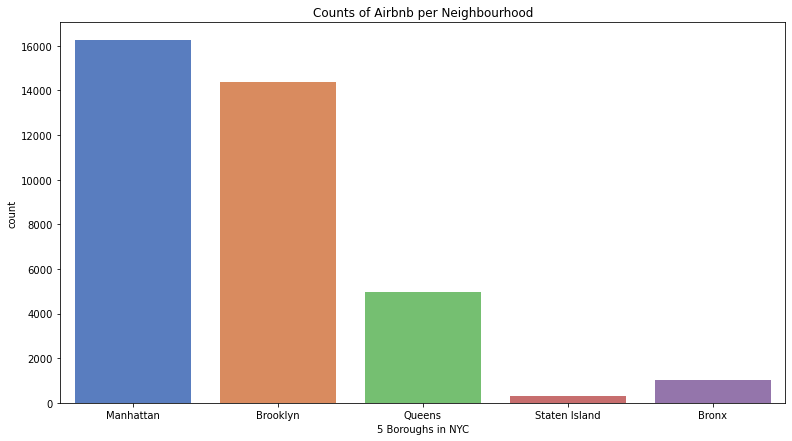

In [1021]:
plt.figure(figsize=(13,7))
plt.title("Counts of Airbnb per Neighbourhood")
neighbourhood_group_cleansed_graph = sns.countplot(df.neighbourhood_group_cleansed, palette="muted")
neighbourhood_group_cleansed_graph.set_xlabel("5 Boroughs in NYC")
fig = plt.gcf()
plt.show()

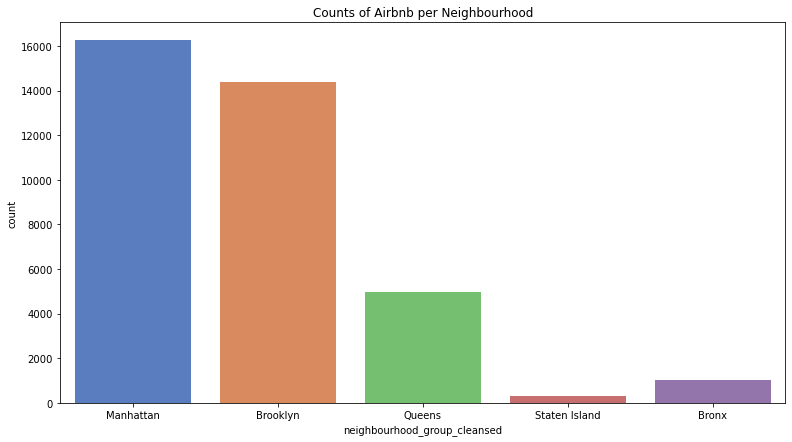

In [1022]:
plt.figure(figsize=(13,7))
plt.title("Counts of Airbnb per Neighbourhood")
neighbourhood_group_cleansed_graph_price = sns.countplot(df.neighbourhood_group_cleansed, palette="muted")
neighbourhood_group_cleansed_graph.set_xlabel("5 Boroughs in NYC")
fig = plt.gcf()
plt.show()

In [934]:
#pip install folium

In [935]:
#df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [936]:
#df['priceperperson'] = df.apply(lambda x: x['price']/x['accommodates'], axis=1)

In [937]:
# import nums_from_string
# numbers = []
# for word in df.bathrooms_text.str.split():
#     if word is isdigit():
#         numbers.append(int(word))

# print(numbers)
#numbers = [int(word) for word in a_string.split() if word.isdigit()]

#df['bt'] = df['bathrooms_text'].apply(nums_from_string.get_nums(df['bathrooms_text'].to_string()))
#df['bt'] = df['bathrooms_text'].apply([i for i in nums_from_string.get_nums(df['bathrooms_text'].to_string())])

# for a in nums_from_string.get_nums(df['bathrooms_text'].to_string()):
#                                    numbers.append(a)
#type(df.bathrooms_text.to_string)
#nums_from_string.get_nums(df['bathrooms_text'].to_string())

In [1030]:
df['has_availability']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
36918    NaN
36919    NaN
36920    NaN
36921    NaN
36922    NaN
Name: has_availability, Length: 36923, dtype: object

In [1029]:
df['has_availability'] = df['has_availability'].map({'t': 'Has Availability',
                                     'f': 'No Availability'})

#### Imbalanced Target

Text(0.5, 1.0, 'Target Class Frequency Count')

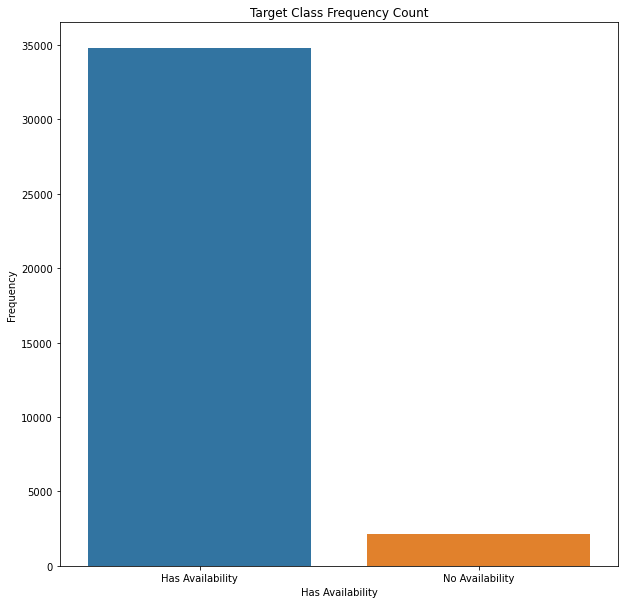

In [1025]:
plt.figure(figsize = (10,10))
target_graph = sns.countplot(x=df['has_availability'])
target_graph.set_xlabel("Has Availability")
target_graph.set_ylabel("Frequency")
target_graph.set_title("Target Class Frequency Count")

In [1028]:
df['has_availability']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
36918   NaN
36919   NaN
36920   NaN
36921   NaN
36922   NaN
Name: has_availability, Length: 36923, dtype: float64

In [1026]:
df['has_availability'] = df['has_availability'].map({'t': 0,
                                     'f': 1,})

In [1027]:
df['has_availability'].value_counts()

Series([], Name: has_availability, dtype: int64)

In [942]:
df.has_availability.value_counts(normalize=True)

Series([], Name: has_availability, dtype: float64)

## Modeling

### Train/Test Split

In [844]:
X= df.drop(["has_availability",'id', 'latitude','longitude'],axis=1)
y= df["has_availability"]

X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### One Hot Encoded

In [44]:
#Categorical variables to use
categorical_vars = ["host_response_time","host_has_profile_pic","host_identity_verified","host_is_superhost"
            ,"neighbourhood_group_cleansed","room_type","instant_bookable", "bathrooms_text"]

# Numerical Variables to use
# num_vars = ['price','minimum_nights','bedrooms', 'beds', "reviews_per_month","host_listings_count",
#            "calculated_host_listings_count_shared_rooms", "host_response_rate", "host_acceptance_rate",
#            "review_scores_cleanliness","review_scores_value","review_scores_rating", "number_of_reviews"]

In [45]:
train = X_train[categorical_vars]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')
enc = ohe.fit(train)
train_dummies_trans = enc.transform(train)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categorical_vars)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names,index = X_train.index)

In [46]:
# test_dummies = X_test[categorical_vars]
# Create OneHotEncoder object to create dummies
# ohe = OneHotEncoder(handle_unknown='ignore')

# # Transform the dataset into dummies matrix
# enc = ohe.fit(test_dummies)
# test_dummies_trans = enc.transform(test_dummies)

# # Dummies values in matrix form
# test_data = test_dummies_trans.todense()

# # New dummy column names
# names = ohe.get_feature_names(categorical_vars)

# # Make them into Dataframe
# test_dummies_trans_df = pd.DataFrame(test_data, columns=names,index = X_test.index)

In [47]:
numerical = (X_train.select_dtypes(exclude='object'))
numerical = pd.DataFrame(numerical, index = X_train.index)
df_train = train_dummies_trans_df.merge(numerical, left_index = True , right_index=True)

In [48]:
# numerical = (X_train.select_dtypes(exclude='object'))
# numerical = pd.DataFrame(numerical, index = X_train.index)
# text = X_train['description']
# text = pd.DataFrame(text, index = X_train.index)
# text_and_numerical = text.merge(numerical, left_index = True , right_index=True)
# df_train = train_dummies_trans_df.merge(text_and_numerical, left_index = True , right_index=True)

In [49]:
df_train

host_response_time_a few days or more  host_response_time_within a day  \
14645                                    0.0                              0.0   
9799                                     0.0                              0.0   
13289                                    0.0                              0.0   
7740                                     0.0                              0.0   
32159                                    0.0                              0.0   
...                                      ...                              ...   
12882                                    0.0                              0.0   
7246                                     0.0                              0.0   
25146                                    0.0                              0.0   
7142                                     0.0                              0.0   
19015                                    0.0                              0.0   

       host_response_time_within a few hours  \
14645                                    0.0   
9799                                     0.0   
13289                                    0.0   
7740                                     0.0   
32159                                    1.0   
...                                      ...   
12882                                    0.0   
7246                                     0.0   
25146                                    0.0   
7142                                     1.0   
19015                                    0.0   

       host_response_time_within an hour  host_has_profile_pic_f  \
14645                                1.0                     0.0   
9799                                 1.0                     0.0   
13289                                1.0                     0.0   
7740                                 1.0                     0.0   
32159                                0.0                     0.0   
...                                  ...                     ...   
12882                                1.0                     0.0   
7246                                 1.0                     0.0   
25146                                1.0                     0.0   
7142                                 0.0                     0.0   
19015                                1.0                     0.0   

       host_has_profile_pic_t  host_identity_verified_f  \
14645                     1.0                       0.0   
9799                      1.0                       0.0   
13289                     1.0                       1.0   
7740                      1.0                       0.0   
32159                     1.0                       0.0   
...                       ...                       ...   
12882                     1.0                       1.0   
7246                      1.0                       1.0   
25146                     1.0                       0.0   
7142                      1.0                       0.0   
19015                     1.0                       0.0   

       host_identity_verified_t  host_is_superhost_f  host_is_superhost_t  \
14645                       1.0                  1.0                  0.0   
9799                        1.0                  1.0                  0.0   
13289                       0.0                  1.0                  0.0   
7740                        1.0                  1.0                  0.0   
32159                       1.0                  1.0                  0.0   
...                         ...                  ...                  ...   
12882                       0.0                  1.0                  0.0   
7246                        0.0                  1.0                  0.0   
25146                       1.0                  1.0                  0.0   
7142                        1.0                  1.0                  0.0   
19015                       1.0                  1.0                  0.0   

      

In [50]:
df_train.shape

(27692, 75)

In [51]:
df_train.head()

host_response_time_a few days or more  host_response_time_within a day  \
14645                                    0.0                              0.0   
9799                                     0.0                              0.0   
13289                                    0.0                              0.0   
7740                                     0.0                              0.0   
32159                                    0.0                              0.0   

       host_response_time_within a few hours  \
14645                                    0.0   
9799                                     0.0   
13289                                    0.0   
7740                                     0.0   
32159                                    1.0   

       host_response_time_within an hour  host_has_profile_pic_f  \
14645                                1.0                     0.0   
9799                                 1.0                     0.0   
13289                                1.0                     0.0   
7740                                 1.0                     0.0   
32159                                0.0                     0.0   

       host_has_profile_pic_t  host_identity_verified_f  \
14645                     1.0                       0.0   
9799                      1.0                       0.0   
13289                     1.0                       1.0   
7740                      1.0                       0.0   
32159                     1.0                       0.0   

       host_identity_verified_t  host_is_superhost_f  host_is_superhost_t  \
14645                       1.0                  1.0                  0.0   
9799                        1.0                  1.0                  0.0   
13289                       0.0                  1.0                  0.0   
7740                        1.0                  1.0                  0.0   
32159                       1.0                  1.0                  0.0   

       ...  review_scores_checkin  review_scores_communication  \
14645  ...                   4.72                         4.74   
9799   ...                   5.00                         4.88   
13289  ...                   5.00                         5.00   
7740   ...                   5.00                         4.93   
32159  ...                   4.96                         4.98   

       review_scores_location  calculated_host_listings_count  \
14645                    4.74                               1   
9799                     4.94                               1   
13289                    5.00                               1   
7740                     4.96                               1   
32159                    4.88                              83   

       calculated_host_listings_count_entire_homes  \
14645                                            1   
9799                                             1   
13289                                            1   
7740                                             1   
32159                                           73   

       calculated_host_listings_count_private_rooms  \
14645                                             0   
9799                                              0   
13289                                             0   
7740                                              0   
32159                                             0   

       calculated_host_listings_count_shared_rooms  years_been_host  \
14645                                            0              8.0   
9799                                             0              9.0   
13289                                            0              7.0   
7740                                             0              7.0   
32159                                            0              4.0   

       number_of_verifications  number_of_amenities  
14645                        8                   22  
9799                     

#### Creating a function that prints out validation score

In [98]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and class target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision', 'recall', 'f1']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring, cv=5)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    #print('##############')
    #print(results['test_accuracy'])
    #print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Precision:', results['train_precision'].mean())
    #print('Cross_Val Precision:', results['test_precision_macro'].mean())
    print('##############')
    print('Training  Recall:', results['train_recall'].mean())
    #print('Cross_Val Recall:', results['test_recall_macro'].mean())
    print('##############')
    print('Training  F1:', results['train_f1'].mean())
    #print('Cross_Val  F1:', results['test_f1_macro'].mean())

### First Simple Model (baseline)

In [99]:
from nltk.corpus import stopwords
sw= stopwords.words('english')

In [100]:
fsm_pip = Pipeline([('nb', MultinomialNB())
                    ])

In [101]:
df_train.shape

(27692, 75)

In [102]:
y_train.shape

(27692,)

In [103]:
fsm_pip.fit(df_train, y_train)

Pipeline(steps=[('nb', MultinomialNB())])

In [104]:
print_cv_scores(fsm_pip, df_train, y_train)

[0.66690742 0.66952557 0.66976618 0.71467906 0.67193283]
Training Accuracy 0.6785622138935521
##############
Training Precision: 0.1501083835085008
##############
Training  Recall: 0.9771708854573886
##############
Training  F1: 0.26013102867563137


In [105]:
#clf.steps[0][1].get_feature_names()
#fsm_pip.get_predict_proba()

### Logistic Regression

In [106]:
log_pipe = Pipeline([('lg', LogisticRegression(solver='liblinear',max_iter=100000000))
                    ])



In [107]:
log_pipe.fit(df_train,  y_train)

Pipeline(steps=[('lg',
                 LogisticRegression(max_iter=100000000, solver='liblinear'))])

In [108]:
print_cv_scores(log_pipe, df_train, y_train)

[0.94321311 0.94294227 0.94375734 0.94407331 0.94362192]
Training Accuracy 0.9435215866694412
##############
Training Precision: 0.6187391697918014
##############
Training  Recall: 0.056597928068803746
##############
Training  F1: 0.10319725965975737


In [109]:
#prediction_of_probability = log_pipe.predict_proba(df_train)


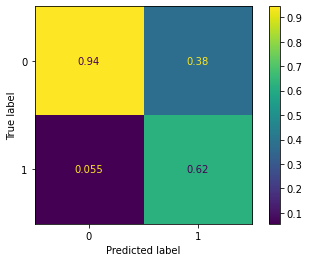

In [110]:
plot_confusion_matrix(log_pipe, df_train, y_train,normalize = 'pred');

In [148]:
pd.DataFrame(log_pipe.predict_proba(df_train)*100, columns=log_pipe.classes_)


0             1
0      100.000000  1.040066e-19
1       83.348760  1.665124e+01
2       84.496415  1.550358e+01
3       91.864880  8.135120e+00
4      100.000000  1.084452e-75
...           ...           ...
27687   84.335748  1.566425e+01
27688   69.114693  3.088531e+01
27689   61.241649  3.875835e+01
27690  100.000000  4.200031e-63
27691   98.101829  1.898171e+00

[27692 rows x 2 columns]

This is saying the probably of the listing whether it would have availability to book or not.

In [66]:
grid = {'lg__class_weight': [None, 'balanced'], 
         'lg__tol': [0.0001, 0.01, 0.1],
         'lg__C' : [0.0001,0.001,0.01],
         'lg__penalty': ['l1', 'l2']
        }

In [67]:
gridsearch = GridSearchCV(log_pipe, grid, return_train_score=True, scoring='precision',verbose=2)

gridsearch.fit(df_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.3s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   1.3s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   1.3s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.8s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   1.1s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.2s
[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.0001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.0001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] 

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.0001; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l1, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.7s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   1.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   1.3s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.0001; total time=   0.7s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.2s
[CV] END lg__C=0.001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.001, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.001

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.01, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.01, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.01, lg__class_weight=None, lg__penalty=l2, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.01, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.01, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.01, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/met

[CV] END lg__C=0.01, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.01, lg__class_weight=None, lg__penalty=l2, lg__tol=0.1; total time=   0.1s
[CV] END lg__C=0.01, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.4s
[CV] END lg__C=0.01, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.3s
[CV] END lg__C=0.01, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.5s
[CV] END lg__C=0.01, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.4s
[CV] END lg__C=0.01, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.0001; total time=   0.4s
[CV] END lg__C=0.01, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.1s
[CV] END lg__C=0.01, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.01, lg__class_weight=balanced, lg__penalty=l1, lg__tol=0.01; total time=   0.2s
[CV] END lg__C=0.01, lg__class

GridSearchCV(estimator=Pipeline(steps=[('lg',
                                        LogisticRegression(max_iter=100000000,
                                                           solver='liblinear'))]),
             param_grid={'lg__C': [0.0001, 0.001, 0.01],
                         'lg__class_weight': [None, 'balanced'],
                         'lg__penalty': ['l1', 'l2'],
                         'lg__tol': [0.0001, 0.01, 0.1]},
             return_train_score=True, scoring='precision', verbose=2)

In [68]:
print('gridsearch best parameters: {}'.format(gridsearch.best_params_))
print('gridsearch best score: {}'.format(gridsearch.best_score_))

gridsearch best parameters: {'lg__C': 0.01, 'lg__class_weight': None, 'lg__penalty': 'l1', 'lg__tol': 0.1}
gridsearch best score: 0.6799999999999999


In [112]:
log_pipe2 = Pipeline([('lg', LogisticRegression(C=0.01, solver='liblinear',max_iter=100000000))
                    ])



In [113]:
log_pipe2.fit(df_train,  y_train)

Pipeline(steps=[('lg',
                 LogisticRegression(C=0.01, max_iter=100000000,
                                    solver='liblinear'))])

In [114]:
print_cv_scores(log_pipe2, df_train, y_train)

[0.94271656 0.94289712 0.94294484 0.94285456 0.94262887]
Training Accuracy 0.9428083922875024
##############
Training Precision: 0.6203672316384181
##############
Training  Recall: 0.02470191555903049
##############
Training  F1: 0.04745310564279989


### Logistic witgh SMOTE

In [115]:
log_smote_pipe = imbpipe([('smote', SMOTE()),
                        ('lg', LogisticRegression(C=0.01,solver='liblinear',max_iter=100000000))
                    ])



In [116]:
log_smote_pipe.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('lg',
                 LogisticRegression(C=0.01, max_iter=100000000,
                                    solver='liblinear'))])

In [117]:
print_cv_scores(log_smote_pipe, df_train, y_train)

[0.8177222  0.8191667  0.82373386 0.82423039 0.82359845]
Training Accuracy 0.8216903212865301
##############
Training Precision: 0.23340905180810095
##############
Training  Recall: 0.9138531078967944
##############
Training  F1: 0.3718323016435816


In [118]:
y_train.value_counts()

0    26093
1     1599
Name: has_availability, dtype: int64

In [119]:
subset = {0:26093, 1:15990}

In [120]:
log_smote_pipe2 = imbpipe([('smote', SMOTE(sampling_strategy=subset)),
                        ('lg', LogisticRegression(C=0.01,solver='liblinear',max_iter=100000000))
                    ])



In [121]:
log_smote_pipe2.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy={0: 26093, 1: 15990})),
                ('lg',
                 LogisticRegression(C=0.01, max_iter=100000000,
                                    solver='liblinear'))])

In [122]:
print_cv_scores(log_smote_pipe2, df_train, y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than t

[0.84846296 0.84652192 0.85158436 0.85325449 0.85212603]
Training Accuracy 0.850389952016592
##############
Training Precision: 0.2587651721954999
##############
Training  Recall: 0.8530327648553557
##############
Training  F1: 0.3970597497970663


In [171]:
log_smote_pipe3 = Pipeline([('lg', LogisticRegression(C=0.01,class_weight='balanced',solver='liblinear',max_iter=100000000))
                    ])



In [172]:
log_smote_pipe3.fit(df_train,y_train)

Pipeline(steps=[('lg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=100000000, solver='liblinear'))])

In [173]:
print_cv_scores(log_smote_pipe3,df_train,y_train )

[0.79808604 0.79795062 0.80188679 0.79981042 0.80400831]
Training Accuracy 0.8003484340223361
##############
Training Precision: 0.2208674561991319
##############
Training  Recall: 0.9721701524628618
##############
Training  F1: 0.3599518445817765


#### Random Rainforest

In [123]:
rf_pipe = Pipeline([('rf', RandomForestClassifier())
                    ])


In [124]:
rf_pipe.fit(df_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier())])

In [125]:
print_cv_scores(rf_pipe, df_train, y_train)

[0.99891663 0.99914233 0.99936806 0.99909723 0.99923264]
Training Accuracy 0.9991513772587671
##############
Training Precision: 0.9945067046950744
##############
Training  Recall: 0.9907750195465207
##############
Training  F1: 0.992636535198589


In [83]:
#rf_pipe.predict_proba(df_train)

In [84]:
#pd.DataFrame(rf_pipe.predict_proba(df_train)*100, columns=rf_pipe.classes_)

In [175]:
grid2 = {"rf__class_weight": [None, 'balanced'],
        "rf__n_estimators": [10,25 , 50], 
        "rf__max_depth" : [10, 15, 20], 
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch2 = GridSearchCV(rf_pipe, grid2, return_train_score=True, scoring='precision',verbose=2) 



In [176]:
gridsearch2.fit(df_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.7s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.7s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.7s
[CV] END rf__class_weight=None, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimato

[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.4s
[CV] END rf__class_weight=None, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimato

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=10; total time=   0.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25; total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50; total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50; total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50; total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=10; total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf

GridSearchCV(estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__class_weight': [None, 'balanced'],
                         'rf__max_depth': [10, 15, 20],
                         'rf__min_samples_leaf': [1, 2, 3],
                         'rf__n_estimators': [10, 25, 50]},
             return_train_score=True, scoring='precision', verbose=2)

In [177]:
print('gridsearch best parameters: {}'.format(gridsearch2.best_params_))
print('gridsearch best score: {}'.format(gridsearch2.best_score_))

gridsearch best parameters: {'rf__class_weight': None, 'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__n_estimators': 25}
gridsearch best score: 0.8607142857142858


In [88]:
#rf_pipe.steps[1][1].get_feature_names()

In [126]:
rf_pipe2 = Pipeline([('rf', RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=2))
                    ])


In [127]:
rf_pipe2.fit(df_train,y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        n_estimators=10))])

In [128]:
print_cv_scores(rf_pipe2, df_train, y_train)

[0.94303255 0.94402564 0.94357678 0.94308026 0.94375734]
Training Accuracy 0.943494511674517
##############
Training Precision: 0.8024053605677889
##############
Training  Recall: 0.029080580531665363
##############
Training  F1: 0.05586629560020797


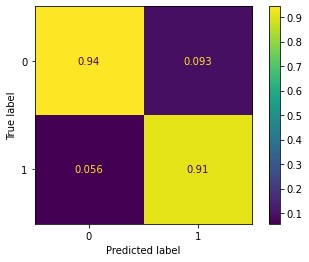

In [181]:
plot_confusion_matrix(rf_pipe2, df_train, y_train,normalize = 'pred');

In [178]:
rf_pipe3 = Pipeline([('rf', RandomForestClassifier(class_weight='balanced', n_estimators=10, max_depth=10, min_samples_leaf=2))
                    ])


In [179]:
rf_pipe3.fit(df_train,y_train)

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_leaf=2, n_estimators=10))])

In [180]:
print_cv_scores(rf_pipe3, df_train, y_train)

[0.83158037 0.81889586 0.8306852  0.828338   0.83073034]
Training Accuracy 0.8280459553690843
##############
Training Precision: 0.25013192114625227
##############
Training  Recall: 0.9892125195465207
##############
Training  F1: 0.39926999141428177


### Random Forest with smote

In [241]:
rf_pipe_sm = imbpipe([('smote', SMOTE()),
                    ('rf', RandomForestClassifier())
                    ])

rf_pipe_sm.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE()), ('rf', RandomForestClassifier())])

In [242]:
print_cv_scores(rf_pipe_sm, df_train, y_train)

[0.99846522 0.99860064 0.99909723 0.99869098 0.99891667]
Training Accuracy 0.9987541488296484
##############
Training Precision: 0.9824386601347029
##############
Training  Recall: 0.9962476788506646
##############
Training  F1: 0.9892906801062065


In [285]:
rf_pipe_sm3 = imbpipe([('smote', SMOTE()),
                    ('rf', RandomForestClassifier(class_weight='balanced', n_estimators=200, min_samples_leaf=2))
                    ])

rf_pipe_sm3.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2,
                                        n_estimators=200))])

In [286]:
print_cv_scores(rf_pipe_sm3, df_train, y_train)

[0.9762109  0.9778811  0.9770696  0.97715988 0.97652794]
Training Accuracy 0.9769698843729941
##############
Training Precision: 0.7696351650541965
##############
Training  Recall: 0.8580348416731821
##############
Training  F1: 0.8114174742442168


In [246]:
rf_pipe_sm_param = imbpipe([('smote', SMOTE()),
                    ('rf', RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=2))
                    ])

rf_pipe_sm_param.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('rf',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        n_estimators=10))])

In [247]:
print_cv_scores(rf_pipe_sm_param, df_train, y_train)

[0.87143953 0.86701575 0.87799043 0.86101833 0.86914327]
Training Accuracy 0.8693214629889703
##############
Training Precision: 0.2909518039111486
##############
Training  Recall: 0.876800601055512
##############
Training  F1: 0.43679717167919546


In [322]:
rf_pipe_sm_param2 = imbpipe([('smote', SMOTE()),
                    ('rf', RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_leaf=2))
                    ])

rf_pipe_sm_param2.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE()),
                ('rf',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=2))])

In [323]:
print_cv_scores(rf_pipe_sm_param2, df_train, y_train)

[0.97706857 0.97616576 0.97643766 0.97693419 0.97625711]
Training Accuracy 0.9765726571664253
##############
Training Precision: 0.7663067950964754
##############
Training  Recall: 0.8550653586786552
##############
Training  F1: 0.8082489047852903


In [243]:
rf_pipe_sm2 = imbpipe([('smote', SMOTE(sampling_strategy=subset)),
                    ('rf', RandomForestClassifier())
                    ])

rf_pipe_sm2.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy={0: 26093, 1: 15990})),
                ('rf', RandomForestClassifier())])

In [244]:
print_cv_scores(rf_pipe_sm2, df_train, y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than t

[0.99860064 0.99846522 0.99909723 0.99869098 0.99900695]
Training Accuracy 0.9987722042598189
##############
Training Precision: 0.9827422228219334
##############
Training  Recall: 0.99624755668491
##############
Training  F1: 0.9894443212263917


In [248]:
rf_pipe_sm2_param = imbpipe([('smote', SMOTE(sampling_strategy=subset)),
                    ('rf', RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=2))
                    ])

rf_pipe_sm2_param.fit(df_train, y_train)

Pipeline(steps=[('smote', SMOTE(sampling_strategy={0: 26093, 1: 15990})),
                ('rf',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        n_estimators=10))])

In [249]:
print_cv_scores(rf_pipe_sm2_param, df_train, y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than t

[0.89315217 0.89902045 0.90173332 0.89302158 0.89157714]
Training Accuracy 0.8957009314129971
##############
Training Precision: 0.3334320353288154
##############
Training  Recall: 0.8050334734167318
##############
Training  F1: 0.4714475794169181


### XGBoost

In [351]:
#evals_result={'binary':'logistic'},

In [352]:
xgb_pipe = Pipeline([('xgb', XGBClassifier(objective='binary:logistic',use_label_encoder=False))
                    ])


In [353]:
xgb_pipe.fit(df_train,y_train)

[10:26:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [354]:
print_cv_scores(xgb_pipe, df_train, y_train)

[10:26:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:26:24] WARNING: /Users/runner/miniforge3/cond

In [330]:
pd.DataFrame(xgb_pipe.predict_proba(df_train)*100, columns=xgb_pipe.classes_)

0          1
0      99.998116   0.001884
1      97.324951   2.675048
2      94.322380   5.677615
3      97.614647   2.385357
4      99.999817   0.000185
...          ...        ...
27687  96.477516   3.522484
27688  80.561562  19.438438
27689  73.496994  26.503008
27690  99.999557   0.000441
27691  99.951393   0.048608

[27692 rows x 2 columns]

In [230]:
grid3 = {"xgb__max_depth": [5, 6, 7],
        "xgb__min_child_weight": [1, 2 , 3], 
        "xgb__scale_pos_weight" : [1, 2, 3, 4], 
        "xgb__colsample_bytree" : [1, 2, 3, 4]
       
       
       }

gridsearch3 = GridSearchCV(xgb_pipe, grid3, return_train_score=True, scoring='precision',verbose=2) 



In [231]:
gridsearch3.fit(df_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[08:39:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   4.8s
[08:39:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   4.9s
[08:39:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   4.9s
[08:39:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:39:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   4.4s
[08:39:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defaul

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   4.1s
[08:39:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   4.0s
[08:39:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   4.0s
[08:39:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   3.9s
[08:39:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   4.1s
[08:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   3.9s
[08:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   4.0s
[08:39:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:55] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   4.0s
[08:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:39:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   4.0s
[08:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   4.5s
[08:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   4.0s
[08:40:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   5.5s
[08:40:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   4.0s
[08:40:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   4.0s
[08:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   4.4s
[08:40:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   4.6s
[08:40:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   4.1s
[08:40:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   4.5s
[08:40:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   4.1s
[08:40:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   4.3s
[08:40:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   4.3s
[08:40:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:40:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   4.3s
[08:41:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   4.6s
[08:41:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   4.3s
[08:41:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   4.5s
[08:41:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   4.1s
[08:41:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   4.4s
[08:41:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   5.1s
[08:41:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   4.7s
[08:41:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   4.7s
[08:41:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   5.2s
[08:41:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   5.7s
[08:41:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   5.0s
[08:41:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.3s
[08:41:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:41:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.1s
[08:42:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.4s
[08:42:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.0s
[08:42:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.5s
[08:42:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   5.1s
[08:42:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.8s
[08:42:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.2s
[08:42:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.2s
[08:42:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.7s
[08:42:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.8s
[08:42:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:43] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   3.9s
[08:42:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.6s
[08:42:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   5.8s
[08:42:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:42:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   6.0s
[08:43:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:43:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   4.6s
[08:43:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defaul

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   4.1s
[08:43:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   4.0s
[08:43:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.9s
[08:43:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:43:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.5s
[08:43:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defaul

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.1s
[08:43:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.2s
[08:43:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.8s
[08:43:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   5.4s
[08:43:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   6.4s
[08:43:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   6.3s
[08:43:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:43:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   6.0s
[08:44:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   4.9s
[08:44:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.8s
[08:44:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   6.4s
[08:44:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.0s
[08:44:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.0s
[08:44:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.4s
[08:44:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   4.9s
[08:44:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   4.9s
[08:44:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   5.2s
[08:44:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:44:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=  10.4s
[08:45:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   5.8s
[08:45:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   8.2s
[08:45:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   6.1s
[08:45:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   6.6s
[08:45:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   6.5s
[08:45:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   6.1s
[08:45:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   5.2s
[08:45:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   5.3s
[08:45:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   5.0s
[08:45:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:45:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   4.8s
[08:46:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   4.9s
[08:46:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   6.0s
[08:46:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   6.8s
[08:46:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   5.4s
[08:46:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   6.2s
[08:46:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   6.9s
[08:46:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   6.2s
[08:46:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   6.1s
[08:46:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   5.7s
[08:46:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:46:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   4.7s
[08:47:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   4.9s
[08:47:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.7s
[08:47:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.7s
[08:47:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.6s
[08:47:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.7s
[08:47:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   4.7s
[08:47:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.8s
[08:47:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.8s
[08:47:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.6s
[08:47:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.6s
[08:47:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   4.8s
[08:47:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.7s
[08:47:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:47:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.7s
[08:48:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.7s
[08:48:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.8s
[08:48:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   4.6s
[08:48:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   4.6s
[08:48:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   4.7s
[08:48:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   4.8s
[08:48:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:48:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   4.9s
[08:48:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the defaul

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   4.6s
[08:48:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.7s
[08:48:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.9s
[08:48:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.7s
[08:48:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:48:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.9s
[08:49:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   4.7s
[08:49:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   5.3s
[08:49:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   5.7s
[08:49:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   5.5s
[08:49:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   5.4s
[08:49:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   5.4s
[08:49:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.4s
[08:49:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.4s
[08:49:44] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.6s
[08:49:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.5s
[08:49:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:49:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   5.4s
[08:50:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   5.4s
[08:50:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   5.4s
[08:50:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   5.6s
[08:50:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   5.4s
[08:50:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   5.4s
[08:50:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   5.5s
[08:50:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   5.6s
[08:50:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   5.6s
[08:50:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   6.1s
[08:50:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   5.7s
[08:50:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   5.4s
[08:51:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   5.4s
[08:51:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   5.3s
[08:51:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   5.9s
[08:51:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   5.3s
[08:51:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   5.4s
[08:51:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   5.3s
[08:51:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   5.4s
[08:51:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:41] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   5.4s
[08:51:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   5.4s
[08:51:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:51:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   7.5s
[08:52:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   8.1s
[08:52:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   6.0s
[08:52:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   6.1s
[08:52:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   7.0s
[08:52:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   6.5s
[08:52:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   5.9s
[08:52:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   5.4s
[08:52:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   6.2s
[08:52:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   7.2s
[08:52:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:52:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   6.6s
[08:53:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   6.7s
[08:53:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   5.7s
[08:53:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   5.5s
[08:53:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   5.4s
[08:53:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   5.3s
[08:53:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   5.4s
[08:53:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   5.3s
[08:53:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   5.4s
[08:53:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   5.5s
[08:53:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   5.6s
[08:54:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   5.5s
[08:54:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:07] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   5.5s
[08:54:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   5.4s
[08:54:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   5.4s
[08:54:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   5.6s
[08:54:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   5.4s
[08:54:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   5.4s
[08:54:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   5.4s
[08:54:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:54:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END xgb__colsample_bytree=1, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   5.6s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.1s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=2, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=3, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=5, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/p

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.1s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=6, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=1, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=2, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=1; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=2; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=3; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/core.py", line 436, in inner_f
    return f(**kwargs)
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py", line 1176, in fit
    self._Booster = train(
  File "/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/training.py", line 189, in train
    bst =

[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[CV] END xgb__colsample_bytree=4, xgb__max_depth=7, xgb__min_child_weight=3, xgb__scale_pos_weight=4; total time=   0.0s
[08:55:11] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:55:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.

GridSearchCV(estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      evals_result={'binary': 'logistic'},
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      label_encoder=False,
                                                      learning_rate=0.300000012,
                                                      max_delta_step=0,
                                   

In [232]:
print('gridsearch best parameters: {}'.format(gridsearch3.best_params_))
print('gridsearch best score: {}'.format(gridsearch3.best_score_))

gridsearch best parameters: {'xgb__colsample_bytree': 1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 1, 'xgb__scale_pos_weight': 1}
gridsearch best score: 0.4941296487621951


In [328]:
xgb_pipe2 = Pipeline([('xgb', XGBClassifier(max_depth= 5, min_child_weight= 1 
                                            ,evals_result={'binary':'logistic'}, use_label_encoder=False))
                    ])


xgb_pipe2.fit(df_train, y_train)

[10:11:57] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:11:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,
                               evals_result={'binary': 'logistic'}, gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [329]:
print_cv_scores(xgb_pipe2, df_train, y_train)

[10:12:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:12:04] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:12:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or 

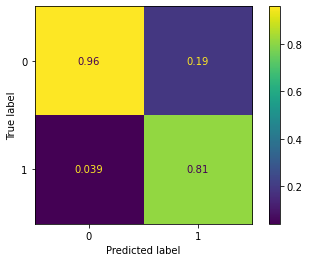

In [357]:
plot_confusion_matrix(xgb_pipe2, df_train, y_train, normalize = 'pred');

In [238]:
xgb_pipe3 = Pipeline([('xgb', XGBClassifier(max_depth= 5, min_child_weight= 1, scale_pos_weight= 2
                        ,evals_result={'binary':'logistic'}, use_label_encoder=False))
                    ])


xgb_pipe3.fit(df_train, y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:10:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:10:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,
                               evals_result={'binary': 'logistic'}, gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='', label_encoder=False,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=5, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=2,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [239]:
print_cv_scores(xgb_pipe3, df_train, y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:11:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:11:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:11:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:11:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:11:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:11:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:11:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:11:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:11:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[09:11:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.95734212 0.95977971 0.95964611 0.96081972 0.96086486]
Training Accuracy 0.9596905039436177
##############
Training Precision: 0.6382303488964196
##############
Training  Recall: 0.696841526583268
##############
Training  F1: 0.6662420754033789


### XGBoost with SMOTE

In [132]:
xgb_sm_pipe = imbpipe([('smote', SMOTE()),
                        ('xgb', XGBClassifier(evals_result={'binary':'logistic'}, label_encoder=False))
                    ])

xgb_pipe.fit(df_train,y_train)


In [133]:
xgb_sm_pipe.fit(df_train, y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:15] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('smote', SMOTE()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,
                               evals_result={'binary': 'logistic'}, gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='', label_encoder=False,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [134]:
print_cv_scores(xgb_sm_pipe,df_train,y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:11:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:11:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.96411321 0.96393265 0.96339262 0.96348289 0.96375372]
Training Accuracy 0.9637350189208529
##############
Training Precision: 0.6895627170150518
##############
Training  Recall: 0.6766725713448006
##############
Training  F1: 0.682995733650729


In [135]:
xgb_sms_pipe = imbpipe([('smote', SMOTE(sampling_strategy=subset)),
                        ('xgb', XGBClassifier(evals_result={'binary':'logistic'}, label_encoder=False))
                    ])


In [136]:
xgb_sms_pipe.fit(df_train, y_train)

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:21:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:21:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('smote', SMOTE(sampling_strategy={0: 26093, 1: 15990})),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1,
                               evals_result={'binary': 'logistic'}, gamma=0,
                               gpu_id=-1, importance_type='gain',
                               interaction_constraints='', label_encoder=False,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_p

In [137]:
print_cv_scores(xgb_sms_pipe,df_train, y_train )

/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:21:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:21:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:22:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20874)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:22:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20875)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:22:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:22:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (26093) in class 0 will be larger than the number of samples in the majority class (class #0 -> 20875)
  warnings.warn(
/Users/raylinsoriano/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:23:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:573: 
Parameters: { "evals_result", "label_encoder" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:23:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1631904775127/work/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.96113393 0.96135964 0.95910445 0.96113569 0.96248984]
Training Accuracy 0.9610447097008888
##############
Training Precision: 0.6511062855012448
##############
Training  Recall: 0.7015334245504301
##############
Training  F1: 0.6753320159072584


In [ ]:
# numeric_features = X_train.select_dtypes(exclude='object')
# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())])

# categorical_features = ["host_response_time","host_has_profile_pic","host_identity_verified","host_is_superhost"
#             ,"neighbourhood_group_cleansed","room_type","instant_bookable", "bathrooms_text", "has_availability"]
# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])

# clf = Pipeline(steps=[('preprocessor', preprocessor),
#                        ('regressor',  LinearRegression())])

# clf['preprocessor'][1][1]['onehot'].get_feature_names(categorical_features)

In [ ]:
# # Continuous features
# continuous = df_train.select_dtypes(exclude='object') 

# #train_continuous = df_train[continuous]
# #test_continuous = X_test[continuous]

# # Make StandardScaler object
# scaler = StandardScaler()

# # Fit the train data into the scaler
# df_fit = scaler.fit_transform(df_train)

# # Transform data
# #train_data_scaled = df_fit.transform(train_continuous)
# #test_data_scaled = df_fit.transform(test_continuous)
# #names = scaler.get_feature_names(df_fit)
# # Make them into Dataframe
# train_scaled_df = pd.DataFrame(df_fit)
# #test_scaled_df = pd.DataFrame(test_data_scaled, columns = continuous)
